## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3         X4         Y
0  11.291315   943.392921  0.498663   5.269036  1.509682
1  68.318613  1724.372633  0.023936   8.809838  0.517136
2  86.082937   924.460393  0.124911   8.873594  0.842840
3  87.718848   495.926312  0.195302  10.382972  0.982073
4  24.165227   955.016518  0.332475  10.198281  1.566336


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-0.4969],
        [-1.2856],
        [-1.7864],
        [ 0.1369],
        [-0.0379],
        [ 0.8088],
        [-0.1647],
        [-0.0166],
        [-0.1636],
        [-0.3102],
        [-0.2920],
        [-0.3105],
        [-0.4443],
        [-0.1682],
        [-0.1714],
        [-0.2600],
        [-0.3903],
        [-0.2020],
        [-0.2185],
        [-0.6603],
        [-0.5584],
        [-0.6311],
        [-0.3103],
        [ 0.4633],
        [-0.7668],
        [ 0.2779],
        [ 0.8840],
        [-0.2038],
        [-0.8681],
        [-0.6716],
        [-0.5842],
        [-0.3208]], grad_fn=<MmBackward>)
tensor([[ 0.0920],
        [-2.6283],
        [-0.0885],
        [-0.0458],
        [ 0.1138],
        [ 0.0523],
        [-0.3476],
        [ 0.0639],
        [-0.5891],
        [-0.8726],
        [-0.3171],
        [ 0.4196],
        [ 0.7122],
        [-0.1550],
        [-0.2407],
        [ 0.6390],
        [-0.4136],
        [ 0.0957],
        [-0.3180],
        

tensor([[-0.3584],
        [-1.1380],
        [ 0.1178],
        [-0.2793],
        [-0.6168],
        [ 0.3300],
        [-0.2828],
        [-0.0795],
        [ 0.0354],
        [-0.0703],
        [-1.1715],
        [-0.8794],
        [ 0.1435],
        [ 0.6022],
        [-0.7935],
        [-0.1355]], grad_fn=<MmBackward>)
tensor([[-1.0825],
        [ 1.0572],
        [-1.1533],
        [-0.4671],
        [ 0.2115],
        [ 0.0861],
        [-0.9181],
        [-0.1054],
        [-0.2436],
        [-0.8149],
        [-0.3029],
        [-0.0565],
        [-0.3172],
        [-0.4376],
        [-0.2551],
        [-0.4011],
        [-0.1190],
        [-0.7149],
        [-1.1831],
        [ 0.2765],
        [ 0.4518],
        [-0.3036],
        [-0.7993],
        [-0.0087],
        [ 0.0893],
        [ 0.8251],
        [-0.4006],
        [-0.0086],
        [-0.6518],
        [ 0.1490],
        [ 0.8714],
        [-0.1550]], grad_fn=<MmBackward>)
tensor([[ 0.2058],
        [ 1.0211],
    

tensor([[ 0.5744],
        [-0.0391],
        [-0.7137],
        [ 0.5445],
        [-0.1761],
        [-0.0142],
        [-0.2763],
        [-0.8552],
        [-0.5055],
        [-0.5027],
        [ 0.2062],
        [-0.5765],
        [ 0.0921],
        [ 0.9292],
        [ 0.2332],
        [-0.6175],
        [-0.0277],
        [ 0.1919],
        [-0.0526],
        [-0.4458],
        [-1.0306],
        [-0.8558],
        [-1.4875],
        [-0.3077],
        [ 0.1267],
        [-0.1094],
        [-0.5861],
        [ 0.6539],
        [ 0.3549],
        [-0.6988],
        [-1.1235],
        [-1.2526]], grad_fn=<MmBackward>)
tensor([[-0.7912],
        [-1.2960],
        [-0.5211],
        [ 0.1154],
        [-0.0558],
        [-0.3826],
        [-1.2744],
        [-1.1313],
        [ 0.6905],
        [-0.1716],
        [ 1.0771],
        [-0.3210],
        [-0.0705],
        [-0.1252],
        [ 1.2781],
        [-0.4924],
        [ 0.0122],
        [ 0.0781],
        [ 0.0591],
        

tensor([[ 0.3384],
        [-0.2032],
        [-0.1489],
        [ 0.1845],
        [-0.1954],
        [-0.3472],
        [-0.9734],
        [-0.5881],
        [-0.0572],
        [ 0.3544],
        [ 0.1632],
        [ 0.1820],
        [-0.2195],
        [-0.7803],
        [-0.2067],
        [ 0.1903]], grad_fn=<MmBackward>)
tensor([[ 0.2336],
        [ 0.5409],
        [-0.5963],
        [ 0.1302],
        [-0.1417],
        [-0.5259],
        [-0.5724],
        [-1.2060],
        [-0.2362],
        [ 0.8427],
        [ 0.3020],
        [-0.2205],
        [-1.1499],
        [-0.8785],
        [-0.2504],
        [-0.0736]], grad_fn=<MmBackward>)
tensor([[-0.9993],
        [-0.5071],
        [-0.1766],
        [-0.2028],
        [-0.3122],
        [-0.0673],
        [ 0.4084],
        [-0.1652],
        [-1.1296],
        [ 0.1441],
        [-0.1760],
        [ 0.3339],
        [-0.7353],
        [ 0.3984],
        [ 0.6902],
        [-0.2562],
        [-0.3641],
        [-0.1300],
    

tensor([[-0.8628],
        [-1.3284],
        [ 0.4314],
        [-0.2560],
        [-0.3278],
        [ 0.2529],
        [-0.1853],
        [-0.1555],
        [-0.2576],
        [ 1.0284],
        [ 0.2197],
        [ 0.2407],
        [-0.7644],
        [ 0.3948],
        [-0.2452],
        [-0.1773],
        [-0.3174],
        [-0.3762],
        [ 0.6956],
        [-0.0440],
        [-0.5473],
        [-0.1129],
        [-0.0241],
        [-0.2001],
        [ 0.9961],
        [-0.1518],
        [-0.9434],
        [-0.4202],
        [ 0.8179],
        [-0.1089],
        [-0.0101],
        [-0.5863]], grad_fn=<MmBackward>)
tensor([[ 1.8221],
        [-0.2571],
        [-0.7322],
        [ 0.0486],
        [-0.2498],
        [-0.0606],
        [ 0.3676],
        [-0.6580],
        [-0.2604],
        [ 0.5858],
        [-0.3743],
        [-0.2408],
        [-0.4571],
        [-0.4399],
        [-0.3006],
        [ 0.0904],
        [ 0.1930],
        [-0.3268],
        [-0.5969],
        

tensor([[ 0.6523],
        [-0.5690],
        [ 0.8940],
        [-0.9574],
        [ 0.2309],
        [-0.3477],
        [ 0.8889],
        [ 0.5632],
        [-0.4753],
        [-0.7404],
        [-0.3840],
        [ 0.0918],
        [-0.4311],
        [-0.1179],
        [-1.0343],
        [-0.8435]], grad_fn=<MmBackward>)
tensor([[-0.5469],
        [-0.6229],
        [-0.4986],
        [-0.5804],
        [-0.0414],
        [-0.5714],
        [-0.3895],
        [ 0.0093],
        [ 0.3387],
        [-0.6452],
        [-0.1219],
        [-0.6854],
        [ 0.7343],
        [ 0.1932],
        [-0.9867],
        [ 0.2269],
        [-0.2210],
        [-0.5212],
        [-0.6695],
        [ 0.5897],
        [ 0.7750],
        [ 0.5635],
        [ 0.6278],
        [-0.2314],
        [-1.0676],
        [-0.4073],
        [-0.4159],
        [ 0.1228],
        [ 0.0280],
        [-0.0204],
        [-0.0080],
        [-0.6415]], grad_fn=<MmBackward>)
tensor([[-1.5763],
        [ 0.1850],
    

tensor([[-0.1691],
        [ 0.1031],
        [ 2.0110],
        [-0.0493],
        [ 0.4682],
        [-0.0753],
        [ 0.2906],
        [-1.6256],
        [ 0.0290],
        [ 0.0178],
        [ 0.4995],
        [-0.3491],
        [-0.8349],
        [-0.0379],
        [-1.2747],
        [-0.9790],
        [-0.3905],
        [-0.3493],
        [ 0.0738],
        [-0.2428],
        [ 0.7613],
        [-0.4494],
        [ 0.2801],
        [-0.3542],
        [ 0.5724],
        [ 0.2342],
        [-0.0177],
        [ 0.2460],
        [ 0.0546],
        [-0.7661],
        [ 0.0111],
        [ 0.3528]], grad_fn=<MmBackward>)
tensor([[-0.0759],
        [ 0.1600],
        [ 1.9650],
        [-0.1690],
        [ 0.4099],
        [-0.1202],
        [ 0.1886],
        [ 0.1204],
        [-0.0637],
        [ 0.2514],
        [ 0.5943],
        [-0.2299],
        [-1.1083],
        [ 0.0822],
        [-0.4786],
        [-0.0487],
        [-0.8172],
        [-0.9966],
        [-0.1608],
        

tensor([[-0.9689],
        [ 0.1179],
        [-0.1817],
        [-0.4289],
        [-0.6396],
        [-0.0058],
        [ 1.5877],
        [-0.0125],
        [-0.3006],
        [ 0.2765],
        [ 0.0949],
        [ 0.3046],
        [ 0.4721],
        [-1.0893],
        [-0.1649],
        [ 0.1591]], grad_fn=<MmBackward>)
tensor([[ 0.8911],
        [ 0.8392],
        [-0.3197],
        [ 1.1618],
        [ 0.0341],
        [ 0.9482],
        [-0.1943],
        [-0.9756],
        [-0.4812],
        [-0.5561],
        [-0.1850],
        [-0.0161],
        [ 0.1315],
        [ 0.0257],
        [-0.1493],
        [ 0.5891],
        [-0.1580],
        [ 0.8886],
        [-2.5478],
        [-0.8490],
        [ 0.1107],
        [-0.2945],
        [-0.0485],
        [-0.1940],
        [ 0.2628],
        [ 0.2253],
        [-0.0927],
        [ 0.2482],
        [-0.3622],
        [-0.9442],
        [ 0.6640],
        [-0.1830]], grad_fn=<MmBackward>)
tensor([[ 0.3243],
        [ 0.2339],
    

tensor([[ 1.0600],
        [-0.4214],
        [ 0.2970],
        [ 0.9683],
        [-0.1002],
        [-0.3500],
        [ 0.0665],
        [ 0.4306],
        [ 0.2951],
        [-0.0215],
        [ 0.3379],
        [-0.0682],
        [-0.3100],
        [-0.4581],
        [-0.3259],
        [-0.2195],
        [ 0.0469],
        [ 1.3241],
        [ 0.2632],
        [ 0.0938],
        [-1.4822],
        [-1.3669],
        [-0.8698],
        [ 0.3665],
        [-0.4235],
        [ 0.4160],
        [ 0.3353],
        [ 0.0052],
        [-0.0322],
        [ 0.0697],
        [ 0.0984],
        [ 0.5970]], grad_fn=<MmBackward>)
tensor([[ 1.3026],
        [ 0.1066],
        [ 0.2382],
        [ 0.6331],
        [ 0.4499],
        [-0.6696],
        [ 1.1652],
        [ 0.3721],
        [ 0.3028],
        [-0.4484],
        [-0.0259],
        [-0.1085],
        [-0.8048],
        [ 0.3434],
        [-0.0364],
        [ 0.4090],
        [-0.5188],
        [ 0.9259],
        [-0.0981],
        

tensor([[ 7.3044e-01],
        [ 6.9240e-01],
        [ 1.0690e+00],
        [ 5.7756e-01],
        [-2.6461e+00],
        [ 4.2808e-01],
        [-3.1072e-01],
        [ 9.9163e-01],
        [ 2.2760e-01],
        [-3.5061e-01],
        [ 1.0114e-01],
        [ 1.3934e+00],
        [ 2.9390e-01],
        [-3.1957e-01],
        [ 1.0107e+00],
        [-1.2135e-02],
        [-2.5028e-01],
        [-6.6287e-01],
        [-5.1703e-01],
        [ 1.1681e-01],
        [ 8.4754e-01],
        [-3.3912e-01],
        [-2.0562e-01],
        [ 2.3599e-02],
        [ 2.6918e-02],
        [-1.6957e+00],
        [ 8.2689e-02],
        [-4.7292e-01],
        [ 2.0368e-01],
        [-1.6321e-03],
        [ 4.5358e-01],
        [ 1.7074e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3040],
        [ 0.2030],
        [-0.0548],
        [ 0.2942],
        [-1.3777],
        [ 0.8045],
        [-0.6069],
        [ 0.3969],
        [ 0.2442],
        [-0.3272],
        [ 0.0792],
        [ 1.0616],
        [ 0.2

tensor([[-0.3948],
        [ 1.2262],
        [ 0.1833],
        [ 0.1877],
        [ 0.0123],
        [ 0.1124],
        [-4.3278],
        [ 0.1531],
        [ 0.2102],
        [ 1.1492],
        [ 0.1487],
        [ 0.2891],
        [ 0.0163],
        [-0.0177],
        [-0.2689],
        [ 0.0242],
        [ 0.0640],
        [ 0.0212],
        [ 1.0466],
        [ 0.5019],
        [ 0.2818],
        [-0.1296],
        [-0.3793],
        [ 1.3718],
        [-0.6827],
        [-0.3286],
        [-0.3644],
        [ 0.0895],
        [-0.0307],
        [-1.3379],
        [ 1.1302],
        [ 0.3249]], grad_fn=<MmBackward>)
tensor([[-0.4107],
        [-0.2475],
        [ 0.2419],
        [-0.4862],
        [-0.5222],
        [-0.5702],
        [ 1.1392],
        [-0.0939],
        [-0.2583],
        [ 0.2813],
        [-0.3125],
        [ 0.4134],
        [ 1.1386],
        [-0.0403],
        [ 0.8426],
        [-0.7621]], grad_fn=<MmBackward>)
tensor([[ 0.2151],
        [-0.0792],
    

tensor([[-0.0546],
        [-0.3693],
        [-1.5304],
        [ 0.0678],
        [ 1.1873],
        [ 1.7833],
        [-0.1276],
        [ 1.2940],
        [ 1.7507],
        [-0.7349],
        [-0.2824],
        [-0.0795],
        [-0.7151],
        [ 0.1835],
        [ 0.1147],
        [ 0.7001],
        [ 0.6465],
        [ 0.0407],
        [ 0.2921],
        [ 0.6286],
        [ 0.3932],
        [ 0.4808],
        [-0.1206],
        [-0.4118],
        [ 0.3269],
        [ 2.0652],
        [ 0.6431],
        [ 0.2843],
        [ 1.1423],
        [ 0.0537],
        [-3.4280],
        [-0.2038]], grad_fn=<MmBackward>)
tensor([[-0.0216],
        [ 2.1061],
        [ 0.9379],
        [ 0.4771],
        [-0.1292],
        [-0.0115],
        [-0.0592],
        [ 1.1119],
        [-1.9379],
        [ 0.4712],
        [ 0.6680],
        [ 0.4370],
        [-0.1688],
        [-0.0435],
        [ 0.3390],
        [ 0.3161],
        [ 0.3612],
        [-0.3325],
        [ 0.0328],
        

tensor([[ 0.7900],
        [ 0.1632],
        [ 0.4358],
        [ 0.7388],
        [ 0.7391],
        [-2.1776],
        [ 0.2829],
        [ 0.2502],
        [ 0.0615],
        [-1.4092],
        [ 1.0243],
        [ 0.3426],
        [ 0.4618],
        [ 0.4300],
        [ 0.1258],
        [ 1.0161]], grad_fn=<MmBackward>)
tensor([[ 0.0062],
        [ 0.4975],
        [-1.4504],
        [ 0.3808],
        [ 0.5872],
        [-0.2198],
        [ 0.1072],
        [ 0.2796],
        [ 0.0653],
        [ 0.7892],
        [ 0.2858],
        [ 0.1379],
        [ 0.1589],
        [ 0.5492],
        [ 1.1873],
        [ 0.3937],
        [ 0.4038],
        [ 2.6636],
        [-0.3215],
        [ 0.2037],
        [-0.8113],
        [ 0.4753],
        [ 0.2883],
        [-0.6245],
        [ 0.2015],
        [ 0.5841],
        [ 0.1630],
        [ 0.0318],
        [ 1.8963],
        [ 0.0138],
        [ 0.1232],
        [ 0.4935]], grad_fn=<MmBackward>)
tensor([[ 0.6601],
        [-0.7219],
    

tensor([[ 0.3560],
        [ 0.0808],
        [ 0.7237],
        [ 0.4429],
        [ 1.8101],
        [ 0.3237],
        [ 0.3502],
        [ 0.3464],
        [-0.2037],
        [ 0.2768],
        [ 1.5323],
        [-1.7903],
        [ 0.4942],
        [ 0.4200],
        [ 1.1513],
        [ 0.8902]], grad_fn=<MmBackward>)
tensor([[-0.1779],
        [ 0.6959],
        [-0.0422],
        [ 0.2592],
        [ 0.6279],
        [ 0.0827],
        [ 0.2027],
        [ 0.3074],
        [ 0.8997],
        [ 0.3429],
        [ 1.2694],
        [-1.0826],
        [ 1.3549],
        [-0.0703],
        [ 1.4857],
        [ 0.5085]], grad_fn=<MmBackward>)
tensor([[ 0.6794],
        [-0.2101],
        [ 0.1016],
        [ 0.5606],
        [ 0.2222],
        [ 0.4448],
        [ 0.0141],
        [ 0.5335],
        [ 0.3006],
        [-0.0763],
        [ 0.2597],
        [ 0.2190],
        [ 0.4334],
        [ 0.6259],
        [ 0.7723],
        [-0.0566],
        [ 1.1075],
        [ 1.4310],
    

tensor([[ 0.3679],
        [ 0.4448],
        [-3.4402],
        [ 0.1432],
        [ 0.3108],
        [-0.1417],
        [-0.1390],
        [ 0.5551],
        [ 0.0684],
        [ 0.0158],
        [ 1.0419],
        [ 0.1419],
        [ 0.6086],
        [ 0.2944],
        [ 0.2054],
        [ 0.6828],
        [ 0.6645],
        [-0.4583],
        [ 0.2074],
        [ 2.1980],
        [ 0.2451],
        [ 0.2867],
        [ 0.3503],
        [ 1.0450],
        [ 0.1524],
        [ 0.1047],
        [ 1.3535],
        [ 1.8340],
        [ 1.2656],
        [ 0.5948],
        [ 0.0995],
        [ 0.4376]], grad_fn=<MmBackward>)
tensor([[ 0.7321],
        [ 0.3519],
        [-0.4979],
        [ 0.5296],
        [ 0.2785],
        [ 0.4874],
        [ 1.2685],
        [ 0.7152],
        [ 0.6801],
        [ 1.1088],
        [ 1.7429],
        [ 1.0757],
        [ 0.5942],
        [ 0.1564],
        [ 0.5253],
        [ 0.3977],
        [ 1.0906],
        [ 0.6290],
        [ 0.3285],
        

tensor([[ 0.8854],
        [ 0.7291],
        [-0.4419],
        [ 0.1610],
        [-0.4590],
        [ 1.3510],
        [ 0.2025],
        [ 2.2512],
        [ 0.6979],
        [ 0.0488],
        [ 0.5884],
        [-1.6839],
        [ 0.5813],
        [ 0.4348],
        [ 0.1560],
        [ 0.4971]], grad_fn=<MmBackward>)
tensor([[ 3.5309],
        [ 0.1528],
        [-0.1610],
        [ 0.2422],
        [-0.0801],
        [ 0.4525],
        [ 0.1737],
        [ 0.5364],
        [-0.5768],
        [ 1.0118],
        [ 0.5860],
        [ 0.3012],
        [ 0.3422],
        [ 0.1742],
        [ 1.1988],
        [-1.5578],
        [ 0.1845],
        [ 0.4347],
        [ 0.1058],
        [ 0.3361],
        [ 0.2484],
        [ 1.0488],
        [ 0.9763],
        [ 2.3591],
        [ 1.2764],
        [ 1.2504],
        [ 2.1842],
        [ 0.6128],
        [ 0.5942],
        [ 0.2556],
        [-1.3502],
        [ 0.3272]], grad_fn=<MmBackward>)
tensor([[ 1.3373],
        [-1.8832],
    

tensor([[ 0.7443],
        [ 1.0441],
        [ 0.5112],
        [ 0.1429],
        [ 0.7947],
        [ 1.0405],
        [-4.7570],
        [ 2.4757],
        [ 0.8420],
        [-0.3069],
        [ 0.3364],
        [ 1.0231],
        [ 1.4411],
        [ 0.3442],
        [ 0.3675],
        [ 0.1613]], grad_fn=<MmBackward>)
tensor([[ 0.1191],
        [ 1.2404],
        [ 0.1059],
        [ 0.1124],
        [ 1.5246],
        [ 0.4284],
        [-0.0591],
        [ 1.2936],
        [ 1.2150],
        [-2.8760],
        [-1.0861],
        [ 0.5176],
        [ 1.2227],
        [ 0.1898],
        [ 0.2817],
        [ 1.1734]], grad_fn=<MmBackward>)
tensor([[ 0.9608],
        [ 0.3588],
        [ 3.0836],
        [ 0.7345],
        [ 0.6692],
        [ 0.5801],
        [ 0.9137],
        [ 0.6821],
        [ 0.6685],
        [ 0.2978],
        [ 1.2689],
        [ 0.7918],
        [ 1.0615],
        [ 0.8969],
        [ 0.8092],
        [ 0.2014],
        [ 0.7715],
        [ 1.0112],
    

tensor([[ 1.4291],
        [ 0.8059],
        [ 0.3468],
        [ 1.0316],
        [-2.5763],
        [ 0.9084],
        [ 0.4112],
        [ 0.3988],
        [ 0.9846],
        [ 0.4511],
        [-2.3334],
        [ 0.5035],
        [ 0.1681],
        [ 1.9330],
        [ 0.1446],
        [ 0.4470],
        [ 1.0110],
        [ 0.9771],
        [ 0.4031],
        [ 2.0121],
        [ 0.3481],
        [ 0.2830],
        [ 0.7858],
        [-0.1792],
        [-0.3140],
        [ 0.5921],
        [ 1.2253],
        [-0.9481],
        [ 0.2871],
        [ 0.5780],
        [ 0.7053],
        [ 1.0214]], grad_fn=<MmBackward>)
tensor([[ 1.3262e+00],
        [ 2.2866e+00],
        [ 8.4146e-01],
        [-2.8292e-03],
        [ 3.0624e-01],
        [ 9.9677e-01],
        [ 3.4495e-01],
        [ 5.6687e-01],
        [ 9.6181e-01],
        [-4.8382e+00],
        [ 1.2610e+00],
        [ 7.7382e-01],
        [ 7.4161e-01],
        [-1.1808e-01],
        [ 7.0676e-01],
        [ 7.7845e-01],
 

tensor([[-0.1685],
        [ 0.6077],
        [-6.2005],
        [ 0.0405],
        [ 0.5247],
        [ 0.4833],
        [ 0.9338],
        [ 0.1055],
        [ 2.8809],
        [ 0.5608],
        [ 0.7860],
        [ 0.6452],
        [ 0.9955],
        [ 0.9010],
        [ 1.6223],
        [ 0.3714],
        [ 0.2604],
        [ 0.6060],
        [ 1.0491],
        [ 0.7582],
        [ 1.1102],
        [ 0.4466],
        [ 0.3839],
        [-0.1830],
        [ 1.0638],
        [-2.7460],
        [ 1.1559],
        [ 0.6496],
        [ 0.6599],
        [ 0.5677],
        [ 0.6229],
        [ 2.1155]], grad_fn=<MmBackward>)
tensor([[ 0.6647],
        [ 1.1952],
        [ 0.4658],
        [ 0.3627],
        [ 0.1096],
        [ 0.3118],
        [ 0.9841],
        [ 0.8080],
        [ 0.3825],
        [ 0.5881],
        [ 1.1376],
        [ 2.5865],
        [ 0.4611],
        [ 0.0925],
        [ 0.8659],
        [-5.8379],
        [ 0.2014],
        [ 0.8272],
        [ 1.0168],
        

tensor([[ 1.3039],
        [-0.2011],
        [ 0.2312],
        [ 0.3302],
        [-1.1118],
        [ 2.1308],
        [ 1.0089],
        [ 0.3907],
        [-0.4670],
        [ 0.0052],
        [-0.0820],
        [ 0.5738],
        [ 0.7523],
        [ 0.2542],
        [ 0.9341],
        [ 1.7012],
        [ 0.6154],
        [-4.7497],
        [ 0.2340],
        [ 0.7159],
        [ 0.3902],
        [-0.1072],
        [ 0.0429],
        [ 0.0767],
        [ 0.9319],
        [ 0.7222],
        [-3.9539],
        [ 0.4722],
        [ 1.3804],
        [ 0.9317],
        [ 0.5245],
        [ 0.4339]], grad_fn=<MmBackward>)
tensor([[ 1.0312],
        [-0.4127],
        [ 0.6308],
        [ 1.0087],
        [ 0.4683],
        [ 0.3508],
        [-0.3125],
        [-0.0470],
        [ 0.5725],
        [ 1.3936],
        [-0.0369],
        [ 1.2743],
        [ 1.4358],
        [ 0.8898],
        [-0.0539],
        [-2.8407],
        [ 0.3136],
        [ 0.5059],
        [ 0.8348],
        

tensor([[ 0.5821],
        [ 1.0310],
        [-4.7772],
        [ 0.8787],
        [ 0.8040],
        [-0.1100],
        [ 1.4665],
        [ 0.6682],
        [ 1.1223],
        [ 0.4963],
        [ 0.6726],
        [ 1.7564],
        [ 0.3079],
        [ 0.1802],
        [ 0.1642],
        [-0.9285],
        [ 0.8259],
        [ 0.8151],
        [-0.0990],
        [ 0.6361],
        [-0.0768],
        [ 0.0921],
        [ 0.7381],
        [ 0.2321],
        [ 0.9840],
        [ 0.8030],
        [-4.0514],
        [ 0.3274],
        [ 0.3034],
        [ 0.4943],
        [ 1.1915],
        [ 0.7060]], grad_fn=<MmBackward>)
tensor([[ 0.3160],
        [ 0.2752],
        [ 1.0925],
        [ 0.2479],
        [ 1.9524],
        [ 0.8361],
        [ 0.1527],
        [-0.1199],
        [ 0.2847],
        [ 0.4384],
        [ 2.0256],
        [ 0.4419],
        [-0.9918],
        [ 0.7511],
        [-0.8816],
        [ 0.0318],
        [ 0.9027],
        [ 0.6550],
        [ 0.2664],
        

tensor([[-0.1164],
        [ 0.1142],
        [ 1.5830],
        [-0.7938],
        [ 1.9460],
        [ 0.3257],
        [ 0.0130],
        [-1.2479],
        [ 0.5809],
        [ 0.1855],
        [-0.2951],
        [ 0.7716],
        [ 0.0579],
        [-1.2212],
        [ 0.2467],
        [ 1.1083],
        [ 0.8822],
        [ 0.3352],
        [-1.0306],
        [ 1.9714],
        [ 0.7168],
        [ 0.3841],
        [ 0.0586],
        [ 0.2636],
        [ 0.8298],
        [ 0.6448],
        [-1.6083],
        [-0.2147],
        [ 0.9695],
        [-0.2107],
        [-0.6006],
        [ 0.4160]], grad_fn=<MmBackward>)
tensor([[-0.0878],
        [ 0.3965],
        [ 2.1601],
        [-0.0958],
        [-0.0049],
        [ 0.0141],
        [ 0.2735],
        [-0.0332],
        [ 0.8791],
        [ 0.1028],
        [ 0.0437],
        [ 0.6240],
        [ 0.3710],
        [-0.2050],
        [ 0.5020],
        [ 1.5943],
        [ 2.4880],
        [ 0.5155],
        [-0.1962],
        

tensor([[ 0.8211],
        [ 0.8077],
        [ 1.1296],
        [ 0.4995],
        [-0.3388],
        [ 0.2900],
        [ 2.4619],
        [-3.0974],
        [-0.1880],
        [ 0.3846],
        [-0.2166],
        [ 1.1626],
        [-0.0276],
        [-0.5185],
        [ 0.9467],
        [ 0.4556],
        [ 2.1642],
        [-0.2103],
        [ 0.1039],
        [-5.1461],
        [ 0.1160],
        [ 0.4846],
        [ 0.9219],
        [ 0.4917],
        [-0.1760],
        [-0.2726],
        [ 0.1092],
        [ 0.2276],
        [-0.1688],
        [ 0.3309],
        [-1.4343],
        [ 1.2417]], grad_fn=<MmBackward>)
tensor([[ 0.0374],
        [-0.0987],
        [ 0.7839],
        [ 0.7663],
        [-0.6245],
        [-0.3080],
        [ 1.3834],
        [-2.6526],
        [-0.1312],
        [ 0.8149],
        [ 0.0263],
        [ 0.3072],
        [ 0.4672],
        [-0.1573],
        [ 3.6266],
        [ 0.6770],
        [ 2.7124],
        [-0.0542],
        [ 0.5218],
        

tensor([[-2.3302],
        [ 0.1307],
        [ 1.1179],
        [ 0.7574],
        [ 0.7084],
        [-1.8157],
        [ 0.4099],
        [-0.0037],
        [-0.0665],
        [ 0.0572],
        [ 1.0745],
        [-0.5715],
        [-0.2131],
        [ 0.6171],
        [-2.7754],
        [ 1.8185],
        [-0.7648],
        [ 0.3668],
        [ 0.0076],
        [ 0.0753],
        [ 0.0356],
        [ 0.2697],
        [-0.5781],
        [ 0.0264],
        [ 0.8362],
        [-0.2014],
        [ 1.5461],
        [-0.0318],
        [ 2.2379],
        [-0.4921],
        [ 0.2901],
        [-0.3734]], grad_fn=<MmBackward>)
tensor([[-1.9524],
        [ 0.1494],
        [ 0.2554],
        [ 2.3077],
        [-0.1781],
        [-1.3865],
        [ 0.4510],
        [ 0.1870],
        [ 0.2440],
        [ 0.4259],
        [ 1.0911],
        [ 0.6448],
        [-0.2094],
        [ 0.3401],
        [-1.5694],
        [ 0.6691],
        [-1.8675],
        [-0.1556],
        [ 0.2654],
        

tensor([[-3.5209e-03],
        [ 4.0223e-01],
        [ 1.5608e+00],
        [ 2.1304e-01],
        [ 2.2514e-01],
        [ 1.0885e+00],
        [-6.0117e-01],
        [-1.9832e-01],
        [-2.9633e-01],
        [-4.1168e+00],
        [ 3.5735e-01],
        [ 3.3637e+00],
        [-1.8292e-01],
        [ 2.8839e-01],
        [-1.5134e-02],
        [-2.1791e-01],
        [ 1.5613e+00],
        [ 1.7722e-01],
        [-4.6429e+00],
        [ 3.5107e-01],
        [ 2.8765e-01],
        [ 2.5489e-03],
        [ 1.7871e-01],
        [ 5.4799e-02],
        [ 5.2894e-01],
        [ 1.7282e-01],
        [-1.4394e+00],
        [-2.7081e-02],
        [ 3.6076e-02],
        [ 1.5989e-01],
        [ 4.9277e-01],
        [ 9.4154e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1203],
        [ 0.2941],
        [-1.3630],
        [-0.1959],
        [ 1.0026],
        [ 1.1724],
        [-0.4329],
        [ 0.3266],
        [ 0.1864],
        [-3.8050],
        [ 0.7767],
        [ 1.7113],
        [ 0.0

tensor([[ 4.8806e-01],
        [ 3.6560e-01],
        [ 1.0048e+00],
        [-8.1188e-01],
        [ 4.3385e-02],
        [ 6.0483e-01],
        [ 5.5826e-02],
        [ 5.1811e-01],
        [ 7.2295e-01],
        [ 5.6835e-01],
        [ 2.3096e+00],
        [-1.8641e-01],
        [-6.2743e+00],
        [ 2.3263e-01],
        [-1.4700e+00],
        [ 1.3666e-01],
        [-5.2354e-02],
        [ 9.3728e-04],
        [-1.1063e+00],
        [ 3.0956e-01],
        [ 5.7087e-01],
        [ 4.0376e-02],
        [ 6.2764e-01],
        [ 6.4694e-01],
        [ 4.2347e-01],
        [-1.5634e+00],
        [-8.6201e-01],
        [ 1.0464e-01],
        [ 4.1710e-02],
        [ 2.1255e+00],
        [-2.3915e-03],
        [ 4.8844e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3264],
        [-1.3520],
        [ 0.9111],
        [-0.9330],
        [ 0.1858],
        [ 0.1963],
        [ 0.0610],
        [ 1.6729],
        [ 0.6136],
        [ 0.3845],
        [ 2.0291],
        [-0.5229],
        [-5.3

tensor([[ 2.6645],
        [ 0.1197],
        [-0.1755],
        [-0.2217],
        [-0.6817],
        [-0.0962],
        [ 0.2902],
        [ 0.2554],
        [ 0.4813],
        [ 0.3944],
        [ 0.2957],
        [-2.4796],
        [-1.4705],
        [-0.0428],
        [-0.0757],
        [ 1.2862],
        [-0.0596],
        [ 0.2165],
        [ 0.0208],
        [-0.0158],
        [ 0.1306],
        [ 0.0957],
        [ 0.3305],
        [ 1.1040],
        [-0.2331],
        [ 0.0872],
        [ 0.1489],
        [-0.0718],
        [-8.5039],
        [-0.7975],
        [ 0.8070],
        [ 0.1705]], grad_fn=<MmBackward>)
tensor([[-0.8085],
        [ 0.3216],
        [-0.5031],
        [ 0.2936],
        [ 0.4771],
        [ 0.2537],
        [-0.0458],
        [ 0.1250],
        [-0.2766],
        [ 0.2239],
        [-5.4210],
        [-0.9506],
        [ 0.7103],
        [ 0.6024],
        [ 0.3309],
        [ 0.7864]], grad_fn=<MmBackward>)
tensor([[-2.3895],
        [ 0.6973],
    

tensor([[ 4.2447e-01],
        [ 1.4568e-01],
        [ 5.3326e-01],
        [-2.2073e+00],
        [-6.0092e-02],
        [-2.3716e-01],
        [ 3.9423e-01],
        [ 4.7505e-01],
        [-2.1731e+00],
        [ 2.6502e-03],
        [ 1.9490e-01],
        [ 5.1932e-01],
        [-1.9643e-01],
        [ 1.1933e+00],
        [-5.8854e+00],
        [-1.7463e+00],
        [ 1.0087e+00],
        [ 7.3159e-01],
        [ 7.2256e-01],
        [ 2.0677e-01],
        [-2.9219e+00],
        [ 3.7913e-01],
        [ 7.6944e-01],
        [-1.2604e+00],
        [ 1.0499e+00],
        [-1.0226e-02],
        [ 1.0332e-01],
        [-9.9697e-02],
        [ 1.0159e-01],
        [ 1.5873e+00],
        [ 3.4064e-01],
        [ 1.1172e+00]], grad_fn=<MmBackward>)
tensor([[ 1.1412],
        [ 0.1973],
        [-0.2096],
        [-0.6322],
        [ 0.3011],
        [-0.3515],
        [ 0.2259],
        [ 0.0175],
        [-0.3294],
        [ 0.1840],
        [ 0.1955],
        [-8.5395],
        [ 0.0

tensor([[ 2.5425],
        [-0.1252],
        [ 0.6917],
        [-0.7725],
        [-0.7260],
        [-0.5225],
        [-2.0431],
        [-1.2644],
        [-0.4760],
        [-0.1196],
        [-0.2639],
        [ 0.0291],
        [ 0.2130],
        [ 0.3735],
        [-0.4753],
        [ 1.3145]], grad_fn=<MmBackward>)
tensor([[-1.7859e-01],
        [ 2.3638e+00],
        [ 1.5564e-01],
        [-4.0385e-01],
        [-1.1293e+00],
        [ 4.1791e-01],
        [-4.9142e+00],
        [ 5.5504e-02],
        [ 9.4383e-01],
        [ 1.4481e-01],
        [ 2.2400e-01],
        [ 6.5087e-01],
        [-1.8743e+00],
        [-2.1138e+00],
        [-4.5853e-02],
        [ 1.7051e+00],
        [ 2.8511e-01],
        [-2.0335e+00],
        [-8.3175e-03],
        [ 7.1930e-01],
        [-1.4037e-01],
        [ 1.1306e+00],
        [-3.8637e-01],
        [-2.3933e-01],
        [ 4.2462e-01],
        [ 9.4387e-01],
        [ 9.9427e-04],
        [-1.3081e+00],
        [ 6.1475e-01],
      

tensor([[-1.3127],
        [ 0.5729],
        [ 1.0751],
        [-0.1377],
        [ 0.7648],
        [-5.2809],
        [-0.3053],
        [-0.8651],
        [-0.1740],
        [ 0.0103],
        [ 0.5385],
        [-0.2712],
        [ 1.6407],
        [ 0.1056],
        [ 0.2841],
        [ 0.4523]], grad_fn=<MmBackward>)
tensor([[-1.8218],
        [ 0.6771],
        [ 0.8462],
        [-0.3381],
        [ 0.3230],
        [-5.7192],
        [ 0.4368],
        [ 0.0158],
        [-0.1043],
        [ 1.0986],
        [ 0.8685],
        [ 0.3376],
        [ 0.1988],
        [ 0.6049],
        [ 0.4193],
        [-0.0178]], grad_fn=<MmBackward>)
tensor([[ 0.4764],
        [ 0.2143],
        [ 0.6217],
        [ 0.6283],
        [-0.4379],
        [ 0.0873],
        [-0.3361],
        [ 1.4754],
        [-0.1555],
        [ 0.0346],
        [-1.2600],
        [ 1.3764],
        [ 0.9821],
        [-5.4321],
        [-3.5932],
        [-0.2166],
        [-0.5079],
        [ 0.2302],
    

tensor([[ 0.7280],
        [-0.1600],
        [ 0.0963],
        [-0.3365],
        [-1.6010],
        [ 0.2474],
        [-0.1100],
        [-1.1999],
        [ 0.4940],
        [ 0.1646],
        [-0.2449],
        [-2.2234],
        [ 0.2725],
        [-0.1630],
        [ 2.6633],
        [ 0.4487]], grad_fn=<MmBackward>)
tensor([[-0.2166],
        [-1.2981],
        [ 0.3562],
        [-1.7144],
        [-0.4880],
        [-2.5533],
        [ 0.2671],
        [ 0.5656],
        [-0.3756],
        [ 0.4385],
        [ 0.1010],
        [-0.1835],
        [ 0.2889],
        [ 0.0532],
        [ 0.3656],
        [ 0.1318],
        [ 2.2348],
        [ 0.5338],
        [ 0.2848],
        [-0.3288],
        [-0.6412],
        [ 0.8624],
        [ 3.5519],
        [-4.0276],
        [-0.6552],
        [ 0.3584],
        [ 0.8988],
        [-2.4160],
        [ 0.4726],
        [ 0.2382],
        [ 0.9805],
        [ 0.6710]], grad_fn=<MmBackward>)
tensor([[-1.0289e-01],
        [-1.8759e+0

tensor([[-2.6237e-01],
        [ 8.1094e-01],
        [ 9.5781e-01],
        [ 8.6195e-01],
        [ 2.4348e-01],
        [-3.9150e-02],
        [-6.1055e+00],
        [ 3.9247e-01],
        [ 1.2831e-02],
        [ 1.6539e-01],
        [ 6.6005e-01],
        [-3.1831e-01],
        [-1.7217e+00],
        [ 1.2893e-03],
        [ 1.1430e+00],
        [ 5.4200e-02]], grad_fn=<MmBackward>)
tensor([[ 1.5100],
        [ 0.0718],
        [-0.9132],
        [ 0.9466],
        [ 0.6459],
        [ 0.4803],
        [ 0.6202],
        [ 0.3979],
        [-0.7955],
        [ 0.4711],
        [ 1.5286],
        [ 0.0130],
        [ 0.6776],
        [ 0.5643],
        [-0.5712],
        [ 0.3558],
        [ 0.0357],
        [ 0.8203],
        [-2.4083],
        [-0.4804],
        [-0.0782],
        [-0.2243],
        [-1.2478],
        [ 0.0089],
        [-0.2875],
        [-0.0167],
        [ 0.3827],
        [ 0.2635],
        [-3.6316],
        [ 0.2933],
        [-1.6092],
        [-0.3107]], 

tensor([[-2.1371],
        [ 2.6427],
        [ 0.2194],
        [ 0.2335],
        [-0.0788],
        [ 0.7543],
        [-0.2989],
        [ 0.2571],
        [ 0.3352],
        [-1.4964],
        [ 0.9693],
        [ 0.5077],
        [-0.7286],
        [-0.4282],
        [ 0.0881],
        [-3.8828],
        [-0.3462],
        [ 0.3004],
        [ 0.7478],
        [-0.2119],
        [-2.5250],
        [-0.1302],
        [ 1.4378],
        [ 1.3639],
        [-1.1223],
        [ 0.5031],
        [ 0.2974],
        [-0.1748],
        [ 0.9008],
        [ 0.1334],
        [ 1.0204],
        [ 0.7256]], grad_fn=<MmBackward>)
tensor([[-1.7401],
        [ 1.0321],
        [ 0.8390],
        [ 0.0161],
        [ 0.5205],
        [ 0.8055],
        [-0.4643],
        [-1.6311],
        [-0.2104],
        [-0.7117],
        [ 0.5823],
        [-0.3555],
        [-0.8262],
        [-0.4934],
        [-0.1878],
        [-3.9970],
        [-0.7443],
        [ 1.0934],
        [ 0.1521],
        

tensor([[-0.7397],
        [ 0.3659],
        [ 0.0764],
        [-2.0213],
        [-0.1716],
        [ 0.2793],
        [ 0.8799],
        [ 0.0560],
        [ 0.1790],
        [ 0.1050],
        [ 0.4894],
        [-2.9586],
        [ 0.1456],
        [-2.5552],
        [ 0.1892],
        [ 0.1764],
        [ 1.3512],
        [ 0.8861],
        [ 1.4013],
        [-0.0364],
        [ 1.7849],
        [ 0.0546],
        [ 0.5188],
        [ 0.6511],
        [-2.7528],
        [ 0.0617],
        [ 0.9952],
        [ 1.3230],
        [ 0.0939],
        [ 0.2749],
        [-1.2832],
        [-0.2446]], grad_fn=<MmBackward>)
tensor([[-1.4445],
        [ 0.2147],
        [-0.3112],
        [-1.1931],
        [ 2.6027],
        [ 0.7781],
        [ 0.1877],
        [-0.0494],
        [ 0.5673],
        [ 0.1094],
        [ 0.7766],
        [-2.3130],
        [-0.0413],
        [-2.8537],
        [ 0.2001],
        [-0.0260],
        [ 0.6247],
        [-0.3201],
        [ 0.9657],
        

tensor([[ 0.6325],
        [ 0.4971],
        [ 0.2638],
        [-0.9462],
        [ 1.2175],
        [ 1.3021],
        [-1.5914],
        [-0.1322],
        [ 0.1631],
        [ 0.0239],
        [-0.0131],
        [-1.8384],
        [ 0.3583],
        [-0.0903],
        [ 0.3734],
        [ 0.8866]], grad_fn=<MmBackward>)
tensor([[ 0.3420],
        [-1.1268],
        [-0.9334],
        [ 1.9881],
        [ 0.5608],
        [ 0.0135],
        [-0.1424],
        [ 0.2640],
        [-0.0501],
        [-2.4289],
        [ 1.0579],
        [ 0.1084],
        [ 0.7397],
        [ 0.4538],
        [ 0.6611],
        [ 0.0417],
        [ 2.1455],
        [ 0.6021],
        [ 0.0905],
        [ 0.0298],
        [ 1.6646],
        [ 0.7394],
        [-0.2356],
        [-0.1289],
        [ 0.6788],
        [-0.9587],
        [-2.6339],
        [-1.2383],
        [ 0.0095],
        [ 0.8593],
        [-2.1523],
        [ 0.0140]], grad_fn=<MmBackward>)
tensor([[ 0.2403],
        [-1.7268],
    

tensor([[ 2.4514],
        [ 0.7559],
        [ 0.4062],
        [ 0.8086],
        [ 0.1076],
        [ 1.5811],
        [-0.8662],
        [-0.2694],
        [-0.1434],
        [ 2.9110],
        [ 0.8785],
        [ 0.5101],
        [ 0.4290],
        [-0.5965],
        [-0.4337],
        [ 0.0546],
        [ 0.3754],
        [ 0.7057],
        [ 0.4688],
        [ 1.7450],
        [-0.7644],
        [-2.5190],
        [-0.0187],
        [ 0.4548],
        [-3.3017],
        [-0.0684],
        [ 0.0175],
        [-1.1922],
        [ 0.9597],
        [-2.2858],
        [ 0.3578],
        [ 0.1883]], grad_fn=<MmBackward>)
tensor([[ 0.2798],
        [ 0.9651],
        [ 0.4560],
        [-1.1251],
        [ 1.2985],
        [ 0.1289],
        [ 0.1273],
        [ 1.5558],
        [ 0.1753],
        [ 0.2535],
        [-0.4052],
        [ 1.7974],
        [ 0.4785],
        [-1.5821],
        [ 0.0832],
        [ 0.0869],
        [ 0.1947],
        [-1.4420],
        [-0.4646],
        

tensor([[ 0.3373],
        [ 0.7256],
        [ 1.3523],
        [ 0.9432],
        [ 0.7765],
        [-0.0515],
        [ 0.7644],
        [-2.2361],
        [ 1.0699],
        [-1.1946],
        [ 0.3468],
        [ 0.1109],
        [-1.6827],
        [-0.0293],
        [ 0.6321],
        [-0.6064]], grad_fn=<MmBackward>)
tensor([[-0.2169],
        [ 2.3079],
        [ 0.7997],
        [-0.2420],
        [ 0.1008],
        [ 0.0825],
        [ 0.5573],
        [ 0.0951],
        [-0.4135],
        [ 0.1906],
        [ 0.0388],
        [ 0.3298],
        [-1.3638],
        [ 0.5638],
        [-1.6370],
        [-0.2229],
        [ 1.7215],
        [ 0.1559],
        [ 0.5977],
        [ 0.6310],
        [-0.8007],
        [ 0.1122],
        [ 0.2721],
        [ 0.1875],
        [-0.4910],
        [ 2.0234],
        [-0.3204],
        [ 0.0336],
        [ 0.1947],
        [ 0.4160],
        [ 0.7007],
        [-1.9778]], grad_fn=<MmBackward>)
tensor([[-0.1351],
        [ 1.2037],
    

tensor([[-2.2097],
        [-0.3425],
        [ 0.3188],
        [ 1.4825],
        [ 1.5333],
        [ 1.4341],
        [-2.4277],
        [ 0.2072],
        [ 0.7497],
        [ 3.0724],
        [-0.1259],
        [ 0.3643],
        [-0.1483],
        [ 0.6596],
        [ 0.5604],
        [ 0.3405],
        [ 0.0362],
        [ 0.0134],
        [-2.0519],
        [ 0.0912],
        [ 0.1175],
        [-2.3979],
        [ 0.3045],
        [-0.5712],
        [ 0.2147],
        [ 2.0478],
        [ 0.0190],
        [-0.2082],
        [ 0.0395],
        [ 0.0330],
        [-0.0417],
        [ 0.0407]], grad_fn=<MmBackward>)
tensor([[-1.6910],
        [-0.6515],
        [ 0.5749],
        [-0.5441],
        [ 0.1487],
        [ 0.2145],
        [-3.0948],
        [ 0.2189],
        [ 0.2932],
        [ 1.8098],
        [ 1.2318],
        [ 0.1020],
        [ 0.0684],
        [ 1.7605],
        [ 0.5430],
        [-0.0896],
        [ 0.1352],
        [-0.0747],
        [-2.8099],
        

tensor([[ 0.3856],
        [ 0.5035],
        [-0.2405],
        [-1.1272],
        [-0.5373],
        [ 0.4595],
        [ 0.0327],
        [ 0.5491],
        [ 0.1189],
        [-2.6984],
        [ 0.3377],
        [ 2.0650],
        [ 0.5014],
        [ 0.3618],
        [ 0.8230],
        [ 1.8048],
        [-0.1624],
        [ 0.7299],
        [ 0.0175],
        [ 0.2116],
        [-2.2889],
        [ 0.5170],
        [ 0.6796],
        [ 0.5042],
        [ 1.1217],
        [-0.4434],
        [ 0.9393],
        [-0.2902],
        [-2.4771],
        [-0.1030],
        [ 0.5244],
        [ 0.6195]], grad_fn=<MmBackward>)
tensor([[ 0.3305],
        [ 0.6762],
        [-0.1643],
        [-0.8672],
        [ 0.1987],
        [ 0.8820],
        [ 0.2763],
        [-0.3298],
        [ 0.2056],
        [-2.2264],
        [ 0.2106],
        [ 0.7476],
        [ 1.4831],
        [-0.5160],
        [ 0.8261],
        [ 0.4046],
        [-0.1567],
        [ 1.7892],
        [ 0.5716],
        

tensor([[-1.0695],
        [-0.0259],
        [-1.5230],
        [ 0.0964],
        [ 0.4001],
        [ 0.6203],
        [ 0.7390],
        [-2.0099],
        [-0.1429],
        [ 0.3759],
        [ 0.2464],
        [ 2.4745],
        [ 0.5079],
        [ 0.4718],
        [ 0.1844],
        [-0.7745],
        [-0.5748],
        [ 0.2872],
        [ 0.6375],
        [ 0.3063],
        [ 0.2040],
        [ 0.4044],
        [ 1.2487],
        [ 0.5465],
        [ 0.1348],
        [ 1.4489],
        [-2.0238],
        [-0.1106],
        [ 0.2417],
        [ 2.2688],
        [-2.4045],
        [-0.1258]], grad_fn=<MmBackward>)
tensor([[-1.6209],
        [ 0.2094],
        [-1.0716],
        [ 0.0072],
        [ 0.3445],
        [ 1.5192],
        [ 0.8287],
        [-1.0107],
        [-0.2594],
        [ 0.6423],
        [ 0.3407],
        [ 0.5957],
        [ 1.1823],
        [-0.0959],
        [ 0.4264],
        [-0.5858],
        [-0.1499],
        [ 0.2719],
        [-0.0952],
        

tensor([[-0.2905],
        [ 1.5298],
        [-0.1064],
        [-1.6592],
        [ 0.7928],
        [ 0.6957],
        [-2.2798],
        [-0.4294],
        [ 0.4275],
        [ 1.3214],
        [ 0.3724],
        [ 0.7802],
        [ 0.3168],
        [ 1.2411],
        [-0.3795],
        [-1.4585]], grad_fn=<MmBackward>)
tensor([[-1.9009],
        [ 1.5911],
        [-2.3846],
        [ 0.1701],
        [ 0.7009],
        [ 0.2199],
        [ 0.9321],
        [ 1.0877],
        [-1.1377],
        [ 0.2316],
        [-0.2269],
        [ 0.3615],
        [ 0.7106],
        [ 0.3555],
        [ 0.2099],
        [ 0.2166],
        [ 0.0681],
        [-0.6662],
        [-0.0032],
        [ 0.9707],
        [ 0.3836],
        [ 0.5257],
        [ 0.2118],
        [ 2.3135],
        [ 0.8402],
        [ 0.1198],
        [ 1.7024],
        [-2.9150],
        [-2.3417],
        [ 0.5402],
        [-0.5899],
        [ 0.0038]], grad_fn=<MmBackward>)
tensor([[-1.1666],
        [-0.0331],
    

tensor([[ 0.1064],
        [ 1.3321],
        [-1.3930],
        [ 0.4656],
        [ 0.1670],
        [ 0.2568],
        [ 0.3789],
        [ 0.8517],
        [-2.4811],
        [ 0.7111],
        [ 0.3551],
        [-0.2673],
        [ 0.0267],
        [ 0.3508],
        [ 1.0812],
        [-2.5600],
        [ 0.3277],
        [-1.8454],
        [ 0.0558],
        [ 0.1247],
        [-1.8797],
        [ 0.0926],
        [ 1.0844],
        [ 0.3295],
        [ 1.3314],
        [ 0.3192],
        [-0.3682],
        [ 0.0620],
        [ 0.5755],
        [ 0.1480],
        [ 1.1852],
        [ 0.8969]], grad_fn=<MmBackward>)
tensor([[ 1.0814],
        [ 0.4253],
        [-0.8895],
        [-0.0153],
        [-1.5452],
        [ 1.3923],
        [ 0.9678],
        [ 2.0690],
        [ 0.4720],
        [ 0.3232],
        [ 0.1496],
        [ 0.2477],
        [-1.1257],
        [-1.1334],
        [-1.4647],
        [-0.0525]], grad_fn=<MmBackward>)
tensor([[ 0.9939],
        [ 0.3742],
    

tensor([[ 0.3134],
        [ 0.0816],
        [-0.2516],
        [ 0.0937],
        [ 1.7963],
        [-0.0548],
        [-0.4735],
        [ 0.5565],
        [-1.3548],
        [-0.5455],
        [ 0.1739],
        [ 0.3548],
        [ 0.2149],
        [ 0.4571],
        [-1.5513],
        [-0.0384],
        [-2.2308],
        [ 0.5321],
        [ 0.0587],
        [-0.0870],
        [ 0.4062],
        [ 1.2425],
        [ 2.7225],
        [ 0.4007],
        [-0.2006],
        [ 1.1296],
        [-2.3842],
        [-0.0287],
        [ 2.0902],
        [ 0.8462],
        [ 0.2501],
        [ 0.6227]], grad_fn=<MmBackward>)
tensor([[ 0.6871],
        [ 0.7677],
        [ 0.1888],
        [ 0.8937],
        [ 0.0962],
        [ 0.2539],
        [ 0.3113],
        [-0.0911],
        [ 1.5502],
        [-0.1471],
        [ 0.2038],
        [ 0.8187],
        [ 0.6097],
        [ 1.4765],
        [-1.9914],
        [ 0.1820],
        [-3.1362],
        [-0.7340],
        [ 0.1636],
        

tensor([[ 0.0908],
        [-0.6835],
        [ 1.4020],
        [-2.2965],
        [ 1.1885],
        [-0.9443],
        [ 0.8277],
        [-0.2351],
        [-0.5384],
        [ 0.0234],
        [ 0.0585],
        [ 0.9825],
        [ 0.2879],
        [ 0.6674],
        [ 1.2828],
        [ 0.4671],
        [-0.5828],
        [-1.3700],
        [ 0.5115],
        [ 1.1036],
        [-2.8621],
        [ 0.0810],
        [ 0.5637],
        [ 0.7910],
        [ 0.4627],
        [ 0.4775],
        [-1.0262],
        [ 0.6390],
        [-1.4856],
        [ 0.2449],
        [-0.3740],
        [ 0.3538]], grad_fn=<MmBackward>)
tensor([[ 0.0416],
        [-0.2159],
        [ 1.0374],
        [-2.1962],
        [ 1.1463],
        [-0.9104],
        [-0.0175],
        [ 0.6224],
        [-0.3687],
        [ 0.3812],
        [ 0.0701],
        [ 1.2763],
        [ 0.4996],
        [ 0.4498],
        [ 0.0822],
        [ 0.3656],
        [-0.8322],
        [-0.8815],
        [ 0.2861],
        

tensor([[ 2.6729e-01],
        [-1.7477e-01],
        [ 3.4124e-01],
        [ 7.9166e-02],
        [-1.2906e-01],
        [-3.2025e-01],
        [ 3.0353e-01],
        [ 2.5111e-01],
        [-1.0094e+00],
        [-6.5503e-01],
        [-1.2408e+00],
        [ 9.7913e-03],
        [ 7.6803e-02],
        [ 2.4146e-01],
        [ 1.0040e+00],
        [ 5.6248e-01],
        [ 4.9037e-04],
        [-2.4983e+00],
        [ 1.4958e+00],
        [ 2.9178e-01],
        [ 1.0234e+00],
        [ 9.8758e-01],
        [-2.2175e+00],
        [ 1.1750e-01],
        [-1.3772e+00],
        [ 1.1846e+00],
        [ 2.8630e-01],
        [ 1.1916e+00],
        [ 3.0180e+00],
        [-2.0193e+00],
        [ 7.4578e-01],
        [ 2.6833e-01]], grad_fn=<MmBackward>)
tensor([[-1.0765],
        [-0.2408],
        [-0.1136],
        [-2.3313],
        [ 1.4900],
        [-0.4587],
        [ 0.6045],
        [ 0.4872],
        [-2.7766],
        [ 0.6632],
        [ 0.5941],
        [ 0.1700],
        [ 0.2

tensor([[ 0.6798],
        [ 1.4304],
        [ 0.0271],
        [-1.6871],
        [ 0.7315],
        [ 0.0988],
        [ 0.7475],
        [ 0.0084],
        [ 0.4567],
        [-2.8270],
        [-1.0551],
        [ 0.7167],
        [ 0.0720],
        [ 0.6061],
        [ 0.1035],
        [ 1.0967]], grad_fn=<MmBackward>)
tensor([[ 0.5110],
        [ 1.8714],
        [ 0.4090],
        [-0.9789],
        [ 0.4700],
        [-0.2064],
        [-0.7609],
        [ 0.0941],
        [-0.2612],
        [-2.8421],
        [-0.5613],
        [ 0.4061],
        [-0.0933],
        [ 1.4487],
        [-0.1461],
        [ 0.3939]], grad_fn=<MmBackward>)
tensor([[-0.0103],
        [ 0.2848],
        [-1.2822],
        [-2.8971],
        [ 0.3765],
        [-0.8291],
        [ 1.3100],
        [-1.4394],
        [ 0.9522],
        [ 0.3878],
        [ 0.1163],
        [ 0.2361],
        [ 0.1301],
        [ 0.7497],
        [ 0.5763],
        [-0.7810],
        [ 0.0989],
        [ 0.5458],
    

tensor([[-1.0548],
        [-0.0619],
        [ 1.1873],
        [ 0.4339],
        [ 1.2211],
        [ 0.2446],
        [ 0.7377],
        [ 1.5000],
        [ 0.8346],
        [-0.0488],
        [-0.1730],
        [-1.0526],
        [ 1.4888],
        [ 0.3638],
        [-0.0225],
        [ 0.2088],
        [ 0.3028],
        [ 0.1245],
        [-0.1444],
        [ 0.6266],
        [-0.2981],
        [ 0.4095],
        [-0.5280],
        [ 1.1469],
        [-3.2592],
        [ 0.6579],
        [ 0.0533],
        [ 0.2167],
        [-0.1635],
        [ 0.2124],
        [-1.5022],
        [-1.1489]], grad_fn=<MmBackward>)
tensor([[ 1.1141],
        [-1.3648],
        [ 0.1081],
        [ 0.0543],
        [ 0.0227],
        [-0.1228],
        [-0.1696],
        [ 0.3351],
        [ 0.0081],
        [ 0.3982],
        [-0.5082],
        [ 0.1746],
        [ 0.6135],
        [-2.4070],
        [ 1.6426],
        [ 1.6104],
        [ 0.1381],
        [-1.6829],
        [-1.8140],
        

tensor([[ 1.3073],
        [ 0.6666],
        [ 0.2637],
        [-1.0636],
        [-1.7110],
        [ 0.2120],
        [-0.2110],
        [-0.5903],
        [ 0.8235],
        [-0.2194],
        [ 0.5417],
        [ 0.7567],
        [-1.2737],
        [-0.4394],
        [ 0.1243],
        [ 0.7103]], grad_fn=<MmBackward>)
tensor([[ 1.1005],
        [ 0.6144],
        [ 0.5276],
        [-2.7479],
        [-1.4215],
        [ 0.0914],
        [ 0.0121],
        [-0.0332],
        [ 0.2655],
        [-0.2110],
        [ 0.4751],
        [ 0.7944],
        [-1.7544],
        [ 0.6377],
        [ 1.2564],
        [ 0.3109]], grad_fn=<MmBackward>)
tensor([[ 3.3348e-01],
        [ 3.4377e-01],
        [ 1.0957e+00],
        [ 1.6035e+00],
        [-1.6144e-01],
        [ 6.3451e-01],
        [ 1.4908e+00],
        [ 9.6776e-01],
        [ 1.5037e-01],
        [ 4.3093e-01],
        [ 2.1666e-01],
        [ 9.1509e-01],
        [ 6.1657e-04],
        [ 3.8152e-01],
        [-1.4672e-01],
 


tensor([[-1.3422],
        [-1.6907],
        [-0.6469],
        [-0.0915],
        [-1.5056],
        [ 0.2849],
        [ 0.6719],
        [ 0.8369],
        [ 0.7439],
        [-0.6744],
        [ 0.5506],
        [ 0.2156],
        [ 1.0236],
        [-0.9462],
        [ 0.4215],
        [ 0.6523],
        [ 0.3252],
        [-0.0847],
        [-0.0757],
        [-0.0722],
        [ 0.0734],
        [-0.5610],
        [ 0.2372],
        [ 2.6542],
        [ 0.0079],
        [-0.0642],
        [-0.1630],
        [ 0.2801],
        [ 1.6934],
        [-0.0956],
        [ 0.0719],
        [-0.6964]], grad_fn=<MmBackward>)
tensor([[-1.1209],
        [-0.1192],
        [ 0.6878],
        [-0.0473],
        [-1.9469],
        [ 0.4421],
        [ 0.2576],
        [ 1.6932],
        [ 0.0992],
        [ 0.5996],
        [ 0.5177],
        [-0.7991],
        [ 0.4480],
        [-1.2111],
        [ 0.2685],
        [ 1.3344],
        [ 0.6674],
        [ 0.4079],
        [-1.4164],
       

tensor([[ 0.3346],
        [ 1.0030],
        [-1.6283],
        [-0.1858],
        [-0.1082],
        [-2.7432],
        [-1.6209],
        [-0.5724],
        [ 0.6129],
        [-1.6945],
        [-1.2011],
        [ 0.4083],
        [ 1.8511],
        [ 0.5288],
        [-0.0977],
        [ 0.4036],
        [ 0.4205],
        [-1.8509],
        [ 0.2098],
        [ 1.3545],
        [ 0.3152],
        [-0.4624],
        [-1.3000],
        [ 0.7218],
        [ 0.8282],
        [ 0.9589],
        [ 1.1310],
        [ 0.7904],
        [ 0.4274],
        [-0.2060],
        [ 1.8090],
        [ 0.7264]], grad_fn=<MmBackward>)
tensor([[-0.7760],
        [ 1.4435],
        [-1.3028],
        [-0.3437],
        [ 0.1144],
        [-3.2011],
        [-0.3613],
        [ 0.1514],
        [ 1.3225],
        [-2.2972],
        [-1.2937],
        [ 0.2810],
        [ 1.6168],
        [ 0.5019],
        [ 0.4477],
        [-0.6122],
        [ 0.3972],
        [-1.8847],
        [ 0.1483],
        

tensor([[ 1.8317e-01],
        [ 7.9455e-01],
        [ 1.6005e+00],
        [ 1.3630e+00],
        [ 1.6546e-01],
        [-1.4732e-01],
        [-1.0087e+00],
        [ 4.4685e-01],
        [ 3.7046e-01],
        [-1.3129e+00],
        [-9.5824e-01],
        [-8.7822e-02],
        [-2.7930e+00],
        [ 2.3214e-01],
        [ 7.3596e-01],
        [ 3.8879e-01],
        [-2.0364e+00],
        [-1.2574e+00],
        [ 7.8514e-02],
        [ 6.1439e-01],
        [ 5.6153e-01],
        [-8.0892e-01],
        [ 2.9473e-01],
        [ 5.9192e-01],
        [ 2.2250e-01],
        [-5.4348e-02],
        [-1.2361e+00],
        [-1.6478e-03],
        [ 8.4907e-01],
        [ 2.4057e+00],
        [-6.3576e-02],
        [ 4.3396e-01]], grad_fn=<MmBackward>)
tensor([[ 1.2186],
        [ 0.3818],
        [ 0.5143],
        [-0.0118],
        [ 1.2139],
        [ 1.6663],
        [-2.4357],
        [ 0.2763],
        [ 0.0713],
        [ 0.8128],
        [ 0.3467],
        [ 2.1582],
        [-0.6

tensor([[-0.5920],
        [-0.1989],
        [ 0.3088],
        [-1.5672],
        [ 0.4149],
        [ 0.2875],
        [-3.7207],
        [ 0.3294],
        [-0.0939],
        [ 1.6824],
        [-0.4377],
        [ 0.0494],
        [ 0.3558],
        [-2.6075],
        [ 0.6026],
        [ 1.8477],
        [ 0.2300],
        [ 0.3600],
        [ 0.8879],
        [ 0.1822],
        [-0.0052],
        [ 0.1992],
        [-0.4959],
        [ 0.3266],
        [ 0.0727],
        [ 0.6543],
        [ 0.1854],
        [ 1.2220],
        [-0.2493],
        [ 0.0762],
        [ 0.8169],
        [-2.0279]], grad_fn=<MmBackward>)
tensor([[ 0.1355],
        [-0.9395],
        [ 0.0604],
        [-0.1112],
        [ 0.3983],
        [-3.4020],
        [ 0.3189],
        [ 0.5628],
        [-0.0386],
        [ 0.4055],
        [ 2.4115],
        [ 1.0437],
        [-2.4303],
        [-0.5120],
        [ 1.6738],
        [ 0.0308]], grad_fn=<MmBackward>)
tensor([[ 0.0291],
        [-0.8621],
    

tensor([[ 0.0661],
        [ 1.3992],
        [-1.6534],
        [-0.4033],
        [ 1.6838],
        [ 1.1175],
        [-0.8711],
        [ 0.3813],
        [-1.2311],
        [ 0.1809],
        [-0.2533],
        [-0.0577],
        [-0.4439],
        [ 0.1288],
        [ 0.1129],
        [-0.1023],
        [ 0.2211],
        [-1.3516],
        [ 0.6744],
        [ 0.1809],
        [ 0.3374],
        [ 0.2490],
        [-3.8384],
        [ 0.6076],
        [ 1.1858],
        [ 2.0190],
        [ 0.1797],
        [-0.1785],
        [ 0.0082],
        [-0.1788],
        [-0.0467],
        [ 0.0123]], grad_fn=<MmBackward>)
tensor([[ 0.4536],
        [ 0.4965],
        [ 0.8494],
        [-0.9704],
        [-0.7383],
        [-3.8922],
        [ 0.4328],
        [ 0.1169],
        [ 1.5125],
        [ 0.3616],
        [ 1.0694],
        [ 0.8048],
        [ 0.0933],
        [ 0.7297],
        [-0.4517],
        [ 0.3497]], grad_fn=<MmBackward>)
tensor([[ 1.2037],
        [ 0.5793],
    

tensor([[ 0.4334],
        [ 1.2396],
        [ 0.1720],
        [-0.2779],
        [ 0.6320],
        [ 4.0638],
        [ 1.2050],
        [ 0.7516],
        [-1.4168],
        [-0.4433],
        [-0.0517],
        [-2.3239],
        [-1.8914],
        [-2.1625],
        [-1.8597],
        [ 0.9486],
        [ 0.1521],
        [ 0.3556],
        [ 0.9767],
        [-0.1973],
        [-0.3348],
        [-0.6221],
        [ 0.2450],
        [ 1.1434],
        [ 0.6629],
        [ 0.5333],
        [-0.3421],
        [ 0.2087],
        [-0.9894],
        [-2.1484],
        [ 0.4324],
        [ 0.7107]], grad_fn=<MmBackward>)
tensor([[ 0.4998],
        [ 0.3514],
        [-1.1163],
        [ 0.3501],
        [ 1.1082],
        [-0.0175],
        [ 0.3133],
        [ 0.9064],
        [ 0.1663],
        [ 0.3505],
        [ 0.1142],
        [-2.6550],
        [-0.7751],
        [ 1.8062],
        [-1.2324],
        [ 0.2745]], grad_fn=<MmBackward>)
tensor([[-1.9076],
        [ 0.2705],
    

tensor([[ 0.4681],
        [ 0.6615],
        [-4.5495],
        [ 0.1594],
        [ 1.5294],
        [-1.5577],
        [-0.0929],
        [ 0.6907],
        [ 0.0996],
        [ 1.8811],
        [-0.6940],
        [ 0.6216],
        [-0.5850],
        [-0.2698],
        [ 0.2904],
        [ 0.5861],
        [ 0.6689],
        [ 0.5975],
        [ 0.2645],
        [-1.5304],
        [-0.8613],
        [-1.9676],
        [-0.5394],
        [ 1.2634],
        [ 0.9239],
        [ 0.7493],
        [ 0.2407],
        [ 0.0391],
        [ 0.7782],
        [ 1.0392],
        [ 0.7776],
        [ 0.1250]], grad_fn=<MmBackward>)
tensor([[-0.1532],
        [-2.6399],
        [ 0.1167],
        [ 1.3594],
        [ 0.2684],
        [-2.5582],
        [ 0.2792],
        [ 0.9604],
        [-0.1882],
        [ 0.5687],
        [ 0.2482],
        [ 0.4384],
        [-1.5042],
        [-0.0597],
        [-1.2367],
        [ 0.1261],
        [ 1.3042],
        [ 0.0857],
        [-0.2685],
        

tensor([[ 3.0376e-01],
        [-2.1477e+00],
        [ 1.7626e+00],
        [-6.9775e-01],
        [-5.5874e-01],
        [ 9.3844e-01],
        [-1.8222e+00],
        [ 1.3456e+00],
        [-9.5305e-01],
        [-1.6945e+00],
        [ 7.3969e-05],
        [ 2.6988e-01],
        [-1.3480e-02],
        [ 8.2811e-01],
        [-7.6713e-02],
        [-2.5832e+00],
        [ 7.8575e-01],
        [ 9.3037e-01],
        [ 7.2919e-01],
        [ 7.2146e-01],
        [ 1.8681e-01],
        [ 5.3445e-01],
        [ 3.9029e-01],
        [-1.2748e+00],
        [ 4.4983e-01],
        [-1.3061e+00],
        [ 5.9844e-01],
        [ 1.1472e+00],
        [ 5.0973e-01],
        [ 1.0426e-01],
        [ 3.6961e-01],
        [-3.4009e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0499],
        [ 0.2557],
        [ 0.1509],
        [ 3.9044],
        [-4.1179],
        [-0.1252],
        [-0.0722],
        [ 0.0522],
        [ 0.7814],
        [-0.3790],
        [ 0.9907],
        [-1.9599],
        [ 0.6

tensor([[ 1.3318],
        [-0.4582],
        [ 0.6984],
        [ 1.4026],
        [-0.2674],
        [ 0.2137],
        [-1.2741],
        [ 0.4003],
        [-2.3932],
        [-0.2154],
        [-0.8366],
        [ 1.1904],
        [ 0.7227],
        [-0.1975],
        [-0.0352],
        [ 0.9386],
        [ 0.1911],
        [ 0.4128],
        [ 1.2033],
        [-1.1684],
        [-0.4639],
        [ 0.5075],
        [ 1.0166],
        [-1.4310],
        [-1.5829],
        [-0.0216],
        [-0.9376],
        [ 0.4218],
        [-2.0067],
        [ 0.0837],
        [ 0.1049],
        [ 1.5694]], grad_fn=<MmBackward>)
tensor([[ 0.1822],
        [-2.0371],
        [ 2.2276],
        [ 1.6364],
        [-0.5599],
        [ 0.2798],
        [-1.4923],
        [ 0.6543],
        [-3.1521],
        [ 0.2287],
        [-0.8246],
        [ 1.0279],
        [ 0.2597],
        [ 0.2055],
        [ 0.0505],
        [ 1.1070],
        [ 0.1572],
        [ 0.4887],
        [ 0.2915],
        

tensor([[ 1.1605],
        [ 0.0051],
        [ 1.2785],
        [ 0.7264],
        [ 0.1414],
        [-0.3973],
        [-0.1318],
        [-0.0602],
        [ 0.1666],
        [ 0.1783],
        [-3.3057],
        [ 0.5144],
        [ 1.4031],
        [-0.4031],
        [-1.0492],
        [ 0.3874],
        [ 0.4727],
        [ 0.3407],
        [-1.0889],
        [ 0.7718],
        [-0.5097],
        [ 1.1797],
        [-2.5031],
        [ 0.0160],
        [-0.9926],
        [ 1.3128],
        [ 0.0794],
        [ 0.3878],
        [ 0.5894],
        [ 0.2191],
        [ 0.4362],
        [-0.1640]], grad_fn=<MmBackward>)
tensor([[ 0.2416],
        [-0.8713],
        [ 0.1693],
        [ 0.6938],
        [-1.3482],
        [ 1.0457],
        [ 0.4027],
        [-1.0373],
        [ 0.4320],
        [ 0.2593],
        [ 0.5676],
        [-2.8056],
        [ 0.1481],
        [ 0.1387],
        [ 0.5776],
        [ 0.5127],
        [ 0.2087],
        [-0.1099],
        [ 0.0553],
        

tensor([[-0.1575],
        [-1.4598],
        [-0.6546],
        [ 0.1611],
        [ 1.0610],
        [ 0.7834],
        [ 0.4094],
        [ 0.5978],
        [ 0.3665],
        [-1.9186],
        [-0.8842],
        [ 0.4915],
        [ 0.0580],
        [ 0.4850],
        [-0.2598],
        [ 0.4388],
        [ 0.5785],
        [ 0.8572],
        [ 0.2653],
        [-4.1993],
        [-2.6181],
        [ 0.2581],
        [ 0.7880],
        [ 0.0081],
        [ 0.5185],
        [ 0.6185],
        [ 0.6721],
        [ 0.1304],
        [ 0.6334],
        [-0.8133],
        [ 1.7915],
        [ 0.0922]], grad_fn=<MmBackward>)
tensor([[ 0.3997],
        [ 1.5504],
        [-0.2637],
        [-0.6920],
        [ 0.3561],
        [ 0.1103],
        [ 1.0121],
        [ 0.5383],
        [ 0.2610],
        [ 1.2516],
        [-0.4754],
        [ 0.0807],
        [-1.2897],
        [-0.7095],
        [-2.6655],
        [ 0.6918],
        [ 0.3221],
        [-0.1697],
        [ 0.5727],
        

tensor([[ 0.1341],
        [ 0.5778],
        [ 0.8978],
        [ 0.5380],
        [ 0.4566],
        [-0.2696],
        [ 0.7517],
        [-1.4953],
        [ 0.4646],
        [-3.3538],
        [-0.0698],
        [ 0.9855],
        [ 0.3852],
        [ 0.3000],
        [-0.0575],
        [-0.3091],
        [-0.5086],
        [ 1.0534],
        [ 0.0758],
        [-1.7026],
        [ 0.2309],
        [ 0.5492],
        [ 0.4356],
        [-0.2959],
        [-0.0275],
        [ 0.9140],
        [-0.6240],
        [ 0.3230],
        [ 0.0793],
        [ 0.4154],
        [ 0.6993],
        [-2.8741]], grad_fn=<MmBackward>)
tensor([[ 0.7272],
        [-1.1521],
        [ 1.0579],
        [ 0.6854],
        [ 0.2049],
        [ 0.0734],
        [ 0.9411],
        [-1.1046],
        [ 0.1338],
        [-1.8802],
        [ 0.2767],
        [ 0.7944],
        [ 0.3334],
        [ 0.5238],
        [ 0.2516],
        [ 0.3016],
        [-0.5205],
        [ 0.9818],
        [ 0.0980],
        

tensor([[ 0.0558],
        [-0.9406],
        [ 0.5064],
        [ 0.8393],
        [-2.4260],
        [ 0.9017],
        [ 0.0789],
        [ 0.5058],
        [ 0.3269],
        [ 1.8386],
        [ 0.1490],
        [-0.5793],
        [ 0.4644],
        [ 1.4850],
        [-0.1785],
        [ 0.9139],
        [ 0.7236],
        [-0.7939],
        [ 0.8755],
        [ 0.2621],
        [ 0.4608],
        [-1.9771],
        [ 0.9193],
        [-1.0525],
        [-1.6293],
        [-0.2968],
        [ 0.3275],
        [ 0.5522],
        [-2.2400],
        [ 0.7978],
        [ 0.3447],
        [ 0.2382]], grad_fn=<MmBackward>)
tensor([[ 0.2887],
        [ 0.7206],
        [ 0.3939],
        [ 0.0525],
        [-0.2839],
        [ 0.7125],
        [-2.1178],
        [ 0.5368],
        [ 0.9482],
        [-0.6193],
        [-0.0096],
        [-0.0113],
        [ 0.3033],
        [ 0.8518],
        [ 0.3166],
        [-0.0431]], grad_fn=<MmBackward>)
tensor([[ 0.0326],
        [-0.0991],
    

tensor([[ 0.5941],
        [-0.8443],
        [-2.2706],
        [ 1.0311],
        [-0.3074],
        [-0.5424],
        [ 0.0570],
        [ 0.4107],
        [ 0.4157],
        [-0.6349],
        [ 0.2636],
        [-0.2973],
        [ 1.0670],
        [-0.0070],
        [-0.3186],
        [ 1.4468]], grad_fn=<MmBackward>)
tensor([[ 1.0677],
        [-1.1191],
        [-2.6615],
        [ 1.5848],
        [-0.0665],
        [-0.3480],
        [ 0.1086],
        [ 0.5243],
        [ 0.3573],
        [-0.9337],
        [ 0.4815],
        [ 0.1288],
        [ 0.7246],
        [-0.1069],
        [-1.1020],
        [ 1.1224]], grad_fn=<MmBackward>)
tensor([[ 0.2892],
        [-1.8838],
        [-0.3063],
        [ 0.3176],
        [ 0.0794],
        [ 0.1355],
        [ 0.2449],
        [-1.2080],
        [-1.1356],
        [ 0.4128],
        [ 0.4735],
        [-1.4590],
        [ 1.1607],
        [ 0.1501],
        [-0.8306],
        [ 0.1186],
        [-0.3550],
        [ 1.0755],
    

tensor([[ 0.8084],
        [ 0.1052],
        [ 0.1206],
        [-0.6959],
        [ 0.3153],
        [-0.1608],
        [ 0.2981],
        [ 0.9469],
        [ 0.2416],
        [ 1.0068],
        [-3.7131],
        [ 0.0084],
        [-0.3715],
        [ 0.3611],
        [ 0.3050],
        [ 0.2646]], grad_fn=<MmBackward>)
tensor([[ 1.3795],
        [ 0.2321],
        [-0.5420],
        [-1.0545],
        [ 0.9054],
        [ 0.1676],
        [-0.0593],
        [ 0.0925],
        [ 0.4063],
        [ 1.4737],
        [-3.5606],
        [ 0.1986],
        [ 0.9168],
        [ 0.2557],
        [-0.2943],
        [ 0.5168]], grad_fn=<MmBackward>)
tensor([[-0.8035],
        [ 0.6948],
        [-0.6858],
        [-1.4126],
        [ 0.2805],
        [ 0.5740],
        [ 0.1959],
        [ 0.6404],
        [ 1.0563],
        [ 0.2760],
        [-2.1539],
        [ 0.2325],
        [ 0.7136],
        [ 0.3788],
        [ 0.8098],
        [ 0.6566],
        [ 0.5723],
        [-2.2745],
    

tensor([[-2.2064],
        [ 0.3946],
        [-0.8844],
        [ 0.8837],
        [ 0.6338],
        [ 0.1352],
        [ 0.2327],
        [-1.5060],
        [ 0.4650],
        [-1.3737],
        [ 0.2550],
        [ 0.5245],
        [ 0.6093],
        [-0.2183],
        [ 1.3658],
        [-0.8896],
        [ 0.7419],
        [-0.1380],
        [-2.8508],
        [ 0.5056],
        [ 0.5915],
        [ 0.1830],
        [ 0.1647],
        [-0.0088],
        [ 2.3836],
        [ 0.4225],
        [ 0.3856],
        [ 0.6726],
        [ 1.1595],
        [ 0.6913],
        [ 0.9584],
        [-2.7688]], grad_fn=<MmBackward>)
tensor([[ 0.2225],
        [ 0.8050],
        [-0.1028],
        [ 0.6748],
        [ 0.6298],
        [-3.0093],
        [ 0.8072],
        [ 0.5506],
        [ 0.3148],
        [-0.0736],
        [-0.2252],
        [-0.1589],
        [-1.7035],
        [ 1.5016],
        [ 0.9457],
        [ 0.2839]], grad_fn=<MmBackward>)
tensor([[ 8.3542e-02],
        [ 5.2375e-0

tensor([[ 0.8073],
        [ 0.1287],
        [-2.6831],
        [-1.0697],
        [ 0.6366],
        [ 0.4166],
        [-0.2736],
        [ 0.7985],
        [-1.4059],
        [ 0.3266],
        [ 0.6176],
        [-0.3516],
        [ 0.2833],
        [-1.0890],
        [-0.8446],
        [ 0.5145],
        [ 1.5340],
        [ 0.1323],
        [ 0.3536],
        [ 0.2128],
        [-0.0387],
        [-0.7102],
        [ 0.5385],
        [ 0.4326],
        [-0.3447],
        [ 0.5020],
        [ 0.1140],
        [ 1.2731],
        [ 0.5021],
        [ 0.8182],
        [ 0.7878],
        [-0.5876]], grad_fn=<MmBackward>)
tensor([[ 0.2890],
        [ 0.2832],
        [-3.1806],
        [-1.0574],
        [ 0.3695],
        [ 0.3654],
        [-0.1461],
        [-0.4996],
        [-1.2320],
        [ 0.1245],
        [ 0.4291],
        [-0.5744],
        [ 0.4066],
        [-0.5586],
        [ 1.5628],
        [ 0.3301],
        [ 1.4095],
        [ 0.0561],
        [ 0.1033],
        

tensor([[ 0.1340],
        [ 0.4888],
        [-1.8646],
        [ 1.6736],
        [-0.2172],
        [ 0.6843],
        [-1.0014],
        [ 0.9001],
        [ 0.6107],
        [ 0.6320],
        [-1.2332],
        [ 0.1075],
        [ 0.1426],
        [-0.0806],
        [-2.4957],
        [-2.0595],
        [ 0.8523],
        [-0.2831],
        [ 0.5797],
        [ 0.3086],
        [ 0.2683],
        [ 0.7140],
        [ 1.0920],
        [ 1.1263],
        [-0.1567],
        [-0.3712],
        [ 0.8691],
        [-0.6594],
        [-1.9137],
        [ 0.1066],
        [-1.4009],
        [ 0.9924]], grad_fn=<MmBackward>)
tensor([[ 0.5073],
        [ 0.3047],
        [ 0.3283],
        [ 1.2778],
        [ 0.2075],
        [ 0.8624],
        [ 0.6918],
        [ 0.3381],
        [ 0.4667],
        [ 0.3071],
        [-1.1800],
        [ 0.6813],
        [ 0.0380],
        [ 0.2988],
        [-3.2232],
        [-1.8915],
        [ 1.0958],
        [-0.1778],
        [ 0.2797],
        

tensor([[ 0.6898],
        [ 0.4241],
        [-0.9153],
        [-0.8101],
        [-2.2591],
        [ 0.5472],
        [ 0.0793],
        [ 0.8385],
        [ 0.2870],
        [ 0.4688],
        [ 0.3859],
        [ 0.5866],
        [-0.0047],
        [ 0.5045],
        [-1.7882],
        [-1.3791],
        [ 0.5273],
        [ 0.7304],
        [-0.0920],
        [-0.0480],
        [ 0.0561],
        [ 1.1164],
        [ 0.3026],
        [ 0.0985],
        [ 0.9145],
        [-1.9341],
        [-0.3001],
        [ 0.5934],
        [-1.8342],
        [ 0.3740],
        [ 0.0350],
        [ 0.9749]], grad_fn=<MmBackward>)
tensor([[ 0.4164],
        [ 0.4341],
        [ 0.2957],
        [-0.1707],
        [-2.2089],
        [ 0.8481],
        [ 0.3747],
        [ 1.1291],
        [-0.0878],
        [ 0.2804],
        [ 0.2486],
        [ 0.5653],
        [-0.1480],
        [ 0.4395],
        [-3.0559],
        [-1.5696],
        [ 0.4195],
        [ 0.3655],
        [-0.0596],
        

tensor([[ 1.5169],
        [-0.7465],
        [ 0.1090],
        [-2.7018],
        [ 0.1354],
        [-0.3280],
        [ 0.4024],
        [ 1.1497],
        [-0.8192],
        [ 0.4033],
        [-0.0649],
        [ 1.0517],
        [ 0.5641],
        [ 0.2998],
        [ 0.9680],
        [-2.6653]], grad_fn=<MmBackward>)
tensor([[ 1.8790],
        [ 0.4140],
        [ 0.1067],
        [-0.3268],
        [ 0.2666],
        [-0.4970],
        [ 0.1824],
        [ 0.1866],
        [-0.9268],
        [ 0.5367],
        [-1.8979],
        [ 0.4866],
        [ 0.6466],
        [ 0.3546],
        [ 0.5674],
        [-2.3504]], grad_fn=<MmBackward>)
tensor([[ 0.8517],
        [ 0.1932],
        [ 0.6214],
        [ 0.4077],
        [ 0.4337],
        [ 0.1699],
        [ 0.6807],
        [ 0.4152],
        [-1.8084],
        [ 0.1088],
        [ 0.6951],
        [ 0.5946],
        [-2.0308],
        [ 0.8819],
        [ 0.5354],
        [-0.9521],
        [-1.0634],
        [ 0.4323],
    

tensor([[ 1.8046],
        [ 1.3351],
        [ 0.1964],
        [ 0.3956],
        [-2.2164],
        [ 0.4940],
        [-1.2716],
        [ 0.4802],
        [ 0.4151],
        [ 0.1487],
        [ 0.4343],
        [ 0.7271],
        [ 0.4945],
        [ 0.2806],
        [ 0.6649],
        [-0.4907],
        [ 1.0796],
        [ 0.4928],
        [ 0.6355],
        [ 0.4680],
        [-1.6266],
        [ 0.4823],
        [ 0.6126],
        [ 0.1476],
        [ 0.9140],
        [-1.1640],
        [ 0.0712],
        [-1.5396],
        [ 0.1766],
        [-0.5322],
        [-1.9964],
        [ 0.4305]], grad_fn=<MmBackward>)
tensor([[ 0.6649],
        [ 0.5985],
        [ 0.1311],
        [ 0.4438],
        [-0.6137],
        [ 0.4575],
        [-1.3948],
        [ 0.3197],
        [ 0.1884],
        [ 0.2835],
        [ 0.5085],
        [ 0.4060],
        [-0.8217],
        [ 0.4131],
        [-0.2621],
        [-0.5803],
        [ 0.5443],
        [ 0.6496],
        [ 0.7079],
        

tensor([[-0.0642],
        [-1.3126],
        [-1.1801],
        [ 0.5287],
        [-0.8788],
        [ 0.7874],
        [-0.8456],
        [ 0.2081],
        [ 0.6348],
        [ 0.3344],
        [ 0.6196],
        [ 0.3765],
        [-0.7212],
        [ 1.7106],
        [ 0.1245],
        [-0.8934],
        [ 0.6530],
        [ 0.0680],
        [ 0.9096],
        [ 0.3110],
        [ 0.0523],
        [-1.5200],
        [ 0.0682],
        [-0.8430],
        [ 0.6803],
        [-1.3356],
        [ 1.4859],
        [ 0.8283],
        [-0.0354],
        [-0.3553],
        [ 0.2936],
        [-1.2934]], grad_fn=<MmBackward>)
tensor([[ 0.7830],
        [-0.3971],
        [-1.2210],
        [ 0.3183],
        [-1.9603],
        [ 0.6525],
        [-1.1735],
        [-1.2434],
        [ 0.7972],
        [ 0.1594],
        [ 1.1214],
        [ 0.2519],
        [-0.6503],
        [ 0.8204],
        [ 0.4011],
        [-0.8735],
        [-0.4650],
        [-0.1122],
        [ 0.6855],
        

tensor([[-3.5629e+00],
        [ 3.6556e-01],
        [-7.3818e-01],
        [ 3.1950e-01],
        [-2.0198e+00],
        [ 3.2137e-01],
        [-4.5514e-01],
        [ 5.7383e-01],
        [ 1.5382e-03],
        [ 3.0453e-01],
        [ 5.3969e-01],
        [ 1.4218e+00],
        [ 5.6212e-01],
        [ 6.7628e-01],
        [ 7.6635e-01],
        [ 4.2267e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0088],
        [ 0.4864],
        [ 0.5027],
        [ 0.5150],
        [ 0.4499],
        [-1.4754],
        [ 0.0422],
        [ 1.3070],
        [-1.6085],
        [ 0.0956],
        [-0.1645],
        [ 0.6479],
        [-0.7047],
        [ 0.4818],
        [-1.4079],
        [ 1.4997],
        [-2.0909],
        [ 0.6082],
        [-0.7198],
        [ 0.1004],
        [-0.6008],
        [ 0.4968],
        [ 0.5192],
        [ 0.3674],
        [-0.3924],
        [ 0.1744],
        [ 0.2545],
        [ 0.2549],
        [-1.6610],
        [ 0.9842],
        [-2.8613],
        [ 1.8502]], 

tensor([[-0.3373],
        [ 1.0730],
        [ 0.3674],
        [ 0.2078],
        [ 0.4030],
        [-0.9973],
        [ 0.6778],
        [-0.3144],
        [ 0.3867],
        [-1.6255],
        [ 1.1109],
        [-0.2546],
        [ 0.2119],
        [-3.2281],
        [ 0.5925],
        [ 0.3361],
        [ 0.3163],
        [-1.1421],
        [ 0.6770],
        [-0.4588],
        [-2.0358],
        [ 1.0391],
        [-0.2290],
        [ 0.3818],
        [ 1.2312],
        [-1.1909],
        [ 0.3731],
        [ 0.7101],
        [ 0.9641],
        [ 0.0098],
        [ 0.5600],
        [ 0.1933]], grad_fn=<MmBackward>)
tensor([[-6.4055e-01],
        [ 1.0899e+00],
        [ 1.0517e+00],
        [ 2.1982e-01],
        [ 5.7880e-01],
        [-1.3001e+00],
        [ 7.7285e-01],
        [-8.8162e-01],
        [ 7.0575e-01],
        [-1.7378e+00],
        [ 6.5715e-01],
        [-4.5282e-02],
        [ 5.8362e-02],
        [-3.7150e+00],
        [ 4.7946e-01],
        [ 4.7482e-01],
 

tensor([[ 0.0884],
        [-1.2554],
        [-1.1797],
        [ 0.4634],
        [ 0.5547],
        [ 0.2944],
        [-0.8480],
        [-2.9652],
        [ 0.5316],
        [ 0.9831],
        [-1.0627],
        [ 0.1995],
        [ 0.6428],
        [ 0.7209],
        [ 0.1899],
        [ 1.3345],
        [ 0.4841],
        [ 0.7108],
        [-0.6901],
        [ 0.0846],
        [ 0.3093],
        [-0.1799],
        [-1.3562],
        [ 0.9458],
        [ 0.2822],
        [ 0.2977],
        [ 0.4263],
        [ 0.6393],
        [ 0.6111],
        [-1.3175],
        [-0.0577],
        [ 0.2297]], grad_fn=<MmBackward>)
tensor([[-0.9446],
        [-1.3084],
        [-1.5724],
        [ 0.5550],
        [ 0.1044],
        [ 0.5194],
        [ 0.4064],
        [-2.4066],
        [ 0.0973],
        [ 0.4541],
        [-1.5917],
        [ 0.7515],
        [ 1.0533],
        [ 0.6772],
        [-0.3352],
        [ 1.1599],
        [-0.3826],
        [ 0.9304],
        [-1.1071],
        

tensor([[ 0.2335],
        [-1.7933],
        [ 0.7938],
        [ 0.5548],
        [ 0.3459],
        [ 0.3045],
        [ 0.8627],
        [ 1.1523],
        [-2.0273],
        [ 0.2387],
        [ 0.6783],
        [-3.1949],
        [-2.2317],
        [-0.0495],
        [ 0.4416],
        [ 1.0135],
        [-2.1771],
        [ 0.5373],
        [-0.9589],
        [-0.2372],
        [ 0.3722],
        [ 0.6503],
        [ 0.2457],
        [ 0.3565],
        [ 0.2883],
        [ 0.4296],
        [ 0.5573],
        [ 0.9753],
        [-0.7829],
        [ 0.0179],
        [ 0.3986],
        [-0.0622]], grad_fn=<MmBackward>)
tensor([[-1.4960],
        [ 0.4819],
        [ 0.4888],
        [ 0.8608],
        [-0.4785],
        [-2.6479],
        [ 0.5718],
        [ 1.0714],
        [ 0.1920],
        [ 0.8012],
        [ 0.0118],
        [ 0.0285],
        [ 0.4519],
        [ 0.7118],
        [-0.1379],
        [ 0.2410]], grad_fn=<MmBackward>)
tensor([[-1.5512],
        [ 0.4616],
    

tensor([[ 0.1733],
        [ 0.3332],
        [ 0.0036],
        [ 0.3778],
        [-0.4054],
        [ 0.6127],
        [ 0.5650],
        [ 0.4679],
        [ 0.5079],
        [-1.6604],
        [ 0.2931],
        [ 0.3661],
        [ 1.4771],
        [-1.8758],
        [ 0.3460],
        [ 0.4243],
        [-1.8005],
        [-2.4099],
        [ 0.1526],
        [-0.0402],
        [ 1.0485],
        [ 1.3571],
        [ 0.3842],
        [ 0.3101],
        [-0.0379],
        [ 0.4506],
        [ 0.2710],
        [ 0.5128],
        [ 0.5340],
        [-0.1554],
        [-1.3119],
        [ 0.2517]], grad_fn=<MmBackward>)
tensor([[ 0.8359],
        [ 0.5895],
        [ 0.4758],
        [ 0.2294],
        [-0.2652],
        [ 0.1101],
        [ 0.6917],
        [ 0.3718],
        [ 0.1603],
        [-1.8928],
        [ 0.2147],
        [ 0.0413],
        [ 1.5484],
        [-2.0496],
        [ 0.2546],
        [ 0.8192],
        [-1.6107],
        [-2.3590],
        [ 0.2901],
        

tensor([[-2.0610],
        [-1.7017],
        [ 0.4644],
        [ 0.6661],
        [ 0.4472],
        [ 0.4166],
        [ 1.1402],
        [ 0.7606],
        [ 0.5526],
        [ 0.5099],
        [-0.9523],
        [-0.0281],
        [ 0.6524],
        [ 0.3986],
        [ 0.3077],
        [ 0.1720],
        [ 0.4126],
        [-2.8983],
        [ 0.3242],
        [-1.0283],
        [ 0.5038],
        [ 0.4779],
        [ 0.5081],
        [ 0.4824],
        [-1.3616],
        [-2.6084],
        [ 0.5460],
        [ 1.4505],
        [-2.5295],
        [ 0.3255],
        [ 1.4695],
        [ 0.4177]], grad_fn=<MmBackward>)
tensor([[-1.5771],
        [-0.5177],
        [ 0.6232],
        [ 0.7235],
        [ 0.6450],
        [ 0.3106],
        [ 1.5433],
        [ 0.9339],
        [ 0.3491],
        [ 0.4583],
        [-0.8841],
        [-0.2206],
        [ 0.6675],
        [ 0.3513],
        [ 0.2132],
        [ 0.3784],
        [ 0.6447],
        [-2.7038],
        [ 0.4592],
        

tensor([[ 0.7335],
        [ 1.0470],
        [ 0.6525],
        [-1.2618],
        [ 0.4158],
        [ 1.4564],
        [ 0.9328],
        [-1.8226],
        [ 0.1012],
        [-1.3371],
        [ 0.6621],
        [ 0.7789],
        [ 1.2106],
        [-0.8111],
        [ 0.8659],
        [-0.5692],
        [ 0.9658],
        [ 0.8241],
        [ 0.9300],
        [ 0.2635],
        [-1.1094],
        [-1.1217],
        [ 0.5519],
        [-0.4152],
        [ 0.4773],
        [ 0.0660],
        [ 0.7405],
        [ 0.5778],
        [-2.1588],
        [-2.1680],
        [-0.9356],
        [ 0.5841]], grad_fn=<MmBackward>)
tensor([[-2.8926],
        [-1.4027],
        [ 1.4650],
        [-0.3072],
        [ 0.2650],
        [ 0.4654],
        [ 0.2223],
        [ 0.6510],
        [ 0.3551],
        [-1.3064],
        [ 0.8505],
        [ 1.6572],
        [-1.4818],
        [ 0.3225],
        [-0.2265],
        [ 0.2132]], grad_fn=<MmBackward>)
tensor([[ 0.3074],
        [-0.5121],
    

tensor([[ 0.4426],
        [ 0.5557],
        [ 0.7210],
        [ 0.9117],
        [ 0.7067],
        [-0.7202],
        [-1.2554],
        [ 0.6787],
        [ 1.0274],
        [ 0.4176],
        [ 0.7192],
        [ 0.4675],
        [ 0.5274],
        [ 0.4819],
        [ 0.4401],
        [ 1.2115],
        [-1.4683],
        [ 0.1808],
        [ 0.0898],
        [ 0.2281],
        [-1.2753],
        [ 0.4278],
        [ 0.2714],
        [-2.6295],
        [-2.7332],
        [ 0.4279],
        [-1.0401],
        [ 0.7508],
        [-1.3093],
        [ 0.5304],
        [ 1.1892],
        [ 0.9655]], grad_fn=<MmBackward>)
tensor([[ 0.2448],
        [ 0.1986],
        [ 0.6272],
        [ 0.8961],
        [ 0.0988],
        [-1.2231],
        [-1.0670],
        [ 0.6845],
        [ 0.6787],
        [ 0.8605],
        [-0.1095],
        [ 0.2359],
        [ 0.5648],
        [ 0.4168],
        [ 0.8074],
        [ 0.3265],
        [-0.7541],
        [ 0.4123],
        [ 0.0592],
        

tensor([[ 0.3075],
        [ 0.1662],
        [-1.5979],
        [ 0.4377],
        [ 0.7236],
        [ 1.0107],
        [ 0.7791],
        [ 0.4125],
        [ 0.9420],
        [-1.9935],
        [ 0.4977],
        [ 0.9237],
        [ 0.1449],
        [-1.5329],
        [ 0.5501],
        [ 1.7760],
        [-1.8236],
        [ 0.6922],
        [ 0.3369],
        [-2.2707],
        [ 0.6130],
        [ 0.6776],
        [ 0.0798],
        [-0.3492],
        [-0.4303],
        [ 0.2569],
        [ 0.1610],
        [ 0.5640],
        [ 0.2705],
        [-0.3287],
        [ 0.6433],
        [ 0.4606]], grad_fn=<MmBackward>)
tensor([[ 0.2711],
        [-0.6317],
        [ 0.6370],
        [ 0.5920],
        [ 0.8500],
        [ 0.2858],
        [ 0.5392],
        [ 0.4441],
        [-2.9841],
        [ 0.2072],
        [ 0.5803],
        [ 0.2859],
        [ 0.2292],
        [ 0.5592],
        [ 0.1827],
        [-2.0814]], grad_fn=<MmBackward>)
tensor([[ 6.2947e-02],
        [-6.7481e-0

tensor([[-1.8003],
        [ 0.3089],
        [-1.7388],
        [ 0.3889],
        [ 0.8930],
        [ 0.4078],
        [ 0.4548],
        [ 0.7057],
        [ 0.4520],
        [-0.5930],
        [ 0.5105],
        [-0.9511],
        [ 0.5921],
        [-0.1085],
        [ 0.7361],
        [ 0.6824],
        [ 0.6774],
        [ 0.4273],
        [-1.4806],
        [-0.9241],
        [ 0.6124],
        [-1.3829],
        [ 0.9179],
        [ 0.6715],
        [-2.0679],
        [ 0.7323],
        [ 1.0744],
        [ 0.7512],
        [ 0.5311],
        [-2.3284],
        [ 1.3054],
        [ 0.7053]], grad_fn=<MmBackward>)
tensor([[ 0.3787],
        [-0.7471],
        [ 0.4910],
        [-0.3097],
        [-0.3440],
        [ 0.8134],
        [ 0.6869],
        [ 0.7454],
        [ 0.3084],
        [ 0.7299],
        [ 1.0789],
        [ 0.7067],
        [ 0.2471],
        [-0.8167],
        [-2.4498],
        [-0.5216]], grad_fn=<MmBackward>)


tensor([[ 0.4816],
        [-0.8534],
        [ 0.4483],
        [-0.7923],
        [-1.0273],
        [ 0.7533],
        [ 0.5159],
        [ 0.5224],
        [ 0.4491],
        [ 0.5104],
        [ 0.3853],
        [ 0.2770],
        [ 0.1337],
        [ 0.6736],
        [ 0.2821],
        [-2.5555]], grad_fn=<MmBackward>)
tensor([[ 0.2973],
        [ 1.1017],
        [-2.2052],
        [-0.0229],
        [-1.4277],
        [ 0.2676],
        [ 0.8278],
        [ 0.1795],
        [ 0.9291],
        [ 0.7692],
        [ 0.5691],
        [ 0.3898],
        [-0.1268],
        [-1.2830],
        [ 0.6360],
        [ 0.8902],
        [ 0.5852],
        [ 0.7491],
        [-1.5108],
        [-0.4299],
        [ 0.4892],
        [ 0.5447],
        [ 1.1657],
        [-0.5461],
        [ 0.6471],
        [-0.3337],
        [-2.6003],
        [ 0.4181],
        [ 0.4748],
        [-2.8218],
        [ 0.9035],
        [ 0.4755]], grad_fn=<MmBackward>)
tensor([[ 0.2410],
        [ 1.1405],
    

tensor([[-0.0477],
        [ 0.4253],
        [-0.3279],
        [-2.6552],
        [ 0.8934],
        [-1.2214],
        [ 0.3425],
        [ 0.3162],
        [ 0.8095],
        [ 0.3324],
        [ 0.9093],
        [ 1.0120],
        [-2.4097],
        [ 0.5478],
        [ 0.9891],
        [ 0.5239],
        [ 0.8271],
        [ 0.2537],
        [-2.2050],
        [ 0.5754],
        [ 0.4210],
        [-2.1649],
        [ 0.6860],
        [-2.8962],
        [ 1.1416],
        [-1.2948],
        [ 1.2165],
        [-2.4217],
        [-0.7389],
        [ 0.3020],
        [ 0.6003],
        [ 0.1625]], grad_fn=<MmBackward>)
tensor([[-0.0444],
        [ 0.1241],
        [-0.7034],
        [-1.7982],
        [ 0.4485],
        [-1.5118],
        [ 0.7027],
        [ 0.6832],
        [ 0.4739],
        [ 1.0085],
        [ 0.2434],
        [-1.4323],
        [-1.6548],
        [ 0.3183],
        [ 1.2455],
        [ 0.7389],
        [ 0.5809],
        [ 0.1625],
        [-1.1111],
        

tensor([[ 3.2991e-01],
        [ 1.1900e+00],
        [-4.4224e-01],
        [ 7.2707e-01],
        [-8.3375e-01],
        [ 5.8986e-01],
        [ 2.3585e-01],
        [ 4.0959e-01],
        [-3.5926e-01],
        [ 6.5952e-01],
        [-3.9422e-01],
        [ 7.0095e-01],
        [ 3.8137e-01],
        [-1.9164e+00],
        [-1.1512e+00],
        [-1.9916e+00],
        [ 5.4086e-01],
        [ 1.2680e-01],
        [-2.4157e+00],
        [ 4.5457e-01],
        [-1.6310e+00],
        [ 5.9532e-01],
        [ 7.1918e-01],
        [-2.1944e-03],
        [-9.2257e-02],
        [ 7.1824e-01],
        [ 7.4198e-01],
        [ 3.8326e-01],
        [ 4.1177e-01],
        [-5.2520e-01],
        [ 4.7296e-01],
        [ 5.1974e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6098],
        [ 1.0723],
        [-0.4609],
        [ 0.6751],
        [-0.3523],
        [ 0.3980],
        [ 0.3220],
        [ 0.3496],
        [ 0.7747],
        [ 0.5604],
        [-0.9775],
        [ 0.6949],
        [ 1.0

tensor([[-1.0279],
        [ 0.3767],
        [ 0.8013],
        [ 0.5178],
        [-3.2198],
        [ 0.3724],
        [ 0.4339],
        [-0.1010],
        [-1.6596],
        [ 0.3708],
        [ 0.3289],
        [ 0.6056],
        [ 1.1011],
        [ 0.2981],
        [-1.2538],
        [ 0.2788],
        [-0.0727],
        [ 0.3405],
        [ 0.5137],
        [-1.9205],
        [-1.9667],
        [-0.0104],
        [-1.5082],
        [ 0.1701],
        [ 0.5945],
        [ 0.4585],
        [-0.0659],
        [ 0.6729],
        [ 0.5218],
        [-0.4109],
        [ 1.3360],
        [ 0.6877]], grad_fn=<MmBackward>)
tensor([[ 0.9330],
        [ 0.7911],
        [ 0.3703],
        [-2.6164],
        [ 0.3997],
        [ 0.5300],
        [-0.9342],
        [ 0.3007],
        [-2.2722],
        [ 0.4420],
        [-1.2768],
        [ 0.5518],
        [ 1.3415],
        [ 0.0143],
        [ 0.2256],
        [ 0.1362]], grad_fn=<MmBackward>)
tensor([[ 0.3505],
        [ 0.9474],
    

tensor([[ 0.8857],
        [ 0.0926],
        [-1.6570],
        [-0.1315],
        [ 0.9567],
        [-1.3285],
        [ 0.1942],
        [ 0.2940],
        [ 0.9356],
        [-0.8019],
        [-1.3978],
        [-0.3065],
        [ 1.3440],
        [ 0.0382],
        [ 1.4723],
        [ 0.6395]], grad_fn=<MmBackward>)
tensor([[-0.7166],
        [-4.0518],
        [ 0.9640],
        [ 0.0526],
        [ 0.4574],
        [ 0.3904],
        [-1.2312],
        [ 0.3020],
        [ 0.3188],
        [-1.1807],
        [ 0.5933],
        [ 0.5910],
        [ 0.5006],
        [ 0.3907],
        [ 0.4593],
        [ 0.4328],
        [ 0.5241],
        [ 0.3357],
        [-0.9909],
        [ 0.2205],
        [ 0.9038],
        [-3.1029],
        [ 0.7744],
        [-0.8056],
        [ 0.9137],
        [ 1.4596],
        [ 0.9436],
        [-2.6542],
        [-0.0293],
        [ 0.2631],
        [ 0.0847],
        [ 0.2333]], grad_fn=<MmBackward>)
tensor([[-0.2257],
        [-4.0915],
    

tensor([[ 0.6044],
        [ 0.1780],
        [ 0.3916],
        [ 0.4267],
        [ 0.5624],
        [ 0.1008],
        [ 0.7817],
        [-0.1663],
        [ 1.1483],
        [ 0.5947],
        [ 0.4043],
        [ 0.5231],
        [-1.1853],
        [ 0.8342],
        [-3.0772],
        [-2.2522]], grad_fn=<MmBackward>)
tensor([[ 0.7311],
        [ 0.1878],
        [ 0.5434],
        [ 0.4010],
        [ 0.1599],
        [-0.0157],
        [ 0.4568],
        [-0.5613],
        [ 0.3734],
        [ 0.6713],
        [ 0.3971],
        [ 0.8337],
        [-1.8449],
        [ 0.3868],
        [-2.5124],
        [-0.5022]], grad_fn=<MmBackward>)
tensor([[ 0.4309],
        [-0.0829],
        [ 0.8523],
        [-2.0222],
        [ 0.9441],
        [ 0.0962],
        [-2.2552],
        [-0.0921],
        [-1.5454],
        [ 0.4552],
        [ 0.6501],
        [ 0.6729],
        [-0.5097],
        [ 0.3145],
        [ 0.2240],
        [ 0.7450],
        [-2.0532],
        [-1.1753],
    

tensor([[ 0.8179],
        [ 0.3314],
        [-2.1890],
        [-0.5880],
        [ 1.1242],
        [ 0.4545],
        [ 0.9152],
        [ 0.5036],
        [-0.0955],
        [-0.8850],
        [ 0.5742],
        [-0.4668],
        [ 0.7724],
        [ 0.4635],
        [-2.3592],
        [ 0.7092]], grad_fn=<MmBackward>)
tensor([[ 0.4473],
        [-0.0833],
        [ 0.3893],
        [ 0.7206],
        [-1.4705],
        [ 0.7186],
        [-1.2458],
        [ 0.4597],
        [ 0.6534],
        [ 0.5768],
        [ 0.9840],
        [ 0.4946],
        [ 0.3698],
        [ 0.2519],
        [ 0.7547],
        [ 1.1174],
        [ 0.3497],
        [ 0.4047],
        [ 0.9346],
        [ 0.4888],
        [-1.0885],
        [-0.9077],
        [-0.0776],
        [-2.8417],
        [ 0.6336],
        [ 0.3380],
        [ 0.8386],
        [-1.2308],
        [-0.2503],
        [-1.3394],
        [-0.9364],
        [ 0.2874]], grad_fn=<MmBackward>)
tensor([[ 0.3657],
        [-0.1421],
    

tensor([[ 0.3542],
        [ 0.0650],
        [ 0.3247],
        [-1.3590],
        [-0.7246],
        [-0.2648],
        [-1.6554],
        [ 0.1772],
        [ 0.6844],
        [-0.6026],
        [ 0.8898],
        [ 0.3992],
        [-0.5097],
        [ 0.5477],
        [ 0.1040],
        [ 1.6411]], grad_fn=<MmBackward>)
tensor([[ 0.4450],
        [-3.1041],
        [ 0.3242],
        [ 0.3788],
        [ 1.0133],
        [-2.0034],
        [ 0.9753],
        [-1.8645],
        [ 0.1498],
        [ 0.2141],
        [ 0.3292],
        [ 0.6808],
        [-2.3035],
        [-0.2370],
        [ 0.0768],
        [ 1.2179],
        [ 0.3812],
        [ 0.0095],
        [-1.0726],
        [-0.0087],
        [-1.4424],
        [ 0.4535],
        [ 0.3164],
        [ 0.3183],
        [ 0.5532],
        [-0.6889],
        [ 0.6778],
        [ 0.2423],
        [ 0.8285],
        [ 0.3587],
        [ 0.8783],
        [ 0.4890]], grad_fn=<MmBackward>)
tensor([[ 0.3679],
        [-3.5184],
    

tensor([[ 0.3860],
        [ 0.7020],
        [ 0.0770],
        [ 0.3811],
        [ 0.4298],
        [ 0.5232],
        [ 0.0878],
        [ 0.4130],
        [ 0.6777],
        [ 0.2477],
        [-1.5345],
        [-1.8058],
        [-1.6563],
        [ 0.4125],
        [ 0.4738],
        [-0.3144]], grad_fn=<MmBackward>)
tensor([[-1.5799],
        [ 0.2928],
        [-0.0636],
        [ 0.2234],
        [-0.8310],
        [-1.0988],
        [ 0.4548],
        [ 0.9800],
        [ 0.8690],
        [ 0.7868],
        [-2.9446],
        [ 0.3421],
        [ 0.8790],
        [ 0.6103],
        [-2.0786],
        [ 0.4408],
        [-0.4147],
        [-2.1369],
        [-0.8502],
        [ 0.3383],
        [ 0.6060],
        [ 0.1900],
        [ 0.0515],
        [ 0.2744],
        [ 0.7266],
        [-0.5207],
        [ 0.8516],
        [ 0.4474],
        [ 0.3170],
        [-0.1835],
        [ 0.7798],
        [ 1.0589]], grad_fn=<MmBackward>)
tensor([[-1.9915],
        [ 0.3834],
    

tensor([[-2.4645],
        [ 0.4570],
        [ 0.7036],
        [-0.0900],
        [-0.1950],
        [ 0.5778],
        [ 0.8452],
        [-0.4841],
        [ 0.4122],
        [ 0.5487],
        [ 0.7847],
        [ 0.4962],
        [-0.2535],
        [-0.1130],
        [-3.0743],
        [ 0.4516]], grad_fn=<MmBackward>)
tensor([[ 1.4160],
        [-1.8534],
        [ 0.9114],
        [-1.9512],
        [ 0.4648],
        [ 0.7502],
        [ 0.8018],
        [-1.5133],
        [ 1.1266],
        [ 0.3385],
        [ 0.5006],
        [ 0.1398],
        [ 0.2386],
        [ 0.2918],
        [ 0.7826],
        [ 0.7305],
        [-1.7016],
        [ 0.9052],
        [-1.4387],
        [ 0.7244],
        [ 0.4457],
        [ 0.5300],
        [ 0.0058],
        [ 0.5132],
        [-0.6190],
        [-1.0733],
        [ 0.5921],
        [-1.1532],
        [-1.9430],
        [-1.0231],
        [ 1.2582],
        [ 0.3965]], grad_fn=<MmBackward>)
tensor([[-0.6504],
        [-2.3375],
    

tensor([[ 0.2619],
        [ 0.4106],
        [-2.5142],
        [-0.4705],
        [ 0.9814],
        [ 1.0379],
        [-1.3151],
        [ 0.7142],
        [-0.2549],
        [-3.6896],
        [ 0.4433],
        [ 0.5078],
        [ 0.9975],
        [ 0.4764],
        [-0.1172],
        [ 0.8496]], grad_fn=<MmBackward>)
tensor([[ 8.9281e-01],
        [ 7.6948e-01],
        [ 4.2834e-01],
        [ 2.1395e-03],
        [ 6.5449e-01],
        [ 4.7476e-01],
        [ 2.4627e-01],
        [-1.8399e+00],
        [ 7.1434e-01],
        [ 4.4873e-01],
        [ 5.8504e-01],
        [-3.0275e+00],
        [ 7.2038e-01],
        [ 6.7712e-01],
        [ 6.5691e-01],
        [-1.8493e+00],
        [-1.9684e-01],
        [-2.3537e+00],
        [ 1.0050e-01],
        [-2.6356e+00],
        [ 3.2941e-01],
        [ 7.0284e-01],
        [ 3.7746e-01],
        [ 4.6979e-01],
        [-2.7484e-01],
        [-1.4634e-01],
        [-5.5689e-01],
        [ 4.9950e-01],
        [ 6.0672e-01],
      

tensor([[ 0.5469],
        [ 0.3445],
        [ 0.5300],
        [ 0.4623],
        [-1.7461],
        [-0.3289],
        [ 0.1748],
        [ 0.5938],
        [ 0.9628],
        [ 0.7781],
        [ 1.0692],
        [-0.1065],
        [-1.9177],
        [ 0.5156],
        [-0.5860],
        [-2.3174],
        [ 0.0319],
        [ 0.4337],
        [ 0.6574],
        [ 0.1049],
        [-1.8587],
        [ 0.2630],
        [ 0.1200],
        [ 0.9856],
        [-0.4167],
        [ 0.6093],
        [ 0.6235],
        [ 0.0957],
        [-1.4530],
        [ 1.0162],
        [ 0.6948],
        [ 0.3641]], grad_fn=<MmBackward>)
tensor([[ 0.6897],
        [ 0.1307],
        [ 0.8087],
        [ 0.7093],
        [-2.0350],
        [-1.5788],
        [ 0.2027],
        [ 0.6795],
        [ 0.8198],
        [ 0.7659],
        [ 0.8306],
        [ 0.0955],
        [-2.1921],
        [ 0.3202],
        [-1.0165],
        [-2.0632],
        [ 0.2816],
        [ 0.3438],
        [ 0.1733],
        

tensor([[ 0.2463],
        [ 0.5220],
        [ 0.3516],
        [ 0.7700],
        [ 0.3416],
        [ 0.8600],
        [ 0.5624],
        [-0.0891],
        [ 0.9960],
        [ 0.7645],
        [-0.9089],
        [ 1.3281],
        [ 0.5100],
        [ 0.4315],
        [ 0.3305],
        [ 0.4412],
        [ 0.4358],
        [ 0.4913],
        [-1.6773],
        [-0.0736],
        [-1.7801],
        [ 0.0632],
        [-1.6786],
        [ 0.6371],
        [ 0.6753],
        [-2.3697],
        [-1.3021],
        [-0.6480],
        [-0.2079],
        [ 0.7558],
        [ 0.4727],
        [-0.6471]], grad_fn=<MmBackward>)
tensor([[ 0.8289],
        [ 0.4795],
        [ 0.1566],
        [ 0.0226],
        [ 0.5079],
        [-0.3966],
        [ 0.6447],
        [ 0.6762],
        [-0.1713],
        [-1.2974],
        [-1.3168],
        [ 0.6118],
        [-1.6389],
        [ 0.5606],
        [ 0.9294],
        [-0.4384],
        [ 0.2347],
        [ 0.0046],
        [ 0.9119],
        

tensor([[ 0.1520],
        [ 1.4173],
        [ 0.2161],
        [ 1.1055],
        [ 0.0416],
        [ 0.5907],
        [ 0.1490],
        [-0.2186],
        [ 0.6995],
        [-0.3006],
        [-0.3538],
        [-4.6879],
        [-0.1812],
        [ 0.3239],
        [ 0.7544],
        [ 0.5971],
        [ 0.8222],
        [ 0.3374],
        [-0.6421],
        [ 0.8917],
        [ 1.0107],
        [ 0.9634],
        [ 0.7890],
        [-0.2712],
        [ 0.5155],
        [-1.3646],
        [-0.6471],
        [-0.2916],
        [ 0.2924],
        [-0.8133],
        [ 0.1820],
        [-1.8300]], grad_fn=<MmBackward>)
tensor([[ 0.6298],
        [ 0.4448],
        [ 0.7774],
        [ 0.9423],
        [-0.0452],
        [ 0.4613],
        [ 0.2725],
        [-0.0623],
        [ 0.3758],
        [-0.1543],
        [-0.5780],
        [-4.6707],
        [-0.5038],
        [ 0.5904],
        [-0.0728],
        [ 0.8163],
        [ 0.8055],
        [ 0.4116],
        [ 0.4025],
        

tensor([[ 0.5672],
        [ 0.6558],
        [ 0.2538],
        [ 0.4189],
        [-1.4426],
        [ 0.2733],
        [ 0.4011],
        [ 0.3643],
        [ 0.7379],
        [ 0.6721],
        [-0.4076],
        [ 0.5098],
        [ 1.5290],
        [ 0.7045],
        [ 0.6029],
        [ 0.8083],
        [ 0.5377],
        [ 1.0251],
        [-1.0558],
        [-1.8133],
        [-1.7155],
        [ 0.3215],
        [ 1.0646],
        [ 0.6841],
        [ 0.7110],
        [-1.7582],
        [ 0.3860],
        [ 0.6696],
        [-0.7534],
        [ 0.1430],
        [-1.5953],
        [ 0.7296]], grad_fn=<MmBackward>)
tensor([[-0.6589],
        [ 1.0773],
        [-1.9214],
        [ 0.4328],
        [ 0.5032],
        [ 0.4942],
        [ 0.5513],
        [ 0.6328],
        [ 0.1755],
        [ 0.6393],
        [ 0.5713],
        [-0.6846],
        [-1.1595],
        [ 0.9786],
        [-1.1879],
        [ 0.5894]], grad_fn=<MmBackward>)
tensor([[-0.6541],
        [ 0.9013],
    

tensor([[ 0.5772],
        [-0.0330],
        [ 0.9531],
        [ 0.1375],
        [-0.1493],
        [ 0.6730],
        [ 0.0213],
        [-0.7195],
        [-0.9581],
        [ 0.0431],
        [ 0.5047],
        [ 0.6149],
        [-0.0103],
        [ 0.9969],
        [ 0.5331],
        [-0.8321],
        [ 0.3873],
        [ 0.1696],
        [ 0.0371],
        [ 0.5778],
        [-0.4345],
        [ 0.3742],
        [ 0.5205],
        [ 0.6083],
        [-1.8798],
        [ 0.4761],
        [-1.9293],
        [-1.5845],
        [ 0.7183],
        [-0.4238],
        [ 0.4596],
        [ 0.7020]], grad_fn=<MmBackward>)
tensor([[ 0.4521],
        [-1.8694],
        [-1.3388],
        [ 0.5528],
        [ 0.6275],
        [-0.7863],
        [ 0.4576],
        [-0.0955],
        [ 1.2183],
        [ 1.0349],
        [-0.1311],
        [ 0.7028],
        [-0.8271],
        [ 0.7082],
        [ 0.6938],
        [-0.8931]], grad_fn=<MmBackward>)
tensor([[ 0.4593],
        [-1.5254],
    

tensor([[-1.9019],
        [ 0.2576],
        [-0.4531],
        [-0.6662],
        [ 0.5305],
        [ 0.5001],
        [ 0.4243],
        [-0.1539],
        [-0.1229],
        [ 0.6400],
        [-0.4965],
        [ 0.6113],
        [ 0.8452],
        [ 0.6812],
        [ 0.4614],
        [ 0.9950],
        [ 0.3829],
        [ 0.6746],
        [ 0.9673],
        [-0.5588],
        [ 0.3586],
        [ 1.2419],
        [ 0.5612],
        [-2.3648],
        [-0.6520],
        [ 0.0128],
        [ 0.5167],
        [-1.5926],
        [-0.7338],
        [ 0.0606],
        [-0.7150],
        [ 0.0526]], grad_fn=<MmBackward>)
tensor([[ 0.5386],
        [ 0.6497],
        [ 0.2775],
        [ 0.2371],
        [-1.2580],
        [ 0.5652],
        [ 0.6514],
        [-1.5501],
        [-0.7939],
        [-1.5230],
        [ 0.8553],
        [ 0.2931],
        [ 0.2276],
        [ 0.5461],
        [-0.9084],
        [ 0.8486]], grad_fn=<MmBackward>)
tensor([[ 0.5383],
        [ 0.7161],
    

tensor([[ 0.4247],
        [ 0.5221],
        [ 0.4477],
        [ 0.4920],
        [ 0.7185],
        [-2.3955],
        [-1.1449],
        [-0.0410],
        [ 0.6242],
        [ 0.2682],
        [-2.5939],
        [ 0.3783],
        [ 0.9514],
        [ 0.1009],
        [ 0.2224],
        [-0.0669]], grad_fn=<MmBackward>)
tensor([[ 0.4616],
        [ 0.2635],
        [ 0.4096],
        [ 0.0616],
        [ 0.6801],
        [-2.2886],
        [-0.3302],
        [ 0.1161],
        [ 0.7028],
        [ 0.8435],
        [-2.7226],
        [ 0.3746],
        [ 0.3654],
        [-0.6722],
        [ 0.3584],
        [-0.0973]], grad_fn=<MmBackward>)
tensor([[-3.2530],
        [ 0.5717],
        [ 0.4763],
        [ 0.3245],
        [ 0.3814],
        [-0.3990],
        [-0.0970],
        [-2.3721],
        [-0.1927],
        [-0.6114],
        [ 0.4099],
        [-0.0882],
        [ 0.6488],
        [-0.2596],
        [ 0.6077],
        [ 1.0620],
        [ 0.5018],
        [ 0.1968],
    

tensor([[ 0.4339],
        [ 0.2916],
        [ 0.7835],
        [ 0.1992],
        [-1.8017],
        [-0.1011],
        [ 0.5229],
        [-0.2301],
        [-2.9257],
        [ 0.4095],
        [ 0.5612],
        [ 0.7271],
        [-1.7827],
        [ 0.5691],
        [ 0.8956],
        [ 0.3696],
        [ 1.0105],
        [-0.3433],
        [-2.4895],
        [ 0.5072],
        [-1.3299],
        [ 0.4425],
        [ 0.9097],
        [ 0.0387],
        [ 0.3410],
        [ 0.5770],
        [-2.1390],
        [ 0.4766],
        [-0.6874],
        [ 0.8280],
        [ 0.5151],
        [ 1.0565]], grad_fn=<MmBackward>)
tensor([[ 0.4270],
        [ 0.4369],
        [ 0.7279],
        [ 0.2393],
        [-1.4864],
        [ 0.2020],
        [ 0.3936],
        [-0.4170],
        [-1.8214],
        [-0.3307],
        [-0.1505],
        [ 0.5459],
        [-1.5035],
        [ 0.4964],
        [ 0.9442],
        [ 0.5611],
        [ 0.8300],
        [-0.4274],
        [-1.8606],
        

tensor([[ 0.4966],
        [-1.8123],
        [ 0.8737],
        [ 0.4064],
        [ 0.2851],
        [ 0.5606],
        [-2.3409],
        [ 0.8579],
        [ 0.9147],
        [ 0.5495],
        [ 0.7417],
        [ 0.6082],
        [-1.9698],
        [ 0.9793],
        [ 0.1386],
        [ 0.8221],
        [ 0.8202],
        [ 0.5253],
        [ 0.5051],
        [-2.6905],
        [-2.1269],
        [ 0.5213],
        [ 0.4100],
        [ 0.7645],
        [ 0.6208],
        [ 0.4534],
        [-0.0576],
        [ 0.3784],
        [ 0.5923],
        [ 0.8299],
        [-0.0272],
        [-0.9373]], grad_fn=<MmBackward>)
tensor([[ 0.4357],
        [-1.4450],
        [ 0.5060],
        [-0.2396],
        [ 0.4019],
        [ 0.4468],
        [-1.9666],
        [ 0.7297],
        [ 1.2062],
        [ 0.2457],
        [ 0.4680],
        [ 1.1629],
        [-1.3445],
        [ 0.9391],
        [ 0.0766],
        [ 0.8175],
        [ 0.7601],
        [ 0.4411],
        [ 1.0264],
        

tensor([[ 1.1515],
        [ 0.5772],
        [ 0.3414],
        [ 0.4411],
        [-1.4600],
        [ 0.3141],
        [-0.2302],
        [-1.8282],
        [ 0.7266],
        [ 0.8993],
        [ 0.2709],
        [-0.2336],
        [ 1.3191],
        [ 0.7593],
        [-1.0503],
        [-1.4813],
        [-1.8893],
        [ 0.4199],
        [ 0.3928],
        [ 0.3137],
        [ 0.3872],
        [ 0.9917],
        [ 0.5243],
        [ 0.4575],
        [ 0.3025],
        [-0.0031],
        [-2.7537],
        [ 1.0203],
        [ 0.0721],
        [ 0.4418],
        [ 0.4527],
        [-1.7187]], grad_fn=<MmBackward>)
tensor([[ 0.8572],
        [ 0.4644],
        [-1.3100],
        [ 0.2480],
        [ 0.6960],
        [-1.0409],
        [ 0.7462],
        [-0.6839],
        [ 0.1636],
        [-0.8723],
        [-0.5394],
        [ 0.3282],
        [ 0.4539],
        [ 0.6223],
        [-0.1774],
        [ 0.6865]], grad_fn=<MmBackward>)
tensor([[ 0.9880],
        [ 0.0732],
    

tensor([[ 0.9562],
        [ 0.3194],
        [-0.1276],
        [-0.8714],
        [ 0.3876],
        [ 0.2499],
        [-0.7158],
        [ 0.4485],
        [ 0.5796],
        [ 0.0173],
        [ 0.2147],
        [-1.8781],
        [ 0.4390],
        [ 0.6210],
        [ 0.0159],
        [ 0.1932]], grad_fn=<MmBackward>)
tensor([[ 0.3672],
        [ 0.4563],
        [-0.5650],
        [-0.0412],
        [ 0.3449],
        [-1.0487],
        [-0.1832],
        [ 0.3635],
        [ 0.1258],
        [ 0.1822],
        [ 0.6150],
        [-0.5682],
        [-0.8201],
        [ 0.7173],
        [ 0.0903],
        [ 0.1460]], grad_fn=<MmBackward>)
tensor([[-1.3396],
        [-1.8392],
        [ 0.2017],
        [ 0.6116],
        [ 0.0102],
        [ 0.5032],
        [ 0.5557],
        [ 0.3915],
        [-0.2365],
        [ 0.8222],
        [-0.0596],
        [ 0.4739],
        [-0.9863],
        [ 0.0808],
        [-2.5106],
        [ 0.7452],
        [-2.6809],
        [-0.0321],
    

tensor([[ 0.9435],
        [ 0.2082],
        [ 0.4323],
        [ 0.2384],
        [ 0.5711],
        [-1.0523],
        [-1.7793],
        [ 0.3072],
        [-0.4393],
        [ 1.5550],
        [ 0.5193],
        [-1.4502],
        [ 0.8417],
        [-0.0570],
        [ 0.2261],
        [-1.1592]], grad_fn=<MmBackward>)
tensor([[-0.1288],
        [-0.0561],
        [-2.8240],
        [ 0.6531],
        [-1.5760],
        [ 0.9310],
        [-1.7440],
        [-0.1154],
        [-0.8284],
        [-1.1875],
        [ 0.3319],
        [ 0.8060],
        [ 0.3922],
        [ 0.7857],
        [ 0.7807],
        [ 0.5493],
        [-0.9120],
        [ 1.1582],
        [ 0.4565],
        [-0.7713],
        [ 0.5479],
        [-0.1274],
        [ 0.5038],
        [ 0.4298],
        [ 0.8317],
        [-0.3249],
        [ 1.0969],
        [ 0.5942],
        [ 0.2075],
        [ 0.8123],
        [ 0.3858],
        [-2.2282]], grad_fn=<MmBackward>)
tensor([[ 0.4820],
        [-0.4393],
    

tensor([[ 0.0123],
        [-2.2590],
        [ 0.5923],
        [ 0.1430],
        [-0.1452],
        [ 0.3166],
        [-1.2447],
        [ 0.1507],
        [ 0.8738],
        [-0.1860],
        [ 0.4370],
        [ 0.9901],
        [ 0.3444],
        [-2.6354],
        [ 0.2972],
        [ 0.2227]], grad_fn=<MmBackward>)
tensor([[ 0.7299],
        [ 0.3643],
        [-0.9119],
        [ 0.4575],
        [-0.5160],
        [-3.0718],
        [ 0.4065],
        [ 1.4629],
        [-2.2256],
        [ 0.1638],
        [-1.5875],
        [ 0.4316],
        [ 0.1725],
        [ 0.8537],
        [ 0.3983],
        [-1.8397],
        [ 0.1470],
        [ 0.7834],
        [ 0.4112],
        [ 0.1479],
        [ 0.8101],
        [ 0.6652],
        [ 0.3450],
        [ 0.8940],
        [ 0.6001],
        [ 0.0587],
        [ 0.8132],
        [ 0.3419],
        [-0.1902],
        [ 0.0767],
        [-1.9733],
        [-0.1625]], grad_fn=<MmBackward>)
tensor([[ 4.7465e-01],
        [ 5.1274e-0

tensor([[-1.0900],
        [ 0.9135],
        [ 0.7598],
        [-1.0986],
        [ 0.8751],
        [ 0.0342],
        [ 0.6542],
        [ 0.4358],
        [ 0.4757],
        [ 0.3897],
        [ 0.6467],
        [-0.3271],
        [-0.7131],
        [ 0.7448],
        [-2.0229],
        [ 1.0015],
        [ 0.9755],
        [ 0.9823],
        [ 0.4727],
        [ 0.6720],
        [-0.0826],
        [-0.1746],
        [-1.5492],
        [-0.0743],
        [-0.0319],
        [ 0.8691],
        [ 1.0438],
        [-1.3909],
        [-0.6815],
        [-0.2444],
        [ 0.3944],
        [ 0.1485]], grad_fn=<MmBackward>)
tensor([[-0.4082],
        [ 0.9793],
        [ 0.5421],
        [-1.5591],
        [ 0.7875],
        [ 0.2062],
        [ 0.9291],
        [ 0.0899],
        [ 0.4070],
        [ 0.3436],
        [ 0.8502],
        [-0.2867],
        [-1.0467],
        [ 0.7443],
        [-1.0683],
        [ 1.0963],
        [ 0.7636],
        [ 1.0437],
        [ 0.3189],
        

tensor([[ 0.7878],
        [-0.0555],
        [ 0.4988],
        [-0.7953],
        [ 0.6255],
        [ 0.9513],
        [ 0.3817],
        [ 0.1781],
        [ 0.8717],
        [-0.6803],
        [ 0.5021],
        [ 0.6401],
        [-0.4454],
        [ 0.4060],
        [ 0.0453],
        [-2.6162]], grad_fn=<MmBackward>)
tensor([[ 0.8654],
        [ 0.8712],
        [ 0.4929],
        [ 0.7233],
        [-2.2113],
        [ 0.4662],
        [ 0.6240],
        [ 1.0116],
        [-0.3058],
        [-1.0685],
        [ 1.2155],
        [ 0.2527],
        [ 0.0645],
        [ 0.3660],
        [-0.3507],
        [-0.3533],
        [-0.4979],
        [ 0.5529],
        [ 0.0777],
        [ 0.2339],
        [ 0.8128],
        [-2.2046],
        [ 0.5175],
        [-0.1000],
        [ 1.2075],
        [-0.0708],
        [-0.9497],
        [ 0.0213],
        [-1.1240],
        [ 0.7255],
        [ 0.3470],
        [ 0.4260]], grad_fn=<MmBackward>)
tensor([[ 0.6791],
        [ 0.4890],
    

tensor([[-0.5009],
        [-0.6783],
        [ 0.2704],
        [-1.6183],
        [ 0.5281],
        [ 0.5977],
        [-0.4857],
        [ 0.3098],
        [ 0.6581],
        [ 1.1453],
        [ 0.5778],
        [ 0.5486],
        [ 0.3978],
        [ 0.8342],
        [ 0.5243],
        [-2.4389]], grad_fn=<MmBackward>)
tensor([[ 0.3211],
        [ 0.3128],
        [-0.8064],
        [-0.5859],
        [ 0.6961],
        [ 0.5642],
        [ 0.7860],
        [ 0.0674],
        [-2.8465],
        [ 0.8070],
        [-2.7391],
        [ 0.4440],
        [-0.0264],
        [ 0.5228],
        [-0.9959],
        [ 0.3857],
        [ 0.4898],
        [ 0.4734],
        [ 0.2478],
        [ 0.4466],
        [ 0.5577],
        [ 0.4555],
        [ 0.5541],
        [ 0.2794],
        [-0.2011],
        [ 0.7368],
        [-2.3982],
        [-0.0067],
        [ 0.6012],
        [ 0.6627],
        [ 0.0586],
        [ 0.5187]], grad_fn=<MmBackward>)
tensor([[ 0.6685],
        [ 0.3474],
    

tensor([[-0.3577],
        [-1.1243],
        [-0.3441],
        [ 0.7967],
        [-0.0585],
        [ 0.7364],
        [-3.0018],
        [ 0.6030],
        [ 0.4021],
        [ 0.3436],
        [-0.2551],
        [ 0.6220],
        [-0.6274],
        [ 0.5813],
        [ 0.3219],
        [ 0.7389]], grad_fn=<MmBackward>)
tensor([[-1.7644],
        [-0.7865],
        [-0.3369],
        [ 0.8247],
        [ 0.1145],
        [ 0.2632],
        [-2.8810],
        [-0.1687],
        [ 0.4887],
        [ 0.4210],
        [ 0.0209],
        [ 0.6434],
        [-0.1052],
        [ 0.4920],
        [ 0.3858],
        [ 0.4554]], grad_fn=<MmBackward>)
tensor([[ 0.1721],
        [-0.2175],
        [ 0.3945],
        [ 0.3164],
        [-2.7752],
        [ 0.1223],
        [ 0.8627],
        [-1.1982],
        [ 0.5420],
        [ 0.5638],
        [ 0.3205],
        [-0.6663],
        [ 0.6005],
        [ 1.0578],
        [-1.6646],
        [-0.2718],
        [-0.4635],
        [-0.8809],
    

tensor([[-2.5244],
        [-1.2785],
        [-1.7712],
        [ 1.3135],
        [ 0.7951],
        [ 0.4751],
        [ 1.0575],
        [-1.2018],
        [ 0.8149],
        [ 0.9131],
        [ 0.4427],
        [ 0.8555],
        [ 0.3238],
        [ 0.5483],
        [ 0.2054],
        [ 0.1316],
        [ 0.3890],
        [ 0.9626],
        [-1.0242],
        [ 0.9749],
        [ 0.4906],
        [ 0.6273],
        [-0.1163],
        [-1.8569],
        [ 0.1374],
        [ 0.3239],
        [-1.5512],
        [-0.4858],
        [-1.6046],
        [ 0.5920],
        [-0.0089],
        [ 0.5388]], grad_fn=<MmBackward>)
tensor([[-2.2083],
        [-1.4591],
        [-2.6952],
        [ 1.0399],
        [ 1.0427],
        [ 0.3388],
        [-0.0293],
        [-0.1821],
        [ 0.5671],
        [ 0.7912],
        [ 0.7635],
        [ 0.8489],
        [ 0.3734],
        [-0.0987],
        [ 0.0244],
        [ 0.0229],
        [ 0.5060],
        [ 0.8950],
        [-0.7228],
        

tensor([[-2.2512],
        [-1.5742],
        [-1.9606],
        [ 0.8059],
        [-0.0947],
        [-0.1805],
        [-0.1454],
        [ 0.8065],
        [ 0.7630],
        [-1.1280],
        [ 0.6124],
        [ 0.5234],
        [ 0.6122],
        [ 0.8287],
        [ 0.2880],
        [ 0.4990],
        [ 0.7770],
        [ 0.2873],
        [ 0.7890],
        [ 0.5037],
        [-0.9061],
        [-0.6502],
        [-1.3005],
        [ 0.8011],
        [ 0.5123],
        [ 0.9435],
        [ 0.1220],
        [-1.3551],
        [ 0.3191],
        [ 1.5374],
        [ 0.8628],
        [ 0.6270]], grad_fn=<MmBackward>)
tensor([[ 0.6584],
        [ 0.2535],
        [ 0.3606],
        [ 1.2559],
        [-1.2179],
        [ 0.2150],
        [-0.8032],
        [ 0.4906],
        [ 0.1843],
        [ 0.6892],
        [-1.5053],
        [ 0.4259],
        [ 0.0276],
        [ 0.8114],
        [ 0.7996],
        [ 0.3890],
        [ 0.8665],
        [-2.6588],
        [ 0.3554],
        

tensor([[ 0.6291],
        [ 0.4364],
        [-1.3396],
        [ 0.6367],
        [-0.0040],
        [ 0.7006],
        [-0.3180],
        [ 0.6074],
        [ 0.9268],
        [-1.3344],
        [ 0.9539],
        [ 0.6005],
        [-0.4188],
        [-1.4022],
        [-1.1195],
        [ 0.3754]], grad_fn=<MmBackward>)
tensor([[ 0.6175],
        [ 0.7147],
        [-1.7812],
        [ 0.4518],
        [ 0.1475],
        [ 0.5726],
        [ 0.0738],
        [ 0.7152],
        [-0.1885],
        [-2.2883],
        [ 0.9037],
        [ 0.5391],
        [-0.4689],
        [ 0.4625],
        [ 0.1899],
        [ 0.3511]], grad_fn=<MmBackward>)
tensor([[ 0.6374],
        [ 1.2175],
        [-1.2895],
        [-1.0928],
        [ 0.5489],
        [-0.2862],
        [ 0.3249],
        [ 0.1879],
        [-1.2263],
        [ 0.4213],
        [ 0.2491],
        [ 0.6200],
        [ 0.3975],
        [ 0.3902],
        [ 1.2877],
        [ 0.1458],
        [-0.4779],
        [ 0.1518],
    

tensor([[ 0.8211],
        [ 0.6697],
        [ 0.4262],
        [ 0.0904],
        [ 1.0220],
        [-1.2098],
        [ 0.4002],
        [ 0.7739],
        [-1.2383],
        [-0.5139],
        [-0.2526],
        [ 1.1262],
        [ 0.3984],
        [-0.2804],
        [ 0.4401],
        [-0.1901],
        [ 0.9208],
        [ 0.4314],
        [ 1.0302],
        [ 0.5152],
        [-1.4790],
        [ 0.0082],
        [-0.0660],
        [ 0.8601],
        [ 0.4555],
        [-1.2937],
        [-0.4056],
        [ 1.1719],
        [-0.7089],
        [ 0.1257],
        [ 0.9772],
        [-1.5842]], grad_fn=<MmBackward>)
tensor([[ 0.9980],
        [-1.7391],
        [ 0.5019],
        [ 0.2767],
        [ 0.8184],
        [-0.9843],
        [ 1.2773],
        [ 0.7381],
        [-1.6859],
        [ 0.3090],
        [-0.1514],
        [ 1.0649],
        [ 1.4916],
        [ 0.0922],
        [ 0.5511],
        [-0.5169],
        [ 0.7101],
        [ 0.4039],
        [ 0.7149],
        

tensor([[ 0.5439],
        [ 0.5400],
        [ 0.6969],
        [-0.4205],
        [ 1.3497],
        [ 0.7293],
        [ 0.1089],
        [ 0.5448],
        [-0.9060],
        [-0.4214],
        [-0.0741],
        [-1.1865],
        [ 0.4613],
        [ 0.6445],
        [ 0.4961],
        [-0.8274]], grad_fn=<MmBackward>)
tensor([[ 0.6073],
        [ 0.5362],
        [ 0.3506],
        [ 0.5812],
        [ 0.6809],
        [ 0.6724],
        [ 0.5658],
        [-0.6809],
        [-0.1314],
        [-0.5037],
        [ 0.4299],
        [-1.1912],
        [-1.1237],
        [ 0.0500],
        [-0.0430],
        [ 0.1426],
        [-0.8098],
        [-0.1337],
        [-1.2608],
        [ 0.9615],
        [-1.7300],
        [ 0.3780],
        [ 0.6393],
        [ 0.4111],
        [-0.6344],
        [ 0.6331],
        [ 0.7982],
        [-1.8572],
        [-0.2672],
        [ 0.3306],
        [ 1.0454],
        [ 0.7147]], grad_fn=<MmBackward>)
tensor([[ 0.4684],
        [ 0.4071],
    

tensor([[ 0.3741],
        [ 0.8081],
        [ 0.4905],
        [ 0.4587],
        [ 0.2327],
        [ 0.5816],
        [-0.3086],
        [ 0.4425],
        [ 0.3194],
        [ 0.0299],
        [-0.3908],
        [ 0.3486],
        [ 0.4813],
        [ 0.2143],
        [ 0.3430],
        [ 0.3621],
        [ 0.6595],
        [-0.3756],
        [ 0.2803],
        [ 0.7467],
        [-0.4210],
        [ 0.5673],
        [ 0.1117],
        [ 1.0259],
        [-2.4028],
        [ 0.2069],
        [-2.5742],
        [ 0.0410],
        [-0.1882],
        [ 0.0327],
        [-2.7682],
        [-0.3295]], grad_fn=<MmBackward>)
tensor([[ 0.6477],
        [ 0.2344],
        [ 0.7888],
        [ 0.6820],
        [ 0.2599],
        [ 0.3733],
        [ 0.1432],
        [ 0.2320],
        [ 0.5819],
        [ 0.3852],
        [ 0.1389],
        [-0.1024],
        [-0.1753],
        [ 0.5090],
        [ 0.4333],
        [-0.2226],
        [ 0.4298],
        [ 0.4578],
        [ 0.5341],
        

tensor([[ 0.0911],
        [ 0.1891],
        [-0.5313],
        [-0.6233],
        [ 0.9863],
        [ 0.7608],
        [ 0.6534],
        [ 0.3627],
        [-0.5170],
        [-2.0082],
        [ 0.5319],
        [ 0.7156],
        [-0.3720],
        [-0.8732],
        [ 0.3334],
        [ 0.5498]], grad_fn=<MmBackward>)
tensor([[ 0.2408],
        [-0.0550],
        [ 0.3118],
        [-0.4861],
        [ 0.6253],
        [ 0.3056],
        [ 1.0023],
        [ 0.2273],
        [-0.8425],
        [-2.7302],
        [-0.0621],
        [-0.0500],
        [-0.2347],
        [-0.2743],
        [ 0.6143],
        [ 0.2595]], grad_fn=<MmBackward>)
tensor([[ 0.6076],
        [ 0.5008],
        [ 0.1395],
        [-0.3735],
        [ 0.4092],
        [ 0.2699],
        [-0.2156],
        [-0.6171],
        [-2.3684],
        [-0.1282],
        [ 0.4222],
        [-0.4812],
        [-1.8601],
        [-1.1392],
        [-0.1428],
        [ 0.8017],
        [ 0.2991],
        [ 0.1917],
    

tensor([[-2.1947],
        [ 0.1470],
        [ 0.6171],
        [ 0.7468],
        [ 0.5423],
        [-2.0797],
        [ 0.3135],
        [-0.5534],
        [ 0.0059],
        [ 0.3693],
        [-0.0122],
        [ 0.6769],
        [ 0.7225],
        [ 0.3686],
        [ 0.6676],
        [ 0.3486],
        [ 0.6660],
        [-0.2333],
        [-2.5514],
        [-2.4443],
        [ 0.4026],
        [ 0.6801],
        [ 0.8979],
        [ 0.3445],
        [ 0.4500],
        [ 0.3925],
        [ 0.3761],
        [ 0.2092],
        [-1.1650],
        [ 0.4765],
        [-2.7554],
        [-0.4650]], grad_fn=<MmBackward>)
tensor([[ 0.9613],
        [ 0.4075],
        [ 0.8849],
        [ 0.4547],
        [-1.9729],
        [ 0.2683],
        [-0.1464],
        [ 0.2231],
        [ 0.5927],
        [ 0.3174],
        [ 0.8106],
        [-0.8789],
        [-0.7815],
        [-0.3376],
        [ 0.0498],
        [ 0.3565]], grad_fn=<MmBackward>)
tensor([[ 0.0729],
        [ 0.1899],
    

tensor([[-0.1837],
        [ 0.8626],
        [ 0.5740],
        [ 0.3387],
        [ 0.3544],
        [-1.8596],
        [ 0.7939],
        [ 0.1041],
        [ 0.3862],
        [ 0.5041],
        [ 0.7929],
        [ 0.0690],
        [-0.3031],
        [ 0.5506],
        [-1.0446],
        [-0.3681]], grad_fn=<MmBackward>)
tensor([[ 0.8050],
        [ 0.9100],
        [ 0.2484],
        [ 0.5746],
        [-2.5542],
        [ 0.2391],
        [ 0.7583],
        [ 0.7816],
        [-0.4404],
        [ 0.6076],
        [ 0.4047],
        [ 0.4181],
        [ 0.9843],
        [ 0.0955],
        [ 0.7326],
        [ 0.4763],
        [ 0.2877],
        [ 1.0827],
        [ 0.8819],
        [ 0.6144],
        [-1.4391],
        [ 0.6347],
        [-2.1542],
        [ 0.6686],
        [-1.8202],
        [ 0.2833],
        [ 0.3373],
        [-1.8026],
        [-0.2523],
        [-1.8250],
        [ 0.8316],
        [ 0.3855]], grad_fn=<MmBackward>)
tensor([[ 0.6517],
        [ 0.4338],
    

tensor([[-2.0350],
        [ 1.0319],
        [-0.0268],
        [ 0.4710],
        [ 0.6886],
        [ 0.4021],
        [-1.7947],
        [-0.0285],
        [ 0.1479],
        [ 0.2759],
        [ 0.3485],
        [ 0.2456],
        [ 0.2872],
        [ 0.3396],
        [ 0.7229],
        [-0.7778]], grad_fn=<MmBackward>)
tensor([[-0.2074],
        [-0.0754],
        [ 0.5639],
        [ 0.6499],
        [ 0.5014],
        [ 0.7017],
        [ 0.4616],
        [-2.2947],
        [ 0.0561],
        [-1.4395],
        [-0.1575],
        [-0.6950],
        [ 0.6121],
        [-1.7050],
        [ 0.1498],
        [ 0.4179],
        [-0.6673],
        [ 0.3431],
        [ 0.9182],
        [-0.1498],
        [ 0.4577],
        [ 0.7504],
        [-0.1892],
        [-0.4702],
        [ 0.9023],
        [ 0.2588],
        [ 0.6038],
        [ 0.1554],
        [ 0.3308],
        [ 0.9241],
        [ 0.3662],
        [-0.9096]], grad_fn=<MmBackward>)
tensor([[-0.0304],
        [-0.0822],
    

tensor([[-1.7722],
        [ 0.4176],
        [ 0.4406],
        [ 0.6019],
        [ 0.5275],
        [-0.8872],
        [ 0.6951],
        [ 0.4094],
        [ 0.4132],
        [ 0.4821],
        [-1.1982],
        [ 0.5497],
        [-0.1554],
        [ 0.9824],
        [ 0.5180],
        [ 0.5599],
        [ 0.4957],
        [-0.0736],
        [ 1.0908],
        [ 0.3946],
        [ 0.0495],
        [ 1.2191],
        [-2.3417],
        [-1.5741],
        [ 0.4876],
        [ 1.0333],
        [-0.1117],
        [-0.9899],
        [-0.5732],
        [-0.1579],
        [ 0.4411],
        [ 0.2688]], grad_fn=<MmBackward>)
tensor([[-1.3411],
        [-1.3308],
        [ 0.5932],
        [ 0.6149],
        [ 0.3330],
        [-0.6291],
        [ 0.6554],
        [ 0.3966],
        [ 0.3105],
        [ 0.5796],
        [-1.3721],
        [ 0.6308],
        [-1.1100],
        [ 0.5606],
        [ 0.4467],
        [ 0.6002],
        [ 0.3821],
        [ 0.2503],
        [ 1.3975],
        

tensor([[-1.9275],
        [ 0.6756],
        [-1.1101],
        [ 0.6868],
        [-0.2074],
        [-1.7220],
        [-1.0988],
        [ 0.5443],
        [-1.9032],
        [ 0.2999],
        [ 0.6961],
        [ 0.2596],
        [ 0.0529],
        [ 0.9925],
        [-0.1403],
        [ 0.5829],
        [ 0.7494],
        [ 0.6685],
        [ 0.8265],
        [ 0.8354],
        [-1.7603],
        [-0.7060],
        [ 0.4856],
        [ 0.6202],
        [ 0.4385],
        [ 0.5371],
        [ 0.5231],
        [ 0.2403],
        [-0.3148],
        [-0.0878],
        [ 0.4818],
        [-1.1603]], grad_fn=<MmBackward>)
tensor([[ 1.0047],
        [-2.0298],
        [-0.3319],
        [ 0.0682],
        [ 0.4988],
        [-1.8521],
        [-0.7591],
        [-0.0665],
        [ 0.4112],
        [ 0.7768],
        [ 0.3205],
        [ 0.1398],
        [ 1.0766],
        [ 0.3201],
        [ 0.4904],
        [ 0.4006]], grad_fn=<MmBackward>)
tensor([[ 1.0425],
        [-2.4608],
    

tensor([[ 0.3717],
        [ 0.7106],
        [ 0.9173],
        [-0.3213],
        [ 0.3870],
        [ 0.4307],
        [ 0.5348],
        [-2.3545],
        [ 0.4429],
        [-0.8445],
        [ 0.6768],
        [ 0.3324],
        [ 0.2111],
        [-1.8932],
        [-0.7806],
        [ 0.5879],
        [ 0.5352],
        [-1.0607],
        [-0.6525],
        [ 0.7682],
        [-0.1660],
        [ 0.0200],
        [ 1.0289],
        [ 0.2470],
        [ 0.6828],
        [ 0.7019],
        [-0.7292],
        [ 1.3465],
        [-0.0823],
        [ 0.6370],
        [ 0.8943],
        [ 0.0278]], grad_fn=<MmBackward>)
tensor([[ 0.0378],
        [ 0.0930],
        [ 0.2925],
        [ 0.0153],
        [ 0.4422],
        [ 0.3773],
        [ 0.1821],
        [-1.9590],
        [ 0.2286],
        [-1.0503],
        [ 0.7918],
        [ 0.9191],
        [-0.0624],
        [-2.2243],
        [ 0.5568],
        [ 0.8728],
        [ 0.6255],
        [-1.5453],
        [-0.4266],
        

tensor([[-0.6843],
        [ 0.4692],
        [-0.0908],
        [ 1.3896],
        [ 0.3327],
        [-0.0484],
        [-1.4085],
        [ 1.2791],
        [ 0.8553],
        [-0.8305],
        [ 0.2162],
        [ 0.3972],
        [ 0.9306],
        [-1.9222],
        [ 0.1273],
        [-0.3678],
        [ 0.3998],
        [ 0.2114],
        [ 0.3967],
        [ 0.3378],
        [-2.1845],
        [-0.6721],
        [-0.6399],
        [ 0.4310],
        [-0.5143],
        [-0.0280],
        [ 0.4363],
        [ 0.7684],
        [-0.2216],
        [ 0.4504],
        [ 0.4754],
        [ 0.6161]], grad_fn=<MmBackward>)
tensor([[ 0.8431],
        [ 0.9734],
        [ 0.0875],
        [-2.8418],
        [ 1.0030],
        [ 0.2808],
        [ 0.4676],
        [ 0.3356],
        [-1.3313],
        [-1.7063],
        [ 0.7432],
        [-2.4676],
        [ 0.5489],
        [ 0.2940],
        [ 0.2392],
        [ 0.8381]], grad_fn=<MmBackward>)
tensor([[ 0.5141],
        [ 1.0786],
    

tensor([[ 0.3580],
        [ 0.5888],
        [ 0.6831],
        [ 0.2939],
        [ 0.6674],
        [ 0.8027],
        [-0.9107],
        [ 0.3654],
        [ 0.6869],
        [-2.1392],
        [-0.2874],
        [ 0.3513],
        [ 0.1923],
        [ 0.7909],
        [-0.3359],
        [ 0.3387],
        [ 0.0056],
        [ 0.8272],
        [-1.9673],
        [-1.7630],
        [ 1.0780],
        [ 0.1576],
        [-0.3720],
        [ 0.5609],
        [ 0.1802],
        [-0.3106],
        [ 0.9193],
        [-2.2435],
        [ 0.9459],
        [-0.5602],
        [ 0.7307],
        [ 0.4843]], grad_fn=<MmBackward>)
tensor([[-1.1922],
        [ 0.5689],
        [ 0.5253],
        [ 0.4191],
        [-0.5276],
        [ 0.7570],
        [ 0.5010],
        [ 0.4961],
        [ 0.5144],
        [ 0.4829],
        [ 0.7333],
        [ 0.6869],
        [-0.2432],
        [ 0.2851],
        [ 0.0115],
        [-1.9048],
        [ 0.7017],
        [ 0.5513],
        [-1.0097],
        

tensor([[ 0.0355],
        [-1.4198],
        [ 0.9696],
        [ 0.6183],
        [-1.9169],
        [ 0.3186],
        [ 0.0754],
        [ 0.6313],
        [ 0.0515],
        [ 0.5503],
        [-1.1824],
        [ 0.7204],
        [-0.9832],
        [ 0.2767],
        [ 0.4017],
        [ 0.5239]], grad_fn=<MmBackward>)
tensor([[ 0.1038],
        [ 0.2094],
        [ 0.2492],
        [ 1.1338],
        [-1.7129],
        [ 0.5879],
        [ 0.9317],
        [ 1.2482],
        [ 0.5516],
        [-2.0095],
        [-1.1535],
        [ 0.6772],
        [ 0.7651],
        [ 0.5416],
        [ 0.6138],
        [-1.8925],
        [ 0.9990],
        [ 0.6940],
        [-0.9683],
        [-0.8970],
        [-1.6781],
        [ 1.2254],
        [ 0.4192],
        [ 0.1040],
        [ 0.2574],
        [ 0.9127],
        [-0.1248],
        [ 0.3914],
        [ 0.1938],
        [-0.1480],
        [ 0.1695],
        [-0.5491]], grad_fn=<MmBackward>)
tensor([[-2.1649],
        [ 0.3343],
    

tensor([[-2.3222],
        [ 0.5425],
        [ 0.1595],
        [ 0.7968],
        [ 1.2913],
        [ 0.3504],
        [ 0.6193],
        [ 0.7191],
        [ 0.4180],
        [ 0.1323],
        [-0.3621],
        [-0.2956],
        [-0.4718],
        [-0.1612],
        [ 0.2618],
        [ 1.0285],
        [ 0.6289],
        [ 0.9099],
        [ 0.5067],
        [-1.8150],
        [ 0.4777],
        [ 0.4452],
        [-2.7791],
        [ 0.6962],
        [ 0.2687],
        [ 1.0373],
        [ 0.0787],
        [ 0.0724],
        [-3.0592],
        [ 0.3415],
        [ 1.0520],
        [-0.4292]], grad_fn=<MmBackward>)
tensor([[ 0.6092],
        [-2.8451],
        [ 1.2041],
        [ 0.9689],
        [-0.0866],
        [ 0.5134],
        [ 0.2859],
        [-0.5295],
        [-0.7797],
        [ 0.6555],
        [-1.7467],
        [-0.5864],
        [ 0.3977],
        [ 0.4823],
        [ 0.3125],
        [ 0.9539]], grad_fn=<MmBackward>)
tensor([[ 0.5151],
        [-2.1255],
    

tensor([[ 6.8061e-01],
        [ 3.2874e-01],
        [-6.3645e-01],
        [-2.0058e+00],
        [ 6.7413e-01],
        [-2.1029e+00],
        [ 1.4541e-01],
        [-2.3409e-01],
        [ 6.8270e-01],
        [-3.0508e-01],
        [ 7.9834e-01],
        [ 9.1971e-01],
        [-2.3587e-01],
        [ 6.2000e-01],
        [ 6.0197e-01],
        [-6.1635e-01],
        [ 2.3549e-01],
        [ 5.1433e-01],
        [-1.8811e-04],
        [ 1.9215e-01],
        [ 7.5052e-01],
        [-2.2482e+00],
        [-1.5867e+00],
        [ 6.8645e-01],
        [ 6.5458e-01],
        [ 5.9552e-01],
        [-1.0737e+00],
        [ 1.1369e+00],
        [-2.7901e-01],
        [ 7.7823e-01],
        [ 2.7945e-01],
        [-1.9139e+00]], grad_fn=<MmBackward>)
tensor([[ 0.7403],
        [ 0.3600],
        [-0.8141],
        [-1.9685],
        [ 0.6418],
        [-1.7894],
        [-0.0711],
        [ 0.0549],
        [ 1.3071],
        [-0.2122],
        [ 0.7177],
        [ 0.8479],
        [-0.4

tensor([[-1.8624],
        [-2.1675],
        [-1.5582],
        [-0.0625],
        [ 0.5372],
        [ 0.5445],
        [ 0.6895],
        [ 0.3339],
        [ 1.0573],
        [ 0.0095],
        [ 0.7984],
        [ 0.3524],
        [ 0.2405],
        [ 0.4715],
        [ 0.4699],
        [ 0.6258]], grad_fn=<MmBackward>)
tensor([[-1.8432],
        [ 0.6049],
        [ 0.2853],
        [ 0.5527],
        [ 0.3739],
        [ 0.5831],
        [ 0.2074],
        [ 0.3800],
        [ 0.4122],
        [ 0.7241],
        [ 0.5937],
        [-0.4036],
        [ 0.5505],
        [ 1.1264],
        [ 0.3633],
        [-2.6320],
        [ 0.6480],
        [ 0.7335],
        [ 0.6541],
        [ 0.6124],
        [-1.1117],
        [-0.3889],
        [-0.4073],
        [-2.9602],
        [ 0.4144],
        [ 0.0160],
        [ 0.2955],
        [ 0.7967],
        [-1.6837],
        [ 0.4685],
        [ 0.6362],
        [-2.4211]], grad_fn=<MmBackward>)
tensor([[-0.7260],
        [ 0.6959],
    

tensor([[-1.3305],
        [-0.3439],
        [ 0.4355],
        [ 0.4987],
        [ 0.6526],
        [ 0.3673],
        [ 0.8378],
        [ 0.2052],
        [ 0.6216],
        [-0.9692],
        [-1.2184],
        [-1.7219],
        [-1.1674],
        [ 0.4358],
        [-1.1008],
        [ 0.3593],
        [ 0.8569],
        [ 0.7835],
        [ 0.4547],
        [-0.4279],
        [ 0.4066],
        [ 0.6118],
        [ 0.6419],
        [-2.3078],
        [ 0.1376],
        [ 0.8488],
        [ 0.4968],
        [ 0.4791],
        [-1.4539],
        [ 1.1814],
        [ 0.5827],
        [-0.7597]], grad_fn=<MmBackward>)
tensor([[-1.5002],
        [ 0.2731],
        [ 0.4237],
        [ 0.5074],
        [ 0.9985],
        [ 0.5148],
        [ 0.4967],
        [ 0.3426],
        [ 0.6343],
        [-1.0606],
        [-0.9970],
        [-1.3405],
        [-1.0738],
        [ 0.0726],
        [-1.0080],
        [-0.7302],
        [-0.7236],
        [ 0.8038],
        [ 0.5040],
        

tensor([[ 0.3113],
        [ 1.0686],
        [ 1.2055],
        [ 0.8356],
        [-1.0719],
        [-0.0792],
        [ 0.4929],
        [ 0.7821],
        [ 0.4773],
        [ 0.3745],
        [ 0.7062],
        [-2.5013],
        [ 0.2151],
        [-1.6074],
        [ 0.6009],
        [-1.9354],
        [ 0.5594],
        [-0.3122],
        [ 0.3062],
        [-0.0236],
        [ 0.7436],
        [ 0.5930],
        [ 0.6018],
        [ 0.0085],
        [-0.0502],
        [ 0.1342],
        [-0.2156],
        [-2.4270],
        [ 0.8641],
        [-2.5161],
        [ 0.2442],
        [ 0.5562]], grad_fn=<MmBackward>)
tensor([[-0.0808],
        [ 0.0395],
        [-1.7397],
        [ 0.7488],
        [ 1.1861],
        [ 0.1271],
        [ 0.6227],
        [ 0.9783],
        [ 0.4194],
        [ 0.6226],
        [ 0.4198],
        [ 0.3704],
        [ 0.4583],
        [ 0.8455],
        [ 0.5435],
        [ 0.0650],
        [-0.8466],
        [ 0.5959],
        [-3.2238],
        

tensor([[-1.8795],
        [ 0.0715],
        [ 1.1532],
        [ 0.4149],
        [ 0.3741],
        [-0.6036],
        [ 0.9910],
        [ 0.5730],
        [ 0.5735],
        [-0.4813],
        [ 0.1783],
        [ 0.7041],
        [ 0.9446],
        [-0.8561],
        [ 0.4611],
        [-2.1396],
        [ 0.7025],
        [-0.7162],
        [ 0.2374],
        [ 0.6960],
        [ 0.5197],
        [ 0.1944],
        [ 0.9238],
        [ 0.5936],
        [ 0.9642],
        [-1.7273],
        [-0.1185],
        [ 0.8781],
        [-0.2038],
        [-0.4963],
        [ 0.7886],
        [-2.1825]], grad_fn=<MmBackward>)
tensor([[-1.9347],
        [-0.3416],
        [ 1.2805],
        [ 0.4478],
        [ 0.2848],
        [-0.8288],
        [ 0.5471],
        [ 0.4699],
        [ 0.5310],
        [ 0.0648],
        [ 0.2550],
        [ 0.5002],
        [ 0.4534],
        [-0.4148],
        [ 0.4029],
        [-2.0428],
        [ 0.5458],
        [ 0.4680],
        [ 0.0338],
        

tensor([[-2.2838],
        [ 0.3749],
        [ 0.5016],
        [ 0.0239],
        [-0.1980],
        [ 0.4530],
        [ 1.2394],
        [-0.9280],
        [ 0.3531],
        [-2.2248],
        [ 0.5615],
        [ 0.5847],
        [ 0.7303],
        [-1.3083],
        [ 0.5898],
        [-0.0849],
        [ 0.4353],
        [ 0.1855],
        [ 0.7879],
        [ 0.6056],
        [ 0.4005],
        [ 0.4101],
        [ 0.0920],
        [ 0.7185],
        [ 0.4518],
        [-1.9726],
        [ 0.7829],
        [ 0.2718],
        [ 0.8012],
        [-1.9636],
        [ 0.7312],
        [ 0.1996]], grad_fn=<MmBackward>)
tensor([[ 0.1827],
        [ 0.5155],
        [-0.1070],
        [ 0.4589],
        [-2.0641],
        [-1.2141],
        [ 0.3137],
        [ 0.5191],
        [ 0.6042],
        [-0.2464],
        [ 0.5495],
        [ 0.2259],
        [-1.1333],
        [ 0.0305],
        [ 0.6527],
        [ 0.1203]], grad_fn=<MmBackward>)
tensor([[ 0.6403],
        [-0.0519],
    

tensor([[ 0.7265],
        [-0.8473],
        [-0.3308],
        [-0.2074],
        [-0.2776],
        [ 0.3942],
        [ 1.0060],
        [-0.6925],
        [-3.2375],
        [-0.2873],
        [-0.3133],
        [-0.8975],
        [ 0.5979],
        [-0.6158],
        [ 0.7606],
        [ 1.0569],
        [ 0.9867],
        [ 0.9034],
        [ 1.1522],
        [ 0.2089],
        [ 0.4272],
        [ 0.6497],
        [-1.9607],
        [-1.4964],
        [-0.2782],
        [ 0.6071],
        [-0.0833],
        [ 0.6768],
        [ 0.7349],
        [ 0.8937],
        [-0.4925],
        [ 0.4872]], grad_fn=<MmBackward>)
tensor([[-0.0270],
        [ 0.5946],
        [ 1.2010],
        [ 0.7696],
        [ 0.5923],
        [-1.7994],
        [-1.4217],
        [-0.4180],
        [ 0.6902],
        [ 0.6508],
        [ 0.9033],
        [-1.7981],
        [ 0.6108],
        [ 0.5587],
        [-1.8442],
        [ 0.5117]], grad_fn=<MmBackward>)
tensor([[ 0.0916],
        [ 0.4064],
    

tensor([[ 0.8183],
        [-2.4150],
        [ 1.2541],
        [ 0.3080],
        [ 0.2110],
        [ 0.0729],
        [-1.4306],
        [ 0.4637],
        [ 0.5673],
        [ 0.3464],
        [-1.0224],
        [ 0.5496],
        [-0.9380],
        [ 0.1746],
        [-1.3307],
        [ 0.8432]], grad_fn=<MmBackward>)
tensor([[ 0.8513],
        [-2.4516],
        [ 1.2834],
        [-0.3815],
        [ 0.0587],
        [ 1.3896],
        [-1.3923],
        [ 0.6116],
        [ 1.2127],
        [ 0.2184],
        [-1.2274],
        [ 0.3844],
        [ 0.2089],
        [-0.1122],
        [-1.2972],
        [ 1.0405]], grad_fn=<MmBackward>)
tensor([[-2.2568e-01],
        [ 5.1729e-01],
        [ 8.2761e-01],
        [ 9.3722e-01],
        [ 7.3824e-01],
        [-4.6056e+00],
        [-2.1811e+00],
        [-1.9918e-01],
        [ 5.0601e-01],
        [ 1.1505e+00],
        [ 6.7089e-01],
        [-2.3423e+00],
        [-1.7036e-01],
        [ 4.5028e-01],
        [-2.4751e-04],
 

tensor([[ 1.0104],
        [ 0.4853],
        [ 0.6575],
        [ 0.8984],
        [-2.7582],
        [-0.0681],
        [-0.8742],
        [ 0.2885],
        [-2.5430],
        [ 0.1011],
        [-1.1104],
        [ 0.2228],
        [ 0.3326],
        [ 0.1778],
        [ 0.9480],
        [ 0.5137]], grad_fn=<MmBackward>)
tensor([[ 0.7228],
        [ 0.4088],
        [-0.8577],
        [ 0.0743],
        [-1.6495],
        [ 0.4934],
        [-1.2037],
        [-2.8218],
        [-0.4513],
        [ 1.0250],
        [ 0.5117],
        [ 0.0588],
        [ 0.4403],
        [-0.6665],
        [ 0.0528],
        [ 0.4934],
        [ 0.4989],
        [-0.4726],
        [ 0.6095],
        [ 0.7942],
        [ 0.5405],
        [ 0.4976],
        [-1.0693],
        [ 0.3995],
        [ 0.4719],
        [ 0.5137],
        [-0.1928],
        [-1.6329],
        [ 0.3547],
        [ 0.1058],
        [ 0.9008],
        [-0.9035]], grad_fn=<MmBackward>)
tensor([[ 0.7682],
        [ 0.6079],
    

tensor([[-1.9322],
        [ 0.7571],
        [ 0.2888],
        [ 0.7101],
        [ 0.4707],
        [ 0.5645],
        [ 1.0026],
        [ 0.6757],
        [-1.2237],
        [-1.6760],
        [ 0.5691],
        [-0.9864],
        [ 0.1322],
        [ 0.4121],
        [ 0.5672],
        [ 0.5301],
        [ 0.5150],
        [-0.3753],
        [ 0.7620],
        [ 0.1966],
        [ 0.3783],
        [-0.0490],
        [-0.8316],
        [ 0.3859],
        [ 0.3503],
        [ 0.8669],
        [-1.3809],
        [ 0.7177],
        [-0.3796],
        [-2.1300],
        [ 0.1848],
        [ 0.2758]], grad_fn=<MmBackward>)
tensor([[-1.7454],
        [ 0.7690],
        [ 0.3068],
        [ 0.8239],
        [ 0.4923],
        [ 0.3473],
        [ 1.2520],
        [ 0.7899],
        [-1.1992],
        [ 0.1891],
        [ 0.5163],
        [-1.0018],
        [ 0.2253],
        [-0.3203],
        [ 0.7211],
        [ 0.3071],
        [ 0.4915],
        [-0.8962],
        [ 0.4001],
        

tensor([[-0.6718],
        [ 0.5979],
        [ 0.7698],
        [ 1.1046],
        [ 0.5125],
        [ 0.4428],
        [-0.5028],
        [-0.4681],
        [-3.7531],
        [-0.9463],
        [ 0.5891],
        [ 0.2192],
        [-1.3332],
        [ 0.4211],
        [ 1.2772],
        [-1.2385],
        [ 0.5417],
        [ 0.8104],
        [ 0.7698],
        [-1.8385],
        [ 0.3076],
        [ 0.5963],
        [ 0.6979],
        [-0.1958],
        [ 0.8715],
        [ 0.6549],
        [-0.0333],
        [ 0.5125],
        [ 1.1350],
        [-0.5432],
        [ 0.5205],
        [ 0.2617]], grad_fn=<MmBackward>)
tensor([[-0.7987],
        [ 0.5356],
        [ 0.8328],
        [ 1.0922],
        [ 0.4971],
        [ 0.6293],
        [-0.7625],
        [-0.3747],
        [-3.7570],
        [-0.9598],
        [ 0.6998],
        [-0.2086],
        [-0.4150],
        [ 1.1076],
        [ 0.5027],
        [-1.0700],
        [ 0.5539],
        [ 0.7478],
        [ 0.7618],
        

tensor([[ 0.7170],
        [ 0.4643],
        [-1.7777],
        [-0.3135],
        [ 0.5681],
        [-0.2967],
        [ 0.3572],
        [ 0.4279],
        [ 1.2325],
        [ 1.0836],
        [ 0.8328],
        [ 0.3094],
        [ 0.4885],
        [ 0.5074],
        [ 0.6455],
        [-0.2003],
        [ 0.2519],
        [ 0.3144],
        [ 0.3931],
        [-1.4393],
        [-1.0599],
        [-1.1547],
        [ 0.3451],
        [-0.9504],
        [ 0.5116],
        [ 0.8205],
        [-2.0227],
        [ 0.5337],
        [ 0.4092],
        [ 0.9561],
        [-1.1037],
        [ 1.0757]], grad_fn=<MmBackward>)
tensor([[ 0.5453],
        [-0.1151],
        [ 0.0089],
        [-2.7530],
        [-0.8975],
        [ 0.7515],
        [ 0.5427],
        [ 0.4704],
        [ 0.6510],
        [ 0.4773],
        [ 0.1686],
        [ 1.0240],
        [ 1.0118],
        [ 0.5010],
        [ 0.1882],
        [ 0.4701],
        [ 0.1749],
        [-0.1910],
        [-0.6502],
        

tensor([[ 0.6401],
        [-0.1919],
        [-3.1693],
        [ 0.8380],
        [ 0.0056],
        [-0.3592],
        [ 0.0092],
        [ 0.7451],
        [ 0.2961],
        [ 0.2925],
        [-0.6069],
        [ 0.5302],
        [ 0.4499],
        [ 0.6013],
        [-1.0578],
        [ 0.8457],
        [-0.9282],
        [-0.1341],
        [ 0.8929],
        [ 0.3239],
        [-2.6370],
        [-1.7316],
        [ 0.1437],
        [ 0.3718],
        [ 0.4225],
        [ 0.5927],
        [-0.5905],
        [ 0.0490],
        [ 0.5854],
        [-0.3931],
        [ 0.7005],
        [ 0.6067]], grad_fn=<MmBackward>)
tensor([[ 0.1788],
        [-1.0731],
        [-3.5924],
        [ 0.7408],
        [ 0.1761],
        [-1.0039],
        [ 0.0787],
        [ 0.6128],
        [ 0.4532],
        [ 0.7649],
        [-0.5561],
        [ 0.3249],
        [ 0.1756],
        [ 0.5144],
        [-3.1415],
        [ 0.5853],
        [ 0.0766],
        [-0.1321],
        [ 0.8410],
        

tensor([[-1.4859e-03],
        [ 6.1511e-01],
        [-2.8767e-01],
        [-2.8095e-01],
        [-2.7029e+00],
        [-1.7993e-01],
        [ 4.7239e-01],
        [ 4.3350e-02],
        [ 4.7736e-01],
        [ 1.6278e-01],
        [-2.3336e+00],
        [ 7.7648e-01],
        [ 2.4307e-02],
        [-1.1527e+00],
        [ 1.0853e+00],
        [-1.3717e+00],
        [ 8.4594e-01],
        [ 6.3378e-01],
        [ 6.7138e-01],
        [ 2.4536e-01],
        [ 1.0893e+00],
        [ 2.4009e-01],
        [-1.0699e+00],
        [ 6.2847e-01],
        [ 6.9955e-01],
        [ 6.6827e-01],
        [ 2.3685e-01],
        [ 5.4300e-01],
        [-1.7619e-01],
        [ 4.8067e-01],
        [-1.0228e-01],
        [-1.6302e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4693],
        [ 0.0116],
        [ 0.4340],
        [-0.0331],
        [-0.9536],
        [ 0.0073],
        [-2.3330],
        [ 0.1028],
        [ 0.3802],
        [ 0.9516],
        [ 0.4317],
        [ 0.1604],
        [-1.2

tensor([[ 0.8191],
        [ 0.3090],
        [ 0.4507],
        [ 0.1217],
        [-1.2127],
        [ 0.3487],
        [-0.0664],
        [-1.7902],
        [ 0.5241],
        [ 0.2876],
        [ 0.6864],
        [-0.0810],
        [ 0.8506],
        [-0.8996],
        [ 0.6208],
        [-0.0159]], grad_fn=<MmBackward>)
tensor([[ 0.4534],
        [ 0.2155],
        [ 0.2873],
        [-0.3644],
        [-1.4163],
        [ 0.1901],
        [-0.4127],
        [-1.8586],
        [ 0.5318],
        [ 0.6093],
        [ 0.7293],
        [ 0.0276],
        [ 0.7918],
        [-0.7892],
        [ 0.7201],
        [ 0.7666]], grad_fn=<MmBackward>)
tensor([[-0.4794],
        [-1.0477],
        [-2.2840],
        [ 0.4255],
        [-0.5229],
        [ 0.3858],
        [ 0.5507],
        [-3.1824],
        [ 0.4174],
        [-1.0907],
        [ 1.1482],
        [ 0.9520],
        [-1.1335],
        [ 0.5221],
        [ 0.9499],
        [ 0.7420],
        [ 0.4302],
        [ 0.3979],
    

tensor([[ 0.3413],
        [-1.3736],
        [ 0.8412],
        [ 1.0551],
        [ 0.6298],
        [-0.1967],
        [ 0.8843],
        [-1.3513],
        [ 0.6350],
        [-1.4549],
        [-1.9971],
        [ 0.2506],
        [ 0.5840],
        [-0.1141],
        [ 0.6078],
        [ 0.2200]], grad_fn=<MmBackward>)
tensor([[ 0.5748],
        [ 0.4249],
        [ 0.5273],
        [ 0.8875],
        [ 0.5204],
        [ 0.6344],
        [ 0.3688],
        [-1.3648],
        [-0.5143],
        [-1.2781],
        [-1.1886],
        [-0.5047],
        [ 0.3858],
        [ 0.1372],
        [-0.2576],
        [ 0.0617]], grad_fn=<MmBackward>)
tensor([[-1.8317],
        [ 1.1188],
        [ 0.6569],
        [ 0.4178],
        [-2.2249],
        [ 0.4289],
        [-2.1413],
        [-1.0495],
        [ 1.2244],
        [ 0.9545],
        [ 0.4385],
        [ 0.6695],
        [ 0.5246],
        [-0.4620],
        [ 0.8292],
        [ 0.7390],
        [-0.6603],
        [ 0.3422],
    

tensor([[ 0.6636],
        [ 0.7931],
        [ 0.0848],
        [ 1.2230],
        [-0.4887],
        [-0.1688],
        [-1.8782],
        [-0.5895],
        [-1.0914],
        [ 1.0482],
        [ 0.1488],
        [-0.3450],
        [ 0.6231],
        [ 0.4912],
        [ 0.5485],
        [-1.1275]], grad_fn=<MmBackward>)
tensor([[ 0.2082],
        [ 0.6812],
        [ 0.1524],
        [ 0.7368],
        [ 0.5599],
        [ 0.1364],
        [ 1.0248],
        [-0.8689],
        [-2.1958],
        [ 1.0944],
        [-1.2773],
        [ 0.3757],
        [ 0.4068],
        [ 0.3073],
        [-0.4206],
        [ 0.7146],
        [ 0.3971],
        [ 0.5911],
        [ 0.5185],
        [ 0.6404],
        [ 0.2889],
        [-0.5602],
        [-1.0072],
        [ 0.2517],
        [ 0.7394],
        [ 0.7973],
        [-1.9363],
        [ 0.7499],
        [-1.7719],
        [ 0.7342],
        [-1.9324],
        [ 0.5912]], grad_fn=<MmBackward>)
tensor([[ 0.1399],
        [ 0.5068],
    

tensor([[ 5.1852e-01],
        [ 3.7444e-01],
        [ 6.5773e-01],
        [ 4.2783e-01],
        [ 1.1943e+00],
        [ 2.5242e-01],
        [-6.5192e-01],
        [ 4.5193e-01],
        [ 3.2366e-01],
        [-1.7622e+00],
        [-2.1124e+00],
        [-1.0939e+00],
        [ 4.1281e-01],
        [ 7.8018e-01],
        [ 5.2997e-01],
        [ 6.1593e-01],
        [ 8.0775e-01],
        [ 3.0754e-01],
        [ 5.3053e-01],
        [ 3.2438e-01],
        [ 9.6869e-04],
        [ 1.1492e-01],
        [ 6.3055e-01],
        [ 7.0278e-01],
        [-2.4121e+00],
        [-2.3245e-02],
        [-9.3559e-01],
        [ 1.8513e-01],
        [-3.2676e+00],
        [ 1.2030e+00],
        [-8.2394e-01],
        [ 5.2190e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8529],
        [ 0.5489],
        [ 0.3004],
        [ 0.4206],
        [ 0.6193],
        [ 0.1897],
        [-0.6826],
        [ 0.3936],
        [ 0.4752],
        [-1.8527],
        [-2.0806],
        [-1.5824],
        [ 0.1

tensor([[-0.4084],
        [ 0.3223],
        [ 0.4812],
        [ 0.5556],
        [-1.0669],
        [ 0.4445],
        [ 0.6254],
        [ 0.8137],
        [ 0.7551],
        [-1.6718],
        [-0.0265],
        [ 0.7469],
        [ 0.4768],
        [ 0.2346],
        [ 0.8353],
        [-1.6463],
        [ 0.8443],
        [ 0.6791],
        [ 0.7919],
        [ 0.5020],
        [ 0.6720],
        [-0.2901],
        [-0.1905],
        [-2.2234],
        [ 0.4186],
        [ 0.3448],
        [ 0.6558],
        [ 0.3524],
        [ 0.3225],
        [ 0.2471],
        [-2.1163],
        [-3.5092]], grad_fn=<MmBackward>)
tensor([[-0.1954],
        [-0.9588],
        [-1.2350],
        [ 0.6064],
        [-1.4787],
        [-0.0636],
        [-0.0945],
        [ 0.5279],
        [ 1.3398],
        [ 0.8235],
        [-0.4982],
        [ 0.2129],
        [ 0.4515],
        [ 0.1195],
        [-0.0854],
        [ 0.7719],
        [-1.8023],
        [ 0.3928],
        [-1.6860],
        

tensor([[-0.1231],
        [ 1.2255],
        [-1.8835],
        [ 0.8620],
        [-1.7609],
        [ 0.9216],
        [-1.1340],
        [ 0.4644],
        [ 1.0422],
        [ 1.0012],
        [ 0.9031],
        [ 0.1316],
        [ 0.3167],
        [-0.3200],
        [-0.5837],
        [ 0.3194],
        [-1.7776],
        [-1.3422],
        [ 0.4763],
        [-1.1252],
        [ 0.7348],
        [ 1.0911],
        [ 0.3481],
        [ 0.9039],
        [ 0.3310],
        [ 0.1952],
        [-0.4597],
        [ 0.7293],
        [ 0.8900],
        [ 0.3203],
        [ 0.7700],
        [-1.2514]], grad_fn=<MmBackward>)
tensor([[-0.2877],
        [ 1.3905],
        [-2.0963],
        [ 0.7474],
        [-1.8684],
        [ 0.8148],
        [-0.9384],
        [ 0.8660],
        [ 1.0086],
        [ 1.1096],
        [ 0.7383],
        [ 0.1647],
        [ 0.3230],
        [ 0.1889],
        [-0.7238],
        [ 0.3901],
        [-1.7830],
        [-1.3478],
        [ 0.4913],
        

tensor([[ 0.3525],
        [ 0.0308],
        [ 0.3544],
        [-0.1763],
        [ 0.6806],
        [ 0.1446],
        [-2.3620],
        [-0.0537],
        [ 0.3989],
        [-1.9860],
        [ 0.7301],
        [ 0.4654],
        [-0.7622],
        [ 0.2849],
        [ 1.0678],
        [ 0.9030],
        [ 1.0404],
        [ 0.2909],
        [ 0.8806],
        [ 0.6479],
        [ 0.5751],
        [ 1.1656],
        [-0.2656],
        [-0.2317],
        [ 0.4676],
        [ 0.2585],
        [ 0.3864],
        [ 0.6232],
        [-2.0211],
        [ 1.1234],
        [-2.1217],
        [ 1.0589]], grad_fn=<MmBackward>)
tensor([[ 0.2505],
        [-1.0419],
        [-0.0841],
        [-0.0518],
        [ 0.6722],
        [ 0.1409],
        [-2.0532],
        [ 0.0114],
        [ 0.5535],
        [-1.7291],
        [ 0.6815],
        [ 0.4786],
        [-0.7360],
        [ 0.6920],
        [ 0.9025],
        [ 0.9280],
        [ 1.1211],
        [ 0.2611],
        [ 0.9095],
        

tensor([[ 0.6313],
        [-2.3271],
        [-1.2121],
        [ 0.8847],
        [-0.0416],
        [ 0.8897],
        [ 0.8686],
        [-3.5050],
        [-2.4240],
        [-0.0861],
        [-0.4822],
        [-0.0314],
        [ 0.0124],
        [ 0.2750],
        [ 0.2973],
        [-0.6775],
        [ 0.2678],
        [ 0.9152],
        [ 0.4881],
        [-0.4078],
        [-0.9389],
        [ 0.6316],
        [ 0.3106],
        [-0.7474],
        [ 0.8249],
        [ 0.7889],
        [ 0.9124],
        [ 0.5721],
        [ 0.2452],
        [ 0.7709],
        [ 0.5609],
        [ 0.7749]], grad_fn=<MmBackward>)
tensor([[-0.8249],
        [ 0.3364],
        [-2.8404],
        [ 0.8022],
        [ 0.7129],
        [ 0.5058],
        [-1.1974],
        [-0.3323],
        [-0.1003],
        [ 0.3376],
        [-0.1954],
        [ 0.6871],
        [-0.4792],
        [ 0.6285],
        [ 0.2153],
        [ 0.8506]], grad_fn=<MmBackward>)
tensor([[-0.2463],
        [ 0.2183],
    

tensor([[ 0.2826],
        [ 0.8249],
        [ 0.3621],
        [-1.3976],
        [ 0.1022],
        [-0.3601],
        [-0.4576],
        [ 0.6216],
        [ 0.7225],
        [ 0.1648],
        [-2.1742],
        [ 1.0039],
        [ 0.9336],
        [-0.3921],
        [ 0.1735],
        [-1.3656]], grad_fn=<MmBackward>)
tensor([[ 0.1740],
        [ 0.5357],
        [-0.0564],
        [-1.6972],
        [ 0.2662],
        [ 0.2775],
        [-1.1379],
        [ 0.1458],
        [ 0.7621],
        [ 0.4822],
        [-1.2039],
        [ 1.1532],
        [ 0.4244],
        [-0.9248],
        [ 0.7517],
        [-1.6266]], grad_fn=<MmBackward>)
tensor([[ 0.9564],
        [-2.1295],
        [ 0.5847],
        [ 0.4892],
        [ 0.2857],
        [ 0.3318],
        [ 0.7225],
        [ 0.2679],
        [ 0.5195],
        [ 0.0587],
        [ 0.7291],
        [ 0.7025],
        [-0.5775],
        [ 0.3927],
        [ 0.5694],
        [ 0.2174],
        [ 0.8146],
        [ 1.1697],
    

tensor([[ 0.2157],
        [-0.0468],
        [-0.0578],
        [-1.3429],
        [ 1.0335],
        [ 0.3848],
        [-0.4159],
        [ 0.2858],
        [ 0.8471],
        [-2.9072],
        [ 0.7902],
        [ 0.7088],
        [-2.0784],
        [ 1.3645],
        [ 0.6496],
        [ 0.5121]], grad_fn=<MmBackward>)
tensor([[ 0.5385],
        [-0.0164],
        [-1.2873],
        [-2.8221],
        [ 0.6881],
        [ 0.5529],
        [-0.3395],
        [ 0.5707],
        [ 0.6763],
        [-1.7586],
        [ 0.8233],
        [ 0.5937],
        [ 0.3122],
        [ 0.6455],
        [ 1.1463],
        [ 0.8064]], grad_fn=<MmBackward>)
tensor([[ 0.7915],
        [ 0.7681],
        [ 0.8133],
        [ 0.3928],
        [ 0.5169],
        [-0.1991],
        [ 0.7638],
        [ 0.5813],
        [-2.1569],
        [ 1.0372],
        [-0.7982],
        [-0.0619],
        [-3.4897],
        [ 0.9071],
        [ 0.7382],
        [-0.7212],
        [ 0.7166],
        [ 0.2465],
    

tensor([[ 0.5763],
        [-0.6379],
        [ 0.6378],
        [ 0.1251],
        [-0.8909],
        [-1.1724],
        [ 0.6669],
        [ 0.7346],
        [ 0.4642],
        [ 0.4729],
        [ 0.4721],
        [-2.3200],
        [ 0.6490],
        [ 0.4301],
        [ 0.4936],
        [ 0.7807]], grad_fn=<MmBackward>)
tensor([[-0.1833],
        [ 0.5767],
        [-0.2396],
        [ 0.4829],
        [ 0.3927],
        [ 0.4578],
        [ 0.3316],
        [ 0.6183],
        [-1.0410],
        [-0.1520],
        [-2.5594],
        [ 0.6592],
        [ 0.4482],
        [-0.0314],
        [ 0.8280],
        [ 0.8377],
        [ 0.9556],
        [ 0.6081],
        [ 0.6061],
        [ 0.7705],
        [ 0.9276],
        [-2.3516],
        [-1.7154],
        [-0.5574],
        [ 0.5171],
        [ 0.1752],
        [ 0.0105],
        [ 0.3946],
        [-0.2841],
        [-0.3713],
        [-1.9357],
        [ 0.0665]], grad_fn=<MmBackward>)
tensor([[ 0.1862],
        [ 0.9202],
    

tensor([[ 0.5579],
        [-1.1496],
        [-0.3499],
        [ 0.0752],
        [-1.6939],
        [ 0.4204],
        [ 0.5002],
        [-0.4864],
        [ 0.8079],
        [-0.8225],
        [ 0.5469],
        [ 0.2607],
        [ 0.3609],
        [ 0.5932],
        [-0.5053],
        [ 0.2632]], grad_fn=<MmBackward>)
tensor([[ 0.2995],
        [-0.3561],
        [ 0.3602],
        [-2.1620],
        [ 0.4199],
        [-1.5516],
        [ 0.6060],
        [-3.0125],
        [ 0.4292],
        [ 0.4502],
        [ 0.9851],
        [-1.2554],
        [ 0.1386],
        [ 0.6255],
        [ 0.7942],
        [ 0.3775],
        [ 0.4504],
        [-0.7069],
        [ 0.0895],
        [ 0.8439],
        [ 0.8455],
        [-0.3996],
        [-0.0177],
        [ 1.1114],
        [ 0.5953],
        [ 0.3289],
        [ 0.1987],
        [ 1.0645],
        [-1.1039],
        [-1.4076],
        [ 0.5026],
        [ 0.9301]], grad_fn=<MmBackward>)
tensor([[ 0.4901],
        [ 0.4676],
    

tensor([[ 0.1489],
        [ 0.9772],
        [ 0.4055],
        [-1.6417],
        [-0.5948],
        [ 0.1286],
        [ 0.2672],
        [ 0.3081],
        [ 0.5867],
        [ 0.1328],
        [ 0.8235],
        [ 0.7147],
        [-1.4873],
        [-1.3204],
        [ 0.9650],
        [-0.5363]], grad_fn=<MmBackward>)
tensor([[ 0.3444],
        [ 0.0084],
        [ 0.7841],
        [ 0.7315],
        [ 0.5667],
        [ 0.6163],
        [ 0.2339],
        [-2.3173],
        [ 0.7404],
        [-3.1402],
        [ 0.2742],
        [-2.4669],
        [ 0.5288],
        [ 0.6277],
        [ 1.0325],
        [ 0.6796],
        [ 0.6092],
        [ 0.5981],
        [-0.8802],
        [ 0.9031],
        [ 0.8016],
        [-0.2800],
        [ 0.7945],
        [ 0.6649],
        [ 1.0699],
        [ 0.9344],
        [ 0.7358],
        [-2.0819],
        [ 0.3573],
        [-1.0139],
        [-1.0125],
        [-0.3048]], grad_fn=<MmBackward>)
tensor([[ 3.7225e-01],
        [-3.4419e-0

tensor([[ 0.4002],
        [ 0.8880],
        [ 0.6901],
        [ 0.5882],
        [ 0.5363],
        [ 0.8160],
        [ 0.0995],
        [-0.1209],
        [ 1.0305],
        [ 0.2741],
        [-2.3431],
        [ 0.0574],
        [ 0.7718],
        [ 0.0957],
        [-2.6303],
        [ 0.5208],
        [-0.0109],
        [ 0.7987],
        [ 1.1422],
        [ 0.4861],
        [-2.4289],
        [ 0.6960],
        [-1.5549],
        [-0.7265],
        [ 0.3806],
        [ 0.4207],
        [ 0.5540],
        [ 0.8329],
        [ 0.0940],
        [-2.9463],
        [ 0.0414],
        [-0.4091]], grad_fn=<MmBackward>)
tensor([[ 5.8603e-01],
        [ 7.7459e-01],
        [ 4.9084e-01],
        [ 6.4222e-01],
        [ 5.6237e-01],
        [ 2.0590e-03],
        [ 2.6287e-01],
        [ 3.1999e-02],
        [ 1.0816e+00],
        [ 7.2833e-02],
        [-2.4392e+00],
        [ 5.4334e-01],
        [ 1.0046e+00],
        [ 3.5587e-01],
        [-2.2568e+00],
        [ 2.7785e-01],
 

tensor([[ 1.0271],
        [ 0.1675],
        [ 0.5812],
        [-1.1774],
        [ 0.3822],
        [-0.3590],
        [-2.8711],
        [ 0.2864],
        [-0.3653],
        [ 0.6668],
        [ 0.6131],
        [ 0.8898],
        [-2.1467],
        [ 0.5344],
        [-0.4509],
        [ 1.0732],
        [ 0.7025],
        [-1.3751],
        [ 0.9161],
        [-0.4208],
        [ 0.8049],
        [ 0.3256],
        [ 0.6022],
        [-1.6379],
        [-1.3114],
        [-0.2781],
        [ 0.4933],
        [ 0.8349],
        [ 0.5025],
        [-0.3905],
        [ 0.5937],
        [ 0.8222]], grad_fn=<MmBackward>)
tensor([[ 0.7602],
        [ 0.3553],
        [ 0.4590],
        [ 1.2894],
        [-0.9904],
        [-0.8044],
        [ 0.8460],
        [-0.4162],
        [ 0.3525],
        [ 0.1147],
        [ 0.9404],
        [-0.3162],
        [ 0.9292],
        [ 0.3182],
        [ 0.4971],
        [ 0.5762],
        [ 0.2577],
        [ 0.3647],
        [-0.2321],
        

tensor([[-1.0643],
        [ 0.5289],
        [ 0.5517],
        [ 0.4646],
        [ 0.2641],
        [ 0.2277],
        [ 0.5520],
        [ 0.2498],
        [-0.1671],
        [-1.6784],
        [-1.3746],
        [-0.1387],
        [-1.1611],
        [ 0.5207],
        [-1.1097],
        [ 0.7056],
        [-2.1057],
        [ 0.3688],
        [-1.3372],
        [ 0.7657],
        [-0.0079],
        [ 0.5365],
        [ 0.1622],
        [ 0.4829],
        [ 0.2303],
        [ 0.5488],
        [ 1.0612],
        [ 0.2105],
        [-0.9856],
        [ 0.3372],
        [-0.0437],
        [ 0.9490]], grad_fn=<MmBackward>)
tensor([[-2.3670],
        [ 0.5952],
        [ 0.6852],
        [ 0.5482],
        [-0.0355],
        [ 0.2827],
        [ 0.7410],
        [ 0.5241],
        [-0.5183],
        [-1.1659],
        [-0.3386],
        [ 0.0282],
        [-0.7433],
        [ 0.7491],
        [-0.5125],
        [ 0.3913],
        [-1.9702],
        [ 0.5084],
        [-0.9854],
        

tensor([[ 0.9991],
        [ 0.4296],
        [-2.5928],
        [-0.1589],
        [ 0.7076],
        [-1.6068],
        [ 0.5597],
        [-1.5837],
        [-0.5854],
        [ 0.7595],
        [ 0.6208],
        [ 0.5736],
        [-0.6975],
        [-0.3467],
        [ 0.9891],
        [ 0.7350],
        [ 0.5990],
        [-0.0722],
        [ 0.3765],
        [ 1.0184],
        [ 0.7679],
        [ 0.2831],
        [ 0.0677],
        [-2.7919],
        [-0.0367],
        [ 0.5787],
        [ 0.3624],
        [ 0.3470],
        [ 0.5644],
        [ 0.8690],
        [-0.5175],
        [ 0.2828]], grad_fn=<MmBackward>)
tensor([[ 0.8594],
        [ 0.4484],
        [-2.3233],
        [-0.1288],
        [ 0.6072],
        [-1.3643],
        [ 0.3044],
        [-1.5391],
        [ 0.2173],
        [ 0.6079],
        [ 0.2703],
        [ 0.5155],
        [-0.3528],
        [ 0.0296],
        [ 0.8033],
        [ 0.4522],
        [ 0.5422],
        [-0.6561],
        [ 0.5173],
        

tensor([[-0.0824],
        [ 0.5331],
        [-0.1124],
        [-0.0596],
        [ 0.6336],
        [ 0.7680],
        [ 0.7013],
        [ 0.3801],
        [ 0.4703],
        [ 0.5946],
        [ 0.5436],
        [-2.4208],
        [ 0.5076],
        [-0.7638],
        [ 0.3322],
        [ 0.0614],
        [ 0.8760],
        [ 0.3834],
        [ 1.0485],
        [-2.0085],
        [-0.1633],
        [-1.6051],
        [ 0.5738],
        [-0.4354],
        [ 0.3474],
        [ 0.5918],
        [-0.6374],
        [ 0.7140],
        [-0.5543],
        [-1.7295],
        [ 0.3168],
        [ 0.2850]], grad_fn=<MmBackward>)
tensor([[ 0.4687],
        [ 0.9245],
        [-2.2595],
        [ 0.2841],
        [ 0.2572],
        [ 0.2984],
        [ 0.0852],
        [ 0.5663],
        [ 0.4984],
        [ 0.6097],
        [-1.0582],
        [ 1.0423],
        [-1.7697],
        [-2.8890],
        [ 0.0301],
        [ 0.5917]], grad_fn=<MmBackward>)
tensor([[ 0.2327],
        [ 0.9339],
    

tensor([[ 0.1204],
        [ 0.4183],
        [-0.2775],
        [-0.5065],
        [ 0.9536],
        [-1.0145],
        [ 0.9470],
        [ 0.1358],
        [ 0.8251],
        [-1.1204],
        [-0.1007],
        [ 0.7253],
        [ 0.5116],
        [ 0.1370],
        [-0.1713],
        [-2.3202]], grad_fn=<MmBackward>)
tensor([[ 0.0997],
        [-0.0705],
        [ 0.2437],
        [-0.1577],
        [ 1.2044],
        [-0.6139],
        [ 0.9514],
        [ 0.0967],
        [ 1.0045],
        [-0.8781],
        [-0.7486],
        [ 0.8284],
        [ 0.6040],
        [-0.1962],
        [-0.1899],
        [-2.0439]], grad_fn=<MmBackward>)
tensor([[ 0.9498],
        [ 0.8307],
        [ 0.5160],
        [ 0.8137],
        [-0.1049],
        [ 0.1212],
        [-0.1624],
        [ 0.5797],
        [ 0.5264],
        [ 0.5203],
        [-0.9128],
        [-1.5880],
        [-1.1207],
        [ 0.6935],
        [ 0.6103],
        [-0.1243],
        [ 0.6518],
        [-2.0237],
    

tensor([[ 0.1520],
        [ 0.7244],
        [-0.5831],
        [ 0.3225],
        [ 0.4367],
        [ 0.4252],
        [ 0.6874],
        [ 0.5187],
        [-0.7945],
        [-1.7969],
        [-1.9827],
        [ 0.7844],
        [ 0.0488],
        [-0.1005],
        [ 0.1480],
        [ 0.8764]], grad_fn=<MmBackward>)
tensor([[ 0.0453],
        [ 0.5210],
        [ 0.7334],
        [ 0.5769],
        [ 0.5739],
        [ 0.5749],
        [ 0.1223],
        [ 0.4519],
        [ 0.3671],
        [ 0.8006],
        [-0.7852],
        [ 0.5622],
        [-3.3786],
        [ 0.8744],
        [-2.6686],
        [-0.3123],
        [ 0.5824],
        [-1.9398],
        [ 0.5516],
        [ 0.7391],
        [ 0.7045],
        [-2.9071],
        [ 0.5490],
        [ 0.6134],
        [ 0.8533],
        [-0.9092],
        [ 0.9132],
        [-0.0490],
        [-0.4495],
        [-0.2699],
        [ 0.2988],
        [ 0.9139]], grad_fn=<MmBackward>)
tensor([[-0.2378],
        [ 0.5548],
    

tensor([[-0.1563],
        [ 1.4576],
        [ 0.2619],
        [-2.8943],
        [ 0.9691],
        [-2.0727],
        [ 0.0946],
        [ 0.8227],
        [ 0.1922],
        [ 0.8472],
        [ 0.5894],
        [ 0.2076],
        [ 0.7746],
        [-0.5676],
        [-0.0097],
        [ 0.4663]], grad_fn=<MmBackward>)
tensor([[ 0.4001],
        [ 0.8620],
        [ 1.0075],
        [-2.0799],
        [ 0.9330],
        [ 0.3626],
        [ 0.8597],
        [ 0.7724],
        [-0.4756],
        [-4.1282],
        [ 0.3762],
        [-0.0752],
        [-1.9169],
        [-1.7587],
        [-0.3998],
        [ 0.7930],
        [ 0.6609],
        [-1.4673],
        [ 0.9193],
        [ 0.9567],
        [ 0.7645],
        [ 0.7744],
        [ 0.2687],
        [-1.5145],
        [ 0.7964],
        [-0.2669],
        [ 0.6764],
        [ 0.5289],
        [ 0.6334],
        [ 0.2377],
        [ 0.5336],
        [ 0.6628]], grad_fn=<MmBackward>)
tensor([[ 0.3896],
        [ 0.5493],
    

tensor([[ 0.6861],
        [ 0.7393],
        [ 0.7056],
        [ 0.2262],
        [-0.2321],
        [ 0.1680],
        [ 0.4930],
        [ 0.8818],
        [-0.1193],
        [-2.1030],
        [ 0.2378],
        [ 0.5393],
        [ 0.6483],
        [ 0.1533],
        [-2.5796],
        [ 0.4295],
        [-1.7161],
        [-1.6552],
        [ 0.4793],
        [-0.0197],
        [-0.4933],
        [ 0.7316],
        [ 0.5516],
        [ 0.7324],
        [ 0.5876],
        [ 1.1865],
        [ 0.5410],
        [ 0.2343],
        [-0.0430],
        [ 0.2818],
        [-0.4736],
        [-0.4837]], grad_fn=<MmBackward>)
tensor([[ 0.5003],
        [ 0.8055],
        [ 0.4223],
        [ 0.2044],
        [-0.0297],
        [ 0.1543],
        [ 0.0718],
        [ 0.8803],
        [ 0.9762],
        [-1.7509],
        [ 0.2302],
        [ 0.3541],
        [-2.1687],
        [ 0.1822],
        [-2.0103],
        [ 0.5734],
        [ 0.1109],
        [-1.2988],
        [ 0.3270],
        

tensor([[-0.5079],
        [ 0.5509],
        [ 0.4777],
        [ 0.4210],
        [ 0.6649],
        [ 0.3523],
        [ 0.6015],
        [ 0.0832],
        [-1.7538],
        [ 0.5995],
        [ 0.5071],
        [ 0.6409],
        [ 0.0769],
        [-0.1176],
        [-0.4728],
        [ 0.8909],
        [ 0.8813],
        [ 0.3944],
        [-2.5643],
        [ 0.3248],
        [ 0.2849],
        [ 0.0099],
        [-0.0231],
        [-1.0212],
        [ 0.6408],
        [-2.7172],
        [ 0.4678],
        [-2.0848],
        [ 0.3791],
        [ 0.6406],
        [ 0.6721],
        [ 0.9027]], grad_fn=<MmBackward>)
tensor([[-0.4093],
        [ 0.5131],
        [ 0.4859],
        [ 0.6375],
        [ 0.4730],
        [-0.3743],
        [ 0.4637],
        [ 0.0131],
        [ 0.5647],
        [ 0.3871],
        [ 0.5261],
        [ 0.9336],
        [ 0.2343],
        [ 0.0965],
        [ 0.8395],
        [ 0.0906],
        [ 0.4931],
        [-0.6925],
        [ 0.5553],
        

tensor([[ 0.5276],
        [-1.8094],
        [ 0.1296],
        [ 0.5040],
        [ 0.1166],
        [ 0.7417],
        [ 0.3929],
        [-1.6111],
        [ 0.8094],
        [-0.4325],
        [ 0.6716],
        [ 0.7980],
        [ 0.2878],
        [-2.4541],
        [-0.9391],
        [ 0.5744],
        [ 0.5334],
        [ 0.2603],
        [ 0.1643],
        [ 0.8269],
        [-0.1066],
        [-0.1211],
        [ 0.4550],
        [-1.8420],
        [ 0.6434],
        [-0.2563],
        [ 0.5493],
        [ 0.6836],
        [ 0.8530],
        [ 0.7940],
        [-1.9447],
        [-0.5427]], grad_fn=<MmBackward>)
tensor([[ 0.6555],
        [-1.4668],
        [ 0.2486],
        [ 0.4948],
        [ 0.3264],
        [ 1.0007],
        [ 0.5270],
        [-1.6225],
        [ 0.5989],
        [-1.0641],
        [ 0.5202],
        [ 0.8933],
        [ 0.1670],
        [-2.4092],
        [-1.9361],
        [ 0.6611],
        [ 0.7810],
        [ 0.4062],
        [ 0.5005],
        

tensor([[ 0.6219],
        [ 0.7534],
        [-1.1220],
        [-0.6989],
        [ 0.4588],
        [ 0.0124],
        [-1.2319],
        [ 0.5685],
        [ 0.3605],
        [ 0.5851],
        [ 0.7615],
        [-1.9401],
        [ 0.9244],
        [ 0.5449],
        [ 0.4501],
        [ 0.6878],
        [-0.6642],
        [ 0.3868],
        [ 0.9713],
        [-0.0227],
        [ 0.8036],
        [-2.1397],
        [ 0.3018],
        [-2.5922],
        [ 0.6791],
        [ 0.6897],
        [ 0.4646],
        [ 0.4111],
        [-0.0739],
        [ 1.0549],
        [-0.5121],
        [ 0.5554]], grad_fn=<MmBackward>)
tensor([[ 0.4515],
        [ 0.2929],
        [ 0.2605],
        [ 0.5075],
        [-1.6858],
        [ 0.3789],
        [ 0.2675],
        [ 0.0947],
        [-0.0679],
        [ 0.9559],
        [-0.4276],
        [ 0.2822],
        [ 0.4157],
        [ 0.1597],
        [-0.0271],
        [ 1.2393]], grad_fn=<MmBackward>)
tensor([[ 0.8986],
        [ 1.5750],
    

tensor([[-4.7180],
        [ 0.4090],
        [ 0.4306],
        [-0.2393],
        [ 0.8723],
        [-1.0703],
        [-0.2622],
        [ 0.6960],
        [-2.0985],
        [ 0.5182],
        [ 0.2607],
        [ 0.8098],
        [ 0.6520],
        [ 1.0895],
        [ 1.0791],
        [ 0.7730],
        [ 0.7640],
        [-2.3299],
        [ 0.7069],
        [-0.0612],
        [-0.2797],
        [ 0.4810],
        [ 0.4097],
        [ 0.7766],
        [ 0.8382],
        [ 0.5681],
        [-0.2909],
        [ 0.2997],
        [ 0.4921],
        [-0.1388],
        [-0.2671],
        [ 0.8135]], grad_fn=<MmBackward>)
tensor([[ 1.1314],
        [ 0.4151],
        [-1.0418],
        [ 1.0377],
        [ 0.2508],
        [-0.9038],
        [ 0.4756],
        [-1.5632],
        [ 0.7186],
        [-0.5035],
        [ 0.2940],
        [-1.6529],
        [ 1.0174],
        [ 0.4112],
        [ 0.0521],
        [ 0.9061]], grad_fn=<MmBackward>)
tensor([[ 1.0589],
        [-0.5837],
    

tensor([[-0.2260],
        [-2.3140],
        [ 0.8863],
        [ 1.0268],
        [ 0.0936],
        [ 0.3768],
        [-1.7004],
        [ 0.3211],
        [ 0.1174],
        [ 0.6833],
        [-0.9000],
        [ 0.4790],
        [ 0.8801],
        [ 0.4666],
        [ 0.3946],
        [ 0.4528]], grad_fn=<MmBackward>)
tensor([[-0.1617],
        [-2.3370],
        [ 0.9164],
        [ 1.0667],
        [ 0.2423],
        [ 0.1073],
        [-1.5899],
        [ 0.2266],
        [ 0.1480],
        [ 0.3238],
        [-1.0398],
        [ 0.0250],
        [ 0.9779],
        [ 0.8877],
        [ 0.5369],
        [ 0.5259]], grad_fn=<MmBackward>)
tensor([[ 0.2027],
        [ 1.0159],
        [ 0.8764],
        [ 0.0776],
        [ 0.6336],
        [ 0.6087],
        [ 0.3838],
        [ 0.6485],
        [-5.0920],
        [ 0.8888],
        [-1.2204],
        [ 0.5754],
        [ 0.5538],
        [ 0.2100],
        [ 0.9819],
        [-0.1919],
        [ 0.7954],
        [ 0.4643],
    

tensor([[ 0.7916],
        [ 0.1979],
        [ 0.6872],
        [ 0.0129],
        [-3.7198],
        [ 0.5277],
        [-1.6919],
        [-1.1676],
        [-0.0523],
        [ 0.1338],
        [ 0.7487],
        [-0.9411],
        [ 0.5138],
        [ 0.4576],
        [ 0.6217],
        [ 0.9230]], grad_fn=<MmBackward>)
tensor([[ 0.4486],
        [ 0.3294],
        [-1.4407],
        [ 0.4349],
        [ 0.5869],
        [ 0.5985],
        [-3.6272],
        [ 0.3069],
        [ 0.9529],
        [ 0.7078],
        [ 0.6794],
        [-0.4719],
        [-1.0560],
        [ 0.5277],
        [ 0.0679],
        [ 0.4156],
        [ 1.1973],
        [ 0.6292],
        [ 0.6122],
        [-1.8042],
        [-0.1475],
        [ 0.2024],
        [ 0.4928],
        [-1.3513],
        [ 0.0046],
        [ 0.4572],
        [ 0.6131],
        [ 0.5249],
        [ 0.4632],
        [ 0.1161],
        [-0.5365],
        [-1.7501]], grad_fn=<MmBackward>)
tensor([[ 0.6101],
        [ 0.1997],
    

tensor([[-3.7985],
        [-1.6388],
        [ 0.5766],
        [ 0.8614],
        [ 0.7566],
        [-0.2886],
        [ 0.3795],
        [-0.2389],
        [ 0.8816],
        [-0.0038],
        [ 1.4113],
        [ 0.7380],
        [-1.2022],
        [-0.1166],
        [ 0.1154],
        [ 0.7785],
        [-1.9494],
        [ 0.8306],
        [-1.6113],
        [-0.3105],
        [ 0.8267],
        [ 0.0919],
        [ 0.7189],
        [ 0.0559],
        [ 0.3151],
        [ 0.4038],
        [-0.1716],
        [-0.0269],
        [ 0.4741],
        [-1.4050],
        [ 0.4807],
        [ 0.5613]], grad_fn=<MmBackward>)
tensor([[-3.5779],
        [-0.7668],
        [ 0.4843],
        [ 0.9058],
        [ 0.7248],
        [-0.1082],
        [ 0.5452],
        [-0.3455],
        [ 0.9369],
        [-0.0336],
        [ 1.6047],
        [ 0.1461],
        [-1.7596],
        [-1.1663],
        [ 0.2455],
        [ 1.0534],
        [-1.5229],
        [ 1.0548],
        [-1.0915],
        

tensor([[ 0.2998],
        [ 0.4942],
        [-0.2943],
        [ 1.0046],
        [ 0.4154],
        [-0.2440],
        [ 0.2622],
        [-1.0599],
        [ 0.5565],
        [ 0.8539],
        [-0.0154],
        [-1.4483],
        [ 0.8730],
        [ 0.3488],
        [-0.5547],
        [ 0.5371],
        [-0.2975],
        [ 1.1366],
        [-0.3158],
        [ 0.5190],
        [ 0.6838],
        [-2.9306],
        [-0.0740],
        [ 1.0653],
        [ 0.6300],
        [ 0.6115],
        [ 0.2251],
        [-3.0707],
        [-1.7510],
        [ 0.2416],
        [ 0.6193],
        [-0.4214]], grad_fn=<MmBackward>)
tensor([[ 0.4951],
        [ 0.4159],
        [ 0.6899],
        [-0.2426],
        [-1.7754],
        [-0.1321],
        [-3.7117],
        [-0.0467],
        [ 0.7273],
        [-0.3769],
        [-1.9308],
        [ 1.4647],
        [ 0.4083],
        [ 0.3425],
        [ 0.3243],
        [ 0.4146],
        [-0.0130],
        [ 0.5886],
        [ 0.6110],
        

tensor([[ 0.8243],
        [ 0.8317],
        [ 0.5348],
        [-1.4082],
        [-0.9121],
        [ 0.6172],
        [ 0.8212],
        [ 0.6059],
        [ 0.3737],
        [ 0.2682],
        [ 0.5797],
        [ 0.5944],
        [ 0.5538],
        [ 1.1638],
        [ 0.1715],
        [ 0.5481],
        [ 0.5577],
        [ 0.4917],
        [ 0.8629],
        [ 0.0509],
        [-1.7279],
        [ 0.8690],
        [ 0.3137],
        [-1.4614],
        [-0.2057],
        [-0.7100],
        [ 0.2814],
        [ 0.7408],
        [ 0.6327],
        [-0.0461],
        [-1.5261],
        [-1.6010]], grad_fn=<MmBackward>)
tensor([[ 6.7260e-01],
        [ 1.0084e+00],
        [ 3.1871e-01],
        [ 3.5193e-01],
        [-3.1907e+00],
        [ 2.3186e-01],
        [ 6.6503e-01],
        [ 7.4101e-01],
        [ 4.8944e-01],
        [ 2.3563e-01],
        [-1.2182e+00],
        [ 1.6527e-03],
        [-1.9766e-01],
        [-2.6098e-01],
        [-9.6229e-01],
        [-2.0412e+00],
 

tensor([[-1.9528],
        [ 0.4715],
        [ 0.5129],
        [-0.4113],
        [ 0.8929],
        [ 0.4281],
        [ 0.4497],
        [ 0.4697],
        [ 0.2799],
        [ 0.5421],
        [ 0.8556],
        [-1.8547],
        [ 0.9267],
        [-0.0792],
        [-2.2109],
        [ 0.9203],
        [ 0.1382],
        [-2.8952],
        [ 0.7598],
        [-1.5703],
        [ 0.5967],
        [ 0.3816],
        [ 0.6491],
        [ 0.1662],
        [ 0.7606],
        [ 0.2317],
        [-0.0411],
        [ 0.2401],
        [-0.1377],
        [-0.2591],
        [ 0.3212],
        [ 0.1725]], grad_fn=<MmBackward>)
tensor([[-2.2866],
        [ 0.4469],
        [ 0.4626],
        [-0.6171],
        [ 0.7989],
        [ 0.3263],
        [ 0.4568],
        [ 0.6189],
        [ 0.4326],
        [ 0.7190],
        [ 0.5133],
        [-2.8277],
        [ 1.0798],
        [-0.1874],
        [-2.0181],
        [ 0.6645],
        [ 0.2551],
        [-3.2179],
        [ 0.6735],
        

tensor([[ 4.5002e-01],
        [-1.3793e+00],
        [-1.6565e+00],
        [-4.5406e-01],
        [ 4.0914e-01],
        [-1.5843e-03],
        [ 3.4911e-01],
        [-9.9190e-02],
        [ 3.2353e-01],
        [-1.3843e-02],
        [ 4.7445e-01],
        [ 4.7596e-01],
        [ 3.5338e-01],
        [-1.0731e+00],
        [ 4.9097e-01],
        [ 7.0032e-01],
        [ 6.6153e-01],
        [-1.0246e+00],
        [ 3.3531e-01],
        [-2.2938e+00],
        [ 4.3326e-01],
        [-1.9400e+00],
        [ 3.3397e-01],
        [ 6.0776e-01],
        [ 4.4844e-01],
        [-7.2576e-01],
        [ 6.1489e-01],
        [-1.6727e-01],
        [ 1.3615e-01],
        [ 5.8513e-01],
        [ 1.1428e+00],
        [-3.9838e-01]], grad_fn=<MmBackward>)
tensor([[-0.5615],
        [-0.7866],
        [ 0.2606],
        [ 0.4408],
        [ 0.5204],
        [ 0.8012],
        [ 0.3422],
        [-1.9215],
        [ 1.1124],
        [ 0.7231],
        [ 1.3748],
        [-0.5587],
        [-1.7

tensor([[-1.9204],
        [ 0.5941],
        [ 0.4769],
        [ 0.1359],
        [ 0.4648],
        [ 0.2241],
        [ 0.4001],
        [ 0.9055],
        [-1.4415],
        [ 0.1568],
        [ 0.3908],
        [ 0.1294],
        [-1.8709],
        [ 0.2224],
        [ 0.3002],
        [ 0.2240]], grad_fn=<MmBackward>)
tensor([[-1.9787],
        [ 0.5486],
        [ 0.9316],
        [-0.5285],
        [ 0.6989],
        [ 0.3968],
        [ 0.2646],
        [ 0.8762],
        [-0.8445],
        [ 0.1427],
        [ 0.3919],
        [ 0.7371],
        [-1.9908],
        [ 0.3653],
        [ 0.3796],
        [ 0.4996]], grad_fn=<MmBackward>)
tensor([[ 0.2428],
        [-1.6491],
        [ 0.0555],
        [ 0.4616],
        [ 0.3958],
        [-0.4853],
        [ 0.6510],
        [ 0.8041],
        [-1.3867],
        [ 0.5234],
        [-1.8731],
        [-1.2631],
        [ 0.5801],
        [ 0.1362],
        [-0.2786],
        [-1.8050],
        [-0.3941],
        [ 0.5330],
    

tensor([[-1.8368],
        [ 0.3883],
        [ 0.7027],
        [ 0.4044],
        [ 0.7281],
        [-1.3856],
        [-0.2588],
        [ 0.5128],
        [-0.6261],
        [ 0.8631],
        [-0.0138],
        [ 0.7683],
        [ 0.0432],
        [ 0.2531],
        [-0.4907],
        [ 0.1976]], grad_fn=<MmBackward>)
tensor([[-1.9186],
        [ 0.5718],
        [ 0.7169],
        [ 0.2765],
        [ 0.7108],
        [-1.2753],
        [-0.4515],
        [ 0.5095],
        [-1.6909],
        [ 0.7749],
        [ 0.3459],
        [ 0.8723],
        [-0.0194],
        [ 0.2445],
        [-0.9214],
        [ 0.5688]], grad_fn=<MmBackward>)
tensor([[-0.2877],
        [ 0.4474],
        [-0.4018],
        [-1.0158],
        [ 0.5777],
        [ 0.1085],
        [ 0.4339],
        [ 0.4618],
        [ 0.5534],
        [ 0.6346],
        [-0.1983],
        [ 0.5880],
        [-0.8862],
        [-1.8892],
        [-3.3767],
        [ 0.2941],
        [ 1.2666],
        [ 0.5555],
    

tensor([[-1.3864],
        [ 0.7880],
        [ 0.4987],
        [ 0.3728],
        [-2.8777],
        [-0.7827],
        [ 0.3641],
        [ 0.6607],
        [ 0.6182],
        [ 0.2762],
        [ 1.1795],
        [-1.2103],
        [ 0.4796],
        [ 0.5737],
        [-1.4459],
        [ 0.7336]], grad_fn=<MmBackward>)
tensor([[-1.8805],
        [ 0.8149],
        [ 0.4109],
        [ 0.0029],
        [-2.4743],
        [-0.5310],
        [ 0.6025],
        [ 0.5666],
        [ 0.6315],
        [ 0.4591],
        [ 1.2155],
        [-1.1079],
        [ 0.2303],
        [ 0.5964],
        [-0.1463],
        [ 0.6061]], grad_fn=<MmBackward>)
tensor([[ 0.7153],
        [ 0.0159],
        [ 0.5451],
        [ 0.3493],
        [-2.2938],
        [ 0.3812],
        [-2.7931],
        [-2.0076],
        [ 0.3232],
        [ 0.5376],
        [ 0.5506],
        [ 0.3786],
        [ 0.3336],
        [ 0.4295],
        [-0.0577],
        [-0.5479],
        [ 1.0082],
        [ 0.6923],
    

tensor([[-0.1134],
        [ 0.5263],
        [-0.3143],
        [ 0.2276],
        [-2.5846],
        [ 0.6349],
        [ 0.5265],
        [ 0.1408],
        [ 0.7846],
        [ 0.5449],
        [ 0.3466],
        [-0.5928],
        [ 0.0304],
        [ 0.7419],
        [ 0.1487],
        [-0.0218]], grad_fn=<MmBackward>)
tensor([[ 0.3488],
        [ 0.2821],
        [ 0.8091],
        [ 0.3943],
        [-0.4784],
        [ 0.3638],
        [ 0.3945],
        [ 0.1794],
        [ 0.1484],
        [ 0.3607],
        [-0.6399],
        [-0.6965],
        [ 0.0927],
        [-2.0538],
        [ 0.7113],
        [-0.6232],
        [ 0.4439],
        [ 0.3952],
        [-0.6795],
        [-0.6505],
        [-0.0778],
        [ 0.2169],
        [ 1.0642],
        [-0.7843],
        [ 0.5347],
        [ 0.4661],
        [ 0.7724],
        [-0.1412],
        [ 0.5398],
        [ 0.6413],
        [-0.4186],
        [ 0.5433]], grad_fn=<MmBackward>)
tensor([[ 0.6686],
        [ 0.2828],
    

tensor([[ 0.1704],
        [ 0.6712],
        [-0.7566],
        [ 0.3870],
        [ 0.4449],
        [ 0.6705],
        [-2.8393],
        [ 0.5874],
        [ 0.5244],
        [-1.5314],
        [-0.1099],
        [-3.0026],
        [ 0.6227],
        [ 0.5099],
        [ 0.1380],
        [ 0.6676],
        [ 0.2349],
        [ 0.1934],
        [ 0.9012],
        [ 0.8868],
        [ 0.7818],
        [ 0.9887],
        [-2.4171],
        [ 0.9416],
        [-0.3073],
        [-0.4243],
        [ 0.9573],
        [ 0.7018],
        [ 0.3641],
        [ 1.0816],
        [-0.2631],
        [ 0.0236]], grad_fn=<MmBackward>)
tensor([[ 0.4306],
        [ 0.6215],
        [-0.3822],
        [ 0.2595],
        [ 0.4296],
        [ 0.6088],
        [-2.8988],
        [ 0.4499],
        [ 0.7899],
        [-1.3153],
        [-0.0828],
        [-2.5614],
        [ 0.5600],
        [ 0.5101],
        [ 0.2031],
        [ 0.7224],
        [ 0.0115],
        [ 0.1608],
        [ 0.7416],
        

tensor([[ 0.8517],
        [-1.0702],
        [ 0.5813],
        [-2.1688],
        [ 0.1780],
        [ 1.1124],
        [-1.3398],
        [-0.1019],
        [ 0.7941],
        [-1.6850],
        [ 0.2653],
        [ 0.1604],
        [-1.7620],
        [ 0.6970],
        [-1.4806],
        [ 0.6904],
        [-1.6486],
        [ 0.1299],
        [ 1.1047],
        [ 0.5598],
        [-1.2230],
        [ 0.5418],
        [ 0.2261],
        [ 0.2455],
        [ 0.2556],
        [ 0.9239],
        [ 0.4061],
        [ 0.4596],
        [ 0.2907],
        [ 0.7145],
        [-0.1251],
        [ 0.5727]], grad_fn=<MmBackward>)
tensor([[ 0.7720],
        [-3.9612],
        [-0.0232],
        [ 1.4963],
        [ 1.3395],
        [ 1.0419],
        [-2.3499],
        [ 0.4643],
        [-0.6178],
        [-1.0985],
        [ 0.7287],
        [-1.1878],
        [ 0.1557],
        [-1.5021],
        [ 0.4701],
        [ 0.2193],
        [ 0.8397],
        [ 0.4241],
        [ 0.5562],
        

tensor([[ 0.3418],
        [ 0.3143],
        [ 0.7633],
        [ 0.1544],
        [ 0.6979],
        [-0.4382],
        [ 0.3893],
        [-1.8440],
        [ 0.4242],
        [-2.1401],
        [-2.1115],
        [-2.4596],
        [-0.0391],
        [ 0.5353],
        [-0.5269],
        [ 0.5064],
        [ 0.6703],
        [ 0.9001],
        [ 0.1765],
        [-0.1264],
        [ 0.8961],
        [ 0.4775],
        [ 0.6539],
        [ 0.3469],
        [ 0.6342],
        [ 0.6796],
        [-0.1340],
        [-1.8208],
        [ 1.1298],
        [ 1.3704],
        [ 0.7359],
        [ 0.3425]], grad_fn=<MmBackward>)
tensor([[ 0.3422],
        [-1.7569],
        [ 0.7709],
        [ 0.4380],
        [ 0.7548],
        [ 0.5548],
        [ 0.4249],
        [-0.5258],
        [ 0.4809],
        [ 0.2994],
        [ 0.4643],
        [ 0.7807],
        [ 1.1450],
        [-1.3277],
        [ 0.7021],
        [ 0.4932],
        [ 0.1166],
        [-0.2010],
        [ 0.3603],
        

tensor([[ 0.5023],
        [ 0.3161],
        [-0.2021],
        [ 0.5874],
        [ 0.3556],
        [-1.1807],
        [ 0.7342],
        [ 0.5828],
        [-2.3527],
        [-0.0680],
        [-0.6305],
        [-1.0045],
        [ 0.3262],
        [ 0.2106],
        [ 0.5902],
        [ 0.7940],
        [ 0.6423],
        [ 0.2123],
        [-2.6354],
        [ 0.4490],
        [ 0.6033],
        [ 0.8153],
        [ 0.0622],
        [ 0.1014],
        [ 0.9993],
        [ 0.7184],
        [-1.0381],
        [ 0.7365],
        [ 0.1879],
        [-2.9686],
        [ 0.5137],
        [-2.8663]], grad_fn=<MmBackward>)
tensor([[ 0.5680],
        [ 0.0817],
        [ 0.0251],
        [ 1.0029],
        [ 0.3195],
        [-1.0541],
        [ 0.6272],
        [ 0.8273],
        [-1.7830],
        [-0.6945],
        [ 0.1328],
        [-0.7512],
        [ 0.3375],
        [ 0.7829],
        [ 1.1046],
        [ 0.8725],
        [ 0.5257],
        [ 0.3055],
        [-2.8253],
        

tensor([[ 0.5418],
        [ 0.4084],
        [ 0.7876],
        [ 0.4989],
        [ 0.1562],
        [ 0.9891],
        [ 0.4031],
        [-0.1853],
        [-1.5153],
        [-2.3085],
        [ 0.7240],
        [ 0.4180],
        [ 0.7342],
        [ 0.6674],
        [-1.0580],
        [-0.4310],
        [ 0.2786],
        [ 0.4045],
        [-1.2154],
        [ 0.3934],
        [-2.2550],
        [ 0.9189],
        [ 0.8522],
        [ 0.9359],
        [-0.4319],
        [-0.4498],
        [ 0.2374],
        [-2.6888],
        [ 0.6402],
        [ 0.5920],
        [-0.6638],
        [ 0.1329]], grad_fn=<MmBackward>)
tensor([[-0.6063],
        [-2.3424],
        [ 0.6005],
        [ 0.8207],
        [ 0.2069],
        [-3.3325],
        [-1.5983],
        [ 0.5524],
        [ 0.7090],
        [ 0.5298],
        [ 0.3584],
        [ 0.4887],
        [ 0.3247],
        [-1.4988],
        [ 0.3848],
        [ 0.8546]], grad_fn=<MmBackward>)
tensor([[ 0.5828],
        [-1.4347],
    

tensor([[ 1.1349],
        [ 0.7401],
        [-0.3879],
        [ 0.3874],
        [ 0.4668],
        [ 0.4722],
        [ 0.1575],
        [ 0.5413],
        [-0.6101],
        [-1.8679],
        [-0.3623],
        [ 0.8057],
        [ 0.6615],
        [ 0.2725],
        [-1.1466],
        [ 0.1024]], grad_fn=<MmBackward>)
tensor([[ 0.6831],
        [ 0.6955],
        [-0.0272],
        [ 0.4979],
        [ 0.7583],
        [ 0.6852],
        [-0.2482],
        [ 0.4889],
        [-0.2721],
        [-1.5506],
        [-0.2457],
        [ 0.6173],
        [ 0.7468],
        [ 0.4302],
        [-1.6664],
        [ 0.8277]], grad_fn=<MmBackward>)
tensor([[ 0.9275],
        [ 0.8054],
        [-1.7070],
        [ 0.1624],
        [ 0.5216],
        [-0.5412],
        [-0.1245],
        [ 0.0635],
        [-3.2521],
        [ 0.6721],
        [-1.3641],
        [ 0.4149],
        [ 0.3546],
        [ 0.1255],
        [ 0.7438],
        [ 0.9822],
        [ 0.1900],
        [-0.8509],
    

tensor([[-0.1100],
        [ 1.4820],
        [-1.1551],
        [-2.0750],
        [ 0.1967],
        [ 0.7823],
        [ 0.5238],
        [ 0.7833],
        [-1.4540],
        [ 0.6734],
        [ 0.5633],
        [ 0.4360],
        [-1.7373],
        [ 1.0362],
        [ 1.1119],
        [-0.0741]], grad_fn=<MmBackward>)
tensor([[ 0.1408],
        [ 1.1499],
        [-1.2756],
        [-2.8927],
        [ 0.2476],
        [ 0.6461],
        [ 0.7921],
        [ 0.4995],
        [-1.3336],
        [ 0.8793],
        [ 0.4960],
        [ 0.2410],
        [-1.6333],
        [ 0.7468],
        [ 1.0410],
        [ 0.6730]], grad_fn=<MmBackward>)
tensor([[-1.6371],
        [ 0.0163],
        [-1.2651],
        [-0.0820],
        [ 0.6909],
        [ 0.2611],
        [ 0.8135],
        [ 0.5356],
        [ 0.3252],
        [ 0.3692],
        [ 0.4538],
        [-0.3647],
        [ 0.0124],
        [-3.6313],
        [ 0.7188],
        [-1.5323],
        [ 0.7400],
        [ 0.5889],
    

tensor([[-0.3538],
        [-0.1408],
        [ 0.6756],
        [-1.8569],
        [-1.7435],
        [ 0.6619],
        [ 0.6905],
        [ 0.8288],
        [-1.0846],
        [ 0.2748],
        [ 0.4447],
        [ 0.6700],
        [ 0.6620],
        [ 0.3964],
        [ 0.3975],
        [-1.0869]], grad_fn=<MmBackward>)
tensor([[ 0.6030],
        [ 0.7151],
        [ 0.3048],
        [ 0.7154],
        [-1.7727],
        [-1.8293],
        [-1.5288],
        [-1.3566],
        [-0.0101],
        [-0.0275],
        [ 0.4137],
        [ 0.5737],
        [ 1.0448],
        [ 1.0417],
        [-1.7997],
        [ 0.7235],
        [-0.5845],
        [-0.0996],
        [ 0.4344],
        [ 0.4368],
        [-0.2054],
        [ 0.2560],
        [ 0.5392],
        [ 0.5303],
        [ 0.5919],
        [ 0.2245],
        [-1.5769],
        [ 0.6791],
        [ 0.4805],
        [-0.9305],
        [ 0.6616],
        [ 0.9451]], grad_fn=<MmBackward>)
tensor([[ 0.6486],
        [ 0.9826],
    

tensor([[ 0.6579],
        [ 0.3524],
        [-2.0668],
        [ 0.6347],
        [ 1.0611],
        [ 0.3338],
        [ 0.4782],
        [-1.1562],
        [ 0.4514],
        [ 0.4360],
        [-0.2058],
        [-1.3470],
        [ 0.6938],
        [ 0.5745],
        [-0.8355],
        [ 0.7356],
        [ 0.4551],
        [ 0.5140],
        [ 0.1284],
        [ 0.4889],
        [ 0.2623],
        [ 0.0433],
        [-1.9431],
        [ 0.2085],
        [ 0.2243],
        [ 0.5373],
        [-0.0638],
        [ 0.5943],
        [ 0.4389],
        [ 0.6189],
        [-1.0210],
        [-1.3075]], grad_fn=<MmBackward>)
tensor([[ 0.7006],
        [ 0.6213],
        [-2.0013],
        [ 0.6092],
        [ 1.0543],
        [ 0.2818],
        [ 0.5970],
        [-0.8624],
        [ 0.4493],
        [ 0.4566],
        [-0.1699],
        [-1.2885],
        [ 0.6102],
        [ 0.3777],
        [-1.1570],
        [ 0.4943],
        [ 0.7149],
        [ 0.5750],
        [-0.5345],
        

tensor([[ 0.7509],
        [-1.5577],
        [ 0.3521],
        [ 0.5290],
        [-0.4486],
        [ 1.0487],
        [ 0.3428],
        [ 0.6639],
        [ 0.2704],
        [ 0.6665],
        [ 0.4405],
        [ 0.5020],
        [ 0.4793],
        [-0.3527],
        [-2.3087],
        [ 0.2942]], grad_fn=<MmBackward>)
tensor([[ 0.7327],
        [-1.9197],
        [ 0.4483],
        [ 0.4954],
        [ 0.1858],
        [ 0.9976],
        [-1.1637],
        [ 0.7200],
        [ 0.7150],
        [ 0.9826],
        [-0.1360],
        [ 0.3591],
        [ 0.8912],
        [-1.8336],
        [-1.9127],
        [ 0.3440]], grad_fn=<MmBackward>)
tensor([[-1.8101],
        [ 0.3412],
        [-1.2854],
        [ 0.8544],
        [-0.5894],
        [-0.1773],
        [ 0.7204],
        [ 0.1507],
        [-0.9514],
        [-2.0878],
        [-0.3590],
        [ 0.6868],
        [ 0.6696],
        [ 0.3607],
        [ 0.2128],
        [ 0.4166],
        [ 0.2747],
        [ 0.9327],
    

tensor([[ 0.5828],
        [ 0.6496],
        [ 0.7296],
        [ 0.6563],
        [ 0.0353],
        [ 0.2918],
        [-1.9327],
        [ 0.6883],
        [ 0.4259],
        [ 0.5750],
        [ 0.6957],
        [ 0.3812],
        [ 0.5564],
        [-0.5229],
        [ 0.4985],
        [-1.8250],
        [ 0.0785],
        [-0.0524],
        [-1.0832],
        [ 0.4815],
        [-1.4577],
        [ 0.3850],
        [ 0.4160],
        [ 0.8023],
        [ 0.9894],
        [ 0.6301],
        [-1.0284],
        [ 0.2704],
        [-2.4089],
        [-0.5328],
        [ 0.6227],
        [-0.2551]], grad_fn=<MmBackward>)
tensor([[ 0.6846],
        [ 0.5181],
        [ 0.7603],
        [ 0.5902],
        [-0.2093],
        [ 0.6116],
        [-1.8938],
        [ 0.2505],
        [ 0.2801],
        [ 0.7358],
        [ 0.6236],
        [ 0.2677],
        [ 0.4533],
        [ 0.2017],
        [ 0.7424],
        [-2.2703],
        [ 0.0918],
        [-0.4138],
        [-1.2958],
        

tensor([[-2.2968],
        [ 0.6910],
        [-0.1498],
        [ 0.8519],
        [ 0.1736],
        [ 0.3542],
        [ 0.6164],
        [-2.8634],
        [ 0.6796],
        [ 0.3021],
        [ 1.0040],
        [ 0.1310],
        [ 0.3516],
        [ 0.3712],
        [-1.1625],
        [ 0.6809],
        [ 0.1771],
        [-0.7307],
        [ 0.7642],
        [ 0.5183],
        [-0.6582],
        [ 0.7584],
        [-0.3327],
        [ 0.9641],
        [-2.6864],
        [ 0.6340],
        [ 0.6460],
        [-0.7782],
        [ 0.7374],
        [-0.2981],
        [ 0.7470],
        [ 0.4478]], grad_fn=<MmBackward>)
tensor([[-2.2080],
        [ 0.5539],
        [-0.2420],
        [ 0.5552],
        [ 0.3411],
        [ 0.4563],
        [ 0.7080],
        [-3.0871],
        [ 0.5978],
        [ 0.5799],
        [ 1.0673],
        [ 0.6343],
        [ 0.4178],
        [ 0.2221],
        [-1.2357],
        [ 0.7680],
        [ 0.3348],
        [-0.5727],
        [ 0.6475],
        

tensor([[ 0.0608],
        [ 0.8005],
        [ 0.4475],
        [ 0.3495],
        [ 0.4519],
        [-0.8140],
        [ 0.7514],
        [-0.0899],
        [-0.0328],
        [-0.1994],
        [-0.4387],
        [ 0.2445],
        [ 0.9237],
        [ 0.1839],
        [ 0.7795],
        [ 0.5314],
        [-0.0568],
        [ 0.7551],
        [ 0.4610],
        [ 0.5854],
        [ 0.8120],
        [-1.7429],
        [-0.3310],
        [ 0.4096],
        [ 0.4344],
        [-3.5209],
        [ 0.3434],
        [ 0.7400],
        [ 0.1992],
        [-1.6866],
        [-0.1783],
        [ 0.5101]], grad_fn=<MmBackward>)
tensor([[ 0.5286],
        [-1.2584],
        [ 0.5340],
        [-0.0294],
        [ 0.1268],
        [ 1.3038],
        [ 0.2187],
        [-1.7889],
        [ 0.3020],
        [ 1.0240],
        [ 0.2771],
        [ 0.8965],
        [-1.7749],
        [ 0.3571],
        [-2.0761],
        [ 0.4761]], grad_fn=<MmBackward>)
tensor([[ 0.8287],
        [-1.3841],
    

tensor([[ 0.4284],
        [-0.2650],
        [-0.6991],
        [-1.8587],
        [ 0.9243],
        [ 0.4796],
        [ 0.7149],
        [ 0.7324],
        [-1.8400],
        [ 0.3497],
        [ 0.4091],
        [-0.9303],
        [ 0.8454],
        [ 0.3669],
        [ 0.2174],
        [ 0.4008]], grad_fn=<MmBackward>)
tensor([[ 0.3925],
        [-0.7683],
        [-1.0468],
        [-1.5227],
        [ 0.6858],
        [ 0.3953],
        [ 0.3041],
        [ 0.4263],
        [ 0.6237],
        [ 0.5105],
        [ 0.5520],
        [-1.4281],
        [ 0.8313],
        [ 0.6727],
        [ 0.0769],
        [-0.1350]], grad_fn=<MmBackward>)
tensor([[ 0.4050],
        [ 0.6451],
        [ 0.3838],
        [ 0.4207],
        [-0.0119],
        [-1.3920],
        [ 0.8693],
        [ 0.8060],
        [ 0.6581],
        [-0.9674],
        [ 0.5472],
        [ 0.9599],
        [-1.1722],
        [-1.0188],
        [ 0.8719],
        [-0.1621],
        [ 0.3241],
        [ 0.4809],
    

tensor([[ 0.0145],
        [ 0.1779],
        [-1.3849],
        [-1.9356],
        [ 0.9606],
        [ 0.6905],
        [-0.4693],
        [ 0.5605],
        [ 0.2193],
        [ 0.5093],
        [ 0.9598],
        [ 0.5843],
        [-0.4742],
        [ 0.5098],
        [-0.8721],
        [ 0.3455]], grad_fn=<MmBackward>)
tensor([[ 0.8386],
        [-1.0883],
        [ 0.5228],
        [ 0.3828],
        [-0.4040],
        [ 0.7080],
        [ 0.6626],
        [ 0.5067],
        [-1.6552],
        [ 0.4621],
        [ 0.8114],
        [-0.8314],
        [ 0.1273],
        [-1.4571],
        [ 0.4210],
        [ 0.3035],
        [-2.0461],
        [-0.4133],
        [-0.0638],
        [ 1.0566],
        [ 0.7314],
        [ 0.1579],
        [ 0.1747],
        [-0.1220],
        [ 1.1615],
        [-1.4203],
        [ 0.6720],
        [ 0.7231],
        [ 0.8120],
        [-1.8259],
        [ 0.3941],
        [ 0.5754]], grad_fn=<MmBackward>)
tensor([[ 0.8663],
        [-0.3718],
    

tensor([[ 1.2507],
        [ 1.2610],
        [-0.5316],
        [ 0.0254],
        [ 0.6499],
        [ 0.6233],
        [ 0.2433],
        [ 0.3686],
        [ 0.3493],
        [-1.4464],
        [-0.0943],
        [-1.6826],
        [-1.9897],
        [ 0.2853],
        [ 0.5736],
        [ 0.3766]], grad_fn=<MmBackward>)
tensor([[ 0.6150],
        [ 0.6023],
        [-0.2753],
        [ 0.5554],
        [ 0.4438],
        [ 0.9524],
        [ 0.7346],
        [ 0.9385],
        [-1.6490],
        [-1.2540],
        [ 0.5240],
        [ 0.7084],
        [-3.0330],
        [ 0.9892],
        [ 0.5782],
        [ 1.0493],
        [-1.0977],
        [ 0.6494],
        [ 0.7260],
        [ 0.2219],
        [-0.7602],
        [-0.2478],
        [-1.7811],
        [-1.7116],
        [ 0.5784],
        [ 0.3414],
        [ 0.6998],
        [ 0.4171],
        [ 0.5754],
        [-0.1525],
        [ 0.7848],
        [-1.5625]], grad_fn=<MmBackward>)
tensor([[ 0.5472],
        [ 0.5588],
    

tensor([[ 0.7272],
        [ 0.8121],
        [ 0.0425],
        [ 0.4028],
        [-0.7123],
        [-1.0363],
        [ 0.5828],
        [ 0.6617],
        [ 0.4911],
        [ 0.5734],
        [ 0.0822],
        [ 0.8258],
        [ 0.4306],
        [ 0.6043],
        [-0.8291],
        [ 0.4204],
        [ 0.4218],
        [ 0.6597],
        [ 0.4872],
        [ 0.3012],
        [ 0.3093],
        [-1.5097],
        [-0.4710],
        [ 0.7261],
        [ 0.2638],
        [-0.3313],
        [-2.0511],
        [-0.4038],
        [ 0.6766],
        [-3.0834],
        [ 0.5860],
        [ 0.3303]], grad_fn=<MmBackward>)
tensor([[ 0.7626],
        [ 0.8309],
        [ 0.1877],
        [ 0.5778],
        [-0.1266],
        [-1.1684],
        [ 0.6973],
        [ 0.9378],
        [ 0.3823],
        [ 1.0595],
        [-0.0748],
        [ 0.8377],
        [ 0.5278],
        [ 0.6360],
        [-1.0039],
        [ 0.4406],
        [ 0.4879],
        [ 0.6999],
        [ 0.6268],
        

tensor([[-0.8736],
        [ 0.6348],
        [ 0.8579],
        [ 0.5471],
        [-0.4287],
        [ 0.9783],
        [-0.3664],
        [ 0.0308],
        [ 0.5795],
        [-3.0755],
        [-0.9938],
        [ 0.8395],
        [ 0.3884],
        [ 0.6091],
        [-0.3321],
        [-0.0633]], grad_fn=<MmBackward>)
tensor([[-1.7615],
        [ 0.6869],
        [ 0.2792],
        [ 1.0630],
        [-0.7111],
        [ 0.8116],
        [-0.8151],
        [ 0.0580],
        [ 0.6095],
        [-2.9627],
        [-0.5099],
        [ 0.4456],
        [ 0.8256],
        [ 1.1029],
        [-0.3557],
        [ 0.0513]], grad_fn=<MmBackward>)
tensor([[-0.9776],
        [ 0.5633],
        [ 0.2324],
        [ 0.2721],
        [ 0.0416],
        [-0.2396],
        [ 0.6169],
        [ 0.3997],
        [ 0.3137],
        [ 0.3429],
        [ 0.2984],
        [-2.5083],
        [-1.6534],
        [ 0.0678],
        [ 0.1251],
        [-0.0268],
        [ 0.6786],
        [ 0.7039],
    

tensor([[-0.4197],
        [ 0.7944],
        [ 0.7274],
        [ 0.8232],
        [-0.3492],
        [ 0.6435],
        [-0.7317],
        [ 0.4482],
        [-0.7866],
        [ 0.0461],
        [ 0.5660],
        [-0.4430],
        [-0.8990],
        [-1.7085],
        [ 0.4479],
        [ 0.6689],
        [ 0.8558],
        [ 0.8968],
        [ 0.3399],
        [ 0.7846],
        [-1.5110],
        [-1.7583],
        [ 0.6601],
        [ 0.5339],
        [ 0.7426],
        [ 0.6304],
        [ 0.2081],
        [ 0.6754],
        [ 0.1872],
        [-1.1892],
        [-1.4143],
        [ 0.6109]], grad_fn=<MmBackward>)
tensor([[-0.3564],
        [ 0.7755],
        [ 0.8375],
        [ 0.7133],
        [-0.2044],
        [ 0.5723],
        [-0.3035],
        [ 0.7268],
        [-0.9550],
        [-0.3009],
        [ 0.2048],
        [-0.4296],
        [-1.2127],
        [-1.4073],
        [ 0.3460],
        [ 0.7574],
        [ 0.7006],
        [ 0.8088],
        [ 0.5540],
        

tensor([[-0.6584],
        [ 0.4166],
        [ 0.5463],
        [-1.7566],
        [ 0.7044],
        [ 0.5342],
        [ 0.3888],
        [ 0.2164],
        [ 0.6365],
        [-0.4066],
        [-0.7410],
        [ 0.6039],
        [ 0.6935],
        [ 0.5996],
        [ 0.4668],
        [-1.6071],
        [-0.0477],
        [ 0.5001],
        [ 0.1584],
        [ 1.0604],
        [ 0.1391],
        [ 0.7545],
        [-1.1305],
        [ 1.2876],
        [ 0.1875],
        [-1.1086],
        [ 1.0519],
        [-2.1466],
        [-1.0017],
        [ 0.8243],
        [ 0.1870],
        [ 0.6460]], grad_fn=<MmBackward>)
tensor([[-0.3139],
        [ 0.7400],
        [ 0.3807],
        [-0.2052],
        [ 0.7660],
        [ 1.0678],
        [ 0.5016],
        [-1.2363],
        [ 0.2301],
        [ 0.6357],
        [ 0.3839],
        [ 0.1234],
        [ 1.2150],
        [ 0.5682],
        [ 0.2317],
        [ 0.0902],
        [ 1.0006],
        [ 0.6879],
        [ 0.5185],
        

tensor([[ 6.1177e-01],
        [ 6.0164e-01],
        [ 1.0405e+00],
        [ 1.7315e-01],
        [ 1.5400e-01],
        [-3.2730e+00],
        [ 1.5110e-01],
        [ 4.2113e-01],
        [ 5.1411e-01],
        [ 2.9331e-01],
        [ 6.8483e-01],
        [ 5.7947e-01],
        [ 4.0384e-01],
        [ 7.3901e-01],
        [-1.7218e+00],
        [ 7.0846e-01],
        [ 5.3988e-01],
        [ 1.9424e-01],
        [ 3.0454e-01],
        [ 2.7554e-01],
        [ 4.1264e-01],
        [-1.5638e+00],
        [-1.7830e+00],
        [ 2.7158e-01],
        [-2.7755e-01],
        [ 1.0917e+00],
        [ 2.2007e-03],
        [-4.8456e-01],
        [ 3.8249e-01],
        [-1.7893e+00],
        [ 6.2418e-01],
        [ 5.5468e-01]], grad_fn=<MmBackward>)
tensor([[ 1.2252],
        [-0.9296],
        [ 0.2653],
        [-1.6761],
        [ 0.4045],
        [ 0.7497],
        [-0.3221],
        [-1.5204],
        [ 0.1211],
        [ 0.5207],
        [ 0.7926],
        [-1.5625],
        [ 0.6

tensor([[ 0.1917],
        [ 0.3463],
        [ 0.8212],
        [-0.3596],
        [ 0.7156],
        [-2.0095],
        [ 0.0583],
        [-1.7161],
        [-1.6299],
        [ 0.6597],
        [ 0.5855],
        [ 0.1774],
        [ 0.1038],
        [-0.0439],
        [ 0.4336],
        [-0.0179],
        [ 0.7213],
        [-0.3623],
        [-1.1838],
        [ 0.2240],
        [ 0.2291],
        [ 0.6601],
        [-0.0907],
        [ 0.9890],
        [-0.3342],
        [ 0.6124],
        [-0.0727],
        [ 0.7370],
        [ 0.2977],
        [ 0.3370],
        [-1.0226],
        [-0.9453]], grad_fn=<MmBackward>)
tensor([[ 0.6858],
        [ 0.0957],
        [-1.2661],
        [-2.3967],
        [-0.2275],
        [-0.2850],
        [ 0.1244],
        [ 0.7565],
        [ 0.1795],
        [-0.2710],
        [ 0.9767],
        [ 0.2344],
        [ 0.7165],
        [ 0.6096],
        [ 0.1900],
        [-0.0964],
        [ 0.8891],
        [ 0.5714],
        [ 1.0868],
        

tensor([[-0.7409],
        [ 0.3962],
        [ 0.0941],
        [-1.0713],
        [ 0.4782],
        [ 0.5920],
        [ 0.8081],
        [-0.2055],
        [ 0.5510],
        [ 1.0002],
        [ 0.8156],
        [ 0.6702],
        [ 0.6298],
        [ 1.2355],
        [ 0.4654],
        [ 0.9061],
        [ 0.3859],
        [ 0.0274],
        [ 0.6808],
        [ 0.6333],
        [ 0.3416],
        [-2.2258],
        [-2.2681],
        [ 0.2922],
        [-2.6392],
        [ 0.2552],
        [ 0.3776],
        [ 0.5675],
        [ 0.7729],
        [ 0.0337],
        [-0.2214],
        [-1.0871]], grad_fn=<MmBackward>)
tensor([[-0.6621],
        [ 0.4890],
        [ 0.2074],
        [ 0.1112],
        [ 0.4843],
        [ 0.5244],
        [ 0.7385],
        [-0.2762],
        [ 0.6039],
        [ 1.0752],
        [ 0.7559],
        [ 0.6498],
        [ 0.5487],
        [ 0.4861],
        [ 0.3335],
        [ 0.2907],
        [ 0.2408],
        [-0.0502],
        [ 0.6268],
        

tensor([[-0.1759],
        [ 0.4876],
        [ 0.5870],
        [ 0.7258],
        [ 0.5250],
        [-0.3605],
        [-2.1944],
        [-0.6465],
        [ 0.9190],
        [ 0.3363],
        [ 0.3551],
        [-1.2852],
        [ 0.7662],
        [ 0.4619],
        [ 0.6240],
        [ 0.5013],
        [ 0.3652],
        [ 0.8306],
        [ 0.2749],
        [-2.0106],
        [ 0.1241],
        [ 0.7254],
        [-1.9056],
        [ 0.1723],
        [ 0.4484],
        [-1.9279],
        [ 1.0439],
        [-0.4629],
        [ 0.6822],
        [ 0.0068],
        [-2.6609],
        [ 1.0203]], grad_fn=<MmBackward>)
tensor([[ 0.5725],
        [ 0.6443],
        [-2.4384],
        [-0.1436],
        [ 0.8630],
        [ 0.3310],
        [ 0.6279],
        [ 0.3668],
        [ 0.5533],
        [ 0.4066],
        [-2.5089],
        [ 0.3646],
        [ 0.2917],
        [-0.7712],
        [ 0.8850],
        [ 0.2841]], grad_fn=<MmBackward>)
tensor([[ 0.6392],
        [ 0.7352],
    

tensor([[-0.7588],
        [ 1.0493],
        [-0.1599],
        [ 0.6174],
        [ 0.2734],
        [ 0.8076],
        [ 1.2615],
        [-0.2369],
        [ 0.1785],
        [-0.3674],
        [ 1.2029],
        [ 0.5119],
        [ 0.7570],
        [ 0.1232],
        [ 0.6539],
        [-0.4888],
        [ 0.8304],
        [ 0.6548],
        [ 0.0266],
        [ 0.7312],
        [ 0.4545],
        [ 0.5169],
        [-1.2901],
        [ 0.6350],
        [ 0.1991],
        [-2.5553],
        [ 0.2744],
        [-2.5467],
        [-0.8493],
        [ 0.9097],
        [-0.1543],
        [ 0.7102]], grad_fn=<MmBackward>)
tensor([[ 0.0046],
        [ 0.6006],
        [-0.5982],
        [ 0.4958],
        [ 0.4565],
        [ 0.0182],
        [ 0.4270],
        [ 0.4330],
        [ 0.6755],
        [ 0.5996],
        [ 0.7810],
        [ 0.8516],
        [-1.6667],
        [-0.3822],
        [-2.3043],
        [-0.5549]], grad_fn=<MmBackward>)
tensor([[-0.2810],
        [ 0.6450],
    

tensor([[ 0.5851],
        [ 0.6865],
        [ 0.3102],
        [ 0.8962],
        [ 1.1999],
        [ 0.1499],
        [ 0.8522],
        [-1.7032],
        [ 0.7484],
        [ 0.0825],
        [-1.9767],
        [ 0.1515],
        [ 0.6740],
        [ 0.4371],
        [-1.4974],
        [ 0.1243],
        [ 0.9736],
        [ 0.6007],
        [-0.2144],
        [ 0.7523],
        [-0.0793],
        [-2.0291],
        [-0.6692],
        [ 0.4677],
        [ 0.9410],
        [ 0.6881],
        [ 0.5875],
        [-1.3126],
        [-0.6680],
        [-0.6447],
        [ 0.3806],
        [ 0.4658]], grad_fn=<MmBackward>)
tensor([[ 0.8170],
        [-0.0198],
        [-1.5112],
        [ 1.4638],
        [ 0.5662],
        [ 0.8600],
        [ 0.1993],
        [ 0.1787],
        [-0.4790],
        [-1.6234],
        [ 0.5619],
        [ 0.9271],
        [ 0.6403],
        [ 0.4585],
        [-2.3960],
        [ 0.4562]], grad_fn=<MmBackward>)
tensor([[ 0.7017],
        [-1.7253],
    

tensor([[-1.8659],
        [ 0.5984],
        [ 0.9889],
        [-0.4000],
        [ 0.7306],
        [ 0.1487],
        [-0.7798],
        [ 0.3342],
        [ 1.0925],
        [ 0.5784],
        [ 0.2169],
        [ 0.0721],
        [ 0.4239],
        [-2.0407],
        [ 0.1472],
        [ 0.5723],
        [ 0.5016],
        [ 0.3099],
        [-1.6107],
        [-1.9262],
        [ 0.0829],
        [ 0.6743],
        [ 0.6516],
        [ 1.0299],
        [ 0.2088],
        [ 0.7932],
        [-0.2697],
        [ 0.1131],
        [ 0.7838],
        [ 0.6128],
        [ 0.3607],
        [-0.1783]], grad_fn=<MmBackward>)
tensor([[-3.1804],
        [ 1.0452],
        [-0.3042],
        [ 0.9843],
        [ 0.4690],
        [ 0.7690],
        [ 0.4604],
        [ 0.5923],
        [ 0.1674],
        [-0.3806],
        [-0.4078],
        [ 0.5716],
        [ 0.5596],
        [-1.9935],
        [ 0.3191],
        [ 0.0908]], grad_fn=<MmBackward>)
tensor([[-3.2260],
        [ 1.0704],
    

tensor([[ 0.5022],
        [-1.8653],
        [ 0.2440],
        [-0.5648],
        [ 0.3352],
        [-0.2315],
        [ 0.4557],
        [ 0.2488],
        [ 0.7561],
        [ 0.3321],
        [ 0.1851],
        [-0.1990],
        [ 0.4031],
        [ 0.5782],
        [ 0.3334],
        [-1.3330]], grad_fn=<MmBackward>)
tensor([[ 0.6968],
        [-1.8345],
        [ 0.7516],
        [ 0.1830],
        [ 0.4677],
        [-0.2090],
        [ 0.3173],
        [ 0.1188],
        [ 0.8670],
        [-0.4239],
        [ 0.7520],
        [ 0.6996],
        [ 0.6200],
        [ 0.8442],
        [-0.0300],
        [-1.7454],
        [ 0.5472],
        [-0.4761],
        [-3.3683],
        [ 0.8196],
        [ 0.9693],
        [ 0.4757],
        [-0.0051],
        [-0.2243],
        [ 0.5952],
        [-0.7759],
        [-1.8115],
        [ 0.5704],
        [ 0.6604],
        [ 0.3847],
        [ 0.0896],
        [ 0.5393]], grad_fn=<MmBackward>)
tensor([[ 0.7873],
        [-1.7815],
    

tensor([[ 0.2388],
        [ 0.5279],
        [ 0.0108],
        [ 0.4355],
        [ 0.7996],
        [ 0.7110],
        [-2.2809],
        [-0.7673],
        [ 0.1966],
        [-1.0987],
        [ 1.0091],
        [ 0.4037],
        [ 0.2819],
        [ 0.6672],
        [ 0.8665],
        [-1.5417]], grad_fn=<MmBackward>)
tensor([[ 0.2887],
        [ 0.8428],
        [-0.3887],
        [ 0.4246],
        [-0.3332],
        [-0.2320],
        [ 1.2071],
        [ 0.4926],
        [ 0.8347],
        [ 0.9565],
        [ 0.6326],
        [ 0.6137],
        [ 0.7998],
        [-0.1124],
        [ 0.2071],
        [-0.1988],
        [ 0.2916],
        [ 0.6688],
        [-0.0217],
        [-2.1848],
        [-2.6104],
        [-2.0268],
        [-1.1581],
        [ 1.0696],
        [ 0.6992],
        [ 0.2736],
        [ 1.0107],
        [-2.6891],
        [ 0.7209],
        [ 0.3026],
        [ 0.5241],
        [ 0.7336]], grad_fn=<MmBackward>)
tensor([[ 0.8898],
        [ 0.7446],
    

tensor([[ 0.3113],
        [ 0.6223],
        [-0.4263],
        [-0.4671],
        [ 0.7924],
        [ 0.4339],
        [-1.8508],
        [ 0.8201],
        [ 0.4808],
        [ 0.4804],
        [ 0.4736],
        [ 1.1915],
        [ 0.5764],
        [-0.8472],
        [ 1.3609],
        [-0.8075],
        [ 0.7388],
        [ 0.1537],
        [-0.8784],
        [ 0.6373],
        [ 0.4104],
        [ 0.4019],
        [ 0.2486],
        [-0.0324],
        [ 0.3373],
        [ 0.3399],
        [-2.6710],
        [ 0.3504],
        [-0.0478],
        [ 0.9689],
        [-2.0581],
        [ 0.9817]], grad_fn=<MmBackward>)
tensor([[ 0.3575],
        [ 0.7452],
        [-0.4426],
        [-0.4284],
        [ 0.8191],
        [ 0.4969],
        [-1.6806],
        [ 0.5567],
        [ 0.4441],
        [ 0.5865],
        [ 0.3239],
        [ 0.2264],
        [ 0.5384],
        [-0.4937],
        [ 0.9837],
        [-0.8827],
        [ 0.2961],
        [ 0.3052],
        [-1.0699],
        

tensor([[ 0.1857],
        [ 1.0900],
        [ 0.9260],
        [ 0.7081],
        [ 0.4035],
        [ 0.0612],
        [ 0.1319],
        [ 0.5921],
        [-1.7975],
        [ 0.5303],
        [-0.6780],
        [-1.4495],
        [-0.4083],
        [ 0.3851],
        [-0.9699],
        [ 0.4882],
        [ 0.7197],
        [ 0.6590],
        [-0.2716],
        [ 0.7152],
        [ 0.6510],
        [ 0.5849],
        [ 0.6988],
        [-0.6620],
        [ 0.7278],
        [ 0.3467],
        [ 0.9755],
        [-1.9035],
        [ 0.5238],
        [ 0.2505],
        [-0.7957],
        [-1.9613]], grad_fn=<MmBackward>)
tensor([[ 0.6492],
        [ 0.2198],
        [-1.7064],
        [ 0.7041],
        [ 0.6882],
        [-1.6743],
        [ 0.9860],
        [ 0.4867],
        [ 0.4218],
        [ 0.5361],
        [ 0.4794],
        [-0.2181],
        [ 0.1636],
        [ 0.5820],
        [ 0.1310],
        [-2.9276],
        [ 0.2532],
        [-0.9016],
        [-0.3446],
        

tensor([[-0.7001],
        [-0.3003],
        [ 0.4153],
        [ 0.6430],
        [ 0.4337],
        [ 0.7818],
        [-0.5219],
        [ 1.0114],
        [-2.8907],
        [ 0.9025],
        [-1.3882],
        [-0.8689],
        [ 0.0640],
        [ 0.5164],
        [ 0.1790],
        [ 0.3955],
        [-0.0644],
        [-2.0267],
        [ 1.0407],
        [ 0.6069],
        [ 0.7706],
        [-0.1383],
        [ 0.1830],
        [-2.4201],
        [ 0.6444],
        [ 0.7759],
        [ 0.6432],
        [ 0.5068],
        [ 0.3567],
        [ 0.7023],
        [-0.7664],
        [ 0.6939]], grad_fn=<MmBackward>)
tensor([[-0.8287],
        [-1.3295],
        [ 0.4156],
        [ 0.4836],
        [ 0.2945],
        [ 0.8465],
        [-0.2112],
        [ 1.1208],
        [-2.4705],
        [ 0.9078],
        [-1.2714],
        [-0.8550],
        [ 0.3686],
        [ 0.3240],
        [ 0.0862],
        [ 0.5015],
        [-0.3168],
        [-1.9757],
        [ 1.0120],
        

tensor([[ 0.4795],
        [ 0.5145],
        [ 0.6647],
        [ 0.6386],
        [-1.8777],
        [ 0.4167],
        [-0.4546],
        [ 0.7283],
        [ 0.7379],
        [ 0.0307],
        [-0.5756],
        [ 0.1452],
        [-0.5777],
        [-1.7585],
        [ 0.2853],
        [-0.9541],
        [ 0.3012],
        [ 0.3422],
        [ 0.5898],
        [ 0.1153],
        [ 0.7964],
        [ 0.1983],
        [ 0.0934],
        [ 0.5060],
        [ 0.5743],
        [-2.0081],
        [ 0.1646],
        [ 0.7197],
        [ 1.1577],
        [-1.8430],
        [-0.2668],
        [ 0.7740]], grad_fn=<MmBackward>)
tensor([[ 0.3786],
        [ 0.3983],
        [ 0.5833],
        [ 0.9929],
        [-1.3072],
        [ 0.6037],
        [-0.6201],
        [ 0.7482],
        [ 0.5183],
        [ 0.2459],
        [-0.3350],
        [ 0.1802],
        [-0.3341],
        [-0.9684],
        [ 0.2068],
        [-1.6194],
        [ 0.7634],
        [ 0.3973],
        [ 0.5425],
        

tensor([[ 0.5423],
        [ 0.3778],
        [ 0.7038],
        [-0.0231],
        [-1.5189],
        [-1.0389],
        [ 0.3036],
        [-1.6184],
        [ 0.0292],
        [ 0.3202],
        [-0.3128],
        [-0.3160],
        [ 0.5381],
        [ 0.4067],
        [ 0.7746],
        [-3.3853],
        [ 0.7258],
        [ 0.2347],
        [ 0.3992],
        [ 0.6867],
        [ 0.7130],
        [ 0.2417],
        [ 0.1799],
        [ 0.3795],
        [ 0.6744],
        [ 0.2414],
        [-0.7694],
        [ 0.4132],
        [ 0.3509],
        [ 0.7490],
        [-0.1495],
        [-0.4347]], grad_fn=<MmBackward>)
tensor([[ 0.5165],
        [ 0.4383],
        [ 0.7061],
        [-1.1451],
        [-1.3611],
        [-1.2027],
        [ 0.9226],
        [-1.7184],
        [ 0.1416],
        [ 0.5113],
        [-0.2626],
        [-0.1977],
        [-0.0757],
        [ 0.4554],
        [ 0.4306],
        [-2.4111],
        [ 0.8388],
        [ 0.1953],
        [ 0.3638],
        

tensor([[ 0.2265],
        [-0.1667],
        [-0.2833],
        [ 0.3465],
        [ 0.9194],
        [ 0.2560],
        [-0.7399],
        [ 0.1146],
        [ 1.0938],
        [ 0.9523],
        [ 0.3873],
        [ 0.5928],
        [ 0.3179],
        [-0.7814],
        [ 0.7270],
        [-1.5161],
        [ 0.5460],
        [ 1.0443],
        [ 0.0463],
        [ 0.0434],
        [ 0.6533],
        [-1.5483],
        [ 0.6809],
        [ 0.2565],
        [ 0.5796],
        [-1.7819],
        [-1.7929],
        [ 0.4940],
        [ 0.2936],
        [-0.8371],
        [-0.0032],
        [ 0.9552]], grad_fn=<MmBackward>)
tensor([[ 0.7117],
        [ 0.3484],
        [ 0.0182],
        [-0.9237],
        [-0.5578],
        [-0.1493],
        [ 0.5325],
        [ 0.1450],
        [ 0.5206],
        [ 0.2606],
        [ 0.1817],
        [ 0.5038],
        [-1.1568],
        [ 0.9469],
        [ 0.7688],
        [ 0.2406],
        [ 0.5736],
        [-0.9242],
        [ 0.6668],
        

tensor([[ 0.3063],
        [-1.3725],
        [ 0.7138],
        [ 0.9002],
        [ 0.1348],
        [ 0.5748],
        [ 0.6756],
        [-0.1591],
        [ 0.6671],
        [-0.1390],
        [ 0.7475],
        [ 0.4889],
        [ 0.8054],
        [ 0.9081],
        [ 0.1246],
        [ 0.4832],
        [-1.4534],
        [ 0.8579],
        [-1.6007],
        [-0.1271],
        [ 0.2225],
        [ 0.7523],
        [ 0.6899],
        [-2.5026],
        [-1.8876],
        [ 0.5268],
        [ 0.6580],
        [ 0.0403],
        [ 0.9100],
        [-1.8944],
        [-1.8210],
        [ 0.9370]], grad_fn=<MmBackward>)
tensor([[ 0.8665],
        [ 0.5329],
        [-0.3776],
        [ 0.1040],
        [-0.7815],
        [ 0.7187],
        [ 0.8691],
        [-0.4918],
        [ 0.5931],
        [ 0.7488],
        [-0.5153],
        [-0.2566],
        [ 0.4537],
        [-0.9715],
        [-1.6923],
        [-0.2275],
        [ 0.9342],
        [-3.5237],
        [ 0.7722],
        

tensor([[ 1.2090],
        [ 0.7594],
        [-0.0100],
        [-1.6082],
        [-0.1730],
        [ 0.6734],
        [ 0.8559],
        [-1.0392],
        [ 0.1263],
        [ 0.4409],
        [ 0.4294],
        [ 0.2411],
        [-0.4860],
        [ 0.6181],
        [ 0.5756],
        [-0.3889],
        [ 0.6389],
        [ 0.4666],
        [ 0.8872],
        [ 0.8088],
        [ 0.4966],
        [ 0.3792],
        [-0.3738],
        [ 0.6093],
        [ 0.8159],
        [-2.4297],
        [-1.9563],
        [ 0.3499],
        [ 0.7157],
        [-0.4798],
        [-0.7045],
        [-0.1529]], grad_fn=<MmBackward>)
tensor([[ 0.9223],
        [ 1.0986],
        [ 0.1957],
        [-1.4303],
        [-0.4611],
        [ 0.6502],
        [ 1.0242],
        [-1.0101],
        [ 0.1446],
        [ 0.7030],
        [ 0.5842],
        [ 0.2199],
        [-1.4495],
        [ 0.7536],
        [ 0.5301],
        [-0.2575],
        [ 0.7214],
        [ 0.4850],
        [ 0.6418],
        

tensor([[ 1.0920],
        [-1.9965],
        [ 0.6939],
        [-0.0359],
        [-4.0404],
        [ 0.7537],
        [-0.2766],
        [ 0.8213],
        [ 0.7897],
        [-0.5149],
        [ 0.6156],
        [-1.7172],
        [ 0.6920],
        [ 0.4690],
        [ 0.1810],
        [ 0.1917],
        [ 0.2827],
        [-1.4599],
        [-1.5048],
        [-0.7618],
        [ 0.4332],
        [ 0.5674],
        [ 0.4907],
        [ 0.4109],
        [ 0.7137],
        [ 0.3448],
        [ 0.1429],
        [ 0.5052],
        [-0.1166],
        [ 0.4348],
        [ 0.8923],
        [ 1.1142]], grad_fn=<MmBackward>)
tensor([[ 0.9503],
        [-1.9209],
        [ 0.7415],
        [ 0.0152],
        [-3.8932],
        [ 1.2196],
        [-0.1700],
        [ 0.8908],
        [ 0.9465],
        [-0.6145],
        [ 0.8786],
        [-1.7298],
        [ 0.6219],
        [ 0.5093],
        [ 0.3056],
        [ 0.3258],
        [ 0.3988],
        [-1.1254],
        [-1.7333],
        

tensor([[ 0.6686],
        [ 0.5810],
        [ 0.6047],
        [ 0.4193],
        [-2.3303],
        [ 0.6695],
        [ 0.4461],
        [ 0.4076],
        [-1.6140],
        [-2.1771],
        [ 0.9249],
        [-0.4558],
        [ 0.1566],
        [ 0.7664],
        [ 0.2017],
        [ 1.0215],
        [-0.4278],
        [ 0.7038],
        [ 0.8199],
        [ 1.0147],
        [-2.4678],
        [ 0.6640],
        [ 0.8749],
        [-0.6752],
        [ 0.5896],
        [-0.7627],
        [ 0.3548],
        [ 0.6022],
        [ 0.6395],
        [ 1.0882],
        [ 0.2243],
        [ 0.5575]], grad_fn=<MmBackward>)
tensor([[ 5.9379e-01],
        [ 7.5817e-01],
        [ 4.5014e-01],
        [ 6.7550e-01],
        [-3.6037e+00],
        [ 5.2786e-01],
        [-2.5953e-02],
        [ 9.7833e-01],
        [-2.7223e-03],
        [-3.0784e+00],
        [ 9.1282e-01],
        [-1.0649e+00],
        [-5.4317e-02],
        [ 7.3508e-01],
        [ 8.6390e-01],
        [ 7.4922e-01],
 

tensor([[ 0.5412],
        [ 0.4728],
        [ 0.1312],
        [-2.3991],
        [ 0.5051],
        [ 0.5417],
        [ 0.2233],
        [ 0.9050],
        [ 0.6910],
        [ 0.7383],
        [ 0.4427],
        [-0.4547],
        [-2.2848],
        [ 0.1735],
        [-1.4159],
        [-0.3144],
        [ 1.2598],
        [ 0.6825],
        [ 0.4359],
        [-0.0190],
        [ 0.3377],
        [-1.8762],
        [-0.8200],
        [-1.3271],
        [ 0.4858],
        [ 0.2647],
        [ 0.7584],
        [ 0.4612],
        [ 0.7457],
        [ 0.6416],
        [ 0.4000],
        [ 0.5869]], grad_fn=<MmBackward>)
tensor([[ 0.6420],
        [ 0.5132],
        [ 0.1782],
        [-3.4173],
        [ 0.4215],
        [ 0.5482],
        [ 0.4396],
        [ 1.0817],
        [ 0.6724],
        [ 0.1490],
        [ 0.4496],
        [-0.7927],
        [-1.9532],
        [ 0.1674],
        [-1.0296],
        [ 0.6393],
        [ 1.0525],
        [ 0.5876],
        [ 0.4352],
        

tensor([[ 1.0650],
        [ 0.2734],
        [ 0.7043],
        [ 0.8702],
        [ 0.7104],
        [ 0.0216],
        [ 0.7253],
        [ 0.1006],
        [ 0.5917],
        [ 0.5466],
        [ 0.4175],
        [-0.8032],
        [ 0.1600],
        [-1.9593],
        [ 0.1989],
        [-1.3800],
        [-1.4907],
        [ 0.4510],
        [-0.6831],
        [ 0.6935],
        [-1.4091],
        [ 0.2072],
        [ 0.9256],
        [ 0.6930],
        [-0.5017],
        [-0.7596],
        [-1.6730],
        [ 0.6181],
        [ 0.5238],
        [-0.9308],
        [ 0.6027],
        [ 0.4633]], grad_fn=<MmBackward>)
tensor([[ 0.4047],
        [ 0.1459],
        [ 0.4748],
        [-1.7229],
        [ 0.3034],
        [-1.6124],
        [ 0.5835],
        [ 0.6202],
        [ 0.8057],
        [ 0.5811],
        [ 0.6254],
        [-0.0174],
        [ 0.6075],
        [ 0.5019],
        [ 0.1606],
        [-2.0797]], grad_fn=<MmBackward>)
tensor([[ 0.2451],
        [ 0.3088],
    

tensor([[ 0.5874],
        [ 0.0277],
        [ 1.0343],
        [ 0.8168],
        [-0.7199],
        [-0.3238],
        [-2.0534],
        [ 0.5108],
        [ 0.4480],
        [-2.1541],
        [ 0.0509],
        [ 0.8326],
        [ 0.7187],
        [ 0.5935],
        [ 0.0302],
        [ 0.3406],
        [-1.3543],
        [-0.0129],
        [ 0.9306],
        [-1.1336],
        [ 0.9069],
        [ 0.5967],
        [ 0.1190],
        [ 0.6471],
        [ 0.4161],
        [ 0.6219],
        [ 0.6631],
        [-0.2280],
        [-0.1728],
        [-1.2182],
        [-0.7000],
        [ 0.4572]], grad_fn=<MmBackward>)
tensor([[ 0.1252],
        [ 0.5649],
        [-2.1077],
        [ 0.5055],
        [ 0.4850],
        [ 0.4867],
        [ 0.4804],
        [ 0.2663],
        [-0.2560],
        [-1.1691],
        [ 0.3512],
        [ 0.8676],
        [-3.1606],
        [ 0.5282],
        [ 0.7857],
        [ 0.9069]], grad_fn=<MmBackward>)
tensor([[ 0.1573],
        [ 0.4308],
    

tensor([[ 0.3568],
        [-0.3273],
        [-0.8495],
        [ 0.5023],
        [-1.9368],
        [ 0.5861],
        [-0.2730],
        [ 0.5158],
        [-0.1469],
        [ 0.5861],
        [ 0.5686],
        [ 0.7219],
        [-0.3356],
        [ 0.2674],
        [ 0.6247],
        [ 0.3646],
        [ 0.5884],
        [ 0.9538],
        [ 0.5613],
        [ 0.8019],
        [-0.9801],
        [ 0.6850],
        [ 0.9722],
        [-3.0525],
        [-1.3917],
        [ 0.4477],
        [ 0.5927],
        [ 0.1826],
        [ 0.9642],
        [-1.8588],
        [-0.4493],
        [ 0.5355]], grad_fn=<MmBackward>)
tensor([[ 0.3585],
        [-1.4096],
        [-0.2518],
        [ 0.7871],
        [-1.7243],
        [ 0.6201],
        [-0.1908],
        [ 0.4775],
        [-0.1142],
        [ 0.3713],
        [ 0.8203],
        [ 0.6808],
        [-0.2147],
        [ 0.2681],
        [ 0.6159],
        [ 0.5323],
        [ 0.6155],
        [ 0.9195],
        [ 0.4639],
        

tensor([[ 0.4949],
        [-0.8796],
        [ 0.4872],
        [ 0.3803],
        [ 0.2778],
        [ 0.5708],
        [ 0.4852],
        [ 0.4497],
        [ 0.4731],
        [ 0.2646],
        [-0.1459],
        [ 1.1042],
        [ 0.3396],
        [-1.0103],
        [-0.9267],
        [-0.1999],
        [ 0.4060],
        [-0.2297],
        [-1.9573],
        [ 0.7932],
        [ 0.5321],
        [ 0.1324],
        [ 0.4639],
        [ 0.8105],
        [ 0.5183],
        [-1.8670],
        [ 1.1303],
        [ 0.9536],
        [-1.6781],
        [-1.6130],
        [ 0.0663],
        [-0.4469]], grad_fn=<MmBackward>)
tensor([[-0.7988],
        [-0.1543],
        [ 0.3007],
        [-0.4776],
        [ 0.6779],
        [ 0.3764],
        [-2.3425],
        [ 0.6683],
        [ 0.0598],
        [ 0.6196],
        [ 0.7418],
        [ 0.3977],
        [ 0.9470],
        [ 0.7764],
        [-1.7161],
        [ 0.5821]], grad_fn=<MmBackward>)
tensor([[-0.8353],
        [-0.2287],
    

tensor([[ 0.4364],
        [ 0.3889],
        [-0.6927],
        [-1.1390],
        [ 1.0483],
        [ 0.8072],
        [-0.1263],
        [-1.8635],
        [-1.6444],
        [ 0.6046],
        [ 0.3990],
        [-0.1473],
        [ 0.6137],
        [ 0.8087],
        [ 0.4188],
        [ 0.6675]], grad_fn=<MmBackward>)
tensor([[-0.0191],
        [ 0.4437],
        [ 0.4392],
        [-0.0518],
        [ 1.0734],
        [ 0.6346],
        [ 0.4027],
        [-1.5008],
        [-1.9055],
        [ 0.1856],
        [ 0.3324],
        [-0.4570],
        [ 0.3989],
        [ 0.7085],
        [ 0.7222],
        [ 0.7828]], grad_fn=<MmBackward>)
tensor([[ 0.5428],
        [-0.0275],
        [ 0.7910],
        [-0.1375],
        [ 0.5983],
        [ 0.6822],
        [ 0.1989],
        [ 0.0431],
        [-1.4515],
        [ 0.8186],
        [-0.0492],
        [ 0.6879],
        [-0.2964],
        [ 0.5272],
        [ 0.3969],
        [-0.5891],
        [ 0.7452],
        [-0.9229],
    

tensor([[-1.4466],
        [ 0.0578],
        [ 0.4876],
        [ 0.6934],
        [ 0.4136],
        [ 0.8177],
        [ 0.6410],
        [ 1.0729],
        [ 1.0187],
        [ 1.1026],
        [-1.7122],
        [ 0.6134],
        [ 0.0063],
        [-1.8741],
        [ 0.6763],
        [-0.4446]], grad_fn=<MmBackward>)
tensor([[-1.3678],
        [ 0.1178],
        [ 0.5000],
        [ 0.6586],
        [ 0.2772],
        [ 0.9752],
        [ 0.7178],
        [ 0.8276],
        [ 0.7494],
        [ 1.0104],
        [-1.3284],
        [ 0.7152],
        [-0.0903],
        [-2.0125],
        [ 0.7812],
        [-0.5816]], grad_fn=<MmBackward>)
tensor([[ 0.7249],
        [ 0.5107],
        [-0.0317],
        [ 0.6023],
        [-0.3573],
        [ 0.7674],
        [-0.2280],
        [-2.7502],
        [ 0.8492],
        [ 0.4537],
        [-0.1174],
        [-0.4376],
        [-0.4259],
        [ 0.4622],
        [ 0.6969],
        [ 0.6794],
        [-1.6655],
        [ 0.8139],
    

tensor([[-1.8838],
        [ 0.0024],
        [ 0.2864],
        [-1.7970],
        [-1.6262],
        [-1.0361],
        [ 0.3774],
        [-1.5143],
        [ 0.9721],
        [ 0.9087],
        [ 0.6827],
        [ 0.5250],
        [ 0.3852],
        [ 0.7527],
        [ 0.3125],
        [ 0.4994],
        [ 0.1880],
        [ 0.3538],
        [ 1.0185],
        [-0.1895],
        [ 0.4508],
        [-0.9321],
        [-1.6643],
        [ 0.5811],
        [-0.5261],
        [ 0.6833],
        [-0.2778],
        [ 0.1909],
        [ 0.6214],
        [ 0.6165],
        [ 0.3911],
        [ 0.6043]], grad_fn=<MmBackward>)
tensor([[ 0.4687],
        [ 0.3915],
        [-0.1262],
        [-0.6689],
        [-1.3415],
        [ 0.6020],
        [ 0.2333],
        [-0.6438],
        [-0.1057],
        [-1.0453],
        [-0.0954],
        [ 0.5909],
        [ 0.3990],
        [ 0.7775],
        [ 0.7396],
        [ 0.2931]], grad_fn=<MmBackward>)
tensor([[ 0.5176],
        [ 0.4505],
    

tensor([[-1.6844],
        [ 0.6074],
        [ 0.5792],
        [ 0.5132],
        [ 0.4223],
        [ 1.0154],
        [-1.3202],
        [ 0.4937],
        [-0.1987],
        [ 0.7626],
        [ 0.8855],
        [ 1.0288],
        [-2.3426],
        [-1.4129],
        [-1.1462],
        [ 0.5607]], grad_fn=<MmBackward>)
tensor([[-2.3751],
        [ 0.9433],
        [ 0.6870],
        [ 0.5987],
        [ 0.5665],
        [ 0.6305],
        [ 0.2256],
        [ 0.2868],
        [ 0.2883],
        [ 0.5253],
        [ 0.9271],
        [ 0.5595],
        [-2.0750],
        [-1.8637],
        [ 0.1667],
        [ 0.2342]], grad_fn=<MmBackward>)
tensor([[ 0.9388],
        [ 0.1794],
        [ 0.6270],
        [-0.0876],
        [-1.9542],
        [ 0.8732],
        [ 0.8093],
        [ 0.4724],
        [-0.1837],
        [ 1.1125],
        [-0.6816],
        [ 0.4810],
        [-1.3041],
        [ 0.3946],
        [-0.6063],
        [ 0.5765],
        [-3.2445],
        [ 0.8305],
    

tensor([[ 1.1787],
        [-0.0736],
        [ 0.8251],
        [ 0.6537],
        [ 0.7208],
        [-0.1511],
        [-3.4933],
        [-0.0691],
        [-0.4098],
        [-0.2565],
        [ 0.5100],
        [-0.4910],
        [-0.8742],
        [ 0.5996],
        [ 0.9336],
        [ 0.4621],
        [-0.8661],
        [-2.2965],
        [-0.2845],
        [ 0.6270],
        [ 0.8900],
        [ 0.6232],
        [ 0.4446],
        [ 1.0904],
        [ 0.5878],
        [ 0.5504],
        [ 0.4866],
        [ 0.4381],
        [ 0.2294],
        [-0.4019],
        [ 0.3316],
        [ 0.7588]], grad_fn=<MmBackward>)
tensor([[ 0.6197],
        [ 0.1071],
        [ 0.7388],
        [ 0.5173],
        [ 0.5284],
        [-0.1009],
        [-3.3804],
        [-0.0104],
        [-0.3969],
        [-0.1388],
        [ 0.8192],
        [-1.3227],
        [-0.5493],
        [ 0.5443],
        [ 0.9373],
        [ 0.3841],
        [-0.9978],
        [-2.1334],
        [-0.2090],
        

tensor([[ 0.6357],
        [ 0.6935],
        [-0.1247],
        [ 0.2146],
        [ 0.4700],
        [ 0.3506],
        [ 0.9683],
        [ 0.7136],
        [-1.6750],
        [ 0.1477],
        [ 0.8255],
        [-0.8096],
        [ 0.6476],
        [ 0.0043],
        [ 0.5848],
        [-2.4314],
        [ 0.2185],
        [-0.0444],
        [-0.2657],
        [ 1.2973],
        [ 0.2250],
        [-1.9908],
        [ 0.5753],
        [ 0.2855],
        [ 0.9999],
        [ 0.3679],
        [-0.7213],
        [ 0.6144],
        [-0.7843],
        [ 0.9278],
        [ 0.8240],
        [-1.9410]], grad_fn=<MmBackward>)
tensor([[ 0.9345],
        [-1.4284],
        [ 0.5351],
        [ 0.6868],
        [-0.5411],
        [ 0.7541],
        [ 0.9254],
        [ 0.5313],
        [ 0.0141],
        [-3.1929],
        [ 0.8044],
        [-1.3561],
        [ 0.9082],
        [-0.6803],
        [ 0.9622],
        [ 0.2532]], grad_fn=<MmBackward>)
tensor([[ 1.1192],
        [-1.2180],
    

tensor([[-2.0247],
        [ 0.6280],
        [ 0.5093],
        [-0.6355],
        [-0.0527],
        [-0.6312],
        [ 0.5196],
        [ 0.4843],
        [ 0.6765],
        [-0.4616],
        [-0.2063],
        [ 0.0285],
        [ 1.1138],
        [ 0.7765],
        [-1.3885],
        [ 0.8739],
        [-0.1124],
        [ 0.7969],
        [ 0.6353],
        [-0.7707],
        [-2.9545],
        [ 0.2549],
        [-0.0498],
        [ 0.5770],
        [ 0.3411],
        [ 0.4629],
        [-1.8260],
        [ 0.4041],
        [ 0.7273],
        [ 0.9406],
        [-0.8229],
        [ 0.6744]], grad_fn=<MmBackward>)
tensor([[ 0.2491],
        [-0.7144],
        [ 0.7356],
        [ 0.5422],
        [-0.1428],
        [ 0.3387],
        [-0.3841],
        [ 0.4808],
        [ 0.5915],
        [-2.5918],
        [ 1.0635],
        [ 0.3586],
        [ 1.1585],
        [-0.1167],
        [ 0.0369],
        [-1.2450],
        [-0.6263],
        [ 0.1959],
        [ 0.0987],
        

tensor([[-2.6740],
        [-1.9069],
        [ 0.2638],
        [ 0.0608],
        [ 0.3187],
        [ 0.8554],
        [ 0.5932],
        [ 0.8784],
        [ 0.4221],
        [-0.4173],
        [ 0.7250],
        [ 0.5721],
        [ 0.5367],
        [ 0.1650],
        [ 0.5425],
        [-1.8784]], grad_fn=<MmBackward>)
tensor([[-1.3965],
        [ 0.7164],
        [ 0.5873],
        [-0.8762],
        [ 0.4494],
        [ 0.8456],
        [ 0.4388],
        [-2.5791],
        [ 0.5356],
        [ 0.5928],
        [ 0.6702],
        [ 0.6639],
        [ 0.1357],
        [-0.2622],
        [ 0.5958],
        [ 0.5147],
        [ 0.1613],
        [ 0.4677],
        [ 0.7419],
        [-1.2292],
        [ 0.3523],
        [ 0.7394],
        [ 0.5431],
        [-1.2859],
        [ 0.8884],
        [-0.4002],
        [-0.6754],
        [-0.3406],
        [ 0.9659],
        [ 0.3292],
        [-0.6638],
        [ 0.3260]], grad_fn=<MmBackward>)
tensor([[-1.1441],
        [ 0.5894],
    

tensor([[ 0.5183],
        [ 0.3485],
        [-0.6364],
        [-0.0421],
        [-2.6749],
        [ 0.1370],
        [ 0.1832],
        [ 0.9228],
        [ 0.2513],
        [-1.6668],
        [ 0.4523],
        [ 0.1989],
        [ 0.0303],
        [ 0.5301],
        [ 1.0239],
        [ 0.8647]], grad_fn=<MmBackward>)
tensor([[ 0.5803],
        [ 0.5857],
        [ 0.6516],
        [-1.9860],
        [ 1.0668],
        [ 0.7905],
        [ 0.6930],
        [-0.8166],
        [ 0.6113],
        [ 0.1140],
        [-0.1740],
        [ 0.4828],
        [-1.7010],
        [ 0.8493],
        [ 0.3649],
        [-0.7244],
        [-2.6979],
        [ 0.5690],
        [ 0.6304],
        [ 0.9395],
        [ 0.3014],
        [-0.4768],
        [ 0.5365],
        [ 0.9430],
        [-1.8501],
        [ 0.5603],
        [-0.9958],
        [ 0.2331],
        [ 0.7320],
        [ 0.5109],
        [-1.6159],
        [-0.8300]], grad_fn=<MmBackward>)
tensor([[ 0.5758],
        [ 0.6528],
    

tensor([[-1.5744],
        [ 0.7579],
        [ 0.6182],
        [ 0.8770],
        [ 0.7840],
        [ 0.1889],
        [ 0.4919],
        [-2.4344],
        [ 0.5545],
        [-0.2363],
        [ 0.3977],
        [ 0.5405],
        [ 0.4044],
        [ 1.0525],
        [ 0.4634],
        [ 0.5566],
        [-0.3730],
        [-2.4017],
        [-0.7985],
        [ 0.4567],
        [ 0.2970],
        [ 1.1427],
        [ 0.0286],
        [-0.4014],
        [ 0.6957],
        [ 0.9418],
        [ 0.4537],
        [ 0.4466],
        [-1.5041],
        [-1.4191],
        [-1.5740],
        [ 0.0839]], grad_fn=<MmBackward>)
tensor([[-0.5160],
        [ 0.6926],
        [ 0.3464],
        [ 0.8498],
        [ 0.8243],
        [ 0.0871],
        [ 0.5589],
        [-2.3682],
        [ 0.0059],
        [ 0.1856],
        [ 0.6033],
        [ 0.4781],
        [ 0.3995],
        [ 0.6879],
        [ 0.3232],
        [ 0.7203],
        [-0.3107],
        [-2.1598],
        [-0.5994],
        

tensor([[ 0.6296],
        [-2.7285],
        [ 0.4543],
        [-0.6718],
        [-1.5794],
        [ 1.1545],
        [ 0.5557],
        [ 0.5861],
        [-0.2410],
        [-0.8039],
        [ 0.4295],
        [ 0.4283],
        [ 0.4580],
        [ 0.9949],
        [-1.1353],
        [ 0.5029],
        [-0.8321],
        [ 0.4783],
        [ 0.4804],
        [ 0.2533],
        [ 0.7338],
        [ 0.6561],
        [ 0.7955],
        [-0.8149],
        [ 0.4801],
        [-1.3593],
        [-0.4948],
        [ 0.8812],
        [ 0.8792],
        [-0.8604],
        [ 0.6017],
        [ 0.4873]], grad_fn=<MmBackward>)
tensor([[ 0.7324],
        [-2.4600],
        [ 0.6456],
        [-0.4715],
        [-1.7155],
        [ 1.1868],
        [ 0.7502],
        [ 0.6979],
        [-0.3087],
        [-0.7594],
        [ 0.4370],
        [ 0.3876],
        [ 0.5599],
        [ 0.9375],
        [-0.9308],
        [ 0.8847],
        [-0.7175],
        [ 0.4541],
        [ 0.7454],
        

tensor([[ 0.4575],
        [ 0.4276],
        [-0.2341],
        [ 0.7767],
        [ 0.3811],
        [-1.9123],
        [ 0.6117],
        [ 0.9789],
        [-0.9627],
        [-0.2646],
        [-0.1184],
        [ 0.4103],
        [-2.0082],
        [ 0.3822],
        [ 0.6140],
        [ 0.8197],
        [ 0.2044],
        [ 0.5102],
        [ 0.6105],
        [ 0.7294],
        [ 0.5909],
        [ 0.2048],
        [-1.2022],
        [ 0.7497],
        [ 0.1862],
        [ 0.3026],
        [-1.8323],
        [ 0.5085],
        [ 0.0441],
        [-1.9440],
        [ 0.9127],
        [-0.0240]], grad_fn=<MmBackward>)
tensor([[-0.6631],
        [ 0.7645],
        [ 0.3097],
        [ 0.3600],
        [ 0.8579],
        [-1.5455],
        [ 0.6594],
        [ 0.9983],
        [-0.9666],
        [ 0.8641],
        [ 0.7743],
        [ 0.4903],
        [-0.1311],
        [-2.1495],
        [ 0.8947],
        [-0.0618]], grad_fn=<MmBackward>)
tensor([[-0.7523],
        [ 0.5908],
    

tensor([[ 0.4330],
        [ 0.1142],
        [ 0.2953],
        [ 0.9531],
        [ 0.6244],
        [-2.3117],
        [ 0.2177],
        [-2.1747],
        [ 0.5686],
        [ 0.5305],
        [-1.3273],
        [ 0.1832],
        [ 0.2688],
        [ 0.5390],
        [ 0.8846],
        [ 0.6075],
        [ 0.3131],
        [ 0.5650],
        [ 0.4054],
        [ 0.5398],
        [ 0.2625],
        [-0.2081],
        [-2.2359],
        [-1.3388],
        [ 0.5619],
        [ 0.0781],
        [ 0.8984],
        [-0.5671],
        [-0.3772],
        [ 0.6410],
        [ 0.8343],
        [ 0.0104]], grad_fn=<MmBackward>)
tensor([[ 0.3161],
        [ 0.1319],
        [ 0.1038],
        [ 0.7934],
        [ 0.7198],
        [-1.3738],
        [ 0.2413],
        [-2.8072],
        [ 0.5008],
        [ 0.8875],
        [-2.0575],
        [ 0.0366],
        [ 0.2222],
        [ 0.3905],
        [ 0.6944],
        [ 0.3923],
        [ 0.3704],
        [ 0.5402],
        [ 0.4706],
        

tensor([[-1.3649],
        [ 0.5860],
        [ 0.2036],
        [ 1.0472],
        [ 0.7529],
        [ 0.4602],
        [-0.8983],
        [-2.2204],
        [ 0.7006],
        [ 0.1504],
        [ 0.2362],
        [ 0.6144],
        [ 0.7595],
        [-0.2832],
        [ 0.6520],
        [ 0.6727],
        [-0.9131],
        [ 0.7909],
        [-1.0964],
        [ 0.1604],
        [ 0.6732],
        [ 0.8056],
        [ 0.4789],
        [-3.2221],
        [-0.0336],
        [ 0.9560],
        [ 0.9848],
        [ 0.2755],
        [ 0.4655],
        [ 0.6396],
        [-2.0147],
        [-0.0566]], grad_fn=<MmBackward>)
tensor([[-1.4972],
        [ 0.7331],
        [ 0.0353],
        [ 0.8832],
        [ 0.8252],
        [ 0.4427],
        [-0.6893],
        [-2.1655],
        [ 0.8328],
        [ 0.0201],
        [ 0.0297],
        [ 0.0576],
        [ 0.5226],
        [-0.1644],
        [ 0.6682],
        [ 0.7151],
        [-0.4500],
        [ 1.0099],
        [-1.1318],
        

tensor([[ 0.1943],
        [ 0.5118],
        [ 1.0970],
        [ 0.1993],
        [-2.4800],
        [ 0.3840],
        [ 0.8997],
        [ 0.1212],
        [ 0.5695],
        [ 0.5871],
        [ 0.3247],
        [ 1.0043],
        [-0.4708],
        [ 0.4210],
        [ 0.2391],
        [-2.0970]], grad_fn=<MmBackward>)
tensor([[ 0.5474],
        [ 0.5923],
        [ 1.4028],
        [-0.0060],
        [-2.8268],
        [ 0.3574],
        [ 0.6907],
        [-0.1425],
        [ 0.4472],
        [ 0.2505],
        [ 0.0190],
        [ 1.3424],
        [-0.9561],
        [ 0.4778],
        [-0.9250],
        [-1.2234]], grad_fn=<MmBackward>)
tensor([[ 0.3818],
        [ 0.3290],
        [ 0.8334],
        [ 0.7550],
        [-2.2087],
        [-0.1566],
        [ 0.6900],
        [ 0.6010],
        [ 0.6195],
        [-1.1090],
        [ 0.3907],
        [ 0.4927],
        [ 0.7337],
        [ 0.2093],
        [-1.2827],
        [ 0.9873],
        [ 0.9117],
        [ 0.5120],
    

tensor([[ 0.8113],
        [ 0.5430],
        [-0.8876],
        [-2.1481],
        [ 0.5022],
        [ 0.8554],
        [ 0.5340],
        [ 0.8530],
        [ 0.7519],
        [ 0.0174],
        [-0.8787],
        [ 0.5357],
        [ 0.0421],
        [ 0.7141],
        [ 0.6282],
        [ 0.6668],
        [ 0.1497],
        [-0.3112],
        [ 1.0744],
        [-0.0404],
        [ 0.0618],
        [ 0.5033],
        [ 0.5000],
        [ 0.5420],
        [-1.9668],
        [ 0.2879],
        [-1.4590],
        [ 0.2238],
        [-0.0100],
        [-1.6730],
        [ 0.2258],
        [ 0.9918]], grad_fn=<MmBackward>)
tensor([[ 0.6678],
        [-1.5542],
        [ 0.4330],
        [-0.7865],
        [ 0.5775],
        [-2.0019],
        [ 0.4134],
        [-0.4275],
        [-0.6491],
        [ 0.7667],
        [ 0.1940],
        [ 0.9236],
        [ 0.5722],
        [-0.1421],
        [ 0.2376],
        [ 0.4873],
        [ 0.7306],
        [ 0.3134],
        [ 0.5791],
        

tensor([[ 0.9069],
        [-0.0145],
        [ 0.5563],
        [ 0.2945],
        [ 0.8829],
        [-1.7771],
        [ 0.4587],
        [ 0.5961],
        [-1.2622],
        [-0.2304],
        [-1.3579],
        [ 0.6747],
        [-0.3857],
        [ 0.3397],
        [ 0.3287],
        [ 0.6254]], grad_fn=<MmBackward>)
tensor([[ 0.2741],
        [ 0.6009],
        [-3.2397],
        [ 0.8197],
        [ 0.7476],
        [ 0.4915],
        [ 0.6776],
        [ 0.4659],
        [ 0.5083],
        [ 0.2341],
        [-1.7045],
        [ 0.3460],
        [ 0.5638],
        [-0.3594],
        [ 0.7764],
        [ 0.3544],
        [ 0.2820],
        [ 0.4299],
        [ 0.6429],
        [-1.8949],
        [-0.2621],
        [ 0.5013],
        [-2.5716],
        [ 0.4144],
        [ 0.1474],
        [-0.1884],
        [-0.7353],
        [ 0.4269],
        [-0.3108],
        [ 0.1043],
        [ 0.6705],
        [ 0.0986]], grad_fn=<MmBackward>)
tensor([[ 0.4580],
        [ 0.5386],
    

tensor([[-1.8350],
        [-1.6291],
        [ 0.1823],
        [ 0.6533],
        [ 0.5179],
        [ 0.4778],
        [ 0.0803],
        [ 0.6484],
        [ 0.8063],
        [ 0.6824],
        [ 0.5286],
        [ 0.5020],
        [-1.7000],
        [ 0.3913],
        [ 0.3280],
        [ 0.8393],
        [-0.1982],
        [-3.0324],
        [-1.5444],
        [ 0.6505],
        [-0.2921],
        [ 0.5906],
        [ 0.5805],
        [-0.0934],
        [ 0.1229],
        [ 0.6094],
        [ 1.2753],
        [-0.4237],
        [-0.0536],
        [ 0.6522],
        [ 0.3190],
        [ 0.4814]], grad_fn=<MmBackward>)
tensor([[ 0.5719],
        [-0.0980],
        [-1.6277],
        [-1.9051],
        [ 1.1271],
        [ 0.4678],
        [ 0.4295],
        [ 0.4168],
        [ 0.0437],
        [-0.2766],
        [ 0.6306],
        [-0.0996],
        [-0.9777],
        [ 0.5539],
        [-1.6674],
        [ 1.0223],
        [ 0.6284],
        [-0.1845],
        [ 0.4383],
        

tensor([[ 0.7112],
        [ 0.6210],
        [-0.1244],
        [ 0.3505],
        [-2.5490],
        [ 0.0819],
        [ 0.5258],
        [ 0.1486],
        [ 0.5858],
        [-1.0743],
        [ 0.4356],
        [ 0.6613],
        [ 0.5635],
        [-0.2584],
        [-2.5855],
        [ 0.6465],
        [ 1.2722],
        [ 0.8615],
        [ 0.7627],
        [-0.4004],
        [ 0.3787],
        [-1.7801],
        [ 0.3109],
        [ 0.3793],
        [-1.2574],
        [ 0.5681],
        [ 0.2256],
        [-0.6079],
        [ 0.7805],
        [ 0.4508],
        [-0.0631],
        [-1.2519]], grad_fn=<MmBackward>)
tensor([[ 0.0510],
        [ 0.1712],
        [ 0.1131],
        [-0.7832],
        [-2.1015],
        [ 0.2955],
        [ 0.4949],
        [ 0.5496],
        [ 0.7589],
        [-1.5116],
        [ 0.6311],
        [ 0.9056],
        [-0.0695],
        [-0.1632],
        [-2.6478],
        [ 0.6195],
        [ 0.1694],
        [ 0.7310],
        [-1.0474],
        

tensor([[-0.2121],
        [-0.0167],
        [ 0.6913],
        [ 0.3250],
        [ 0.5166],
        [-1.3469],
        [ 0.7517],
        [ 0.7519],
        [-0.1626],
        [-1.2683],
        [ 0.3996],
        [ 0.0076],
        [-1.5496],
        [ 1.0024],
        [-0.1258],
        [-1.6595],
        [ 0.7618],
        [-2.0726],
        [ 0.7240],
        [ 0.5538],
        [ 0.3615],
        [ 0.4207],
        [ 0.8159],
        [-2.4602],
        [ 0.7352],
        [ 0.5367],
        [ 0.6574],
        [ 0.9689],
        [ 0.8534],
        [-3.5319],
        [ 0.3943],
        [ 0.9667]], grad_fn=<MmBackward>)
tensor([[-0.0220],
        [-0.1837],
        [ 0.5199],
        [ 0.6131],
        [ 0.5237],
        [-1.3402],
        [ 0.7989],
        [ 0.8021],
        [-0.2932],
        [-0.9944],
        [ 0.3316],
        [-0.2650],
        [-1.2700],
        [ 1.0437],
        [ 0.2309],
        [-1.4795],
        [-0.2115],
        [-1.8305],
        [ 0.7398],
        

tensor([[-1.7714],
        [-1.1619],
        [-0.3684],
        [ 0.8424],
        [ 0.5028],
        [ 0.6540],
        [-2.9234],
        [-0.0381],
        [ 0.5974],
        [ 0.8073],
        [ 1.0513],
        [ 0.6737],
        [ 0.6037],
        [-2.1279],
        [ 0.4041],
        [ 0.6765]], grad_fn=<MmBackward>)
tensor([[-1.6283],
        [-1.0761],
        [-0.5595],
        [ 0.5295],
        [ 0.6726],
        [ 0.6471],
        [-3.1984],
        [ 0.2278],
        [ 0.7163],
        [ 0.8338],
        [ 0.8313],
        [ 0.6877],
        [ 0.7435],
        [-2.0662],
        [ 0.5553],
        [ 0.5185]], grad_fn=<MmBackward>)
tensor([[ 0.3908],
        [ 0.4725],
        [-1.2825],
        [ 0.5728],
        [ 0.6677],
        [-0.3862],
        [ 0.6222],
        [ 0.3354],
        [ 0.6308],
        [ 0.4840],
        [-1.1482],
        [ 0.9261],
        [-1.8585],
        [ 0.7114],
        [ 0.3022],
        [-1.3299],
        [ 0.9691],
        [-0.3249],
    

tensor([[ 0.8514],
        [ 1.0629],
        [ 0.3023],
        [ 0.4781],
        [ 0.5299],
        [ 0.5522],
        [-1.8452],
        [ 0.6049],
        [-0.0126],
        [ 0.7676],
        [ 0.8153],
        [-1.5402],
        [-0.0186],
        [ 1.0131],
        [ 0.9126],
        [ 0.4418],
        [-1.7674],
        [ 0.3840],
        [ 0.0232],
        [ 1.0543],
        [-1.4214],
        [-1.9979],
        [-0.5006],
        [ 0.5258],
        [ 1.0856],
        [-1.5048],
        [ 0.5952],
        [-2.3709],
        [ 0.0848],
        [ 0.7913],
        [ 0.3460],
        [ 0.3976]], grad_fn=<MmBackward>)
tensor([[ 0.2489],
        [-0.9454],
        [-0.1057],
        [-2.5276],
        [ 0.5420],
        [ 0.6669],
        [-0.5363],
        [ 0.7721],
        [ 0.0152],
        [-0.1203],
        [ 0.0801],
        [-0.0775],
        [ 0.3866],
        [ 0.6979],
        [-0.2765],
        [ 0.7980]], grad_fn=<MmBackward>)
tensor([[ 1.3208e-02],
        [-3.3035e-0

tensor([[-0.6329],
        [-2.3798],
        [ 0.1979],
        [-2.7404],
        [ 1.1521],
        [-1.3321],
        [-0.8151],
        [ 0.1691],
        [ 0.5914],
        [ 1.1495],
        [ 0.7282],
        [ 0.6802],
        [ 0.9089],
        [ 0.0641],
        [-1.5872],
        [ 0.8432],
        [ 0.5150],
        [-0.5917],
        [ 0.8601],
        [ 0.8608],
        [ 0.7237],
        [-1.2073],
        [ 0.8483],
        [-0.0667],
        [-0.8292],
        [ 0.5977],
        [ 0.8854],
        [ 0.4815],
        [-0.2696],
        [ 0.2909],
        [ 0.6232],
        [ 0.3131]], grad_fn=<MmBackward>)
tensor([[-1.9977],
        [ 0.3765],
        [ 0.1219],
        [ 0.5865],
        [ 0.9210],
        [ 0.7246],
        [-1.0696],
        [-0.1768],
        [ 0.6963],
        [ 0.2006],
        [ 1.0485],
        [ 0.7415],
        [-0.0375],
        [-1.2894],
        [-1.9574],
        [ 0.9686]], grad_fn=<MmBackward>)
tensor([[-1.7873],
        [ 0.2423],
    

tensor([[ 0.2538],
        [ 0.6117],
        [ 0.1208],
        [ 0.9063],
        [ 0.6089],
        [ 0.6693],
        [-0.0602],
        [-0.7098],
        [ 0.7130],
        [-2.0673],
        [ 0.2992],
        [ 0.3896],
        [ 0.4118],
        [ 0.9343],
        [ 0.8299],
        [-1.9322],
        [-1.7467],
        [ 0.3319],
        [ 0.6800],
        [ 0.4639],
        [-1.3804],
        [ 0.9034],
        [ 0.6525],
        [ 0.1329],
        [ 0.5652],
        [ 0.4847],
        [ 0.4359],
        [ 0.4235],
        [ 0.5041],
        [ 0.8754],
        [-0.2796],
        [-3.6537]], grad_fn=<MmBackward>)
tensor([[ 0.6846],
        [ 0.9347],
        [ 0.3099],
        [-1.1437],
        [ 0.9408],
        [ 1.0862],
        [-0.3321],
        [-2.3341],
        [ 0.1530],
        [ 0.6551],
        [ 0.7030],
        [ 0.6300],
        [ 0.5447],
        [ 0.2651],
        [ 0.2095],
        [ 0.0037],
        [ 0.4369],
        [ 0.2101],
        [ 0.6012],
        

tensor([[-3.3067],
        [-1.8249],
        [ 1.2230],
        [ 0.9339],
        [-1.0862],
        [ 1.1461],
        [ 0.7181],
        [-0.1102],
        [ 1.1346],
        [ 0.8691],
        [ 0.3048],
        [ 0.1760],
        [-0.0889],
        [-1.5567],
        [-0.6009],
        [ 0.8591],
        [ 0.3092],
        [ 0.2628],
        [ 0.2584],
        [ 0.5008],
        [ 0.5467],
        [ 0.0415],
        [-1.6642],
        [ 0.9544],
        [ 0.1396],
        [ 0.6158],
        [ 0.6903],
        [-0.2016],
        [ 0.5237],
        [-1.8665],
        [ 0.7111],
        [-0.2163]], grad_fn=<MmBackward>)
tensor([[-3.1841],
        [-1.6342],
        [ 1.1353],
        [ 0.7986],
        [-1.0773],
        [ 1.2888],
        [ 0.4416],
        [-0.2169],
        [ 1.0439],
        [ 0.7064],
        [ 0.3821],
        [ 0.2589],
        [-0.2361],
        [-1.5050],
        [-0.5554],
        [ 0.9204],
        [ 0.3503],
        [ 0.2592],
        [ 0.2280],
        

tensor([[ 0.9054],
        [ 0.6634],
        [ 0.1940],
        [-1.4585],
        [ 0.8074],
        [ 1.0467],
        [ 0.0647],
        [ 1.0687],
        [-1.2328],
        [-2.7647],
        [ 0.1311],
        [ 0.2765],
        [ 0.6056],
        [ 1.1010],
        [-1.1061],
        [ 0.3132],
        [-1.6188],
        [ 0.4727],
        [-0.8201],
        [ 0.9813],
        [ 0.2140],
        [ 0.9165],
        [-0.9622],
        [ 0.8537],
        [ 0.4458],
        [ 0.6784],
        [ 0.4905],
        [-0.4776],
        [-1.6526],
        [ 0.9442],
        [ 0.7205],
        [-1.4973]], grad_fn=<MmBackward>)
tensor([[ 1.0119],
        [ 0.7372],
        [-0.0483],
        [-1.5614],
        [ 0.5856],
        [ 0.8592],
        [ 0.3023],
        [ 0.8098],
        [-1.0106],
        [-2.6941],
        [ 0.1416],
        [ 0.2009],
        [ 0.6489],
        [ 0.7424],
        [-1.1058],
        [ 0.3915],
        [-1.6705],
        [ 0.4131],
        [-0.6859],
        

tensor([[ 0.9630],
        [-0.1012],
        [ 0.4885],
        [ 0.6487],
        [ 0.0644],
        [-0.2701],
        [ 0.2544],
        [-0.5107],
        [-2.4342],
        [-0.5591],
        [ 0.8776],
        [ 0.4081],
        [ 0.3666],
        [ 0.5327],
        [-1.2668],
        [ 0.8220]], grad_fn=<MmBackward>)
tensor([[ 0.9104],
        [ 0.1694],
        [ 0.0301],
        [ 0.6216],
        [ 0.2106],
        [-0.4620],
        [ 0.1376],
        [-0.7590],
        [-2.3479],
        [-0.6442],
        [ 0.6961],
        [ 0.0458],
        [ 0.6430],
        [ 0.7353],
        [-0.9656],
        [ 0.7030]], grad_fn=<MmBackward>)
tensor([[ 0.3401],
        [ 0.7285],
        [ 0.5542],
        [-0.3100],
        [ 0.6653],
        [ 0.9173],
        [ 0.0104],
        [-0.2082],
        [-0.0862],
        [ 0.1066],
        [-0.4293],
        [-0.4633],
        [ 0.5392],
        [ 0.2536],
        [ 1.0904],
        [-1.3761],
        [ 0.3094],
        [ 0.9070],
    

tensor([[ 0.5351],
        [ 0.7884],
        [ 0.4855],
        [-0.5160],
        [ 0.7312],
        [ 0.8447],
        [-0.0275],
        [ 0.0973],
        [-0.0632],
        [ 0.1187],
        [-0.0942],
        [-0.1365],
        [ 0.8247],
        [-0.0402],
        [ 1.1088],
        [-1.6550],
        [ 0.2458],
        [ 0.6125],
        [-1.2100],
        [ 0.1338],
        [-0.2400],
        [ 0.6097],
        [ 0.7852],
        [-1.9117],
        [-0.7451],
        [-1.5660],
        [ 0.3981],
        [ 0.7060],
        [ 0.3532],
        [ 0.5309],
        [ 0.2014],
        [ 0.4748]], grad_fn=<MmBackward>)
tensor([[ 0.2227],
        [ 0.1275],
        [ 0.3078],
        [-1.5305],
        [ 0.8250],
        [ 0.2813],
        [ 0.8210],
        [-1.2760],
        [-0.3891],
        [ 0.7475],
        [-0.2041],
        [ 0.7128],
        [ 0.3020],
        [ 0.0691],
        [ 0.8498],
        [ 0.6219],
        [-1.4902],
        [-3.1543],
        [ 0.6965],
        

tensor([[ 0.0493],
        [ 0.5872],
        [-0.3741],
        [ 0.2998],
        [ 0.3639],
        [ 0.6102],
        [ 0.5712],
        [ 0.0542],
        [ 0.6288],
        [ 0.8357],
        [ 0.2505],
        [ 0.7055],
        [-1.2233],
        [-0.7253],
        [ 0.1765],
        [ 0.3057],
        [ 0.7552],
        [-1.4968],
        [ 0.3347],
        [ 0.4686],
        [-0.6367],
        [ 0.8025],
        [ 0.1791],
        [ 0.8554],
        [ 0.5724],
        [-1.8306],
        [ 0.4850],
        [ 0.7217],
        [-2.1040],
        [ 0.7369],
        [-1.8195],
        [ 0.1661]], grad_fn=<MmBackward>)
tensor([[ 0.4289],
        [ 0.5563],
        [-0.5014],
        [ 0.4216],
        [ 0.7389],
        [ 0.6761],
        [ 0.5859],
        [ 0.0661],
        [ 0.8274],
        [ 1.2140],
        [-0.2154],
        [ 0.7138],
        [-1.8690],
        [-0.5437],
        [-0.1204],
        [ 0.3888],
        [ 0.8577],
        [-2.0383],
        [ 0.3181],
        

tensor([[ 0.9610],
        [-0.4655],
        [ 0.3760],
        [ 0.2420],
        [-0.2121],
        [-0.1961],
        [ 0.7078],
        [ 0.3071],
        [-1.7171],
        [ 0.7613],
        [ 0.6874],
        [-2.0293],
        [-1.0698],
        [-1.6076],
        [ 0.3652],
        [ 0.7594],
        [-2.2328],
        [ 0.7217],
        [ 1.0618],
        [ 0.9273],
        [ 0.6621],
        [ 0.4410],
        [ 0.2387],
        [ 0.8139],
        [-0.0682],
        [ 0.3897],
        [-0.0152],
        [-0.3571],
        [ 1.0108],
        [ 0.7092],
        [ 0.2998],
        [-1.9827]], grad_fn=<MmBackward>)
tensor([[-1.0027],
        [ 0.1157],
        [-0.1045],
        [ 0.6959],
        [ 0.3224],
        [-0.4064],
        [-0.5135],
        [ 0.6247],
        [ 0.5719],
        [ 0.0860],
        [ 0.5794],
        [ 0.1271],
        [ 0.6801],
        [-1.8354],
        [ 0.4802],
        [-0.1266]], grad_fn=<MmBackward>)
tensor([[-2.6967],
        [ 0.1604],
    

tensor([[ 0.6455],
        [-0.3443],
        [ 0.5298],
        [-1.6978],
        [-0.0409],
        [ 0.4356],
        [-1.7430],
        [ 0.3470],
        [ 0.3142],
        [ 0.3982],
        [ 0.3338],
        [ 0.1559],
        [ 0.1505],
        [ 1.0129],
        [-1.2792],
        [-0.4874],
        [ 0.5103],
        [-0.7132],
        [ 0.8587],
        [ 0.5632],
        [ 0.0728],
        [ 0.0772],
        [ 0.5227],
        [ 0.0198],
        [-0.1550],
        [ 0.7566],
        [ 0.4907],
        [-0.8803],
        [ 0.5472],
        [-1.3388],
        [-1.9053],
        [ 0.5042]], grad_fn=<MmBackward>)
tensor([[-0.1465],
        [ 0.6635],
        [ 0.5480],
        [ 0.3627],
        [ 0.7495],
        [ 1.0344],
        [ 0.8285],
        [ 0.9289],
        [ 0.0690],
        [ 0.3480],
        [-1.8835],
        [-2.0945],
        [-1.9179],
        [ 0.0032],
        [ 0.4445],
        [ 0.2728]], grad_fn=<MmBackward>)
tensor([[-0.2534],
        [ 0.7602],
    

tensor([[-0.5963],
        [-1.5975],
        [ 0.8017],
        [ 0.6795],
        [ 0.6625],
        [ 0.5541],
        [ 0.4481],
        [ 0.6005],
        [ 0.6282],
        [-1.5266],
        [ 0.4602],
        [ 0.2518],
        [-1.7252],
        [-0.9689],
        [-1.5782],
        [ 1.1162]], grad_fn=<MmBackward>)
tensor([[ 0.5121],
        [-1.0974],
        [ 0.6814],
        [ 0.1850],
        [-0.9258],
        [-1.4668],
        [ 0.4942],
        [ 0.5080],
        [ 0.6495],
        [ 0.0773],
        [ 1.0545],
        [ 0.5051],
        [-0.5511],
        [-3.9735],
        [ 0.4536],
        [ 0.1861],
        [-1.8771],
        [ 0.8107],
        [ 1.1293],
        [-1.3766],
        [ 0.3100],
        [ 0.2655],
        [ 0.4773],
        [ 0.4962],
        [ 0.6908],
        [ 0.7467],
        [-0.4547],
        [-0.0774],
        [ 0.2125],
        [ 0.2370],
        [ 1.0043],
        [-1.5371]], grad_fn=<MmBackward>)
tensor([[ 0.4433],
        [-0.6843],
    

tensor([[ 0.0648],
        [ 0.7247],
        [ 0.7745],
        [-1.2668],
        [ 0.7492],
        [-0.8632],
        [ 0.8719],
        [-0.2749],
        [ 0.2924],
        [ 0.2607],
        [ 0.5686],
        [ 0.0910],
        [ 1.0095],
        [-2.4074],
        [ 0.8986],
        [ 0.6110],
        [-0.6974],
        [-0.3047],
        [ 0.5824],
        [ 0.4426],
        [ 0.9586],
        [-1.8209],
        [ 0.2430],
        [-2.2587],
        [ 0.3772],
        [ 0.7094],
        [-0.0842],
        [ 0.1390],
        [-1.0209],
        [ 0.8018],
        [ 0.3191],
        [ 0.0500]], grad_fn=<MmBackward>)
tensor([[-0.1310],
        [ 0.7434],
        [ 0.7571],
        [-1.6420],
        [ 1.0754],
        [-1.0723],
        [ 0.8451],
        [-0.1613],
        [ 0.1976],
        [ 0.1993],
        [ 0.5087],
        [ 0.2036],
        [ 1.1141],
        [-2.4641],
        [ 0.5036],
        [ 0.6634],
        [-0.5594],
        [-1.7880],
        [ 0.5968],
        

tensor([[ 7.7672e-01],
        [ 6.6726e-01],
        [ 3.4045e-01],
        [ 6.2968e-01],
        [ 3.8474e-02],
        [ 2.0883e-01],
        [-2.1474e+00],
        [-5.2665e-02],
        [-3.8146e-01],
        [-8.7624e-01],
        [ 5.8413e-04],
        [ 8.0530e-01],
        [ 7.6530e-01],
        [ 5.9660e-01],
        [ 1.1042e+00],
        [-1.5863e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5525],
        [ 0.7878],
        [ 0.0909],
        [ 0.5697],
        [ 0.3818],
        [-0.7195],
        [-2.3005],
        [ 0.1725],
        [-0.1808],
        [ 0.3678],
        [ 0.1916],
        [ 0.3165],
        [ 0.9041],
        [ 0.0229],
        [ 1.0860],
        [-1.1830]], grad_fn=<MmBackward>)
tensor([[ 1.0227],
        [ 0.0684],
        [ 0.5514],
        [ 1.3381],
        [ 0.5283],
        [ 0.1502],
        [ 0.3911],
        [ 0.6446],
        [-1.8038],
        [ 0.4984],
        [-2.5708],
        [ 0.7171],
        [ 0.4445],
        [ 0.7428],
        [ 0.5975

tensor([[-0.1615],
        [ 0.1208],
        [ 0.3915],
        [ 0.1977],
        [-1.0346],
        [-0.3764],
        [-1.3356],
        [ 0.4619],
        [ 0.3398],
        [-0.2464],
        [ 0.8601],
        [ 0.5707],
        [ 0.3484],
        [-1.3196],
        [ 0.4421],
        [ 0.6058],
        [-0.6508],
        [ 1.1513],
        [ 0.2523],
        [-1.7399],
        [ 0.3196],
        [ 0.1958],
        [ 0.7402],
        [-1.9446],
        [-0.3857],
        [ 0.3965],
        [ 0.1497],
        [ 0.8456],
        [ 0.4546],
        [ 0.6606],
        [-2.0241],
        [-0.1760]], grad_fn=<MmBackward>)
tensor([[ 0.0729],
        [ 0.8021],
        [ 0.4748],
        [ 0.5288],
        [-1.4123],
        [-2.9330],
        [-0.1717],
        [ 0.6627],
        [ 0.6404],
        [ 0.1446],
        [ 0.4380],
        [-1.4741],
        [ 0.7776],
        [ 0.4965],
        [-0.7735],
        [ 0.8275]], grad_fn=<MmBackward>)
tensor([[ 0.0773],
        [ 0.6213],
    

tensor([[ 0.7286],
        [ 0.3318],
        [-0.1411],
        [-3.6658],
        [ 0.7352],
        [ 0.6067],
        [ 0.6109],
        [ 0.1061],
        [ 0.1544],
        [-0.0852],
        [ 0.3340],
        [-0.2107],
        [ 0.1058],
        [-2.2601],
        [-0.0603],
        [ 0.2679],
        [ 0.1203],
        [ 0.9922],
        [ 0.5018],
        [-1.4899],
        [ 0.2151],
        [-1.9589],
        [ 0.7551],
        [ 0.9390],
        [ 1.0227],
        [ 0.7331],
        [ 0.3547],
        [ 0.5590],
        [ 0.6824],
        [-1.7763],
        [ 0.3979],
        [-0.6756]], grad_fn=<MmBackward>)
tensor([[-0.1740],
        [ 0.6277],
        [ 0.4317],
        [-0.3772],
        [ 0.0758],
        [ 0.8015],
        [-0.6635],
        [ 0.6205],
        [ 0.2672],
        [ 0.0081],
        [-1.1391],
        [-0.2251],
        [ 0.4889],
        [-0.2725],
        [ 0.9959],
        [-0.9824]], grad_fn=<MmBackward>)
tensor([[-0.3373],
        [ 0.9146],
    

tensor([[ 0.5609],
        [-1.3117],
        [-3.0704],
        [-1.7226],
        [ 0.6643],
        [-0.5709],
        [ 0.4626],
        [ 0.0296],
        [ 0.2272],
        [ 0.3183],
        [-0.7152],
        [ 0.9566],
        [-0.1555],
        [ 0.7817],
        [ 1.0856],
        [ 0.4108]], grad_fn=<MmBackward>)
tensor([[ 0.8930],
        [ 0.5224],
        [ 0.0480],
        [ 0.8675],
        [-4.4866],
        [ 0.9509],
        [-0.5635],
        [-2.3085],
        [ 0.7046],
        [ 0.7487],
        [-2.0858],
        [ 0.5122],
        [ 0.5877],
        [ 0.4275],
        [ 0.5801],
        [ 0.5597],
        [ 0.8585],
        [ 0.6837],
        [ 0.4931],
        [ 0.7340],
        [ 0.4254],
        [ 0.7257],
        [ 1.1686],
        [-1.4483],
        [ 0.3192],
        [-0.0901],
        [-0.0323],
        [ 0.5385],
        [-0.3679],
        [-2.1654],
        [ 0.1819],
        [ 0.2599]], grad_fn=<MmBackward>)
tensor([[ 1.0039],
        [ 0.5155],
    

tensor([[ 0.3200],
        [ 0.7565],
        [-1.5385],
        [ 1.0016],
        [ 0.7831],
        [-1.5068],
        [ 0.2520],
        [-0.5559],
        [ 0.4749],
        [ 0.7825],
        [-0.0545],
        [ 0.6066],
        [-0.2215],
        [ 0.1761],
        [ 0.0063],
        [ 0.5696],
        [-1.8217],
        [ 0.4401],
        [ 0.8168],
        [-1.7388],
        [-0.1507],
        [ 0.1343],
        [ 0.2161],
        [-1.2190],
        [ 0.9202],
        [ 0.4449],
        [-4.0680],
        [ 0.7076],
        [ 0.2378],
        [ 0.3743],
        [ 0.5837],
        [ 0.2679]], grad_fn=<MmBackward>)
tensor([[-1.6363],
        [-1.8662],
        [ 0.5742],
        [ 0.7573],
        [ 0.6910],
        [ 0.9950],
        [ 0.3107],
        [ 0.5805],
        [ 0.8785],
        [ 0.3652],
        [ 0.5841],
        [ 0.6123],
        [-0.3208],
        [-0.9617],
        [-1.0873],
        [-0.4353],
        [ 0.5203],
        [ 0.7522],
        [ 0.3401],
        

tensor([[-0.1664],
        [ 0.5929],
        [ 0.8882],
        [ 0.4805],
        [-0.0925],
        [-1.4208],
        [-0.0935],
        [-2.1357],
        [-1.6899],
        [ 1.0448],
        [ 0.6434],
        [ 0.6372],
        [ 0.7431],
        [-1.1399],
        [ 0.8487],
        [ 0.2756]], grad_fn=<MmBackward>)
tensor([[-0.1905],
        [ 0.5812],
        [ 0.8234],
        [ 0.5743],
        [-0.8429],
        [-1.1982],
        [ 0.2006],
        [-1.9394],
        [-1.4364],
        [ 1.2036],
        [ 0.5908],
        [ 0.6251],
        [ 0.7569],
        [-0.4364],
        [ 0.7486],
        [ 0.0601]], grad_fn=<MmBackward>)
tensor([[ 0.5092],
        [-0.0292],
        [ 0.2388],
        [ 0.7788],
        [-0.4197],
        [ 0.7025],
        [-0.2394],
        [ 0.4180],
        [ 0.8731],
        [ 0.3811],
        [-0.9505],
        [-1.4842],
        [ 0.7777],
        [ 0.7493],
        [ 0.1430],
        [ 0.3068],
        [ 0.1791],
        [-0.6404],
    

tensor([[ 0.5080],
        [-0.8705],
        [-0.7225],
        [ 0.6085],
        [ 0.5393],
        [ 0.8099],
        [ 0.7658],
        [ 0.2938],
        [ 0.7902],
        [-1.1882],
        [ 0.0373],
        [ 0.4925],
        [-2.0705],
        [ 0.9290],
        [-3.2071],
        [-0.1883],
        [ 0.3890],
        [ 0.1384],
        [ 0.2605],
        [ 0.5296],
        [-0.6901],
        [ 0.4937],
        [-0.6056],
        [ 0.1232],
        [ 0.2448],
        [-1.4481],
        [-0.3798],
        [ 0.2484],
        [ 0.6650],
        [ 0.3501],
        [ 1.1369],
        [ 0.7821]], grad_fn=<MmBackward>)
tensor([[-1.1080],
        [ 0.9691],
        [-0.3004],
        [ 0.0076],
        [ 0.6936],
        [ 0.8687],
        [-0.1705],
        [ 0.6629],
        [ 0.5703],
        [ 0.3005],
        [ 0.5287],
        [ 0.6393],
        [-0.1731],
        [-2.9375],
        [-0.1685],
        [ 0.4190],
        [ 1.1836],
        [ 0.5978],
        [ 0.9143],
        

tensor([[ 8.4004e-01],
        [ 1.0003e+00],
        [-2.5217e-01],
        [ 4.8766e-01],
        [ 7.4238e-01],
        [ 9.1770e-01],
        [-1.6058e+00],
        [-7.0035e-01],
        [-1.1825e+00],
        [ 5.3090e-01],
        [ 1.8003e-01],
        [-1.4069e+00],
        [ 1.1034e+00],
        [-2.1021e+00],
        [-7.0782e-01],
        [ 2.1197e-01],
        [ 4.7404e-02],
        [ 2.4323e-01],
        [-1.1270e+00],
        [ 3.3423e-01],
        [-7.3525e-02],
        [ 4.8226e-01],
        [ 4.7274e-01],
        [ 1.5434e-01],
        [ 7.4844e-01],
        [ 2.1865e-01],
        [-2.9987e-01],
        [ 2.0276e-03],
        [ 3.0108e-01],
        [ 6.4964e-01],
        [-8.9185e-01],
        [ 8.6346e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7880],
        [ 0.6879],
        [-0.2688],
        [ 0.3558],
        [ 0.8397],
        [ 0.7869],
        [-1.3475],
        [-1.0952],
        [-1.6832],
        [ 0.1677],
        [ 0.2635],
        [-1.4241],
        [ 0.9


tensor([[-5.1669e-01],
        [ 7.4361e-01],
        [-3.0338e+00],
        [ 2.8408e-01],
        [ 8.8896e-01],
        [-1.5056e+00],
        [ 1.0848e+00],
        [ 4.2858e-01],
        [ 6.5442e-01],
        [-8.7206e-01],
        [-3.8710e-01],
        [ 4.0994e-01],
        [-8.5163e-01],
        [-1.0281e+00],
        [ 5.3563e-01],
        [ 1.0775e+00],
        [-1.2035e-03],
        [ 5.1218e-01],
        [-8.5364e-02],
        [-1.2233e-01],
        [-1.4206e+00],
        [ 8.0466e-01],
        [ 7.4549e-01],
        [-1.7248e+00],
        [ 7.6318e-01],
        [ 4.5659e-01],
        [ 9.4112e-01],
        [ 5.1627e-01],
        [ 4.4833e-01],
        [ 3.2705e-01],
        [-1.2856e-01],
        [-1.1179e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5105],
        [ 0.7375],
        [-3.1435],
        [ 0.1248],
        [ 0.8982],
        [-1.7277],
        [ 0.7401],
        [ 0.2752],
        [ 0.8954],
        [-0.8542],
        [-0.0834],
        [ 0.3104],
        [-1.

tensor([[ 0.3854],
        [ 0.2354],
        [-0.0960],
        [ 0.5601],
        [ 0.9886],
        [-0.3129],
        [-0.2392],
        [ 0.4231],
        [-1.9602],
        [-0.1674],
        [ 0.4655],
        [ 0.8429],
        [ 0.8237],
        [ 0.7041],
        [ 0.4606],
        [ 0.7434],
        [ 0.7408],
        [ 1.0587],
        [ 0.2285],
        [-0.8806],
        [-3.8105],
        [-1.3342],
        [ 0.6350],
        [ 0.3001],
        [ 0.5176],
        [ 0.5677],
        [ 0.3521],
        [-1.5613],
        [-0.5763],
        [ 0.5553],
        [ 0.6119],
        [ 0.6234]], grad_fn=<MmBackward>)
tensor([[ 0.3096],
        [ 0.8478],
        [ 0.9413],
        [ 0.6350],
        [ 0.8805],
        [-0.4944],
        [-0.1113],
        [ 0.1313],
        [ 0.6810],
        [-1.9445],
        [ 0.4939],
        [ 0.7753],
        [ 1.3109],
        [-1.1995],
        [-0.7184],
        [ 0.5596],
        [ 0.9997],
        [ 0.9635],
        [-2.3181],
        

tensor([[-0.0969],
        [-1.5124],
        [ 0.4049],
        [-0.7528],
        [ 0.0426],
        [ 0.2527],
        [ 0.6444],
        [ 0.2388],
        [ 0.4045],
        [-1.6746],
        [ 1.1090],
        [-1.2117],
        [ 0.8784],
        [-0.2432],
        [ 0.3301],
        [-0.0993],
        [-1.5799],
        [ 0.6712],
        [ 0.7542],
        [ 0.7756],
        [ 0.4194],
        [ 0.6487],
        [-0.2097],
        [ 0.7005],
        [ 0.8645],
        [ 0.8545],
        [ 0.7152],
        [-0.7689],
        [ 1.1506],
        [ 0.9385],
        [ 0.6533],
        [-2.4697]], grad_fn=<MmBackward>)
tensor([[ 3.4666e-02],
        [-1.2279e+00],
        [ 5.8482e-01],
        [-1.0210e+00],
        [ 2.0907e-01],
        [ 3.1841e-01],
        [ 6.1751e-01],
        [ 1.2927e-01],
        [ 5.2741e-01],
        [-1.7304e+00],
        [ 7.7356e-01],
        [-1.0105e+00],
        [ 8.6136e-01],
        [-2.1576e-01],
        [ 2.3857e-03],
        [-1.6126e-01],
 

tensor([[-0.1827],
        [-1.9342],
        [-0.1253],
        [ 0.4044],
        [ 0.5587],
        [ 0.6913],
        [ 0.2376],
        [ 0.6495],
        [ 0.5647],
        [ 0.4526],
        [-2.2898],
        [ 0.9306],
        [ 0.0828],
        [ 0.1192],
        [-0.7226],
        [-1.0848],
        [ 0.3559],
        [ 0.0345],
        [-2.7633],
        [ 1.0726],
        [ 0.5177],
        [ 0.7087],
        [ 0.5169],
        [-2.2298],
        [-0.8014],
        [-0.1112],
        [ 0.8844],
        [ 0.8255],
        [ 0.4328],
        [ 0.2296],
        [ 0.7508],
        [ 0.3926]], grad_fn=<MmBackward>)
tensor([[-0.2547],
        [-1.8749],
        [ 0.2283],
        [ 0.4837],
        [ 0.4577],
        [ 0.6692],
        [ 0.2168],
        [ 0.6931],
        [ 0.1912],
        [ 0.4387],
        [-2.0323],
        [ 0.7587],
        [-0.9833],
        [ 0.2433],
        [-1.7681],
        [-0.3088],
        [ 0.3737],
        [ 0.1369],
        [-4.1741],
        

tensor([[-0.2440],
        [-1.8602],
        [ 0.3342],
        [ 0.9786],
        [ 0.4966],
        [-2.2518],
        [ 0.7433],
        [-0.1465],
        [ 0.7663],
        [ 0.3094],
        [ 0.4296],
        [-0.0323],
        [ 1.1605],
        [-0.1030],
        [ 0.2263],
        [ 0.3321],
        [ 0.7461],
        [ 0.7287],
        [-0.7348],
        [ 0.3837],
        [ 0.6551],
        [ 0.4680],
        [ 0.8536],
        [ 0.5493],
        [ 0.1197],
        [-0.3606],
        [ 0.2030],
        [ 0.7992],
        [-2.5306],
        [ 0.5939],
        [ 0.1118],
        [-0.2836]], grad_fn=<MmBackward>)
tensor([[ 1.0150],
        [ 0.1660],
        [-0.4173],
        [-0.3705],
        [-0.5144],
        [-0.2426],
        [ 0.8163],
        [ 0.6862],
        [-2.2985],
        [-0.2674],
        [ 1.4155],
        [-0.5708],
        [ 0.7756],
        [ 0.3917],
        [ 0.4829],
        [ 0.0660]], grad_fn=<MmBackward>)
tensor([[ 0.8976],
        [ 0.8802],
    

tensor([[-0.3710],
        [-0.8651],
        [ 0.7468],
        [-1.9131],
        [ 0.7973],
        [ 0.9302],
        [ 0.5514],
        [-1.2108],
        [ 0.1396],
        [-2.0043],
        [ 0.4930],
        [ 0.7202],
        [ 0.0888],
        [-1.2428],
        [ 0.6048],
        [ 0.3611],
        [ 0.5512],
        [-0.6890],
        [-0.4824],
        [-1.9516],
        [ 0.1593],
        [ 0.2104],
        [-1.0500],
        [ 0.7149],
        [ 0.6953],
        [ 0.6486],
        [-0.1767],
        [ 0.4563],
        [ 1.1597],
        [ 1.1138],
        [ 0.4510],
        [ 0.5475]], grad_fn=<MmBackward>)
tensor([[-0.5486],
        [-0.9763],
        [ 0.6532],
        [-1.7831],
        [ 0.7043],
        [ 1.0352],
        [ 0.4412],
        [-1.3040],
        [-0.5333],
        [-1.8531],
        [ 0.5002],
        [ 0.7941],
        [ 0.0105],
        [-1.0100],
        [ 0.9437],
        [ 0.2962],
        [ 0.7271],
        [-0.4578],
        [ 0.0027],
        

tensor([[ 0.0930],
        [ 0.1921],
        [ 0.7816],
        [-0.5002],
        [ 1.2970],
        [ 0.6257],
        [ 0.9002],
        [ 0.8756],
        [-0.2292],
        [ 0.6526],
        [-0.9044],
        [-2.4162],
        [-0.1010],
        [ 0.6825],
        [ 0.8822],
        [ 0.5287],
        [-0.0915],
        [ 0.7985],
        [-1.4287],
        [ 0.1949],
        [ 0.1779],
        [ 0.8131],
        [ 0.9961],
        [ 0.5216],
        [-2.0327],
        [-0.0204],
        [-1.2890],
        [ 1.0425],
        [ 0.8268],
        [ 0.5981],
        [-0.1660],
        [ 0.0829]], grad_fn=<MmBackward>)
tensor([[ 0.2370],
        [ 0.1983],
        [ 0.5203],
        [-0.3826],
        [ 0.5515],
        [ 0.9447],
        [ 0.9410],
        [ 0.7180],
        [ 0.0887],
        [ 0.6302],
        [-0.9507],
        [-2.3583],
        [-0.0576],
        [ 0.4952],
        [ 0.9166],
        [ 0.8477],
        [ 0.5773],
        [ 0.8639],
        [-1.3704],
        

tensor([[ 0.2735],
        [ 0.3366],
        [ 0.4982],
        [ 0.2776],
        [ 0.3594],
        [ 0.8522],
        [ 0.8025],
        [ 0.5961],
        [-0.2575],
        [-1.9364],
        [-0.0999],
        [-1.2033],
        [ 0.7999],
        [-1.9371],
        [ 0.6926],
        [ 0.5592]], grad_fn=<MmBackward>)
tensor([[ 0.4556],
        [ 0.3158],
        [ 0.6609],
        [ 0.4012],
        [ 0.3516],
        [-1.6800],
        [-0.9485],
        [-1.7494],
        [ 0.0437],
        [ 0.4595],
        [-0.7818],
        [ 0.7677],
        [ 0.3794],
        [ 0.6533],
        [ 0.6571],
        [ 0.8031],
        [ 1.0846],
        [ 0.2930],
        [ 0.6325],
        [ 0.6398],
        [-1.7169],
        [-0.0664],
        [-0.3576],
        [ 0.0247],
        [ 0.8027],
        [ 0.2335],
        [ 0.9583],
        [ 0.4374],
        [ 0.5695],
        [-1.0742],
        [ 0.9113],
        [ 0.4460]], grad_fn=<MmBackward>)
tensor([[ 0.3383],
        [ 0.2898],
    

tensor([[ 0.3926],
        [ 0.2567],
        [ 0.5744],
        [ 0.4515],
        [-0.2065],
        [ 0.7575],
        [ 0.4613],
        [-1.6239],
        [ 0.5842],
        [ 0.3852],
        [ 0.4745],
        [ 0.6223],
        [ 0.4908],
        [-1.8283],
        [ 0.3043],
        [-2.4578]], grad_fn=<MmBackward>)
tensor([[ 0.4938],
        [ 0.2683],
        [ 0.4562],
        [ 0.5403],
        [-0.2162],
        [ 0.8088],
        [ 0.6494],
        [-1.4535],
        [ 0.1935],
        [ 0.3696],
        [-0.1385],
        [ 0.7448],
        [ 0.7799],
        [-1.3452],
        [ 0.2638],
        [-2.0930]], grad_fn=<MmBackward>)
tensor([[ 0.6064],
        [ 0.2252],
        [-0.7688],
        [ 0.1105],
        [ 0.8098],
        [ 0.7790],
        [ 0.5371],
        [-0.0368],
        [-0.0625],
        [-0.7875],
        [-1.7652],
        [-1.0488],
        [-1.6016],
        [ 0.8787],
        [ 1.0541],
        [-0.3025],
        [ 0.8383],
        [-1.1050],
    

tensor([[-0.1970],
        [ 0.9337],
        [-0.2060],
        [-0.3810],
        [ 0.4265],
        [ 0.5891],
        [ 0.9305],
        [-2.3486],
        [-0.5062],
        [ 0.2180],
        [-0.4454],
        [ 0.5799],
        [-1.9165],
        [ 0.4295],
        [ 0.2113],
        [ 0.7643]], grad_fn=<MmBackward>)
tensor([[-0.3359],
        [ 0.9073],
        [-0.2516],
        [-0.3195],
        [ 0.8053],
        [ 0.7276],
        [ 1.1003],
        [-2.2126],
        [-0.3349],
        [ 0.3987],
        [ 0.2997],
        [ 0.6226],
        [-2.1330],
        [ 0.5575],
        [ 0.4056],
        [ 0.7221]], grad_fn=<MmBackward>)
tensor([[ 0.7424],
        [-0.8692],
        [ 0.8126],
        [-0.5764],
        [ 1.1001],
        [ 0.6392],
        [-1.1401],
        [ 0.3425],
        [ 0.2458],
        [-0.6303],
        [ 0.2842],
        [ 0.4172],
        [ 0.0622],
        [-1.7051],
        [-0.9523],
        [ 0.9781],
        [ 0.1152],
        [ 0.3009],
    

tensor([[ 1.0407],
        [ 0.4840],
        [ 0.6748],
        [ 0.9793],
        [ 0.7155],
        [ 0.4384],
        [ 0.1714],
        [ 0.2424],
        [ 0.7429],
        [ 0.6468],
        [-0.4301],
        [-0.1290],
        [-0.3637],
        [ 0.5888],
        [-0.3874],
        [ 0.8596],
        [-0.1258],
        [-1.7315],
        [ 0.4235],
        [ 0.5976],
        [-1.0743],
        [ 0.4706],
        [-1.3460],
        [ 0.9696],
        [ 0.4610],
        [ 0.9167],
        [ 0.3103],
        [-1.9803],
        [-1.8688],
        [ 0.5006],
        [-0.3415],
        [ 0.2502]], grad_fn=<MmBackward>)
tensor([[ 0.9813],
        [ 0.2974],
        [ 0.6779],
        [ 0.8673],
        [ 0.8032],
        [ 0.4095],
        [ 0.4230],
        [-0.0323],
        [ 0.6832],
        [ 0.0953],
        [-0.6037],
        [-0.1640],
        [-0.4792],
        [ 0.4465],
        [ 0.5679],
        [ 0.4993],
        [-0.1152],
        [-1.9899],
        [ 0.4528],
        

tensor([[ 1.8426e-01],
        [ 3.7968e-01],
        [ 7.6044e-02],
        [ 4.7096e-02],
        [ 8.2260e-01],
        [ 3.5742e-01],
        [-3.8781e-02],
        [ 9.3720e-01],
        [ 5.0386e-01],
        [ 7.9232e-01],
        [ 5.3622e-01],
        [ 5.3908e-02],
        [ 5.1662e-01],
        [-3.2887e+00],
        [ 4.3408e-01],
        [-2.0276e+00],
        [-3.1570e-01],
        [ 5.0061e-01],
        [-1.5161e+00],
        [ 7.5451e-01],
        [ 9.0410e-01],
        [ 6.7426e-01],
        [ 1.2518e-01],
        [ 4.7290e-01],
        [ 9.8717e-02],
        [ 6.9633e-01],
        [-1.5554e-03],
        [-2.6586e+00],
        [-2.2128e-01],
        [ 7.6773e-01],
        [ 7.8753e-01],
        [ 8.8827e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3202],
        [ 0.4990],
        [-0.1367],
        [ 0.5807],
        [ 0.8925],
        [ 0.2357],
        [ 0.2261],
        [ 1.2767],
        [ 0.5662],
        [ 0.6585],
        [ 0.5680],
        [ 0.4489],
        [ 0.4

tensor([[ 0.2464],
        [ 0.2476],
        [ 0.7914],
        [ 0.1044],
        [-3.5066],
        [-1.9932],
        [-1.4878],
        [ 0.2456],
        [ 0.5146],
        [ 0.6860],
        [ 0.3815],
        [-1.1033],
        [ 0.7179],
        [-0.8062],
        [ 1.1228],
        [ 0.5347],
        [-0.7007],
        [-0.9657],
        [ 0.7011],
        [ 0.5024],
        [ 0.9644],
        [ 0.9968],
        [ 0.9365],
        [-0.4475],
        [ 0.7612],
        [-0.1837],
        [ 0.5920],
        [-1.9882],
        [ 0.4944],
        [ 0.1549],
        [ 0.0434],
        [ 0.6435]], grad_fn=<MmBackward>)
tensor([[ 1.2543e-01],
        [ 3.4170e-01],
        [ 5.4294e-01],
        [ 7.0849e-01],
        [ 7.6720e-01],
        [-2.5456e+00],
        [ 3.8128e-01],
        [ 8.2363e-01],
        [ 1.0342e+00],
        [-1.7762e+00],
        [-1.6057e-01],
        [ 1.1275e+00],
        [-6.7264e-01],
        [-7.1410e-01],
        [-3.7742e-01],
        [-1.5158e+00],
 

tensor([[ 0.4756],
        [ 0.5512],
        [-1.2649],
        [ 0.6723],
        [-1.0408],
        [ 0.8234],
        [ 0.0688],
        [ 0.9132],
        [-1.1380],
        [ 0.2010],
        [-2.5983],
        [-0.6771],
        [-0.2717],
        [ 0.5934],
        [ 0.4181],
        [-0.1760]], grad_fn=<MmBackward>)
tensor([[-0.1608],
        [ 0.2179],
        [ 0.2493],
        [ 0.8484],
        [ 0.8903],
        [-0.3203],
        [ 1.0428],
        [ 0.1377],
        [ 1.3313],
        [-1.1643],
        [ 0.2611],
        [ 0.3858],
        [ 0.2292],
        [ 0.2557],
        [-0.0501],
        [ 0.2167],
        [ 0.7304],
        [-1.6459],
        [ 0.5455],
        [ 0.7433],
        [-3.0735],
        [ 0.5762],
        [ 0.3596],
        [ 0.4639],
        [ 0.2305],
        [ 0.6639],
        [ 0.5603],
        [-1.7811],
        [ 0.5121],
        [-0.7116],
        [-1.5371],
        [-1.1612]], grad_fn=<MmBackward>)
tensor([[-0.0863],
        [ 0.2054],
    

tensor([[ 1.0714],
        [ 0.6094],
        [-2.9230],
        [ 0.6362],
        [-0.8777],
        [-1.9453],
        [ 0.5112],
        [ 0.5494],
        [ 0.4242],
        [-0.3708],
        [ 0.1253],
        [ 0.7994],
        [ 0.3659],
        [-0.0147],
        [ 0.4810],
        [ 0.4224],
        [ 0.6538],
        [ 0.2700],
        [ 0.7439],
        [ 0.8155],
        [-1.7635],
        [-2.1543],
        [ 0.5836],
        [ 0.6882],
        [ 0.8097],
        [-1.8275],
        [ 0.3145],
        [ 0.5874],
        [ 0.4211],
        [ 0.3152],
        [-1.6133],
        [ 0.8689]], grad_fn=<MmBackward>)
tensor([[-2.2971],
        [ 0.5428],
        [ 0.2902],
        [ 0.1337],
        [ 0.7415],
        [-0.2090],
        [ 0.1891],
        [ 0.4986],
        [ 0.5616],
        [ 0.0611],
        [ 0.2404],
        [-0.6274],
        [ 0.2873],
        [ 0.7603],
        [ 0.3408],
        [ 0.2365]], grad_fn=<MmBackward>)
tensor([[-1.2887],
        [ 0.4097],
    

tensor([[ 0.3366],
        [ 0.5346],
        [ 0.6131],
        [ 0.6889],
        [-0.2813],
        [ 0.5150],
        [-0.2317],
        [ 1.0817],
        [-1.8394],
        [ 0.4400],
        [ 0.2032],
        [ 0.6517],
        [-2.8295],
        [-0.1716],
        [ 0.6221],
        [-0.4273]], grad_fn=<MmBackward>)
tensor([[ 0.0652],
        [ 0.5073],
        [ 0.3849],
        [ 0.5285],
        [ 0.2291],
        [ 0.8702],
        [ 0.5839],
        [ 0.9642],
        [-1.4746],
        [ 0.5722],
        [ 0.3268],
        [ 0.3262],
        [-3.8781],
        [ 0.1351],
        [ 0.6000],
        [-1.1294]], grad_fn=<MmBackward>)
tensor([[ 0.4253],
        [ 0.6597],
        [-0.7393],
        [-0.1046],
        [-1.3558],
        [ 0.3496],
        [-1.6275],
        [-1.5267],
        [ 0.9245],
        [ 0.3853],
        [ 0.1947],
        [ 0.5906],
        [ 0.2723],
        [ 0.2538],
        [-0.2275],
        [-2.2651],
        [ 0.4662],
        [-0.4967],
    

tensor([[ 0.1403],
        [ 0.2698],
        [ 0.5066],
        [ 0.3805],
        [-2.1937],
        [ 0.6504],
        [-0.6354],
        [-0.1051],
        [ 1.2697],
        [-0.5562],
        [ 0.6925],
        [ 0.5006],
        [ 0.1121],
        [-2.2278],
        [ 0.3427],
        [ 0.4874]], grad_fn=<MmBackward>)
tensor([[ 0.2733],
        [ 0.2391],
        [ 0.3541],
        [ 0.2981],
        [-1.6111],
        [ 0.6863],
        [ 0.4203],
        [ 0.2055],
        [ 0.8512],
        [-0.6093],
        [ 0.5927],
        [-0.0355],
        [-0.1419],
        [-1.7771],
        [ 0.2639],
        [ 0.4268]], grad_fn=<MmBackward>)
tensor([[-0.0237],
        [ 0.0512],
        [-0.0468],
        [ 0.3354],
        [-2.5346],
        [ 0.4415],
        [ 0.6409],
        [ 0.7384],
        [ 0.3044],
        [ 1.0144],
        [-0.5922],
        [ 0.9608],
        [ 0.6412],
        [ 0.5800],
        [-1.6256],
        [ 0.6916],
        [ 0.2245],
        [ 0.3269],
    

tensor([[-0.6002],
        [ 0.9073],
        [ 0.4131],
        [ 1.5811],
        [-0.7582],
        [-3.0278],
        [-0.5829],
        [ 0.4840],
        [ 0.9072],
        [ 0.9972],
        [-1.0879],
        [ 0.3485],
        [ 0.2781],
        [ 0.5322],
        [-2.1208],
        [ 0.7043]], grad_fn=<MmBackward>)
tensor([[-1.3393],
        [ 0.8887],
        [ 0.4370],
        [ 0.5369],
        [-0.7383],
        [-2.7480],
        [ 0.6367],
        [ 0.6054],
        [ 0.9297],
        [ 0.5460],
        [-1.7919],
        [ 0.4232],
        [-0.0682],
        [ 0.6918],
        [-1.2264],
        [ 0.8592]], grad_fn=<MmBackward>)
tensor([[ 0.0808],
        [-1.8038],
        [ 0.9363],
        [ 0.3781],
        [ 0.3992],
        [ 0.4176],
        [-1.6579],
        [ 0.6656],
        [ 0.9125],
        [ 0.7096],
        [-0.2052],
        [ 0.8018],
        [ 0.8584],
        [-0.1287],
        [ 0.7793],
        [-0.2149],
        [ 0.5696],
        [ 0.6575],
    

tensor([[ 0.2115],
        [ 0.9958],
        [ 1.0479],
        [ 0.4526],
        [-2.1268],
        [-0.1772],
        [ 0.2038],
        [ 0.5005],
        [ 0.1376],
        [ 0.7379],
        [ 0.7033],
        [-0.4696],
        [ 0.0753],
        [ 0.1854],
        [-2.4475],
        [ 0.5362]], grad_fn=<MmBackward>)
tensor([[-0.1297],
        [ 1.1404],
        [ 0.9417],
        [ 0.3361],
        [-1.4700],
        [-0.1893],
        [ 0.4788],
        [ 0.3876],
        [ 0.2347],
        [ 0.7045],
        [ 0.6838],
        [-0.5453],
        [-0.4788],
        [ 0.0255],
        [-1.5209],
        [ 0.4221]], grad_fn=<MmBackward>)
tensor([[ 0.4652],
        [-1.7689],
        [ 0.3434],
        [-0.2138],
        [-1.4706],
        [-0.3714],
        [ 1.0103],
        [ 0.9165],
        [ 0.8135],
        [ 1.1084],
        [ 0.8342],
        [-1.1689],
        [ 0.6170],
        [-2.1786],
        [ 0.6374],
        [ 0.6473],
        [ 0.1915],
        [-1.8337],
    

tensor([[ 0.2719],
        [ 0.6340],
        [ 0.7993],
        [ 0.5372],
        [-0.3834],
        [-0.2230],
        [-1.5574],
        [ 0.2890],
        [ 0.5655],
        [ 0.5195],
        [ 1.1081],
        [ 0.1098],
        [-1.8095],
        [ 0.3224],
        [-2.5598],
        [ 0.9051]], grad_fn=<MmBackward>)
tensor([[ 0.4186],
        [ 0.5888],
        [ 0.7477],
        [ 0.2319],
        [-0.1893],
        [-0.1240],
        [-1.4718],
        [-0.1188],
        [ 0.3145],
        [ 0.7393],
        [ 0.9833],
        [ 0.9411],
        [-2.0333],
        [ 0.5112],
        [-2.2075],
        [ 0.6551]], grad_fn=<MmBackward>)
tensor([[-0.6534],
        [ 0.8927],
        [ 0.0410],
        [ 0.4292],
        [-0.3132],
        [ 0.9599],
        [-1.4857],
        [ 0.7402],
        [-2.0558],
        [ 0.4706],
        [ 0.4572],
        [-0.6722],
        [ 0.0853],
        [ 0.4781],
        [ 0.4601],
        [-0.5055],
        [ 0.9105],
        [ 0.6625],
    

tensor([[ 0.3551],
        [ 0.3374],
        [ 0.4218],
        [-2.3267],
        [ 0.8088],
        [-1.7520],
        [ 0.6322],
        [ 0.9755],
        [ 0.4234],
        [ 0.9934],
        [-0.1011],
        [ 0.3758],
        [ 0.5503],
        [ 0.3714],
        [ 0.4651],
        [ 0.5686]], grad_fn=<MmBackward>)
tensor([[-0.3646],
        [ 0.5475],
        [ 0.4794],
        [ 0.6585],
        [ 0.4171],
        [ 0.6509],
        [ 0.7920],
        [ 0.7594],
        [ 1.2953],
        [ 0.2309],
        [-0.0973],
        [ 0.0303],
        [ 0.4215],
        [ 0.3810],
        [ 0.6016],
        [-1.5994],
        [ 0.2801],
        [ 0.5041],
        [ 0.7378],
        [-1.8646],
        [ 0.4418],
        [ 0.6151],
        [ 1.1385],
        [-1.6269],
        [-3.8338],
        [ 0.7112],
        [ 0.6941],
        [ 0.3639],
        [-2.5287],
        [-0.1522],
        [ 0.6534],
        [ 0.4446]], grad_fn=<MmBackward>)
tensor([[-0.4958],
        [ 0.4940],
    

tensor([[ 0.7006],
        [-0.3507],
        [ 0.4931],
        [-0.2905],
        [ 0.4066],
        [ 0.7724],
        [-0.5704],
        [ 0.1441],
        [ 0.1455],
        [ 0.4165],
        [-1.4760],
        [ 0.1602],
        [-0.8084],
        [ 0.3384],
        [ 0.9382],
        [-3.4829]], grad_fn=<MmBackward>)
tensor([[ 0.0135],
        [ 0.6372],
        [ 0.5592],
        [ 0.9770],
        [-0.1358],
        [ 0.5949],
        [-0.5384],
        [ 0.2631],
        [ 0.6109],
        [-2.0139],
        [ 0.0985],
        [ 0.2199],
        [-0.8759],
        [ 0.4178],
        [-0.9904],
        [ 0.3674],
        [-1.1782],
        [ 0.1379],
        [ 0.4604],
        [-2.3720],
        [ 0.8890],
        [ 0.3214],
        [ 0.8098],
        [ 0.2914],
        [ 0.6665],
        [ 0.4561],
        [-2.0758],
        [ 0.6478],
        [ 0.1978],
        [ 0.7305],
        [ 0.5680],
        [ 0.6204]], grad_fn=<MmBackward>)
tensor([[ 0.0713],
        [ 0.7156],
    

tensor([[ 0.6262],
        [ 0.2287],
        [-1.3755],
        [ 0.7500],
        [-0.6656],
        [-0.8629],
        [ 0.6000],
        [ 0.3744],
        [ 0.2111],
        [ 0.6756],
        [ 0.6449],
        [ 0.4563],
        [ 1.0749],
        [ 0.9051],
        [-0.9364],
        [-2.6690]], grad_fn=<MmBackward>)
tensor([[ 0.7245],
        [-0.2697],
        [-0.7727],
        [ 0.5845],
        [-0.1132],
        [-1.5856],
        [ 0.7897],
        [ 0.6394],
        [ 0.4118],
        [ 0.7028],
        [-0.0571],
        [ 0.7815],
        [ 1.1307],
        [ 0.9143],
        [-0.6351],
        [-2.5745]], grad_fn=<MmBackward>)
tensor([[ 1.0347],
        [ 0.6887],
        [ 0.2817],
        [ 0.5084],
        [-1.0205],
        [-0.6768],
        [-0.6749],
        [ 0.6495],
        [ 0.2630],
        [ 0.2323],
        [-1.1862],
        [-1.3906],
        [ 0.3339],
        [-1.7922],
        [ 0.4504],
        [-0.0076],
        [ 0.8504],
        [ 0.6909],
    

tensor([[-0.0810],
        [-1.4334],
        [-0.8027],
        [ 0.6206],
        [ 1.0403],
        [-0.4487],
        [ 0.3436],
        [ 0.8277],
        [ 0.6590],
        [ 0.2709],
        [ 0.4908],
        [ 1.4329],
        [-0.3936],
        [ 0.2423],
        [ 0.3292],
        [-0.0481]], grad_fn=<MmBackward>)
tensor([[-0.0473],
        [ 0.2028],
        [-1.1950],
        [ 0.6869],
        [ 1.0600],
        [-1.6691],
        [ 0.4613],
        [ 0.8142],
        [ 0.5998],
        [ 0.3973],
        [ 0.2113],
        [ 1.1408],
        [-0.6641],
        [-0.0662],
        [ 0.3502],
        [-0.9255]], grad_fn=<MmBackward>)
tensor([[-0.1121],
        [-0.2168],
        [ 0.7687],
        [-2.0355],
        [-0.2953],
        [ 0.1147],
        [ 0.7142],
        [ 0.9438],
        [ 1.0501],
        [ 0.8349],
        [ 0.1987],
        [ 0.4427],
        [ 0.0932],
        [-0.6038],
        [ 0.5776],
        [ 0.7230],
        [ 0.1877],
        [-0.1471],
    

tensor([[-0.7623],
        [ 0.4507],
        [-0.3936],
        [ 0.0761],
        [-1.8119],
        [-0.0225],
        [-0.5571],
        [ 0.4109],
        [ 1.0136],
        [ 0.3619],
        [ 0.8774],
        [ 0.2906],
        [ 0.2255],
        [ 0.8637],
        [ 0.5037],
        [ 0.6518]], grad_fn=<MmBackward>)
tensor([[-1.9390],
        [ 0.7734],
        [-0.0812],
        [ 1.3803],
        [ 0.2835],
        [ 0.6453],
        [-1.7641],
        [-1.7925],
        [ 0.8845],
        [ 0.4151],
        [ 0.8730],
        [-0.4274],
        [ 0.4985],
        [ 1.3232],
        [ 0.0262],
        [ 0.6890],
        [ 0.7434],
        [ 0.9422],
        [-2.6698],
        [ 0.0346],
        [ 0.8352],
        [-0.3177],
        [ 0.1465],
        [ 0.5785],
        [-0.8677],
        [-0.9638],
        [ 0.6692],
        [ 0.3487],
        [-0.6497],
        [ 0.5385],
        [-1.4588],
        [ 0.2726]], grad_fn=<MmBackward>)
tensor([[-0.7382],
        [ 0.6646],
    

tensor([[ 6.3730e-01],
        [ 5.9365e-01],
        [-1.2109e+00],
        [-1.7161e+00],
        [ 4.6723e-01],
        [ 9.9656e-01],
        [ 7.0003e-01],
        [ 8.4421e-01],
        [ 6.4703e-01],
        [ 2.1898e-03],
        [ 9.2435e-01],
        [ 1.5338e-01],
        [ 9.7836e-02],
        [ 2.7953e-01],
        [-1.8462e+00],
        [ 9.5859e-01],
        [-3.0894e-01],
        [ 1.7295e-01],
        [ 5.4428e-01],
        [ 8.0705e-01],
        [-6.4102e-02],
        [-2.6458e-01],
        [-3.9035e-01],
        [-4.2213e-01],
        [ 8.8124e-01],
        [ 3.4808e-01],
        [ 6.8754e-01],
        [ 6.5956e-01],
        [-3.7463e+00],
        [ 8.6962e-01],
        [-1.2375e+00],
        [ 9.9484e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6948],
        [ 0.6688],
        [-1.5020],
        [-0.5527],
        [ 0.3814],
        [ 0.6452],
        [ 0.5466],
        [ 0.8969],
        [ 0.6139],
        [ 0.0487],
        [ 0.9086],
        [ 0.5383],
        [ 0.1

tensor([[ 1.0723],
        [ 0.8307],
        [-0.1619],
        [-1.6974],
        [-1.3474],
        [-0.7728],
        [ 0.1132],
        [ 0.3751],
        [-0.4464],
        [ 0.5924],
        [ 0.3366],
        [ 0.4833],
        [ 0.6337],
        [-0.2284],
        [ 0.4084],
        [ 0.6313],
        [ 0.1375],
        [-0.5023],
        [ 0.5549],
        [-2.9034],
        [ 0.6270],
        [-2.0750],
        [-1.0353],
        [ 0.9215],
        [ 0.4727],
        [ 0.1782],
        [ 0.6049],
        [ 0.6136],
        [ 1.0208],
        [ 0.6160],
        [ 0.3179],
        [ 0.5477]], grad_fn=<MmBackward>)
tensor([[ 1.1566],
        [ 0.9040],
        [-0.0715],
        [-2.0737],
        [-2.1850],
        [-0.3733],
        [ 0.4243],
        [ 0.3485],
        [-0.6124],
        [ 0.6747],
        [ 0.4188],
        [ 0.5003],
        [ 0.8739],
        [-0.2325],
        [ 0.3615],
        [ 0.6185],
        [ 0.2149],
        [-0.4716],
        [ 0.8969],
        

tensor([[-1.4009],
        [ 0.5615],
        [-0.1307],
        [ 0.9933],
        [-1.0642],
        [-0.2772],
        [ 0.8051],
        [ 0.3402],
        [ 0.2308],
        [ 0.8753],
        [-0.7791],
        [ 0.1520],
        [ 0.2760],
        [ 0.6189],
        [-2.2729],
        [-1.6349],
        [ 0.6823],
        [ 0.1479],
        [ 0.2354],
        [ 0.4568],
        [ 0.2210],
        [ 1.3657],
        [ 0.2962],
        [ 0.0762],
        [ 0.2210],
        [-1.3612],
        [ 0.7367],
        [ 0.4497],
        [ 0.7593],
        [ 0.4318],
        [-0.2646],
        [ 0.6176]], grad_fn=<MmBackward>)
tensor([[-1.3550],
        [ 0.5797],
        [-0.1118],
        [ 0.5035],
        [-1.1013],
        [-0.0249],
        [ 0.8093],
        [ 0.3040],
        [ 0.2255],
        [ 0.6847],
        [-0.6909],
        [-0.0313],
        [ 0.8415],
        [ 0.4708],
        [-2.4570],
        [-1.8554],
        [ 0.5644],
        [ 0.2374],
        [ 0.3075],
        

tensor([[ 0.2108],
        [ 0.9603],
        [-1.6874],
        [ 0.6941],
        [ 0.8402],
        [-0.3408],
        [ 0.1316],
        [ 0.8134],
        [ 0.1771],
        [ 0.4319],
        [ 0.5007],
        [-0.6271],
        [-0.2261],
        [ 0.1102],
        [-0.9188],
        [ 0.8808],
        [ 0.7720],
        [ 0.5666],
        [ 0.5780],
        [-0.9513],
        [ 0.4591],
        [-3.2176],
        [ 0.6168],
        [-0.8298],
        [ 0.6804],
        [ 0.3497],
        [-1.8148],
        [ 0.8212],
        [-1.8506],
        [ 0.6673],
        [ 0.4822],
        [-0.2288]], grad_fn=<MmBackward>)
tensor([[ 0.1072],
        [ 0.7450],
        [-1.6161],
        [ 0.5584],
        [ 0.4673],
        [-0.6615],
        [-0.0527],
        [ 0.9736],
        [-0.0066],
        [ 0.4588],
        [ 0.7132],
        [-1.1831],
        [-0.3453],
        [ 0.3036],
        [-1.2050],
        [ 0.8356],
        [ 0.7446],
        [ 0.5836],
        [ 0.4660],
        

tensor([[-1.5329],
        [ 0.6735],
        [ 0.5390],
        [-0.3131],
        [ 0.8149],
        [ 0.3757],
        [-1.9328],
        [-1.1382],
        [ 0.3978],
        [ 0.5989],
        [ 0.3335],
        [ 0.3169],
        [-2.1009],
        [ 0.4680],
        [-2.1855],
        [ 0.8145],
        [ 0.6485],
        [ 0.8648],
        [-0.7099],
        [ 0.6426],
        [ 0.6748],
        [ 0.5204],
        [ 0.5380],
        [ 0.7120],
        [ 0.2606],
        [ 0.7985],
        [ 0.6147],
        [ 0.6181],
        [-0.4917],
        [-2.0725],
        [ 0.0084],
        [-0.9521]], grad_fn=<MmBackward>)
tensor([[-1.6431],
        [ 0.5741],
        [ 0.5930],
        [-0.3262],
        [ 0.6732],
        [ 0.5863],
        [-0.7777],
        [-1.3263],
        [ 0.1804],
        [ 0.1495],
        [ 0.3537],
        [ 0.4403],
        [-2.2451],
        [ 0.7619],
        [-2.0859],
        [ 0.8040],
        [ 0.6187],
        [ 0.9206],
        [ 0.4679],
        

tensor([[ 0.3531],
        [ 0.7415],
        [ 0.8323],
        [ 0.7918],
        [ 0.2895],
        [ 0.2694],
        [ 0.5282],
        [ 0.3058],
        [-0.7286],
        [-0.2552],
        [ 0.5841],
        [ 0.7624],
        [ 0.3455],
        [ 0.7416],
        [-0.3328],
        [ 0.0609],
        [ 0.1299],
        [-0.0213],
        [ 0.6296],
        [ 0.6146],
        [ 0.0922],
        [ 0.5668],
        [-0.3483],
        [ 0.0072],
        [ 0.7012],
        [-2.3395],
        [ 0.4947],
        [ 0.8321],
        [-2.2745],
        [-1.1734],
        [ 0.5964],
        [-2.6595]], grad_fn=<MmBackward>)
tensor([[ 0.2446],
        [ 0.3938],
        [-2.2104],
        [ 0.6181],
        [ 0.2037],
        [ 0.5027],
        [ 0.1336],
        [ 0.1666],
        [-1.5584],
        [ 0.7893],
        [ 0.3292],
        [ 0.7751],
        [ 0.0805],
        [ 1.0489],
        [ 0.6444],
        [ 0.5007],
        [ 0.7589],
        [-0.8527],
        [-0.8771],
        

tensor([[ 0.5778],
        [-1.3929],
        [ 0.6595],
        [ 0.5274],
        [ 0.6203],
        [ 0.4584],
        [ 0.3838],
        [ 0.5380],
        [ 0.9353],
        [-0.6689],
        [ 0.2375],
        [-1.6726],
        [ 0.2685],
        [ 0.1499],
        [ 0.8502],
        [ 0.7646],
        [ 0.9666],
        [ 1.0137],
        [ 0.5746],
        [-0.2419],
        [ 0.4696],
        [ 0.0919],
        [-1.6028],
        [-0.1499],
        [ 0.5455],
        [-1.2569],
        [ 0.5289],
        [-0.9232],
        [ 0.2138],
        [-1.2062],
        [ 0.4224],
        [-1.0431]], grad_fn=<MmBackward>)
tensor([[ 3.6417e-01],
        [ 1.5350e-01],
        [ 6.8705e-01],
        [ 2.8007e-01],
        [-1.6934e-03],
        [ 2.9515e-01],
        [ 5.7107e-01],
        [-1.8938e+00],
        [-1.4240e+00],
        [-2.0874e+00],
        [ 9.5446e-01],
        [ 2.1356e-01],
        [-1.9479e+00],
        [ 6.0003e-01],
        [ 3.1746e-01],
        [ 4.9125e-01]], 

tensor([[-1.1407],
        [ 0.6797],
        [-0.0790],
        [ 0.3466],
        [ 0.6341],
        [ 0.4193],
        [ 0.3600],
        [ 0.7129],
        [ 0.5643],
        [ 0.6480],
        [ 0.4317],
        [-0.2846],
        [ 0.5956],
        [ 0.5619],
        [-0.8723],
        [ 0.9497],
        [ 0.2718],
        [ 0.4344],
        [ 0.4773],
        [ 0.3292],
        [-1.3584],
        [ 0.6911],
        [ 0.7450],
        [ 0.0781],
        [ 0.1866],
        [-1.7861],
        [-1.3512],
        [-0.0101],
        [-2.3449],
        [-1.8839],
        [ 0.8032],
        [-0.4315]], grad_fn=<MmBackward>)
tensor([[ 8.7865e-01],
        [ 3.9472e-01],
        [ 5.2077e-03],
        [-3.4780e-01],
        [ 5.3116e-01],
        [-3.6164e+00],
        [-7.4093e-01],
        [ 3.2957e-01],
        [ 8.6847e-01],
        [-1.1434e+00],
        [ 4.6198e-01],
        [ 3.7278e-01],
        [-1.0488e+00],
        [-4.3128e-01],
        [ 5.5717e-01],
        [ 9.3052e-01],
 

tensor([[ 0.4088],
        [-0.0791],
        [ 0.5641],
        [ 0.8360],
        [ 0.0995],
        [-0.3258],
        [-0.1026],
        [-2.5464],
        [ 0.2834],
        [ 0.6735],
        [ 0.9728],
        [ 0.6490],
        [ 0.5725],
        [ 0.6448],
        [-2.1624],
        [ 1.0403]], grad_fn=<MmBackward>)
tensor([[ 0.3129],
        [ 0.1162],
        [ 0.5164],
        [ 1.0022],
        [-0.0648],
        [-0.3464],
        [ 0.0766],
        [-2.6627],
        [ 0.3333],
        [ 0.5995],
        [ 0.7145],
        [ 0.5393],
        [ 0.4816],
        [ 0.6478],
        [-2.4379],
        [ 1.0396]], grad_fn=<MmBackward>)
tensor([[ 0.7362],
        [-0.1256],
        [ 0.4195],
        [ 0.5027],
        [ 0.1738],
        [-0.1127],
        [-1.5353],
        [-1.8634],
        [ 0.7191],
        [ 0.0888],
        [-2.8261],
        [ 0.1365],
        [-1.4737],
        [-0.9661],
        [ 0.6146],
        [-1.8232],
        [-1.0013],
        [ 0.4077],
    

tensor([[-1.3687],
        [ 0.3876],
        [-0.6048],
        [ 1.0538],
        [-3.3764],
        [ 0.5685],
        [-1.5264],
        [ 0.4624],
        [ 0.7592],
        [-0.3266],
        [-1.4862],
        [ 0.7661],
        [ 0.6926],
        [-0.2117],
        [ 0.8987],
        [ 0.3238],
        [ 0.5627],
        [ 0.4198],
        [ 0.5518],
        [-0.2435],
        [ 0.4847],
        [-0.7601],
        [ 0.7360],
        [ 0.7630],
        [ 0.3798],
        [ 0.9602],
        [ 0.4370],
        [ 0.2989],
        [-3.7806],
        [ 0.6232],
        [ 0.4708],
        [ 0.3158]], grad_fn=<MmBackward>)
tensor([[ 0.4403],
        [-0.8126],
        [ 0.0311],
        [ 0.5491],
        [ 0.2557],
        [ 0.1603],
        [ 0.5573],
        [ 0.8176],
        [ 0.4391],
        [ 0.2476],
        [ 0.2700],
        [-0.0034],
        [-1.4975],
        [ 0.2520],
        [-1.3538],
        [ 1.1214]], grad_fn=<MmBackward>)
tensor([[ 0.4486],
        [-0.8930],
    

tensor([[ 0.1748],
        [ 0.6312],
        [ 0.6476],
        [ 0.1738],
        [ 0.3943],
        [ 0.2293],
        [ 0.4696],
        [-0.0363],
        [-2.7937],
        [-1.2943],
        [ 0.8036],
        [ 1.0224],
        [ 0.0942],
        [ 0.6340],
        [ 0.7402],
        [-0.9266],
        [ 0.3983],
        [ 0.4595],
        [ 0.7615],
        [ 0.2010],
        [ 0.9025],
        [-0.3074],
        [-0.1202],
        [-1.3377],
        [ 0.4261],
        [-0.6153],
        [-1.3817],
        [ 0.3994],
        [ 1.1604],
        [ 0.3657],
        [ 0.2571],
        [-1.0976]], grad_fn=<MmBackward>)
tensor([[ 0.0725],
        [-0.2467],
        [ 0.8571],
        [ 0.2801],
        [ 0.3924],
        [ 0.7139],
        [ 0.5327],
        [-1.6027],
        [-1.9634],
        [-0.9598],
        [ 0.9631],
        [ 1.0140],
        [ 0.0081],
        [ 0.9824],
        [ 0.7452],
        [-1.0926],
        [ 0.3889],
        [ 0.2214],
        [ 0.6633],
        

tensor([[ 0.4589],
        [ 1.2777],
        [-0.1578],
        [-0.1352],
        [ 0.3546],
        [-0.0283],
        [ 1.1646],
        [ 0.2381],
        [-0.6164],
        [ 0.4580],
        [ 0.3933],
        [ 0.4223],
        [ 0.9245],
        [-2.5251],
        [-1.6454],
        [ 0.8917],
        [ 0.5996],
        [ 0.4403],
        [ 0.8426],
        [ 0.4862],
        [-1.1467],
        [ 0.3414],
        [ 0.5154],
        [ 0.5012],
        [-0.2941],
        [ 0.3301],
        [ 0.6036],
        [-1.0766],
        [ 0.1627],
        [-0.5128],
        [-0.1524],
        [-0.5239]], grad_fn=<MmBackward>)
tensor([[ 0.4437],
        [ 0.8297],
        [-0.0467],
        [-0.1525],
        [ 0.7617],
        [-0.1462],
        [ 1.0491],
        [ 0.1646],
        [-0.3797],
        [ 0.4226],
        [ 0.3094],
        [ 0.3148],
        [ 1.0124],
        [-2.1068],
        [-2.1977],
        [ 0.7121],
        [ 0.6151],
        [ 0.5651],
        [ 0.6565],
        

tensor([[ 0.4246],
        [ 0.9154],
        [ 0.5497],
        [ 0.4169],
        [ 0.2813],
        [-2.1310],
        [ 0.2788],
        [ 0.7887],
        [ 0.1650],
        [-1.1927],
        [-0.0051],
        [ 0.1075],
        [ 0.7515],
        [ 0.8258],
        [ 0.4964],
        [ 0.5499],
        [ 0.6508],
        [ 0.8731],
        [-1.7086],
        [-3.5558],
        [ 0.9071],
        [ 0.7237],
        [-2.1068],
        [ 0.9301],
        [ 0.7183],
        [ 1.0119],
        [-2.8403],
        [ 0.1276],
        [ 0.9524],
        [ 0.2956],
        [-0.4026],
        [-0.2152]], grad_fn=<MmBackward>)
tensor([[ 0.4719],
        [ 0.9257],
        [ 0.4769],
        [ 0.4764],
        [ 0.0562],
        [-1.9135],
        [ 0.3215],
        [ 0.6895],
        [ 0.3981],
        [-1.2300],
        [-0.0430],
        [ 0.0729],
        [ 0.7385],
        [ 0.8424],
        [ 0.3823],
        [ 0.8981],
        [ 0.5637],
        [ 0.8265],
        [-1.6429],
        

tensor([[ 0.5799],
        [-0.1585],
        [ 1.0465],
        [ 0.5534],
        [ 0.7625],
        [ 0.3326],
        [ 0.7319],
        [-2.5252],
        [ 0.3323],
        [ 0.2906],
        [ 0.5466],
        [ 1.0024],
        [-2.4814],
        [-4.0891],
        [ 0.2120],
        [ 0.9242],
        [ 0.8072],
        [ 0.1113],
        [ 0.7716],
        [ 0.6165],
        [-0.5253],
        [ 0.8983],
        [-1.9509],
        [ 0.6407],
        [ 0.3757],
        [-0.0887],
        [-0.4741],
        [ 0.7773],
        [ 0.5125],
        [ 0.3305],
        [ 0.8495],
        [ 0.4441]], grad_fn=<MmBackward>)
tensor([[-0.7732],
        [ 0.7336],
        [ 0.4271],
        [-0.2703],
        [-0.1983],
        [ 1.1488],
        [ 0.1706],
        [-0.1082],
        [-1.7697],
        [ 0.7595],
        [ 1.0660],
        [ 0.6565],
        [-1.7110],
        [-0.2243],
        [ 0.5952],
        [ 0.5265],
        [ 0.1805],
        [ 0.7307],
        [-0.4499],
        

tensor([[-0.4822],
        [-1.5316],
        [ 0.1484],
        [ 0.1616],
        [ 0.5947],
        [ 0.2154],
        [-1.5152],
        [ 1.1540],
        [-1.4063],
        [ 0.7628],
        [ 0.7695],
        [ 0.6142],
        [-0.8826],
        [-0.3406],
        [ 0.4890],
        [ 0.1946],
        [ 0.1653],
        [ 0.5790],
        [ 0.7943],
        [ 0.5763],
        [ 0.3446],
        [-1.9109],
        [-0.1945],
        [-1.6886],
        [ 0.3868],
        [ 0.8305],
        [-0.1126],
        [ 0.0954],
        [-0.7506],
        [ 0.3553],
        [ 0.7410],
        [ 0.4654]], grad_fn=<MmBackward>)
tensor([[-0.5530],
        [-2.3277],
        [ 0.6549],
        [ 1.0661],
        [ 0.6742],
        [-0.0350],
        [-1.8160],
        [ 1.1715],
        [-1.7065],
        [ 0.8238],
        [ 0.3092],
        [ 0.5928],
        [-0.6263],
        [-0.3173],
        [ 0.5061],
        [ 0.0515],
        [ 0.2808],
        [ 0.2052],
        [ 1.1449],
        

tensor([[ 0.5297],
        [ 0.2581],
        [-0.0506],
        [ 0.3830],
        [ 0.7485],
        [ 0.3730],
        [-0.8151],
        [ 0.7196],
        [ 0.5396],
        [-0.3886],
        [ 0.5159],
        [-2.1219],
        [ 0.7283],
        [-0.4448],
        [ 0.3986],
        [ 0.6105],
        [ 0.6455],
        [ 0.2441],
        [ 0.2767],
        [ 0.6622],
        [-2.2769],
        [ 0.7801],
        [-1.8304],
        [ 0.4781],
        [ 0.3162],
        [ 0.9079],
        [-1.3794],
        [-0.3100],
        [ 0.5875],
        [-0.1664],
        [ 0.2481],
        [ 0.8242]], grad_fn=<MmBackward>)
tensor([[ 0.3711],
        [ 0.1407],
        [-0.0477],
        [ 0.2789],
        [ 0.7339],
        [ 0.4108],
        [-0.4322],
        [ 0.6057],
        [ 0.5759],
        [-0.6554],
        [ 0.5832],
        [-2.3882],
        [ 0.8216],
        [-0.4842],
        [ 0.3589],
        [ 0.6090],
        [ 0.7233],
        [ 0.2144],
        [ 0.3372],
        

tensor([[ 0.4221],
        [ 0.3593],
        [ 0.4360],
        [-0.5767],
        [ 0.2136],
        [ 0.3172],
        [-0.6005],
        [ 0.1739],
        [ 0.1910],
        [-1.7273],
        [-1.7555],
        [-1.8375],
        [ 0.6005],
        [ 0.7466],
        [ 1.1304],
        [ 0.6205]], grad_fn=<MmBackward>)
tensor([[ 0.2274],
        [ 0.5495],
        [ 0.4692],
        [ 0.4646],
        [ 0.1913],
        [ 0.4800],
        [-0.6946],
        [ 0.3662],
        [ 0.3840],
        [-1.4522],
        [-1.5857],
        [-1.5944],
        [ 0.4901],
        [ 0.5228],
        [ 1.0412],
        [ 0.7803]], grad_fn=<MmBackward>)
tensor([[ 0.5410],
        [-1.2171],
        [-0.5066],
        [ 0.9272],
        [ 0.7430],
        [-1.6512],
        [ 0.6098],
        [ 0.3743],
        [-2.3596],
        [-1.3896],
        [-0.8080],
        [ 0.4012],
        [ 0.3932],
        [-1.2303],
        [-0.5512],
        [-1.9405],
        [ 0.7032],
        [ 0.4102],
    

tensor([[ 0.4742],
        [ 0.7194],
        [ 0.4573],
        [-0.8675],
        [ 0.3692],
        [-0.9612],
        [-2.1121],
        [ 0.9764],
        [-0.2872],
        [ 0.4636],
        [ 0.5898],
        [ 0.4814],
        [ 0.3846],
        [-0.9748],
        [ 0.4951],
        [ 0.9601],
        [ 0.6201],
        [ 0.6994],
        [ 1.0859],
        [ 0.0750],
        [ 0.5037],
        [ 0.0648],
        [ 0.1765],
        [ 0.9756],
        [-2.9917],
        [ 0.6550],
        [ 0.6393],
        [-1.8562],
        [ 0.0561],
        [-1.6738],
        [ 0.7010],
        [ 0.6985]], grad_fn=<MmBackward>)
tensor([[ 0.1692],
        [ 0.4382],
        [ 0.6517],
        [ 0.8685],
        [ 0.5538],
        [ 0.6156],
        [-0.0407],
        [-2.1638],
        [ 0.1065],
        [-0.1120],
        [-0.9422],
        [-0.0638],
        [ 0.4411],
        [-1.3694],
        [ 0.6288],
        [ 0.5035]], grad_fn=<MmBackward>)
tensor([[ 0.1078],
        [ 0.6210],
    

tensor([[-1.6608],
        [ 0.2977],
        [ 1.0144],
        [ 0.6318],
        [-0.6777],
        [ 0.8666],
        [ 0.3903],
        [-0.3717],
        [ 0.2027],
        [ 0.4615],
        [ 0.2796],
        [ 0.3897],
        [ 1.0323],
        [ 0.7084],
        [-1.1108],
        [-0.8794]], grad_fn=<MmBackward>)
tensor([[-1.5870],
        [-1.0928],
        [ 0.1518],
        [-1.5842],
        [ 1.1095],
        [ 0.2572],
        [ 0.6484],
        [ 0.8469],
        [ 0.4083],
        [-3.0503],
        [ 0.6698],
        [ 0.7230],
        [ 0.9539],
        [ 0.0278],
        [ 0.9627],
        [ 0.7539],
        [ 0.6869],
        [ 0.9730],
        [ 0.3621],
        [-1.1114],
        [ 0.0143],
        [-0.6468],
        [ 0.1589],
        [-2.0444],
        [ 0.1902],
        [-0.9081],
        [-1.2959],
        [ 0.5388],
        [ 0.3266],
        [ 0.0499],
        [ 0.5174],
        [ 0.4843]], grad_fn=<MmBackward>)
tensor([[-1.5653],
        [-1.1123],
    

tensor([[ 0.4223],
        [ 0.7703],
        [ 0.8340],
        [ 0.8855],
        [-1.8290],
        [-0.8572],
        [ 1.0837],
        [ 0.3478],
        [-0.1743],
        [ 0.0237],
        [ 0.9318],
        [-0.0616],
        [-0.1101],
        [-0.3805],
        [-0.2111],
        [-1.4279]], grad_fn=<MmBackward>)
tensor([[-0.2233],
        [-0.0835],
        [ 0.5544],
        [-2.0771],
        [-1.0001],
        [ 0.1611],
        [ 0.7815],
        [-2.1754],
        [ 0.6411],
        [ 0.6455],
        [ 0.6324],
        [ 0.6521],
        [ 0.6906],
        [-0.0294],
        [ 0.5706],
        [ 0.2931],
        [-0.1177],
        [ 0.8747],
        [-0.2145],
        [ 0.4061],
        [ 0.4032],
        [ 0.0182],
        [ 0.8303],
        [-0.1554],
        [ 0.7469],
        [-1.2483],
        [ 0.2559],
        [ 0.9583],
        [ 0.5061],
        [-1.5547],
        [-0.2496],
        [ 0.2814]], grad_fn=<MmBackward>)
tensor([[-0.1179],
        [-0.1400],
    

tensor([[ 0.5694],
        [-2.9649],
        [-1.9470],
        [ 0.6154],
        [ 1.2798],
        [ 0.7931],
        [ 0.7824],
        [ 0.7052],
        [ 0.8679],
        [-0.4900],
        [ 0.0813],
        [ 0.0861],
        [ 0.9060],
        [-1.5809],
        [ 0.5772],
        [ 0.5194],
        [ 0.8876],
        [ 0.5754],
        [-0.0749],
        [ 0.3534],
        [-0.0843],
        [ 0.4212],
        [-1.1134],
        [ 0.3816],
        [-1.1177],
        [-0.5937],
        [ 0.8350],
        [-0.2408],
        [-2.5466],
        [ 0.6770],
        [ 0.7648],
        [ 0.1603]], grad_fn=<MmBackward>)
tensor([[ 0.7290],
        [-2.7069],
        [-1.6198],
        [ 0.8579],
        [ 1.1296],
        [ 0.9002],
        [ 1.3588],
        [ 0.7254],
        [ 0.8953],
        [-0.5153],
        [ 0.4441],
        [ 0.0745],
        [ 0.7588],
        [-1.5579],
        [ 0.5315],
        [ 0.2598],
        [ 1.0539],
        [ 0.4703],
        [-0.0694],
        

tensor([[-0.3619],
        [ 0.6264],
        [ 0.4996],
        [-0.9928],
        [ 0.8202],
        [ 0.9977],
        [ 0.2486],
        [-2.1143],
        [ 0.9730],
        [ 0.5624],
        [ 0.0663],
        [-0.7458],
        [-0.0175],
        [ 0.7188],
        [ 0.2174],
        [ 1.0774],
        [-2.2782],
        [ 0.5163],
        [ 0.6393],
        [ 0.5678],
        [ 0.5319],
        [ 0.7365],
        [ 0.4920],
        [-0.3148],
        [ 0.7446],
        [-2.9516],
        [ 0.2372],
        [ 1.1354],
        [ 0.9085],
        [-1.1813],
        [-0.1705],
        [ 0.5112]], grad_fn=<MmBackward>)
tensor([[-0.3264],
        [ 0.7053],
        [ 0.4818],
        [-0.6290],
        [ 0.7378],
        [ 0.9846],
        [ 0.7045],
        [-2.0804],
        [ 0.9474],
        [ 0.3697],
        [ 0.1516],
        [-0.9654],
        [ 0.5372],
        [ 0.7899],
        [ 0.0081],
        [ 1.2412],
        [-2.5052],
        [ 0.6490],
        [ 0.4198],
        

tensor([[-1.8585],
        [ 0.5946],
        [ 1.0964],
        [ 0.8186],
        [-2.0718],
        [-0.7288],
        [ 0.5426],
        [ 0.3531],
        [-0.5424],
        [ 0.5833],
        [-0.3800],
        [-0.7312],
        [-1.9493],
        [ 0.5497],
        [ 0.2660],
        [ 1.0229],
        [ 0.8317],
        [-1.1998],
        [-0.0141],
        [ 0.8667],
        [ 0.6302],
        [ 0.4421],
        [ 0.7600],
        [ 0.8472],
        [ 0.4681],
        [ 0.0113],
        [ 0.8064],
        [-0.6094],
        [ 0.4137],
        [ 0.7670],
        [-1.4381],
        [ 0.8440]], grad_fn=<MmBackward>)
tensor([[-0.5296],
        [ 0.5205],
        [-0.8029],
        [ 0.8711],
        [ 0.6351],
        [-2.4034],
        [ 0.6491],
        [ 0.4681],
        [ 1.1787],
        [-0.3966],
        [ 0.5253],
        [ 0.8045],
        [ 0.2460],
        [ 0.0812],
        [-0.2316],
        [ 0.3275]], grad_fn=<MmBackward>)
tensor([[-2.0128],
        [ 0.5685],
    

tensor([[-5.0496],
        [ 0.4840],
        [ 0.3417],
        [ 0.8997],
        [ 0.8794],
        [ 0.5392],
        [ 0.4642],
        [-0.1059],
        [ 0.3097],
        [ 0.1803],
        [-0.4905],
        [ 0.4012],
        [ 0.1357],
        [ 0.5769],
        [-0.0706],
        [ 0.6705]], grad_fn=<MmBackward>)
tensor([[-4.8342],
        [ 0.3822],
        [ 0.2906],
        [ 1.0738],
        [ 0.7581],
        [ 0.5286],
        [ 0.3704],
        [-1.0984],
        [ 0.4326],
        [ 0.2257],
        [-0.3058],
        [ 0.3277],
        [-0.0450],
        [ 0.6416],
        [-0.1774],
        [ 0.8699]], grad_fn=<MmBackward>)
tensor([[-1.6576],
        [-0.0763],
        [-0.0084],
        [ 0.6443],
        [-0.4089],
        [-1.7525],
        [ 0.8348],
        [ 0.4966],
        [ 0.5294],
        [ 0.1300],
        [ 0.0579],
        [ 0.6755],
        [-1.9208],
        [ 0.6597],
        [ 0.8240],
        [-1.6838],
        [ 0.7194],
        [ 0.8410],
    

tensor([[-0.5975],
        [ 0.4985],
        [-0.1678],
        [ 1.0063],
        [ 0.1749],
        [ 1.0103],
        [ 0.5978],
        [ 1.2335],
        [ 0.6116],
        [-0.1274],
        [ 0.1366],
        [ 0.6971],
        [ 0.2673],
        [-0.0811],
        [ 0.7109],
        [-0.3178],
        [ 0.5802],
        [ 0.0721],
        [-1.9435],
        [ 0.3773],
        [-1.5481],
        [ 0.5245],
        [-1.1467],
        [ 0.1713],
        [ 0.5999],
        [ 0.5678],
        [-0.7531],
        [-0.5897],
        [-0.8483],
        [ 0.6447],
        [ 1.0795],
        [ 0.6712]], grad_fn=<MmBackward>)
tensor([[ 0.5174],
        [ 0.4837],
        [ 0.7174],
        [ 0.5735],
        [ 0.6762],
        [ 0.5042],
        [ 0.1324],
        [-2.1942],
        [ 0.5917],
        [ 0.7796],
        [-0.2485],
        [ 0.6575],
        [-0.0372],
        [-1.5054],
        [-1.9028],
        [ 0.9991]], grad_fn=<MmBackward>)
tensor([[ 0.7305],
        [ 0.5601],
    

tensor([[ 0.5648],
        [ 0.5091],
        [-0.4084],
        [ 0.6677],
        [ 0.2878],
        [-0.0176],
        [-0.7365],
        [-0.2105],
        [ 0.2613],
        [ 0.7048],
        [ 0.8770],
        [ 0.4897],
        [ 0.2645],
        [-0.0710],
        [-2.5531],
        [ 0.7965],
        [ 0.1374],
        [-2.3043],
        [ 0.2117],
        [ 0.7754],
        [ 0.6967],
        [-0.2805],
        [-1.7043],
        [ 0.1829],
        [ 0.5075],
        [ 0.4220],
        [ 0.6074],
        [-0.3931],
        [ 0.7090],
        [ 0.6253],
        [ 0.2092],
        [ 0.6242]], grad_fn=<MmBackward>)
tensor([[ 0.5906],
        [ 0.6098],
        [-0.4209],
        [ 0.7334],
        [ 0.3496],
        [ 0.0482],
        [-0.6909],
        [-0.2014],
        [ 0.3660],
        [ 0.7880],
        [ 0.8424],
        [ 0.5598],
        [ 0.2444],
        [-0.1140],
        [-2.6152],
        [ 0.8595],
        [ 0.4225],
        [-2.1181],
        [ 0.0131],
        

tensor([[ 0.9127],
        [ 0.9349],
        [-0.4102],
        [ 0.3171],
        [ 0.9359],
        [ 0.8585],
        [-2.1010],
        [-2.2454],
        [ 0.4345],
        [-0.1523],
        [-0.0316],
        [ 0.3258],
        [ 0.9673],
        [ 0.5164],
        [-2.4223],
        [-0.0512],
        [ 0.6638],
        [ 1.1113],
        [-0.8176],
        [ 0.5415],
        [-1.6162],
        [ 0.6040],
        [ 0.6498],
        [ 0.6653],
        [ 0.4169],
        [ 0.3520],
        [-2.2533],
        [ 1.2722],
        [ 0.4728],
        [ 0.6318],
        [ 1.1671],
        [ 0.1626]], grad_fn=<MmBackward>)
tensor([[ 0.8913],
        [ 0.9005],
        [-0.1727],
        [ 0.5109],
        [ 1.0410],
        [ 1.0018],
        [-2.5946],
        [-2.1825],
        [ 0.5570],
        [-0.2420],
        [ 0.2511],
        [ 0.2304],
        [ 0.8894],
        [ 0.6118],
        [-2.3030],
        [-0.0035],
        [ 0.7107],
        [ 1.0761],
        [-1.0419],
        

tensor([[-0.2262],
        [ 0.6211],
        [ 0.1389],
        [ 0.2585],
        [-0.2137],
        [ 0.8334],
        [ 0.6234],
        [-1.2872],
        [ 0.0451],
        [-0.1415],
        [ 0.2732],
        [ 0.6635],
        [-1.4493],
        [ 1.0108],
        [-0.6034],
        [ 0.9167]], grad_fn=<MmBackward>)
tensor([[ 7.4219e-01],
        [ 1.2423e+00],
        [ 2.2158e-01],
        [-1.8548e+00],
        [ 1.4801e-01],
        [ 1.0761e+00],
        [ 8.3075e-01],
        [ 6.7170e-01],
        [ 8.8471e-01],
        [ 1.3858e-01],
        [ 4.6990e-01],
        [-1.3713e-03],
        [ 4.2057e-01],
        [ 6.8588e-01],
        [ 5.3017e-01],
        [ 2.8451e-01],
        [-7.9792e-01],
        [-7.2241e-01],
        [-2.1339e+00],
        [-6.6134e-01],
        [ 1.1420e+00],
        [-1.8541e+00],
        [ 4.7890e-01],
        [-8.9187e-02],
        [-1.7692e+00],
        [-2.1692e-01],
        [ 6.6997e-01],
        [-2.4534e+00],
        [ 1.8661e-02],
      

tensor([[ 0.5272],
        [ 0.1975],
        [-2.7965],
        [-0.2806],
        [ 0.5721],
        [-0.4744],
        [ 0.7114],
        [ 0.4328],
        [ 0.7079],
        [ 0.2258],
        [ 1.3060],
        [ 1.0011],
        [-1.4424],
        [-1.7357],
        [ 0.6806],
        [ 0.4940]], grad_fn=<MmBackward>)
tensor([[-1.3771],
        [ 0.7516],
        [ 0.5726],
        [ 0.9710],
        [ 0.3767],
        [ 0.7547],
        [ 0.5625],
        [ 0.5265],
        [-0.2718],
        [-0.7639],
        [ 0.8453],
        [-0.3818],
        [ 0.0322],
        [ 0.5901],
        [-0.0512],
        [ 0.1882],
        [ 0.3953],
        [-0.3693],
        [ 0.0908],
        [ 0.1411],
        [ 0.6661],
        [-0.1323],
        [ 0.3783],
        [-0.7769],
        [-2.9690],
        [ 0.8250],
        [-1.9785],
        [-1.5862],
        [ 1.0404],
        [ 0.5819],
        [ 0.8995],
        [ 0.7718]], grad_fn=<MmBackward>)
tensor([[-1.3704],
        [ 0.7296],
    

tensor([[-2.8656e-02],
        [ 7.8099e-01],
        [ 7.2295e-01],
        [ 3.5659e-01],
        [ 4.2953e-01],
        [ 2.8773e-01],
        [ 5.9897e-01],
        [ 1.2222e+00],
        [ 3.9774e-01],
        [-2.9783e-02],
        [ 3.3047e-01],
        [ 5.3231e-01],
        [-1.1253e-01],
        [-1.7286e+00],
        [-1.3790e-01],
        [-1.0097e+00],
        [ 5.6851e-01],
        [ 6.4432e-01],
        [ 7.9740e-01],
        [ 6.2076e-01],
        [ 5.7302e-01],
        [-1.4686e+00],
        [ 9.6795e-01],
        [-2.2170e+00],
        [-2.0358e+00],
        [-1.3236e-03],
        [-3.7329e-01],
        [ 1.0170e+00],
        [-1.2851e+00],
        [ 6.0526e-01],
        [ 1.0793e+00],
        [ 6.3654e-01]], grad_fn=<MmBackward>)
tensor([[-0.0894],
        [ 0.6689],
        [ 0.6914],
        [ 0.2763],
        [ 0.2427],
        [ 0.2052],
        [ 0.3611],
        [ 1.0982],
        [ 0.5767],
        [-0.1191],
        [ 0.3051],
        [ 0.4098],
        [-0.1

tensor([[ 0.2829],
        [-2.5642],
        [-0.4449],
        [ 0.8320],
        [ 0.7788],
        [-1.3778],
        [ 0.2637],
        [-1.9094],
        [ 0.4714],
        [ 1.0618],
        [-0.0242],
        [ 0.4605],
        [ 0.0117],
        [ 0.7037],
        [ 0.3894],
        [ 0.8812]], grad_fn=<MmBackward>)
tensor([[-0.0710],
        [ 0.3090],
        [ 0.7482],
        [ 0.4408],
        [ 0.8743],
        [ 0.1792],
        [-2.8137],
        [-1.3393],
        [ 1.0630],
        [ 0.4586],
        [ 0.9040],
        [ 0.7338],
        [ 0.9666],
        [ 0.5046],
        [-0.1567],
        [ 0.4934],
        [ 0.1190],
        [-1.5760],
        [-0.0732],
        [ 0.8996],
        [-1.6549],
        [ 0.5062],
        [ 0.9860],
        [ 0.9010],
        [-1.9135],
        [ 0.4214],
        [-2.3065],
        [-1.0316],
        [ 0.1038],
        [ 0.6829],
        [ 0.5584],
        [-0.7917]], grad_fn=<MmBackward>)
tensor([[ 3.4988e-01],
        [ 8.1147e-0

tensor([[-1.0561],
        [-0.2409],
        [ 0.1119],
        [ 0.2725],
        [ 0.5145],
        [ 0.5904],
        [-1.9433],
        [ 0.6220],
        [ 0.5563],
        [ 0.2277],
        [-0.4721],
        [ 0.6489],
        [ 0.6310],
        [ 0.6406],
        [ 0.9608],
        [ 0.6388],
        [ 0.4768],
        [ 0.4168],
        [ 0.6150],
        [ 0.5042],
        [ 0.0874],
        [ 0.1519],
        [-0.9618],
        [-2.2058],
        [ 0.9861],
        [ 0.9301],
        [ 0.6029],
        [ 0.0427],
        [ 0.7311],
        [ 0.9608],
        [ 0.6756],
        [-2.0357]], grad_fn=<MmBackward>)
tensor([[-1.0752],
        [-0.1829],
        [ 0.1599],
        [ 0.3046],
        [ 0.2908],
        [ 0.4638],
        [-2.1003],
        [ 0.6112],
        [ 0.6536],
        [ 0.3331],
        [-0.6726],
        [ 0.7240],
        [ 0.8575],
        [ 0.6352],
        [ 0.9556],
        [ 0.6239],
        [ 0.5096],
        [ 0.5498],
        [ 0.5628],
        

tensor([[ 0.4268],
        [ 0.1682],
        [ 0.8269],
        [ 0.8935],
        [-0.5544],
        [-1.5701],
        [-0.0295],
        [-1.2300],
        [-0.7164],
        [ 0.7782],
        [-1.5989],
        [-0.2092],
        [ 0.2974],
        [ 0.7407],
        [ 0.6295],
        [-1.6452],
        [ 0.5614],
        [ 0.6059],
        [ 0.1600],
        [-1.3025],
        [-2.2102],
        [ 0.8481],
        [ 0.9184],
        [ 0.3717],
        [-1.6416],
        [ 0.7425],
        [ 0.2060],
        [ 0.6996],
        [ 0.8550],
        [ 0.3559],
        [-0.4264],
        [ 0.6098]], grad_fn=<MmBackward>)
tensor([[ 0.4000],
        [ 0.0734],
        [ 0.8306],
        [ 0.8644],
        [-0.7380],
        [-1.3646],
        [-0.0053],
        [-0.2358],
        [-0.6526],
        [ 0.7741],
        [-2.4626],
        [-0.0717],
        [ 0.3654],
        [ 0.7064],
        [ 0.5125],
        [-1.8012],
        [ 0.4783],
        [ 0.6670],
        [ 0.1035],
        

tensor([[-0.3608],
        [ 0.7200],
        [ 0.6609],
        [ 0.7237],
        [-1.1770],
        [ 1.0624],
        [ 0.1653],
        [ 0.2050],
        [-1.8962],
        [ 0.0899],
        [ 0.6405],
        [-0.7562],
        [ 0.5723],
        [ 0.6476],
        [-1.7531],
        [ 0.3975]], grad_fn=<MmBackward>)
tensor([[ 0.2482],
        [ 0.2262],
        [-0.8912],
        [ 0.6967],
        [ 0.2998],
        [ 0.1193],
        [ 0.6017],
        [-0.7001],
        [ 0.0992],
        [-1.1033],
        [ 0.6491],
        [ 0.0824],
        [ 0.3073],
        [ 0.6363],
        [ 0.7829],
        [ 0.8147],
        [-1.6216],
        [-0.0619],
        [-0.8112],
        [-0.5938],
        [-0.2813],
        [ 0.0726],
        [ 0.4442],
        [ 0.5632],
        [ 0.4255],
        [-1.8493],
        [-0.2550],
        [ 0.4358],
        [ 0.4411],
        [ 0.5594],
        [ 1.0633],
        [ 0.6597]], grad_fn=<MmBackward>)
tensor([[ 0.3640],
        [ 0.5888],
    

tensor([[ 6.1544e-01],
        [ 8.5395e-01],
        [-3.9991e-01],
        [ 6.6152e-01],
        [-2.1503e+00],
        [-1.4053e+00],
        [ 6.9994e-01],
        [ 1.0111e+00],
        [-2.2981e+00],
        [ 4.8326e-01],
        [-7.1415e-01],
        [ 1.3998e-01],
        [-2.3205e-01],
        [-6.4326e-01],
        [ 7.5439e-01],
        [ 7.9137e-01],
        [-2.1963e+00],
        [ 2.2292e-01],
        [-1.2854e-03],
        [-1.2869e+00],
        [ 7.1578e-01],
        [ 5.9376e-01],
        [ 6.0428e-01],
        [ 1.1032e+00],
        [ 3.3833e-01],
        [ 6.5789e-01],
        [-1.0448e-01],
        [ 9.3159e-01],
        [ 3.9055e-01],
        [ 2.2122e-01],
        [ 5.9292e-02],
        [ 7.8454e-01]], grad_fn=<MmBackward>)
tensor([[-2.2069],
        [-1.3675],
        [-0.0277],
        [ 0.6613],
        [ 0.3806],
        [ 0.5718],
        [ 0.7845],
        [ 0.6592],
        [ 0.4009],
        [ 0.3669],
        [ 0.8213],
        [ 0.4478],
        [-0.4

tensor([[ 0.2081],
        [ 0.3398],
        [ 0.0787],
        [ 0.6750],
        [-1.8220],
        [ 1.0900],
        [-1.5731],
        [-0.1415],
        [ 0.5456],
        [ 0.7710],
        [ 0.5938],
        [-0.0459],
        [ 1.0421],
        [ 0.4710],
        [ 0.5038],
        [ 0.6719],
        [ 0.8820],
        [ 0.5619],
        [ 0.6285],
        [ 0.3485],
        [-0.7946],
        [ 0.4540],
        [ 0.7423],
        [ 0.9420],
        [-0.3063],
        [-0.1622],
        [-0.5218],
        [-0.0493],
        [ 0.1170],
        [-3.1551],
        [-0.4276],
        [ 0.8621]], grad_fn=<MmBackward>)
tensor([[ 0.4115],
        [ 0.1142],
        [ 0.1580],
        [ 0.6114],
        [-1.5986],
        [ 0.7910],
        [-1.7436],
        [-0.1197],
        [ 0.4892],
        [ 0.4207],
        [ 0.5450],
        [-0.1692],
        [ 0.9740],
        [ 0.5893],
        [ 0.5944],
        [ 0.6865],
        [ 1.0814],
        [ 0.6553],
        [ 0.6023],
        

tensor([[ 0.7890],
        [ 0.0730],
        [ 0.6089],
        [ 0.4673],
        [-1.9779],
        [ 0.6160],
        [-1.0951],
        [ 0.1500],
        [-1.0189],
        [-0.0883],
        [ 0.6871],
        [ 0.4861],
        [-2.0443],
        [ 0.8263],
        [ 0.7710],
        [ 1.1396],
        [ 0.2504],
        [ 0.4113],
        [ 0.5127],
        [-0.9685],
        [ 0.7998],
        [ 0.5538],
        [ 0.5619],
        [ 0.5793],
        [ 0.7489],
        [-0.0749],
        [ 0.3018],
        [ 0.0464],
        [-1.9513],
        [ 0.3300],
        [-0.4500],
        [ 0.5666]], grad_fn=<MmBackward>)
tensor([[ 0.6043],
        [ 0.0944],
        [ 0.5829],
        [ 0.4911],
        [-1.6935],
        [ 0.6040],
        [-0.9205],
        [ 0.3578],
        [-0.8722],
        [-0.2087],
        [ 0.5221],
        [ 0.5051],
        [-1.8105],
        [ 0.7063],
        [ 0.5961],
        [ 0.9821],
        [ 0.3352],
        [ 0.5039],
        [ 0.6055],
        

tensor([[ 0.4223],
        [-0.8398],
        [ 0.7732],
        [ 1.2166],
        [ 0.8470],
        [ 0.1703],
        [-0.2193],
        [ 0.1074],
        [ 0.7118],
        [ 0.5187],
        [ 0.6339],
        [ 0.7174],
        [ 0.4036],
        [-2.2915],
        [-2.5343],
        [-0.4384]], grad_fn=<MmBackward>)
tensor([[ 0.5643],
        [-0.6186],
        [ 0.6338],
        [ 0.5930],
        [ 1.2090],
        [ 0.1609],
        [-0.2137],
        [ 0.0434],
        [ 0.7098],
        [ 0.4239],
        [ 0.6844],
        [ 0.9099],
        [ 0.5513],
        [-1.9956],
        [-2.4663],
        [-1.1450]], grad_fn=<MmBackward>)


tensor([[ 0.5994],
        [-0.4512],
        [ 0.6184],
        [-0.2044],
        [ 0.5657],
        [ 0.7652],
        [-0.7664],
        [ 0.0292],
        [ 0.5683],
        [ 0.6924],
        [ 0.8451],
        [-0.6441],
        [ 0.9373],
        [ 0.1715],
        [ 0.8487],
        [-1.5296],
        [-1.7730],
        [ 0.5559],
        [-1.0641],
        [ 0.2163],
        [ 0.9841],
        [ 0.4264],
        [ 0.0169],
        [ 0.8039],
        [ 0.6173],
        [ 0.6727],
        [ 0.0371],
        [ 0.9150],
        [-1.7958],
        [-2.2737],
        [ 0.5721],
        [-1.2620]], grad_fn=<MmBackward>)
tensor([[ 0.5784],
        [ 0.0190],
        [ 0.6694],
        [-0.3132],
        [ 0.6770],
        [ 0.5796],
        [-0.7413],
        [ 0.3638],
        [ 0.4642],
        [ 0.7000],
        [ 0.4423],
        [-0.4273],
        [ 0.7905],
        [-0.1911],
        [ 0.1075],
        [-1.1531],
        [-1.7284],
        [ 0.3481],
        [-1.0482],
        

tensor([[ 0.8973],
        [ 0.4089],
        [ 1.1465],
        [ 1.1861],
        [ 0.6794],
        [ 0.7129],
        [-2.1637],
        [-3.2299],
        [-2.0336],
        [ 0.9852],
        [-0.0642],
        [-1.2579],
        [ 0.2308],
        [-0.4432],
        [ 0.5479],
        [ 0.5878],
        [ 0.2378],
        [ 0.5036],
        [ 0.9927],
        [-1.5421],
        [ 0.6112],
        [-1.2049],
        [-2.0564],
        [ 0.3286],
        [ 0.2776],
        [ 0.7988],
        [ 0.4719],
        [ 0.5729],
        [ 0.6550],
        [ 0.5894],
        [ 0.7070],
        [ 0.3583]], grad_fn=<MmBackward>)
tensor([[ 0.9126],
        [ 0.3820],
        [ 1.1630],
        [ 1.1780],
        [ 0.6535],
        [ 0.6366],
        [-2.0497],
        [-2.9833],
        [-2.4034],
        [ 0.8762],
        [-0.0349],
        [-1.2367],
        [ 0.6585],
        [-0.3908],
        [ 0.6173],
        [ 0.2867],
        [ 0.2213],
        [ 0.5060],
        [ 0.7787],
        

tensor([[ 0.5115],
        [ 0.4875],
        [ 0.3450],
        [-0.1921],
        [ 0.2957],
        [ 0.5811],
        [ 0.4314],
        [ 0.4859],
        [ 0.6679],
        [ 0.4770],
        [-0.0842],
        [-0.4270],
        [ 1.0163],
        [-0.9408],
        [-2.2939],
        [ 0.1438]], grad_fn=<MmBackward>)
tensor([[ 0.3236],
        [-1.2341],
        [ 0.6778],
        [ 0.3680],
        [ 0.2231],
        [-0.8842],
        [-0.4902],
        [ 0.7178],
        [ 0.3962],
        [ 0.5794],
        [ 0.4664],
        [ 0.4278],
        [ 0.6899],
        [ 0.3965],
        [ 0.7206],
        [ 1.1105],
        [ 0.7031],
        [-1.9070],
        [-0.3256],
        [ 0.0368],
        [ 0.8769],
        [ 0.8054],
        [-0.3132],
        [ 0.6375],
        [ 0.7762],
        [-0.0279],
        [ 0.8154],
        [-1.9416],
        [ 0.2469],
        [ 0.3806],
        [-1.3348],
        [ 0.3241]], grad_fn=<MmBackward>)


tensor([[ 0.0372],
        [-1.6876],
        [ 0.4907],
        [ 0.2893],
        [ 0.4753],
        [-0.7430],
        [-0.4150],
        [ 0.6560],
        [ 0.5237],
        [ 0.7701],
        [ 0.4224],
        [ 0.0899],
        [ 0.5853],
        [ 0.4058],
        [ 0.6177],
        [ 1.0855],
        [ 0.1075],
        [-1.8254],
        [-0.4251],
        [ 0.2834],
        [ 0.8231],
        [ 0.3989],
        [-0.6613],
        [ 0.5619],
        [ 0.3665],
        [ 0.1138],
        [ 0.6351],
        [-1.8996],
        [ 0.3203],
        [ 0.7575],
        [-0.2659],
        [ 0.6244]], grad_fn=<MmBackward>)
tensor([[ 0.1357],
        [ 0.1569],
        [ 0.6799],
        [ 0.6379],
        [ 0.2067],
        [ 0.7515],
        [ 1.2167],
        [ 0.6869],
        [ 0.3809],
        [-0.6015],
        [ 0.1467],
        [ 0.5108],
        [ 0.8841],
        [-3.0381],
        [-2.2538],
        [ 0.9575],
        [-0.3268],
        [ 0.4845],
        [-0.1752],
        

tensor([[ 0.6277],
        [ 0.8528],
        [-1.3641],
        [ 0.6106],
        [ 0.5903],
        [-1.9994],
        [ 0.5414],
        [ 0.3577],
        [-1.4270],
        [ 0.5334],
        [-1.4263],
        [-0.2651],
        [-0.0460],
        [ 0.7467],
        [ 0.3959],
        [ 0.5190]], grad_fn=<MmBackward>)
tensor([[ 0.4386],
        [ 0.7796],
        [ 0.3981],
        [ 1.0045],
        [-0.1229],
        [ 0.0522],
        [ 0.8701],
        [-0.8226],
        [-0.0652],
        [ 0.3622],
        [ 0.8253],
        [ 0.7112],
        [-0.7128],
        [-1.1100],
        [ 0.5168],
        [ 0.6737],
        [-0.3804],
        [-0.6702],
        [ 0.9942],
        [ 0.1874],
        [ 0.1402],
        [-1.4672],
        [-0.7092],
        [ 0.7422],
        [ 0.7239],
        [-0.9592],
        [-1.1640],
        [-0.0600],
        [ 0.1975],
        [ 0.7131],
        [ 0.4796],
        [-0.1491]], grad_fn=<MmBackward>)
tensor([[ 0.2402],
        [ 0.5617],
    

tensor([[-0.7200],
        [-0.5036],
        [ 0.5066],
        [ 0.6592],
        [-1.8003],
        [ 0.2650],
        [ 0.5654],
        [ 0.7097],
        [ 0.4236],
        [ 0.6873],
        [ 0.5974],
        [ 0.2936],
        [-0.3780],
        [ 0.6021],
        [-1.9482],
        [ 0.6446]], grad_fn=<MmBackward>)
tensor([[ 0.2128],
        [ 0.1951],
        [-1.9182],
        [ 0.7261],
        [ 0.5738],
        [ 0.5463],
        [ 0.1018],
        [-1.1309],
        [-1.7891],
        [-0.1203],
        [-1.1542],
        [ 0.4501],
        [ 0.4790],
        [ 0.7305],
        [ 0.3093],
        [ 0.4899],
        [ 0.0995],
        [ 0.5108],
        [ 0.7515],
        [ 1.2647],
        [ 0.8599],
        [ 0.2546],
        [ 0.4529],
        [-0.3554],
        [-2.4648],
        [ 0.6230],
        [ 0.5232],
        [ 0.4708],
        [ 0.8166],
        [-0.5413],
        [-0.1241],
        [-1.3909]], grad_fn=<MmBackward>)
tensor([[ 2.8563e-01],
        [-9.4330e-0

tensor([[-0.0509],
        [ 0.9080],
        [ 0.7417],
        [ 0.3448],
        [ 0.6582],
        [ 0.2800],
        [-3.6600],
        [ 0.6648],
        [ 0.1449],
        [ 0.8908],
        [ 0.7858],
        [-1.7069],
        [-1.3928],
        [ 0.3154],
        [ 0.6440],
        [ 0.1163]], grad_fn=<MmBackward>)
tensor([[ 0.4670],
        [ 0.2346],
        [ 0.8519],
        [ 0.4934],
        [ 0.7039],
        [ 0.0621],
        [-3.4723],
        [ 0.7580],
        [ 0.2428],
        [ 0.5529],
        [ 0.5137],
        [-0.6908],
        [-1.6460],
        [ 0.3761],
        [ 0.5610],
        [ 0.3015]], grad_fn=<MmBackward>)
tensor([[ 0.6853],
        [-0.3945],
        [ 0.6665],
        [ 0.5836],
        [-1.4207],
        [ 0.4052],
        [ 0.9759],
        [ 0.7049],
        [-1.6401],
        [ 0.9455],
        [ 0.9476],
        [ 0.7227],
        [-0.8753],
        [ 0.3910],
        [ 0.5287],
        [-2.7031],
        [-0.7431],
        [-0.1822],
    

tensor([[ 0.0671],
        [ 0.4953],
        [ 0.9566],
        [ 0.5685],
        [-0.1528],
        [ 0.6297],
        [-2.0813],
        [ 0.3677],
        [-1.7958],
        [-0.1872],
        [ 0.7681],
        [ 0.0051],
        [-0.0519],
        [ 0.1241],
        [-0.9216],
        [ 0.4090],
        [-1.8102],
        [ 0.0719],
        [-2.4960],
        [ 0.8866],
        [ 0.1118],
        [-1.2166],
        [ 0.7182],
        [ 0.4318],
        [ 0.3936],
        [ 0.7585],
        [ 0.5611],
        [ 0.0634],
        [ 0.5584],
        [ 0.1452],
        [ 0.2464],
        [ 0.6766]], grad_fn=<MmBackward>)
tensor([[ 0.1761],
        [ 0.6189],
        [ 0.9759],
        [ 0.5395],
        [-0.0642],
        [ 0.5537],
        [-2.0400],
        [ 0.5117],
        [-2.6169],
        [ 0.0747],
        [ 0.7831],
        [-0.0926],
        [ 0.2481],
        [-0.0177],
        [-0.6461],
        [ 0.4520],
        [-1.5797],
        [ 0.0046],
        [-2.3042],
        

tensor([[ 0.8005],
        [ 0.0126],
        [ 0.2269],
        [ 0.8032],
        [-3.3475],
        [-0.0420],
        [ 0.7670],
        [ 1.0638],
        [-1.6181],
        [ 0.4336],
        [-0.1524],
        [ 0.6278],
        [ 0.4294],
        [ 0.7439],
        [-1.3075],
        [ 0.2043]], grad_fn=<MmBackward>)
tensor([[ 0.4562],
        [-0.2037],
        [ 0.4960],
        [ 0.6579],
        [-2.2529],
        [ 0.2151],
        [ 0.5167],
        [ 0.8835],
        [-1.6825],
        [ 0.6414],
        [-0.8142],
        [ 0.7065],
        [ 0.0854],
        [ 0.2620],
        [-1.4043],
        [ 0.1728]], grad_fn=<MmBackward>)
tensor([[-1.2309],
        [-0.9815],
        [ 0.1697],
        [ 0.5698],
        [ 0.4059],
        [ 0.0965],
        [ 0.0284],
        [ 0.9258],
        [-0.3322],
        [ 0.4721],
        [ 0.5125],
        [-1.9512],
        [-0.2143],
        [ 0.7100],
        [-0.4571],
        [-1.3241],
        [-1.6411],
        [-0.1498],
    

tensor([[-1.9819],
        [-0.8108],
        [ 0.3419],
        [ 0.5551],
        [ 0.0573],
        [-0.1251],
        [ 0.4370],
        [ 0.9457],
        [-0.3135],
        [ 0.3737],
        [ 0.4808],
        [-1.6065],
        [-0.0094],
        [ 0.6993],
        [-0.4730],
        [-1.1771],
        [-1.6723],
        [-0.1708],
        [ 0.2633],
        [ 0.7048],
        [ 0.9085],
        [ 0.4132],
        [-0.1122],
        [ 1.1608],
        [-2.7128],
        [ 0.4657],
        [ 0.6887],
        [ 0.4108],
        [ 0.1573],
        [ 0.9126],
        [ 0.6527],
        [ 0.0032]], grad_fn=<MmBackward>)
tensor([[ 0.4273],
        [-0.9904],
        [ 1.1273],
        [ 0.7312],
        [ 0.5828],
        [-0.1517],
        [ 0.8362],
        [ 0.8910],
        [ 0.1605],
        [-0.9824],
        [-0.5036],
        [ 0.4941],
        [-2.5910],
        [ 0.5164],
        [ 0.8334],
        [ 0.6551],
        [ 0.3206],
        [-0.8917],
        [ 0.4045],
        

tensor([[ 0.7665],
        [ 0.3047],
        [ 0.9362],
        [ 0.8031],
        [-0.7875],
        [-0.6055],
        [ 0.7005],
        [-3.0089],
        [ 1.0324],
        [-0.2021],
        [ 0.7172],
        [-1.3164],
        [-1.7029],
        [ 0.3730],
        [ 0.0340],
        [ 0.6478],
        [ 0.1204],
        [-0.1576],
        [ 0.5094],
        [ 0.7939],
        [ 0.4721],
        [ 0.4205],
        [ 0.4183],
        [-1.0097],
        [-0.2865],
        [ 0.7460],
        [ 0.7277],
        [ 0.8320],
        [-2.0127],
        [ 0.0795],
        [-0.2380],
        [ 0.4631]], grad_fn=<MmBackward>)
tensor([[-0.3711],
        [-1.0426],
        [ 0.8724],
        [-0.0455],
        [ 0.4830],
        [-0.5425],
        [ 0.5658],
        [ 0.7998],
        [ 0.6498],
        [-0.7346],
        [-2.0341],
        [ 0.7297],
        [ 0.0092],
        [ 0.6909],
        [ 0.4908],
        [ 0.9088],
        [-0.3371],
        [-1.0838],
        [-0.1551],
        

tensor([[-0.8157],
        [ 0.6170],
        [ 0.5571],
        [ 0.6064],
        [-2.0084],
        [ 0.2019],
        [ 0.1178],
        [-0.4438],
        [ 0.8565],
        [ 0.5160],
        [ 0.9884],
        [ 0.6106],
        [ 0.4398],
        [ 0.1766],
        [-1.7537],
        [ 0.0895]], grad_fn=<MmBackward>)
tensor([[ 0.6331],
        [ 0.3474],
        [ 0.7347],
        [-0.1102],
        [ 0.3842],
        [ 0.2102],
        [ 0.9456],
        [-1.9807],
        [ 0.5051],
        [ 0.2864],
        [-0.2488],
        [ 0.3757],
        [ 0.9030],
        [ 0.9401],
        [-0.1748],
        [ 0.7370],
        [-1.6798],
        [ 0.0702],
        [ 0.5078],
        [ 0.6233],
        [ 0.3011],
        [-1.0381],
        [ 0.7158],
        [ 0.8325],
        [ 0.4144],
        [ 1.1343],
        [-2.0249],
        [-2.1494],
        [ 0.3995],
        [-2.8534],
        [-1.4264],
        [ 0.7368]], grad_fn=<MmBackward>)
tensor([[ 0.4050],
        [ 0.4815],
    

tensor([[ 0.7195],
        [ 0.0201],
        [-0.8322],
        [ 0.3379],
        [ 0.1620],
        [-0.0521],
        [ 1.1744],
        [ 0.9862],
        [-3.8634],
        [ 0.4362],
        [ 0.0171],
        [-1.5632],
        [ 0.9203],
        [-0.0473],
        [ 0.1690],
        [ 1.2632]], grad_fn=<MmBackward>)
tensor([[ 0.0901],
        [-1.7734],
        [ 0.7411],
        [ 0.8960],
        [ 0.8116],
        [-0.2444],
        [ 0.0423],
        [ 0.2711],
        [ 0.7811],
        [-0.8938],
        [ 0.5483],
        [-0.0846],
        [-0.4394],
        [ 1.1535],
        [ 0.1620],
        [ 0.8418],
        [ 0.8572],
        [-1.5149],
        [ 0.3395],
        [-1.2900],
        [ 0.2543],
        [-2.4460],
        [ 0.7294],
        [ 0.6956],
        [-0.1416],
        [ 0.3514],
        [-0.6080],
        [ 0.5752],
        [ 0.5385],
        [ 0.0170],
        [ 0.6507],
        [-1.8003]], grad_fn=<MmBackward>)
tensor([[-4.7459e-02],
        [-1.7736e+0

tensor([[ 0.7069],
        [ 0.6371],
        [ 0.6096],
        [-1.5378],
        [-1.2218],
        [ 0.7654],
        [ 0.0847],
        [ 0.2511],
        [ 0.3449],
        [ 0.4162],
        [ 0.8738],
        [ 0.7515],
        [ 0.7275],
        [ 0.2447],
        [-0.1345],
        [-1.1158],
        [ 0.6520],
        [ 1.0803],
        [ 0.2745],
        [-2.0526],
        [-0.0742],
        [ 1.0094],
        [ 0.4144],
        [ 0.5665],
        [-3.3446],
        [-0.3739],
        [ 0.3021],
        [ 0.3422],
        [-1.8847],
        [ 0.6385],
        [ 0.0713],
        [ 0.5435]], grad_fn=<MmBackward>)
tensor([[ 0.6571],
        [ 0.4418],
        [ 0.4790],
        [-1.4416],
        [-1.0693],
        [ 0.8209],
        [-0.0698],
        [ 0.3382],
        [ 0.1814],
        [ 0.4477],
        [ 0.9373],
        [ 0.5511],
        [ 0.7103],
        [ 1.0310],
        [-0.5442],
        [-0.9057],
        [ 1.0491],
        [ 1.0638],
        [ 0.0804],
        

tensor([[ 0.1671],
        [-1.7495],
        [-0.1710],
        [ 0.5894],
        [-0.5690],
        [ 0.7943],
        [ 0.7021],
        [-0.4309],
        [ 0.7886],
        [ 0.4460],
        [-0.1898],
        [ 0.4903],
        [ 0.4246],
        [ 0.2457],
        [ 0.3694],
        [ 0.2669],
        [ 0.4171],
        [ 0.1340],
        [-1.4174],
        [ 0.8081],
        [ 0.5635],
        [ 0.1509],
        [ 0.6176],
        [ 0.1101],
        [ 0.6424],
        [ 0.7344],
        [-1.8037],
        [ 0.6057],
        [ 1.0987],
        [ 0.2727],
        [ 0.7400],
        [-3.6738]], grad_fn=<MmBackward>)
tensor([[ 1.4268e-01],
        [-1.2837e+00],
        [-5.4757e-03],
        [ 7.0853e-01],
        [-9.5975e-01],
        [ 9.2238e-01],
        [ 7.2901e-01],
        [-1.7628e-01],
        [ 6.0010e-01],
        [ 3.6726e-01],
        [ 3.3847e-03],
        [ 5.2823e-01],
        [ 4.0767e-01],
        [ 1.1685e-01],
        [ 3.0317e-01],
        [ 3.2864e-01],
 

tensor([[ 0.7820],
        [-1.5830],
        [ 0.8692],
        [-1.5061],
        [ 0.2819],
        [ 0.6603],
        [ 0.6062],
        [ 0.7186],
        [-0.2881],
        [ 0.6242],
        [ 0.5022],
        [-1.4545],
        [-1.4008],
        [ 0.0656],
        [ 0.8444],
        [ 0.5387]], grad_fn=<MmBackward>)
tensor([[-2.5599e-01],
        [ 1.0960e+00],
        [-1.7186e+00],
        [-1.9154e+00],
        [-2.0730e+00],
        [-1.1149e+00],
        [ 5.9018e-01],
        [-2.3475e-01],
        [ 4.0008e-02],
        [ 4.8092e-01],
        [ 6.1380e-01],
        [ 7.2772e-01],
        [ 4.7346e-01],
        [ 7.3127e-01],
        [ 3.4884e-01],
        [-1.4429e+00],
        [ 6.5954e-01],
        [ 3.6495e-01],
        [ 4.0214e-01],
        [ 9.0723e-02],
        [ 8.0043e-01],
        [ 4.5625e-01],
        [ 8.0433e-02],
        [ 2.3692e-03],
        [ 4.9890e-01],
        [ 9.4071e-01],
        [-5.3852e-01],
        [ 3.9636e-01],
        [-3.3459e+00],
      

tensor([[ 3.0223e-04],
        [ 4.3857e-01],
        [ 8.9549e-01],
        [-2.9428e-01],
        [-1.9622e-01],
        [-2.5372e+00],
        [ 8.5638e-01],
        [ 2.2348e-01],
        [ 5.7663e-01],
        [-9.0175e-01],
        [ 7.6963e-01],
        [ 1.0459e-01],
        [ 5.8039e-01],
        [-2.6074e-01],
        [-3.4153e-01],
        [ 1.5882e-01],
        [ 7.1947e-01],
        [ 3.4734e-01],
        [ 7.6370e-01],
        [ 5.0987e-01],
        [ 6.7858e-01],
        [ 8.7113e-01],
        [-1.6309e+00],
        [-2.4180e+00],
        [ 6.7452e-01],
        [ 5.0650e-01],
        [ 8.1716e-01],
        [ 4.6734e-01],
        [-1.0899e+00],
        [ 6.6021e-01],
        [-5.3892e-01],
        [-4.4364e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4217],
        [ 0.3861],
        [ 0.8882],
        [-0.5071],
        [-0.0372],
        [-2.3136],
        [-0.4899],
        [ 0.3422],
        [ 0.7658],
        [-0.3685],
        [ 0.6441],
        [ 0.2390],
        [ 0.5

tensor([[ 0.6416],
        [ 0.5611],
        [ 0.4991],
        [-0.2030],
        [-0.5034],
        [ 0.6323],
        [ 0.1747],
        [-1.9219],
        [ 0.5898],
        [ 0.9096],
        [-1.1359],
        [-0.8286],
        [ 0.0162],
        [ 1.0025],
        [ 0.0872],
        [ 0.6148]], grad_fn=<MmBackward>)
tensor([[ 0.7166],
        [ 0.5707],
        [ 0.6454],
        [ 0.0381],
        [-0.4592],
        [ 0.6045],
        [ 0.2444],
        [-2.0232],
        [-0.1834],
        [ 0.8386],
        [-1.3930],
        [-0.6566],
        [ 0.5631],
        [ 1.0578],
        [ 0.0895],
        [ 0.5179]], grad_fn=<MmBackward>)
tensor([[ 0.5243],
        [ 0.4385],
        [-1.2007],
        [ 0.4436],
        [ 0.1101],
        [ 0.1506],
        [ 0.9530],
        [ 0.5969],
        [ 0.4532],
        [ 0.8488],
        [ 0.2727],
        [ 0.2533],
        [-2.1221],
        [-0.9548],
        [ 0.0181],
        [ 0.8438],
        [ 0.7609],
        [ 0.0693],
    

tensor([[ 0.8497],
        [ 0.4230],
        [-1.1849],
        [ 0.9450],
        [-0.2387],
        [ 0.3789],
        [ 0.9971],
        [ 0.9015],
        [ 0.3605],
        [ 0.8401],
        [ 0.5647],
        [ 0.2980],
        [-2.0281],
        [-0.8158],
        [ 0.0968],
        [ 0.1436],
        [ 0.8170],
        [-0.1540],
        [-2.9608],
        [-3.0285],
        [-0.9627],
        [ 0.7550],
        [ 0.5997],
        [ 0.1854],
        [ 0.0721],
        [ 0.7705],
        [-0.0573],
        [ 0.1988],
        [ 0.3487],
        [ 0.2855],
        [-0.3526],
        [ 0.4420]], grad_fn=<MmBackward>)
tensor([[ 0.7014],
        [-1.5531],
        [ 0.1190],
        [ 0.3597],
        [-0.9775],
        [-0.1706],
        [ 0.0944],
        [ 0.1803],
        [ 0.3989],
        [ 0.8485],
        [-0.5791],
        [-0.0912],
        [ 0.7442],
        [-0.3815],
        [ 0.4777],
        [ 0.7254],
        [-1.8555],
        [ 0.7731],
        [-0.6139],
        

tensor([[ 0.4438],
        [-0.6662],
        [-0.0235],
        [ 0.4960],
        [ 0.8451],
        [ 0.6806],
        [ 0.3297],
        [ 0.3501],
        [ 0.3364],
        [-3.0403],
        [ 0.5842],
        [ 0.8447],
        [ 0.2620],
        [ 0.1408],
        [ 0.2181],
        [-0.0678]], grad_fn=<MmBackward>)
tensor([[ 0.3760],
        [-0.7124],
        [ 0.8963],
        [ 0.6323],
        [ 0.6324],
        [ 0.6883],
        [ 0.2291],
        [ 0.6092],
        [ 0.0955],
        [-2.2047],
        [ 0.0306],
        [ 0.7275],
        [ 0.6994],
        [-0.1151],
        [ 0.2227],
        [-1.3246]], grad_fn=<MmBackward>)
tensor([[ 0.1274],
        [ 0.5570],
        [ 0.5902],
        [-1.7241],
        [ 0.8498],
        [ 0.3487],
        [ 0.5950],
        [ 0.6818],
        [-2.7550],
        [-0.5976],
        [-0.5519],
        [-0.3936],
        [ 0.6808],
        [ 0.6606],
        [-0.8374],
        [ 0.4553],
        [ 0.6982],
        [ 0.7302],
    

tensor([[ 0.5596],
        [-0.3546],
        [ 0.4526],
        [ 0.9743],
        [ 1.0816],
        [ 0.9400],
        [-0.1660],
        [-1.5575],
        [-1.8508],
        [ 0.5421],
        [-0.3143],
        [ 0.6755],
        [-1.1393],
        [-0.7730],
        [-0.1398],
        [ 0.9648]], grad_fn=<MmBackward>)
tensor([[ 0.4460],
        [-0.2514],
        [ 0.7810],
        [ 1.1289],
        [ 0.9229],
        [ 0.8904],
        [-0.0957],
        [-1.1260],
        [-1.6849],
        [ 0.4480],
        [-0.2792],
        [ 0.5214],
        [ 0.5386],
        [-1.4231],
        [-0.1569],
        [ 1.1982]], grad_fn=<MmBackward>)
tensor([[ 8.0324e-01],
        [ 7.7105e-02],
        [-6.2253e-01],
        [ 9.2259e-01],
        [-7.7588e-01],
        [-5.5922e-01],
        [-1.4527e+00],
        [ 2.9199e-01],
        [ 5.8273e-01],
        [-3.1371e+00],
        [ 3.1006e-01],
        [ 4.2035e-01],
        [ 7.4460e-01],
        [-2.1829e-01],
        [-1.8379e+00],
 

tensor([[-1.5006],
        [-2.3145],
        [ 0.4600],
        [ 0.9041],
        [ 0.8462],
        [ 0.6546],
        [ 0.6970],
        [-0.1504],
        [ 0.4163],
        [ 0.1048],
        [ 0.8213],
        [-0.1543],
        [ 0.5863],
        [ 0.0057],
        [-0.2634],
        [ 0.8302],
        [ 0.6009],
        [-1.7315],
        [ 0.8555],
        [ 1.0398],
        [-1.4283],
        [-0.3670],
        [ 0.6511],
        [ 0.6816],
        [ 0.8594],
        [ 0.8531],
        [ 0.0416],
        [-0.8860],
        [-0.0982],
        [ 0.9639],
        [-0.7227],
        [-0.1573]], grad_fn=<MmBackward>)
tensor([[-1.4523],
        [-2.4832],
        [ 0.4079],
        [ 0.6965],
        [ 0.8244],
        [ 0.5691],
        [ 0.7899],
        [-0.2139],
        [-0.0464],
        [ 0.0406],
        [ 0.6105],
        [-0.3077],
        [ 0.3891],
        [-0.0601],
        [-0.3001],
        [ 0.9589],
        [ 0.5523],
        [-1.6065],
        [ 0.9642],
        

tensor([[-2.1116],
        [-0.1478],
        [ 0.5792],
        [ 0.8065],
        [ 0.3527],
        [ 0.8834],
        [ 0.7442],
        [-0.0425],
        [ 0.1304],
        [ 0.2644],
        [ 0.4881],
        [-1.2873],
        [ 0.5000],
        [ 0.8991],
        [ 0.9168],
        [ 0.4685],
        [ 0.6411],
        [ 0.2342],
        [ 0.5379],
        [-0.8875],
        [-1.6080],
        [ 0.7080],
        [ 0.8254],
        [ 0.9470],
        [-3.3558],
        [-0.0366],
        [-1.5520],
        [ 1.0633],
        [-0.5494],
        [ 0.3691],
        [ 0.5992],
        [-0.7429]], grad_fn=<MmBackward>)
tensor([[-1.6914],
        [-1.0207],
        [ 0.6062],
        [ 0.4552],
        [-0.2482],
        [ 1.0253],
        [ 0.5031],
        [ 0.5352],
        [ 0.4433],
        [ 0.7572],
        [ 0.1456],
        [-1.2814],
        [-0.1082],
        [ 0.1736],
        [-2.2448],
        [ 0.6264],
        [ 0.5237],
        [-0.5749],
        [-0.4877],
        

tensor([[ 0.8542],
        [ 0.3145],
        [ 0.1202],
        [ 0.6016],
        [ 0.7053],
        [-0.8894],
        [ 0.2392],
        [-1.5891],
        [ 0.6025],
        [ 0.2218],
        [-0.4022],
        [ 0.4579],
        [ 0.6263],
        [ 0.9220],
        [ 0.1420],
        [-1.9654]], grad_fn=<MmBackward>)
tensor([[ 1.0821],
        [ 0.1352],
        [-0.3465],
        [ 0.6786],
        [ 0.6090],
        [ 0.1716],
        [-1.6681],
        [ 0.1509],
        [ 0.9476],
        [-3.4283],
        [ 0.5525],
        [-2.3892],
        [ 0.3991],
        [ 1.0863],
        [-1.1703],
        [-1.4419],
        [ 0.3397],
        [ 0.6995],
        [ 0.7149],
        [ 0.3336],
        [-1.1383],
        [ 0.4154],
        [ 0.5728],
        [ 0.4836],
        [ 0.1581],
        [ 0.4923],
        [ 0.7290],
        [ 0.6710],
        [-0.0344],
        [-0.4030],
        [-0.0411],
        [-0.3882]], grad_fn=<MmBackward>)
tensor([[ 1.1192],
        [ 0.0207],
    

tensor([[ 0.4287],
        [ 1.0974],
        [-1.2251],
        [ 0.4066],
        [ 0.4493],
        [ 0.3176],
        [ 0.7033],
        [ 0.3967],
        [ 0.3138],
        [ 0.6440],
        [-1.8606],
        [ 0.8168],
        [-1.3646],
        [ 0.3436],
        [-1.9315],
        [ 0.0724]], grad_fn=<MmBackward>)
tensor([[ 0.7713],
        [ 1.1302],
        [-1.6197],
        [ 0.2767],
        [ 0.4867],
        [ 0.0198],
        [ 0.6553],
        [ 0.9467],
        [ 0.1687],
        [ 0.7359],
        [-1.4269],
        [ 0.7296],
        [-1.1950],
        [ 0.4860],
        [-0.8182],
        [-0.0336]], grad_fn=<MmBackward>)
tensor([[-1.4243],
        [ 0.6614],
        [ 0.2536],
        [ 0.6365],
        [ 0.1028],
        [ 0.1363],
        [ 0.6768],
        [-0.2583],
        [-3.2723],
        [-1.0719],
        [ 0.3732],
        [ 0.7909],
        [ 0.0172],
        [-0.0299],
        [-1.7233],
        [ 0.9292],
        [ 0.4157],
        [ 0.6084],
    


tensor([[-0.0276],
        [-1.5688],
        [-2.5342],
        [ 0.7553],
        [ 0.5646],
        [-1.6973],
        [ 0.2019],
        [ 1.0243],
        [-0.7495],
        [ 0.9607],
        [-0.7962],
        [ 0.2065],
        [ 0.2111],
        [ 0.7573],
        [ 0.7404],
        [ 0.7741]], grad_fn=<MmBackward>)
tensor([[-0.1950],
        [-1.6979],
        [-2.4703],
        [ 0.8697],
        [ 0.8451],
        [-1.7056],
        [ 0.5405],
        [ 1.0737],
        [-0.6697],
        [ 1.0221],
        [-0.6115],
        [ 0.2072],
        [ 0.1323],
        [ 0.7328],
        [ 0.6701],
        [ 0.8137]], grad_fn=<MmBackward>)
tensor([[ 0.9333],
        [ 0.3596],
        [ 0.9969],
        [ 0.7188],
        [ 0.7538],
        [ 0.8807],
        [ 0.5038],
        [ 0.7623],
        [ 0.6989],
        [ 0.3184],
        [ 0.1213],
        [ 0.3907],
        [-0.2216],
        [-0.8750],
        [ 0.8516],
        [ 0.6993],
        [ 0.4982],
        [ 0.3715],
   

tensor([[ 0.6937],
        [ 0.6707],
        [ 0.0407],
        [ 0.2496],
        [-0.3077],
        [ 0.1997],
        [-2.2921],
        [-2.1916],
        [ 0.4378],
        [-0.3076],
        [ 1.1795],
        [ 0.8747],
        [ 0.2508],
        [-0.1723],
        [ 1.1502],
        [ 0.4802],
        [-1.8950],
        [ 0.7398],
        [-0.6889],
        [ 0.4187],
        [-0.0396],
        [-0.0156],
        [ 0.2065],
        [ 0.6299],
        [-1.8399],
        [ 0.8199],
        [-0.1442],
        [ 0.1457],
        [ 0.2794],
        [ 0.7803],
        [ 0.5633],
        [ 0.3010]], grad_fn=<MmBackward>)
tensor([[ 0.7811],
        [-1.1975],
        [-0.8041],
        [ 0.8516],
        [ 0.2561],
        [-1.6185],
        [-2.4700],
        [ 0.5055],
        [ 0.4953],
        [-0.3349],
        [ 0.4545],
        [ 0.7021],
        [ 0.2791],
        [ 0.0569],
        [-0.3133],
        [ 0.7798]], grad_fn=<MmBackward>)
tensor([[ 0.5666],
        [-1.0957],
    

tensor([[ 0.8042],
        [ 0.4275],
        [-1.4362],
        [-1.3851],
        [ 0.2945],
        [ 0.5507],
        [ 1.1168],
        [-4.2210],
        [ 0.8582],
        [ 0.8500],
        [ 0.6630],
        [ 0.6030],
        [-1.5329],
        [ 1.0622],
        [-0.2554],
        [ 0.7712],
        [ 0.2023],
        [ 0.4434],
        [ 0.2123],
        [ 0.7644],
        [ 0.8643],
        [ 0.3702],
        [-0.0540],
        [-1.7306],
        [ 0.7637],
        [-1.5070],
        [ 0.5265],
        [ 1.0950],
        [ 0.5472],
        [ 0.3724],
        [-2.4268],
        [ 0.1584]], grad_fn=<MmBackward>)
tensor([[ 0.7561],
        [ 0.2664],
        [-1.9487],
        [-1.5189],
        [ 0.1835],
        [ 0.3485],
        [ 1.1435],
        [-4.3007],
        [ 0.8610],
        [ 0.6583],
        [ 0.5734],
        [ 1.0901],
        [-1.6607],
        [ 0.8069],
        [-0.4641],
        [ 0.7375],
        [ 0.2257],
        [ 0.4343],
        [ 0.3049],
        

tensor([[ 0.6411],
        [ 0.8490],
        [-0.1482],
        [-0.2224],
        [-1.6670],
        [ 0.6236],
        [ 0.3168],
        [ 1.0611],
        [ 0.8189],
        [-0.2885],
        [ 0.1057],
        [ 0.0653],
        [ 1.1021],
        [ 0.3091],
        [ 0.3771],
        [-1.3400]], grad_fn=<MmBackward>)
tensor([[ 0.3960],
        [ 0.7423],
        [ 0.2901],
        [ 0.9127],
        [-1.8062],
        [-1.8887],
        [ 0.8577],
        [-1.6422],
        [-0.6531],
        [ 0.3266],
        [-1.1833],
        [-0.1375],
        [-0.0472],
        [ 0.4515],
        [ 0.6689],
        [ 0.4768],
        [ 1.3399],
        [ 0.4223],
        [ 0.5291],
        [ 0.1023],
        [ 0.7821],
        [ 0.7923],
        [ 0.3612],
        [ 0.7230],
        [-1.6816],
        [ 0.1520],
        [-1.2155],
        [ 0.6910],
        [ 0.2657],
        [ 0.2351],
        [ 0.6980],
        [-0.9178]], grad_fn=<MmBackward>)
tensor([[ 0.3359],
        [ 0.7165],
    

tensor([[-0.5572],
        [ 0.1159],
        [ 0.9230],
        [ 0.9273],
        [-1.6331],
        [ 0.6529],
        [ 0.3206],
        [ 0.0831],
        [ 0.5596],
        [-1.3129],
        [ 0.4342],
        [ 0.6590],
        [ 0.4120],
        [ 1.1143],
        [-0.2706],
        [ 0.9789],
        [ 0.5382],
        [-3.6296],
        [ 0.8825],
        [ 0.3573],
        [ 0.7076],
        [ 0.3081],
        [-1.6232],
        [ 0.0157],
        [-0.1009],
        [ 0.2200],
        [ 0.3753],
        [ 1.0666],
        [-2.3713],
        [ 0.6815],
        [ 0.7111],
        [ 0.6236]], grad_fn=<MmBackward>)
tensor([[-1.2797],
        [ 0.0107],
        [ 0.4600],
        [ 0.5194],
        [ 0.9237],
        [ 0.9102],
        [ 0.8595],
        [ 0.1815],
        [ 0.6942],
        [ 0.6596],
        [-0.5176],
        [-1.0255],
        [-2.0099],
        [-0.5622],
        [ 0.5526],
        [ 0.2388]], grad_fn=<MmBackward>)
tensor([[-1.2108],
        [-0.1247],
    

tensor([[-1.0617],
        [ 0.7637],
        [-1.4237],
        [ 0.3118],
        [ 0.8257],
        [ 0.6266],
        [ 0.4717],
        [ 0.7436],
        [-0.4202],
        [ 0.8159],
        [ 0.8330],
        [ 0.5087],
        [ 0.2334],
        [ 0.2383],
        [ 0.3530],
        [ 0.9080],
        [ 1.0774],
        [ 0.6711],
        [-2.4489],
        [ 0.3437],
        [ 0.2220],
        [ 0.3374],
        [-1.4305],
        [ 0.1866],
        [-0.5162],
        [-1.6028],
        [ 0.5283],
        [-3.0460],
        [ 0.3030],
        [ 0.4633],
        [-4.0009],
        [ 0.8436]], grad_fn=<MmBackward>)
tensor([[-0.8532],
        [ 0.7401],
        [-0.9210],
        [ 0.3033],
        [ 0.7311],
        [ 0.6070],
        [ 0.4113],
        [ 0.7519],
        [-0.4677],
        [ 0.7931],
        [ 0.8199],
        [ 0.4252],
        [ 0.1671],
        [ 0.0134],
        [ 0.8015],
        [ 0.6872],
        [ 0.5932],
        [ 0.5557],
        [-2.3741],
        

tensor([[ 0.8633],
        [ 0.6878],
        [-2.0119],
        [ 0.1255],
        [ 0.7892],
        [ 0.6929],
        [ 0.5879],
        [-3.4516],
        [ 0.5693],
        [ 0.6995],
        [-1.6549],
        [-0.3251],
        [ 0.8935],
        [ 0.4025],
        [-0.0943],
        [ 0.4736],
        [ 0.5418],
        [ 0.2361],
        [ 0.5295],
        [-0.8800],
        [ 0.5629],
        [ 0.2845],
        [-0.0591],
        [-1.9954],
        [ 0.8079],
        [-0.2688],
        [ 1.0073],
        [ 0.1376],
        [ 0.7035],
        [ 0.2787],
        [ 0.1420],
        [-0.2552]], grad_fn=<MmBackward>)
tensor([[ 0.9131],
        [ 0.6403],
        [-1.5620],
        [-0.0446],
        [ 0.8295],
        [ 0.3739],
        [ 0.5698],
        [-3.1584],
        [ 0.9745],
        [ 0.4310],
        [-1.5308],
        [ 0.1677],
        [ 0.7318],
        [ 0.4757],
        [-0.0493],
        [ 0.7221],
        [ 0.4283],
        [ 0.0656],
        [ 0.6470],
        

tensor([[-2.0952],
        [ 0.7537],
        [-1.6513],
        [-0.2085],
        [ 0.7961],
        [-4.5790],
        [-0.7810],
        [ 0.2432],
        [ 0.6919],
        [ 0.9047],
        [ 0.4173],
        [ 0.6036],
        [ 0.9830],
        [-2.2458],
        [ 0.4339],
        [-0.2044],
        [ 0.6550],
        [ 0.6394],
        [ 0.5809],
        [ 0.6000],
        [ 0.4134],
        [ 1.0455],
        [ 0.4809],
        [-0.3035],
        [ 0.6413],
        [ 0.4198],
        [ 0.2987],
        [-0.3213],
        [ 0.2314],
        [-0.0532],
        [ 0.8287],
        [ 0.6955]], grad_fn=<MmBackward>)
tensor([[-2.1736],
        [ 0.6498],
        [-1.6676],
        [-0.0887],
        [ 0.6521],
        [-4.7797],
        [ 0.2544],
        [ 0.1927],
        [ 0.8746],
        [ 0.6614],
        [ 0.4085],
        [ 0.4277],
        [ 1.1387],
        [-2.5708],
        [ 0.4457],
        [-0.2333],
        [ 0.6412],
        [ 0.6237],
        [ 0.5081],
        

tensor([[ 0.7371],
        [ 0.7700],
        [ 0.4820],
        [ 0.6097],
        [-0.3375],
        [-1.3121],
        [-1.8307],
        [ 0.7219],
        [ 0.4380],
        [ 0.1495],
        [ 0.2410],
        [ 0.1369],
        [-0.9815],
        [ 0.7918],
        [-0.1652],
        [ 0.6911]], grad_fn=<MmBackward>)
tensor([[ 0.7049],
        [ 0.8208],
        [ 1.5222],
        [ 0.5500],
        [-1.6049],
        [-1.1719],
        [-1.9082],
        [ 0.8366],
        [-0.0429],
        [ 0.1157],
        [ 0.2941],
        [ 0.4202],
        [-0.6310],
        [-0.1185],
        [ 0.1130],
        [ 0.9048]], grad_fn=<MmBackward>)
tensor([[-1.8024],
        [ 0.2992],
        [ 0.7269],
        [ 0.3983],
        [ 0.3448],
        [ 0.7098],
        [ 0.2588],
        [ 0.4815],
        [ 0.4703],
        [-0.2650],
        [ 0.6687],
        [-0.1678],
        [ 0.8622],
        [-0.1779],
        [-0.5952],
        [ 0.7131],
        [ 0.4503],
        [-0.1091],
    

tensor([[ 0.3472],
        [ 0.6349],
        [ 0.5725],
        [ 0.6845],
        [ 0.4373],
        [ 0.6126],
        [ 1.1922],
        [ 0.0994],
        [ 0.8581],
        [ 0.5759],
        [-0.4804],
        [ 0.9177],
        [-0.1681],
        [-1.9890],
        [-1.8632],
        [ 0.4580],
        [ 0.6262],
        [-0.3077],
        [ 0.6806],
        [-0.0405],
        [-0.3694],
        [-0.0434],
        [ 0.8535],
        [ 0.7662],
        [-1.6364],
        [ 0.3453],
        [ 0.2664],
        [-1.0708],
        [ 0.5817],
        [ 0.4651],
        [-1.9496],
        [ 0.3999]], grad_fn=<MmBackward>)
tensor([[ 0.0667],
        [ 0.2242],
        [ 0.8395],
        [ 0.4676],
        [ 0.4022],
        [ 0.8753],
        [ 0.1812],
        [ 0.8554],
        [ 0.7641],
        [ 0.9825],
        [ 0.5750],
        [-1.6092],
        [-2.8385],
        [-0.6779],
        [ 0.5099],
        [ 0.0496]], grad_fn=<MmBackward>)
tensor([[ 0.5642],
        [ 0.3150],
    

tensor([[ 0.5328],
        [ 0.7403],
        [-2.4904],
        [-1.8778],
        [ 0.4997],
        [-1.8312],
        [ 0.7350],
        [ 0.3662],
        [ 0.1953],
        [ 0.8236],
        [ 0.6356],
        [-0.7320],
        [ 0.4366],
        [-0.7039],
        [ 0.8918],
        [-0.1239]], grad_fn=<MmBackward>)
tensor([[ 0.5877],
        [ 0.2272],
        [ 1.0430],
        [ 0.5024],
        [-1.7519],
        [-1.8811],
        [ 0.5351],
        [-2.5962],
        [ 0.5198],
        [-0.4237],
        [ 0.2322],
        [ 0.7365],
        [ 0.6919],
        [-2.2794],
        [ 0.3194],
        [-0.1641],
        [ 0.9020],
        [-1.3550],
        [ 0.8661],
        [ 0.6198],
        [-0.3581],
        [ 0.3961],
        [ 1.0032],
        [ 0.8457],
        [ 0.0966],
        [ 0.5693],
        [-0.2792],
        [ 1.0030],
        [ 0.2647],
        [ 0.7584],
        [ 0.5450],
        [-1.0043]], grad_fn=<MmBackward>)
tensor([[ 0.6388],
        [ 0.0963],
    

tensor([[ 0.2585],
        [-1.5373],
        [ 0.8912],
        [ 0.4210],
        [ 0.6097],
        [ 0.7789],
        [-0.2270],
        [-0.2302],
        [ 0.6720],
        [-2.2465],
        [-0.5172],
        [-0.0941],
        [ 0.5888],
        [ 0.4533],
        [ 0.8449],
        [ 0.5457]], grad_fn=<MmBackward>)
tensor([[ 0.8374],
        [ 0.6144],
        [ 0.6147],
        [-0.1178],
        [ 0.3213],
        [ 0.3185],
        [ 0.8258],
        [ 0.7543],
        [ 0.2326],
        [-0.4143],
        [ 0.7751],
        [ 0.2839],
        [-1.9208],
        [ 0.4126],
        [ 0.3093],
        [ 0.3066],
        [ 0.6950],
        [-1.5225],
        [ 0.6886],
        [-1.6009],
        [ 0.0399],
        [ 0.5573],
        [-0.2884],
        [ 0.5954],
        [-0.1179],
        [-1.5495],
        [-1.7708],
        [-1.9494],
        [ 0.2512],
        [ 0.4307],
        [ 0.0309],
        [ 0.7529]], grad_fn=<MmBackward>)
tensor([[ 0.9246],
        [ 0.7574],
    

tensor([[-2.3901],
        [ 0.8382],
        [ 0.5582],
        [-0.1439],
        [ 0.4798],
        [ 0.6550],
        [-2.9787],
        [ 0.7541],
        [ 0.5445],
        [ 0.3345],
        [ 0.6298],
        [ 0.5418],
        [ 0.4148],
        [ 0.7021],
        [ 0.7096],
        [-0.0531]], grad_fn=<MmBackward>)
tensor([[-2.6799],
        [ 0.8409],
        [ 0.5153],
        [-0.1971],
        [ 0.1917],
        [ 0.9011],
        [-3.0459],
        [ 0.3949],
        [ 0.3696],
        [ 0.1979],
        [ 0.6770],
        [ 0.7312],
        [ 0.5202],
        [ 0.4598],
        [ 0.7425],
        [-0.6754]], grad_fn=<MmBackward>)
tensor([[ 0.3995],
        [ 0.8714],
        [ 0.5110],
        [ 0.2882],
        [ 0.2875],
        [ 1.0784],
        [ 0.4573],
        [-0.4927],
        [ 0.6668],
        [-0.0713],
        [ 0.1335],
        [ 0.8053],
        [-1.6971],
        [-0.9281],
        [ 0.1346],
        [ 0.7073],
        [-0.4166],
        [ 0.7424],
    

tensor([[ 0.7811],
        [-0.3782],
        [ 0.7387],
        [-0.0506],
        [-0.7669],
        [ 0.6804],
        [ 0.0506],
        [ 0.6998],
        [ 0.4582],
        [ 0.8231],
        [ 0.6619],
        [ 0.4035],
        [-0.5432],
        [-0.1067],
        [-2.0342],
        [ 0.6744],
        [ 0.6675],
        [ 0.5436],
        [ 0.1496],
        [ 0.9817],
        [-0.0492],
        [-1.1068],
        [ 0.9180],
        [ 0.0406],
        [-2.2537],
        [ 0.8389],
        [-0.0491],
        [ 0.7617],
        [ 0.8040],
        [ 0.1095],
        [-0.1661],
        [-1.5371]], grad_fn=<MmBackward>)
tensor([[ 0.8548],
        [-0.4658],
        [ 0.5689],
        [ 0.2779],
        [-0.2098],
        [ 0.7155],
        [ 0.2168],
        [ 0.7128],
        [ 0.5034],
        [ 0.8799],
        [ 0.6664],
        [ 0.4450],
        [-0.6828],
        [-0.1280],
        [-1.8187],
        [ 0.4808],
        [ 0.7411],
        [ 0.6694],
        [ 0.0701],
        

tensor([[-1.5696],
        [ 0.1885],
        [-1.3547],
        [ 0.4737],
        [-2.4329],
        [ 0.6561],
        [ 0.2295],
        [-0.8953],
        [-1.1704],
        [ 0.7224],
        [-0.3089],
        [ 0.5480],
        [ 0.3818],
        [-0.7614],
        [ 0.5667],
        [-0.1975],
        [ 0.4272],
        [-0.2076],
        [ 0.8931],
        [ 1.3399],
        [ 0.5686],
        [ 0.5309],
        [-2.5515],
        [ 0.9896],
        [ 1.1082],
        [-0.2884],
        [ 0.3646],
        [ 0.4096],
        [ 0.6382],
        [ 0.0612],
        [-0.7257],
        [ 0.4357]], grad_fn=<MmBackward>)
tensor([[-1.9183],
        [ 0.2298],
        [-1.5938],
        [ 0.3078],
        [-2.3497],
        [ 0.6137],
        [ 0.0818],
        [-1.2601],
        [-0.0689],
        [ 0.6807],
        [-0.5109],
        [ 0.6024],
        [ 0.3884],
        [-0.7074],
        [ 0.6129],
        [-0.0964],
        [ 0.5161],
        [-0.2596],
        [ 0.9429],
        

tensor([[-1.5707],
        [ 0.1627],
        [ 0.5453],
        [-1.8335],
        [ 0.6019],
        [ 0.5088],
        [-1.0925],
        [-0.3097],
        [ 0.5923],
        [ 0.8826],
        [-0.5369],
        [ 0.6724],
        [ 0.7709],
        [ 0.4807],
        [ 0.9193],
        [ 0.3946]], grad_fn=<MmBackward>)
tensor([[ 0.2406],
        [ 0.9737],
        [ 0.2388],
        [-0.6418],
        [ 0.7327],
        [ 0.8435],
        [-0.6538],
        [ 0.9093],
        [-0.7468],
        [ 0.2202],
        [ 0.3647],
        [-1.1730],
        [-0.1107],
        [-0.9965],
        [ 0.3488],
        [ 0.8414],
        [ 0.0867],
        [-0.1912],
        [ 0.8168],
        [ 0.1915],
        [ 0.7822],
        [ 0.5850],
        [-0.6403],
        [-1.7129],
        [ 1.0512],
        [-1.8995],
        [-0.0460],
        [-0.3737],
        [ 1.1117],
        [ 0.9911],
        [ 1.4786],
        [-0.1772]], grad_fn=<MmBackward>)
tensor([[ 0.2320],
        [ 0.8052],
    

tensor([[ 0.9895],
        [ 0.4545],
        [ 0.8788],
        [ 0.6259],
        [ 0.4051],
        [ 0.2845],
        [ 0.6284],
        [ 0.5765],
        [-0.7286],
        [-0.3368],
        [-0.3465],
        [ 0.5735],
        [ 0.3728],
        [ 0.2683],
        [ 0.7345],
        [ 0.4999],
        [-3.1296],
        [-1.3450],
        [-0.1564],
        [-0.4094],
        [ 0.8223],
        [ 0.0546],
        [ 0.7371],
        [ 0.5456],
        [ 0.9856],
        [ 0.5029],
        [-0.2488],
        [-0.4715],
        [-2.2583],
        [-1.5153],
        [ 0.8103],
        [ 0.4246]], grad_fn=<MmBackward>)
tensor([[ 0.9769],
        [ 0.4280],
        [ 0.8663],
        [ 0.4161],
        [ 0.7313],
        [ 0.3862],
        [ 0.6272],
        [ 0.6954],
        [-0.7969],
        [-0.1291],
        [-0.3188],
        [ 0.6063],
        [ 0.4114],
        [ 0.3225],
        [ 0.8053],
        [-1.0896],
        [-2.9617],
        [-1.4526],
        [-0.0070],
        

tensor([[ 0.6784],
        [ 0.6663],
        [-0.5577],
        [ 0.8673],
        [-1.5757],
        [ 0.3547],
        [ 0.5242],
        [ 0.5777],
        [-1.6256],
        [ 0.6015],
        [ 0.8447],
        [ 0.3646],
        [ 0.7334],
        [-0.4099],
        [-0.0620],
        [-1.1349],
        [ 0.3422],
        [ 0.7151],
        [ 0.3973],
        [ 0.5914],
        [-0.7459],
        [ 0.6393],
        [ 0.5320],
        [-0.2488],
        [ 0.5751],
        [-1.8249],
        [-1.0400],
        [ 0.8537],
        [ 0.7316],
        [-1.5742],
        [-0.2575],
        [ 0.8782]], grad_fn=<MmBackward>)
tensor([[ 0.4483],
        [-2.7746],
        [ 0.6993],
        [ 0.9757],
        [ 0.6846],
        [ 0.5329],
        [-1.4447],
        [-1.4751],
        [ 1.3907],
        [ 0.3485],
        [ 0.1293],
        [-0.2922],
        [-1.6314],
        [ 0.2607],
        [ 0.2717],
        [-4.3026],
        [ 0.7403],
        [ 0.1623],
        [ 0.3090],
        

tensor([[ 0.0512],
        [-2.7384],
        [ 0.2002],
        [ 0.2842],
        [ 0.5190],
        [ 0.4370],
        [-0.3112],
        [ 0.5937],
        [ 0.6507],
        [-0.4874],
        [ 0.4033],
        [ 0.7334],
        [ 0.7249],
        [ 0.5944],
        [-0.4109],
        [-1.2320],
        [ 0.6838],
        [ 0.6167],
        [ 0.5065],
        [ 0.9280],
        [ 0.4815],
        [ 0.6558],
        [-1.8776],
        [-2.1242],
        [ 0.5411],
        [ 0.6696],
        [-0.5479],
        [-3.1704],
        [ 0.2746],
        [ 0.6820],
        [ 0.2780],
        [ 0.3825]], grad_fn=<MmBackward>)
tensor([[ 0.6950],
        [ 0.1910],
        [ 0.2108],
        [ 0.6555],
        [ 0.8976],
        [ 0.2893],
        [ 0.7396],
        [-1.6475],
        [ 0.0814],
        [-0.2924],
        [ 0.6385],
        [-1.0583],
        [ 0.8732],
        [ 0.6279],
        [ 0.3504],
        [-0.0055],
        [ 0.6243],
        [-0.6562],
        [ 0.2674],
        


tensor([[ 0.1528],
        [ 1.0109],
        [-1.6880],
        [-2.6760],
        [ 0.2689],
        [ 0.6615],
        [-0.1213],
        [ 0.2490],
        [ 0.7429],
        [-2.1395],
        [ 0.7172],
        [ 1.2066],
        [ 0.3493],
        [-0.3081],
        [ 0.7143],
        [ 0.8073],
        [ 0.5671],
        [ 0.5482],
        [ 0.2428],
        [-0.3195],
        [ 0.8599],
        [-0.0395],
        [ 0.2584],
        [ 0.2701],
        [ 0.5291],
        [-2.9454],
        [ 0.8684],
        [-1.9077],
        [ 1.0775],
        [-0.9701],
        [ 0.5750],
        [ 0.5642]], grad_fn=<MmBackward>)
tensor([[-2.2482],
        [ 0.8918],
        [ 1.0966],
        [-0.0574],
        [-0.3807],
        [ 0.4700],
        [-1.2763],
        [ 0.7978],
        [-0.0647],
        [-1.4903],
        [ 0.3749],
        [ 0.5583],
        [ 0.2352],
        [ 0.5131],
        [ 0.6276],
        [ 0.4142]], grad_fn=<MmBackward>)
tensor([[-2.5790],
        [ 0.8953],
   

tensor([[ 0.4177],
        [ 0.5594],
        [ 0.0267],
        [ 0.2926],
        [-0.3642],
        [-2.6789],
        [ 0.1775],
        [ 0.1793],
        [ 0.1986],
        [-0.6142],
        [ 1.1256],
        [ 1.1111],
        [ 0.4930],
        [-1.5171],
        [ 0.5383],
        [ 0.6555]], grad_fn=<MmBackward>)
tensor([[ 0.1241],
        [ 0.9121],
        [ 0.2998],
        [ 0.2271],
        [-0.3093],
        [-1.8087],
        [ 0.1904],
        [ 0.4073],
        [-0.2702],
        [-0.5932],
        [ 0.8562],
        [ 0.9762],
        [ 0.2770],
        [ 0.6013],
        [ 0.3619],
        [ 0.2136]], grad_fn=<MmBackward>)
tensor([[ 0.6514],
        [ 0.6135],
        [ 0.4505],
        [ 0.8667],
        [-0.3286],
        [ 0.9089],
        [ 0.9950],
        [-1.1058],
        [ 1.0473],
        [ 0.8072],
        [-0.3207],
        [-0.8944],
        [-0.7875],
        [ 0.6548],
        [-2.3659],
        [-1.3871],
        [ 0.1678],
        [ 0.6579],
    

tensor([[-0.4076],
        [ 0.5022],
        [ 0.8875],
        [ 0.5516],
        [-0.0843],
        [ 0.9812],
        [ 0.7380],
        [ 0.0468],
        [ 0.9329],
        [ 0.7518],
        [ 0.5553],
        [ 0.5326],
        [-1.7053],
        [ 0.4117],
        [ 0.6789],
        [-1.5822],
        [ 0.9326],
        [-0.1626],
        [ 1.1239],
        [-1.8813],
        [ 0.5024],
        [-1.6297],
        [-4.4404],
        [-2.9873],
        [ 0.7886],
        [ 0.6179],
        [ 0.7299],
        [ 0.0049],
        [ 0.6502],
        [ 1.2697],
        [ 0.6234],
        [-0.1998]], grad_fn=<MmBackward>)
tensor([[-0.2115],
        [ 0.4106],
        [ 0.8529],
        [ 0.3987],
        [-0.3550],
        [ 0.8484],
        [ 0.4969],
        [-0.0664],
        [ 1.4193],
        [ 0.7485],
        [ 0.8758],
        [ 0.3863],
        [-1.5770],
        [ 0.3320],
        [ 0.6704],
        [-2.0969],
        [ 1.1019],
        [ 0.1451],
        [ 0.9546],
        

tensor([[-0.9136],
        [ 0.6521],
        [ 0.0223],
        [-0.1078],
        [ 0.8756],
        [ 0.5847],
        [ 0.7714],
        [ 0.6321],
        [ 0.4633],
        [ 0.3096],
        [-0.3663],
        [-1.8744],
        [ 1.1279],
        [ 0.9111],
        [ 0.5286],
        [-0.4442]], grad_fn=<MmBackward>)
tensor([[-0.7999],
        [ 0.6279],
        [ 0.0357],
        [-0.1207],
        [ 0.7797],
        [ 0.5067],
        [ 0.7518],
        [ 0.8801],
        [ 0.0664],
        [ 0.3370],
        [ 0.4437],
        [-1.9056],
        [ 1.0622],
        [ 0.9182],
        [ 0.5281],
        [-0.2885]], grad_fn=<MmBackward>)
tensor([[ 0.8733],
        [ 0.5599],
        [-0.1524],
        [ 0.9143],
        [ 0.7997],
        [ 0.0531],
        [ 0.8628],
        [-0.4265],
        [-1.9565],
        [ 0.5145],
        [ 0.7130],
        [ 0.7024],
        [ 0.8057],
        [ 0.7129],
        [ 0.3942],
        [-0.1967],
        [-0.6805],
        [ 0.5575],
    

tensor([[ 3.6665e-01],
        [ 5.5246e-01],
        [ 5.8580e-01],
        [ 9.3299e-01],
        [ 5.2762e-01],
        [-1.8235e+00],
        [ 4.2709e-01],
        [ 7.0830e-02],
        [ 8.6878e-01],
        [-1.2812e+00],
        [ 5.6896e-01],
        [ 1.0457e+00],
        [-4.7894e-02],
        [ 8.8416e-01],
        [ 5.4077e-01],
        [ 1.4796e-03],
        [ 3.5675e-01],
        [ 3.3666e-01],
        [ 7.7332e-01],
        [-1.5542e+00],
        [ 1.3309e-01],
        [ 6.1091e-01],
        [-8.2527e-01],
        [-1.0806e-01],
        [ 4.7306e-01],
        [-2.0727e+00],
        [ 8.4416e-02],
        [-8.8917e-01],
        [-1.6227e+00],
        [ 9.5230e-01],
        [ 7.9120e-01],
        [ 7.7060e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3184],
        [ 0.6252],
        [ 0.7532],
        [ 0.9862],
        [ 0.2749],
        [-1.7464],
        [ 0.4887],
        [ 0.0948],
        [ 0.5307],
        [-1.2261],
        [ 1.1690],
        [ 0.9778],
        [-0.0

tensor([[ 0.5155],
        [ 0.5487],
        [-0.4956],
        [ 0.6307],
        [ 0.3022],
        [ 0.5448],
        [-0.5365],
        [-1.9289],
        [ 0.5155],
        [ 0.9126],
        [ 0.3938],
        [ 0.3071],
        [ 0.2178],
        [ 0.5151],
        [-0.1990],
        [ 0.2047],
        [ 0.5295],
        [ 0.3507],
        [ 0.5124],
        [ 0.7960],
        [-1.2319],
        [-1.9350],
        [ 0.6685],
        [-0.1232],
        [-1.1231],
        [-0.9886],
        [ 0.4376],
        [-0.9692],
        [-0.4307],
        [-0.2084],
        [-0.0436],
        [ 1.2962]], grad_fn=<MmBackward>)
tensor([[ 0.4851],
        [ 0.4895],
        [-0.5124],
        [ 0.6957],
        [ 0.4221],
        [ 0.8870],
        [-0.6076],
        [-0.9021],
        [ 0.7587],
        [ 0.8556],
        [ 0.3426],
        [ 0.2550],
        [ 0.0474],
        [ 0.6249],
        [-0.2229],
        [ 0.1910],
        [ 0.6618],
        [ 0.3084],
        [ 0.4569],
        

tensor([[ 0.6440],
        [ 0.0595],
        [ 0.5286],
        [ 0.2084],
        [ 0.5966],
        [ 0.0071],
        [ 0.7449],
        [ 0.3602],
        [ 0.4302],
        [ 0.5545],
        [ 0.3126],
        [ 0.3589],
        [ 0.2907],
        [ 0.9249],
        [-1.5639],
        [ 0.3718],
        [-0.4506],
        [ 0.6584],
        [-3.3814],
        [-0.1146],
        [ 1.1344],
        [ 0.3412],
        [ 0.8039],
        [ 0.0938],
        [-1.0474],
        [ 0.7384],
        [ 0.7427],
        [-1.6827],
        [ 0.8781],
        [ 0.6491],
        [-2.2943],
        [-0.0208]], grad_fn=<MmBackward>)
tensor([[ 0.2103],
        [-0.9737],
        [-0.5938],
        [-0.0575],
        [-1.3347],
        [-0.1025],
        [ 0.4537],
        [ 0.4013],
        [-1.5907],
        [ 0.2933],
        [-1.6355],
        [-2.4384],
        [ 0.5036],
        [-0.2021],
        [-0.1124],
        [ 0.4232],
        [ 0.4389],
        [ 0.8782],
        [-0.3317],
        

tensor([[ 0.3337],
        [ 1.0056],
        [ 0.3261],
        [ 1.0075],
        [ 0.4266],
        [-0.0952],
        [ 0.0993],
        [ 0.0713],
        [ 0.8094],
        [-2.9305],
        [ 0.6330],
        [-0.8990],
        [ 0.3337],
        [ 0.3700],
        [ 0.3198],
        [ 0.7221]], grad_fn=<MmBackward>)
tensor([[-3.1198],
        [ 0.0835],
        [ 0.5562],
        [ 0.9496],
        [ 0.8077],
        [ 0.3019],
        [ 0.0073],
        [ 0.6555],
        [ 0.7815],
        [ 0.7561],
        [ 0.3308],
        [ 0.0590],
        [-0.9428],
        [ 0.3060],
        [-0.2520],
        [ 0.8797],
        [ 0.2717],
        [ 0.7651],
        [ 0.5865],
        [ 1.1163],
        [ 0.8527],
        [ 0.8058],
        [ 0.0791],
        [-1.5256],
        [ 0.4628],
        [ 0.5350],
        [ 0.6663],
        [-0.3298],
        [-1.8447],
        [-0.0127],
        [-2.3490],
        [ 0.8379]], grad_fn=<MmBackward>)
tensor([[-3.0459],
        [ 0.2542],
    

tensor([[ 0.3494],
        [-1.4809],
        [ 1.2839],
        [ 0.9942],
        [ 0.5796],
        [-0.8290],
        [ 0.2745],
        [ 0.3119],
        [ 0.8170],
        [ 0.7913],
        [ 0.3053],
        [ 0.7232],
        [-1.6485],
        [ 0.1076],
        [ 1.0531],
        [-0.8405],
        [-0.5409],
        [ 0.5286],
        [-1.5123],
        [ 0.2792],
        [-0.4046],
        [ 0.3524],
        [ 0.1176],
        [ 0.7525],
        [-1.8554],
        [ 0.4608],
        [-0.0342],
        [-0.5749],
        [ 0.8862],
        [ 0.6060],
        [-0.3979],
        [-1.1194]], grad_fn=<MmBackward>)
tensor([[ 0.5694],
        [-1.1116],
        [ 1.2710],
        [ 1.0189],
        [ 0.7557],
        [-0.6854],
        [ 0.1586],
        [ 0.2746],
        [ 0.3602],
        [ 0.8339],
        [-0.0949],
        [ 0.6327],
        [-1.2686],
        [-0.2304],
        [ 1.1070],
        [-0.6718],
        [-1.0023],
        [ 0.1106],
        [-0.5729],
        

tensor([[-0.8578],
        [ 0.9571],
        [ 0.0604],
        [ 0.6210],
        [-2.8522],
        [ 0.4067],
        [ 0.2679],
        [ 0.3193],
        [ 0.9637],
        [-0.3344],
        [ 0.3026],
        [ 0.3450],
        [-0.1072],
        [ 0.7536],
        [-0.2552],
        [ 0.5892]], grad_fn=<MmBackward>)
tensor([[ 0.0300],
        [ 0.6488],
        [ 0.5450],
        [-0.0759],
        [ 0.3540],
        [ 0.4356],
        [-0.0165],
        [ 0.6510],
        [ 1.0215],
        [ 0.7733],
        [ 0.7409],
        [-0.0681],
        [-1.3166],
        [ 0.0565],
        [-1.4064],
        [-0.5393],
        [-1.1211],
        [ 0.9227],
        [-0.2129],
        [ 0.4734],
        [-1.4700],
        [ 0.8869],
        [-0.1374],
        [ 0.5933],
        [ 0.6363],
        [-0.4675],
        [ 0.3923],
        [-2.9928],
        [ 0.7703],
        [ 0.5117],
        [ 0.3558],
        [ 1.1963]], grad_fn=<MmBackward>)
tensor([[ 0.0932],
        [ 0.5659],
    

tensor([[ 0.7625],
        [ 0.0833],
        [ 0.8863],
        [ 0.6235],
        [ 0.3855],
        [ 0.2473],
        [ 0.5193],
        [-0.3228],
        [ 1.2975],
        [ 0.2418],
        [ 0.4802],
        [-0.4581],
        [ 0.5947],
        [ 0.0965],
        [ 0.1795],
        [-1.8612],
        [ 0.5486],
        [ 0.0862],
        [-1.4963],
        [ 0.7841],
        [ 0.7471],
        [ 0.3769],
        [-1.8853],
        [-1.6644],
        [-0.7932],
        [ 0.7894],
        [ 0.8105],
        [ 0.7927],
        [ 0.2387],
        [-0.1751],
        [ 0.6686],
        [-1.5508]], grad_fn=<MmBackward>)
tensor([[ 0.5495],
        [-1.6036],
        [ 0.6541],
        [-0.9185],
        [ 0.1010],
        [-1.2926],
        [ 0.9251],
        [ 1.0412],
        [ 0.5435],
        [ 0.5799],
        [ 0.8123],
        [ 0.5681],
        [-0.3082],
        [ 0.6491],
        [ 0.1954],
        [-2.0647]], grad_fn=<MmBackward>)
tensor([[ 0.3337],
        [-1.4457],
    

tensor([[-0.7047],
        [ 0.4519],
        [ 0.8015],
        [ 0.6545],
        [ 0.7967],
        [ 0.4492],
        [ 0.5714],
        [ 0.7153],
        [ 0.6299],
        [-1.7008],
        [-1.9167],
        [-1.3307],
        [ 0.2673],
        [ 0.5413],
        [ 0.9712],
        [-0.8236]], grad_fn=<MmBackward>)
tensor([[-0.2263],
        [-0.3326],
        [-0.6240],
        [-0.8738],
        [-2.3780],
        [ 0.3198],
        [ 0.9430],
        [-0.4802],
        [ 0.6689],
        [ 0.4262],
        [-0.0270],
        [ 0.9119],
        [ 0.2050],
        [ 0.1956],
        [ 0.5686],
        [ 0.1424],
        [-2.0674],
        [ 0.6883],
        [ 0.5035],
        [-0.1183],
        [ 0.7258],
        [ 0.7495],
        [-2.6241],
        [-0.0552],
        [ 0.7165],
        [ 0.6026],
        [ 1.1671],
        [-1.5701],
        [ 0.8399],
        [ 0.9291],
        [ 0.1067],
        [ 1.2150]], grad_fn=<MmBackward>)
tensor([[ 0.2721],
        [-0.4564],
    

tensor([[ 0.2437],
        [-2.5742],
        [ 0.4995],
        [-0.1548],
        [ 0.9450],
        [ 0.5046],
        [ 0.4607],
        [-0.1110],
        [-0.1142],
        [ 0.9327],
        [-1.4814],
        [ 0.9651],
        [ 0.3252],
        [ 1.2778],
        [ 0.3675],
        [ 0.7785],
        [ 0.6198],
        [-1.8986],
        [-0.4441],
        [ 0.7314],
        [-0.7725],
        [ 0.7882],
        [ 0.7115],
        [ 0.6462],
        [ 0.5795],
        [ 0.0759],
        [ 0.3420],
        [ 1.0501],
        [-3.5446],
        [ 0.2777],
        [-0.0991],
        [-1.4333]], grad_fn=<MmBackward>)
tensor([[ 0.3041],
        [-2.2741],
        [ 0.5185],
        [-0.4397],
        [ 0.9030],
        [ 0.2193],
        [ 0.5599],
        [-0.0820],
        [-0.2625],
        [ 1.0136],
        [-1.4931],
        [ 0.7614],
        [ 0.4132],
        [ 1.1785],
        [ 0.4896],
        [ 0.9142],
        [-0.5326],
        [-1.7370],
        [-0.3344],
        

tensor([[-0.0806],
        [ 0.4788],
        [ 0.0635],
        [-1.2935],
        [ 0.9384],
        [ 0.0711],
        [ 0.7693],
        [-0.3489],
        [ 0.5000],
        [ 0.4756],
        [-1.0926],
        [ 0.9146],
        [ 0.7715],
        [-0.0394],
        [ 0.3524],
        [-1.9192],
        [ 0.4788],
        [ 0.5067],
        [ 0.3944],
        [-0.3305],
        [ 0.3843],
        [ 0.8680],
        [-1.9164],
        [-1.0922],
        [-0.1378],
        [ 0.9344],
        [-1.9510],
        [-0.2815],
        [ 0.2787],
        [-0.0782],
        [ 0.6605],
        [ 0.5950]], grad_fn=<MmBackward>)
tensor([[ 0.2819],
        [-1.2282],
        [ 0.7372],
        [ 0.8027],
        [ 1.0775],
        [-0.0487],
        [-1.8592],
        [ 0.3052],
        [ 0.6920],
        [ 0.7936],
        [-1.6690],
        [-0.7637],
        [ 0.7317],
        [-2.5908],
        [ 0.4296],
        [ 0.6515]], grad_fn=<MmBackward>)
tensor([[ 0.6407],
        [-0.6261],
    

tensor([[-0.8301],
        [ 0.4760],
        [ 0.5558],
        [-0.4597],
        [-0.4945],
        [ 0.7414],
        [ 0.9797],
        [ 0.5446],
        [-0.9416],
        [-0.1805],
        [ 1.0904],
        [-1.6967],
        [ 0.5812],
        [-0.8101],
        [ 0.5224],
        [-0.3950],
        [ 0.3562],
        [ 0.3850],
        [-1.5011],
        [ 0.9687],
        [ 0.2663],
        [ 0.6328],
        [ 0.6627],
        [-2.8293],
        [-1.7281],
        [ 0.3749],
        [ 0.3811],
        [ 0.0436],
        [ 0.8966],
        [-1.5932],
        [ 0.2066],
        [-0.1375]], grad_fn=<MmBackward>)
tensor([[-0.9375],
        [ 0.6749],
        [ 0.6183],
        [-0.4597],
        [-1.0652],
        [ 1.0256],
        [ 0.8629],
        [ 0.6087],
        [-0.6632],
        [-0.2327],
        [ 0.9299],
        [-1.3153],
        [ 0.7490],
        [-0.8327],
        [ 0.4216],
        [-0.4236],
        [ 0.2109],
        [ 0.3887],
        [-1.4493],
        

tensor([[ 0.6270],
        [ 0.5074],
        [ 0.9514],
        [-0.0247],
        [-0.1775],
        [ 0.3829],
        [ 0.2740],
        [-0.5719],
        [-0.2426],
        [ 1.1064],
        [ 0.5474],
        [-1.6164],
        [-2.5130],
        [ 0.1918],
        [-2.0744],
        [-0.1229],
        [ 0.4103],
        [-0.8543],
        [ 0.4059],
        [ 0.4530],
        [-0.0457],
        [ 0.1793],
        [ 0.0814],
        [ 0.7557],
        [ 0.0888],
        [ 0.7453],
        [ 0.5746],
        [ 0.9107],
        [ 0.3320],
        [ 0.5721],
        [ 0.1313],
        [-1.2285]], grad_fn=<MmBackward>)
tensor([[ 0.7116],
        [ 0.5498],
        [ 1.0630],
        [ 0.0073],
        [-0.2137],
        [ 0.1699],
        [ 0.1641],
        [-0.4833],
        [-0.2603],
        [ 0.4365],
        [ 0.6939],
        [-1.6015],
        [-2.4228],
        [ 0.1964],
        [-1.5089],
        [-0.4580],
        [ 0.4834],
        [-0.6750],
        [ 0.4442],
        

tensor([[-1.3283],
        [-2.8781],
        [-2.4478],
        [ 0.9145],
        [ 0.6366],
        [ 0.5000],
        [ 0.4871],
        [ 0.4627],
        [ 0.4036],
        [ 0.6744],
        [ 0.5252],
        [ 0.1280],
        [-1.3850],
        [-0.4821],
        [ 0.5840],
        [ 0.7890],
        [ 0.3279],
        [-2.1024],
        [ 0.5239],
        [-0.1173],
        [-0.3272],
        [-0.0250],
        [ 0.6912],
        [ 0.5881],
        [ 0.7637],
        [-0.0412],
        [ 0.7964],
        [ 0.7975],
        [ 0.9209],
        [ 0.6462],
        [ 0.3373],
        [ 0.2320]], grad_fn=<MmBackward>)
tensor([[-1.4136],
        [-2.7900],
        [-2.3719],
        [ 0.9372],
        [ 0.6847],
        [ 0.6533],
        [ 0.5134],
        [ 0.6666],
        [ 0.3941],
        [ 0.7936],
        [ 0.4474],
        [ 0.3504],
        [-1.2022],
        [-0.4175],
        [ 0.7128],
        [ 0.8566],
        [ 0.3001],
        [-2.2626],
        [ 0.0604],
        

tensor([[ 0.9061],
        [-2.3037],
        [-1.2069],
        [ 0.2543],
        [ 0.4485],
        [-3.1643],
        [ 0.6461],
        [ 0.3564],
        [ 0.3216],
        [ 0.6544],
        [ 0.4268],
        [ 0.4038],
        [-1.2153],
        [ 0.3343],
        [ 0.5122],
        [ 0.0442],
        [-0.0352],
        [-2.0265],
        [-0.9938],
        [-0.9550],
        [ 0.1512],
        [ 0.6944],
        [ 0.6510],
        [-2.7269],
        [ 0.3241],
        [ 0.5691],
        [ 0.6055],
        [ 0.5804],
        [ 0.6519],
        [ 0.7702],
        [ 0.7450],
        [-0.6504]], grad_fn=<MmBackward>)
tensor([[-2.9320],
        [ 0.2483],
        [-0.5120],
        [ 1.0121],
        [ 0.0565],
        [ 0.2381],
        [ 1.0670],
        [-0.2647],
        [-1.1610],
        [ 0.9701],
        [-0.7359],
        [ 0.7563],
        [ 0.9342],
        [-0.0307],
        [ 0.5474],
        [ 0.5053]], grad_fn=<MmBackward>)
tensor([[-2.5153],
        [ 0.2268],
    

tensor([[ 0.6587],
        [-0.1466],
        [-2.1162],
        [ 0.4719],
        [-0.4477],
        [ 0.6158],
        [ 0.8295],
        [ 0.8498],
        [ 0.4639],
        [-0.0158],
        [ 0.4128],
        [-0.2623],
        [ 0.7691],
        [-0.9188],
        [-0.1559],
        [ 0.3069]], grad_fn=<MmBackward>)
tensor([[ 1.1595],
        [-2.6169],
        [ 0.6888],
        [ 0.5629],
        [ 0.1363],
        [ 0.5352],
        [ 0.4273],
        [ 0.4984],
        [ 0.3778],
        [-0.0074],
        [ 0.8912],
        [-1.4480],
        [ 0.5630],
        [ 0.4675],
        [-2.2775],
        [ 0.6307],
        [-0.3881],
        [ 0.6377],
        [ 0.0184],
        [ 0.0339],
        [-1.8065],
        [ 0.8716],
        [ 0.8474],
        [ 0.6446],
        [ 0.2840],
        [-0.1872],
        [ 0.6216],
        [ 0.8825],
        [-1.8883],
        [ 0.8664],
        [-0.0682],
        [-1.4587]], grad_fn=<MmBackward>)
tensor([[ 1.3477],
        [-3.1913],
    

tensor([[ 0.8873],
        [ 0.7584],
        [-0.1505],
        [ 0.6365],
        [ 0.7159],
        [-2.9536],
        [-1.4596],
        [ 0.0353],
        [-0.0092],
        [-0.4489],
        [-0.6210],
        [ 0.1981],
        [-1.5170],
        [ 0.4340],
        [ 1.2169],
        [ 0.7207]], grad_fn=<MmBackward>)
tensor([[ 7.2308e-01],
        [ 8.5569e-01],
        [ 6.1717e-01],
        [-5.1028e-02],
        [ 8.5959e-01],
        [ 7.7244e-01],
        [ 5.0479e-01],
        [-2.2929e+00],
        [ 6.6446e-01],
        [ 4.5082e-01],
        [-2.3383e+00],
        [ 1.1517e+00],
        [-8.9212e-01],
        [ 9.7413e-01],
        [-3.6403e-01],
        [ 7.9418e-01],
        [ 7.5080e-01],
        [-1.2058e+00],
        [-3.2480e+00],
        [ 9.5940e-01],
        [ 7.6868e-01],
        [ 1.0024e+00],
        [-1.1004e+00],
        [-3.2045e-03],
        [ 5.3561e-01],
        [ 4.6583e-01],
        [ 2.5255e-01],
        [ 1.2603e+00],
        [-1.8641e+00],
      

tensor([[-1.9394],
        [ 0.9439],
        [ 0.3693],
        [ 0.7940],
        [ 0.0093],
        [ 0.0108],
        [-1.9936],
        [ 0.1977],
        [ 0.7137],
        [ 0.6417],
        [ 0.8335],
        [ 0.3252],
        [ 0.4692],
        [-0.7146],
        [-0.0521],
        [-0.8393],
        [-2.2821],
        [ 0.2366],
        [ 0.6845],
        [ 0.2780],
        [ 0.7616],
        [ 0.0659],
        [-0.9102],
        [ 0.2971],
        [ 0.7885],
        [ 0.6500],
        [-3.0691],
        [ 0.3736],
        [ 0.4892],
        [-0.2940],
        [ 0.9072],
        [ 0.5902]], grad_fn=<MmBackward>)
tensor([[-2.2710],
        [ 0.8364],
        [ 0.5735],
        [ 0.8463],
        [-0.5365],
        [ 0.0488],
        [-2.0015],
        [ 0.0919],
        [ 0.8632],
        [ 0.8439],
        [ 0.9021],
        [ 0.4224],
        [ 0.7711],
        [-2.0461],
        [ 0.2719],
        [-0.5221],
        [-2.6066],
        [ 0.3704],
        [ 0.2931],
        

tensor([[-1.6481],
        [ 0.3310],
        [ 0.7132],
        [-2.6713],
        [ 0.7836],
        [ 0.8596],
        [ 0.4175],
        [-1.8145],
        [ 0.7382],
        [-0.0998],
        [ 0.7559],
        [ 0.3906],
        [ 0.2007],
        [-2.4850],
        [ 0.6854],
        [-0.4754],
        [ 0.3819],
        [ 0.5862],
        [ 0.3346],
        [ 0.6961],
        [ 0.0225],
        [ 0.7010],
        [ 0.6641],
        [-0.7764],
        [-1.3735],
        [ 0.9761],
        [-0.1881],
        [-1.9183],
        [ 0.4098],
        [-0.1440],
        [-1.4273],
        [ 0.4568]], grad_fn=<MmBackward>)
tensor([[ 0.0255],
        [-1.6268],
        [ 0.7747],
        [ 0.6211],
        [-1.9133],
        [ 0.4614],
        [ 0.2504],
        [ 0.1941],
        [ 0.8185],
        [ 0.2240],
        [ 0.4346],
        [ 0.4348],
        [ 0.6061],
        [-0.0925],
        [-0.3104],
        [ 1.1590],
        [ 0.7945],
        [ 0.8023],
        [ 0.5182],
        

tensor([[ 0.3055],
        [ 0.8236],
        [ 0.2717],
        [ 0.4654],
        [ 0.0621],
        [-0.3754],
        [-1.4925],
        [-2.4142],
        [ 0.2953],
        [ 0.6344],
        [-1.5682],
        [-2.0694],
        [ 0.2847],
        [ 1.0741],
        [ 0.1850],
        [ 0.6322],
        [ 0.7019],
        [ 0.3521],
        [-0.6593],
        [-0.3059],
        [ 0.2960],
        [ 0.2593],
        [-0.2158],
        [ 0.3983],
        [ 0.1002],
        [-0.4882],
        [ 0.7788],
        [ 0.4757],
        [-0.3860],
        [ 0.5170],
        [ 0.1575],
        [ 0.3744]], grad_fn=<MmBackward>)
tensor([[ 0.7126],
        [ 0.2744],
        [-0.1017],
        [-0.0702],
        [ 0.7646],
        [-0.5156],
        [-1.8329],
        [ 0.4229],
        [ 0.4464],
        [-0.2494],
        [ 0.7471],
        [ 0.6788],
        [-0.1852],
        [ 0.9453],
        [-3.1034],
        [ 0.7387],
        [ 0.5013],
        [-2.1173],
        [ 0.5680],
        

tensor([[ 0.2796],
        [ 0.3971],
        [ 0.9459],
        [ 0.5226],
        [ 0.4150],
        [ 0.8409],
        [ 1.1970],
        [-0.9651],
        [ 0.6694],
        [-1.7392],
        [-0.5422],
        [ 0.7188],
        [ 0.8747],
        [-1.7224],
        [ 0.8799],
        [-2.9170],
        [ 0.8288],
        [-2.0922],
        [ 0.3183],
        [ 0.6461],
        [ 0.8813],
        [-0.2693],
        [-0.2893],
        [ 0.1476],
        [-0.0331],
        [ 0.7803],
        [-0.3721],
        [-0.4251],
        [ 0.1459],
        [ 0.7025],
        [ 1.0457],
        [-1.5921]], grad_fn=<MmBackward>)
tensor([[ 0.1178],
        [-0.1516],
        [ 0.6861],
        [-0.1352],
        [ 0.5810],
        [-2.7242],
        [ 0.4688],
        [ 0.9095],
        [ 0.1794],
        [-0.1654],
        [ 0.2685],
        [-1.7003],
        [ 0.6984],
        [-1.0297],
        [ 0.9873],
        [ 0.7418],
        [ 0.4406],
        [-0.1057],
        [ 0.3426],
        

tensor([[ 0.3966],
        [ 0.3921],
        [-1.4318],
        [-0.1561],
        [-1.7021],
        [-4.4281],
        [ 0.1993],
        [ 0.4309],
        [ 0.6792],
        [ 0.2169],
        [ 0.3736],
        [ 1.0118],
        [ 0.4636],
        [-1.4785],
        [ 0.8443],
        [ 0.5779],
        [ 0.6771],
        [ 0.6719],
        [-2.2610],
        [ 0.2415],
        [ 1.0095],
        [ 0.3636],
        [ 0.4466],
        [ 0.5360],
        [ 0.7441],
        [ 0.5972],
        [ 0.6399],
        [ 0.1493],
        [ 0.5039],
        [ 0.8315],
        [-0.2941],
        [-0.1255]], grad_fn=<MmBackward>)
tensor([[ 0.4703],
        [ 0.5706],
        [-1.5279],
        [-0.4522],
        [-1.5788],
        [-4.2651],
        [ 0.2580],
        [ 0.3589],
        [ 0.6755],
        [ 0.2545],
        [ 0.4242],
        [ 0.5266],
        [ 0.4448],
        [-1.5568],
        [ 0.8705],
        [ 0.5356],
        [ 0.7122],
        [ 0.7316],
        [-2.1690],
        

tensor([[ 0.2862],
        [ 0.2257],
        [ 0.6254],
        [ 0.2833],
        [ 0.1113],
        [ 0.2811],
        [ 0.3588],
        [ 0.5182],
        [ 0.0744],
        [ 0.3007],
        [ 0.6644],
        [ 0.5079],
        [ 0.6845],
        [-1.6349],
        [ 0.9544],
        [ 0.2829],
        [-0.4994],
        [-1.1364],
        [ 0.0636],
        [ 0.4256],
        [-2.4271],
        [-2.2351],
        [ 1.2248],
        [-1.3998],
        [-0.4848],
        [ 0.6519],
        [-0.2987],
        [-0.1159],
        [ 0.6639],
        [-0.7138],
        [ 0.3506],
        [ 0.7858]], grad_fn=<MmBackward>)
tensor([[ 0.8431],
        [-0.0684],
        [ 0.3178],
        [ 0.5400],
        [ 0.9100],
        [ 0.4638],
        [-0.3726],
        [-0.3148],
        [ 0.2982],
        [-0.1870],
        [ 0.3372],
        [ 0.5145],
        [-2.2043],
        [ 0.5588],
        [-0.7845],
        [-0.1207]], grad_fn=<MmBackward>)
tensor([[ 0.4407],
        [ 0.1592],
    

tensor([[ 0.5510],
        [-2.1637],
        [ 0.2647],
        [-0.1837],
        [ 0.8216],
        [ 0.5799],
        [ 0.3120],
        [-1.0053],
        [-1.7054],
        [ 0.5841],
        [-0.1637],
        [ 0.6440],
        [ 0.3027],
        [ 0.2490],
        [-0.1924],
        [ 0.7533]], grad_fn=<MmBackward>)
tensor([[ 0.4560],
        [-1.7156],
        [ 0.2242],
        [-0.3119],
        [ 0.6865],
        [ 0.7516],
        [ 0.1879],
        [-1.1328],
        [-1.4677],
        [ 0.5053],
        [-0.1416],
        [ 0.8698],
        [ 0.0918],
        [ 0.2240],
        [-0.6819],
        [ 0.6353]], grad_fn=<MmBackward>)
tensor([[ 0.4483],
        [-0.1307],
        [ 0.7172],
        [ 0.7473],
        [-1.6319],
        [ 0.5772],
        [ 0.0331],
        [ 0.7630],
        [-0.0600],
        [ 0.6855],
        [ 0.5808],
        [ 0.3370],
        [ 0.4508],
        [ 0.4754],
        [ 0.2882],
        [ 0.8421],
        [ 0.3706],
        [ 0.5515],
    

tensor([[-0.8049],
        [ 0.3379],
        [-0.7235],
        [ 1.1900],
        [ 0.1342],
        [ 0.6163],
        [ 0.6337],
        [ 0.5736],
        [-0.0517],
        [-0.0093],
        [ 0.0393],
        [ 0.4678],
        [-1.2585],
        [ 0.9461],
        [ 0.2239],
        [-0.9725]], grad_fn=<MmBackward>)
tensor([[ 0.5503],
        [ 0.8001],
        [ 0.3283],
        [-1.7721],
        [ 1.1243],
        [ 0.7751],
        [-0.0641],
        [ 0.4705],
        [-1.3080],
        [ 0.7162],
        [-0.0757],
        [ 0.8581],
        [ 0.6127],
        [ 0.3374],
        [-0.0594],
        [-0.0490],
        [ 0.2000],
        [ 0.9214],
        [-0.9430],
        [ 0.7241],
        [ 0.1970],
        [-1.1126],
        [ 0.4344],
        [ 0.4613],
        [-0.1344],
        [ 0.4207],
        [-1.6403],
        [-2.6289],
        [ 0.7429],
        [-0.5427],
        [ 0.1393],
        [-1.0225]], grad_fn=<MmBackward>)
tensor([[ 0.5930],
        [ 0.8963],
    

tensor([[ 0.6198],
        [-2.1493],
        [ 0.6532],
        [ 0.1937],
        [-2.2072],
        [-1.6487],
        [ 0.7867],
        [ 0.1411],
        [ 0.9845],
        [ 1.1221],
        [ 0.5865],
        [-2.2399],
        [-0.8747],
        [-0.4576],
        [ 0.1644],
        [-0.4323],
        [ 0.6840],
        [ 1.1396],
        [-0.5246],
        [ 0.5561],
        [-0.0063],
        [ 0.6922],
        [ 0.3463],
        [ 0.4356],
        [-0.3487],
        [-0.9746],
        [ 0.4409],
        [ 0.4630],
        [ 0.7911],
        [ 0.8569],
        [ 0.6187],
        [-0.7177]], grad_fn=<MmBackward>)
tensor([[ 0.7924],
        [-1.8020],
        [ 0.4438],
        [ 0.3677],
        [-2.2343],
        [-1.6045],
        [ 0.8724],
        [ 0.1201],
        [ 1.0698],
        [ 0.7882],
        [ 0.3600],
        [-1.7382],
        [-0.5971],
        [-1.3883],
        [ 0.2026],
        [-0.5543],
        [ 0.7019],
        [ 1.0347],
        [-0.4254],
        

tensor([[ 0.4803],
        [ 0.1246],
        [ 0.7190],
        [-0.1995],
        [ 0.5944],
        [ 0.0570],
        [-1.6451],
        [-1.7851],
        [ 0.2225],
        [ 0.4823],
        [ 0.8557],
        [-2.4974],
        [ 0.4821],
        [-1.6003],
        [ 0.8276],
        [ 0.0549],
        [ 0.8622],
        [ 0.4796],
        [-1.6374],
        [ 0.7458],
        [-0.4811],
        [-1.1764],
        [ 0.3696],
        [-0.2397],
        [-0.0249],
        [ 1.0935],
        [ 0.6792],
        [-0.7551],
        [ 0.6571],
        [ 0.6534],
        [ 0.4162],
        [ 0.2196]], grad_fn=<MmBackward>)
tensor([[ 0.9019],
        [-0.0398],
        [ 0.6808],
        [-0.1268],
        [ 0.5726],
        [ 0.0068],
        [-1.7427],
        [-2.3500],
        [ 0.1382],
        [ 0.9013],
        [ 0.6365],
        [-2.4618],
        [ 0.4933],
        [-1.7362],
        [ 0.8718],
        [-0.0126],
        [ 1.0208],
        [ 0.4515],
        [-2.2151],
        

tensor([[-0.1965],
        [ 0.3286],
        [ 1.1187],
        [ 0.8233],
        [-1.6625],
        [-0.2087],
        [-0.3292],
        [ 0.5289],
        [-2.0060],
        [ 0.3123],
        [ 1.0417],
        [ 0.8962],
        [ 0.8256],
        [ 0.9135],
        [ 0.4656],
        [-1.5702]], grad_fn=<MmBackward>)
tensor([[ 1.0773],
        [ 0.6689],
        [ 0.1457],
        [ 0.2476],
        [ 0.5010],
        [ 1.0715],
        [ 0.8004],
        [ 1.0640],
        [ 1.2642],
        [-0.2826],
        [ 0.2684],
        [ 0.6773],
        [ 1.1574],
        [ 0.6536],
        [ 0.2869],
        [ 0.5708],
        [ 0.2745],
        [-2.0206],
        [-0.2311],
        [-0.1267],
        [ 0.6067],
        [ 0.5285],
        [-1.4167],
        [ 0.3953],
        [-0.0626],
        [-2.7282],
        [-1.2597],
        [ 0.2595],
        [-0.2941],
        [-0.0722],
        [ 0.8863],
        [-1.5564]], grad_fn=<MmBackward>)
tensor([[ 1.2072],
        [ 0.3607],
    

tensor([[-4.1578e+00],
        [-1.8597e+00],
        [ 8.3142e-01],
        [ 2.6394e-01],
        [ 2.8069e-01],
        [-4.5601e-01],
        [ 4.8503e-01],
        [ 4.1308e-01],
        [-1.0301e+00],
        [ 1.0066e+00],
        [ 7.6527e-01],
        [ 5.6265e-01],
        [ 7.5098e-01],
        [ 1.6313e-03],
        [ 1.1332e+00],
        [ 5.9593e-01],
        [ 1.0525e+00],
        [ 5.2885e-01],
        [-1.5059e-01],
        [ 2.5722e-01],
        [-1.5650e+00],
        [ 9.2644e-01],
        [ 6.5432e-01],
        [ 7.1919e-01],
        [ 7.1490e-01],
        [ 5.5860e-01],
        [ 7.9144e-01],
        [ 7.3361e-01],
        [-3.1120e+00],
        [-2.4807e+00],
        [ 4.9517e-01],
        [ 6.0454e-02]], grad_fn=<MmBackward>)
tensor([[-4.6412],
        [-1.7683],
        [ 0.7377],
        [ 0.4278],
        [ 0.6168],
        [-0.5579],
        [ 0.4260],
        [ 0.3042],
        [-1.2745],
        [ 0.7587],
        [ 0.9199],
        [ 0.5883],
        [ 0.8

tensor([[-0.8451],
        [-0.0920],
        [-0.8019],
        [ 1.1449],
        [ 0.4071],
        [ 0.8662],
        [ 0.4891],
        [ 0.8043],
        [ 0.5792],
        [ 0.5240],
        [-0.3198],
        [ 0.8662],
        [-0.7585],
        [-0.2799],
        [-0.7278],
        [ 0.7272],
        [ 0.5904],
        [-1.3399],
        [ 0.7740],
        [-1.8697],
        [ 0.7928],
        [ 0.8803],
        [-1.0897],
        [ 0.5363],
        [ 0.7910],
        [ 0.8787],
        [-0.0176],
        [ 0.4664],
        [ 0.3418],
        [-0.1898],
        [ 0.4436],
        [-1.7664]], grad_fn=<MmBackward>)
tensor([[-0.3145],
        [ 0.4616],
        [-1.7960],
        [ 0.5900],
        [-0.2658],
        [ 0.6513],
        [ 0.5003],
        [ 0.2088],
        [-1.1665],
        [-1.9699],
        [ 0.6014],
        [-0.8612],
        [-2.1894],
        [ 0.8476],
        [ 0.9351],
        [ 0.5475],
        [ 0.4033],
        [ 0.1534],
        [-0.3750],
        

tensor([[ 0.7738],
        [-3.8096],
        [ 0.4427],
        [ 0.4109],
        [ 0.9198],
        [ 0.9477],
        [ 0.8288],
        [ 0.3670],
        [ 0.5440],
        [ 0.5544],
        [-0.7141],
        [ 0.3927],
        [ 0.8114],
        [ 0.5914],
        [ 0.8569],
        [ 0.6739],
        [ 0.5487],
        [-2.9579],
        [-0.6506],
        [ 0.1149],
        [ 0.6855],
        [ 1.2868],
        [ 0.6050],
        [ 0.6880],
        [-1.3746],
        [-2.2933],
        [-1.3402],
        [-0.3011],
        [-0.5109],
        [ 1.0133],
        [ 0.0928],
        [-0.3397]], grad_fn=<MmBackward>)
tensor([[ 0.5842],
        [-0.2077],
        [ 0.4469],
        [-0.5269],
        [-1.7398],
        [-0.2939],
        [-1.0313],
        [ 0.3927],
        [-0.1369],
        [ 0.5635],
        [-0.0930],
        [ 0.3132],
        [ 0.8207],
        [-1.8518],
        [ 0.5356],
        [ 0.3711],
        [-0.4789],
        [-0.8371],
        [-0.0929],
        

tensor([[-0.1082],
        [ 0.6399],
        [ 0.7885],
        [ 0.3324],
        [-2.8838],
        [-0.4278],
        [ 0.4127],
        [-0.0854],
        [ 0.6113],
        [ 0.7710],
        [ 0.3219],
        [ 0.4629],
        [-1.7569],
        [-2.6765],
        [-0.0865],
        [-0.5398],
        [-0.0616],
        [ 0.6338],
        [ 0.6988],
        [-1.3272],
        [ 0.6241],
        [ 0.4866],
        [-0.5259],
        [ 0.5802],
        [-0.9381],
        [ 0.2280],
        [ 0.8997],
        [ 0.8870],
        [ 0.5777],
        [ 0.4592],
        [ 0.0707],
        [-0.4068]], grad_fn=<MmBackward>)
tensor([[-0.0129],
        [ 0.7641],
        [ 0.9432],
        [ 0.3186],
        [-2.7601],
        [-0.6655],
        [ 0.3258],
        [-0.0044],
        [ 0.6231],
        [ 0.7111],
        [ 0.6844],
        [ 0.3235],
        [-1.3286],
        [-2.3562],
        [-0.3376],
        [-0.7825],
        [-0.1838],
        [ 0.7181],
        [ 0.3988],
        

tensor([[-2.1626],
        [ 1.0418],
        [ 0.4824],
        [-0.0447],
        [ 0.0351],
        [ 0.2112],
        [ 0.7570],
        [ 0.5487],
        [ 0.0119],
        [ 0.7163],
        [ 0.3896],
        [-1.0484],
        [ 0.7023],
        [ 0.3251],
        [ 0.4221],
        [ 0.6448],
        [ 0.9383],
        [-2.7728],
        [-2.0925],
        [ 0.6396],
        [ 0.9175],
        [-1.3815],
        [ 0.8356],
        [-1.9656],
        [ 0.8716],
        [ 0.3267],
        [-0.5080],
        [-0.9782],
        [ 1.1223],
        [ 0.7606],
        [ 0.5393],
        [ 0.1621]], grad_fn=<MmBackward>)
tensor([[-0.0701],
        [ 0.3350],
        [ 0.8041],
        [ 0.6757],
        [-1.6305],
        [ 0.8495],
        [-0.7975],
        [ 0.6383],
        [ 0.5466],
        [-1.2524],
        [ 0.2247],
        [-0.4845],
        [-1.5845],
        [-0.4186],
        [ 1.1925],
        [ 0.8297]], grad_fn=<MmBackward>)
tensor([[-0.0482],
        [ 0.3874],
    

tensor([[-1.0207],
        [ 0.3468],
        [-1.2259],
        [ 0.6684],
        [-0.0882],
        [-0.2295],
        [ 0.6601],
        [-0.4901],
        [ 0.2186],
        [ 1.0499],
        [ 0.1875],
        [ 0.3068],
        [ 0.7781],
        [ 0.7098],
        [ 0.3427],
        [ 0.5901],
        [ 0.1265],
        [ 0.7441],
        [ 0.7514],
        [-1.6388],
        [ 0.3638],
        [ 0.4940],
        [-0.1338],
        [ 0.5574],
        [ 0.7308],
        [ 0.4816],
        [-1.6155],
        [ 0.2214],
        [ 0.2153],
        [ 0.5185],
        [ 0.8234],
        [-2.7978]], grad_fn=<MmBackward>)
tensor([[-0.6527],
        [ 0.0549],
        [-1.1287],
        [ 0.7547],
        [-0.0962],
        [-1.4036],
        [ 0.6727],
        [-0.2955],
        [ 0.2235],
        [ 1.0048],
        [ 0.0958],
        [ 0.2091],
        [ 0.5820],
        [ 0.6987],
        [ 0.4150],
        [ 0.5824],
        [ 0.2652],
        [ 0.9236],
        [ 0.7226],
        

tensor([[ 1.2570e+00],
        [ 6.2174e-01],
        [-6.5767e-01],
        [ 1.1999e+00],
        [ 4.9222e-01],
        [-7.2629e-01],
        [ 3.8783e-01],
        [ 4.3824e-01],
        [ 6.0989e-02],
        [ 6.9033e-01],
        [ 4.0699e-01],
        [ 1.0269e+00],
        [ 6.7423e-01],
        [-3.0364e-03],
        [-2.0503e-01],
        [ 8.1958e-01],
        [ 5.9920e-02],
        [ 1.7692e-03],
        [ 4.6485e-01],
        [ 8.5275e-01],
        [ 3.9228e-01],
        [-1.9742e+00],
        [-9.1208e-01],
        [ 4.6223e-01],
        [ 2.5120e-01],
        [ 9.3555e-01],
        [-2.9666e-02],
        [-2.2294e+00],
        [ 9.9278e-01],
        [-1.6835e-01],
        [-1.6277e+00],
        [-3.2539e-01]], grad_fn=<MmBackward>)
tensor([[ 1.3009e+00],
        [ 6.7131e-01],
        [-8.8468e-01],
        [ 1.1853e+00],
        [ 5.1521e-01],
        [-4.2917e-01],
        [ 3.9722e-01],
        [ 4.0094e-01],
        [-1.2790e-01],
        [ 6.7828e-01],
        [ 4

tensor([[-1.7322],
        [ 1.1414],
        [ 0.5800],
        [-0.0083],
        [ 0.7102],
        [ 0.1215],
        [-0.0400],
        [-1.3465],
        [ 0.4566],
        [ 0.3563],
        [ 0.8515],
        [-0.8199],
        [-0.1506],
        [ 1.1108],
        [ 0.5173],
        [-0.1139],
        [ 0.2939],
        [-0.7479],
        [ 0.5822],
        [ 0.2134],
        [-2.8667],
        [ 0.7017],
        [ 0.5605],
        [-1.6639],
        [-1.3955],
        [ 0.6468],
        [-2.1339],
        [ 0.8939],
        [ 1.1514],
        [ 0.6572],
        [ 0.6209],
        [-0.0997]], grad_fn=<MmBackward>)
tensor([[ 0.5063],
        [-1.4452],
        [-0.1491],
        [ 0.3869],
        [-2.4161],
        [ 0.7067],
        [-0.2800],
        [ 0.8934],
        [-0.3301],
        [ 0.4962],
        [ 0.8993],
        [ 0.3259],
        [ 0.3776],
        [ 0.4923],
        [-1.4557],
        [ 0.4142]], grad_fn=<MmBackward>)
tensor([[ 0.3825],
        [-1.1188],
    

tensor([[ 0.4640],
        [ 0.0871],
        [ 0.5898],
        [ 0.8504],
        [ 0.8652],
        [-0.0312],
        [ 0.1193],
        [-0.1302],
        [-1.9618],
        [ 0.2947],
        [ 0.2773],
        [ 0.1423],
        [ 0.2755],
        [-0.9782],
        [ 0.8611],
        [-2.1864]], grad_fn=<MmBackward>)
tensor([[ 0.9056],
        [ 0.0156],
        [ 0.4880],
        [ 0.4984],
        [ 0.6471],
        [-0.0501],
        [ 0.1719],
        [-0.3331],
        [-1.9253],
        [ 0.2368],
        [ 0.2070],
        [-0.1610],
        [ 0.2792],
        [ 0.8227],
        [ 0.9373],
        [-2.3020]], grad_fn=<MmBackward>)
tensor([[ 8.9175e-01],
        [-1.7329e+00],
        [ 3.8787e-01],
        [ 1.3324e+00],
        [ 4.9873e-01],
        [-2.9694e-01],
        [ 5.6832e-01],
        [-1.3466e+00],
        [ 7.0846e-01],
        [ 1.4941e+00],
        [ 1.0470e+00],
        [ 4.5365e-01],
        [ 6.7786e-01],
        [ 1.2882e-01],
        [-7.9341e-02],
 

tensor([[-0.3980],
        [ 0.1983],
        [ 0.8138],
        [-0.2120],
        [ 0.4108],
        [ 0.9179],
        [-2.4197],
        [-0.8378],
        [-0.9911],
        [ 0.9809],
        [ 0.1750],
        [ 0.8825],
        [-0.0141],
        [-0.6572],
        [ 0.6789],
        [ 0.9374]], grad_fn=<MmBackward>)
tensor([[ 0.0340],
        [ 0.0484],
        [ 0.7528],
        [ 0.7129],
        [ 0.8681],
        [-1.8016],
        [-0.1212],
        [-1.9008],
        [ 0.8931],
        [ 0.7299],
        [ 0.7332],
        [-0.0068],
        [-0.4343],
        [-2.0334],
        [-1.6733],
        [ 0.5399],
        [ 0.7053],
        [ 0.5607],
        [ 0.8491],
        [-2.8781],
        [ 1.1564],
        [ 0.7993],
        [-0.6574],
        [ 0.4012],
        [ 0.0414],
        [ 0.6491],
        [ 0.4697],
        [-0.4497],
        [ 1.0167],
        [-0.5945],
        [ 0.3658],
        [ 0.9018]], grad_fn=<MmBackward>)
tensor([[ 0.0683],
        [ 0.0219],
    

tensor([[ 8.4323e-01],
        [-1.5382e+00],
        [ 3.2574e-01],
        [-2.0200e+00],
        [ 4.5211e-01],
        [ 4.8644e-01],
        [ 7.6843e-01],
        [ 5.6985e-01],
        [ 6.4652e-01],
        [ 6.5483e-01],
        [ 2.0054e-03],
        [-1.9400e+00],
        [-2.2561e+00],
        [-7.2658e-01],
        [-1.8228e+00],
        [ 8.7024e-01],
        [ 7.5045e-01],
        [-2.8246e+00],
        [ 9.7141e-01],
        [ 1.1709e+00],
        [ 2.8906e-01],
        [ 4.4226e-01],
        [-1.7489e+00],
        [-3.2903e-01],
        [ 8.4718e-01],
        [-1.4293e-01],
        [ 6.2824e-01],
        [ 9.1193e-01],
        [ 7.1488e-01],
        [ 6.9595e-01],
        [ 8.7692e-01],
        [-1.7088e+00]], grad_fn=<MmBackward>)
tensor([[-0.8522],
        [ 0.8527],
        [ 0.4495],
        [-0.2851],
        [ 0.7568],
        [ 0.1192],
        [ 0.0461],
        [ 0.5095],
        [ 0.3896],
        [ 0.8811],
        [ 0.3886],
        [ 0.5424],
        [ 0.5

tensor([[ 0.0358],
        [ 0.6249],
        [ 0.9767],
        [ 0.7745],
        [ 0.7487],
        [ 0.2249],
        [-0.1413],
        [ 0.5964],
        [-2.2525],
        [ 0.1509],
        [ 0.1696],
        [-0.5112],
        [ 0.8225],
        [-1.0681],
        [-0.4889],
        [ 0.4516],
        [ 0.8241],
        [ 0.7436],
        [-0.0159],
        [-0.7184],
        [ 0.4159],
        [ 0.4754],
        [ 0.4807],
        [ 0.0668],
        [-1.9901],
        [ 0.8330],
        [ 1.0145],
        [ 0.5339],
        [ 0.7800],
        [-0.4882],
        [-4.2678],
        [ 0.1081]], grad_fn=<MmBackward>)
tensor([[-1.0825],
        [-0.7591],
        [ 0.9927],
        [-1.3731],
        [-1.3606],
        [ 0.3198],
        [ 0.6210],
        [ 0.9662],
        [ 0.7083],
        [ 0.4400],
        [ 0.9223],
        [-0.9038],
        [ 0.3169],
        [ 0.8476],
        [ 0.2425],
        [ 0.7903]], grad_fn=<MmBackward>)
tensor([[-0.9521],
        [-0.8605],
    

tensor([[ 0.2848],
        [ 0.3548],
        [ 0.2432],
        [ 0.5427],
        [ 0.1556],
        [ 0.7519],
        [-0.0914],
        [ 0.3847],
        [ 0.6652],
        [ 0.2119],
        [ 0.3716],
        [-0.0506],
        [ 0.3945],
        [ 0.2672],
        [-0.1511],
        [ 0.7359],
        [ 0.1451],
        [ 0.2071],
        [-1.9146],
        [ 0.9972],
        [-0.8667],
        [-0.1329],
        [-0.0266],
        [ 1.3485],
        [ 0.3000],
        [-0.5911],
        [ 0.1892],
        [-0.4640],
        [-1.5673],
        [ 0.8399],
        [-0.1207],
        [-0.5359]], grad_fn=<MmBackward>)
tensor([[ 0.7676],
        [-0.9222],
        [-2.7161],
        [-1.9793],
        [ 0.2509],
        [ 0.5002],
        [-1.7377],
        [-3.0071],
        [ 0.4843],
        [ 0.8270],
        [ 0.8778],
        [-0.2403],
        [ 0.4658],
        [ 0.9205],
        [-0.0378],
        [ 0.8274],
        [-0.3109],
        [ 1.0524],
        [ 0.6599],
        

tensor([[-0.5354],
        [-0.1378],
        [-0.5239],
        [-0.4514],
        [ 1.1810],
        [ 0.3094],
        [ 0.5539],
        [ 0.2661],
        [ 0.2672],
        [-0.6993],
        [-2.0822],
        [-0.4809],
        [ 0.5956],
        [ 0.8904],
        [ 0.6590],
        [ 0.6686]], grad_fn=<MmBackward>)
tensor([[ 3.3476e-01],
        [-5.9259e-01],
        [-3.0777e+00],
        [-7.1636e-01],
        [ 5.9364e-01],
        [-1.8762e+00],
        [ 6.5355e-01],
        [-1.1267e+00],
        [-1.4808e+00],
        [ 8.3885e-01],
        [ 3.8507e-01],
        [ 9.2733e-01],
        [ 3.2350e-04],
        [-1.6017e+00],
        [ 1.2119e+00],
        [ 8.3705e-01],
        [-2.3916e-01],
        [ 7.2849e-01],
        [-1.2729e+00],
        [ 4.9712e-01],
        [ 6.9030e-01],
        [ 7.0157e-01],
        [ 5.2725e-01],
        [ 3.5256e-01],
        [ 5.0953e-01],
        [ 1.7268e-02],
        [ 8.6582e-01],
        [ 5.0059e-01],
        [ 2.1632e-01],
      

tensor([[ 0.7450],
        [-0.7049],
        [-0.2791],
        [ 0.6869],
        [ 0.6207],
        [-0.2610],
        [ 0.7032],
        [-1.6817],
        [-2.0970],
        [ 0.7909],
        [ 0.4644],
        [ 0.6313],
        [ 0.1069],
        [ 0.9038],
        [ 0.5092],
        [ 0.5113],
        [ 1.1313],
        [ 0.2629],
        [-2.5591],
        [-2.4319],
        [-0.2990],
        [ 0.5303],
        [-0.8264],
        [-0.0776],
        [ 0.5977],
        [ 1.2906],
        [ 0.5298],
        [ 0.6781],
        [ 0.8077],
        [ 0.9694],
        [ 0.5539],
        [-1.5715]], grad_fn=<MmBackward>)
tensor([[ 0.5897],
        [-0.3722],
        [ 0.5392],
        [ 0.7545],
        [ 0.4082],
        [-0.6202],
        [ 0.8392],
        [-3.6531],
        [ 0.3969],
        [ 0.4879],
        [ 0.6321],
        [-0.0086],
        [ 0.5578],
        [-0.3567],
        [ 0.2450],
        [-0.2736]], grad_fn=<MmBackward>)
tensor([[ 0.3982],
        [-0.2923],
    

tensor([[ 0.1361],
        [ 0.0157],
        [ 0.8432],
        [-1.4618],
        [ 0.6132],
        [ 0.0134],
        [-3.6127],
        [-0.5536],
        [ 0.4496],
        [ 0.4388],
        [ 0.7813],
        [-1.7585],
        [ 0.4033],
        [ 0.2693],
        [-0.1471],
        [-0.0050],
        [ 0.3953],
        [-0.0921],
        [ 0.5176],
        [ 0.1015],
        [ 0.5754],
        [ 0.2241],
        [ 0.7685],
        [-1.5349],
        [ 0.5988],
        [ 0.6730],
        [ 0.8980],
        [ 0.7592],
        [ 1.0816],
        [-0.0868],
        [ 0.2502],
        [ 0.7067]], grad_fn=<MmBackward>)
tensor([[-1.7656],
        [-0.4220],
        [ 0.4844],
        [-0.4891],
        [-0.2498],
        [-0.6210],
        [-0.1043],
        [ 0.6104],
        [-2.5460],
        [ 0.5423],
        [ 0.9563],
        [ 0.4660],
        [ 0.8101],
        [ 0.6539],
        [ 0.9662],
        [ 0.7640]], grad_fn=<MmBackward>)
tensor([[-2.2045],
        [-1.5022],
    

tensor([[ 2.6902e-01],
        [-2.9972e+00],
        [ 7.5649e-01],
        [ 9.1652e-01],
        [ 7.6071e-01],
        [ 7.3376e-01],
        [-8.3477e-01],
        [-7.4396e-02],
        [ 2.4968e-01],
        [ 8.0616e-01],
        [-1.6389e-02],
        [ 1.5538e-01],
        [-1.3882e+00],
        [ 6.5706e-01],
        [ 9.4371e-01],
        [ 6.5593e-01],
        [ 3.6467e-01],
        [-2.7821e-03],
        [ 6.5576e-01],
        [ 4.4564e-01],
        [ 8.7319e-01],
        [ 4.3383e-02],
        [ 3.9274e-01],
        [-2.0176e+00],
        [-2.0214e+00],
        [-3.6132e-01],
        [-5.3662e-01],
        [ 4.2137e-01],
        [-1.6794e-01],
        [ 4.8714e-01],
        [-1.9905e-01],
        [ 5.6388e-01]], grad_fn=<MmBackward>)
tensor([[-0.0867],
        [-0.3684],
        [ 0.4612],
        [ 0.5875],
        [ 0.5921],
        [ 0.2015],
        [-1.2716],
        [ 0.5091],
        [ 0.5471],
        [ 0.3035],
        [-0.4389],
        [ 0.6301],
        [-1.6

tensor([[-0.0953],
        [ 1.0760],
        [ 0.4426],
        [-3.6547],
        [ 0.0585],
        [-1.8225],
        [ 0.9244],
        [ 0.5757],
        [-0.1987],
        [ 0.9537],
        [ 0.5471],
        [ 0.5155],
        [ 0.6371],
        [-1.0213],
        [ 0.5581],
        [ 0.4823],
        [ 0.4670],
        [ 1.2120],
        [ 0.1138],
        [-2.1538],
        [ 0.2176],
        [ 0.5209],
        [-1.6434],
        [-1.6665],
        [ 0.3691],
        [ 0.7169],
        [ 0.6838],
        [ 0.8019],
        [ 1.1400],
        [-0.1943],
        [ 0.5868],
        [ 0.2172]], grad_fn=<MmBackward>)
tensor([[ 0.5956],
        [ 0.1966],
        [ 1.0574],
        [ 0.4801],
        [-2.1510],
        [ 0.9575],
        [ 0.4084],
        [ 1.0044],
        [-0.0785],
        [ 0.6808],
        [ 0.0414],
        [-0.4764],
        [ 0.4174],
        [-0.4673],
        [-1.0715],
        [ 0.6703],
        [ 0.4913],
        [ 0.3223],
        [ 1.0121],
        

tensor([[-0.0701],
        [-0.2391],
        [ 0.7457],
        [ 0.1482],
        [ 0.1722],
        [ 0.1181],
        [ 0.6525],
        [ 0.4843],
        [ 0.4298],
        [-0.3499],
        [-2.1781],
        [ 0.4366],
        [ 0.4268],
        [ 0.3012],
        [ 0.8850],
        [-1.7073]], grad_fn=<MmBackward>)
tensor([[ 0.1551],
        [-1.0211],
        [ 0.3660],
        [-1.3135],
        [-1.8552],
        [ 1.0152],
        [ 0.2218],
        [-0.9188],
        [ 0.8511],
        [-1.9021],
        [ 0.4004],
        [ 0.7786],
        [ 0.8645],
        [ 0.3483],
        [ 0.4611],
        [ 0.1122],
        [-0.0107],
        [ 0.5994],
        [-1.2171],
        [ 0.1099],
        [ 0.4690],
        [-1.4905],
        [-1.3622],
        [ 0.3563],
        [ 0.7427],
        [-0.8139],
        [ 0.4064],
        [ 0.6249],
        [ 0.5930],
        [-0.4465],
        [ 1.1785],
        [ 0.2274]], grad_fn=<MmBackward>)
tensor([[ 0.0948],
        [-0.1696],
    

tensor([[ 0.7987],
        [ 0.8714],
        [ 0.9186],
        [ 0.7825],
        [ 0.9902],
        [ 0.6243],
        [ 0.3158],
        [-2.2666],
        [-1.8406],
        [ 0.6833],
        [ 0.2215],
        [-2.2136],
        [ 0.7501],
        [-0.2143],
        [-1.3386],
        [-0.0274],
        [ 0.6319],
        [ 0.0735],
        [ 0.5174],
        [-1.5053],
        [ 0.7984],
        [ 0.7317],
        [-0.2231],
        [-0.0686],
        [-0.8564],
        [ 0.4140],
        [-1.0532],
        [ 0.8925],
        [-0.4480],
        [-0.1100],
        [ 0.7472],
        [ 0.5066]], grad_fn=<MmBackward>)
tensor([[ 7.2015e-01],
        [ 1.0410e+00],
        [ 9.5477e-01],
        [ 7.7293e-01],
        [ 9.1384e-01],
        [ 7.0757e-01],
        [ 3.9004e-01],
        [-2.0725e+00],
        [-1.6584e+00],
        [ 8.0862e-01],
        [ 2.1838e-01],
        [-1.2916e+00],
        [ 7.8779e-01],
        [-1.5918e-03],
        [-2.6833e+00],
        [-9.2220e-02],
 

tensor([[-3.2199],
        [ 0.6304],
        [-0.0814],
        [ 0.8155],
        [ 0.3696],
        [-0.1083],
        [-0.8771],
        [-1.6375],
        [-0.1019],
        [ 0.4916],
        [ 0.0208],
        [-1.7529],
        [ 1.0098],
        [-0.0107],
        [-0.3495],
        [ 0.7174],
        [ 0.6611],
        [ 0.1287],
        [-0.0982],
        [ 0.4836],
        [-0.1380],
        [ 0.6953],
        [ 0.6214],
        [ 0.9635],
        [ 0.4461],
        [-1.9990],
        [ 0.0843],
        [ 0.8306],
        [ 0.0332],
        [ 1.4342],
        [ 0.7360],
        [-1.5496]], grad_fn=<MmBackward>)
tensor([[ 1.0435],
        [ 0.8706],
        [-0.5413],
        [ 0.3436],
        [ 0.0740],
        [ 0.1808],
        [-0.2280],
        [ 0.4092],
        [-0.3970],
        [-1.6039],
        [-1.2413],
        [ 0.7163],
        [-0.3522],
        [-1.4084],
        [ 0.6178],
        [ 0.6947],
        [ 0.7910],
        [ 1.0553],
        [ 0.7458],
        

tensor([[ 5.9730e-01],
        [-1.0874e+00],
        [ 9.4011e-01],
        [ 8.6725e-01],
        [ 6.0195e-01],
        [ 6.3481e-01],
        [ 1.0991e+00],
        [-5.8844e-01],
        [-1.2321e+00],
        [ 5.4734e-01],
        [-6.0655e-01],
        [-2.6291e+00],
        [-2.7300e+00],
        [ 1.1373e+00],
        [ 6.2081e-01],
        [-5.4867e-01],
        [-5.2886e-01],
        [-1.4919e+00],
        [ 5.7169e-01],
        [-1.5424e+00],
        [ 6.5249e-01],
        [ 5.0612e-04],
        [ 6.2911e-01],
        [ 1.9937e-01],
        [ 4.6544e-01],
        [ 3.8337e-02],
        [ 8.5418e-01],
        [ 9.4834e-01],
        [ 7.4151e-01],
        [ 2.4851e-01],
        [ 8.3876e-01],
        [ 1.5425e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5443],
        [-1.3547],
        [ 0.9450],
        [ 0.8535],
        [ 0.3124],
        [ 0.6082],
        [ 0.8053],
        [-0.5641],
        [-0.2103],
        [ 0.4299],
        [-0.5813],
        [-2.2780],
        [-2.7

tensor([[ 0.0605],
        [ 0.4335],
        [ 0.0490],
        [ 0.8631],
        [ 0.4299],
        [-1.1086],
        [ 0.3707],
        [ 0.1555],
        [-1.5470],
        [ 0.5229],
        [-3.4893],
        [ 0.6125],
        [-0.0731],
        [ 0.7587],
        [-1.8010],
        [ 0.9200],
        [-0.2429],
        [-0.2927],
        [ 0.2840],
        [ 0.8267],
        [ 0.9733],
        [ 0.7041],
        [ 0.4795],
        [ 0.5535],
        [-1.7231],
        [ 0.7677],
        [ 0.3511],
        [ 0.6034],
        [ 0.6870],
        [ 0.8486],
        [ 0.3341],
        [ 0.5346]], grad_fn=<MmBackward>)
tensor([[-2.0763],
        [ 0.8511],
        [-1.4656],
        [ 0.2810],
        [ 0.4419],
        [ 0.8096],
        [ 0.7986],
        [-1.4768],
        [ 0.4217],
        [ 0.8146],
        [ 0.2881],
        [-0.1648],
        [ 0.8888],
        [-0.4995],
        [ 0.8557],
        [ 0.8546]], grad_fn=<MmBackward>)
tensor([[-2.1425],
        [ 0.6981],
    

tensor([[-0.0166],
        [ 0.6152],
        [ 1.2534],
        [ 0.5778],
        [-1.4558],
        [ 0.1163],
        [ 0.2619],
        [-0.0873],
        [-1.0004],
        [ 0.6251],
        [-0.5169],
        [ 0.7849],
        [ 0.2934],
        [-0.0613],
        [ 0.1085],
        [ 0.9051],
        [-0.6228],
        [ 1.2033],
        [ 0.6391],
        [ 0.6744],
        [-1.8844],
        [ 0.7111],
        [ 0.6890],
        [ 0.4859],
        [ 0.7279],
        [-0.3007],
        [ 0.6193],
        [ 0.2641],
        [-0.0680],
        [-1.0676],
        [ 0.0887],
        [-1.8406]], grad_fn=<MmBackward>)
tensor([[ 0.5568],
        [ 0.5620],
        [ 0.6781],
        [-0.2241],
        [ 0.7603],
        [ 0.7758],
        [ 0.1202],
        [ 0.3222],
        [ 0.9289],
        [ 0.9158],
        [ 0.4351],
        [ 0.1228],
        [-3.9189],
        [ 0.3804],
        [-1.8859],
        [ 0.3205]], grad_fn=<MmBackward>)
tensor([[ 0.3849],
        [ 0.5571],
    

tensor([[ 0.1437],
        [-0.1407],
        [-0.5124],
        [ 0.4653],
        [-2.0263],
        [ 0.1409],
        [ 0.7877],
        [ 0.5963],
        [ 0.4778],
        [-0.1276],
        [-2.8323],
        [ 0.8301],
        [ 0.2208],
        [ 0.5292],
        [-0.7092],
        [ 0.6970],
        [ 0.2389],
        [ 0.1140],
        [ 0.5077],
        [-1.8536],
        [ 0.7006],
        [ 0.8696],
        [ 0.6601],
        [-0.7076],
        [ 0.6793],
        [-1.8185],
        [ 0.3721],
        [ 0.4687],
        [ 0.7468],
        [ 0.2845],
        [ 0.6318],
        [ 1.0600]], grad_fn=<MmBackward>)
tensor([[ 0.0791],
        [-0.8141],
        [-0.5816],
        [ 0.9610],
        [-2.1181],
        [ 0.2784],
        [ 0.7892],
        [ 0.6965],
        [ 0.4139],
        [-0.1193],
        [-2.7476],
        [ 0.9653],
        [ 0.3278],
        [ 0.5593],
        [-0.9484],
        [ 0.5108],
        [ 0.3574],
        [ 0.0392],
        [ 0.7985],
        

tensor([[-0.9432],
        [-1.3153],
        [-0.3257],
        [-0.6106],
        [ 0.6935],
        [ 0.4939],
        [ 0.6024],
        [ 0.8131],
        [ 0.4452],
        [-0.0189],
        [ 0.5489],
        [-1.8668],
        [ 0.4472],
        [ 0.2675],
        [-0.5233],
        [ 0.2210],
        [-0.2691],
        [ 0.6669],
        [ 0.4268],
        [-2.6569],
        [ 0.0689],
        [ 0.7691],
        [ 0.4853],
        [ 0.0272],
        [ 0.8166],
        [-0.0262],
        [-2.0023],
        [ 0.3946],
        [ 0.9181],
        [-2.0017],
        [ 0.7965],
        [ 0.4817]], grad_fn=<MmBackward>)
tensor([[-0.4390],
        [-1.1279],
        [-0.2647],
        [-0.6875],
        [ 0.6864],
        [ 0.6023],
        [ 0.4442],
        [ 0.7739],
        [ 0.5670],
        [ 0.1205],
        [ 0.7764],
        [-1.7165],
        [ 0.5435],
        [ 0.4500],
        [-0.9594],
        [ 0.2794],
        [ 0.4867],
        [ 0.8153],
        [ 0.3153],
        

tensor([[ 0.6299],
        [-0.4627],
        [ 0.3905],
        [-0.1403],
        [ 0.8024],
        [ 0.7061],
        [ 0.5492],
        [ 0.1053],
        [ 0.2244],
        [ 0.0112],
        [ 0.7186],
        [ 0.7090],
        [-2.3776],
        [ 0.0703],
        [ 0.5516],
        [-1.7115],
        [ 0.7556],
        [ 0.4694],
        [ 0.7862],
        [-0.4112],
        [-0.1854],
        [ 0.0491],
        [ 0.5588],
        [ 0.6701],
        [ 0.7813],
        [-0.1638],
        [ 1.0329],
        [-2.8936],
        [ 0.5430],
        [ 0.2494],
        [ 0.2360],
        [ 0.9363]], grad_fn=<MmBackward>)
tensor([[ 0.7186],
        [-0.3935],
        [ 0.1960],
        [-0.2051],
        [ 0.9440],
        [ 0.7324],
        [ 0.5671],
        [ 0.0714],
        [ 0.2838],
        [-0.0529],
        [ 0.7665],
        [ 0.5423],
        [-2.4318],
        [-0.8801],
        [ 0.6156],
        [-1.4732],
        [ 0.8111],
        [ 0.5345],
        [ 0.5757],
        

tensor([[ 0.2770],
        [ 0.2598],
        [-4.5057],
        [ 0.7512],
        [-0.0368],
        [ 0.5333],
        [ 0.6919],
        [-0.1041],
        [ 0.7905],
        [ 0.3022],
        [ 0.2301],
        [ 0.6896],
        [ 0.5981],
        [ 0.4155],
        [-0.8797],
        [ 0.6430],
        [ 0.6888],
        [ 0.8537],
        [-1.8936],
        [ 0.5999],
        [ 0.1525],
        [ 0.7259],
        [ 0.1214],
        [-0.3281],
        [-1.9422],
        [-0.1954],
        [ 0.5977],
        [-1.5807],
        [-1.4867],
        [ 0.6267],
        [ 1.0789],
        [ 1.0992]], grad_fn=<MmBackward>)
tensor([[ 0.4290],
        [ 0.6738],
        [ 0.3815],
        [-1.2158],
        [-1.6659],
        [ 0.2917],
        [ 0.7983],
        [ 0.8491],
        [ 0.3522],
        [-1.4594],
        [ 1.0099],
        [-0.3411],
        [ 0.8076],
        [ 0.0416],
        [ 0.2894],
        [ 0.0702]], grad_fn=<MmBackward>)
tensor([[ 0.1897],
        [ 0.6447],
    

tensor([[ 0.4280],
        [ 0.8541],
        [ 0.2687],
        [-0.5225],
        [ 0.6535],
        [ 0.5912],
        [ 0.4398],
        [-1.1269],
        [-2.1174],
        [-1.0211],
        [ 0.1826],
        [-0.0717],
        [ 0.6866],
        [-0.4582],
        [ 0.7048],
        [ 0.1974]], grad_fn=<MmBackward>)
tensor([[ 0.6104],
        [ 0.8072],
        [ 0.5307],
        [ 0.0844],
        [ 0.1108],
        [ 0.7932],
        [ 0.6541],
        [-1.5366],
        [-1.9125],
        [-0.9243],
        [-0.0158],
        [-0.5406],
        [ 0.6072],
        [ 0.0731],
        [ 0.6739],
        [ 0.5692]], grad_fn=<MmBackward>)
tensor([[ 0.6717],
        [ 0.4809],
        [ 0.4034],
        [ 0.6038],
        [ 0.7055],
        [-3.1130],
        [ 0.3690],
        [-0.2254],
        [ 1.0348],
        [ 0.6029],
        [ 0.8593],
        [-0.0549],
        [-0.3557],
        [ 0.2585],
        [ 0.1595],
        [ 0.6659],
        [-0.2609],
        [ 0.5756],
    

tensor([[-0.0473],
        [-0.1285],
        [ 1.0461],
        [ 0.2615],
        [ 0.2873],
        [-1.6161],
        [ 0.8951],
        [ 0.6065],
        [ 1.1683],
        [ 0.1393],
        [-3.0827],
        [ 0.6087],
        [ 0.5944],
        [ 0.8225],
        [-1.3478],
        [ 0.4763]], grad_fn=<MmBackward>)
tensor([[-1.0662],
        [-0.9758],
        [-0.4490],
        [ 0.7908],
        [ 0.3856],
        [ 0.3248],
        [ 0.5594],
        [ 0.1706],
        [ 0.5794],
        [-1.3594],
        [-1.4749],
        [ 0.7634],
        [ 0.6431],
        [ 0.4442],
        [ 0.5315],
        [-0.4073],
        [ 0.5351],
        [ 0.7967],
        [ 0.7984],
        [ 0.9636],
        [ 0.5803],
        [-2.0693],
        [ 0.2549],
        [-0.2323],
        [ 0.5433],
        [-1.0756],
        [ 0.1867],
        [-0.0572],
        [ 0.7351],
        [-0.3236],
        [ 0.5496],
        [-0.0233]], grad_fn=<MmBackward>)
tensor([[-1.1705],
        [-0.0243],
    

tensor([[ 0.4090],
        [ 0.4998],
        [-1.7060],
        [ 0.6226],
        [-0.0409],
        [-0.0985],
        [ 0.9811],
        [ 0.4892],
        [-0.1769],
        [ 0.2764],
        [-1.3472],
        [-2.1483],
        [ 0.7468],
        [ 0.8865],
        [ 0.4163],
        [ 0.5815]], grad_fn=<MmBackward>)
tensor([[ 0.4851],
        [ 0.5147],
        [ 0.6411],
        [ 0.9049],
        [ 0.4055],
        [ 0.4272],
        [ 0.1912],
        [ 0.7534],
        [ 0.2754],
        [ 0.4355],
        [ 0.5192],
        [ 0.0696],
        [ 0.8287],
        [ 0.4511],
        [-0.0040],
        [ 0.5240],
        [ 0.5715],
        [-2.0244],
        [-2.4001],
        [ 0.9066],
        [ 0.0205],
        [ 0.5254],
        [-0.4187],
        [-2.2246],
        [-0.4341],
        [ 0.0422],
        [ 0.8925],
        [-1.9516],
        [ 0.4840],
        [ 0.5713],
        [ 0.3384],
        [ 0.7717]], grad_fn=<MmBackward>)
tensor([[ 0.1396],
        [ 0.4124],
    

tensor([[ 7.2820e-01],
        [ 5.5015e-01],
        [-2.4977e-01],
        [ 7.3310e-01],
        [ 4.4611e-01],
        [ 5.4197e-01],
        [-9.0241e-02],
        [ 9.1296e-01],
        [ 7.7993e-01],
        [ 4.2088e-01],
        [ 2.0138e-01],
        [ 9.2351e-01],
        [-5.2088e-01],
        [ 9.7988e-01],
        [ 7.9708e-01],
        [ 7.3437e-01],
        [-2.1433e+00],
        [ 4.1723e-01],
        [-8.0721e-01],
        [-4.2425e+00],
        [-4.3140e-02],
        [ 1.7256e-01],
        [ 8.0552e-01],
        [-4.4341e-04],
        [ 4.8095e-01],
        [ 4.5112e-01],
        [ 1.3078e-01],
        [-2.9625e+00],
        [ 8.6694e-01],
        [ 7.7486e-01],
        [-7.3910e-02],
        [ 4.0320e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6488],
        [ 0.4494],
        [-0.3849],
        [ 0.8765],
        [ 0.2922],
        [ 0.6361],
        [ 0.1278],
        [ 0.8837],
        [ 0.8224],
        [ 0.4937],
        [ 0.2753],
        [ 0.8775],
        [-0.1

tensor([[-4.7145],
        [-0.5496],
        [ 0.8869],
        [ 1.1998],
        [-0.2914],
        [ 0.8095],
        [-0.1916],
        [ 0.7079],
        [-2.2619],
        [ 0.7143],
        [-0.2433],
        [ 0.5183],
        [ 0.8512],
        [ 0.1815],
        [ 0.7037],
        [ 0.2370],
        [-1.2762],
        [ 0.7328],
        [ 0.6417],
        [ 0.3354],
        [ 0.8926],
        [ 0.7986],
        [ 0.7021],
        [-1.8555],
        [ 0.1093],
        [ 0.6504],
        [ 0.3077],
        [ 0.7162],
        [ 0.5893],
        [-1.6867],
        [-1.9798],
        [-0.1457]], grad_fn=<MmBackward>)
tensor([[ 0.3072],
        [ 0.2489],
        [-1.1342],
        [-1.5461],
        [ 0.6580],
        [-1.4475],
        [ 0.6754],
        [ 0.8157],
        [ 0.4929],
        [ 0.2713],
        [ 0.4314],
        [ 0.6989],
        [ 0.2512],
        [ 0.8155],
        [ 0.2985],
        [ 0.3386],
        [ 0.8325],
        [-0.4369],
        [ 0.5857],
        

tensor([[-0.8090],
        [ 0.5648],
        [ 0.7303],
        [ 0.1983],
        [ 0.5936],
        [-0.1677],
        [ 0.5078],
        [ 0.4664],
        [ 0.7961],
        [-0.5442],
        [-0.9756],
        [ 0.8045],
        [ 0.7297],
        [ 0.4367],
        [ 1.0442],
        [ 0.7651],
        [-2.5528],
        [ 0.7088],
        [ 0.9718],
        [ 0.7305],
        [-2.2820],
        [ 0.5105],
        [-0.0808],
        [ 0.1970],
        [ 0.7345],
        [-2.0153],
        [ 0.9258],
        [-0.0974],
        [-2.2788],
        [ 0.5955],
        [ 0.3533],
        [ 0.7048]], grad_fn=<MmBackward>)
tensor([[-0.2951],
        [ 0.5736],
        [ 0.6779],
        [ 0.0266],
        [ 0.5240],
        [-0.1883],
        [ 0.6522],
        [ 0.4899],
        [ 0.7624],
        [-0.4848],
        [-0.9918],
        [ 0.8929],
        [ 0.8171],
        [ 0.3888],
        [ 1.0362],
        [ 0.7276],
        [-2.7199],
        [ 0.7385],
        [ 1.0278],
        

tensor([[ 0.9094],
        [ 0.8477],
        [ 0.4572],
        [-0.1188],
        [ 0.7364],
        [ 0.7773],
        [ 0.8903],
        [ 0.6787],
        [-0.1215],
        [-0.9625],
        [-0.7254],
        [-0.8776],
        [-0.2517],
        [ 0.5882],
        [-3.0558],
        [ 0.6057],
        [ 0.6936],
        [-1.2989],
        [-2.1446],
        [ 0.9034],
        [ 0.7069],
        [ 0.3731],
        [ 0.2287],
        [-0.9038],
        [ 0.1897],
        [ 0.7327],
        [-0.9014],
        [ 0.5072],
        [ 0.3237],
        [-0.0329],
        [ 0.8074],
        [ 0.2599]], grad_fn=<MmBackward>)
tensor([[ 0.3457],
        [ 0.3561],
        [ 0.6614],
        [ 0.5527],
        [ 0.8362],
        [-0.6582],
        [ 0.8408],
        [ 0.6482],
        [ 0.1940],
        [-0.4270],
        [ 0.3770],
        [-2.0387],
        [-2.3278],
        [ 0.7379],
        [ 0.4831],
        [ 0.0430]], grad_fn=<MmBackward>)
tensor([[ 0.2155],
        [ 0.4330],
    

tensor([[ 1.0001],
        [ 0.4023],
        [ 1.0170],
        [ 0.7754],
        [ 0.7116],
        [ 0.9349],
        [-2.2812],
        [ 0.8403],
        [ 0.5137],
        [-1.2239],
        [ 0.8473],
        [ 0.7597],
        [ 0.4797],
        [-2.3841],
        [ 0.6372],
        [ 0.1210],
        [-0.1365],
        [ 0.4253],
        [ 0.2327],
        [-1.5587],
        [ 0.4633],
        [-0.0095],
        [-0.2265],
        [-2.6415],
        [ 0.6079],
        [-0.0335],
        [ 0.5575],
        [ 0.6131],
        [-0.1047],
        [ 0.6249],
        [-0.9372],
        [-0.8957]], grad_fn=<MmBackward>)
tensor([[ 0.1506],
        [-1.8346],
        [ 0.8123],
        [ 0.2081],
        [ 0.0759],
        [ 0.9005],
        [ 0.9337],
        [ 0.6979],
        [-0.3346],
        [-1.1106],
        [ 1.0391],
        [ 0.0104],
        [ 0.0667],
        [ 0.6816],
        [-0.1122],
        [-0.1342]], grad_fn=<MmBackward>)
tensor([[ 0.2392],
        [-1.8474],
    

tensor([[-2.4009],
        [ 0.6405],
        [ 0.3763],
        [ 0.4005],
        [ 0.8139],
        [ 0.3213],
        [-1.7884],
        [ 0.8318],
        [-0.0638],
        [ 1.4675],
        [ 0.6501],
        [ 0.1845],
        [ 0.6893],
        [-0.3700],
        [-0.0499],
        [-0.7417]], grad_fn=<MmBackward>)
tensor([[-2.2120],
        [ 0.1709],
        [ 0.2113],
        [ 0.3963],
        [ 0.8310],
        [-0.0066],
        [-1.4337],
        [ 0.8442],
        [-0.1079],
        [ 1.1618],
        [ 0.6006],
        [ 0.2994],
        [ 0.4412],
        [-0.4077],
        [ 0.1955],
        [-0.7680]], grad_fn=<MmBackward>)
tensor([[ 0.6363],
        [-1.2831],
        [ 0.1370],
        [ 0.4833],
        [ 1.0997],
        [ 0.6486],
        [-1.9365],
        [-1.8868],
        [ 0.7632],
        [ 0.3985],
        [ 0.1282],
        [ 0.7316],
        [ 0.5724],
        [ 0.4887],
        [-1.8256],
        [-0.5123],
        [ 0.7730],
        [ 0.3021],
    

tensor([[-1.7163],
        [ 0.2647],
        [ 0.5045],
        [-1.1625],
        [ 0.7656],
        [ 0.4727],
        [ 0.4864],
        [ 0.1447],
        [ 0.9204],
        [ 0.6070],
        [ 0.4966],
        [ 0.3960],
        [-0.7693],
        [-0.0165],
        [ 0.6247],
        [-0.2933]], grad_fn=<MmBackward>)
tensor([[-0.0430],
        [ 0.7047],
        [-1.9782],
        [-1.1321],
        [ 1.0442],
        [-0.8773],
        [-0.8397],
        [ 0.2323],
        [ 0.8390],
        [ 0.5526],
        [ 0.0744],
        [ 0.3669],
        [ 0.7857],
        [ 0.4579],
        [ 0.5767],
        [ 0.4501],
        [-0.8767],
        [ 0.3675],
        [ 1.0321],
        [ 0.0412],
        [ 0.8499],
        [-1.7640],
        [-1.7413],
        [ 0.6781],
        [ 0.3518],
        [-3.0467],
        [ 0.5305],
        [ 0.4430],
        [ 0.0433],
        [ 0.7964],
        [ 0.7704],
        [ 0.7531]], grad_fn=<MmBackward>)
tensor([[ 0.1908],
        [ 0.7095],
    

tensor([[-0.3123],
        [-0.5913],
        [ 0.4433],
        [ 0.6370],
        [ 0.4411],
        [ 0.0100],
        [ 0.7236],
        [ 0.5568],
        [ 0.7182],
        [-2.3008],
        [ 0.4519],
        [-2.9621],
        [ 0.5132],
        [ 0.5730],
        [ 0.2867],
        [-0.2124]], grad_fn=<MmBackward>)
tensor([[-0.3367],
        [-0.0173],
        [ 0.4908],
        [ 0.8412],
        [ 0.0539],
        [-0.2760],
        [ 0.4979],
        [ 0.6189],
        [ 0.8134],
        [-2.3928],
        [ 0.6350],
        [-2.9417],
        [ 0.5953],
        [ 0.7402],
        [ 0.3942],
        [-0.0846]], grad_fn=<MmBackward>)
tensor([[ 0.1737],
        [-0.1438],
        [ 0.5813],
        [ 0.2640],
        [ 1.0273],
        [ 0.0095],
        [-0.0536],
        [-2.7593],
        [ 1.0851],
        [ 0.5816],
        [ 0.1685],
        [-0.7800],
        [ 0.5926],
        [-0.3060],
        [-0.1154],
        [ 0.6117],
        [ 0.0499],
        [ 0.7009],
    

tensor([[ 0.7625],
        [ 0.8402],
        [ 0.2083],
        [ 0.6320],
        [ 0.5698],
        [-1.4460],
        [ 0.0876],
        [-0.7414],
        [ 0.8573],
        [-1.0930],
        [-0.2644],
        [-2.5066],
        [ 0.2829],
        [ 0.8908],
        [-0.1427],
        [ 0.9010]], grad_fn=<MmBackward>)
tensor([[-2.1255],
        [ 0.9665],
        [ 0.0737],
        [-0.0071],
        [ 0.2918],
        [-2.6311],
        [ 0.3352],
        [ 0.7356],
        [-1.4963],
        [ 0.8394],
        [ 0.2775],
        [ 0.9483],
        [ 0.6639],
        [ 0.1686],
        [ 0.4042],
        [-1.5382],
        [ 0.0837],
        [ 0.1677],
        [ 0.8837],
        [ 0.5004],
        [ 0.3571],
        [-0.0671],
        [ 0.1932],
        [ 0.4067],
        [-1.6788],
        [ 0.4546],
        [ 0.3597],
        [ 0.6762],
        [-0.1034],
        [ 0.5927],
        [-0.3424],
        [ 0.7787]], grad_fn=<MmBackward>)
tensor([[-2.8434],
        [ 0.8104],
    

tensor([[ 0.3533],
        [ 0.1796],
        [ 0.5560],
        [-0.4913],
        [-0.1795],
        [ 0.0175],
        [ 0.5906],
        [ 0.5342],
        [ 0.4345],
        [ 0.9336],
        [ 0.7629],
        [ 0.3755],
        [-0.2431],
        [ 0.0081],
        [ 0.8378],
        [ 0.7622],
        [-2.7270],
        [-0.0425],
        [ 0.3867],
        [-1.0521],
        [-1.8366],
        [ 0.3802],
        [ 0.6682],
        [-0.4275],
        [ 0.9336],
        [ 0.5478],
        [-0.0248],
        [ 0.8632],
        [ 0.5634],
        [ 0.5743],
        [-1.1322],
        [ 0.1249]], grad_fn=<MmBackward>)
tensor([[ 0.3695],
        [ 0.2926],
        [ 0.6397],
        [-0.5731],
        [ 0.0080],
        [ 0.8985],
        [ 0.7489],
        [ 0.5112],
        [ 0.3633],
        [ 1.1198],
        [ 1.0867],
        [ 0.6356],
        [-0.2943],
        [-0.1226],
        [ 0.9651],
        [ 0.8009],
        [-2.5314],
        [-0.3146],
        [ 0.3345],
        

tensor([[ 0.8624],
        [-0.4578],
        [ 0.4435],
        [-3.8234],
        [ 0.5700],
        [ 0.2296],
        [ 0.8289],
        [ 0.1393],
        [ 0.7985],
        [ 0.6680],
        [ 0.1205],
        [ 0.8391],
        [-0.1904],
        [-0.6654],
        [ 0.7237],
        [-0.2286]], grad_fn=<MmBackward>)
tensor([[ 0.6003],
        [-0.0909],
        [ 0.5012],
        [-3.9507],
        [ 0.7157],
        [ 0.1260],
        [ 0.8034],
        [ 0.1835],
        [ 0.7635],
        [ 0.8551],
        [ 0.1173],
        [ 0.6913],
        [-0.2364],
        [-0.4483],
        [ 0.7535],
        [-0.0418]], grad_fn=<MmBackward>)
tensor([[ 0.7364],
        [-1.9041],
        [-0.0939],
        [ 0.4550],
        [ 0.7749],
        [ 0.5304],
        [ 0.5105],
        [ 0.8020],
        [-1.9040],
        [ 0.4682],
        [-0.0224],
        [-1.4562],
        [-2.1325],
        [ 0.2040],
        [ 0.7016],
        [-3.5877],
        [ 0.6037],
        [ 0.3458],
    

tensor([[-2.1482],
        [ 0.5623],
        [ 0.5563],
        [-0.7724],
        [ 0.8084],
        [ 0.9230],
        [ 1.0210],
        [ 0.7918],
        [ 0.0931],
        [ 0.3528],
        [ 0.3300],
        [ 0.6036],
        [ 0.6496],
        [ 0.3904],
        [-1.4730],
        [-0.2296]], grad_fn=<MmBackward>)
tensor([[ 0.6093],
        [-0.8247],
        [-0.8946],
        [ 0.8064],
        [ 0.7736],
        [ 0.2910],
        [ 0.0079],
        [ 0.5708],
        [-0.3862],
        [-1.8491],
        [ 0.9319],
        [ 0.7242],
        [ 0.4508],
        [ 0.6992],
        [ 0.2553],
        [-2.0141],
        [ 0.3580],
        [ 0.1752],
        [ 1.0255],
        [-1.6535],
        [ 1.1741],
        [ 0.1270],
        [ 0.6071],
        [-1.7678],
        [ 0.7792],
        [ 0.5628],
        [ 0.6735],
        [ 0.2535],
        [ 0.4219],
        [ 0.6538],
        [-0.1450],
        [ 0.7093]], grad_fn=<MmBackward>)
tensor([[ 0.6554],
        [-0.9751],
    

tensor([[ 0.0266],
        [ 0.3384],
        [ 0.5101],
        [-0.2791],
        [ 0.1893],
        [ 1.0998],
        [ 0.8484],
        [ 0.6551],
        [ 0.4197],
        [ 0.6854],
        [ 0.7539],
        [ 0.8971],
        [-1.1241],
        [ 0.5554],
        [ 0.8313],
        [ 0.8686],
        [ 0.7070],
        [ 0.3391],
        [ 0.4327],
        [-0.3752],
        [ 0.2735],
        [ 0.5190],
        [-2.4247],
        [-0.7372],
        [-0.1269],
        [ 0.2037],
        [-0.4394],
        [-0.0202],
        [-1.6577],
        [ 0.5652],
        [ 0.4080],
        [ 0.8349]], grad_fn=<MmBackward>)
tensor([[ 0.0281],
        [ 0.2267],
        [ 0.4140],
        [-0.0982],
        [ 0.0437],
        [ 1.0185],
        [ 0.8104],
        [ 0.7359],
        [ 0.3155],
        [ 0.5085],
        [ 0.8745],
        [ 0.8921],
        [-1.0676],
        [ 0.5313],
        [ 0.9752],
        [ 0.8166],
        [ 0.9394],
        [-0.0218],
        [ 0.4537],
        

tensor([[-1.8284],
        [ 0.7243],
        [ 0.3171],
        [-0.2201],
        [ 1.1676],
        [-1.2852],
        [-0.1802],
        [ 0.7596],
        [ 0.6440],
        [-0.3561],
        [-1.5358],
        [ 0.7601],
        [-0.5179],
        [ 0.7928],
        [ 0.8517],
        [ 1.1758]], grad_fn=<MmBackward>)
tensor([[-2.3134],
        [ 0.6557],
        [ 0.3564],
        [-0.0314],
        [ 1.0281],
        [-1.0698],
        [-0.0814],
        [ 0.8272],
        [ 0.6239],
        [ 0.4736],
        [-1.2026],
        [ 0.5085],
        [-0.3553],
        [ 0.8672],
        [ 0.8195],
        [ 1.1621]], grad_fn=<MmBackward>)
tensor([[ 0.5435],
        [-1.5308],
        [ 0.5607],
        [ 0.6852],
        [ 0.9789],
        [ 0.6880],
        [ 1.0025],
        [-0.1121],
        [ 0.3747],
        [-3.8087],
        [ 0.2565],
        [ 0.3734],
        [-0.4324],
        [ 0.7053],
        [ 0.6116],
        [-0.0386],
        [-0.8737],
        [ 0.2323],
    

tensor([[ 0.7348],
        [ 0.7056],
        [ 0.0453],
        [ 0.7913],
        [ 0.1809],
        [-1.7598],
        [ 0.5412],
        [ 0.3540],
        [ 0.5536],
        [ 0.5877],
        [-0.2436],
        [-1.5958],
        [ 0.3095],
        [-2.2353],
        [ 0.3222],
        [-0.5897]], grad_fn=<MmBackward>)
tensor([[ 0.7467],
        [-2.1296],
        [ 0.9277],
        [ 0.8675],
        [-0.7212],
        [ 0.1150],
        [-0.2777],
        [ 0.0860],
        [ 0.3871],
        [-1.0887],
        [-1.6940],
        [ 0.5787],
        [-2.1930],
        [ 0.6294],
        [ 0.5608],
        [ 1.2672],
        [-0.0478],
        [ 0.2852],
        [-0.1992],
        [-0.6689],
        [-0.1171],
        [ 0.3407],
        [-0.0796],
        [ 0.1956],
        [ 0.5908],
        [ 0.9226],
        [ 0.6259],
        [ 0.8058],
        [-0.1175],
        [-0.6668],
        [ 0.6634],
        [ 0.0154]], grad_fn=<MmBackward>)
tensor([[ 0.7855],
        [-2.1805],
    

tensor([[ 0.3536],
        [ 0.8352],
        [ 0.7776],
        [ 0.5869],
        [-0.7137],
        [-0.2234],
        [ 0.4731],
        [ 0.6325],
        [ 0.3375],
        [ 0.7145],
        [-0.8022],
        [ 0.8524],
        [-0.5497],
        [ 0.3412],
        [ 0.5688],
        [-0.4183],
        [ 0.2379],
        [ 0.1738],
        [ 0.5355],
        [-2.0767],
        [ 0.8032],
        [ 0.1167],
        [-1.5570],
        [ 0.9036],
        [ 0.7226],
        [-1.4510],
        [-0.0894],
        [ 0.0142],
        [-3.7190],
        [-1.1542],
        [ 0.4835],
        [ 0.3673]], grad_fn=<MmBackward>)
tensor([[ 0.4521],
        [ 0.7302],
        [ 0.6796],
        [ 0.1687],
        [-0.9837],
        [-0.4571],
        [ 0.4371],
        [ 0.5816],
        [ 0.5551],
        [ 0.6633],
        [-0.7444],
        [ 0.8453],
        [-0.4409],
        [ 0.4503],
        [ 0.5036],
        [-0.3554],
        [ 0.3043],
        [ 0.0689],
        [ 0.6378],
        

tensor([[-0.0452],
        [ 0.9340],
        [ 0.9132],
        [ 0.6933],
        [ 0.1903],
        [ 1.0224],
        [ 0.4000],
        [-1.5806],
        [-0.2077],
        [ 0.4988],
        [ 0.5358],
        [ 1.1080],
        [-0.3273],
        [ 0.5629],
        [ 0.6373],
        [ 1.0813],
        [ 0.5478],
        [ 0.2556],
        [-1.9756],
        [-1.7433],
        [ 0.3475],
        [ 0.9321],
        [ 0.6737],
        [-2.2039],
        [ 0.6541],
        [ 0.6642],
        [-2.4585],
        [-0.3653],
        [ 0.3072],
        [ 0.1721],
        [ 0.0643],
        [ 0.2799]], grad_fn=<MmBackward>)
tensor([[ 0.2125],
        [ 0.8817],
        [ 0.9099],
        [ 0.4984],
        [ 0.3778],
        [ 1.2451],
        [ 0.3679],
        [-1.8899],
        [-0.0845],
        [ 0.5287],
        [ 0.5054],
        [ 0.8786],
        [-0.4357],
        [ 0.5363],
        [ 0.6292],
        [ 1.0637],
        [ 0.4345],
        [ 0.1129],
        [-2.2737],
        

tensor([[-0.3115],
        [-1.9870],
        [ 0.0109],
        [ 0.1312],
        [-0.1717],
        [-1.4915],
        [ 0.4720],
        [ 0.6728],
        [ 0.4829],
        [ 0.8579],
        [ 0.1930],
        [ 0.6011],
        [ 0.4609],
        [-0.9503],
        [ 0.8449],
        [ 1.1881],
        [-0.4849],
        [ 0.2757],
        [-0.0073],
        [ 0.6546],
        [-0.1557],
        [-4.7638],
        [ 1.0756],
        [ 0.1256],
        [ 0.7866],
        [ 0.2711],
        [ 0.9052],
        [ 0.3306],
        [ 0.7412],
        [ 0.9121],
        [ 0.8573],
        [ 0.5005]], grad_fn=<MmBackward>)
tensor([[-0.2778],
        [-1.6589],
        [ 0.2903],
        [ 0.5285],
        [-1.3987],
        [-0.3241],
        [ 0.7870],
        [-0.9648],
        [ 1.1879],
        [ 0.5463],
        [ 0.6353],
        [ 0.0538],
        [ 0.3349],
        [ 0.6186],
        [ 0.1690],
        [ 0.3212],
        [-1.7525],
        [ 0.0246],
        [-1.1540],
        

tensor([[-1.0893],
        [-0.2615],
        [ 0.4890],
        [ 0.4011],
        [ 0.8714],
        [-0.2865],
        [ 0.4097],
        [ 0.4972],
        [ 0.5305],
        [ 0.5277],
        [-0.2524],
        [ 0.7958],
        [ 0.7392],
        [-2.0274],
        [-1.9311],
        [ 0.9211],
        [-1.7679],
        [-0.9911],
        [ 0.5207],
        [ 0.3406],
        [ 0.0050],
        [ 0.2892],
        [ 0.5346],
        [-1.9164],
        [-0.0358],
        [ 0.1442],
        [ 0.0891],
        [-1.0232],
        [ 0.2595],
        [ 0.8927],
        [ 0.6739],
        [ 0.9665]], grad_fn=<MmBackward>)
tensor([[ 0.4076],
        [-1.2518],
        [ 0.1612],
        [ 1.0551],
        [ 0.8595],
        [ 0.6266],
        [ 0.9214],
        [ 0.0610],
        [ 0.1245],
        [-2.0971],
        [-1.9347],
        [-2.3125],
        [ 0.7347],
        [-1.9710],
        [ 0.3159],
        [ 0.7658],
        [ 0.6054],
        [ 0.6526],
        [ 0.4985],
        

tensor([[-3.4488],
        [ 0.6280],
        [ 0.9481],
        [ 0.9214],
        [ 0.8027],
        [ 0.3845],
        [ 0.1840],
        [-0.1474],
        [ 0.1327],
        [ 0.5196],
        [ 0.5518],
        [-0.0909],
        [ 0.2390],
        [-1.4928],
        [ 0.6829],
        [-0.5048],
        [-1.0676],
        [-0.9520],
        [-0.0262],
        [ 0.8734],
        [ 0.4735],
        [-0.0113],
        [ 0.5830],
        [-0.2791],
        [ 1.0995],
        [-0.0940],
        [ 1.0535],
        [ 0.1373],
        [-2.7224],
        [ 0.5507],
        [ 0.9195],
        [-0.0161]], grad_fn=<MmBackward>)
tensor([[-3.5883],
        [ 0.1848],
        [ 0.9381],
        [ 0.9073],
        [ 0.9604],
        [ 0.4830],
        [ 0.2065],
        [-0.2303],
        [ 0.0631],
        [ 0.3448],
        [ 0.5209],
        [ 0.1116],
        [ 0.2643],
        [-1.8464],
        [ 0.4176],
        [-0.1279],
        [-1.1383],
        [-0.8276],
        [-0.1555],
        

tensor([[ 0.3819],
        [-2.0132],
        [ 0.3461],
        [-0.0275],
        [ 0.9925],
        [ 0.7979],
        [ 0.7960],
        [ 0.7475],
        [ 0.6777],
        [-0.7262],
        [ 0.9314],
        [ 0.6449],
        [ 0.6346],
        [-0.1778],
        [ 0.5219],
        [-0.0685],
        [ 0.5645],
        [ 0.7738],
        [-1.8389],
        [ 0.1286],
        [-1.1050],
        [ 0.4213],
        [-1.8714],
        [ 0.6579],
        [ 0.7490],
        [-1.0457],
        [ 0.1906],
        [ 0.3309],
        [-0.9504],
        [-1.4289],
        [ 0.3277],
        [ 0.8998]], grad_fn=<MmBackward>)
tensor([[-0.7447],
        [ 0.4157],
        [-1.7901],
        [ 1.1113],
        [-0.2955],
        [ 0.7444],
        [ 0.6335],
        [-0.5513],
        [ 0.7375],
        [-2.1689],
        [ 0.1461],
        [ 0.3140],
        [ 0.0536],
        [ 0.6301],
        [ 0.6103],
        [ 0.0663]], grad_fn=<MmBackward>)
tensor([[-0.3984],
        [ 0.0885],
    

tensor([[ 0.5950],
        [ 0.9817],
        [-0.8727],
        [-0.2849],
        [-0.4957],
        [ 0.1554],
        [ 0.5065],
        [ 0.7321],
        [ 0.5658],
        [ 0.5618],
        [-1.7179],
        [ 0.0853],
        [-0.4637],
        [ 0.6068],
        [ 0.0239],
        [-1.4939],
        [ 0.8948],
        [-1.3686],
        [ 0.8929],
        [-0.5478],
        [ 0.8674],
        [ 1.1659],
        [-1.9971],
        [ 1.3015],
        [ 0.2836],
        [-0.3399],
        [ 0.4308],
        [ 0.5003],
        [ 0.4736],
        [-0.6816],
        [ 0.2877],
        [ 0.9310]], grad_fn=<MmBackward>)
tensor([[ 0.7107],
        [ 1.0167],
        [-1.0623],
        [-0.2103],
        [-0.8946],
        [ 0.3954],
        [ 0.8792],
        [ 0.7247],
        [ 0.7187],
        [ 0.4552],
        [-1.2409],
        [ 0.0740],
        [-0.3357],
        [ 0.8039],
        [-0.0212],
        [-1.3423],
        [ 0.8597],
        [-1.4125],
        [ 0.8864],
        

tensor([[ 0.0789],
        [ 0.4345],
        [ 0.1646],
        [-0.1761],
        [ 0.7064],
        [ 0.5799],
        [ 0.5372],
        [-1.0256],
        [ 0.2858],
        [-2.0262],
        [ 0.4635],
        [ 0.9659],
        [-0.1928],
        [-1.2609],
        [ 0.0257],
        [ 0.7379],
        [ 0.7535],
        [ 0.5342],
        [ 0.4257],
        [-0.1651],
        [ 0.0706],
        [-0.6737],
        [-0.2744],
        [-0.7630],
        [-2.3048],
        [ 0.7340],
        [ 0.5860],
        [ 0.5586],
        [-1.4632],
        [ 0.7601],
        [ 0.5576],
        [ 0.6838]], grad_fn=<MmBackward>)
tensor([[-2.7930],
        [ 0.8826],
        [ 0.7304],
        [-1.4124],
        [ 0.7045],
        [ 0.4599],
        [-1.8765],
        [ 0.4987],
        [ 0.7149],
        [ 0.6377],
        [-0.0519],
        [ 0.4317],
        [-1.4896],
        [ 0.9589],
        [ 0.4064],
        [ 0.0717]], grad_fn=<MmBackward>)
tensor([[-3.0343],
        [ 0.8505],
    

tensor([[ 0.7658],
        [-1.7989],
        [ 0.7038],
        [-1.7451],
        [ 0.6268],
        [ 0.3752],
        [-0.4146],
        [-0.3362],
        [ 1.1827],
        [ 0.4350],
        [-0.0665],
        [-2.7770],
        [ 0.8305],
        [ 0.4661],
        [ 0.6346],
        [ 0.4759],
        [ 0.6727],
        [ 0.0134],
        [ 0.7933],
        [-2.3433],
        [-2.1058],
        [ 0.9146],
        [ 0.5346],
        [-0.6236],
        [ 0.6984],
        [ 0.0244],
        [ 0.8740],
        [ 0.7208],
        [ 0.6754],
        [ 0.9466],
        [ 0.0032],
        [ 0.5017]], grad_fn=<MmBackward>)
tensor([[ 3.5064e-01],
        [-1.9346e-01],
        [-3.3149e-01],
        [ 2.8230e-01],
        [ 6.1420e-01],
        [ 4.8774e-01],
        [ 2.6682e-03],
        [ 1.0193e+00],
        [ 6.6030e-01],
        [-3.5743e+00],
        [ 1.8368e-02],
        [-7.4408e-02],
        [ 7.2730e-01],
        [ 4.5547e-02],
        [ 5.5572e-01],
        [-1.1138e-02]], 

tensor([[ 0.4860],
        [ 0.7077],
        [ 0.2392],
        [-0.0592],
        [-0.0170],
        [ 0.4029],
        [ 0.3145],
        [ 0.2235],
        [-0.5759],
        [ 0.2962],
        [ 0.1005],
        [-1.1447],
        [-2.7511],
        [-0.3179],
        [-0.1783],
        [ 0.3246],
        [ 0.7329],
        [-0.2925],
        [ 0.3086],
        [ 0.3938],
        [ 1.0672],
        [ 0.7770],
        [ 0.8263],
        [ 0.4245],
        [ 0.6217],
        [ 0.4060],
        [-0.2683],
        [ 0.4874],
        [-0.0396],
        [-0.1621],
        [-0.5614],
        [-1.5976]], grad_fn=<MmBackward>)
tensor([[ 0.3035],
        [ 0.6832],
        [ 0.5790],
        [ 0.4675],
        [ 1.2686],
        [-0.3037],
        [ 0.8376],
        [ 0.5281],
        [-0.1747],
        [ 0.1311],
        [ 0.6501],
        [ 0.7355],
        [-0.7094],
        [-2.1336],
        [-0.8676],
        [-2.4759]], grad_fn=<MmBackward>)
tensor([[ 0.2472],
        [ 0.5848],
    

tensor([[ 1.2455],
        [ 0.5781],
        [ 0.8920],
        [-1.8433],
        [-0.1919],
        [ 1.0367],
        [ 0.6948],
        [-0.1912],
        [ 0.2978],
        [ 0.3535],
        [ 1.1129],
        [ 0.6887],
        [-1.9490],
        [-1.5932],
        [ 0.5778],
        [-1.4875]], grad_fn=<MmBackward>)
tensor([[ 0.1446],
        [-0.3353],
        [-1.6798],
        [ 0.8373],
        [-1.5799],
        [ 0.6821],
        [ 0.3933],
        [ 0.3814],
        [-1.1074],
        [ 0.5839],
        [ 1.0662],
        [ 0.1568],
        [ 0.6186],
        [ 0.5333],
        [ 0.7593],
        [ 0.9400],
        [ 0.6336],
        [ 0.2730],
        [ 0.8010],
        [-1.2727],
        [-0.5914],
        [ 0.8464],
        [-0.5736],
        [-0.1914],
        [ 0.3690],
        [ 0.3630],
        [ 0.8873],
        [-1.0798],
        [-2.0704],
        [ 0.3477],
        [ 0.5071],
        [ 0.9288]], grad_fn=<MmBackward>)
tensor([[ 0.1266],
        [-0.3093],
    

tensor([[-2.5970],
        [-0.0421],
        [ 0.3918],
        [ 0.9465],
        [ 0.9208],
        [ 0.2495],
        [ 0.7938],
        [-1.9221],
        [ 0.0680],
        [ 0.3857],
        [ 0.8518],
        [-2.1940],
        [ 0.4895],
        [ 0.9356],
        [-2.1386],
        [-0.0953],
        [-0.5913],
        [ 0.6839],
        [ 0.5596],
        [ 0.2651],
        [ 0.4176],
        [ 0.5106],
        [-1.6297],
        [-0.4726],
        [ 0.5172],
        [ 0.5605],
        [ 0.6267],
        [ 0.8399],
        [ 0.7616],
        [ 0.6914],
        [ 0.3830],
        [-0.3034]], grad_fn=<MmBackward>)
tensor([[-2.7463],
        [ 0.1607],
        [ 0.4035],
        [ 1.0469],
        [-0.4064],
        [ 0.2360],
        [ 0.7449],
        [-1.9251],
        [ 0.1493],
        [ 0.5065],
        [ 0.8714],
        [-1.9823],
        [ 0.5699],
        [ 0.8540],
        [-2.1805],
        [-0.1576],
        [-0.2636],
        [ 0.6102],
        [ 0.5680],
        

tensor([[ 0.5174],
        [ 0.4227],
        [ 0.6816],
        [-1.5233],
        [ 0.6048],
        [ 0.8060],
        [ 0.1175],
        [-0.3178],
        [ 0.6086],
        [ 0.3996],
        [ 0.6802],
        [ 0.5223],
        [ 0.6114],
        [-0.2708],
        [ 0.3318],
        [ 0.4739],
        [ 0.2629],
        [ 0.4425],
        [ 0.9602],
        [ 0.0196],
        [-0.2679],
        [-1.9601],
        [ 0.5155],
        [-1.7447],
        [ 0.9078],
        [ 0.1818],
        [-0.2920],
        [-0.3657],
        [-2.1655],
        [-1.4367],
        [-2.1970],
        [ 0.6661]], grad_fn=<MmBackward>)
tensor([[-1.0692],
        [ 0.3915],
        [ 0.4902],
        [ 0.2938],
        [ 0.8974],
        [ 0.3097],
        [-1.1912],
        [ 0.9418],
        [ 0.4755],
        [-2.8968],
        [ 0.4824],
        [ 0.3406],
        [-0.5001],
        [ 0.7915],
        [ 1.1147],
        [ 0.9217],
        [ 0.2237],
        [ 0.7464],
        [ 0.8897],
        

tensor([[ 0.3894],
        [ 0.9714],
        [-0.1839],
        [-0.3581],
        [ 0.7396],
        [-0.3004],
        [ 0.1053],
        [ 0.7268],
        [ 1.1330],
        [ 0.9316],
        [ 0.9316],
        [ 0.4695],
        [ 0.4356],
        [-2.0616],
        [-0.0282],
        [ 0.7535],
        [-1.3574],
        [-2.4750],
        [ 0.4051],
        [-0.5639],
        [ 0.5787],
        [ 0.3893],
        [ 0.5391],
        [-0.2208],
        [-1.6763],
        [ 0.3694],
        [ 0.6444],
        [ 0.5316],
        [ 0.1559],
        [-0.8357],
        [-3.0665],
        [ 0.7329]], grad_fn=<MmBackward>)
tensor([[ 0.2355],
        [ 0.7027],
        [ 0.7010],
        [ 0.4410],
        [ 0.8035],
        [-1.0109],
        [ 0.5298],
        [ 0.4922],
        [ 0.3316],
        [-0.4080],
        [ 0.6828],
        [ 0.1937],
        [ 0.3988],
        [-1.5561],
        [-1.7907],
        [ 0.5134],
        [-2.0019],
        [ 0.5645],
        [ 0.8751],
        

tensor([[ 1.0385],
        [-0.2135],
        [-2.0604],
        [ 0.3404],
        [ 1.0361],
        [ 0.5287],
        [-1.5834],
        [ 0.4552],
        [-0.3209],
        [ 0.5092],
        [ 0.4439],
        [ 0.4329],
        [ 0.1529],
        [ 0.7549],
        [ 0.9507],
        [-1.0872],
        [ 0.7651],
        [-0.4316],
        [-2.0290],
        [ 0.1267],
        [-0.5878],
        [-0.2483],
        [ 0.4933],
        [-0.1698],
        [ 0.6585],
        [-0.2055],
        [ 0.7693],
        [ 0.9114],
        [ 0.1537],
        [-1.0602],
        [ 1.1492],
        [ 0.4654]], grad_fn=<MmBackward>)
tensor([[ 0.9725],
        [-0.4279],
        [-2.6470],
        [ 0.4298],
        [ 1.0015],
        [ 0.3348],
        [-1.4935],
        [ 0.3496],
        [-0.5826],
        [ 0.7402],
        [ 1.0243],
        [ 0.5553],
        [ 0.1751],
        [ 0.9058],
        [ 0.4323],
        [-1.0535],
        [ 1.1628],
        [-0.3095],
        [-2.0145],
        

tensor([[ 0.6603],
        [ 0.1486],
        [ 0.0772],
        [ 0.5129],
        [ 0.9602],
        [ 0.7836],
        [-0.0247],
        [-1.1834],
        [ 0.7320],
        [-2.4131],
        [ 0.9714],
        [-0.8537],
        [ 0.4029],
        [ 0.0150],
        [ 0.3788],
        [ 0.3437],
        [ 0.5684],
        [-1.6590],
        [ 0.5010],
        [-0.1252],
        [ 0.7226],
        [-0.9968],
        [-1.6703],
        [ 0.4853],
        [-0.1675],
        [ 0.5533],
        [-0.1836],
        [ 0.6256],
        [ 0.9171],
        [ 0.9141],
        [ 0.2367],
        [ 0.6197]], grad_fn=<MmBackward>)
tensor([[-2.7934],
        [-1.0702],
        [ 0.7171],
        [ 0.7940],
        [-0.0120],
        [-0.6983],
        [ 0.7715],
        [ 0.5241],
        [ 0.4173],
        [-1.0028],
        [ 0.0386],
        [ 0.8232],
        [ 0.6093],
        [ 0.5419],
        [-0.4250],
        [ 0.9927]], grad_fn=<MmBackward>)
tensor([[-2.5830],
        [-1.3316],
    

tensor([[-1.3288],
        [-0.1231],
        [-1.2613],
        [ 0.5097],
        [-0.2877],
        [-0.4117],
        [ 1.1374],
        [ 1.0438],
        [ 0.0533],
        [ 0.4222],
        [-1.1542],
        [ 0.5875],
        [ 1.5265],
        [ 0.4850],
        [-1.9760],
        [ 0.6983]], grad_fn=<MmBackward>)
tensor([[-1.4238],
        [-0.1279],
        [-0.8425],
        [ 0.6587],
        [-0.2301],
        [-0.0658],
        [ 0.8805],
        [ 1.1251],
        [ 0.8698],
        [ 0.6376],
        [-1.3207],
        [ 0.8477],
        [ 0.8715],
        [ 0.5529],
        [-1.7404],
        [ 0.6461]], grad_fn=<MmBackward>)
tensor([[ 0.5283],
        [-0.2194],
        [ 0.3760],
        [-3.3958],
        [ 0.0565],
        [ 0.6681],
        [ 0.2755],
        [ 0.4033],
        [-0.4102],
        [ 0.4164],
        [-0.4492],
        [-0.5685],
        [ 0.1720],
        [ 0.5849],
        [ 0.2464],
        [ 0.6596],
        [ 0.2104],
        [ 0.4096],
    

tensor([[-2.3106],
        [ 0.3478],
        [-1.2715],
        [-1.1293],
        [ 0.4907],
        [-1.9794],
        [-0.0533],
        [ 0.1864],
        [ 0.6526],
        [ 0.5615],
        [ 0.7200],
        [ 0.1399],
        [ 0.4678],
        [ 0.4196],
        [ 0.2415],
        [ 0.2861]], grad_fn=<MmBackward>)
tensor([[ 3.3907e-01],
        [ 4.6095e-01],
        [ 3.5771e-01],
        [ 5.0201e-01],
        [ 5.7550e-01],
        [ 3.2607e-01],
        [ 6.7424e-01],
        [ 4.5511e-01],
        [ 6.8650e-01],
        [-2.0927e+00],
        [-8.1620e-01],
        [ 2.5410e-01],
        [-1.0148e+00],
        [-8.7930e-02],
        [ 8.4831e-04],
        [-1.7282e+00],
        [ 3.9896e-01],
        [ 6.2325e-01],
        [-9.0956e-01],
        [ 1.0396e+00],
        [-2.1175e+00],
        [ 1.0229e+00],
        [ 5.0432e-01],
        [ 6.7921e-01],
        [-1.7854e+00],
        [ 8.8648e-01],
        [ 1.1654e+00],
        [ 6.2480e-02],
        [ 6.2323e-01],
      

tensor([[ 0.7831],
        [-3.2389],
        [ 0.6238],
        [-0.1936],
        [ 0.1759],
        [-1.1660],
        [ 0.5484],
        [-1.5038],
        [ 0.1689],
        [ 0.7588],
        [ 0.7643],
        [-0.2109],
        [ 0.4392],
        [-1.1988],
        [ 1.0742],
        [ 0.7322],
        [ 0.6607],
        [-0.2416],
        [ 0.5294],
        [-1.9053],
        [ 0.7440],
        [ 0.9253],
        [ 0.3217],
        [-0.0845],
        [-0.3453],
        [ 0.0798],
        [ 0.9007],
        [-1.2830],
        [-0.2955],
        [ 0.5271],
        [ 0.5004],
        [ 0.9214]], grad_fn=<MmBackward>)
tensor([[ 0.6694],
        [-3.1055],
        [ 0.5968],
        [-0.1220],
        [ 0.1381],
        [-1.1272],
        [ 0.4352],
        [-1.4743],
        [ 0.0518],
        [ 0.6715],
        [ 0.7150],
        [-0.1966],
        [ 0.4439],
        [-1.1720],
        [ 1.0515],
        [ 0.7036],
        [ 0.6285],
        [-0.4938],
        [ 0.6560],
        

tensor([[ 0.1289],
        [ 0.7684],
        [ 0.3622],
        [ 0.4440],
        [ 0.7989],
        [-0.6010],
        [-0.3053],
        [ 0.6693],
        [ 0.6253],
        [ 0.3804],
        [ 0.1040],
        [-0.1508],
        [-0.0148],
        [-0.7248],
        [-0.8646],
        [-0.1320],
        [ 1.1628],
        [ 0.5119],
        [ 0.9361],
        [ 0.3780],
        [ 0.2050],
        [-1.9972],
        [ 0.3306],
        [-1.4568],
        [ 0.5513],
        [-1.6076],
        [-2.1311],
        [ 0.5424],
        [ 0.1510],
        [-0.0162],
        [ 0.8713],
        [ 0.5584]], grad_fn=<MmBackward>)
tensor([[-1.5552],
        [ 0.6402],
        [ 0.0862],
        [ 0.4075],
        [ 0.6902],
        [ 0.8415],
        [ 0.6598],
        [ 0.9272],
        [-0.3468],
        [ 0.5211],
        [-0.0300],
        [ 0.3024],
        [ 0.7569],
        [-4.0403],
        [ 0.5717],
        [-1.5350],
        [ 1.1998],
        [-0.1320],
        [-2.7967],
        

tensor([[ 0.0068],
        [ 0.4996],
        [ 0.7026],
        [-1.6351],
        [ 0.8714],
        [-0.5223],
        [ 0.2339],
        [-0.2485],
        [-1.9937],
        [ 0.9148],
        [ 0.7109],
        [ 0.2264],
        [ 0.1573],
        [ 0.2371],
        [-0.5846],
        [ 0.3821],
        [ 0.6169],
        [ 0.4900],
        [ 0.2787],
        [ 0.3357],
        [ 0.4496],
        [ 0.4791],
        [ 0.2364],
        [-0.2786],
        [ 0.1682],
        [ 0.6282],
        [ 0.6824],
        [-2.4097],
        [ 0.6414],
        [ 0.3754],
        [-1.0858],
        [ 0.2545]], grad_fn=<MmBackward>)
tensor([[ 0.1161],
        [ 0.5953],
        [ 0.6343],
        [-1.4620],
        [ 0.9330],
        [-0.6380],
        [ 0.2713],
        [-0.1759],
        [-2.2793],
        [ 0.9013],
        [ 0.6042],
        [ 0.2871],
        [-0.0809],
        [ 0.2920],
        [-0.7754],
        [ 0.4499],
        [ 0.5660],
        [ 0.4978],
        [ 0.2449],
        

tensor([[-1.4593],
        [ 0.4117],
        [ 0.7421],
        [ 0.5194],
        [-0.7542],
        [ 0.6979],
        [ 0.1270],
        [-0.6063],
        [-2.3312],
        [ 1.2067],
        [ 0.5031],
        [-1.0297],
        [ 0.5917],
        [ 0.3466],
        [-1.9279],
        [-0.2675],
        [ 0.2534],
        [ 0.7031],
        [ 0.6644],
        [ 0.9745],
        [ 0.6650],
        [ 0.5335],
        [-0.0146],
        [-2.2190],
        [ 0.7660],
        [ 0.0400],
        [ 0.4891],
        [ 0.3850],
        [ 0.4013],
        [-3.0084],
        [ 0.5362],
        [ 0.4614]], grad_fn=<MmBackward>)
tensor([[-0.3407],
        [ 0.6037],
        [-1.0930],
        [ 0.0514],
        [ 0.0222],
        [ 0.2018],
        [ 0.3318],
        [ 0.8525],
        [ 0.6349],
        [-0.8058],
        [ 0.7206],
        [ 0.0480],
        [ 0.3780],
        [-0.1655],
        [ 0.9281],
        [-1.9444]], grad_fn=<MmBackward>)
tensor([[-0.5663],
        [ 0.5715],
    

tensor([[ 0.4905],
        [ 0.5724],
        [ 0.3148],
        [ 0.2071],
        [ 0.8345],
        [ 0.6537],
        [ 0.6692],
        [ 0.7095],
        [ 0.2633],
        [ 0.2338],
        [ 0.5008],
        [ 0.4291],
        [-1.5123],
        [-0.3097],
        [ 0.6712],
        [ 0.8309],
        [ 0.3484],
        [-0.4735],
        [ 0.7046],
        [ 0.2706],
        [ 0.6238],
        [-3.5727],
        [-2.2084],
        [ 0.1526],
        [-0.4630],
        [ 0.6607],
        [ 0.0283],
        [ 0.9196],
        [-2.5837],
        [ 0.2411],
        [ 1.1184],
        [-0.1698]], grad_fn=<MmBackward>)
tensor([[ 0.8610],
        [-2.5221],
        [ 0.0555],
        [ 1.0306],
        [ 1.1638],
        [ 0.2484],
        [-0.0469],
        [-0.3800],
        [ 0.5083],
        [-1.5510],
        [ 0.6223],
        [-0.2760],
        [ 0.5309],
        [ 0.4123],
        [ 0.6080],
        [ 0.1456]], grad_fn=<MmBackward>)
tensor([[ 0.6999],
        [-2.2606],
    

tensor([[-1.5333],
        [ 1.0145],
        [ 0.2669],
        [-0.8644],
        [ 0.7139],
        [ 0.6105],
        [ 0.1284],
        [ 0.4957],
        [ 1.3588],
        [-0.1920],
        [ 0.3554],
        [ 0.3361],
        [-1.4316],
        [ 0.5419],
        [ 0.3003],
        [ 0.5496]], grad_fn=<MmBackward>)
tensor([[-1.7902],
        [ 1.0446],
        [ 0.2878],
        [-0.8016],
        [ 0.7527],
        [ 0.4454],
        [-0.2484],
        [ 0.5215],
        [ 1.3541],
        [-0.0178],
        [ 0.1686],
        [ 0.3777],
        [-1.6931],
        [ 0.4706],
        [ 0.3301],
        [ 0.5510]], grad_fn=<MmBackward>)
tensor([[ 0.4126],
        [ 0.5467],
        [-0.0243],
        [ 0.9594],
        [ 0.6116],
        [ 0.4523],
        [ 0.4502],
        [-1.3297],
        [ 0.5915],
        [ 0.6234],
        [-0.9077],
        [ 0.1583],
        [-3.3225],
        [ 0.5688],
        [-1.8779],
        [-1.4223],
        [-0.2098],
        [-0.6274],
    

tensor([[-0.0374],
        [-1.9198],
        [ 0.1450],
        [ 0.3589],
        [ 0.2615],
        [ 0.4111],
        [ 0.3423],
        [ 0.5297],
        [-1.1805],
        [ 0.5173],
        [ 1.1640],
        [-0.0162],
        [ 0.5539],
        [-1.5845],
        [ 0.6320],
        [ 0.2258]], grad_fn=<MmBackward>)
tensor([[-1.4066],
        [ 0.5504],
        [ 0.6541],
        [-2.1227],
        [ 0.5367],
        [ 0.0454],
        [ 0.3867],
        [ 0.7012],
        [-0.3294],
        [ 0.3909],
        [ 1.2205],
        [-3.4271],
        [ 0.0146],
        [-0.9147],
        [ 0.3117],
        [-0.1367],
        [ 0.7357],
        [ 0.7653],
        [-0.3916],
        [-0.9850],
        [ 0.8133],
        [ 0.7740],
        [ 0.3308],
        [-0.0293],
        [ 0.6649],
        [ 0.4165],
        [ 0.2213],
        [ 0.1839],
        [ 0.4559],
        [ 0.6926],
        [ 0.4977],
        [-0.0043]], grad_fn=<MmBackward>)
tensor([[-1.4737],
        [ 0.5257],
    

tensor([[-0.1923],
        [ 0.5799],
        [ 0.6936],
        [ 0.1200],
        [-1.4290],
        [ 0.2263],
        [ 1.3384],
        [ 0.3512],
        [ 0.6042],
        [-0.2273],
        [ 0.5752],
        [-1.6506],
        [ 0.2789],
        [-1.9167],
        [ 0.5826],
        [ 0.6909],
        [ 0.6387],
        [-2.1007],
        [ 0.7837],
        [ 0.4294],
        [ 0.1753],
        [ 0.2997],
        [ 0.3358],
        [ 0.7971],
        [ 0.3959],
        [-0.4636],
        [ 0.8451],
        [ 0.7274],
        [-2.0909],
        [ 0.3622],
        [ 0.6113],
        [-0.1641]], grad_fn=<MmBackward>)
tensor([[-0.0280],
        [ 0.4909],
        [ 0.6197],
        [ 0.1467],
        [-1.5238],
        [ 0.2425],
        [ 1.0449],
        [ 0.2597],
        [ 0.3426],
        [-0.2648],
        [ 0.5660],
        [-1.5775],
        [ 0.1318],
        [-1.6673],
        [ 0.5902],
        [ 0.6519],
        [ 0.6524],
        [-2.3403],
        [ 0.5365],
        

tensor([[-2.5164],
        [ 0.4517],
        [ 1.1146],
        [ 0.5600],
        [-0.1345],
        [ 0.2955],
        [-0.3561],
        [ 0.4110],
        [ 0.5371],
        [-1.4798],
        [-2.6339],
        [-0.7560],
        [ 0.4805],
        [ 0.6236],
        [ 0.9070],
        [ 0.6055],
        [ 0.6804],
        [ 0.8114],
        [-2.3795],
        [ 0.6911],
        [ 0.3951],
        [ 0.2197],
        [-0.2914],
        [ 0.2546],
        [ 0.1630],
        [ 0.5259],
        [ 0.8881],
        [ 0.7250],
        [-0.2773],
        [-0.0039],
        [ 0.7838],
        [-0.1232]], grad_fn=<MmBackward>)
tensor([[-0.1057],
        [ 0.3694],
        [ 0.5412],
        [ 0.2423],
        [ 0.4402],
        [ 0.6918],
        [-0.2433],
        [-1.7071],
        [-0.0384],
        [ 0.4884],
        [ 0.0176],
        [ 0.6701],
        [ 0.7030],
        [-0.3974],
        [-0.1196],
        [ 0.6445],
        [ 0.4924],
        [-1.8826],
        [-1.8544],
        

tensor([[ 0.8106],
        [-1.4638],
        [ 0.5680],
        [ 0.6954],
        [ 0.6033],
        [ 0.6295],
        [-1.0674],
        [ 0.4682],
        [ 0.9526],
        [-0.2474],
        [ 0.9948],
        [ 0.2309],
        [-0.7700],
        [ 0.3524],
        [ 0.4749],
        [ 0.5352],
        [-1.8551],
        [ 0.1859],
        [-0.3274],
        [-0.0421],
        [-1.2196],
        [-0.1865],
        [-0.1164],
        [-0.8327],
        [ 0.5438],
        [-1.6904],
        [ 0.5106],
        [-0.0224],
        [ 0.5987],
        [ 0.5763],
        [-0.1101],
        [ 0.4244]], grad_fn=<MmBackward>)
tensor([[ 1.0204],
        [ 0.7048],
        [ 0.2983],
        [ 0.2252],
        [-1.8848],
        [ 0.0687],
        [-0.3633],
        [ 0.7445],
        [-0.4719],
        [ 0.7482],
        [ 0.2892],
        [-3.7600],
        [ 0.7055],
        [ 0.7280],
        [ 0.3151],
        [ 0.0570],
        [ 0.2179],
        [ 0.7078],
        [ 0.6429],
        

tensor([[ 0.1127],
        [ 0.7092],
        [ 0.6010],
        [ 0.7401],
        [ 0.5454],
        [-1.0620],
        [ 0.1204],
        [-2.5574],
        [ 0.9234],
        [ 0.7860],
        [ 0.0153],
        [ 0.6337],
        [ 0.0154],
        [ 0.8880],
        [-0.2543],
        [-0.0931],
        [ 0.3764],
        [ 0.4725],
        [-1.7821],
        [ 0.7247],
        [ 0.4276],
        [ 0.5388],
        [ 0.6649],
        [ 0.3114],
        [-2.5117],
        [ 0.6537],
        [ 0.0171],
        [-1.5456],
        [-0.5109],
        [-0.3335],
        [ 0.8441],
        [-0.9406]], grad_fn=<MmBackward>)
tensor([[-0.0119],
        [ 0.8135],
        [ 0.6129],
        [ 0.7134],
        [ 0.4988],
        [-1.0206],
        [ 0.2172],
        [-2.3886],
        [ 1.0517],
        [ 0.8450],
        [ 0.0366],
        [ 0.5444],
        [ 0.1736],
        [ 0.8396],
        [-1.4302],
        [ 0.0534],
        [ 0.3828],
        [ 0.4692],
        [-1.7648],
        

tensor([[ 0.5051],
        [ 1.0240],
        [-2.3312],
        [-1.5766],
        [-0.8970],
        [-0.3256],
        [-0.4693],
        [ 1.1532],
        [-0.0205],
        [ 0.7910],
        [ 0.3943],
        [ 0.1440],
        [ 0.1866],
        [ 0.0137],
        [-0.0459],
        [ 0.7496],
        [ 0.4734],
        [ 0.3855],
        [-1.8037],
        [ 0.7715],
        [ 0.7748],
        [ 0.5954],
        [ 0.4333],
        [ 0.7915],
        [-1.4234],
        [ 0.6408],
        [ 0.6052],
        [-2.9630],
        [ 0.4493],
        [ 0.5718],
        [ 0.3460],
        [-0.4341]], grad_fn=<MmBackward>)
tensor([[ 1.0312e-01],
        [ 5.9185e-01],
        [ 1.1304e-03],
        [ 7.5203e-01],
        [ 6.0612e-01],
        [ 7.4458e-01],
        [ 1.0186e+00],
        [ 2.1105e-01],
        [-1.5196e+00],
        [-1.5031e+00],
        [ 1.0026e+00],
        [ 2.8359e-01],
        [ 1.2257e-01],
        [-2.0494e+00],
        [ 6.0656e-02],
        [ 5.6898e-01]], 

tensor([[ 0.1920],
        [-0.1348],
        [ 0.9345],
        [-2.6906],
        [ 0.6110],
        [ 0.4205],
        [-1.9540],
        [ 0.5233],
        [ 0.7798],
        [ 0.9561],
        [-0.5958],
        [ 0.6943],
        [-0.0828],
        [ 0.7522],
        [ 0.0272],
        [ 0.4333]], grad_fn=<MmBackward>)
tensor([[ 0.2302],
        [-0.0868],
        [ 0.6013],
        [-2.6956],
        [ 0.5561],
        [ 0.3790],
        [-1.9235],
        [ 0.4682],
        [ 0.7637],
        [ 1.0016],
        [-0.5491],
        [ 0.7020],
        [-0.0666],
        [ 0.7790],
        [ 0.3606],
        [ 0.6651]], grad_fn=<MmBackward>)
tensor([[-0.3836],
        [ 0.8345],
        [-2.1417],
        [-0.1061],
        [-0.3984],
        [ 0.3452],
        [ 0.5684],
        [ 0.3093],
        [ 1.0790],
        [-1.4047],
        [-0.0639],
        [ 0.5380],
        [ 0.6301],
        [ 1.0443],
        [ 0.5776],
        [-0.0491],
        [ 0.4297],
        [ 0.4857],
    

tensor([[ 0.6950],
        [ 0.5298],
        [ 0.3075],
        [ 0.6169],
        [-0.2759],
        [ 0.1679],
        [-0.0440],
        [ 0.7712],
        [ 0.9375],
        [-1.6791],
        [-0.1618],
        [ 0.1966],
        [ 0.4493],
        [-2.9314],
        [ 0.4511],
        [ 0.8385]], grad_fn=<MmBackward>)
tensor([[-1.6359],
        [ 0.2243],
        [-1.1877],
        [-0.0584],
        [ 0.7826],
        [ 0.8321],
        [ 0.9212],
        [ 0.4509],
        [-0.3716],
        [ 0.4502],
        [ 0.4432],
        [ 0.7090],
        [ 0.9215],
        [ 0.6120],
        [ 0.2172],
        [-4.1215],
        [ 0.4942],
        [ 1.0521],
        [ 0.0192],
        [ 0.1227],
        [ 0.7282],
        [ 0.2807],
        [ 0.7290],
        [ 0.1464],
        [ 0.4520],
        [-1.7207],
        [ 0.9743],
        [-1.3354],
        [ 0.7796],
        [-0.2389],
        [-1.0184],
        [ 0.0600]], grad_fn=<MmBackward>)
tensor([[-1.8176],
        [ 0.3061],
    

tensor([[ 0.8026],
        [ 0.8858],
        [ 0.7037],
        [-1.5156],
        [ 0.3999],
        [-0.1730],
        [ 0.7616],
        [ 1.0448],
        [-0.1375],
        [-1.8304],
        [ 0.6973],
        [-0.2628],
        [-1.7072],
        [ 0.9610],
        [-1.3183],
        [ 0.6542],
        [-0.1933],
        [ 0.7284],
        [ 0.7877],
        [-0.7092],
        [-1.6615],
        [-1.6495],
        [ 0.3660],
        [ 0.8150],
        [ 0.5764],
        [ 0.5395],
        [ 0.2140],
        [-1.1489],
        [ 0.7028],
        [-0.2263],
        [ 0.5171],
        [ 0.1464]], grad_fn=<MmBackward>)
tensor([[ 0.8338],
        [ 0.9077],
        [ 0.8794],
        [-1.7043],
        [ 0.4176],
        [-0.0806],
        [ 0.8466],
        [ 0.8630],
        [ 0.0275],
        [-1.9259],
        [ 0.8547],
        [-0.2418],
        [-2.0608],
        [ 0.8586],
        [-1.7415],
        [ 0.4627],
        [-0.1078],
        [ 0.6803],
        [ 0.6278],
        

tensor([[ 0.5359],
        [ 0.8586],
        [-1.7201],
        [-0.1359],
        [ 0.3550],
        [ 0.8357],
        [ 0.6978],
        [ 0.4504],
        [-2.1093],
        [ 0.1503],
        [ 1.0739],
        [-0.1314],
        [-0.7218],
        [ 0.5079],
        [ 0.9968],
        [ 0.2175],
        [ 0.5713],
        [ 0.3426],
        [-1.7493],
        [ 1.0162],
        [ 0.1939],
        [-0.6277],
        [ 0.3495],
        [-0.3900],
        [-1.4403],
        [ 0.6358],
        [-0.0131],
        [ 0.7420],
        [ 0.5609],
        [ 0.7892],
        [-0.5090],
        [ 0.6903]], grad_fn=<MmBackward>)
tensor([[-0.7885],
        [-0.7949],
        [ 0.7973],
        [ 0.7607],
        [ 1.2188],
        [ 0.6991],
        [ 0.2467],
        [-0.0982],
        [-2.8944],
        [ 0.8183],
        [ 0.8949],
        [-0.1739],
        [-1.0088],
        [ 0.8308],
        [ 0.3633],
        [-0.2667],
        [ 0.6435],
        [-0.0253],
        [-1.5421],
        

tensor([[ 0.0743],
        [-2.8717],
        [ 0.9317],
        [ 1.0112],
        [ 0.1653],
        [-0.6918],
        [ 0.6297],
        [ 0.7429],
        [-0.3900],
        [-1.4903],
        [-1.6510],
        [ 0.6617],
        [-1.7918],
        [-0.2102],
        [ 0.9439],
        [ 0.2197],
        [ 0.4784],
        [ 0.9317],
        [ 0.0522],
        [-0.2629],
        [-0.0066],
        [-2.1340],
        [ 0.7356],
        [-0.0892],
        [ 0.8521],
        [ 0.7863],
        [ 0.1884],
        [ 0.4311],
        [ 1.1043],
        [-0.8928],
        [ 0.8133],
        [-0.2310]], grad_fn=<MmBackward>)
tensor([[ 0.1634],
        [-2.1842],
        [ 1.0120],
        [ 0.7562],
        [ 0.2008],
        [-0.6174],
        [ 0.8353],
        [ 0.8873],
        [-0.4128],
        [-1.4633],
        [-1.2670],
        [ 0.6176],
        [-1.8333],
        [ 0.5752],
        [ 0.7627],
        [ 0.2551],
        [ 0.8522],
        [ 0.8739],
        [ 0.1204],
        

tensor([[-0.0385],
        [ 1.2206],
        [ 0.7418],
        [ 0.5476],
        [ 0.4873],
        [ 0.3941],
        [-0.0948],
        [ 1.0707],
        [ 0.6043],
        [ 0.5773],
        [ 0.7033],
        [ 0.9454],
        [-2.4290],
        [ 0.7274],
        [-0.4083],
        [-2.6630],
        [ 0.5164],
        [ 1.1590],
        [ 1.0771],
        [ 0.3767],
        [ 0.5977],
        [ 0.5046],
        [-2.1381],
        [-2.1947],
        [ 0.3113],
        [ 0.4508],
        [-1.1351],
        [-0.5988],
        [ 0.3096],
        [-0.1323],
        [ 0.7268],
        [ 0.8289]], grad_fn=<MmBackward>)
tensor([[ 0.7294],
        [-1.4032],
        [ 0.5873],
        [-1.2158],
        [ 0.9285],
        [-1.4009],
        [ 0.5565],
        [ 0.5436],
        [ 0.2244],
        [ 0.7405],
        [ 0.9452],
        [-0.2484],
        [-0.2962],
        [-0.1378],
        [-2.2162],
        [ 0.5583]], grad_fn=<MmBackward>)
tensor([[ 0.8536],
        [-1.7734],
    

tensor([[ 0.9583],
        [-1.9370],
        [ 1.3388],
        [ 0.5234],
        [ 0.4124],
        [-0.0243],
        [ 0.6816],
        [-2.5396],
        [ 0.8599],
        [ 0.3605],
        [-1.0861],
        [-0.4183],
        [ 0.6055],
        [-1.8108],
        [ 1.0743],
        [ 0.6206],
        [ 0.8148],
        [ 0.7692],
        [ 0.4420],
        [ 0.3076],
        [ 0.9196],
        [-0.0090],
        [-0.4420],
        [ 0.1480],
        [-2.5629],
        [-1.1866],
        [ 0.4446],
        [-1.6423],
        [ 0.2522],
        [ 1.2483],
        [-1.1097],
        [ 0.6237]], grad_fn=<MmBackward>)
tensor([[ 5.9115e-01],
        [-2.3997e+00],
        [ 2.7497e-01],
        [ 7.6704e-01],
        [ 5.9291e-01],
        [-1.7588e+00],
        [-5.6571e-02],
        [ 2.5239e-01],
        [ 5.7872e-01],
        [ 7.5353e-01],
        [ 6.1971e-04],
        [ 8.2086e-01],
        [-1.9179e-01],
        [ 6.6673e-01],
        [-6.0463e-02],
        [ 1.1691e-02]], 

tensor([[ 1.1440],
        [ 0.1302],
        [-0.0139],
        [ 0.2589],
        [ 0.7739],
        [ 0.6711],
        [-0.0309],
        [ 0.6124],
        [ 0.2980],
        [-1.9318],
        [-0.7611],
        [ 0.8290],
        [-0.0294],
        [ 0.9740],
        [ 0.9402],
        [-1.3006]], grad_fn=<MmBackward>)
tensor([[ 1.1405],
        [ 0.6133],
        [-0.1500],
        [ 0.1112],
        [ 0.8656],
        [-0.2505],
        [ 0.1302],
        [ 0.6274],
        [ 0.0617],
        [-1.5327],
        [-0.7699],
        [ 0.8667],
        [-0.1163],
        [ 0.7639],
        [ 0.9876],
        [-1.4639]], grad_fn=<MmBackward>)
tensor([[-2.1552],
        [ 0.5977],
        [ 0.9358],
        [-0.9223],
        [ 0.6924],
        [ 0.4291],
        [-1.9426],
        [ 0.8273],
        [ 0.4458],
        [-0.8397],
        [ 0.4943],
        [-1.4449],
        [ 0.3842],
        [ 0.6927],
        [ 0.3283],
        [-1.9213],
        [-3.4619],
        [ 0.7000],
    

tensor([[-1.2016],
        [ 0.5853],
        [ 0.5120],
        [ 0.6984],
        [-0.4175],
        [-1.4387],
        [ 0.8265],
        [-0.4070],
        [ 0.0070],
        [-0.1231],
        [ 0.7534],
        [ 0.3771],
        [ 0.1474],
        [ 0.7220],
        [ 0.0619],
        [-0.4252]], grad_fn=<MmBackward>)
tensor([[ 1.0414],
        [ 1.2384],
        [ 0.3232],
        [ 0.4594],
        [ 0.2139],
        [-2.1984],
        [ 0.9391],
        [-1.7797],
        [ 0.8662],
        [ 0.5227],
        [ 0.5355],
        [ 0.7475],
        [-1.8158],
        [ 0.5768],
        [-3.8117],
        [ 0.3101],
        [-1.8139],
        [-1.2521],
        [ 0.3490],
        [ 0.6082],
        [ 0.4694],
        [-0.8783],
        [ 0.5169],
        [ 0.8945],
        [ 0.0442],
        [ 0.1877],
        [ 0.2881],
        [ 1.0018],
        [-0.1734],
        [ 0.1016],
        [-1.4259],
        [ 0.5640]], grad_fn=<MmBackward>)
tensor([[ 1.0772],
        [ 0.8489],
    

tensor([[-1.3352],
        [ 0.4571],
        [-1.7642],
        [ 0.4225],
        [ 0.4643],
        [ 0.3742],
        [ 0.0568],
        [ 0.4268],
        [ 0.1009],
        [-0.0378],
        [ 0.1627],
        [ 0.7987],
        [ 0.6351],
        [ 0.4573],
        [-0.2830],
        [ 0.2977]], grad_fn=<MmBackward>)
tensor([[ 0.7014],
        [ 0.4987],
        [ 0.6834],
        [ 0.8144],
        [ 0.4534],
        [ 0.7685],
        [-1.4965],
        [ 0.1878],
        [-0.6870],
        [ 0.1346],
        [-2.7964],
        [ 1.2278],
        [ 0.9944],
        [ 0.1741],
        [ 0.0397],
        [ 0.2152],
        [ 0.0296],
        [ 0.1722],
        [-0.2875],
        [-0.2641],
        [ 0.8268],
        [ 0.7974],
        [-0.3218],
        [-0.0517],
        [ 0.1411],
        [-1.7979],
        [ 0.8092],
        [ 0.7199],
        [ 0.3163],
        [ 0.6004],
        [-1.7367],
        [ 0.2917]], grad_fn=<MmBackward>)
tensor([[ 0.4381],
        [ 0.5212],
    

tensor([[-1.7338],
        [-1.4307],
        [ 0.4322],
        [-0.3295],
        [ 0.3080],
        [-0.3515],
        [ 0.7775],
        [ 1.0681],
        [-0.3742],
        [-1.5188],
        [ 0.0745],
        [ 0.8258],
        [ 0.7262],
        [ 0.8244],
        [ 0.4977],
        [ 0.6610],
        [ 0.0334],
        [-0.5344],
        [ 0.6973],
        [ 0.6295],
        [ 0.2859],
        [ 0.2038],
        [ 0.6608],
        [ 0.7308],
        [-1.1095],
        [ 0.3820],
        [ 0.2059],
        [ 0.2994],
        [ 0.6993],
        [ 0.4876],
        [ 0.5783],
        [-0.3437]], grad_fn=<MmBackward>)
tensor([[-1.7830],
        [-1.4620],
        [ 0.5514],
        [-0.2010],
        [ 0.3049],
        [-0.3748],
        [ 0.6579],
        [ 0.3707],
        [-0.3715],
        [-1.4729],
        [ 0.0893],
        [ 0.7736],
        [ 0.6614],
        [ 0.9200],
        [ 0.4933],
        [ 0.6250],
        [ 0.0887],
        [-0.7391],
        [ 0.7449],
        

tensor([[ 0.4147],
        [ 0.8046],
        [-0.7272],
        [-1.7494],
        [-1.0598],
        [-1.0338],
        [-2.2227],
        [ 0.5206],
        [ 0.5968],
        [-0.2972],
        [-1.9460],
        [ 0.2127],
        [ 1.2998],
        [ 0.9009],
        [ 0.5293],
        [ 1.0966],
        [ 0.9582],
        [ 0.4677],
        [ 0.6774],
        [ 0.0460],
        [ 0.7444],
        [ 0.7250],
        [-1.8956],
        [-0.2253],
        [ 0.5361],
        [-0.2874],
        [ 0.9752],
        [ 0.1413],
        [ 0.2291],
        [-0.6452],
        [ 0.4938],
        [-1.7186]], grad_fn=<MmBackward>)
tensor([[ 0.4923],
        [ 0.9124],
        [-0.6257],
        [-1.6689],
        [-1.0631],
        [-1.1594],
        [-1.9632],
        [ 0.4769],
        [ 0.4494],
        [-0.2755],
        [-1.9301],
        [ 0.2095],
        [ 1.2522],
        [ 0.8183],
        [ 0.4433],
        [ 0.9672],
        [ 0.9991],
        [ 0.4309],
        [ 0.6379],
        

tensor([[ 0.8982],
        [-2.1883],
        [ 0.6036],
        [-0.8678],
        [ 0.6461],
        [ 0.4527],
        [ 0.3852],
        [ 0.5565],
        [-0.1868],
        [-2.4270],
        [ 0.5313],
        [-2.0545],
        [ 0.8828],
        [ 0.5331],
        [-2.0296],
        [ 0.5380],
        [-0.0941],
        [ 0.9832],
        [ 0.2619],
        [ 0.5473],
        [ 0.9882],
        [ 0.1414],
        [ 0.1700],
        [ 0.8034],
        [-2.0107],
        [-0.0812],
        [-0.1010],
        [ 0.0552],
        [ 0.5040],
        [-1.0414],
        [ 0.3250],
        [ 1.2982]], grad_fn=<MmBackward>)
tensor([[ 0.5660],
        [-2.2542],
        [ 0.5367],
        [-0.9323],
        [ 0.5586],
        [ 0.4732],
        [ 0.3960],
        [ 0.9412],
        [-0.1846],
        [-2.1181],
        [ 0.6112],
        [-2.1015],
        [ 0.7848],
        [ 0.7322],
        [-1.8951],
        [ 0.5606],
        [ 0.1692],
        [ 1.0928],
        [ 0.2109],
        

tensor([[ 0.3768],
        [ 0.7289],
        [-0.3158],
        [ 0.4800],
        [ 0.2082],
        [ 0.6436],
        [ 1.1899],
        [ 0.3915],
        [ 0.5902],
        [ 0.7010],
        [ 0.8032],
        [ 0.7661],
        [-3.2841],
        [ 0.8923],
        [ 0.6236],
        [ 0.9827],
        [ 0.9186],
        [-1.2522],
        [ 0.5817],
        [-0.1325],
        [ 0.6729],
        [-0.4181],
        [-0.6081],
        [-0.0039],
        [-1.5113],
        [ 0.4166],
        [-0.0596],
        [ 0.6473],
        [-1.8507],
        [-1.7859],
        [-0.0695],
        [ 0.6968]], grad_fn=<MmBackward>)
tensor([[ 0.6467],
        [ 0.2111],
        [-1.6370],
        [-0.0638],
        [ 0.0411],
        [ 0.8554],
        [ 0.0733],
        [ 0.5529],
        [-0.1866],
        [ 0.5026],
        [ 0.6333],
        [ 0.8482],
        [ 0.2821],
        [ 0.6998],
        [ 0.5664],
        [-0.6210],
        [-1.1300],
        [ 0.0947],
        [ 0.6570],
        

tensor([[-0.1144],
        [ 0.3862],
        [ 0.4284],
        [ 0.2486],
        [-0.7906],
        [-1.9859],
        [ 0.0175],
        [ 0.6962],
        [ 0.4809],
        [-0.2532],
        [ 1.1386],
        [ 0.8781],
        [ 0.3612],
        [ 0.3160],
        [ 0.7558],
        [ 0.4870],
        [ 0.4504],
        [-0.8558],
        [ 0.7090],
        [-1.5116],
        [-0.0943],
        [ 0.2001],
        [ 0.7288],
        [ 0.9306],
        [ 0.1139],
        [-2.7430],
        [-0.1297],
        [ 0.6505],
        [-0.2530],
        [ 0.7300],
        [ 0.8065],
        [-1.8890]], grad_fn=<MmBackward>)
tensor([[-0.0768],
        [ 0.7399],
        [ 0.4734],
        [ 0.2863],
        [-0.6859],
        [-2.2891],
        [ 0.1114],
        [ 0.6626],
        [ 0.4525],
        [ 0.1342],
        [ 1.1751],
        [ 0.7073],
        [-0.2242],
        [-0.1420],
        [ 0.7735],
        [ 0.4710],
        [ 0.4331],
        [-1.1031],
        [ 0.4789],
        

tensor([[-2.2905],
        [ 0.9893],
        [ 0.4356],
        [-1.8658],
        [ 0.3412],
        [ 0.8854],
        [ 0.4665],
        [-0.2332],
        [ 0.9762],
        [ 0.5757],
        [ 0.8184],
        [ 0.5958],
        [ 0.5637],
        [-0.2451],
        [-1.9030],
        [ 0.6447],
        [-1.3573],
        [ 0.0927],
        [-0.1218],
        [ 0.5120],
        [ 0.9325],
        [-0.1232],
        [ 0.8038],
        [ 0.7619],
        [-0.3467],
        [-1.7905],
        [ 0.4993],
        [ 1.1588],
        [ 0.6446],
        [ 0.2546],
        [-0.2135],
        [ 0.1429]], grad_fn=<MmBackward>)
tensor([[ 0.8447],
        [ 0.5012],
        [ 0.2665],
        [ 0.8199],
        [ 0.4198],
        [ 0.3714],
        [ 1.0043],
        [ 0.2603],
        [ 0.9494],
        [-0.2359],
        [ 0.6193],
        [ 0.4402],
        [-1.9196],
        [ 0.2731],
        [-1.6351],
        [-3.8258]], grad_fn=<MmBackward>)
tensor([[ 1.0115],
        [ 0.6685],
    

tensor([[ 0.3421],
        [ 0.4636],
        [ 0.3512],
        [ 0.6984],
        [ 0.6900],
        [ 0.7677],
        [ 0.6825],
        [ 1.0035],
        [-1.1023],
        [ 0.5384],
        [ 1.1044],
        [ 0.1053],
        [ 0.5033],
        [-1.0103],
        [ 0.6327],
        [-1.1939],
        [ 1.0912],
        [ 0.9464],
        [-0.1131],
        [ 1.1743],
        [ 0.2449],
        [-0.3723],
        [ 0.6221],
        [ 0.1746],
        [ 0.3620],
        [-1.4790],
        [ 0.8114],
        [-0.1945],
        [-2.1032],
        [-2.2353],
        [ 0.5795],
        [-1.6900]], grad_fn=<MmBackward>)
tensor([[ 0.3578],
        [ 0.5268],
        [ 0.3269],
        [ 0.7904],
        [ 0.6095],
        [ 0.7693],
        [ 0.5691],
        [ 1.0639],
        [-1.2329],
        [ 0.4319],
        [ 0.8194],
        [ 0.1670],
        [ 0.2472],
        [-1.1373],
        [ 0.8665],
        [-1.1417],
        [ 1.1596],
        [ 1.0151],
        [-0.1585],
        

tensor([[ 0.0252],
        [-1.4133],
        [ 0.9934],
        [ 0.4959],
        [ 0.0812],
        [-1.5955],
        [ 0.6451],
        [ 0.3942],
        [ 0.4272],
        [ 0.7804],
        [-0.9978],
        [ 0.4091],
        [ 0.5843],
        [ 0.5570],
        [-0.2268],
        [ 0.6377],
        [ 0.4381],
        [-0.2900],
        [ 0.2425],
        [-1.1698],
        [-1.8703],
        [ 0.4309],
        [ 0.4913],
        [ 0.1761],
        [-1.8989],
        [ 0.7615],
        [-1.8822],
        [ 0.7346],
        [ 0.6730],
        [ 0.4303],
        [ 0.7654],
        [-2.0604]], grad_fn=<MmBackward>)
tensor([[-3.8200e-01],
        [ 6.1141e-01],
        [-8.0989e-02],
        [-9.5842e-02],
        [ 7.2277e-01],
        [ 8.3041e-01],
        [ 1.9287e-01],
        [ 1.8383e-01],
        [-4.7748e-01],
        [ 1.1463e+00],
        [-2.0031e+00],
        [-1.9490e+00],
        [ 6.9249e-01],
        [ 8.1206e-01],
        [ 1.0510e+00],
        [ 8.4984e-01],
 

tensor([[-0.3630],
        [ 0.2278],
        [ 0.8525],
        [-0.0150],
        [-1.3678],
        [-0.5110],
        [ 0.7195],
        [-3.6132],
        [ 0.6599],
        [ 0.6194],
        [-0.0052],
        [-1.4482],
        [ 0.5149],
        [ 0.4751],
        [ 0.8993],
        [ 0.4174],
        [ 0.5067],
        [-0.1493],
        [ 0.7211],
        [ 0.6245],
        [ 0.3644],
        [ 0.9699],
        [ 0.5278],
        [-0.1254],
        [-0.9099],
        [-1.7070],
        [-1.1015],
        [ 0.3034],
        [ 0.4001],
        [ 0.8543],
        [-0.5722],
        [ 0.5031]], grad_fn=<MmBackward>)
tensor([[-0.2357],
        [ 0.4048],
        [ 0.8244],
        [-0.3643],
        [-1.4121],
        [-0.5739],
        [ 0.5615],
        [-3.4859],
        [ 0.6588],
        [ 0.5782],
        [-0.1497],
        [-1.4395],
        [ 0.5006],
        [ 0.4155],
        [ 0.9133],
        [ 0.4394],
        [ 0.5260],
        [-0.0074],
        [ 0.7163],
        

tensor([[ 0.7918],
        [-1.0216],
        [ 0.8200],
        [ 0.6725],
        [-1.8734],
        [ 0.2548],
        [ 0.1691],
        [-1.8507],
        [ 0.8313],
        [ 0.1651],
        [ 0.9813],
        [ 0.5245],
        [ 1.2135],
        [-0.3943],
        [-0.1546],
        [ 0.2403],
        [ 0.3803],
        [ 0.1876],
        [ 0.4552],
        [ 0.6359],
        [ 0.8234],
        [ 0.6264],
        [ 0.8968],
        [-1.4645],
        [ 0.5131],
        [-0.9845],
        [-1.6301],
        [-2.7617],
        [ 0.1448],
        [-0.2201],
        [ 0.3937],
        [ 0.7069]], grad_fn=<MmBackward>)
tensor([[ 1.0646],
        [ 0.3794],
        [-1.2564],
        [ 0.6453],
        [-2.0585],
        [ 0.6944],
        [ 1.0436],
        [ 0.7796],
        [-0.5200],
        [ 0.4028],
        [ 0.8096],
        [-2.6118],
        [-0.4340],
        [-0.4297],
        [-0.1664],
        [ 0.4758]], grad_fn=<MmBackward>)
tensor([[ 0.8616],
        [ 1.0974],
    

tensor([[ 0.1789],
        [ 0.7325],
        [-2.9517],
        [ 0.7287],
        [-0.4205],
        [-1.3735],
        [ 0.9304],
        [ 0.3316],
        [ 0.4840],
        [ 0.7242],
        [ 0.0307],
        [-1.2473],
        [ 0.4461],
        [-1.2021],
        [ 1.0875],
        [ 1.2557],
        [ 0.5727],
        [-0.4815],
        [ 0.3949],
        [ 0.4370],
        [ 0.3635],
        [-1.9511],
        [ 0.9306],
        [ 0.5029],
        [-0.0393],
        [ 0.4699],
        [ 0.6767],
        [-4.0276],
        [ 0.3556],
        [-0.9337],
        [ 0.2573],
        [ 0.5190]], grad_fn=<MmBackward>)
tensor([[ 0.8062],
        [ 0.4488],
        [ 0.8376],
        [ 0.2987],
        [-1.6966],
        [ 0.1192],
        [ 1.0568],
        [-0.7356],
        [-0.2159],
        [ 0.1782],
        [-0.2853],
        [ 1.1787],
        [-0.0032],
        [-1.2991],
        [-0.3675],
        [ 0.7344]], grad_fn=<MmBackward>)
tensor([[ 0.5932],
        [ 0.4310],
    

tensor([[ 0.4801],
        [ 0.5662],
        [-0.1811],
        [ 0.8542],
        [ 0.6684],
        [-0.3671],
        [-0.4906],
        [-2.6733],
        [ 0.6204],
        [-2.7711],
        [ 0.9339],
        [ 0.6144],
        [ 0.1714],
        [ 0.0548],
        [ 0.6972],
        [-0.7465]], grad_fn=<MmBackward>)
tensor([[ 0.3792],
        [ 0.7429],
        [ 0.1133],
        [ 0.5365],
        [ 0.7295],
        [-0.3261],
        [-0.4749],
        [-2.7505],
        [ 0.7406],
        [-2.4063],
        [ 0.8470],
        [ 0.5144],
        [ 0.3949],
        [ 0.2637],
        [ 0.8064],
        [-0.8424]], grad_fn=<MmBackward>)
tensor([[ 0.4579],
        [ 0.0432],
        [-0.1502],
        [ 0.8845],
        [ 0.7652],
        [-0.6617],
        [ 0.8214],
        [-1.7848],
        [ 0.8626],
        [ 0.5000],
        [-0.0087],
        [ 0.8192],
        [-1.1891],
        [ 0.6427],
        [ 0.2277],
        [-1.4432],
        [-2.3187],
        [ 0.8321],
    

tensor([[ 0.7928],
        [ 0.7632],
        [-0.8375],
        [ 0.4522],
        [-0.7605],
        [ 0.4621],
        [-2.0062],
        [ 0.3593],
        [-1.0468],
        [ 0.3521],
        [ 0.9335],
        [ 0.2329],
        [-0.3891],
        [ 0.7505],
        [-0.7034],
        [ 0.9379]], grad_fn=<MmBackward>)
tensor([[ 0.3434],
        [ 0.4966],
        [-0.1076],
        [-1.9563],
        [-0.1631],
        [ 0.2467],
        [ 0.1605],
        [-1.7556],
        [ 1.0257],
        [-0.6177],
        [ 0.7345],
        [ 0.8792],
        [ 0.6853],
        [ 0.2245],
        [-0.3172],
        [ 0.0561],
        [ 0.5373],
        [-1.1015],
        [-1.1044],
        [ 0.5890],
        [ 0.7195],
        [-2.6117],
        [-0.7371],
        [ 0.6599],
        [ 0.5947],
        [ 0.7188],
        [-2.1609],
        [ 0.1670],
        [ 0.4463],
        [ 0.2579],
        [ 0.2027],
        [ 0.0120]], grad_fn=<MmBackward>)
tensor([[ 0.3581],
        [ 0.3396],
    

tensor([[-1.2229],
        [-0.5920],
        [ 1.0827],
        [ 0.1272],
        [ 0.7259],
        [ 0.6156],
        [ 0.5124],
        [ 0.0461],
        [ 0.9856],
        [-0.0920],
        [-1.8920],
        [ 0.2006],
        [ 0.0920],
        [ 0.8000],
        [-1.5375],
        [-1.1842],
        [-0.3996],
        [ 0.8837],
        [-2.0559],
        [ 0.1849],
        [ 0.5892],
        [ 0.2097],
        [ 0.8870],
        [-2.0002],
        [-0.0832],
        [ 0.9718],
        [ 0.8607],
        [-2.8247],
        [-0.3068],
        [ 0.6430],
        [ 0.6889],
        [ 1.2011]], grad_fn=<MmBackward>)
tensor([[-1.4001],
        [-0.0829],
        [ 0.8353],
        [ 0.1363],
        [ 0.7061],
        [ 0.5549],
        [ 0.4800],
        [ 0.0180],
        [ 1.1049],
        [-0.0695],
        [-2.0577],
        [ 0.2485],
        [ 0.0658],
        [ 0.5110],
        [-1.6036],
        [-1.1461],
        [-0.5853],
        [ 0.8152],
        [-1.8611],
        

tensor([[ 0.1531],
        [-1.5449],
        [-2.5691],
        [ 0.8656],
        [-1.2856],
        [ 0.6517],
        [ 0.3298],
        [-0.9187],
        [-1.5305],
        [ 0.3376],
        [-0.9161],
        [ 0.8699],
        [-2.6854],
        [ 0.6284],
        [ 0.9915],
        [ 0.8172],
        [-0.7817],
        [ 0.4347],
        [ 0.5912],
        [ 0.1226],
        [ 0.1095],
        [ 0.8247],
        [ 0.7431],
        [-0.1428],
        [ 0.9986],
        [ 1.0442],
        [ 0.0397],
        [-1.3408],
        [ 0.5763],
        [ 0.7533],
        [ 0.8028],
        [ 0.7263]], grad_fn=<MmBackward>)
tensor([[ 0.6192],
        [ 1.0326],
        [ 0.7532],
        [-1.8123],
        [ 0.7139],
        [ 0.7849],
        [ 1.3427],
        [-3.3837],
        [ 0.8116],
        [ 0.6768],
        [-0.9538],
        [-0.2520],
        [ 0.5696],
        [-1.9185],
        [ 0.6776],
        [ 0.1047],
        [-0.1313],
        [-0.9571],
        [ 0.5773],
        

tensor([[-1.4307],
        [ 0.0298],
        [ 0.3236],
        [ 0.1400],
        [ 0.2200],
        [-0.4937],
        [-3.7279],
        [ 0.7109],
        [ 0.7950],
        [ 0.7339],
        [-2.6054],
        [ 0.9413],
        [ 0.2438],
        [ 0.6608],
        [-0.0345],
        [ 0.5306],
        [ 0.7070],
        [-1.9103],
        [ 0.1037],
        [ 0.5669],
        [ 0.0575],
        [ 0.3771],
        [ 0.1295],
        [ 0.2547],
        [-0.2168],
        [ 0.5334],
        [ 0.8855],
        [ 0.6210],
        [-0.3770],
        [ 1.3204],
        [-1.9123],
        [ 0.7127]], grad_fn=<MmBackward>)
tensor([[-1.5224],
        [ 0.5942],
        [ 0.4276],
        [ 0.3942],
        [ 0.0830],
        [-0.3779],
        [-4.0150],
        [ 0.6826],
        [ 0.7691],
        [ 0.7197],
        [-2.9081],
        [ 0.9326],
        [ 0.2034],
        [ 0.6808],
        [-0.0259],
        [ 0.6300],
        [ 1.0108],
        [-1.7038],
        [ 0.0665],
        

tensor([[-0.5194],
        [ 0.0723],
        [ 0.9292],
        [ 0.0210],
        [ 0.7517],
        [ 0.5665],
        [ 0.3735],
        [ 0.3637],
        [ 0.5583],
        [ 0.1189],
        [-0.3532],
        [-1.6483],
        [ 0.5439],
        [ 0.2680],
        [ 0.2586],
        [ 0.4291],
        [-3.4628],
        [-2.3410],
        [ 0.8042],
        [ 1.0950],
        [-0.2098],
        [ 0.1785],
        [ 0.5492],
        [ 0.6690],
        [ 0.6069],
        [-2.3277],
        [ 0.3012],
        [ 0.0727],
        [ 0.2657],
        [ 1.0464],
        [ 0.8873],
        [ 0.0156]], grad_fn=<MmBackward>)
tensor([[-1.7381],
        [-0.0729],
        [ 0.7132],
        [ 0.4058],
        [ 0.3783],
        [ 1.0337],
        [ 0.8145],
        [ 0.7368],
        [-1.9560],
        [ 1.2890],
        [ 0.3397],
        [-1.1238],
        [ 0.7039],
        [-0.7936],
        [-0.1824],
        [ 0.6711]], grad_fn=<MmBackward>)
tensor([[-1.5301],
        [-0.4242],
    

tensor([[-1.2419],
        [-0.5542],
        [ 0.8716],
        [ 0.3672],
        [ 0.2373],
        [ 0.0521],
        [ 0.4096],
        [ 0.4051],
        [ 0.7030],
        [-2.2504],
        [ 0.9654],
        [-1.2243],
        [ 0.2792],
        [ 0.7800],
        [ 0.9303],
        [-0.3994]], grad_fn=<MmBackward>)
tensor([[-1.5477],
        [-0.2991],
        [ 0.6947],
        [ 0.3886],
        [-0.1473],
        [ 0.2605],
        [ 0.3797],
        [ 0.5761],
        [ 0.6975],
        [-1.6069],
        [ 0.9091],
        [-1.7235],
        [ 0.0902],
        [ 0.7950],
        [ 0.8046],
        [-1.0509]], grad_fn=<MmBackward>)
tensor([[ 5.1328e-01],
        [-1.3616e-01],
        [ 4.3823e-01],
        [ 6.1710e-01],
        [ 6.4907e-01],
        [-1.8945e+00],
        [-9.4550e-01],
        [ 7.3336e-01],
        [-1.7489e+00],
        [ 7.7325e-01],
        [ 3.0903e-01],
        [ 4.1035e-01],
        [ 2.0436e-01],
        [ 9.8491e-01],
        [-1.7226e+00],
 

tensor([[ 0.0905],
        [ 0.3356],
        [ 0.5374],
        [-0.4908],
        [-0.7180],
        [ 0.8892],
        [ 0.0824],
        [-1.3364],
        [-2.8148],
        [ 0.6945],
        [ 0.6015],
        [-0.2141],
        [-0.2830],
        [ 1.1862],
        [ 0.0341],
        [ 0.5731]], grad_fn=<MmBackward>)
tensor([[ 0.7499],
        [ 0.6426],
        [ 1.2899],
        [-0.1689],
        [-0.5826],
        [-0.4253],
        [ 0.6101],
        [-1.6619],
        [-0.3198],
        [ 0.3719],
        [-0.1997],
        [ 0.4055],
        [ 0.7261],
        [ 0.7571],
        [ 0.2777],
        [-1.8259],
        [ 0.8276],
        [-0.0180],
        [ 0.4018],
        [ 0.8524],
        [ 0.4478],
        [ 0.6703],
        [ 0.2553],
        [-0.0754],
        [ 0.0948],
        [ 0.3114],
        [ 0.3929],
        [-2.1827],
        [ 0.4243],
        [-0.3757],
        [ 0.7047],
        [ 0.5064]], grad_fn=<MmBackward>)
tensor([[ 0.7040],
        [ 0.6868],
    

tensor([[ 0.7559],
        [ 0.5714],
        [ 0.3333],
        [-1.1003],
        [ 0.5418],
        [ 1.0222],
        [ 0.3065],
        [ 0.3438],
        [ 0.0380],
        [ 0.5643],
        [ 0.3291],
        [ 0.5690],
        [ 0.8871],
        [ 0.6812],
        [ 0.1290],
        [ 0.7312],
        [ 0.3085],
        [ 0.6739],
        [ 0.2174],
        [ 0.7768],
        [-0.0837],
        [-2.2210],
        [-2.3135],
        [-0.2250],
        [ 0.1107],
        [ 0.5252],
        [ 0.6869],
        [-3.2343],
        [-0.7459],
        [ 0.4920],
        [ 0.6511],
        [-2.4718]], grad_fn=<MmBackward>)
tensor([[ 0.6947],
        [ 0.4238],
        [ 0.4672],
        [-1.0244],
        [ 0.5738],
        [ 0.9973],
        [ 0.1603],
        [ 0.4522],
        [ 0.4210],
        [ 0.5321],
        [ 0.3078],
        [ 0.9200],
        [ 0.8015],
        [ 0.6593],
        [ 0.1518],
        [ 0.7987],
        [ 0.4999],
        [ 0.5158],
        [ 0.3792],
        

tensor([[ 0.3603],
        [-1.5906],
        [ 0.4136],
        [-1.1027],
        [-0.8181],
        [ 0.3682],
        [ 0.3975],
        [ 0.7576],
        [ 0.5385],
        [-0.6159],
        [-0.1986],
        [-1.7653],
        [ 0.1012],
        [ 0.2884],
        [-0.3475],
        [ 0.7300],
        [-0.1928],
        [ 0.1411],
        [ 0.7500],
        [ 0.6847],
        [ 0.4792],
        [ 0.4792],
        [ 0.1093],
        [ 0.4490],
        [ 0.3508],
        [-1.0032],
        [-0.0453],
        [ 0.7576],
        [ 0.6979],
        [ 0.2633],
        [ 1.1168],
        [ 0.9571]], grad_fn=<MmBackward>)
tensor([[ 0.9755],
        [ 0.1603],
        [ 0.3105],
        [ 0.4985],
        [-0.4372],
        [-1.6244],
        [ 0.3954],
        [ 0.5952],
        [ 0.1671],
        [ 0.5109],
        [ 0.6673],
        [ 0.3353],
        [ 0.7140],
        [ 0.6106],
        [ 0.7308],
        [ 0.3425],
        [ 0.6758],
        [ 0.0879],
        [-1.0114],
        

tensor([[-0.1305],
        [ 0.6268],
        [ 0.3593],
        [ 0.5333],
        [-1.5743],
        [-0.5987],
        [ 0.4093],
        [ 0.2332],
        [ 0.3477],
        [ 0.6589],
        [ 0.1063],
        [ 0.6927],
        [ 1.0263],
        [ 0.6298],
        [-0.0610],
        [-0.3186],
        [ 0.9349],
        [ 0.4922],
        [-1.9284],
        [ 0.3966],
        [ 0.7651],
        [ 0.7308],
        [ 0.3971],
        [-1.0648],
        [ 0.4028],
        [-1.2082],
        [ 0.2182],
        [ 0.3741],
        [ 1.2845],
        [-1.0446],
        [-2.2671],
        [-0.1510]], grad_fn=<MmBackward>)
tensor([[ 0.0772],
        [ 0.6542],
        [ 0.0910],
        [ 0.4086],
        [-1.5217],
        [ 0.2075],
        [ 0.4162],
        [ 0.4264],
        [-0.0142],
        [ 0.6231],
        [ 0.1160],
        [ 0.7000],
        [ 0.6637],
        [ 0.6446],
        [-0.1113],
        [-0.4872],
        [ 0.8472],
        [ 0.2764],
        [-1.9652],
        

tensor([[ 0.8878],
        [ 0.2270],
        [ 0.2006],
        [ 0.1852],
        [ 0.4657],
        [ 0.2879],
        [-0.0912],
        [-0.1167],
        [-0.3134],
        [-0.9121],
        [ 0.9312],
        [-2.4381],
        [ 0.6635],
        [-2.5075],
        [ 0.2330],
        [ 0.1591],
        [-0.1500],
        [ 0.7555],
        [ 0.5391],
        [ 0.9131],
        [-1.0837],
        [ 0.7198],
        [-2.0491],
        [-1.6098],
        [ 0.6716],
        [-0.1167],
        [ 0.2236],
        [ 0.6793],
        [ 1.0163],
        [ 0.5401],
        [ 0.6801],
        [ 1.1931]], grad_fn=<MmBackward>)
tensor([[ 0.5393],
        [-1.8446],
        [-0.6553],
        [ 0.4158],
        [-1.6662],
        [-2.0506],
        [ 0.0799],
        [ 0.7834],
        [ 0.1688],
        [-0.3678],
        [ 1.4475],
        [ 0.6413],
        [-0.5409],
        [ 0.6656],
        [ 0.6947],
        [-0.0277]], grad_fn=<MmBackward>)
tensor([[ 0.6708],
        [-1.7861],
    

tensor([[ 0.3396],
        [-3.1325],
        [ 0.3501],
        [-2.4559],
        [ 0.9133],
        [-0.7812],
        [ 0.7909],
        [ 0.4244],
        [-0.4542],
        [ 0.5827],
        [ 0.9170],
        [ 0.6974],
        [-1.6047],
        [ 0.2534],
        [ 0.9722],
        [ 1.2291]], grad_fn=<MmBackward>)
tensor([[ 0.3958],
        [-3.0865],
        [ 0.3106],
        [-1.5662],
        [ 0.7893],
        [-1.1509],
        [ 0.8359],
        [ 0.2811],
        [ 0.0630],
        [ 0.6276],
        [ 0.6437],
        [ 0.9243],
        [-1.6310],
        [-0.0078],
        [ 1.0309],
        [ 1.1917]], grad_fn=<MmBackward>)
tensor([[-1.2448],
        [-1.2369],
        [-1.1770],
        [-0.1634],
        [ 0.8849],
        [ 0.3195],
        [ 0.6438],
        [ 0.6367],
        [ 0.4717],
        [-3.1833],
        [-0.2013],
        [ 0.6874],
        [ 0.2982],
        [ 0.2536],
        [ 0.8490],
        [ 0.4456],
        [ 0.6259],
        [ 1.0100],
    

tensor([[ 0.7796],
        [ 0.9602],
        [ 0.7587],
        [ 0.8831],
        [-1.6638],
        [-2.0394],
        [-1.6334],
        [ 0.8132],
        [ 0.0600],
        [-1.0839],
        [ 0.3361],
        [-0.3142],
        [ 0.6464],
        [ 0.6233],
        [ 0.2882],
        [ 0.8671]], grad_fn=<MmBackward>)
tensor([[ 0.8298],
        [ 0.7576],
        [ 0.7447],
        [ 0.8565],
        [-2.0107],
        [-2.6175],
        [-1.7665],
        [ 0.7233],
        [ 0.0727],
        [-0.9319],
        [-0.0862],
        [ 0.2851],
        [ 0.8941],
        [ 0.9545],
        [ 0.1972],
        [ 0.6378]], grad_fn=<MmBackward>)
tensor([[ 0.3635],
        [ 1.0891],
        [ 0.4132],
        [ 0.9483],
        [ 0.4548],
        [ 0.1318],
        [-0.6743],
        [-1.6737],
        [ 0.3504],
        [-0.4965],
        [ 1.0070],
        [ 0.2564],
        [ 0.1854],
        [-2.2023],
        [ 0.0712],
        [ 0.5462],
        [-0.7882],
        [ 0.5888],
    

tensor([[ 1.1097],
        [ 1.3138],
        [-2.3289],
        [ 0.4239],
        [-0.7811],
        [-1.8648],
        [-0.8744],
        [ 0.8839],
        [ 0.6967],
        [ 0.0242],
        [-0.1555],
        [-0.0983],
        [ 0.4107],
        [ 0.9617],
        [ 1.2337],
        [ 0.1520]], grad_fn=<MmBackward>)
tensor([[ 0.5989],
        [-3.6088],
        [-0.0648],
        [ 0.3114],
        [ 0.9290],
        [ 0.4804],
        [ 0.8287],
        [ 0.5613],
        [-0.0053],
        [ 0.7564],
        [-0.7095],
        [ 0.0756],
        [-2.2763],
        [-0.1247],
        [-1.2983],
        [-0.3823],
        [ 0.3243],
        [ 0.4604],
        [ 0.4434],
        [-1.0966],
        [ 0.7618],
        [ 0.5244],
        [-1.1029],
        [ 0.7313],
        [-1.6159],
        [ 0.6247],
        [ 1.0673],
        [ 1.0330],
        [ 0.5220],
        [ 0.2798],
        [ 0.9440],
        [-0.4370]], grad_fn=<MmBackward>)
tensor([[ 0.5814],
        [-3.2333],
    

tensor([[ 1.0989e-02],
        [-2.5677e-01],
        [ 4.2380e-01],
        [ 5.6177e-01],
        [ 6.1125e-05],
        [-1.1513e+00],
        [ 3.7749e-01],
        [ 3.8998e-01],
        [-1.1047e+00],
        [ 7.6374e-01],
        [-1.2713e+00],
        [ 6.2189e-01],
        [-1.8365e-02],
        [ 6.0092e-01],
        [ 7.3112e-01],
        [ 4.5438e-01],
        [ 8.2606e-01],
        [ 5.0671e-01],
        [ 6.2938e-01],
        [-2.6449e+00],
        [ 6.5401e-01],
        [ 7.8462e-01],
        [ 3.7530e-01],
        [-1.2865e+00],
        [ 4.5403e-01],
        [-1.6046e+00],
        [ 5.6180e-01],
        [-1.0266e+00],
        [ 1.0428e+00],
        [-2.1411e+00],
        [ 4.3682e-01],
        [ 5.0572e-01]], grad_fn=<MmBackward>)
tensor([[-0.0289],
        [-0.2749],
        [ 0.3153],
        [ 0.5071],
        [ 0.1676],
        [-1.2228],
        [ 0.5338],
        [ 0.2447],
        [-1.0333],
        [ 0.6818],
        [-1.0826],
        [ 0.3758],
        [ 0.2

tensor([[ 0.3505],
        [ 0.5084],
        [ 0.5714],
        [ 0.0563],
        [-1.2665],
        [ 0.6616],
        [ 0.6353],
        [ 0.2132],
        [ 0.4147],
        [-0.1806],
        [-0.3966],
        [-1.5988],
        [ 0.8024],
        [-2.8292],
        [ 0.9388],
        [ 0.8798],
        [-0.1405],
        [-0.1701],
        [-0.9407],
        [ 0.8385],
        [ 0.8964],
        [ 0.1973],
        [ 0.7445],
        [-1.4875],
        [ 0.6962],
        [ 0.6335],
        [ 0.7320],
        [-0.0843],
        [ 0.5648],
        [-0.3979],
        [-1.6819],
        [ 1.0521]], grad_fn=<MmBackward>)
tensor([[ 6.5119e-01],
        [ 5.6460e-01],
        [ 4.1657e-01],
        [ 6.6588e-01],
        [ 2.0352e-01],
        [-1.9205e+00],
        [ 4.6794e-01],
        [ 6.1273e-01],
        [-2.0085e+00],
        [ 8.1189e-01],
        [ 7.6538e-01],
        [-1.0936e+00],
        [ 6.8962e-01],
        [-3.7561e-01],
        [ 6.4290e-01],
        [-3.8248e-02],
 

tensor([[ 0.5058],
        [-1.5159],
        [ 0.6386],
        [ 0.1550],
        [ 0.7459],
        [-1.8666],
        [-0.2101],
        [ 0.8394],
        [-1.6739],
        [ 0.8206],
        [-4.0832],
        [ 0.8043],
        [ 0.5240],
        [ 0.9573],
        [ 0.7647],
        [ 0.6027],
        [ 0.5446],
        [ 1.0400],
        [ 0.9344],
        [-1.4336],
        [ 0.7257],
        [-1.8021],
        [ 1.1132],
        [ 0.4381],
        [ 0.8867],
        [ 0.7496],
        [ 0.9489],
        [-0.4226],
        [-0.1643],
        [-1.3679],
        [ 0.2097],
        [ 0.4682]], grad_fn=<MmBackward>)
tensor([[ 0.4676],
        [-1.5480],
        [ 0.4803],
        [ 0.3795],
        [ 0.4744],
        [-1.7299],
        [-0.0037],
        [ 0.8637],
        [-1.6223],
        [ 0.6940],
        [-2.4315],
        [ 0.9444],
        [ 0.5621],
        [ 0.9786],
        [ 0.9054],
        [ 0.5361],
        [ 0.6293],
        [ 1.1170],
        [ 0.8766],
        

tensor([[ 0.3082],
        [ 0.2964],
        [-0.0989],
        [ 0.1704],
        [-0.2575],
        [ 0.0919],
        [ 0.7459],
        [ 0.8216],
        [-0.0900],
        [-2.7941],
        [-0.0243],
        [ 0.6367],
        [ 0.7521],
        [ 0.2529],
        [ 0.1617],
        [-0.7845],
        [-1.8896],
        [ 0.4843],
        [ 1.0860],
        [-1.5098],
        [ 0.5925],
        [ 0.8494],
        [-1.2363],
        [ 0.8006],
        [-0.2655],
        [ 0.6348],
        [ 0.7817],
        [-2.3003],
        [ 0.6441],
        [-0.4166],
        [ 0.8845],
        [ 0.2240]], grad_fn=<MmBackward>)
tensor([[ 0.1994],
        [ 0.3459],
        [-0.1009],
        [-0.0539],
        [-0.3336],
        [ 0.3434],
        [ 0.6326],
        [ 0.5416],
        [ 0.1902],
        [-3.2242],
        [ 0.1549],
        [ 0.5093],
        [ 0.5575],
        [ 0.6235],
        [ 0.1267],
        [-0.9522],
        [-1.7126],
        [ 0.2780],
        [ 1.0983],
        

tensor([[ 0.2654],
        [-0.3844],
        [ 0.3155],
        [ 0.4872],
        [ 0.6719],
        [ 0.6752],
        [ 0.4193],
        [ 0.4859],
        [ 0.7284],
        [ 0.2578],
        [ 0.5159],
        [ 0.4513],
        [-1.0759],
        [ 0.5906],
        [-0.0343],
        [ 0.5248],
        [-1.0532],
        [ 0.3305],
        [-0.6405],
        [ 0.4630],
        [-2.0890],
        [ 0.3793],
        [-1.7975],
        [ 1.1451],
        [-1.9678],
        [ 0.1416],
        [ 0.6467],
        [ 0.3566],
        [ 0.5589],
        [-3.7767],
        [ 0.4961],
        [-1.0898]], grad_fn=<MmBackward>)
tensor([[-0.5622],
        [ 0.0401],
        [-2.5095],
        [ 0.9881],
        [-0.0144],
        [ 0.5475],
        [ 0.8600],
        [-0.1044],
        [ 0.7499],
        [ 0.4022],
        [ 0.5622],
        [ 0.1141],
        [ 0.8038],
        [-0.6416],
        [ 0.8975],
        [ 1.2420]], grad_fn=<MmBackward>)
tensor([[-0.2858],
        [-0.4574],
    

tensor([[ 1.0382],
        [ 0.4611],
        [-0.4843],
        [ 0.5148],
        [-2.7394],
        [ 0.4388],
        [ 0.9189],
        [ 1.1215],
        [ 0.6462],
        [ 0.5449],
        [-0.1061],
        [-1.3931],
        [ 0.2931],
        [ 0.6031],
        [ 0.6507],
        [-0.7676]], grad_fn=<MmBackward>)
tensor([[ 0.9054],
        [ 0.4451],
        [-0.5045],
        [ 0.4219],
        [-2.4272],
        [ 0.3207],
        [ 0.8258],
        [ 1.0228],
        [ 0.5220],
        [ 0.5515],
        [-0.1208],
        [-0.5793],
        [ 0.1739],
        [ 0.4943],
        [ 0.5754],
        [-0.4845]], grad_fn=<MmBackward>)
tensor([[-5.1109e-01],
        [ 6.5704e-01],
        [-3.0671e-02],
        [-9.4065e-01],
        [-1.9435e+00],
        [-8.0113e-02],
        [-1.5458e+00],
        [-4.2708e-01],
        [ 3.8860e-01],
        [ 4.3669e-01],
        [-5.9595e-01],
        [ 6.5875e-01],
        [ 5.3062e-01],
        [ 7.9164e-01],
        [-1.3412e+00],
 

tensor([[ 0.5958],
        [ 0.7368],
        [ 0.6025],
        [ 0.3955],
        [ 0.1259],
        [ 0.0142],
        [ 0.2178],
        [-1.7305],
        [-0.0374],
        [-1.3820],
        [ 0.7252],
        [ 0.7490],
        [ 0.1975],
        [-1.0605],
        [ 0.2668],
        [ 0.1843]], grad_fn=<MmBackward>)
tensor([[-0.7617],
        [ 0.4748],
        [ 0.0754],
        [ 0.5392],
        [-0.9275],
        [-1.3665],
        [ 0.5233],
        [ 0.5907],
        [-0.5412],
        [ 0.7504],
        [-0.6346],
        [ 0.1360],
        [-0.0796],
        [ 0.9323],
        [-0.0767],
        [ 0.5886],
        [ 0.5030],
        [-0.6379],
        [-2.8101],
        [ 0.5989],
        [-0.9844],
        [ 0.0567],
        [-3.3571],
        [ 0.2376],
        [ 1.1186],
        [ 0.7227],
        [ 0.8666],
        [ 0.3828],
        [ 0.3532],
        [ 0.5909],
        [ 0.4571],
        [ 0.3810]], grad_fn=<MmBackward>)
tensor([[-0.8597],
        [ 0.4307],
    

tensor([[-1.2685],
        [-1.1940],
        [-2.8141],
        [ 0.4922],
        [ 0.1880],
        [-0.2549],
        [-1.5926],
        [ 0.2761],
        [ 1.0967],
        [-1.7815],
        [-0.1169],
        [ 0.4323],
        [ 0.4370],
        [ 0.4832],
        [ 0.4696],
        [ 0.1434],
        [-2.0637],
        [ 0.6933],
        [ 0.2518],
        [ 0.8384],
        [ 0.0689],
        [ 0.4863],
        [ 0.3807],
        [ 0.5678],
        [ 0.1093],
        [ 0.6893],
        [ 0.0771],
        [ 0.4184],
        [ 0.4989],
        [ 0.0862],
        [ 0.6879],
        [-0.1749]], grad_fn=<MmBackward>)
tensor([[-1.2899],
        [-1.3004],
        [-2.9595],
        [ 0.4590],
        [ 0.4390],
        [-0.2932],
        [-1.2859],
        [ 0.4827],
        [ 1.0826],
        [-2.0241],
        [-0.1677],
        [ 0.4510],
        [ 0.3816],
        [ 0.5935],
        [ 0.4428],
        [ 0.1012],
        [-1.9259],
        [ 0.6917],
        [ 0.2683],
        

tensor([[ 0.6207],
        [-0.2096],
        [ 0.6228],
        [ 0.4532],
        [ 0.5785],
        [ 0.7980],
        [ 0.3792],
        [ 0.1287],
        [ 0.0917],
        [-0.1559],
        [ 0.7485],
        [-2.0111],
        [ 0.8689],
        [ 0.5760],
        [ 0.5706],
        [ 0.5721],
        [ 0.8810],
        [ 0.6129],
        [ 0.8578],
        [ 0.4013],
        [ 0.2746],
        [ 0.2169],
        [ 0.3372],
        [ 0.6057],
        [-1.8305],
        [-1.9729],
        [-1.5065],
        [-2.3824],
        [-0.2633],
        [-0.2157],
        [ 0.2240],
        [ 0.6025]], grad_fn=<MmBackward>)
tensor([[ 0.6541],
        [-0.0508],
        [ 0.5845],
        [ 0.5032],
        [ 0.6732],
        [ 0.7168],
        [ 0.4164],
        [ 0.1941],
        [-0.0100],
        [-0.1961],
        [ 0.7415],
        [-1.9474],
        [ 1.0245],
        [ 0.5055],
        [ 0.5585],
        [ 0.5453],
        [ 0.9308],
        [ 0.6970],
        [ 0.7681],
        

tensor([[ 0.5300],
        [-0.1426],
        [ 0.5232],
        [ 0.5973],
        [ 0.5065],
        [ 0.4902],
        [-3.3486],
        [ 0.8999],
        [ 0.2777],
        [ 0.5516],
        [-2.7552],
        [-1.1903],
        [ 0.4542],
        [-0.0638],
        [ 0.7566],
        [ 0.2210]], grad_fn=<MmBackward>)
tensor([[ 0.7270],
        [ 0.8374],
        [-1.3046],
        [ 0.5493],
        [-0.1611],
        [ 0.7368],
        [ 0.4544],
        [-0.3684],
        [ 0.3915],
        [-0.3297],
        [-2.2326],
        [ 0.0645],
        [ 1.0085],
        [ 0.6753],
        [ 0.5942],
        [ 0.4419],
        [-1.9926],
        [ 0.9758],
        [-2.1973],
        [ 0.4362],
        [ 0.7487],
        [-0.9483],
        [ 0.8305],
        [ 1.1732],
        [ 0.5945],
        [-3.0785],
        [-0.0657],
        [-0.1790],
        [ 0.7839],
        [ 0.4313],
        [ 0.0845],
        [ 0.4391]], grad_fn=<MmBackward>)
tensor([[ 0.8073],
        [ 0.6619],
    

tensor([[ 0.7396],
        [ 0.7377],
        [-0.2762],
        [ 0.8913],
        [ 0.6954],
        [ 0.3605],
        [ 0.5150],
        [ 1.1043],
        [-1.8179],
        [ 0.7360],
        [ 0.2959],
        [-2.7697],
        [ 0.5754],
        [-1.6760],
        [-1.2608],
        [-0.0522]], grad_fn=<MmBackward>)
tensor([[ 0.6992],
        [ 0.6332],
        [-0.2192],
        [ 0.8638],
        [ 0.6651],
        [ 0.3997],
        [ 0.6955],
        [ 0.9677],
        [-1.7269],
        [ 0.5924],
        [ 0.1898],
        [-2.7078],
        [ 0.5217],
        [-1.6197],
        [-1.1783],
        [-0.0812]], grad_fn=<MmBackward>)
tensor([[ 0.3986],
        [ 0.0045],
        [ 1.0651],
        [ 0.3145],
        [-0.0781],
        [ 0.2469],
        [ 0.4820],
        [ 0.4736],
        [-1.2908],
        [-0.9590],
        [ 0.5924],
        [-0.2791],
        [ 0.1656],
        [ 0.5019],
        [ 0.3554],
        [ 0.7325],
        [ 0.8518],
        [ 0.4166],
    

tensor([[-1.0357],
        [-0.0418],
        [-1.7667],
        [ 0.6433],
        [ 0.5382],
        [ 0.2370],
        [-1.8871],
        [ 0.7884],
        [-1.7173],
        [ 0.6655],
        [ 0.1097],
        [ 0.5702],
        [ 0.0733],
        [ 0.1257],
        [-0.1811],
        [ 0.4047],
        [ 0.5194],
        [-0.2747],
        [ 0.5568],
        [ 0.2626],
        [-3.0717],
        [ 0.2231],
        [ 0.2396],
        [ 0.9115],
        [-0.1693],
        [-0.6618],
        [ 0.5667],
        [ 0.6740],
        [ 0.7653],
        [ 0.5057],
        [ 0.4423],
        [ 0.5045]], grad_fn=<MmBackward>)
tensor([[ 0.3109],
        [ 0.4452],
        [-0.3309],
        [ 0.0460],
        [ 0.8034],
        [ 0.7154],
        [-2.9059],
        [ 0.7860],
        [ 0.9759],
        [-0.9389],
        [ 0.6871],
        [ 1.2045],
        [ 0.6273],
        [-2.6753],
        [ 0.2801],
        [-0.2350],
        [ 0.3239],
        [-1.2607],
        [-0.0536],
        

tensor([[ 0.1721],
        [-1.6124],
        [-0.0726],
        [ 0.8414],
        [-0.0563],
        [ 0.3062],
        [ 0.8891],
        [ 0.6188],
        [ 0.5839],
        [ 0.0319],
        [ 0.0548],
        [ 0.5754],
        [ 0.9222],
        [ 0.4668],
        [-0.3800],
        [-1.9225]], grad_fn=<MmBackward>)
tensor([[-0.2031],
        [-1.3844],
        [-0.2590],
        [ 0.8144],
        [-0.1414],
        [ 0.3512],
        [ 0.8493],
        [ 0.5004],
        [ 0.5012],
        [ 0.7242],
        [-0.0695],
        [ 0.3733],
        [ 0.9067],
        [ 0.3949],
        [-0.3937],
        [-1.9282]], grad_fn=<MmBackward>)
tensor([[ 0.3241],
        [ 0.7275],
        [-1.6619],
        [ 0.5453],
        [ 0.9404],
        [ 0.5934],
        [ 0.4129],
        [ 0.4049],
        [ 0.0546],
        [ 0.3442],
        [ 0.7464],
        [ 0.2523],
        [ 0.6063],
        [ 0.7759],
        [ 0.5210],
        [ 0.6799],
        [ 0.4867],
        [ 0.4433],
    

tensor([[ 0.5673],
        [ 0.2732],
        [-0.4672],
        [ 0.5348],
        [-1.4767],
        [-1.9620],
        [ 0.5507],
        [ 0.2661],
        [ 0.8526],
        [ 0.1032],
        [-1.6465],
        [-1.6924],
        [ 0.7969],
        [ 0.4955],
        [ 0.6609],
        [ 0.8084],
        [ 0.7050],
        [ 0.5401],
        [ 0.7760],
        [-0.2373],
        [ 0.8792],
        [ 0.7546],
        [-0.2115],
        [ 0.8989],
        [ 1.0754],
        [ 0.5720],
        [-0.4354],
        [ 1.1853],
        [-3.0182],
        [-1.7346],
        [ 0.0567],
        [-1.8678]], grad_fn=<MmBackward>)
tensor([[ 0.0659],
        [ 0.5133],
        [ 0.5779],
        [-1.6360],
        [ 0.6646],
        [ 0.7812],
        [ 0.4707],
        [-0.4232],
        [-0.0303],
        [ 0.4921],
        [ 0.0689],
        [-0.0294],
        [ 0.5240],
        [-1.2373],
        [ 0.0645],
        [-0.3172],
        [ 0.3560],
        [ 0.3246],
        [ 0.4998],
        

tensor([[-0.3423],
        [ 0.8294],
        [ 0.8938],
        [-0.2207],
        [ 0.8307],
        [ 0.1654],
        [ 0.1173],
        [ 1.1583],
        [-0.3515],
        [ 0.3965],
        [ 0.7971],
        [-0.7590],
        [ 0.4863],
        [-0.2755],
        [ 0.6956],
        [ 0.6363],
        [-1.5475],
        [ 0.4676],
        [ 0.4928],
        [ 0.3537],
        [-0.1044],
        [ 0.0364],
        [-1.7848],
        [ 0.4688],
        [ 0.5761],
        [ 0.7755],
        [ 0.4587],
        [ 0.8801],
        [-1.2693],
        [-2.6240],
        [-0.5236],
        [ 0.8968]], grad_fn=<MmBackward>)
tensor([[ 0.0457],
        [ 0.7484],
        [ 0.9193],
        [-0.2246],
        [ 1.0139],
        [ 0.1763],
        [ 0.2046],
        [ 0.5603],
        [-0.0988],
        [ 0.3465],
        [ 0.8032],
        [-0.4820],
        [ 0.3395],
        [ 0.3200],
        [ 0.5735],
        [ 0.7889],
        [-1.4476],
        [ 0.4396],
        [ 0.2432],
        

tensor([[-0.7784],
        [ 0.3600],
        [ 0.6806],
        [ 0.1740],
        [-2.5740],
        [-0.9664],
        [ 0.3503],
        [ 0.5750],
        [ 0.1773],
        [ 0.5151],
        [-2.3459],
        [ 0.4884],
        [ 0.8775],
        [ 0.9981],
        [ 0.7957],
        [ 0.9329]], grad_fn=<MmBackward>)
tensor([[-1.6049],
        [ 0.7914],
        [ 0.6710],
        [-2.3030],
        [ 0.3463],
        [ 0.5729],
        [ 0.6897],
        [ 0.8311],
        [-2.6045],
        [ 0.0302],
        [ 0.5081],
        [ 0.5949],
        [ 0.5539],
        [-0.0273],
        [ 0.4772],
        [-0.7013],
        [ 0.7269],
        [ 0.8699],
        [ 0.7117],
        [ 1.2304],
        [ 0.8511],
        [-1.6596],
        [ 0.4535],
        [-1.5620],
        [ 0.7484],
        [ 0.6174],
        [ 0.1380],
        [ 0.6618],
        [-1.6306],
        [-1.8307],
        [-4.0762],
        [ 0.6948]], grad_fn=<MmBackward>)
tensor([[-1.5390],
        [ 0.6484],
    

tensor([[-2.7443],
        [-1.2266],
        [ 0.0156],
        [ 0.5061],
        [ 0.4367],
        [ 0.9423],
        [ 0.4937],
        [ 0.6012],
        [ 0.6161],
        [-0.5749],
        [ 0.6305],
        [ 0.4971],
        [-0.1295],
        [-0.0816],
        [-0.6330],
        [ 0.8239],
        [-0.1381],
        [ 0.1326],
        [-0.4526],
        [ 0.6494],
        [ 0.7791],
        [ 1.1368],
        [ 0.5543],
        [ 0.3338],
        [ 0.5814],
        [-1.5755],
        [ 0.7172],
        [ 0.6200],
        [-1.9682],
        [ 0.7583],
        [ 0.2467],
        [-1.2336]], grad_fn=<MmBackward>)
tensor([[-1.1369],
        [-3.8510],
        [-0.1482],
        [ 0.3971],
        [ 0.0760],
        [ 1.0040],
        [ 0.6831],
        [ 0.8897],
        [ 0.3842],
        [ 0.4161],
        [ 0.5478],
        [ 0.7038],
        [-1.1252],
        [ 0.8079],
        [ 0.4196],
        [-0.2583],
        [ 0.2331],
        [-2.0241],
        [ 1.0058],
        

tensor([[-1.7607],
        [ 0.2813],
        [ 0.4388],
        [-0.0939],
        [ 0.5697],
        [ 0.7312],
        [-0.3594],
        [-0.1489],
        [ 0.4693],
        [ 0.4632],
        [ 0.0516],
        [-0.9067],
        [-0.3326],
        [-0.4089],
        [ 0.5932],
        [ 0.0639],
        [ 0.6278],
        [ 0.6369],
        [-0.1831],
        [ 0.5229],
        [ 1.2158],
        [ 0.0439],
        [-0.5138],
        [ 0.6904],
        [ 0.8486],
        [-1.3680],
        [ 0.5875],
        [ 0.3535],
        [ 0.8169],
        [-1.7190],
        [ 0.7586],
        [-0.0284]], grad_fn=<MmBackward>)
tensor([[ 0.6833],
        [ 0.5304],
        [ 1.0157],
        [ 0.0365],
        [-2.1979],
        [ 0.4874],
        [ 0.8501],
        [ 0.6251],
        [ 0.3426],
        [ 0.4431],
        [ 0.6645],
        [ 0.3673],
        [ 0.1590],
        [ 0.5283],
        [-0.5336],
        [-1.9118]], grad_fn=<MmBackward>)
tensor([[ 0.4962],
        [ 0.5122],
    

tensor([[ 0.9108],
        [ 0.7808],
        [-1.6685],
        [-1.6826],
        [ 0.5342],
        [ 0.7201],
        [-0.1650],
        [-2.6701],
        [ 0.6483],
        [ 1.0043],
        [-1.0071],
        [ 0.2765],
        [ 0.7871],
        [ 0.6740],
        [ 0.5019],
        [-0.0175]], grad_fn=<MmBackward>)
tensor([[ 0.2822],
        [ 0.9000],
        [ 0.6340],
        [ 0.2796],
        [-0.2245],
        [ 1.1633],
        [ 0.7345],
        [ 0.1370],
        [ 0.7987],
        [-0.0096],
        [ 0.3123],
        [ 0.6902],
        [ 0.7331],
        [ 0.0868],
        [-0.3544],
        [ 0.4197],
        [-0.5208],
        [-1.8743],
        [ 0.2939],
        [ 0.1073],
        [ 0.9296],
        [ 0.8453],
        [-0.2397],
        [ 0.0532],
        [ 0.4023],
        [-3.7225],
        [ 0.1303],
        [-1.7768],
        [ 0.8189],
        [ 0.8316],
        [ 0.5109],
        [-0.0257]], grad_fn=<MmBackward>)
tensor([[ 0.3485],
        [ 0.9917],
    

tensor([[ 0.4121],
        [-1.7839],
        [ 0.7767],
        [ 0.6484],
        [-0.0761],
        [-0.3028],
        [ 0.5519],
        [-0.6540],
        [-1.6062],
        [ 0.3291],
        [ 1.0538],
        [ 0.5186],
        [-1.8163],
        [ 0.5274],
        [ 1.0737],
        [-0.1134]], grad_fn=<MmBackward>)
tensor([[ 0.5601],
        [ 0.4733],
        [ 0.0806],
        [ 0.6184],
        [-2.1275],
        [ 0.6765],
        [ 0.9993],
        [ 0.6510],
        [ 0.3520],
        [ 0.7663],
        [-1.2268],
        [-1.2471],
        [ 0.1994],
        [ 0.1638],
        [ 0.3982],
        [ 0.6209],
        [ 0.1864],
        [ 0.8407],
        [ 0.9102],
        [-0.3234],
        [-0.1565],
        [ 0.8287],
        [ 0.3753],
        [ 0.1460],
        [-0.4008],
        [ 0.8879],
        [-1.2339],
        [ 1.0686],
        [-4.0730],
        [-1.9948],
        [ 0.4966],
        [ 0.6132]], grad_fn=<MmBackward>)
tensor([[ 0.6972],
        [ 0.4494],
    

tensor([[ 0.2611],
        [ 0.4860],
        [ 0.0820],
        [ 0.4561],
        [ 0.8865],
        [ 0.7219],
        [ 0.4890],
        [ 0.9413],
        [-0.2763],
        [-0.0344],
        [ 0.0976],
        [ 0.3154],
        [ 0.0110],
        [ 0.4251],
        [-1.1209],
        [ 0.7781],
        [ 0.4643],
        [ 0.5729],
        [ 0.1026],
        [ 0.0973],
        [ 0.5741],
        [ 0.4971],
        [-0.2727],
        [-1.1070],
        [ 0.5047],
        [-0.9191],
        [-1.6310],
        [ 0.8141],
        [-2.0829],
        [-2.2541],
        [ 0.2421],
        [-1.3752]], grad_fn=<MmBackward>)
tensor([[ 0.6903],
        [ 0.7423],
        [ 0.8498],
        [ 0.1066],
        [-0.2792],
        [-0.2184],
        [ 0.2963],
        [ 0.5502],
        [-0.2854],
        [ 0.5461],
        [ 0.0981],
        [-1.6436],
        [ 0.5270],
        [-1.8152],
        [ 0.6116],
        [ 0.6629]], grad_fn=<MmBackward>)
tensor([[ 0.7762],
        [ 0.8541],
    

tensor([[ 0.7802],
        [ 0.6865],
        [ 0.4174],
        [-0.0724],
        [ 1.0715],
        [ 1.0400],
        [ 0.9876],
        [ 0.1611],
        [ 0.0510],
        [-1.6448],
        [ 0.2203],
        [ 0.7959],
        [ 0.2200],
        [ 0.8402],
        [ 0.4760],
        [-0.3486],
        [ 0.8824],
        [ 0.9539],
        [ 0.3982],
        [-0.3348],
        [-3.9172],
        [-0.1668],
        [-0.9588],
        [ 0.2811],
        [ 0.4975],
        [ 0.3368],
        [-1.7058],
        [ 0.5745],
        [ 0.7157],
        [ 0.2442],
        [-1.2151],
        [-2.0117]], grad_fn=<MmBackward>)
tensor([[ 0.6839],
        [ 0.6816],
        [ 0.4375],
        [-0.0158],
        [ 1.0474],
        [ 1.0677],
        [ 1.0280],
        [ 0.1865],
        [ 0.0597],
        [-1.7289],
        [ 0.3016],
        [ 0.9170],
        [ 0.2315],
        [ 0.8664],
        [ 0.6580],
        [-0.3150],
        [ 0.8239],
        [ 0.9340],
        [ 0.3659],
        

tensor([[ 0.5956],
        [ 0.3801],
        [ 0.9085],
        [-1.8339],
        [ 0.6466],
        [ 0.6524],
        [ 0.9570],
        [ 0.6924],
        [ 0.0028],
        [ 0.5032],
        [ 1.0273],
        [ 0.3677],
        [ 0.1326],
        [-1.5401],
        [ 1.0885],
        [ 0.6098],
        [-0.3063],
        [ 0.8018],
        [-0.1142],
        [-1.9225],
        [-1.6908],
        [ 0.1447],
        [-1.5300],
        [ 0.5505],
        [ 0.2536],
        [ 0.7876],
        [ 0.0075],
        [-0.3879],
        [ 0.6738],
        [-0.5462],
        [ 0.6738],
        [-0.4811]], grad_fn=<MmBackward>)
tensor([[ 0.6326],
        [ 0.4909],
        [ 0.7629],
        [-2.0467],
        [ 0.5996],
        [ 0.5317],
        [ 0.7663],
        [ 0.7679],
        [ 0.0944],
        [ 0.5362],
        [ 0.8360],
        [ 0.5742],
        [ 0.1623],
        [-1.6266],
        [ 1.0682],
        [ 0.7072],
        [-0.2732],
        [ 0.7261],
        [-0.0885],
        

tensor([[ 0.5361],
        [-0.5777],
        [ 0.3509],
        [ 0.3881],
        [ 0.7292],
        [ 0.7923],
        [ 0.5077],
        [ 0.7076],
        [-1.8130],
        [ 0.6581],
        [-0.1378],
        [-1.5995],
        [-1.8476],
        [ 0.8104],
        [ 0.9991],
        [ 0.5122],
        [-4.1260],
        [ 0.1740],
        [ 0.1855],
        [ 0.6031],
        [-1.6479],
        [ 0.5904],
        [ 0.7438],
        [ 0.5150],
        [ 0.1567],
        [ 0.3858],
        [ 0.9846],
        [ 0.8838],
        [ 0.2297],
        [-1.2490],
        [ 0.4952],
        [ 0.5651]], grad_fn=<MmBackward>)
tensor([[ 0.0740],
        [-0.1345],
        [ 0.5454],
        [-0.5182],
        [ 0.6658],
        [-1.6436],
        [ 0.6691],
        [ 0.8865],
        [-0.1381],
        [ 0.6193],
        [ 0.7694],
        [ 0.4510],
        [-0.8410],
        [ 0.3505],
        [-0.2433],
        [ 0.5168]], grad_fn=<MmBackward>)
tensor([[-0.3476],
        [-0.3707],
    

tensor([[ 0.8209],
        [ 0.9662],
        [ 0.2520],
        [ 0.1859],
        [ 0.3836],
        [ 0.1752],
        [ 0.8966],
        [ 0.0870],
        [ 0.3680],
        [ 0.6353],
        [-0.3982],
        [-1.2828],
        [ 0.4925],
        [-0.3466],
        [-1.5658],
        [-0.0322]], grad_fn=<MmBackward>)
tensor([[ 0.9155],
        [ 0.6468],
        [ 0.2153],
        [ 0.0484],
        [ 0.5581],
        [ 0.0151],
        [ 1.2275],
        [-0.1546],
        [ 0.2507],
        [ 0.8337],
        [-1.2420],
        [-1.0933],
        [ 0.6936],
        [-0.6059],
        [-1.4227],
        [ 0.3657]], grad_fn=<MmBackward>)
tensor([[ 1.0474],
        [-0.2005],
        [ 1.0231],
        [ 0.8331],
        [ 0.0353],
        [ 0.5329],
        [ 0.5227],
        [-1.8516],
        [ 0.6411],
        [-1.5809],
        [-0.9791],
        [ 0.8338],
        [ 0.1795],
        [ 0.2043],
        [ 0.8551],
        [-2.6987],
        [ 0.1770],
        [-1.6694],
    

tensor([[-1.2553],
        [-0.1623],
        [ 0.3849],
        [ 0.6404],
        [ 0.3770],
        [-1.0639],
        [ 0.7972],
        [ 0.8458],
        [-2.6561],
        [-0.2548],
        [-0.3005],
        [-0.4364],
        [ 0.9513],
        [ 0.3610],
        [ 0.6882],
        [ 0.6304]], grad_fn=<MmBackward>)
tensor([[-1.6348],
        [ 0.0707],
        [ 0.7269],
        [ 0.7304],
        [ 0.4942],
        [ 0.4308],
        [ 0.6737],
        [ 0.6360],
        [-2.7418],
        [-0.3156],
        [-0.4059],
        [-0.5524],
        [ 0.3272],
        [ 0.4912],
        [ 0.6411],
        [ 0.3153]], grad_fn=<MmBackward>)
tensor([[ 0.6282],
        [ 0.9833],
        [-2.2207],
        [ 0.2483],
        [ 0.2616],
        [-0.3541],
        [ 0.2852],
        [ 0.7240],
        [-0.3621],
        [ 0.7260],
        [-1.3440],
        [-1.9378],
        [ 0.7382],
        [ 0.8201],
        [ 0.5613],
        [ 0.8213],
        [-1.3212],
        [-0.0312],
    

tensor([[ 0.4284],
        [ 0.5210],
        [ 0.3833],
        [-0.2628],
        [ 0.1850],
        [-0.3123],
        [ 0.9125],
        [ 0.5194],
        [ 0.6958],
        [ 0.1143],
        [ 0.0324],
        [ 0.6006],
        [ 0.5643],
        [-1.1763],
        [-1.6312],
        [ 0.6949],
        [ 0.7707],
        [-3.1314],
        [ 0.3953],
        [ 0.5986],
        [-0.2722],
        [-0.1320],
        [-0.2851],
        [-1.6296],
        [ 0.5583],
        [-1.9278],
        [-0.0786],
        [ 0.6936],
        [ 0.5486],
        [ 0.8715],
        [ 0.3994],
        [ 0.4236]], grad_fn=<MmBackward>)
tensor([[ 0.8979],
        [-2.3593],
        [ 1.1827],
        [ 0.1065],
        [ 0.7713],
        [ 0.1145],
        [ 0.4441],
        [-0.1777],
        [-1.6036],
        [ 0.5798],
        [ 0.2683],
        [ 0.5473],
        [-0.6522],
        [-2.0584],
        [ 0.6420],
        [ 1.3427]], grad_fn=<MmBackward>)
tensor([[ 0.6031],
        [-2.3265],
    

tensor([[ 0.5456],
        [ 0.8710],
        [-0.5096],
        [ 0.2868],
        [-1.8007],
        [-1.5695],
        [-0.0826],
        [ 0.1114],
        [ 0.3468],
        [-2.0090],
        [ 0.8888],
        [-1.7004],
        [ 0.7564],
        [ 0.1844],
        [ 0.5658],
        [ 0.0609],
        [ 0.5176],
        [-1.9196],
        [-0.1313],
        [ 0.9848],
        [ 0.2363],
        [-0.0455],
        [-1.6786],
        [ 0.4014],
        [ 1.1750],
        [ 0.4450],
        [ 0.4397],
        [ 0.5416],
        [-0.2385],
        [ 0.7755],
        [ 0.7850],
        [ 0.4719]], grad_fn=<MmBackward>)
tensor([[ 0.6477],
        [ 0.9064],
        [-0.1033],
        [ 0.1918],
        [-1.8078],
        [-1.3285],
        [ 0.0147],
        [ 0.2346],
        [ 0.3714],
        [-2.2089],
        [ 0.7893],
        [-1.6417],
        [ 0.6523],
        [ 0.3156],
        [ 0.4975],
        [-0.3495],
        [ 0.6555],
        [-1.9720],
        [-0.0360],
        

tensor([[ 0.6049],
        [-1.7900],
        [-0.7472],
        [ 0.7273],
        [ 0.0975],
        [ 0.9216],
        [ 0.0113],
        [-0.4891],
        [ 0.6450],
        [ 0.2142],
        [-1.7534],
        [ 1.0883],
        [ 1.0253],
        [ 0.7052],
        [ 0.8351],
        [ 0.5412],
        [ 0.3098],
        [ 0.7705],
        [ 0.6551],
        [-0.6768],
        [-0.1813],
        [-0.9231],
        [-0.0953],
        [ 0.1652],
        [-1.6548],
        [-0.5162],
        [ 0.5180],
        [ 0.6723],
        [ 0.3467],
        [ 0.3606],
        [-1.4723],
        [ 0.5337]], grad_fn=<MmBackward>)
tensor([[-0.1304],
        [ 0.1448],
        [ 0.4285],
        [-3.9591],
        [ 0.3049],
        [ 0.5298],
        [ 0.6418],
        [ 0.4221],
        [ 0.6218],
        [-1.2867],
        [ 0.8514],
        [ 0.2949],
        [ 0.6981],
        [ 0.5003],
        [ 0.5284],
        [-1.9438]], grad_fn=<MmBackward>)
tensor([[-0.2042],
        [ 0.1438],
    

tensor([[ 0.1721],
        [-0.6884],
        [ 0.1372],
        [ 0.6628],
        [ 0.0501],
        [ 0.8631],
        [-1.0491],
        [ 0.8856],
        [ 0.4081],
        [ 0.7943],
        [ 1.0023],
        [ 0.2705],
        [ 0.4528],
        [ 0.4307],
        [-0.0620],
        [-2.3306],
        [ 0.8024],
        [-0.0264],
        [ 0.3634],
        [ 0.5879],
        [ 1.1044],
        [ 0.7761],
        [ 0.6086],
        [ 0.2042],
        [-1.6786],
        [ 0.5001],
        [-1.8410],
        [ 0.9874],
        [ 0.5163],
        [-1.5021],
        [ 0.4601],
        [ 0.2980]], grad_fn=<MmBackward>)
tensor([[ 0.2187],
        [-0.6549],
        [ 0.1212],
        [ 0.5466],
        [ 0.4515],
        [ 0.8341],
        [-1.1464],
        [ 0.9595],
        [ 0.5624],
        [ 0.7043],
        [ 0.7963],
        [ 0.2782],
        [ 0.5733],
        [ 0.7518],
        [ 0.0437],
        [-2.1312],
        [ 0.8204],
        [-0.0652],
        [ 0.3737],
        

tensor([[ 0.2380],
        [ 0.4100],
        [-0.1035],
        [-0.3593],
        [ 0.3740],
        [-1.4212],
        [-0.1132],
        [-1.5198],
        [ 0.4315],
        [ 0.1438],
        [ 0.5828],
        [ 1.1942],
        [-0.7847],
        [ 0.3370],
        [ 0.8937],
        [-0.5114]], grad_fn=<MmBackward>)
tensor([[ 3.7897e-01],
        [ 3.0456e-01],
        [ 1.1442e-03],
        [ 7.9629e-01],
        [ 2.2705e-01],
        [-1.3363e+00],
        [-4.4971e-01],
        [-1.5840e-01],
        [ 7.2137e-01],
        [ 1.4665e-01],
        [-4.8488e-01],
        [ 9.9529e-01],
        [-4.6475e-01],
        [ 3.9521e-01],
        [ 7.1898e-01],
        [-3.5637e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9451],
        [ 0.8332],
        [ 0.4773],
        [-1.9245],
        [-3.3922],
        [ 0.6989],
        [ 0.4150],
        [ 0.6757],
        [ 0.8917],
        [ 0.0271],
        [ 0.5157],
        [-2.0721],
        [ 0.1336],
        [ 0.4921],
        [ 0.8437

tensor([[ 0.7481],
        [-0.3743],
        [-1.9549],
        [-0.0872],
        [-1.4738],
        [ 0.5393],
        [ 0.0030],
        [ 0.2210],
        [ 0.2869],
        [ 0.5881],
        [-1.4879],
        [ 0.0333],
        [ 0.8092],
        [ 0.5461],
        [ 0.4642],
        [ 0.6816]], grad_fn=<MmBackward>)
tensor([[-1.0407],
        [ 0.0399],
        [-0.0727],
        [ 0.6579],
        [ 0.9647],
        [ 0.5402],
        [ 0.3688],
        [ 0.2913],
        [ 0.9685],
        [-1.6741],
        [ 0.7122],
        [ 0.0088],
        [ 0.5168],
        [-2.8143],
        [ 0.6753],
        [ 0.2694],
        [ 0.2199],
        [ 0.7017],
        [ 0.1283],
        [ 0.9520],
        [ 1.0152],
        [ 0.3938],
        [-0.3332],
        [ 0.0820],
        [ 0.1489],
        [-2.3216],
        [-3.8987],
        [-0.2531],
        [ 0.9875],
        [-0.3404],
        [-0.6345],
        [ 0.9908]], grad_fn=<MmBackward>)
tensor([[-1.1263],
        [ 0.0979],
    

tensor([[-2.5694],
        [-2.2810],
        [ 1.0683],
        [ 0.9263],
        [-0.5522],
        [ 0.1500],
        [ 0.4740],
        [ 0.3094],
        [ 1.1865],
        [ 0.5517],
        [ 0.7207],
        [ 0.7302],
        [-0.9766],
        [-0.3659],
        [ 0.2070],
        [ 0.6048]], grad_fn=<MmBackward>)
tensor([[ 0.5283],
        [ 0.6285],
        [-2.0471],
        [ 0.6561],
        [ 0.4564],
        [ 1.0170],
        [-0.2315],
        [ 0.4316],
        [-0.4657],
        [ 0.9754],
        [-2.3482],
        [-0.0276],
        [ 0.1165],
        [ 1.1865],
        [ 0.2558],
        [ 0.7623],
        [ 0.5216],
        [-0.3242],
        [-0.1305],
        [ 0.7069],
        [ 0.6087],
        [-0.0794],
        [ 0.2416],
        [ 0.4352],
        [-2.2920],
        [ 0.5213],
        [ 0.8276],
        [ 0.0641],
        [-0.3908],
        [-1.3963],
        [-1.4008],
        [ 0.2190]], grad_fn=<MmBackward>)
tensor([[ 0.4611],
        [ 0.7030],
    

tensor([[ 0.3572],
        [ 0.5995],
        [-2.6991],
        [ 1.2667],
        [ 0.4007],
        [ 0.8361],
        [-1.5683],
        [ 0.6785],
        [ 0.4524],
        [ 0.5322],
        [-0.3697],
        [ 0.7841],
        [ 0.8190],
        [-0.3495],
        [ 0.0557],
        [ 0.7412],
        [-1.6868],
        [ 1.1284],
        [-0.5356],
        [-2.5016],
        [-1.6412],
        [ 0.1693],
        [ 0.1234],
        [-0.3393],
        [ 1.0397],
        [-0.2569],
        [-0.1482],
        [ 0.4408],
        [ 0.5775],
        [ 0.3096],
        [ 0.8828],
        [-0.7593]], grad_fn=<MmBackward>)
tensor([[ 0.4574],
        [ 0.5635],
        [-2.4861],
        [ 0.9857],
        [ 0.4687],
        [ 0.7924],
        [-1.5368],
        [ 0.6354],
        [ 0.5070],
        [ 0.3716],
        [-0.2846],
        [ 0.7595],
        [ 0.7566],
        [-0.2457],
        [ 0.1380],
        [ 0.6816],
        [-1.6001],
        [ 0.4424],
        [-0.4854],
        

tensor([[ 0.6757],
        [ 0.5925],
        [ 0.1597],
        [-1.5062],
        [ 0.2909],
        [ 0.8322],
        [-0.3376],
        [ 0.8477],
        [ 0.4802],
        [ 0.4722],
        [ 0.3741],
        [ 0.3669],
        [-2.2020],
        [ 0.9957],
        [ 0.0792],
        [ 0.6519]], grad_fn=<MmBackward>)
tensor([[-0.0608],
        [ 0.7104],
        [ 0.9829],
        [ 0.6080],
        [-0.3843],
        [ 1.0141],
        [ 0.4710],
        [-2.2161],
        [ 0.3726],
        [ 0.6274],
        [ 0.9122],
        [-0.0046],
        [ 0.3571],
        [-1.5604],
        [ 0.1848],
        [-1.6145],
        [ 0.8201],
        [ 0.0356],
        [ 0.9344],
        [ 0.2067],
        [ 0.7928],
        [-0.2332],
        [ 0.4440],
        [-2.5410],
        [-2.5667],
        [-1.2356],
        [ 0.8751],
        [ 0.2246],
        [ 0.6777],
        [ 0.5021],
        [-1.6950],
        [ 0.2861]], grad_fn=<MmBackward>)
tensor([[-0.0815],
        [ 0.6278],
    

tensor([[-0.0609],
        [ 0.5520],
        [ 0.9541],
        [ 0.1507],
        [ 0.3331],
        [-0.0867],
        [-1.3743],
        [-2.5182],
        [ 0.6558],
        [ 0.2481],
        [ 0.3397],
        [ 0.4722],
        [ 0.2237],
        [ 0.4416],
        [ 0.7180],
        [-0.0408]], grad_fn=<MmBackward>)
tensor([[-0.0324],
        [ 0.6336],
        [ 0.9803],
        [-0.0176],
        [ 0.3756],
        [-0.0493],
        [-1.2078],
        [-2.4314],
        [ 0.6552],
        [ 0.1952],
        [ 0.3803],
        [ 0.2907],
        [ 0.0605],
        [ 0.7656],
        [ 0.7302],
        [ 0.0940]], grad_fn=<MmBackward>)
tensor([[ 0.4709],
        [ 0.6591],
        [ 0.7285],
        [ 0.4174],
        [ 0.4605],
        [ 0.1878],
        [ 0.7083],
        [-1.6830],
        [-0.2383],
        [-1.7597],
        [ 0.8348],
        [-0.1506],
        [ 0.5946],
        [ 0.5183],
        [ 0.7162],
        [ 0.3340],
        [ 0.5502],
        [-1.9335],
    

tensor([[ 0.4639],
        [ 0.7873],
        [ 0.8194],
        [-2.0667],
        [ 0.5629],
        [-1.9230],
        [-0.5545],
        [ 0.7481],
        [ 1.4542],
        [-1.6947],
        [ 0.7010],
        [-0.0807],
        [ 0.6556],
        [ 0.3320],
        [-0.0340],
        [-0.0390]], grad_fn=<MmBackward>)
tensor([[ 0.0440],
        [-0.0576],
        [ 0.8752],
        [ 0.4759],
        [-1.5397],
        [ 0.4967],
        [ 0.6037],
        [ 0.2426],
        [ 0.8907],
        [ 0.5744],
        [-3.2190],
        [ 0.0835],
        [ 0.4784],
        [ 0.6254],
        [ 1.0870],
        [ 0.1159],
        [ 0.2316],
        [-0.1908],
        [-1.1067],
        [ 0.5969],
        [ 0.5862],
        [ 0.2322],
        [-0.6241],
        [ 0.3002],
        [ 0.8172],
        [ 0.2109],
        [-0.4359],
        [ 0.7687],
        [-1.7485],
        [ 0.1665],
        [ 1.1413],
        [ 0.5457]], grad_fn=<MmBackward>)
tensor([[ 0.0663],
        [-0.0613],
    

tensor([[ 0.8242],
        [ 0.6610],
        [ 0.8808],
        [ 0.5585],
        [ 0.6256],
        [-0.0101],
        [-1.5653],
        [ 0.9573],
        [-0.0262],
        [ 0.5494],
        [-0.2839],
        [-2.5045],
        [ 0.5471],
        [-1.8596],
        [ 0.5487],
        [-1.9737],
        [-0.2751],
        [ 0.9029],
        [-0.4006],
        [ 0.3544],
        [ 0.1044],
        [ 0.2763],
        [ 1.2075],
        [ 0.6944],
        [ 0.1536],
        [ 0.2210],
        [ 0.4497],
        [ 0.6856],
        [ 0.3622],
        [ 0.4386],
        [-0.1969],
        [ 0.9432]], grad_fn=<MmBackward>)
tensor([[-1.1725],
        [ 0.4241],
        [ 0.7358],
        [ 0.0511],
        [ 1.3035],
        [-2.4563],
        [ 0.5354],
        [ 0.2872],
        [-0.8426],
        [-1.8240],
        [ 0.8239],
        [ 0.6086],
        [ 0.7885],
        [ 0.4740],
        [-0.6362],
        [ 0.6904]], grad_fn=<MmBackward>)
tensor([[-1.2531],
        [ 0.4961],
    

tensor([[ 0.6624],
        [-1.8779],
        [-0.8121],
        [ 0.8657],
        [ 0.7208],
        [ 0.4380],
        [-1.5648],
        [-0.2965],
        [-1.2610],
        [ 0.2875],
        [ 0.6842],
        [ 0.6239],
        [-0.5784],
        [-0.5842],
        [-1.0102],
        [ 0.9443],
        [ 0.5169],
        [ 0.4880],
        [-1.0273],
        [ 0.8330],
        [ 0.3817],
        [ 0.9328],
        [ 0.0506],
        [-1.6680],
        [ 0.7627],
        [ 0.4758],
        [ 0.7574],
        [-0.0235],
        [ 0.3019],
        [ 0.8898],
        [-1.2389],
        [ 0.6493]], grad_fn=<MmBackward>)
tensor([[ 0.7618],
        [-1.7547],
        [-0.7554],
        [ 0.9560],
        [ 0.7991],
        [ 0.5262],
        [-1.6578],
        [-0.2995],
        [-1.2082],
        [ 0.3212],
        [ 0.6262],
        [ 0.6660],
        [-0.5648],
        [-1.1494],
        [-1.0058],
        [ 0.9319],
        [ 0.3302],
        [ 0.4534],
        [-0.9993],
        

tensor([[ 0.5543],
        [ 0.9810],
        [ 0.7822],
        [ 0.5656],
        [ 0.3443],
        [-0.2166],
        [ 1.2771],
        [-4.0531],
        [-1.5809],
        [ 0.2388],
        [ 0.1087],
        [ 0.3572],
        [-2.2919],
        [-1.7534],
        [ 0.5548],
        [ 0.9496],
        [ 0.8281],
        [ 0.5745],
        [ 0.4436],
        [ 0.6367],
        [ 0.3421],
        [ 0.4135],
        [ 0.2208],
        [-2.0360],
        [ 0.1517],
        [-0.0492],
        [ 0.9034],
        [ 0.6874],
        [ 0.6702],
        [-0.1429],
        [ 0.6362],
        [ 0.0663]], grad_fn=<MmBackward>)
tensor([[-0.2139],
        [ 0.4362],
        [ 0.5551],
        [-1.7655],
        [-0.2680],
        [ 0.8253],
        [ 0.6691],
        [ 0.0693],
        [ 0.7097],
        [ 0.1753],
        [-2.2153],
        [ 0.5364],
        [ 0.3494],
        [-0.4594],
        [ 0.2008],
        [ 0.8907]], grad_fn=<MmBackward>)
tensor([[-0.0155],
        [ 0.4286],
    

tensor([[-0.7584],
        [ 0.9288],
        [-1.5571],
        [ 0.9430],
        [-0.7881],
        [ 0.5259],
        [ 0.9753],
        [ 0.6843],
        [ 1.1022],
        [ 0.1369],
        [ 0.0852],
        [ 0.2688],
        [ 0.0932],
        [ 0.4529],
        [ 0.6604],
        [-0.0548],
        [-2.1072],
        [ 0.6928],
        [-0.3428],
        [ 0.5994],
        [ 0.3235],
        [ 0.6337],
        [ 0.5191],
        [-1.5095],
        [ 0.5230],
        [ 1.1326],
        [ 0.5492],
        [ 0.0616],
        [-1.8769],
        [ 0.7225],
        [ 0.2954],
        [-2.7987]], grad_fn=<MmBackward>)
tensor([[ 0.5645],
        [ 0.9992],
        [-0.8787],
        [ 0.9981],
        [-0.2771],
        [ 0.3247],
        [ 0.3409],
        [ 0.4133],
        [ 0.8076],
        [-2.2171],
        [-0.0516],
        [ 0.2259],
        [ 0.7359],
        [-0.1720],
        [ 0.0232],
        [ 0.5571]], grad_fn=<MmBackward>)
tensor([[ 0.4118],
        [ 0.9643],
    

tensor([[ 4.6989e-01],
        [ 6.5298e-01],
        [-2.1092e-01],
        [ 1.0992e-01],
        [-2.0257e+00],
        [-9.3523e-01],
        [ 1.1283e-03],
        [ 8.5515e-01],
        [ 5.0602e-01],
        [ 1.1981e+00],
        [ 8.1296e-01],
        [-8.4269e-01],
        [-1.4121e+00],
        [ 6.7813e-02],
        [-2.0160e+00],
        [ 3.9357e-01],
        [ 5.8558e-01],
        [-2.5414e-01],
        [ 2.3170e-01],
        [ 7.0970e-01],
        [ 8.1856e-01],
        [ 1.0209e+00],
        [ 1.8195e-01],
        [-4.4820e-01],
        [ 5.3425e-01],
        [ 5.2785e-01],
        [ 7.0274e-01],
        [-3.1167e-01],
        [-4.5293e-01],
        [ 7.1765e-01],
        [-1.1795e+00],
        [-5.0807e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5100],
        [ 0.7766],
        [-0.1547],
        [ 0.1483],
        [-1.7941],
        [-0.9199],
        [ 0.0520],
        [ 0.5024],
        [ 0.4625],
        [ 1.1879],
        [ 0.8805],
        [-1.3730],
        [-2.1

tensor([[ 0.8818],
        [-0.0593],
        [-1.8409],
        [ 0.9524],
        [ 0.5651],
        [ 0.7827],
        [-1.8326],
        [ 1.0312],
        [ 0.3457],
        [ 0.8023],
        [ 0.6975],
        [-0.5258],
        [ 0.0105],
        [-0.3354],
        [ 1.0048],
        [ 0.4621],
        [-1.3706],
        [-0.0527],
        [ 0.3092],
        [-1.0944],
        [-1.2506],
        [ 0.3238],
        [-1.0903],
        [ 0.2976],
        [-0.3969],
        [-0.2245],
        [-1.7427],
        [ 0.9107],
        [ 0.6508],
        [ 0.1649],
        [ 0.8228],
        [ 0.5835]], grad_fn=<MmBackward>)
tensor([[-3.3079],
        [ 0.9017],
        [ 0.0722],
        [-0.4850],
        [ 0.3662],
        [-0.6275],
        [ 0.5163],
        [ 0.9534],
        [ 0.3077],
        [-1.0606],
        [ 0.2855],
        [ 0.5436],
        [ 0.6538],
        [ 0.5750],
        [-0.1222],
        [ 0.7813]], grad_fn=<MmBackward>)
tensor([[-3.0400],
        [ 0.9657],
    

tensor([[ 0.3710],
        [ 0.4129],
        [ 0.9166],
        [ 0.5652],
        [ 0.8481],
        [ 0.4358],
        [-0.1383],
        [-2.0263],
        [-0.2234],
        [-1.2041],
        [-2.9719],
        [ 0.6031],
        [ 0.1635],
        [ 0.7254],
        [ 0.7260],
        [ 0.9561],
        [-2.3050],
        [-0.3812],
        [-1.6672],
        [ 0.5186],
        [-0.7405],
        [-0.0432],
        [-1.6844],
        [ 0.7082],
        [ 1.1025],
        [ 0.8579],
        [ 0.8767],
        [ 1.2386],
        [-1.2493],
        [ 0.6762],
        [ 0.0776],
        [ 0.4832]], grad_fn=<MmBackward>)
tensor([[ 0.5759],
        [ 1.0356],
        [ 0.7668],
        [ 0.4936],
        [ 0.8385],
        [ 0.7634],
        [ 0.8595],
        [-0.1556],
        [ 0.3992],
        [-1.4816],
        [-1.4221],
        [-1.2445],
        [ 0.4482],
        [-1.3148],
        [-1.8627],
        [ 0.4497]], grad_fn=<MmBackward>)
tensor([[ 0.4963],
        [ 0.9104],
    

tensor([[ 0.8413],
        [ 0.4018],
        [ 0.6914],
        [ 0.8419],
        [ 1.0446],
        [ 0.0605],
        [-0.9581],
        [ 0.3076],
        [-0.1103],
        [ 0.5865],
        [ 0.1707],
        [-1.0001],
        [-1.4444],
        [ 0.5475],
        [ 0.1329],
        [-2.2563],
        [ 0.7150],
        [-2.5078],
        [ 1.1485],
        [-0.4376],
        [-1.9523],
        [ 0.3646],
        [ 0.7356],
        [-0.0304],
        [ 0.8042],
        [-1.6164],
        [ 0.8683],
        [ 0.3505],
        [ 0.2609],
        [ 0.4535],
        [-1.1198],
        [ 0.7735]], grad_fn=<MmBackward>)
tensor([[-1.3232],
        [ 0.9489],
        [-3.2651],
        [ 0.5240],
        [ 0.4353],
        [-1.7122],
        [ 0.3832],
        [ 0.5128],
        [-0.0123],
        [ 0.6398],
        [ 0.9907],
        [ 0.4440],
        [-0.5384],
        [ 0.6851],
        [ 0.4831],
        [ 0.1482]], grad_fn=<MmBackward>)
tensor([[-1.5611],
        [ 0.9733],
    

tensor([[-0.4844],
        [ 0.2045],
        [-0.0189],
        [ 0.9011],
        [-2.8801],
        [-1.8926],
        [ 0.0747],
        [ 1.2408],
        [ 0.7928],
        [ 0.2726],
        [-0.2244],
        [ 0.5876],
        [-0.8195],
        [ 0.4046],
        [-0.7466],
        [ 0.5471],
        [ 0.0441],
        [ 0.7708],
        [ 0.5525],
        [ 0.8530],
        [ 0.2173],
        [ 0.8248],
        [ 0.9519],
        [ 0.8016],
        [-1.6560],
        [ 0.0805],
        [ 0.6895],
        [ 0.5538],
        [-0.1369],
        [-0.0710],
        [-1.7325],
        [ 0.2673]], grad_fn=<MmBackward>)
tensor([[ 0.2891],
        [ 0.2401],
        [-0.0018],
        [ 0.7590],
        [ 0.1546],
        [ 0.9892],
        [ 0.0180],
        [-0.9437],
        [ 0.2100],
        [ 0.6821],
        [-0.4821],
        [ 0.2844],
        [-0.6565],
        [-0.0712],
        [-1.1833],
        [ 0.7219]], grad_fn=<MmBackward>)
tensor([[ 0.3249],
        [ 0.7047],
    

tensor([[ 0.3836],
        [ 0.5922],
        [-1.6453],
        [-0.6917],
        [-1.4935],
        [-1.3551],
        [ 0.3210],
        [ 0.5763],
        [ 0.5775],
        [-0.0436],
        [ 0.6768],
        [-1.3002],
        [ 0.6919],
        [ 0.5684],
        [ 0.5600],
        [ 0.2918]], grad_fn=<MmBackward>)
tensor([[ 0.5296],
        [ 0.5051],
        [-1.7292],
        [-0.4909],
        [-1.9514],
        [-1.5504],
        [ 0.3199],
        [ 0.5464],
        [ 0.3489],
        [ 0.0896],
        [ 0.2377],
        [-1.3013],
        [ 0.6393],
        [ 0.3921],
        [ 0.6993],
        [ 0.1151]], grad_fn=<MmBackward>)
tensor([[ 0.8534],
        [ 0.7948],
        [-1.7261],
        [ 0.9249],
        [ 0.9267],
        [ 0.6424],
        [ 0.2173],
        [ 0.5059],
        [ 0.3243],
        [-1.7731],
        [ 0.1320],
        [-0.1368],
        [ 0.6724],
        [ 0.6173],
        [ 1.1657],
        [ 0.5137],
        [-1.0733],
        [-0.3355],
    

tensor([[ 0.7595],
        [ 0.3337],
        [ 1.0193],
        [ 0.2254],
        [ 0.6013],
        [-0.0343],
        [ 0.2617],
        [ 0.6867],
        [-1.0004],
        [ 1.3081],
        [ 0.3917],
        [ 0.5232],
        [-0.0499],
        [ 0.7655],
        [-0.3418],
        [-1.8139],
        [ 0.6996],
        [ 0.7943],
        [-0.2352],
        [ 0.4226],
        [ 0.0270],
        [ 0.5756],
        [-1.2897],
        [ 0.9553],
        [-0.6026],
        [-2.9665],
        [-1.5555],
        [ 0.3257],
        [ 0.3195],
        [-2.2239],
        [ 0.0811],
        [ 0.8113]], grad_fn=<MmBackward>)
tensor([[ 0.7973],
        [ 0.3260],
        [ 0.8185],
        [ 0.3149],
        [ 0.6692],
        [ 0.0760],
        [ 0.3527],
        [ 0.5874],
        [-0.8678],
        [ 1.5614],
        [ 0.3811],
        [ 0.7393],
        [-0.1020],
        [ 0.7290],
        [-0.2587],
        [-1.6637],
        [ 0.7501],
        [-0.2040],
        [-0.1323],
        

tensor([[-1.2294],
        [ 1.2123],
        [ 0.3579],
        [ 0.3466],
        [ 0.9950],
        [ 1.0964],
        [ 0.6022],
        [-2.3589],
        [-0.1982],
        [ 0.3875],
        [ 0.8041],
        [ 0.0040],
        [-0.2487],
        [ 0.5275],
        [-1.2233],
        [ 0.5102],
        [ 0.2969],
        [-3.8778],
        [-2.0711],
        [ 0.8400],
        [ 0.7461],
        [ 0.7457],
        [ 0.6741],
        [ 0.3675],
        [ 0.2045],
        [ 0.0514],
        [ 0.6058],
        [ 0.5235],
        [-0.3297],
        [ 1.2965],
        [ 0.3867],
        [-1.7852]], grad_fn=<MmBackward>)
tensor([[-0.8742],
        [ 0.2884],
        [-0.3474],
        [-0.1840],
        [ 0.7312],
        [-1.9838],
        [ 0.7814],
        [ 1.0042],
        [-1.9042],
        [ 0.8471],
        [ 0.7614],
        [ 0.0365],
        [-1.7193],
        [ 1.3255],
        [ 0.8831],
        [-1.3153]], grad_fn=<MmBackward>)
tensor([[-0.6963],
        [ 0.4132],
    

tensor([[ 0.4356],
        [ 0.1177],
        [-0.0114],
        [ 0.0044],
        [ 0.3978],
        [ 0.3978],
        [-1.3005],
        [ 0.3172],
        [ 0.4889],
        [-0.0710],
        [-1.2785],
        [ 0.5520],
        [-0.1683],
        [ 0.5249],
        [ 0.7731],
        [ 1.0283]], grad_fn=<MmBackward>)
tensor([[-1.7062],
        [ 0.9674],
        [-0.3605],
        [ 0.1896],
        [-0.1289],
        [ 0.5872],
        [ 0.7355],
        [-0.1884],
        [ 0.7890],
        [-0.3586],
        [-1.4618],
        [ 0.5976],
        [ 1.0218],
        [ 0.7306],
        [ 0.2790],
        [ 0.6437],
        [ 0.8782],
        [-0.1339],
        [ 0.6684],
        [ 0.4641],
        [ 1.0115],
        [ 0.6566],
        [ 0.4518],
        [-0.1030],
        [ 0.5697],
        [-0.4976],
        [-0.4454],
        [-0.5883],
        [ 0.5360],
        [ 0.4155],
        [ 0.6112],
        [-2.0540]], grad_fn=<MmBackward>)
tensor([[-1.9020],
        [ 1.0285],
    

tensor([[ 0.2570],
        [ 0.3142],
        [ 0.4713],
        [-3.1851],
        [-1.7996],
        [ 0.7865],
        [ 0.8918],
        [-0.8215],
        [ 0.6926],
        [ 0.4571],
        [ 0.4488],
        [-1.2788],
        [ 0.8282],
        [-1.5618],
        [ 0.5880],
        [ 1.0433],
        [ 0.6488],
        [ 0.1589],
        [-1.9333],
        [ 0.1991],
        [ 0.5371],
        [ 0.6458],
        [ 0.5209],
        [ 0.9924],
        [ 0.7191],
        [-0.0119],
        [ 0.4463],
        [ 0.6570],
        [ 0.6628],
        [-1.0755],
        [ 0.4956],
        [ 0.3864]], grad_fn=<MmBackward>)
tensor([[ 0.1895],
        [ 0.3951],
        [ 0.4270],
        [-3.1814],
        [-1.8976],
        [ 0.7109],
        [ 0.7921],
        [-0.8051],
        [ 0.7681],
        [ 0.6030],
        [ 0.3653],
        [-0.6668],
        [ 1.1177],
        [-1.6827],
        [ 0.6999],
        [ 0.8171],
        [-0.8018],
        [ 0.1881],
        [-2.0680],
        

tensor([[-2.8653e-01],
        [-3.9110e-01],
        [ 6.2540e-01],
        [ 4.7149e-01],
        [-3.6033e-03],
        [-2.1511e+00],
        [ 2.0795e-02],
        [ 2.4826e-01],
        [ 1.6475e-01],
        [-2.9299e-01],
        [ 1.2183e+00],
        [-1.0437e+00],
        [-1.2731e-01],
        [ 1.1390e+00],
        [-2.5460e+00],
        [ 6.2803e-01],
        [ 5.0544e-01],
        [ 9.1117e-01],
        [-3.0673e-03],
        [-3.6133e+00],
        [-1.6108e+00],
        [ 1.2372e+00],
        [ 9.2764e-01],
        [ 3.1475e-01],
        [ 6.9304e-01],
        [ 7.5410e-01],
        [ 7.2427e-01],
        [ 4.3632e-01],
        [ 8.4580e-01],
        [ 6.8546e-01],
        [ 5.7081e-01],
        [ 2.2206e-01]], grad_fn=<MmBackward>)
tensor([[-0.3453],
        [-0.5488],
        [ 0.7279],
        [ 0.3161],
        [-0.4675],
        [-2.2905],
        [-0.0086],
        [ 0.2565],
        [ 0.0406],
        [-0.3468],
        [ 1.1673],
        [-1.1161],
        [-0.1


tensor([[ 0.6805],
        [ 1.0260],
        [-1.1723],
        [ 0.6634],
        [-1.5208],
        [-0.3041],
        [ 0.7593],
        [-1.3879],
        [-0.0548],
        [ 0.3919],
        [-0.1152],
        [ 0.4443],
        [ 0.7538],
        [ 0.7108],
        [ 0.5880],
        [ 0.0092]], grad_fn=<MmBackward>)
tensor([[ 0.8374],
        [ 0.6566],
        [ 0.9038],
        [-1.0087],
        [-0.8639],
        [-0.0527],
        [ 0.9464],
        [ 0.5079],
        [ 0.7153],
        [ 0.4439],
        [-0.2570],
        [-0.1318],
        [ 0.8123],
        [ 0.8395],
        [-0.9629],
        [ 0.2561],
        [-0.0256],
        [ 0.2069],
        [ 0.9791],
        [ 0.5298],
        [-1.3920],
        [ 0.4426],
        [ 0.1083],
        [ 0.6286],
        [ 0.1998],
        [ 0.3763],
        [ 0.3521],
        [-2.0691],
        [-2.7686],
        [ 0.4214],
        [ 0.6538],
        [ 0.8307]], grad_fn=<MmBackward>)
tensor([[ 0.7410],
        [ 0.7184],
   

tensor([[ 0.2464],
        [-1.1406],
        [ 0.9771],
        [-1.6853],
        [ 0.5273],
        [ 0.4514],
        [ 1.1121],
        [ 0.9571],
        [ 0.3685],
        [ 0.5912],
        [ 0.6700],
        [ 0.8330],
        [ 0.3260],
        [-2.1141],
        [ 0.5938],
        [-1.8198],
        [ 0.0764],
        [ 0.6678],
        [-1.2423],
        [ 0.3744],
        [-0.0225],
        [-0.4943],
        [-3.2669],
        [-1.8776],
        [ 0.3603],
        [ 0.6584],
        [ 0.3558],
        [ 0.6324],
        [ 0.7301],
        [ 0.8131],
        [ 0.4800],
        [-2.3066]], grad_fn=<MmBackward>)
tensor([[-0.0341],
        [-1.0401],
        [ 0.9127],
        [-1.6699],
        [ 0.5294],
        [ 0.3373],
        [ 1.2358],
        [ 0.8929],
        [ 0.3848],
        [ 0.6269],
        [ 0.6113],
        [ 0.8832],
        [ 0.2160],
        [-1.9580],
        [ 0.6694],
        [-1.8310],
        [ 0.2621],
        [ 0.6009],
        [-1.1512],
        

tensor([[ 0.5016],
        [ 0.2725],
        [-0.7012],
        [-0.1630],
        [-0.8946],
        [ 0.5264],
        [ 0.9434],
        [ 0.7039],
        [ 0.2932],
        [-0.2623],
        [ 0.4102],
        [ 0.8703],
        [-0.1537],
        [-1.0322],
        [ 0.1364],
        [ 1.0452]], grad_fn=<MmBackward>)
tensor([[ 0.5093],
        [ 0.4438],
        [-0.8930],
        [-0.2789],
        [-0.8612],
        [ 0.5885],
        [ 1.3789],
        [ 0.7950],
        [ 0.1865],
        [-0.3777],
        [-0.0591],
        [ 0.8817],
        [-0.1740],
        [-0.8025],
        [ 0.1727],
        [ 0.8667]], grad_fn=<MmBackward>)
tensor([[ 0.8796],
        [-0.6731],
        [ 0.5982],
        [ 0.7889],
        [ 0.8987],
        [-2.4692],
        [-0.2739],
        [ 0.6399],
        [-0.6954],
        [ 0.1112],
        [ 0.2690],
        [ 0.4590],
        [ 0.4604],
        [ 0.3876],
        [ 0.8077],
        [-1.6686],
        [ 1.0603],
        [ 0.0832],
    

tensor([[ 0.5413],
        [-2.3056],
        [-1.8076],
        [ 0.6451],
        [-0.3254],
        [ 0.7182],
        [ 1.2780],
        [ 0.8034],
        [-0.2120],
        [ 0.3784],
        [-0.3167],
        [ 0.7169],
        [ 0.3966],
        [ 0.2677],
        [ 0.2865],
        [ 0.8641]], grad_fn=<MmBackward>)
tensor([[ 0.5127],
        [-2.1966],
        [-1.8888],
        [ 0.6190],
        [-0.6817],
        [ 0.4902],
        [ 1.3144],
        [ 0.7287],
        [ 0.1049],
        [ 0.5094],
        [-0.8409],
        [ 0.7388],
        [ 0.6195],
        [ 0.3268],
        [ 0.2204],
        [ 0.8449]], grad_fn=<MmBackward>)
tensor([[-0.1830],
        [ 0.8057],
        [ 0.2454],
        [ 0.3643],
        [-0.2434],
        [ 0.2640],
        [-2.0709],
        [-0.0067],
        [-1.1248],
        [ 0.7070],
        [ 0.4470],
        [ 1.1577],
        [ 0.3417],
        [ 0.0696],
        [ 0.4062],
        [-0.3529],
        [ 0.7168],
        [ 0.3670],
    

tensor([[-0.5685],
        [ 0.2018],
        [-0.3077],
        [ 0.4859],
        [ 0.4506],
        [ 0.5397],
        [ 0.3974],
        [-0.2124],
        [ 0.4853],
        [ 0.6653],
        [ 0.6223],
        [ 0.5494],
        [ 0.1658],
        [ 0.2015],
        [-0.3049],
        [ 0.4661],
        [ 0.7713],
        [ 0.5979],
        [-2.0586],
        [-1.9026],
        [-0.4576],
        [ 1.0624],
        [-0.2581],
        [-0.1300],
        [ 0.9960],
        [ 0.2937],
        [ 0.4578],
        [ 0.7420],
        [-0.4605],
        [ 0.0258],
        [-2.9404],
        [ 0.7968]], grad_fn=<MmBackward>)
tensor([[-0.4324],
        [ 0.1202],
        [-0.3152],
        [ 0.3788],
        [ 0.3796],
        [ 0.6627],
        [ 0.3662],
        [-0.1789],
        [ 0.5618],
        [ 0.9092],
        [ 0.6503],
        [ 0.2862],
        [ 0.2326],
        [ 0.3097],
        [-0.0220],
        [ 0.5285],
        [ 0.7767],
        [ 0.6093],
        [-1.9256],
        

tensor([[ 0.6247],
        [ 0.0779],
        [ 0.2750],
        [-0.8291],
        [ 0.7028],
        [ 0.4615],
        [ 0.4964],
        [ 0.4690],
        [-0.1773],
        [-0.0068],
        [ 0.2867],
        [-1.9940],
        [ 0.4798],
        [-0.0300],
        [ 1.1643],
        [-1.3835],
        [ 0.3891],
        [-0.3468],
        [ 0.7611],
        [ 0.6074],
        [ 0.7534],
        [ 0.4311],
        [ 0.9233],
        [ 0.2122],
        [-0.3982],
        [-2.2123],
        [-3.2906],
        [ 0.8760],
        [ 0.6803],
        [ 0.1049],
        [-0.0474],
        [ 0.7714]], grad_fn=<MmBackward>)
tensor([[ 0.6156],
        [ 0.1544],
        [ 0.2578],
        [-0.7477],
        [ 0.6389],
        [ 0.8055],
        [ 0.5929],
        [ 0.5689],
        [-0.2374],
        [ 0.0724],
        [ 0.3898],
        [-2.1968],
        [ 0.4976],
        [ 0.0158],
        [ 1.1677],
        [-1.5197],
        [-0.0837],
        [-0.3662],
        [ 0.6516],
        

tensor([[ 0.9258],
        [-1.7801],
        [ 0.0547],
        [ 0.8050],
        [-2.1599],
        [ 0.8853],
        [ 0.7984],
        [ 0.7517],
        [ 0.6362],
        [-1.5950],
        [ 0.1902],
        [ 0.0278],
        [ 0.5404],
        [ 0.7205],
        [-1.8427],
        [ 0.6940],
        [-1.5163],
        [ 0.5191],
        [ 0.2939],
        [ 0.4411],
        [-1.2898],
        [ 0.3940],
        [ 0.6048],
        [-0.5264],
        [ 0.9987],
        [ 0.3411],
        [-1.7933],
        [ 0.8036],
        [ 0.7294],
        [ 0.0182],
        [ 0.4553],
        [ 1.0166]], grad_fn=<MmBackward>)
tensor([[ 1.0319],
        [-1.8477],
        [ 0.0783],
        [ 0.8090],
        [-2.5389],
        [ 1.0297],
        [ 0.8230],
        [ 0.7282],
        [ 0.6843],
        [-1.4553],
        [ 0.1209],
        [ 0.0496],
        [ 0.4748],
        [ 0.7541],
        [-2.2745],
        [ 0.8918],
        [-1.3925],
        [ 0.6908],
        [ 0.2644],
        

tensor([[ 1.0579],
        [ 0.5534],
        [ 0.5552],
        [ 0.7515],
        [ 0.7334],
        [ 0.4861],
        [-2.5387],
        [ 0.5887],
        [ 0.7794],
        [ 0.3019],
        [-0.3852],
        [ 0.4620],
        [ 0.6326],
        [-1.0490],
        [-0.1883],
        [-2.0055]], grad_fn=<MmBackward>)
tensor([[ 0.8523],
        [ 0.5956],
        [ 0.5381],
        [ 0.7580],
        [ 0.7410],
        [ 0.3877],
        [-2.5117],
        [ 0.6216],
        [ 0.6483],
        [-0.3319],
        [-0.4071],
        [ 0.0929],
        [ 0.4410],
        [-1.1522],
        [ 0.1485],
        [-2.0078]], grad_fn=<MmBackward>)
tensor([[ 0.5443],
        [-0.4639],
        [ 0.7721],
        [ 0.3900],
        [ 0.5020],
        [ 0.5066],
        [ 0.7720],
        [ 0.5815],
        [-0.9489],
        [ 0.5016],
        [-2.6461],
        [ 1.0312],
        [ 0.5778],
        [-1.9706],
        [ 0.1922],
        [ 0.9837],
        [-1.8926],
        [ 0.3788],
    

tensor([[ 0.3365],
        [ 0.7659],
        [ 0.9667],
        [ 0.5551],
        [-1.4030],
        [ 0.2681],
        [-0.5099],
        [ 0.5790],
        [ 0.9060],
        [ 0.4723],
        [-0.5542],
        [ 0.8427],
        [-0.1876],
        [ 0.1662],
        [ 0.5863],
        [-1.0578],
        [ 0.7541],
        [-0.2175],
        [-1.8655],
        [ 0.9408],
        [-0.4329],
        [ 0.2893],
        [ 0.9494],
        [ 0.5348],
        [-2.2199],
        [ 1.0568],
        [ 0.3305],
        [ 0.8508],
        [-0.0904],
        [-0.6046],
        [-0.9645],
        [-0.1308]], grad_fn=<MmBackward>)
tensor([[ 0.3128],
        [ 0.8266],
        [ 0.9706],
        [ 0.6650],
        [-1.2466],
        [ 0.2856],
        [-0.5468],
        [ 0.3989],
        [ 0.7853],
        [ 0.5086],
        [-0.2449],
        [ 0.5501],
        [-0.2379],
        [ 0.2116],
        [ 0.4623],
        [-1.1122],
        [ 0.7419],
        [-0.0923],
        [-1.9048],
        

tensor([[-2.2820],
        [ 0.9753],
        [ 0.7791],
        [ 0.7362],
        [ 0.3355],
        [ 0.1766],
        [-1.5540],
        [ 0.4216],
        [ 0.5956],
        [-3.5362],
        [ 0.3734],
        [-0.1104],
        [-0.0254],
        [-1.3324],
        [-1.7117],
        [ 0.4611],
        [ 0.5979],
        [ 0.3966],
        [-0.2459],
        [ 1.1410],
        [ 0.6881],
        [ 0.6464],
        [ 0.6879],
        [-1.6702],
        [ 0.9750],
        [-1.8715],
        [ 0.7449],
        [ 0.3062],
        [ 0.7095],
        [ 1.0100],
        [ 1.1091],
        [ 0.7299]], grad_fn=<MmBackward>)
tensor([[ 0.4808],
        [ 0.4419],
        [ 0.4713],
        [-2.5994],
        [ 0.1725],
        [ 0.6221],
        [ 1.0859],
        [ 0.7689],
        [-0.5743],
        [-0.1974],
        [-2.6773],
        [ 0.6608],
        [ 0.8901],
        [ 0.0330],
        [ 0.3227],
        [-0.4555]], grad_fn=<MmBackward>)
tensor([[ 0.4584],
        [ 0.3359],
    

tensor([[ 0.7133],
        [ 0.8400],
        [-0.6587],
        [ 0.2516],
        [ 0.4807],
        [ 1.1792],
        [ 0.7419],
        [-1.4487],
        [-2.1151],
        [-1.6929],
        [ 0.5134],
        [-0.7231],
        [ 0.8320],
        [ 0.3086],
        [ 0.5212],
        [ 1.1913]], grad_fn=<MmBackward>)
tensor([[ 0.7404],
        [ 0.9027],
        [-0.8461],
        [ 0.4286],
        [ 0.4408],
        [ 0.7823],
        [ 0.5957],
        [-1.3401],
        [-2.0877],
        [-1.6509],
        [ 0.7042],
        [-0.8762],
        [ 0.8963],
        [ 0.4217],
        [ 0.4567],
        [ 1.3085]], grad_fn=<MmBackward>)
tensor([[ 1.0383],
        [-2.0264],
        [ 0.6155],
        [ 0.3805],
        [-2.9477],
        [ 0.2446],
        [ 0.6229],
        [-0.1662],
        [ 0.8619],
        [ 0.3460],
        [-1.0275],
        [ 0.5385],
        [-1.0528],
        [ 0.8939],
        [-0.3300],
        [-1.3627],
        [ 0.6578],
        [ 0.3188],
    

tensor([[ 0.9033],
        [-2.0433],
        [ 0.6439],
        [ 0.4016],
        [-2.9816],
        [ 0.0892],
        [ 0.6819],
        [ 0.2142],
        [ 0.9872],
        [ 0.2599],
        [-1.0176],
        [ 0.5272],
        [-1.0621],
        [ 0.9724],
        [-0.3259],
        [-1.1152],
        [ 0.6991],
        [ 0.3862],
        [ 0.7733],
        [-0.0897],
        [ 1.1904],
        [-1.8343],
        [-0.4469],
        [-0.4037],
        [ 0.6836],
        [ 0.2310],
        [-0.1631],
        [-0.2063],
        [ 0.6328],
        [ 0.6989],
        [ 1.1515],
        [ 0.3795]], grad_fn=<MmBackward>)
tensor([[ 0.2654],
        [ 0.3825],
        [ 0.8881],
        [ 0.8632],
        [ 0.0399],
        [-0.1666],
        [-0.2305],
        [ 0.8906],
        [ 0.4460],
        [-0.1530],
        [ 0.8779],
        [-1.3124],
        [-1.8550],
        [ 0.6206],
        [ 0.9856],
        [ 0.6890],
        [ 0.3417],
        [ 0.5165],
        [-0.3634],
        

tensor([[ 0.3421],
        [-0.0720],
        [ 0.1891],
        [ 0.2231],
        [ 0.2431],
        [-1.8118],
        [ 0.9170],
        [ 0.9481],
        [ 1.2023],
        [ 0.6791],
        [ 0.7616],
        [-2.1040],
        [ 0.2388],
        [-1.2615],
        [ 0.7300],
        [-0.0605]], grad_fn=<MmBackward>)
tensor([[-0.0266],
        [ 1.0140],
        [ 0.6327],
        [-0.9931],
        [ 0.9234],
        [-0.0423],
        [-1.5177],
        [-1.2119],
        [ 1.0049],
        [ 1.0640],
        [-0.3264],
        [ 0.9507],
        [ 0.0606],
        [ 0.3979],
        [ 0.2826],
        [ 0.4715],
        [ 0.7557],
        [ 0.5860],
        [-0.8198],
        [ 0.3414],
        [ 0.2508],
        [-1.4595],
        [-0.3521],
        [-1.6671],
        [ 1.0181],
        [-0.4376],
        [-0.8041],
        [ 0.4390],
        [ 0.2971],
        [ 0.2040],
        [-0.2232],
        [ 0.3669]], grad_fn=<MmBackward>)
tensor([[ 0.3208],
        [ 0.9541],
    

tensor([[-0.1724],
        [ 0.3323],
        [-2.6106],
        [-0.2428],
        [ 0.0965],
        [ 0.9883],
        [ 0.6120],
        [ 0.7728],
        [ 0.6650],
        [-1.6635],
        [ 0.4003],
        [ 0.3213],
        [-1.9415],
        [ 1.0073],
        [ 0.4430],
        [ 0.3913]], grad_fn=<MmBackward>)
tensor([[-0.6802],
        [ 0.3122],
        [-2.5955],
        [ 0.1569],
        [ 0.3466],
        [ 0.9456],
        [ 0.5681],
        [ 0.8670],
        [ 0.6625],
        [-1.8175],
        [ 0.4701],
        [ 0.3495],
        [-1.8336],
        [ 0.8392],
        [ 0.4080],
        [ 0.3674]], grad_fn=<MmBackward>)
tensor([[ 0.1778],
        [ 0.5599],
        [-2.4959],
        [-2.0001],
        [ 0.9714],
        [ 0.7032],
        [ 0.7245],
        [ 0.7490],
        [ 0.0410],
        [-1.7086],
        [ 0.3456],
        [-0.8895],
        [ 0.6469],
        [ 1.0235],
        [ 0.2562],
        [-2.8048],
        [ 0.5304],
        [ 0.5497],
    


tensor([[-2.1101],
        [-1.8445],
        [-0.0851],
        [-0.0431],
        [-0.2045],
        [ 0.4717],
        [ 0.7246],
        [ 1.0479],
        [-0.0940],
        [ 0.7133],
        [ 0.4513],
        [ 0.1166],
        [ 1.0836],
        [ 0.6460],
        [ 0.3038],
        [ 0.1998]], grad_fn=<MmBackward>)
tensor([[-0.1241],
        [ 0.4772],
        [-1.4491],
        [ 0.6927],
        [-0.0847],
        [ 0.3582],
        [-1.8073],
        [-1.4554],
        [ 0.6841],
        [ 0.4076],
        [ 0.5806],
        [ 0.2511],
        [ 1.0966],
        [ 0.7524],
        [-0.7943],
        [-0.5164],
        [ 0.5775],
        [ 0.5768],
        [ 1.0593],
        [ 0.5116],
        [-1.7590],
        [ 0.3970],
        [ 0.0787],
        [ 0.4086],
        [ 0.5103],
        [ 0.6176],
        [ 1.3098],
        [-1.6616],
        [-1.5708],
        [ 0.0930],
        [ 0.5375],
        [-0.5091]], grad_fn=<MmBackward>)
tensor([[-0.0918],
        [ 0.5382],
   

tensor([[ 0.6910],
        [-1.4313],
        [ 0.4102],
        [-0.6182],
        [ 1.0444],
        [-0.3524],
        [ 0.1375],
        [ 0.9921],
        [-3.0020],
        [ 0.7490],
        [ 0.5498],
        [ 1.1295],
        [ 0.3951],
        [ 0.7663],
        [-0.6138],
        [ 0.0624]], grad_fn=<MmBackward>)
tensor([[ 6.8411e-01],
        [ 3.3581e-01],
        [-1.0288e+00],
        [ 9.3268e-01],
        [ 8.2940e-01],
        [ 1.9652e-01],
        [ 1.0088e+00],
        [ 8.9939e-03],
        [ 3.5065e-01],
        [ 3.6637e-01],
        [-1.4728e-01],
        [ 2.9010e-01],
        [ 4.5087e-01],
        [ 6.0383e-01],
        [-3.0226e-01],
        [-5.9695e-01],
        [ 1.3021e-01],
        [ 6.5671e-01],
        [ 5.7734e-01],
        [ 4.2170e-01],
        [ 5.9237e-01],
        [ 6.7840e-01],
        [-1.8910e-04],
        [-6.9359e-01],
        [-2.3294e+00],
        [-2.0227e+00],
        [ 7.3108e-01],
        [-2.8427e+00],
        [ 8.0889e-01],
      

tensor([[ 0.4587],
        [-0.0610],
        [-0.1335],
        [-2.0425],
        [ 0.7058],
        [-2.1342],
        [ 0.9788],
        [ 0.3468],
        [ 0.2585],
        [ 0.5983],
        [-0.4224],
        [ 0.3335],
        [ 0.6462],
        [ 0.4651],
        [-0.9813],
        [-0.0296],
        [ 0.4589],
        [ 0.8719],
        [ 0.1302],
        [ 0.1874],
        [ 0.4197],
        [ 0.5237],
        [ 0.8962],
        [ 0.5097],
        [ 0.4891],
        [-1.5010],
        [ 0.3274],
        [-0.0665],
        [ 0.5055],
        [-1.9176],
        [-1.0683],
        [ 0.9650]], grad_fn=<MmBackward>)
tensor([[ 0.2836],
        [ 0.3029],
        [ 0.1458],
        [-1.4267],
        [-2.2930],
        [-3.3600],
        [ 0.0458],
        [-0.4341],
        [ 0.2655],
        [ 1.0078],
        [ 0.2762],
        [-0.0167],
        [ 0.8126],
        [ 0.6579],
        [-0.3405],
        [ 0.5276],
        [ 0.9510],
        [ 0.4414],
        [ 0.8077],
        


tensor([[ 0.4405],
        [ 0.6270],
        [ 0.5339],
        [ 0.6081],
        [-1.8313],
        [ 0.5016],
        [-0.3619],
        [ 0.0601],
        [ 0.1067],
        [ 0.4943],
        [ 0.9605],
        [-1.4904],
        [ 0.7056],
        [ 0.1323],
        [-0.0875],
        [ 0.3989]], grad_fn=<MmBackward>)
tensor([[ 0.0718],
        [ 0.8644],
        [-0.4727],
        [-0.1632],
        [-0.0861],
        [-0.9509],
        [ 1.0282],
        [ 0.3317],
        [-1.7305],
        [ 0.7631],
        [ 0.2426],
        [ 0.5387],
        [ 0.1161],
        [ 0.8139],
        [ 0.6655],
        [ 0.6548],
        [ 0.3243],
        [ 0.3107],
        [-1.7140],
        [-1.8449],
        [-0.9246],
        [-0.1912],
        [ 0.2014],
        [ 0.6479],
        [ 0.0529],
        [ 0.4105],
        [-0.7097],
        [ 0.9562],
        [ 1.0253],
        [ 0.5257],
        [-1.8469],
        [ 0.6291]], grad_fn=<MmBackward>)
tensor([[ 0.2343],
        [ 0.4527],
   

tensor([[-0.2046],
        [ 0.5490],
        [-0.4158],
        [-0.2355],
        [ 0.1644],
        [ 0.6560],
        [ 0.2704],
        [ 0.2151],
        [ 0.8446],
        [ 0.8848],
        [-3.5059],
        [ 0.5453],
        [ 0.9022],
        [ 0.3839],
        [-0.0281],
        [ 0.4425],
        [ 0.7906],
        [ 0.9719],
        [ 0.2994],
        [ 0.4754],
        [-2.4796],
        [ 0.8365],
        [-1.5661],
        [ 0.0578],
        [-0.3501],
        [-0.9765],
        [ 0.4193],
        [ 0.6693],
        [-1.9378],
        [ 0.9615],
        [-1.1299],
        [ 0.1726]], grad_fn=<MmBackward>)
tensor([[-2.2796e-01],
        [ 5.8311e-01],
        [-3.3159e-01],
        [ 1.7410e-03],
        [ 3.4613e-01],
        [ 6.1881e-01],
        [ 3.2826e-01],
        [ 2.4394e-01],
        [ 7.3792e-01],
        [ 9.6703e-01],
        [-3.4438e+00],
        [ 6.4600e-01],
        [ 8.5497e-01],
        [ 3.7016e-01],
        [ 8.3708e-02],
        [ 5.0295e-01],
 

tensor([[ 0.5354],
        [-0.2793],
        [ 0.2451],
        [ 0.8603],
        [ 0.8272],
        [ 0.3538],
        [ 0.4499],
        [ 0.2543],
        [ 0.3960],
        [ 0.4214],
        [ 0.8392],
        [-0.1317],
        [-1.7672],
        [-0.2439],
        [-0.0815],
        [-1.0639],
        [ 0.8328],
        [-0.3355],
        [-0.0236],
        [ 0.5789],
        [-1.8399],
        [ 0.4431],
        [ 0.4049],
        [-3.7410],
        [ 0.0494],
        [ 0.7406],
        [ 1.1045],
        [-1.0471],
        [ 0.5360],
        [ 0.9600],
        [ 0.6615],
        [ 0.4388]], grad_fn=<MmBackward>)
tensor([[ 0.7328],
        [-0.4117],
        [ 0.3611],
        [ 0.7928],
        [ 0.5597],
        [ 0.3910],
        [ 0.3677],
        [ 0.3326],
        [ 0.6229],
        [ 0.5132],
        [ 0.7700],
        [-0.1733],
        [-1.4011],
        [-0.1869],
        [-0.1676],
        [-1.0777],
        [ 1.0741],
        [-0.2394],
        [ 0.0847],
        

tensor([[ 0.1579],
        [ 0.8114],
        [ 0.8299],
        [-0.6679],
        [-2.2552],
        [ 0.3724],
        [-0.1463],
        [-1.8482],
        [-0.3355],
        [ 1.0250],
        [ 0.0183],
        [ 0.0325],
        [-0.6427],
        [ 0.8098],
        [ 0.5238],
        [ 1.0444]], grad_fn=<MmBackward>)
tensor([[ 0.5266],
        [ 0.1438],
        [ 0.5521],
        [-1.1071],
        [ 0.2611],
        [ 0.8762],
        [ 0.0034],
        [-2.4641],
        [ 0.4173],
        [-0.0789],
        [ 0.3903],
        [-1.0140],
        [ 0.7672],
        [-0.2985],
        [ 0.4820],
        [ 0.4007],
        [-1.7375],
        [-0.2705],
        [-0.3636],
        [ 1.0588],
        [-2.5390],
        [ 0.7336],
        [ 1.0258],
        [ 1.1843],
        [-0.0856],
        [ 0.2081],
        [ 0.4222],
        [ 0.7823],
        [-0.4083],
        [ 0.8648],
        [-1.3745],
        [ 0.5616]], grad_fn=<MmBackward>)
tensor([[ 0.6126],
        [ 0.2725],
    

tensor([[-0.4526],
        [ 0.0379],
        [ 0.9886],
        [ 0.4787],
        [ 1.0068],
        [-1.9111],
        [ 0.4451],
        [-0.0564],
        [ 0.3907],
        [ 0.8264],
        [-2.1514],
        [ 0.8517],
        [ 0.1921],
        [ 0.9574],
        [-1.7697],
        [ 0.0178],
        [-3.4835],
        [ 0.2348],
        [ 0.6981],
        [-0.2327],
        [ 0.2700],
        [-1.1888],
        [-0.1630],
        [ 0.7102],
        [-0.8074],
        [ 0.9624],
        [ 0.7102],
        [ 0.7952],
        [ 1.1136],
        [ 0.2614],
        [ 0.5121],
        [ 0.5676]], grad_fn=<MmBackward>)


tensor([[-0.5341],
        [-0.0472],
        [ 0.9739],
        [ 0.5795],
        [ 1.1249],
        [-1.8209],
        [ 0.5038],
        [-0.0346],
        [ 0.3683],
        [ 0.7344],
        [-2.3903],
        [ 0.7290],
        [ 0.2200],
        [ 1.0707],
        [-1.7172],
        [ 0.1217],
        [-3.7260],
        [ 0.1984],
        [ 0.6940],
        [-0.1576],
        [ 0.2310],
        [-1.3223],
        [-0.1771],
        [ 0.7415],
        [-0.8588],
        [ 0.8497],
        [ 0.6621],
        [ 0.7182],
        [ 1.1040],
        [ 0.2886],
        [ 0.4526],
        [ 0.5984]], grad_fn=<MmBackward>)
tensor([[ 0.2769],
        [-1.6982],
        [ 0.7239],
        [-0.3503],
        [ 0.2723],
        [ 0.8919],
        [-0.0037],
        [ 1.1294],
        [-1.8454],
        [ 0.0407],
        [ 0.0848],
        [ 0.9309],
        [ 0.6539],
        [-0.8645],
        [ 1.1043],
        [ 0.7845]], grad_fn=<MmBackward>)
tensor([[ 0.1546],
        [-1.8932],
    

tensor([[-0.2059],
        [ 0.3698],
        [ 0.0735],
        [ 0.8742],
        [-1.1468],
        [-0.1130],
        [ 0.7205],
        [ 0.9620],
        [ 0.6981],
        [-0.5593],
        [ 0.6724],
        [-0.5362],
        [ 0.5820],
        [ 0.2537],
        [-1.8660],
        [ 0.4468]], grad_fn=<MmBackward>)
tensor([[ 0.4753],
        [ 0.6348],
        [ 0.7748],
        [-0.6422],
        [ 0.1596],
        [ 0.1557],
        [ 0.5210],
        [ 0.1076],
        [ 1.1604],
        [ 0.8064],
        [ 0.0956],
        [ 0.8696],
        [ 0.8227],
        [-0.1332],
        [-0.2390],
        [ 0.7992],
        [-0.4767],
        [-2.1103],
        [ 0.3408],
        [ 0.1149],
        [ 0.4360],
        [ 0.5664],
        [ 0.0628],
        [-4.1645],
        [ 0.4605],
        [ 0.3067],
        [-2.4967],
        [ 0.7401],
        [ 0.6614],
        [ 0.2622],
        [ 0.2843],
        [-0.1790]], grad_fn=<MmBackward>)
tensor([[ 0.6083],
        [ 0.7372],
    

tensor([[-0.2790],
        [ 0.4156],
        [ 0.7835],
        [-1.0066],
        [ 0.6335],
        [-0.1819],
        [-1.0405],
        [ 0.0970],
        [ 1.0107],
        [ 0.0141],
        [ 1.0100],
        [ 0.5594],
        [-1.1726],
        [ 0.9751],
        [-1.9261],
        [ 0.5394],
        [ 0.4713],
        [ 0.0040],
        [-0.9563],
        [ 0.0462],
        [-2.3420],
        [ 0.4283],
        [ 0.4390],
        [ 0.7481],
        [ 0.1049],
        [ 0.6672],
        [ 1.1170],
        [-2.5946],
        [ 0.4897],
        [ 0.6670],
        [ 0.4095],
        [ 0.4588]], grad_fn=<MmBackward>)
tensor([[-0.2751],
        [ 0.3808],
        [ 0.8557],
        [-1.0861],
        [ 0.4941],
        [-0.1633],
        [-1.0562],
        [ 0.0821],
        [ 0.8907],
        [ 0.0361],
        [ 0.9999],
        [ 0.4538],
        [-1.2003],
        [ 0.5118],
        [-2.0304],
        [ 0.6064],
        [ 0.5461],
        [ 0.2181],
        [-1.0167],
        

tensor([[-0.0300],
        [ 1.0800],
        [-0.4946],
        [-1.7815],
        [ 1.2388],
        [ 0.8971],
        [-2.3282],
        [-0.3590],
        [ 0.8854],
        [ 0.4130],
        [-0.5549],
        [ 0.5176],
        [-1.6904],
        [-0.0393],
        [ 0.6153],
        [ 0.3949],
        [ 0.5115],
        [ 0.9243],
        [-2.7163],
        [ 0.5700],
        [ 0.8184],
        [ 0.0903],
        [ 0.0802],
        [ 0.6569],
        [ 0.7789],
        [ 0.5648],
        [-1.8248],
        [ 0.4570],
        [-0.1940],
        [ 0.6019],
        [-0.3290],
        [ 0.7122]], grad_fn=<MmBackward>)
tensor([[-0.2300],
        [ 1.1247],
        [-0.4288],
        [-1.7470],
        [ 1.2027],
        [ 0.8868],
        [-2.2389],
        [-0.3072],
        [ 0.8838],
        [ 0.4324],
        [-0.5065],
        [ 0.5192],
        [-1.7169],
        [ 0.0339],
        [ 0.5926],
        [ 0.3454],
        [ 0.5330],
        [ 1.0322],
        [-2.6142],
        

tensor([[ 0.6309],
        [-0.1572],
        [ 0.4498],
        [ 0.3037],
        [ 0.3635],
        [-1.0997],
        [ 0.1751],
        [-1.3113],
        [-0.3649],
        [ 0.5553],
        [ 0.3953],
        [ 0.7376],
        [ 0.2998],
        [ 0.4230],
        [ 1.0654],
        [ 0.0976],
        [ 0.0144],
        [ 0.1773],
        [ 0.0537],
        [ 0.2521],
        [ 1.1336],
        [ 0.8342],
        [ 0.7113],
        [-1.4264],
        [ 1.1451],
        [ 1.0113],
        [ 0.4373],
        [ 0.6609],
        [-3.0392],
        [-1.5292],
        [-1.0949],
        [-0.0992]], grad_fn=<MmBackward>)
tensor([[ 0.1380],
        [-2.2311],
        [ 0.8759],
        [ 0.1051],
        [ 0.2557],
        [-2.6254],
        [ 0.5608],
        [ 0.5984],
        [-0.0719],
        [-3.3792],
        [-1.9572],
        [ 0.6372],
        [ 0.4237],
        [ 0.2925],
        [ 0.5100],
        [ 0.4598],
        [ 0.3060],
        [ 0.0386],
        [-0.8114],
        

tensor([[ 7.4189e-01],
        [ 8.9299e-01],
        [ 2.6374e-01],
        [ 9.8829e-01],
        [ 1.2590e+00],
        [ 8.1468e-01],
        [ 6.3101e-01],
        [-7.1810e-04],
        [ 9.2174e-02],
        [ 6.7944e-01],
        [-5.5088e-01],
        [ 1.0677e+00],
        [-1.1412e+00],
        [-1.0822e+00],
        [-2.7422e+00],
        [-2.9689e-02]], grad_fn=<MmBackward>)
tensor([[ 0.7623],
        [ 0.7483],
        [ 1.0490],
        [ 0.6409],
        [ 0.1824],
        [ 0.5902],
        [ 1.1366],
        [ 1.0533],
        [-3.1553],
        [-0.1602],
        [-0.1542],
        [ 0.3575],
        [ 0.4839],
        [ 0.7212],
        [ 0.1569],
        [ 0.3705],
        [ 0.6843],
        [-1.7139],
        [ 0.1485],
        [-1.8434],
        [ 0.1214],
        [-1.2929],
        [-1.0529],
        [-0.0276],
        [ 0.4779],
        [ 0.7179],
        [ 0.7176],
        [-1.7655],
        [ 0.2202],
        [-0.3091],
        [ 1.1526],
        [ 0.7186]], 

tensor([[ 1.0874],
        [-2.0494],
        [-0.0090],
        [-0.2602],
        [ 0.8644],
        [ 0.6706],
        [ 0.7285],
        [ 0.2568],
        [ 0.7360],
        [ 0.4182],
        [ 0.7051],
        [ 0.6038],
        [ 0.6294],
        [ 0.7654],
        [-1.9442],
        [-0.1708],
        [ 0.0385],
        [ 0.1313],
        [-0.0774],
        [ 0.3657],
        [-2.7129],
        [-0.8086],
        [ 1.0621],
        [ 0.8972],
        [-1.7545],
        [ 0.5891],
        [ 0.4333],
        [ 0.5565],
        [ 0.1287],
        [-0.9544],
        [ 0.6674],
        [ 0.2851]], grad_fn=<MmBackward>)
tensor([[ 0.9735],
        [-1.9781],
        [-0.0245],
        [-0.2275],
        [ 0.9736],
        [ 0.6215],
        [ 0.7142],
        [ 0.2553],
        [ 0.6217],
        [ 0.2274],
        [ 0.6602],
        [ 0.5836],
        [ 0.4797],
        [ 0.7497],
        [-1.6797],
        [-0.1339],
        [ 0.0081],
        [ 0.2306],
        [-0.0371],
        

tensor([[ 0.3446],
        [-0.1584],
        [ 0.3440],
        [ 0.7748],
        [ 0.7138],
        [-1.2976],
        [ 0.6238],
        [ 1.0740],
        [-2.3581],
        [ 0.0636],
        [ 0.0438],
        [ 0.2189],
        [ 0.8420],
        [-0.9557],
        [ 0.3272],
        [ 0.4442]], grad_fn=<MmBackward>)
tensor([[ 0.3610],
        [ 0.2786],
        [ 0.5365],
        [ 0.6011],
        [ 0.8403],
        [-1.1605],
        [ 0.3134],
        [ 0.7160],
        [-2.2864],
        [ 0.0966],
        [ 0.1014],
        [ 0.6836],
        [ 0.8650],
        [-0.6143],
        [ 0.5658],
        [ 0.4073]], grad_fn=<MmBackward>)
tensor([[ 0.6237],
        [ 0.0925],
        [-1.9033],
        [ 0.7989],
        [ 0.6341],
        [-0.2831],
        [ 0.7636],
        [ 0.3949],
        [ 0.6233],
        [-0.2102],
        [ 0.9596],
        [ 0.5424],
        [-0.9118],
        [ 0.7628],
        [ 0.4267],
        [ 0.3014],
        [-0.4204],
        [-0.3367],
    

tensor([[ 0.5378],
        [ 0.0592],
        [-1.8888],
        [ 0.7163],
        [ 0.5078],
        [-0.2370],
        [ 0.6696],
        [ 0.3669],
        [ 0.8431],
        [-0.3938],
        [ 0.4696],
        [ 0.7044],
        [-0.7866],
        [ 0.7591],
        [ 0.7273],
        [ 0.2527],
        [-0.0751],
        [-0.2013],
        [-0.0248],
        [ 0.0574],
        [ 0.8610],
        [ 0.2089],
        [ 0.6427],
        [-1.9479],
        [-0.9838],
        [ 0.3301],
        [-1.3881],
        [ 0.4216],
        [ 0.0718],
        [ 0.3047],
        [-0.2331],
        [ 0.6872]], grad_fn=<MmBackward>)
tensor([[ 0.7576],
        [ 0.5565],
        [-0.2003],
        [ 0.5082],
        [ 0.4040],
        [ 0.5323],
        [-0.0113],
        [ 0.2379],
        [-1.8833],
        [ 0.3152],
        [ 0.8696],
        [ 0.0304],
        [-1.3147],
        [ 0.6394],
        [ 0.9462],
        [-0.2788],
        [ 0.2404],
        [ 0.2756],
        [ 0.6565],
        

tensor([[ 0.6325],
        [-0.1114],
        [ 0.2606],
        [ 0.4608],
        [-1.7749],
        [ 0.6741],
        [ 0.5824],
        [ 0.8334],
        [-0.1798],
        [ 0.9042],
        [ 0.0933],
        [ 0.5633],
        [-2.0267],
        [-1.6573],
        [-1.5194],
        [-1.4779],
        [-0.0596],
        [ 0.2180],
        [ 0.8529],
        [ 1.4088],
        [-0.0738],
        [ 1.0382],
        [ 0.0703],
        [ 0.3140],
        [-2.2702],
        [ 0.8698],
        [ 0.6022],
        [ 0.1245],
        [ 0.8064],
        [ 0.2324],
        [ 0.9262],
        [ 0.6691]], grad_fn=<MmBackward>)
tensor([[ 5.8562e-01],
        [ 7.7772e-01],
        [ 8.0871e-01],
        [ 5.5745e-04],
        [ 3.2952e-01],
        [ 4.9716e-01],
        [-2.7033e-01],
        [ 4.7448e-01],
        [ 4.8747e-01],
        [-1.6139e+00],
        [ 5.4400e-01],
        [ 6.6582e-01],
        [ 8.6283e-01],
        [-1.8206e+00],
        [-2.8684e-01],
        [ 2.5927e-01],
 

tensor([[ 0.4444],
        [-1.8999],
        [-0.0872],
        [ 0.1101],
        [ 1.5611],
        [-0.7176],
        [ 0.5629],
        [-0.3644],
        [-1.7569],
        [ 0.6031],
        [ 0.2397],
        [ 0.5479],
        [-0.4613],
        [ 0.6018],
        [-0.0398],
        [ 1.0008]], grad_fn=<MmBackward>)
tensor([[ 0.4637],
        [-1.9603],
        [-0.1354],
        [-0.1518],
        [ 0.6466],
        [-0.8453],
        [ 0.3139],
        [-0.5042],
        [-1.6262],
        [ 0.8212],
        [ 0.3023],
        [ 0.3488],
        [-0.3252],
        [ 0.5243],
        [ 0.2802],
        [ 1.1475]], grad_fn=<MmBackward>)
tensor([[-1.4009],
        [ 0.4146],
        [ 0.8970],
        [-0.0560],
        [ 0.0969],
        [-1.3057],
        [ 0.4487],
        [ 0.4607],
        [ 0.5547],
        [-1.9312],
        [ 0.0714],
        [-2.5419],
        [-0.0633],
        [ 0.4855],
        [ 0.3974],
        [ 0.0579],
        [ 0.7008],
        [-0.4955],
    

tensor([[ 5.0157e-01],
        [ 3.3588e-01],
        [ 5.3611e-03],
        [-4.0792e-01],
        [ 2.1776e-03],
        [ 2.2256e-01],
        [ 5.6934e-01],
        [ 4.6663e-01],
        [ 7.2731e-01],
        [ 7.0837e-01],
        [ 4.0459e-01],
        [ 2.2708e-01],
        [ 5.2268e-01],
        [-1.7570e+00],
        [ 3.6489e-01],
        [ 1.8488e-01],
        [ 6.3953e-01],
        [ 4.5544e-01],
        [-9.4405e-01],
        [ 4.9755e-01],
        [ 1.0434e+00],
        [ 5.5191e-01],
        [ 6.2629e-01],
        [-2.3994e+00],
        [-2.1646e+00],
        [-2.2613e+00],
        [ 4.4823e-01],
        [ 1.1870e+00],
        [-1.0949e+00],
        [-1.6375e+00],
        [ 5.8527e-01],
        [ 1.5106e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4273],
        [ 0.3504],
        [ 0.1880],
        [-0.2990],
        [ 0.0754],
        [ 0.2335],
        [ 0.3426],
        [ 0.5059],
        [ 0.6594],
        [ 0.8015],
        [ 0.5287],
        [-0.1292],
        [ 0.5


tensor([[ 0.9375],
        [ 0.0984],
        [ 0.6778],
        [ 0.4060],
        [ 0.7243],
        [-2.8265],
        [ 0.8795],
        [ 0.6978],
        [-0.4405],
        [-1.3990],
        [ 0.7095],
        [ 0.0741],
        [ 0.4454],
        [-0.2588],
        [ 0.7909],
        [ 0.8999],
        [ 0.4244],
        [ 0.6551],
        [ 0.3759],
        [-1.0355],
        [ 0.2108],
        [ 0.1049],
        [ 0.5491],
        [-1.7369],
        [ 0.4831],
        [-1.6452],
        [ 0.7639],
        [ 0.0704],
        [-2.0157],
        [ 0.5751],
        [-0.2425],
        [ 0.9908]], grad_fn=<MmBackward>)
tensor([[ 0.8633],
        [ 0.1482],
        [ 0.6815],
        [ 0.3090],
        [ 0.7651],
        [-2.7475],
        [ 0.9015],
        [ 0.7724],
        [-0.4616],
        [-1.3213],
        [ 0.7099],
        [ 0.0814],
        [ 0.3839],
        [-0.2008],
        [ 0.7502],
        [ 0.7341],
        [ 0.5489],
        [ 0.7940],
        [ 0.3554],
       

tensor([[-1.3809],
        [ 0.5346],
        [ 0.0432],
        [-1.0424],
        [-0.1928],
        [ 0.6090],
        [ 0.9755],
        [-0.7399],
        [ 1.2408],
        [ 0.5243],
        [-0.2872],
        [ 0.6713],
        [-2.5381],
        [ 0.4968],
        [ 0.9225],
        [ 0.5305]], grad_fn=<MmBackward>)
tensor([[ 1.0932],
        [-0.7949],
        [ 0.8608],
        [-1.3810],
        [ 0.7264],
        [ 0.7911],
        [ 0.0409],
        [-0.2236],
        [ 0.5334],
        [ 0.1156],
        [ 0.6358],
        [ 0.6465],
        [ 0.6704],
        [-0.7819],
        [-4.3114],
        [-0.3840],
        [ 0.5742],
        [ 0.4339],
        [ 0.2900],
        [ 0.3810],
        [ 0.0264],
        [ 0.7979],
        [-0.3241],
        [-0.5875],
        [-0.1259],
        [-0.4541],
        [-1.3055],
        [-0.2206],
        [ 0.3351],
        [ 0.4257],
        [ 0.5828],
        [ 0.7470]], grad_fn=<MmBackward>)
tensor([[ 0.6654],
        [-0.8514],
    

tensor([[ 0.8861],
        [ 0.9558],
        [ 0.5503],
        [ 1.3526],
        [-0.4189],
        [ 0.3955],
        [ 0.1153],
        [-2.8523],
        [ 0.2427],
        [-1.8408],
        [ 0.1881],
        [ 0.4737],
        [ 0.7825],
        [ 0.9189],
        [-0.4005],
        [-0.9642],
        [-0.8430],
        [ 0.6141],
        [ 0.2515],
        [ 0.5464],
        [-0.8436],
        [-1.7429],
        [ 0.3667],
        [ 0.7893],
        [ 0.8098],
        [-1.9468],
        [ 0.3819],
        [ 0.7175],
        [ 0.3027],
        [-0.4940],
        [ 1.0792],
        [-1.0291]], grad_fn=<MmBackward>)
tensor([[-2.7306],
        [ 0.3781],
        [ 0.6318],
        [ 0.4359],
        [ 0.7980],
        [ 0.5784],
        [ 0.5437],
        [ 0.1813],
        [ 0.7362],
        [-2.0023],
        [ 0.4404],
        [ 0.4174],
        [ 0.8438],
        [ 0.1882],
        [-0.7915],
        [-0.3073]], grad_fn=<MmBackward>)
tensor([[-2.8272],
        [ 0.3447],
    

tensor([[ 0.7500],
        [-1.7980],
        [ 0.5058],
        [-0.4476],
        [-0.7285],
        [ 0.6422],
        [ 0.2508],
        [ 0.4675],
        [-0.1274],
        [ 0.1395],
        [ 0.3123],
        [ 0.0960],
        [ 0.6419],
        [ 0.3982],
        [ 0.8942],
        [-0.4457],
        [ 0.8571],
        [ 0.0241],
        [ 0.5720],
        [ 0.7212],
        [ 0.2276],
        [ 0.5644],
        [ 0.6286],
        [ 0.3984],
        [ 0.8289],
        [-0.0797],
        [ 0.9022],
        [-1.7786],
        [ 0.5234],
        [ 0.0472],
        [-2.4465],
        [-1.4690]], grad_fn=<MmBackward>)
tensor([[-3.1474],
        [ 0.1111],
        [ 0.5128],
        [ 0.3041],
        [ 0.8881],
        [ 1.0516],
        [-0.7531],
        [ 0.7790],
        [ 0.4214],
        [-0.2887],
        [ 0.4935],
        [ 0.4281],
        [ 0.8824],
        [ 0.1805],
        [ 0.8979],
        [ 0.6259],
        [ 0.0402],
        [ 0.6309],
        [ 0.4688],
        

tensor([[ 0.7056],
        [ 0.7949],
        [ 0.2146],
        [ 0.0708],
        [ 0.7076],
        [ 0.7199],
        [ 0.6269],
        [ 0.3989],
        [-0.1623],
        [-1.0537],
        [ 0.9228],
        [ 0.4188],
        [ 0.4013],
        [ 0.7509],
        [-0.3046],
        [ 0.7716],
        [-3.5863],
        [-2.0374],
        [-0.1655],
        [-1.5415],
        [ 0.6805],
        [-0.2521],
        [ 1.0041],
        [ 0.1379],
        [ 0.5133],
        [-1.4122],
        [ 0.4309],
        [ 0.3986],
        [ 0.7837],
        [ 0.3793],
        [-1.0601],
        [-0.4161]], grad_fn=<MmBackward>)
tensor([[ 0.6769],
        [ 0.5857],
        [ 0.2327],
        [ 0.0412],
        [ 0.8002],
        [ 0.8307],
        [ 0.7476],
        [ 0.4500],
        [-0.1244],
        [-1.1482],
        [ 0.6104],
        [ 0.6511],
        [ 0.4735],
        [ 0.6294],
        [-0.3816],
        [ 0.7649],
        [-3.8060],
        [-1.9779],
        [-0.1085],
        

tensor([[-0.2501],
        [ 0.3051],
        [ 0.1792],
        [-0.2626],
        [ 0.8700],
        [-2.1018],
        [ 0.2837],
        [ 0.2355],
        [-0.1176],
        [ 1.2303],
        [ 0.5927],
        [ 0.5548],
        [ 0.3619],
        [ 0.3233],
        [-1.2018],
        [ 0.1720]], grad_fn=<MmBackward>)
tensor([[-0.3460],
        [ 0.4597],
        [ 0.4927],
        [-0.2270],
        [ 0.6989],
        [-1.9040],
        [ 0.3089],
        [ 0.2740],
        [ 0.3819],
        [ 1.1197],
        [ 0.5042],
        [ 1.1312],
        [ 0.4162],
        [ 0.2066],
        [-1.4061],
        [ 0.0468]], grad_fn=<MmBackward>)


tensor([[-0.2015],
        [-1.5175],
        [-1.9268],
        [ 0.7357],
        [-1.8215],
        [ 0.2775],
        [ 1.1578],
        [ 0.9950],
        [ 0.8293],
        [-0.0044],
        [ 0.3335],
        [ 0.4624],
        [-1.3268],
        [ 0.5661],
        [ 0.8274],
        [ 0.6588],
        [ 0.7386],
        [ 0.3758],
        [ 0.5124],
        [-0.4030],
        [ 0.5744],
        [ 0.2724],
        [ 0.3648],
        [ 0.6391],
        [-1.1223],
        [ 0.4949],
        [-0.0112],
        [-0.4063],
        [-0.3153],
        [-2.0847],
        [ 0.3668],
        [ 1.0676]], grad_fn=<MmBackward>)
tensor([[-0.1644],
        [-1.4921],
        [-1.7872],
        [ 0.7664],
        [-1.8284],
        [ 0.2926],
        [ 1.0283],
        [ 0.9574],
        [ 0.8668],
        [-0.0488],
        [ 0.0726],
        [ 0.5149],
        [-1.3929],
        [ 0.6197],
        [ 0.7804],
        [ 0.9424],
        [ 0.7196],
        [ 0.3629],
        [ 0.4208],
        

tensor([[ 0.5820],
        [ 0.0918],
        [ 0.3925],
        [-1.6035],
        [-3.1913],
        [ 0.4491],
        [ 0.4766],
        [ 0.4605],
        [ 0.8340],
        [ 0.9047],
        [ 0.8768],
        [ 0.7646],
        [ 0.2529],
        [ 0.4854],
        [ 0.1079],
        [ 0.3645],
        [-1.8024],
        [ 1.0730],
        [ 0.5989],
        [-2.2975],
        [-0.4854],
        [-0.7148],
        [ 0.7181],
        [ 0.6872],
        [ 0.6609],
        [ 0.8315],
        [ 0.0456],
        [-1.0724],
        [ 0.6577],
        [-1.6595],
        [ 0.0121],
        [ 0.0963]], grad_fn=<MmBackward>)
tensor([[ 0.2708],
        [ 0.5163],
        [ 1.0737],
        [ 0.0990],
        [ 1.2508],
        [-1.2554],
        [ 0.2263],
        [-0.1293],
        [ 0.2079],
        [ 0.8962],
        [-0.0368],
        [-0.2236],
        [-0.3201],
        [ 0.6299],
        [ 0.4809],
        [-1.9873]], grad_fn=<MmBackward>)
tensor([[ 0.3555],
        [ 0.6367],
    

tensor([[ 0.3602],
        [ 0.2767],
        [ 0.0333],
        [ 0.8140],
        [-1.6377],
        [-0.0687],
        [ 0.2673],
        [ 0.7749],
        [-1.7586],
        [ 0.5455],
        [ 0.3636],
        [ 0.6446],
        [-1.8344],
        [ 0.0180],
        [-0.0176],
        [-0.2720],
        [ 0.4654],
        [-2.3488],
        [ 0.4997],
        [-3.6927],
        [-0.1066],
        [ 0.5062],
        [ 0.7741],
        [ 0.6671],
        [-0.3244],
        [ 0.9590],
        [ 0.6795],
        [ 0.8948],
        [ 0.6096],
        [ 0.6407],
        [-0.1538],
        [ 0.5580]], grad_fn=<MmBackward>)
tensor([[ 0.4506],
        [ 0.1863],
        [-0.0194],
        [ 0.9300],
        [-1.6545],
        [-0.0844],
        [ 0.2096],
        [ 1.2488],
        [-1.7246],
        [ 0.6259],
        [ 0.4076],
        [ 0.7311],
        [-1.7930],
        [ 0.0574],
        [ 0.1241],
        [-0.0774],
        [ 0.4019],
        [-2.4772],
        [ 0.5621],
        

tensor([[-0.5673],
        [ 0.8247],
        [ 0.5787],
        [-0.3858],
        [ 0.7196],
        [-0.2170],
        [ 1.0884],
        [ 0.2830],
        [-0.9177],
        [-0.3524],
        [ 0.6389],
        [-2.0884],
        [ 0.7576],
        [-0.9031],
        [ 0.9081],
        [ 0.1529],
        [-1.7573],
        [ 0.1685],
        [ 0.2459],
        [ 0.3071],
        [ 1.0293],
        [-1.5211],
        [ 0.0766],
        [ 0.4470],
        [ 0.0351],
        [ 0.9768],
        [ 1.0551],
        [ 0.1049],
        [-0.4283],
        [ 0.5606],
        [ 0.9747],
        [ 0.7076]], grad_fn=<MmBackward>)
tensor([[ 0.6247],
        [-0.0879],
        [-2.1022],
        [-0.8229],
        [ 0.3992],
        [ 0.7233],
        [ 0.5437],
        [ 0.3093],
        [ 0.4763],
        [ 0.7769],
        [-0.3291],
        [ 0.7883],
        [-1.7444],
        [-1.8954],
        [ 0.5638],
        [ 0.4039]], grad_fn=<MmBackward>)
tensor([[ 0.2952],
        [-0.1926],
    

tensor([[ 0.8083],
        [-0.3358],
        [-0.1320],
        [-1.1058],
        [ 0.5292],
        [ 0.6932],
        [ 0.5135],
        [ 0.2801],
        [-0.2450],
        [ 0.3026],
        [ 0.8559],
        [-2.0890],
        [ 0.8189],
        [-1.7055],
        [-0.1560],
        [ 0.4578],
        [-0.1107],
        [ 0.7645],
        [-0.2198],
        [-2.0605],
        [ 0.3122],
        [ 0.7538],
        [ 0.5914],
        [ 0.5519],
        [ 0.6889],
        [ 0.5110],
        [ 0.3712],
        [ 0.6560],
        [-0.0406],
        [ 0.2911],
        [-0.8464],
        [ 0.6523]], grad_fn=<MmBackward>)
tensor([[ 6.2483e-01],
        [-9.8890e-02],
        [-1.7440e+00],
        [-3.6368e-03],
        [ 5.0867e-01],
        [-1.1003e+00],
        [ 4.7414e-01],
        [ 1.1677e+00],
        [-2.5820e+00],
        [-5.7570e-03],
        [ 4.2210e-01],
        [ 6.7459e-01],
        [-4.2517e+00],
        [ 6.8091e-01],
        [-4.4733e-01],
        [-5.2335e-01],
 

tensor([[ 0.7998],
        [-0.5273],
        [ 0.4113],
        [ 0.7027],
        [ 0.6638],
        [ 0.7812],
        [ 0.8221],
        [ 0.4537],
        [ 0.6082],
        [-0.0157],
        [ 0.6014],
        [ 0.2102],
        [ 0.0924],
        [-0.3390],
        [ 0.4650],
        [ 0.5271],
        [ 0.0978],
        [-2.6150],
        [ 0.5904],
        [-0.0989],
        [ 0.6048],
        [-1.3261],
        [ 0.1958],
        [-1.7846],
        [ 0.8680],
        [ 0.0769],
        [ 1.0195],
        [-2.4004],
        [-1.2457],
        [ 0.6257],
        [-1.4780],
        [-4.0851]], grad_fn=<MmBackward>)
tensor([[ 0.3553],
        [ 0.3371],
        [ 0.6554],
        [ 0.6328],
        [ 0.9094],
        [ 0.4475],
        [-0.1809],
        [-0.0453],
        [ 0.7698],
        [ 0.9903],
        [-0.2451],
        [-1.8511],
        [ 0.6215],
        [ 0.1761],
        [ 0.6414],
        [-1.2875],
        [ 0.4865],
        [ 0.1485],
        [ 0.7800],
        

tensor([[-0.0308],
        [ 0.8785],
        [-1.5502],
        [ 0.2931],
        [ 0.5032],
        [-1.5532],
        [-0.3065],
        [ 0.3907],
        [-0.3505],
        [ 1.3949],
        [ 0.6093],
        [ 0.8487],
        [ 0.1512],
        [-0.1064],
        [ 0.5107],
        [ 0.4141]], grad_fn=<MmBackward>)
tensor([[ 0.9485],
        [ 0.6578],
        [-1.5898],
        [ 0.2824],
        [ 0.5319],
        [-1.4533],
        [-0.3179],
        [ 0.2423],
        [ 0.2987],
        [ 1.2196],
        [ 0.5695],
        [ 0.3092],
        [ 0.0072],
        [-0.2480],
        [ 0.4903],
        [ 0.5186]], grad_fn=<MmBackward>)
tensor([[ 1.0779],
        [ 0.4216],
        [ 0.6362],
        [ 0.6259],
        [-3.3000],
        [ 0.4789],
        [ 0.2020],
        [ 0.4672],
        [ 0.9437],
        [ 0.5847],
        [ 0.4400],
        [ 0.7578],
        [-1.3558],
        [ 0.5023],
        [-1.8345],
        [ 0.0538],
        [-0.2873],
        [ 0.1176],
    

tensor([[ 0.2424],
        [ 0.2673],
        [ 0.8435],
        [-1.3582],
        [ 0.0067],
        [ 1.0952],
        [-0.2506],
        [ 0.5283],
        [ 0.1659],
        [ 0.1036],
        [-0.2912],
        [-1.9583],
        [-1.3666],
        [-2.2123],
        [-1.5068],
        [ 0.5195],
        [ 0.5853],
        [ 0.9332],
        [ 0.6693],
        [ 0.7105],
        [ 0.4624],
        [-0.8235],
        [ 0.7189],
        [ 0.5873],
        [ 0.2855],
        [-0.5579],
        [ 0.7627],
        [ 0.0506],
        [ 0.9847],
        [ 0.3534],
        [ 1.1409],
        [ 0.4811]], grad_fn=<MmBackward>)
tensor([[ 0.1328],
        [ 0.2747],
        [ 0.8425],
        [-1.3216],
        [ 0.3677],
        [ 1.0594],
        [-0.5412],
        [ 0.5779],
        [ 0.3263],
        [ 0.1235],
        [-0.2091],
        [-2.0713],
        [-1.3501],
        [-2.2494],
        [-1.4980],
        [ 0.5158],
        [ 0.5808],
        [ 1.0708],
        [ 0.6542],
        

tensor([[-0.8182],
        [ 0.0370],
        [-0.2236],
        [ 0.8047],
        [ 0.5723],
        [ 0.2027],
        [ 0.6128],
        [ 0.5249],
        [ 0.5351],
        [-0.2783],
        [ 0.7914],
        [ 0.5042],
        [ 0.5357],
        [-3.0237],
        [ 0.5811],
        [-0.0269],
        [-0.0328],
        [ 0.7078],
        [-0.4426],
        [ 0.3424],
        [ 0.3917],
        [-1.8360],
        [-0.5699],
        [-0.9964],
        [ 0.4224],
        [-0.7519],
        [ 0.7839],
        [-1.8754],
        [ 0.2151],
        [ 1.1685],
        [-0.2402],
        [ 0.1120]], grad_fn=<MmBackward>)
tensor([[-0.5772],
        [-0.0141],
        [ 0.0371],
        [ 0.8098],
        [ 0.5978],
        [ 0.2916],
        [ 0.6068],
        [ 0.2237],
        [ 0.5202],
        [-0.1111],
        [ 0.5553],
        [ 0.8715],
        [ 0.6108],
        [-3.0294],
        [ 0.5157],
        [-0.0042],
        [-0.1595],
        [ 0.7548],
        [-0.4535],
        

tensor([[ 0.1968],
        [ 0.7263],
        [ 0.9032],
        [ 0.8415],
        [ 0.0671],
        [ 0.5537],
        [ 0.6555],
        [ 0.6507],
        [-1.8688],
        [-1.7303],
        [ 0.9551],
        [-0.1381],
        [ 0.3585],
        [ 0.3413],
        [-0.1721],
        [ 0.8757],
        [ 0.6652],
        [-1.5485],
        [-1.1217],
        [-1.7602],
        [ 0.3706],
        [ 0.6751],
        [-1.8631],
        [ 0.4948],
        [ 0.7639],
        [ 0.5317],
        [ 0.2634],
        [-0.0185],
        [-1.6546],
        [ 0.0596],
        [ 0.7594],
        [ 1.2789]], grad_fn=<MmBackward>)
tensor([[-0.2346],
        [ 0.7782],
        [-0.8546],
        [ 0.8283],
        [ 0.9138],
        [ 0.7993],
        [ 0.2254],
        [-2.6619],
        [ 0.7522],
        [-0.7346],
        [ 0.8102],
        [ 0.5343],
        [-1.2242],
        [ 0.7543],
        [ 0.0699],
        [-0.3208]], grad_fn=<MmBackward>)
tensor([[-0.3161],
        [ 0.6773],
    

tensor([[-0.1623],
        [ 0.6592],
        [-0.4109],
        [ 0.2411],
        [ 0.7038],
        [-1.8811],
        [-1.6673],
        [ 0.6585],
        [ 0.2535],
        [ 0.4433],
        [ 0.7996],
        [-1.6331],
        [ 0.9003],
        [-0.1948],
        [ 1.0185],
        [ 1.2741],
        [ 0.2563],
        [ 0.2039],
        [ 0.8257],
        [ 0.6761],
        [ 0.7632],
        [-0.0555],
        [-1.7954],
        [ 0.5687],
        [ 0.6184],
        [-0.9122],
        [ 0.8655],
        [ 0.2573],
        [-1.9085],
        [ 1.0261],
        [ 0.4779],
        [ 0.7441]], grad_fn=<MmBackward>)
tensor([[-2.0118],
        [ 0.8831],
        [-0.2041],
        [ 0.7524],
        [-0.6516],
        [ 0.7723],
        [ 0.8978],
        [-0.0356],
        [ 0.4861],
        [ 0.7634],
        [ 0.2194],
        [ 0.0124],
        [ 0.5848],
        [ 0.3016],
        [ 0.0866],
        [-3.3749]], grad_fn=<MmBackward>)
tensor([[-2.0074],
        [ 0.8794],
    

tensor([[ 0.5017],
        [ 0.6029],
        [ 0.0184],
        [-0.1985],
        [-1.8097],
        [-2.3258],
        [ 0.5584],
        [-0.0177],
        [ 0.1928],
        [ 0.4313],
        [ 0.1541],
        [-0.1048],
        [-0.4663],
        [ 0.4329],
        [ 0.6307],
        [ 0.8431],
        [ 0.5830],
        [ 0.9564],
        [ 0.9072],
        [ 0.6268],
        [ 1.0385],
        [-2.0579],
        [-0.4103],
        [ 0.9851],
        [ 0.5587],
        [ 1.1679],
        [ 0.5985],
        [ 0.0211],
        [ 1.3929],
        [-0.5194],
        [-2.0945],
        [-0.7562]], grad_fn=<MmBackward>)
tensor([[ 4.8817e-01],
        [ 6.2112e-01],
        [-1.0588e-01],
        [ 6.7275e-02],
        [-1.7262e+00],
        [-2.1810e+00],
        [ 3.3535e-01],
        [ 8.2399e-02],
        [ 2.2743e-01],
        [ 4.2762e-01],
        [ 2.0265e-01],
        [ 7.3708e-02],
        [-4.6409e-01],
        [ 2.6156e-01],
        [ 5.4691e-01],
        [ 8.6621e-01],
 

tensor([[ 0.0257],
        [-2.1275],
        [-1.8334],
        [ 1.1432],
        [ 0.4871],
        [ 0.3650],
        [-1.3279],
        [-0.4096],
        [-1.1387],
        [ 0.5483],
        [-0.8792],
        [ 0.6282],
        [ 0.6598],
        [-1.1408],
        [ 0.5053],
        [-0.2947],
        [ 0.6234],
        [-0.0319],
        [ 1.0399],
        [ 0.5875],
        [ 0.2186],
        [ 0.9824],
        [-2.1218],
        [ 0.1269],
        [ 0.6944],
        [ 0.7044],
        [ 0.3682],
        [-2.6191],
        [ 0.3872],
        [ 1.0386],
        [ 0.2042],
        [ 0.9548]], grad_fn=<MmBackward>)
tensor([[-0.2814],
        [-2.0182],
        [-2.2481],
        [ 0.7213],
        [-2.2697],
        [-0.1081],
        [ 0.4031],
        [-0.3575],
        [ 0.5955],
        [ 0.3537],
        [ 0.4848],
        [-0.3825],
        [-0.2265],
        [ 0.1006],
        [ 1.0534],
        [ 0.2439],
        [ 0.7152],
        [ 0.6074],
        [ 0.1491],
        

tensor([[-0.3170],
        [-2.0972],
        [-2.2670],
        [ 0.8389],
        [-2.2439],
        [-0.2051],
        [ 0.3715],
        [-0.1637],
        [ 0.7070],
        [ 0.2756],
        [ 0.4135],
        [-0.4149],
        [-0.0701],
        [ 0.0741],
        [ 1.1131],
        [-0.0194],
        [ 0.5472],
        [ 0.3180],
        [ 0.0606],
        [ 0.5222],
        [ 0.6425],
        [ 0.6672],
        [-0.0219],
        [ 0.5562],
        [ 0.5468],
        [ 0.0935],
        [ 0.5616],
        [ 0.9340],
        [-0.2390],
        [ 0.6679],
        [ 0.5910],
        [ 0.8415]], grad_fn=<MmBackward>)
tensor([[-0.0674],
        [-0.1398],
        [ 0.6776],
        [ 0.9221],
        [ 0.3246],
        [ 0.3055],
        [ 0.6773],
        [ 1.0220],
        [ 0.2569],
        [-0.7035],
        [ 0.2352],
        [-0.5185],
        [-1.8785],
        [ 0.5764],
        [-0.0445],
        [-3.2703]], grad_fn=<MmBackward>)
tensor([[ 0.1977],
        [-0.1976],
    

tensor([[ 0.2894],
        [-1.8138],
        [ 1.1103],
        [ 0.5311],
        [-2.6248],
        [ 0.7349],
        [ 0.7762],
        [-0.2087],
        [ 0.6109],
        [-1.4437],
        [-1.5539],
        [ 0.4936],
        [ 0.0546],
        [-0.1115],
        [ 0.5682],
        [ 0.9401],
        [ 0.1831],
        [ 0.6196],
        [ 0.9156],
        [-0.2205],
        [-2.8405],
        [-0.0140],
        [-1.9409],
        [ 0.8858],
        [-1.2220],
        [ 0.5299],
        [ 0.5743],
        [ 0.6965],
        [ 0.6400],
        [ 0.3377],
        [ 0.6497],
        [-0.9906]], grad_fn=<MmBackward>)
tensor([[ 1.0584],
        [-1.8096],
        [ 0.8938],
        [ 0.7870],
        [-1.3792],
        [ 0.6706],
        [ 0.5104],
        [-0.1324],
        [-0.4699],
        [-0.0735],
        [ 0.6123],
        [ 0.4058],
        [-0.1482],
        [ 0.5814],
        [ 0.9558],
        [ 0.5043],
        [ 0.0583],
        [ 0.2639],
        [-1.3618],
        

tensor([[ 0.3891],
        [ 0.5121],
        [-0.0354],
        [ 1.0713],
        [-0.6026],
        [-1.1710],
        [-0.8536],
        [ 0.5579],
        [ 0.4229],
        [ 0.7038],
        [ 0.3515],
        [-0.3072],
        [-2.7906],
        [ 1.0722],
        [-0.9666],
        [ 0.4487]], grad_fn=<MmBackward>)
tensor([[-0.3291],
        [ 0.7826],
        [ 0.0814],
        [-0.4802],
        [ 0.7835],
        [-0.5617],
        [-2.2131],
        [ 0.6393],
        [-2.8988],
        [ 0.6434],
        [ 0.3750],
        [-1.5773],
        [ 0.5900],
        [ 0.8881],
        [ 0.5030],
        [ 0.1130],
        [ 0.7883],
        [ 0.0423],
        [ 0.4658],
        [-0.3472],
        [-1.0572],
        [-0.3032],
        [ 0.2518],
        [ 0.2542],
        [-0.1727],
        [ 0.3800],
        [-1.9060],
        [ 0.6050],
        [ 0.5295],
        [-0.0401],
        [ 0.9655],
        [ 1.0776]], grad_fn=<MmBackward>)
tensor([[-0.4385],
        [ 0.8854],
    

tensor([[-1.9546],
        [ 0.2421],
        [-0.1082],
        [ 0.6901],
        [ 0.7195],
        [-1.6762],
        [-0.0578],
        [ 0.2085],
        [ 0.6846],
        [ 0.8606],
        [ 0.3735],
        [-2.1626],
        [-0.2138],
        [-1.7137],
        [ 0.2158],
        [ 0.8215],
        [ 0.7024],
        [ 0.3228],
        [ 0.2975],
        [ 1.1871],
        [ 0.4215],
        [ 0.8266],
        [ 1.0801],
        [-1.7722],
        [-0.3297],
        [ 0.0777],
        [ 0.6616],
        [-0.2082],
        [ 1.0928],
        [-2.8186],
        [ 0.6240],
        [ 0.8498]], grad_fn=<MmBackward>)
tensor([[ 0.8847],
        [ 0.7465],
        [ 0.3832],
        [ 0.5763],
        [ 0.5116],
        [-0.6527],
        [ 0.7937],
        [ 0.5173],
        [-1.7827],
        [ 0.3314],
        [-2.0365],
        [-0.0398],
        [-0.9605],
        [ 0.7537],
        [ 0.4295],
        [ 0.5944]], grad_fn=<MmBackward>)
tensor([[ 0.7822],
        [ 0.7179],
    

tensor([[ 0.4885],
        [-1.2252],
        [ 0.8910],
        [-0.0061],
        [-1.7477],
        [-0.3249],
        [ 0.2741],
        [ 0.5785],
        [ 0.9299],
        [ 0.6066],
        [ 0.4416],
        [ 0.6375],
        [ 0.4500],
        [-0.2305],
        [-2.2608],
        [ 0.2563],
        [ 0.9261],
        [ 0.5733],
        [ 0.9648],
        [ 0.3004],
        [-2.0026],
        [-2.9954],
        [-0.5448],
        [ 0.6191],
        [ 0.2321],
        [-1.5110],
        [ 1.1264],
        [ 0.4277],
        [ 0.4611],
        [-0.0957],
        [ 0.7784],
        [-0.2497]], grad_fn=<MmBackward>)
tensor([[ 0.4560],
        [-1.2118],
        [ 0.9105],
        [-0.2237],
        [-1.7360],
        [-0.2777],
        [ 0.2465],
        [ 0.5693],
        [ 0.8980],
        [ 0.6233],
        [ 0.4506],
        [ 0.9288],
        [ 0.5817],
        [-0.1802],
        [-2.2250],
        [ 0.2282],
        [ 0.9325],
        [ 0.5841],
        [ 1.0070],
        

tensor([[ 0.8637],
        [-0.1818],
        [-0.4557],
        [ 0.6596],
        [ 0.6248],
        [ 1.0471],
        [-0.0184],
        [-1.9794],
        [-1.7664],
        [ 0.4018],
        [ 0.1859],
        [ 0.8285],
        [ 0.0282],
        [-1.2515],
        [ 0.6593],
        [ 0.6647],
        [ 0.0605],
        [ 0.0531],
        [ 1.2259],
        [ 0.8986],
        [ 0.4824],
        [ 0.2623],
        [-1.1415],
        [ 0.5814],
        [ 0.1981],
        [-0.0792],
        [ 0.3329],
        [-2.1557],
        [ 0.4271],
        [-1.9125],
        [-1.5696],
        [ 0.8120]], grad_fn=<MmBackward>)
tensor([[ 0.7595],
        [-0.2185],
        [-0.3719],
        [ 0.4007],
        [ 0.6117],
        [ 0.8860],
        [-0.1286],
        [-1.8582],
        [-1.5581],
        [ 0.3796],
        [ 0.1516],
        [ 0.8007],
        [-0.1230],
        [-1.1920],
        [ 0.6051],
        [ 0.5678],
        [ 0.0437],
        [ 0.1065],
        [ 1.3459],
        

tensor([[ 0.8741],
        [-1.1101],
        [ 0.1086],
        [ 0.0693],
        [ 0.8198],
        [ 0.5910],
        [-2.1862],
        [ 0.0210],
        [ 0.5474],
        [ 0.6938],
        [-0.0814],
        [ 0.1022],
        [ 0.7792],
        [ 0.4798],
        [ 0.0145],
        [ 0.0989],
        [-0.1587],
        [-0.2477],
        [-1.4179],
        [-0.3686],
        [ 0.6503],
        [ 0.5370],
        [ 0.1230],
        [-1.5471],
        [-0.3538],
        [ 1.0053],
        [-0.7021],
        [ 0.4100],
        [ 0.9015],
        [ 0.3609],
        [ 1.1141],
        [-0.6702]], grad_fn=<MmBackward>)
tensor([[ 0.6772],
        [ 0.8410],
        [-0.2642],
        [ 0.5308],
        [-1.2433],
        [ 0.1067],
        [ 0.5658],
        [ 0.9209],
        [-1.1034],
        [ 0.3583],
        [ 0.5674],
        [ 0.2585],
        [ 1.1388],
        [ 0.2103],
        [ 0.4373],
        [ 0.8191],
        [ 1.0524],
        [-3.2693],
        [-1.6002],
        

tensor([[-2.6704],
        [-0.2638],
        [-0.1727],
        [-1.9659],
        [ 0.8394],
        [ 0.8167],
        [ 0.9810],
        [-1.1477],
        [ 0.7100],
        [ 0.4941],
        [ 0.7019],
        [ 0.0110],
        [ 0.6638],
        [ 0.8146],
        [ 0.1532],
        [ 0.5240]], grad_fn=<MmBackward>)
tensor([[-2.1627],
        [-0.3116],
        [-0.0167],
        [-2.1211],
        [ 0.9193],
        [ 0.9577],
        [ 0.9868],
        [-1.3112],
        [ 0.6812],
        [ 0.6460],
        [ 0.5761],
        [-0.8384],
        [ 0.8345],
        [ 0.9522],
        [ 0.1620],
        [ 0.4816]], grad_fn=<MmBackward>)
tensor([[ 0.7518],
        [ 0.6143],
        [ 0.6504],
        [ 0.8818],
        [ 0.5449],
        [-0.6523],
        [-2.1841],
        [ 1.3432],
        [ 0.0643],
        [ 1.2931],
        [-1.4875],
        [-1.7038],
        [ 0.8008],
        [ 0.6906],
        [-0.3031],
        [ 0.6134],
        [ 0.5323],
        [ 0.5315],
    

tensor([[ 0.0547],
        [ 0.9397],
        [-0.5329],
        [-0.8821],
        [ 0.9296],
        [ 0.9877],
        [ 0.8488],
        [ 0.6955],
        [ 0.7201],
        [ 0.4742],
        [-0.8003],
        [ 0.4845],
        [ 0.7572],
        [-0.2457],
        [-0.1771],
        [ 0.5564],
        [ 1.1031],
        [ 0.7658],
        [ 0.6440],
        [ 0.2304],
        [ 1.0605],
        [-0.2998],
        [ 0.5812],
        [-0.7118],
        [-4.1121],
        [ 0.0583],
        [-0.0566],
        [-1.4997],
        [-0.4237],
        [-1.7695],
        [ 0.9800],
        [ 0.5100]], grad_fn=<MmBackward>)
tensor([[ 0.5530],
        [-1.0148],
        [ 0.3653],
        [-1.9661],
        [ 0.6621],
        [ 0.4014],
        [-1.3354],
        [ 0.6944],
        [ 0.8046],
        [ 0.6084],
        [ 0.7262],
        [ 0.1359],
        [ 0.7368],
        [ 0.8745],
        [ 0.8943],
        [-1.8592]], grad_fn=<MmBackward>)
tensor([[ 0.6066],
        [-0.9749],
    

tensor([[ 1.0001],
        [ 0.5722],
        [ 0.1761],
        [ 0.9824],
        [ 0.4114],
        [-3.1598],
        [-2.5629],
        [-0.1286],
        [ 0.2970],
        [-0.1089],
        [ 0.5628],
        [ 0.6896],
        [ 0.6211],
        [ 0.6435],
        [-1.8712],
        [-0.1168],
        [ 0.3862],
        [ 0.5175],
        [ 0.6476],
        [ 1.1002],
        [ 1.2038],
        [-0.3644],
        [ 0.0704],
        [-0.5120],
        [ 0.2737],
        [ 0.8803],
        [-1.1372],
        [-0.4752],
        [-0.2663],
        [-1.7604],
        [ 1.3062],
        [ 0.7571]], grad_fn=<MmBackward>)
tensor([[ 0.8153],
        [ 0.5710],
        [ 0.3090],
        [ 0.8850],
        [ 0.4906],
        [-3.1609],
        [-2.3226],
        [-0.1154],
        [ 0.3228],
        [-0.1077],
        [ 0.5556],
        [ 0.7459],
        [ 0.6646],
        [ 0.7158],
        [-1.8975],
        [ 0.0975],
        [ 0.3600],
        [ 0.5533],
        [ 0.9686],
        

tensor([[ 0.8917],
        [ 0.7979],
        [-2.0450],
        [ 0.9532],
        [ 0.4186],
        [ 1.0173],
        [ 1.0931],
        [ 0.7927],
        [ 0.2030],
        [-1.0635],
        [ 0.5516],
        [-1.8737],
        [ 0.5818],
        [ 0.8716],
        [ 0.2003],
        [-0.4371]], grad_fn=<MmBackward>)
tensor([[ 0.7788],
        [-2.0737],
        [ 0.8380],
        [-1.4268],
        [ 0.6977],
        [ 0.1563],
        [ 1.0360],
        [ 0.3337],
        [-0.5467],
        [ 1.0512],
        [ 0.5126],
        [ 1.0480],
        [ 0.1948],
        [ 0.5879],
        [ 0.9023],
        [ 0.8250],
        [ 0.8306],
        [ 0.1074],
        [-2.9978],
        [-0.1964],
        [ 0.0356],
        [-1.6806],
        [ 0.3751],
        [ 0.3879],
        [ 0.6084],
        [ 0.0098],
        [ 0.0032],
        [ 0.0862],
        [ 0.6189],
        [-1.2910],
        [-2.2172],
        [ 0.7685]], grad_fn=<MmBackward>)


tensor([[ 7.5360e-01],
        [-2.0536e+00],
        [ 9.1332e-01],
        [-1.4178e+00],
        [ 7.4392e-01],
        [ 1.1487e-01],
        [ 1.0422e+00],
        [ 3.4981e-01],
        [-4.6243e-01],
        [ 1.0318e+00],
        [ 5.4898e-01],
        [ 1.0332e+00],
        [ 2.0433e-01],
        [ 5.9500e-01],
        [ 8.3823e-01],
        [ 8.7434e-01],
        [ 8.1918e-01],
        [ 2.3071e-01],
        [-3.0582e+00],
        [-9.5246e-02],
        [ 2.3924e-02],
        [-1.6841e+00],
        [ 3.3970e-01],
        [ 4.7598e-01],
        [ 5.8330e-01],
        [ 3.3411e-01],
        [-8.5428e-05],
        [ 5.3073e-02],
        [ 6.0000e-01],
        [-1.2930e+00],
        [-2.1933e+00],
        [ 9.5440e-01]], grad_fn=<MmBackward>)
tensor([[-3.6104],
        [-1.4212],
        [-1.6293],
        [ 0.5614],
        [ 0.4180],
        [ 0.8188],
        [ 0.9255],
        [ 0.4604],
        [ 0.2053],
        [ 0.3484],
        [-0.0071],
        [-0.3715],
        [ 0.8

tensor([[ 0.0450],
        [ 0.6610],
        [ 0.5565],
        [ 0.3125],
        [ 0.5103],
        [ 0.5029],
        [-1.6990],
        [-2.5229],
        [-0.5874],
        [ 0.3241],
        [-3.0325],
        [ 0.5655],
        [-0.5023],
        [-0.5399],
        [ 0.9634],
        [ 0.6528],
        [ 0.6073],
        [ 0.5358],
        [ 0.4138],
        [-2.1899],
        [ 0.7336],
        [-0.3042],
        [ 0.7797],
        [ 0.7873],
        [ 0.5569],
        [ 0.6782],
        [ 0.3594],
        [-0.4822],
        [-2.0973],
        [ 0.4944],
        [ 0.5954],
        [-0.1087]], grad_fn=<MmBackward>)
tensor([[ 0.1073],
        [ 0.5970],
        [ 0.5166],
        [ 0.2697],
        [ 0.4735],
        [ 0.4855],
        [-1.7824],
        [-2.4801],
        [-0.2580],
        [ 0.4619],
        [-2.6178],
        [ 0.7461],
        [-0.3347],
        [-0.4608],
        [ 0.7730],
        [ 0.7433],
        [ 0.6680],
        [ 0.4334],
        [ 0.4319],
        

tensor([[ 0.9260],
        [ 0.0743],
        [ 0.4697],
        [ 1.0411],
        [ 0.2410],
        [ 0.5483],
        [ 0.0113],
        [-0.4381],
        [-2.7403],
        [ 0.9099],
        [ 0.8794],
        [ 0.0563],
        [-0.3283],
        [-0.0452],
        [ 0.7203],
        [-1.0906],
        [ 0.4533],
        [ 0.7395],
        [-1.6005],
        [ 0.9715],
        [ 0.7788],
        [ 0.1061],
        [ 0.3324],
        [-0.4771],
        [ 1.0544],
        [ 0.1582],
        [ 0.6022],
        [-1.5505],
        [ 0.4699],
        [-1.4825],
        [ 1.3797],
        [-1.7707]], grad_fn=<MmBackward>)
tensor([[-2.0751],
        [ 0.8729],
        [ 0.5331],
        [ 0.2080],
        [-0.7202],
        [ 0.4937],
        [ 0.7645],
        [ 0.5594],
        [-1.2851],
        [ 0.4491],
        [ 0.7920],
        [ 0.3769],
        [-0.5174],
        [ 0.6461],
        [ 0.5355],
        [ 0.3596]], grad_fn=<MmBackward>)
tensor([[-2.0734],
        [ 0.9520],
    

tensor([[ 0.7044],
        [-0.2178],
        [-2.1199],
        [ 0.5828],
        [ 0.5088],
        [ 0.4632],
        [ 0.5089],
        [ 0.6737],
        [ 0.5903],
        [-1.6460],
        [ 0.1546],
        [ 0.0432],
        [ 0.3960],
        [-1.8725],
        [ 0.8534],
        [ 0.5520],
        [ 1.0778],
        [ 0.0050],
        [-0.6139],
        [-1.3414],
        [ 0.6543],
        [-0.0674],
        [-0.5506],
        [ 0.8187],
        [ 0.2242],
        [ 0.2226],
        [-3.6233],
        [ 0.3147],
        [ 0.4866],
        [ 0.2227],
        [-0.3179],
        [ 1.0108]], grad_fn=<MmBackward>)
tensor([[ 0.6490],
        [-0.1647],
        [-2.2043],
        [ 0.4590],
        [ 0.4611],
        [ 0.4740],
        [ 0.4395],
        [ 0.5656],
        [ 0.6396],
        [-1.5079],
        [ 0.1223],
        [ 0.2537],
        [ 0.2469],
        [-1.8977],
        [ 0.7842],
        [ 0.5787],
        [ 1.0851],
        [-0.0453],
        [-0.6617],
        

tensor([[ 0.6953],
        [-2.2595],
        [ 0.8482],
        [ 0.4290],
        [-0.3892],
        [ 0.7913],
        [ 0.3207],
        [ 0.7150],
        [-0.0814],
        [-3.5165],
        [ 0.5331],
        [ 0.6077],
        [-0.3116],
        [ 0.3745],
        [ 1.0950],
        [ 0.5609],
        [ 0.7333],
        [-0.9349],
        [ 0.3576],
        [-0.2123],
        [-2.2366],
        [ 0.5351],
        [-0.4575],
        [-2.4267],
        [-0.9939],
        [ 0.9668],
        [ 0.3557],
        [ 0.6225],
        [ 0.6751],
        [-1.3200],
        [ 0.8656],
        [ 0.5743]], grad_fn=<MmBackward>)
tensor([[ 0.2229],
        [ 1.0687],
        [ 0.4722],
        [ 0.0880],
        [ 0.9459],
        [-2.0290],
        [-0.0337],
        [ 0.5973],
        [ 0.2308],
        [ 0.8276],
        [ 0.1644],
        [ 0.4703],
        [-1.6953],
        [ 0.1980],
        [-0.3992],
        [ 0.6662]], grad_fn=<MmBackward>)
tensor([[ 0.2350],
        [ 0.9824],
    

tensor([[ 0.1132],
        [-2.5646],
        [ 0.8044],
        [ 0.9287],
        [ 0.4057],
        [ 0.7011],
        [ 1.1121],
        [ 0.8083],
        [-0.2635],
        [ 0.3914],
        [-0.0720],
        [ 0.0766],
        [ 0.3104],
        [-1.6026],
        [ 0.5215],
        [-1.7478],
        [-0.1071],
        [ 0.6711],
        [ 0.7831],
        [ 0.9964],
        [ 1.2540],
        [ 0.7523],
        [ 0.7839],
        [-1.7147],
        [ 0.4652],
        [ 0.5983],
        [-2.7406],
        [-2.1633],
        [-1.0425],
        [ 1.0316],
        [-0.3761],
        [ 1.0383]], grad_fn=<MmBackward>)
tensor([[-0.0564],
        [-2.3105],
        [ 0.8535],
        [ 0.8499],
        [ 0.3042],
        [ 0.8294],
        [ 1.1200],
        [ 0.7784],
        [-0.3446],
        [ 0.3457],
        [-0.0817],
        [ 0.0963],
        [ 0.3588],
        [-1.4237],
        [ 0.4925],
        [-1.7522],
        [-0.0229],
        [ 0.6514],
        [ 0.7704],
        

tensor([[-0.1973],
        [ 0.7304],
        [ 0.1582],
        [ 0.5652],
        [ 0.5589],
        [ 0.7219],
        [ 0.7597],
        [-3.5583],
        [ 0.2475],
        [ 0.0396],
        [-0.8354],
        [ 0.1779],
        [ 0.5534],
        [ 0.3947],
        [-0.6972],
        [ 1.0621],
        [-0.1408],
        [-0.0370],
        [ 0.7556],
        [-0.4446],
        [ 0.7715],
        [-1.5092],
        [ 0.6258],
        [ 0.5600],
        [-5.2325],
        [-0.2580],
        [ 0.6178],
        [ 0.9024],
        [ 0.9379],
        [-0.2039],
        [ 0.3373],
        [ 0.3714]], grad_fn=<MmBackward>)
tensor([[-0.0746],
        [ 0.6738],
        [ 0.2252],
        [ 0.6520],
        [ 0.7153],
        [ 0.9702],
        [ 0.7808],
        [-3.4575],
        [ 0.3858],
        [ 0.0380],
        [-0.7146],
        [ 0.2158],
        [ 0.4318],
        [ 0.3309],
        [-0.4203],
        [ 1.0280],
        [-0.1879],
        [-0.0547],
        [ 0.4040],
        

tensor([[ 0.3891],
        [ 0.4564],
        [-1.9753],
        [ 0.0607],
        [ 0.4149],
        [-1.7265],
        [ 0.4412],
        [ 0.6147],
        [-0.5121],
        [ 0.5609],
        [ 0.6089],
        [-1.7891],
        [ 0.0195],
        [-0.6847],
        [ 0.8276],
        [ 0.4976],
        [ 0.8609],
        [-0.3256],
        [-0.1814],
        [ 0.0130],
        [ 0.3218],
        [ 0.6597],
        [ 0.9845],
        [ 0.4160],
        [ 1.0267],
        [ 1.0298],
        [ 0.2806],
        [-1.8733],
        [-0.1744],
        [ 0.5654],
        [ 0.1842],
        [ 0.7345]], grad_fn=<MmBackward>)
tensor([[ 0.3533],
        [ 0.6920],
        [-2.0208],
        [ 0.0782],
        [ 0.5521],
        [-1.8187],
        [ 0.3343],
        [ 0.5732],
        [-0.6002],
        [ 0.5885],
        [ 0.6359],
        [-1.8927],
        [-0.0496],
        [-0.4271],
        [ 0.7978],
        [ 0.6104],
        [ 0.6896],
        [-0.2752],
        [-0.1193],
        

tensor([[ 1.0852],
        [ 0.1210],
        [-0.6519],
        [-0.2602],
        [ 0.7103],
        [ 0.4450],
        [-2.1026],
        [ 0.3164],
        [-0.9284],
        [ 0.4858],
        [ 0.3829],
        [ 0.4596],
        [ 0.6323],
        [-1.3383],
        [ 0.4458],
        [ 0.1921],
        [-0.1724],
        [-0.1400],
        [ 0.9625],
        [ 0.5997],
        [ 0.5772],
        [ 0.2394],
        [ 1.2167],
        [ 0.3376],
        [ 0.6578],
        [-3.5009],
        [ 0.1403],
        [-0.2265],
        [-0.9615],
        [ 0.0629],
        [-0.3382],
        [ 0.9279]], grad_fn=<MmBackward>)
tensor([[ 1.0586],
        [ 0.1898],
        [-0.6427],
        [-0.1596],
        [ 0.8514],
        [ 0.4731],
        [-2.1981],
        [ 0.2554],
        [-0.7290],
        [ 0.5202],
        [ 0.3871],
        [ 0.4717],
        [ 0.6708],
        [-1.0263],
        [ 0.4899],
        [ 0.1760],
        [-0.0983],
        [ 0.0196],
        [ 0.6465],
        

tensor([[ 0.5882],
        [-0.7897],
        [ 0.5515],
        [-2.2638],
        [ 0.4271],
        [ 0.2047],
        [-0.0593],
        [ 1.3340],
        [ 0.6044],
        [ 0.4710],
        [-0.1481],
        [-1.6923],
        [-0.7781],
        [-2.4184],
        [ 0.9778],
        [ 0.4614],
        [-3.6974],
        [ 0.5071],
        [ 0.1802],
        [ 0.0153],
        [ 0.4877],
        [-1.7327],
        [ 0.6048],
        [ 0.4294],
        [ 0.9627],
        [ 0.5842],
        [-1.5602],
        [ 0.6724],
        [ 0.6715],
        [-0.4819],
        [ 0.3691],
        [ 0.3979]], grad_fn=<MmBackward>)
tensor([[ 0.8503],
        [-0.7912],
        [ 0.5714],
        [-2.0403],
        [ 0.4578],
        [ 0.1815],
        [-0.1348],
        [ 1.4629],
        [ 0.6002],
        [ 0.4243],
        [-0.2142],
        [-1.8928],
        [-0.4617],
        [-2.1074],
        [ 0.8596],
        [ 0.4231],
        [-3.9503],
        [ 0.5063],
        [ 0.1821],
        

tensor([[-0.4319],
        [ 0.4577],
        [ 0.5460],
        [-0.0066],
        [-2.4867],
        [ 0.2456],
        [ 0.7182],
        [ 0.7316],
        [-0.3120],
        [ 0.1082],
        [-1.2431],
        [ 0.4893],
        [ 0.0901],
        [ 0.7109],
        [ 0.8019],
        [ 1.0138],
        [-0.0597],
        [-1.8958],
        [-2.1717],
        [ 0.7369],
        [ 0.2354],
        [ 1.2885],
        [ 0.3180],
        [ 0.4853],
        [-0.2533],
        [-1.7889],
        [ 1.1618],
        [ 0.3874],
        [-1.3107],
        [-0.8078],
        [ 0.5514],
        [ 0.5067]], grad_fn=<MmBackward>)
tensor([[ 0.5623],
        [-1.7181],
        [ 0.3136],
        [-1.4613],
        [-0.1429],
        [-0.2329],
        [ 0.6839],
        [ 0.2156],
        [ 1.0338],
        [ 0.8059],
        [ 0.1332],
        [ 0.4483],
        [-1.1530],
        [ 0.2928],
        [ 0.5818],
        [ 1.0752]], grad_fn=<MmBackward>)
tensor([[ 0.4920],
        [-1.8653],
    

tensor([[-0.7928],
        [-2.5814],
        [-0.1233],
        [ 0.6401],
        [-0.1335],
        [ 1.3548],
        [-0.5210],
        [-0.8374],
        [ 0.8234],
        [ 0.7147],
        [ 0.8960],
        [ 0.9680],
        [ 0.4837],
        [-1.8846],
        [ 0.7284],
        [-0.0366]], grad_fn=<MmBackward>)
tensor([[-0.9559],
        [-2.5483],
        [ 0.4725],
        [ 0.3529],
        [-0.2026],
        [ 1.3107],
        [-0.4224],
        [-0.7137],
        [ 0.6343],
        [ 0.6037],
        [ 0.9422],
        [ 1.0567],
        [ 0.4098],
        [-1.8379],
        [ 0.5677],
        [-0.0180]], grad_fn=<MmBackward>)
tensor([[ 0.2999],
        [-2.2229],
        [-1.8333],
        [ 0.4328],
        [ 0.5217],
        [ 1.0203],
        [ 0.7422],
        [ 0.7290],
        [-0.9550],
        [-0.2147],
        [ 0.0980],
        [ 0.7091],
        [ 0.2734],
        [ 0.8532],
        [-0.2570],
        [-0.1805],
        [ 0.5198],
        [ 0.3728],
    

tensor([[ 1.1901],
        [ 1.0134],
        [ 0.6824],
        [-1.5133],
        [ 0.6760],
        [ 0.4261],
        [ 0.1327],
        [ 0.4157],
        [ 0.6388],
        [ 0.0796],
        [-1.4705],
        [-1.0163],
        [-1.3721],
        [ 0.0738],
        [-0.3007],
        [-0.1090]], grad_fn=<MmBackward>)
tensor([[ 0.7590],
        [ 1.0493],
        [ 0.9985],
        [-1.3109],
        [ 0.6617],
        [ 0.5635],
        [ 0.4311],
        [ 0.3995],
        [ 0.6819],
        [ 0.0863],
        [-1.6313],
        [-1.1292],
        [-1.3715],
        [ 0.0700],
        [-0.3369],
        [-0.0368]], grad_fn=<MmBackward>)
tensor([[-0.8955],
        [ 0.2489],
        [ 0.1179],
        [-0.8518],
        [ 0.4974],
        [ 0.5417],
        [ 0.8032],
        [ 0.8821],
        [ 1.3935],
        [ 0.4567],
        [ 0.7653],
        [ 0.4149],
        [ 0.4918],
        [ 0.7399],
        [ 0.0909],
        [ 0.8410],
        [ 0.3586],
        [ 0.8112],
    

tensor([[-0.9133],
        [ 0.2211],
        [-0.1251],
        [-0.8688],
        [ 0.5961],
        [ 0.5901],
        [ 0.7247],
        [ 0.9405],
        [ 1.1060],
        [ 0.4536],
        [ 0.8004],
        [ 0.4699],
        [ 0.6752],
        [ 0.6580],
        [ 0.1264],
        [ 0.9525],
        [ 0.2775],
        [ 0.8625],
        [-0.4267],
        [-1.8171],
        [ 0.3647],
        [-2.0272],
        [ 1.0061],
        [-2.2527],
        [ 0.7978],
        [-2.5026],
        [-1.6591],
        [ 0.4148],
        [-1.6351],
        [ 0.3662],
        [ 0.4075],
        [ 0.3451]], grad_fn=<MmBackward>)
tensor([[ 0.2366],
        [ 0.1824],
        [ 0.7926],
        [ 0.8701],
        [-0.1278],
        [ 0.1802],
        [ 0.9331],
        [ 0.0625],
        [ 0.5670],
        [ 0.2027],
        [-0.4224],
        [ 0.4847],
        [-4.7194],
        [ 0.4655],
        [ 0.0782],
        [ 0.7240],
        [-1.2354],
        [ 0.3855],
        [ 0.0730],
        

tensor([[-0.0907],
        [ 0.5107],
        [ 0.8760],
        [ 0.5768],
        [ 0.2341],
        [ 0.7225],
        [ 0.9206],
        [-2.3461],
        [ 1.0958],
        [ 0.3056],
        [-0.2087],
        [ 0.1341],
        [-0.7403],
        [-0.0308],
        [ 0.1747],
        [ 0.8084],
        [ 0.5029],
        [ 0.4513],
        [-0.5511],
        [ 0.4708],
        [ 0.5559],
        [ 0.1364],
        [ 0.1590],
        [-2.6211],
        [ 0.5071],
        [ 0.3794],
        [ 0.0184],
        [ 0.2275],
        [ 0.7106],
        [-2.2982],
        [-1.6083],
        [-0.9084]], grad_fn=<MmBackward>)
tensor([[-0.0733],
        [ 0.4277],
        [ 0.8981],
        [ 0.8113],
        [ 0.2377],
        [ 0.8505],
        [ 0.8478],
        [-2.2706],
        [ 1.1529],
        [ 0.4098],
        [ 0.3027],
        [ 0.1895],
        [-0.6679],
        [-0.0841],
        [ 0.1964],
        [ 0.5254],
        [ 0.5622],
        [ 0.3717],
        [-0.5605],
        

tensor([[ 0.2062],
        [-0.0712],
        [ 0.3778],
        [-0.9256],
        [ 0.6181],
        [ 0.7597],
        [-0.3417],
        [ 0.3458],
        [-0.9719],
        [ 0.4237],
        [-0.9869],
        [ 0.6878],
        [-1.8560],
        [ 0.6688],
        [ 1.0586],
        [ 0.5185],
        [ 0.6796],
        [-0.4432],
        [ 0.3778],
        [ 0.9269],
        [ 0.9216],
        [-1.7512],
        [ 0.8758],
        [ 1.0785],
        [-1.6837],
        [ 0.1668],
        [ 0.2957],
        [ 0.0635],
        [ 0.4231],
        [ 0.7730],
        [ 0.7294],
        [-3.4938]], grad_fn=<MmBackward>)
tensor([[ 0.3212],
        [-0.0813],
        [ 0.3899],
        [-0.9519],
        [ 0.6529],
        [ 0.7704],
        [-0.3496],
        [ 0.3396],
        [-0.7499],
        [ 0.4365],
        [-0.9950],
        [ 0.6305],
        [-1.8236],
        [ 0.6595],
        [ 1.0512],
        [ 0.5669],
        [ 0.6801],
        [-0.3127],
        [ 0.3113],
        

tensor([[ 0.5186],
        [-0.1940],
        [-1.2641],
        [-1.2037],
        [ 0.6389],
        [ 0.8905],
        [ 0.1405],
        [ 0.4172],
        [ 0.4349],
        [-0.3946],
        [ 0.8640],
        [ 0.4954],
        [ 0.0801],
        [ 0.5738],
        [ 0.4790],
        [ 1.0860],
        [ 0.5464],
        [ 0.3500],
        [-3.4428],
        [ 0.6230],
        [-2.2254],
        [ 0.1413],
        [-0.1286],
        [ 0.5015],
        [ 0.5859],
        [-2.1149],
        [ 0.7432],
        [-2.9661],
        [ 0.8692],
        [ 0.4437],
        [ 0.2119],
        [-0.7079]], grad_fn=<MmBackward>)
tensor([[ 0.5720],
        [-0.1959],
        [-1.2688],
        [-1.1474],
        [ 0.6000],
        [ 1.0133],
        [ 0.1552],
        [ 0.3660],
        [ 0.3975],
        [-0.1892],
        [ 0.7909],
        [ 0.5449],
        [ 0.2254],
        [ 0.5106],
        [ 0.3916],
        [ 1.1011],
        [ 0.5869],
        [ 0.3373],
        [-3.4381],
        


tensor([[ 0.4518],
        [ 0.7165],
        [-0.2070],
        [-0.9372],
        [-0.6709],
        [ 0.5527],
        [ 0.3620],
        [ 0.6611],
        [ 0.5068],
        [ 0.5072],
        [-1.8668],
        [-2.5624],
        [ 0.0145],
        [ 0.4329],
        [ 0.5334],
        [ 0.5273],
        [ 0.6514],
        [-1.7721],
        [-0.3772],
        [ 0.9344],
        [-0.3462],
        [ 0.6485],
        [ 0.1702],
        [ 0.6891],
        [ 0.5706],
        [-0.0275],
        [ 0.4889],
        [-1.5438],
        [ 0.4991],
        [-1.7858],
        [ 0.7026],
        [ 0.5229]], grad_fn=<MmBackward>)


tensor([[ 0.5032],
        [ 0.4079],
        [-0.0953],
        [-1.1270],
        [-0.7189],
        [ 0.7054],
        [ 0.3997],
        [ 0.7234],
        [ 0.6774],
        [ 0.3592],
        [-1.8645],
        [-2.7090],
        [-0.0060],
        [ 0.3438],
        [ 0.4202],
        [ 0.3116],
        [ 0.3965],
        [-1.9817],
        [-0.6305],
        [ 1.0097],
        [-0.1308],
        [ 0.6814],
        [ 0.2257],
        [ 0.7603],
        [ 0.5219],
        [ 0.0158],
        [ 0.4763],
        [-1.5322],
        [ 0.5990],
        [-1.9393],
        [ 0.7741],
        [ 0.4644]], grad_fn=<MmBackward>)
tensor([[-2.5845],
        [-0.4692],
        [ 1.0342],
        [ 0.9090],
        [ 0.5588],
        [ 0.0726],
        [ 0.0301],
        [-0.2381],
        [ 0.7768],
        [ 0.0761],
        [ 0.4883],
        [ 0.9698],
        [-2.1027],
        [-0.1647],
        [ 0.0274],
        [ 1.0842]], grad_fn=<MmBackward>)
tensor([[-2.5336],
        [-0.5638],
    

tensor([[ 0.1960],
        [-1.4206],
        [ 0.4991],
        [ 0.9274],
        [-0.3337],
        [ 0.9156],
        [-1.4702],
        [-0.1465],
        [ 0.0367],
        [ 0.0073],
        [ 0.9552],
        [-1.4638],
        [ 0.0625],
        [ 0.8888],
        [ 0.2754],
        [ 0.4079]], grad_fn=<MmBackward>)
tensor([[ 0.2801],
        [-1.9698],
        [ 0.5746],
        [ 0.9005],
        [-0.2505],
        [ 0.7642],
        [-1.5152],
        [ 0.0159],
        [ 0.0323],
        [-0.0857],
        [ 1.0495],
        [-1.3610],
        [ 0.2152],
        [ 0.8043],
        [ 0.4258],
        [ 0.5057]], grad_fn=<MmBackward>)
tensor([[ 0.4452],
        [ 1.0081],
        [-0.1163],
        [ 0.2498],
        [-0.1707],
        [ 0.9137],
        [-0.2686],
        [ 0.6432],
        [ 0.6865],
        [ 0.6145],
        [ 0.6277],
        [ 0.2192],
        [ 0.9795],
        [-1.2367],
        [ 0.0135],
        [ 0.6133],
        [ 0.9053],
        [ 0.5512],
    

tensor([[ 0.6053],
        [ 0.7950],
        [-0.9469],
        [-1.5964],
        [-1.6629],
        [ 0.6149],
        [ 0.6030],
        [ 0.6811],
        [-1.7060],
        [ 0.3819],
        [ 0.4435],
        [-1.9491],
        [ 0.4345],
        [ 0.5912],
        [-0.0375],
        [ 0.4999],
        [ 0.1686],
        [ 0.4085],
        [-3.1635],
        [ 0.2223],
        [ 0.7120],
        [ 0.8040],
        [-1.4002],
        [ 0.2151],
        [-0.2353],
        [ 0.3219],
        [ 0.5991],
        [ 0.3052],
        [ 0.6310],
        [ 0.8957],
        [-0.7691],
        [ 0.7123]], grad_fn=<MmBackward>)
tensor([[ 0.6336],
        [ 0.7316],
        [-1.1652],
        [-1.4883],
        [-1.5728],
        [ 0.6083],
        [ 0.5321],
        [ 0.6196],
        [-1.6119],
        [ 1.1605],
        [ 0.3250],
        [-1.8588],
        [ 0.3613],
        [ 0.6564],
        [ 0.1190],
        [ 0.4638],
        [ 0.2410],
        [ 0.4371],
        [-3.1165],
        

tensor([[ 0.7438],
        [ 0.1672],
        [ 0.9125],
        [ 0.3110],
        [-1.7698],
        [ 0.5278],
        [ 0.4534],
        [ 0.7743],
        [ 1.3045],
        [-1.8774],
        [ 0.9576],
        [-0.1027],
        [ 0.6287],
        [ 0.8484],
        [-0.9230],
        [-3.1346]], grad_fn=<MmBackward>)
tensor([[ 0.8044],
        [ 0.2133],
        [ 0.7958],
        [ 0.3768],
        [-1.7632],
        [ 0.5863],
        [ 0.5495],
        [ 0.7465],
        [ 1.3257],
        [-1.8002],
        [ 1.0403],
        [-0.1374],
        [ 0.7011],
        [ 0.7797],
        [-1.1238],
        [-3.2018]], grad_fn=<MmBackward>)
tensor([[ 0.0762],
        [ 0.3811],
        [-2.1823],
        [-1.4324],
        [ 0.4922],
        [-0.0337],
        [-0.0244],
        [-0.0334],
        [ 0.1597],
        [ 0.2504],
        [-3.0227],
        [ 0.6299],
        [ 0.4675],
        [ 0.8760],
        [ 0.5538],
        [ 0.6285],
        [ 0.8124],
        [ 0.8054],
    

tensor([[ 7.3124e-02],
        [ 3.7434e-01],
        [-2.4541e+00],
        [-1.5069e+00],
        [ 5.9370e-01],
        [-7.5619e-02],
        [ 7.5498e-04],
        [ 1.5148e-01],
        [ 1.9428e-01],
        [ 1.2758e-01],
        [-2.5166e+00],
        [ 5.8640e-01],
        [ 9.4349e-01],
        [ 8.8362e-01],
        [ 5.7362e-01],
        [ 7.5129e-01],
        [ 9.1834e-01],
        [ 6.7144e-01],
        [ 5.3026e-01],
        [ 3.9364e-01],
        [ 3.5012e-01],
        [ 4.8322e-01],
        [ 6.4021e-01],
        [ 5.2363e-01],
        [-1.6632e+00],
        [ 2.2981e-01],
        [ 8.9967e-01],
        [-1.4951e+00],
        [-2.6012e+00],
        [ 2.4099e-01],
        [-1.0177e-01],
        [ 8.3993e-01]], grad_fn=<MmBackward>)
tensor([[-0.1723],
        [ 0.4612],
        [-4.5223],
        [ 0.9954],
        [ 0.3507],
        [ 0.1546],
        [ 1.1443],
        [ 0.3499],
        [-1.4055],
        [ 0.4521],
        [ 0.7958],
        [-1.5241],
        [ 1.0

tensor([[ 0.6610],
        [-0.8526],
        [ 0.8047],
        [ 0.3416],
        [-0.7581],
        [-1.8915],
        [ 1.1952],
        [ 0.6703],
        [ 0.8364],
        [ 0.8200],
        [-1.5875],
        [-1.5881],
        [ 0.3119],
        [ 0.4108],
        [ 0.4544],
        [-1.8195],
        [-0.1826],
        [ 0.3621],
        [ 0.2644],
        [-0.4574],
        [ 0.5419],
        [ 0.6541],
        [ 0.3267],
        [ 0.0802],
        [ 0.4909],
        [-0.4326],
        [-1.1079],
        [ 0.5905],
        [ 0.7340],
        [-0.3585],
        [ 1.1087],
        [-1.4036]], grad_fn=<MmBackward>)
tensor([[ 0.7608],
        [-0.1849],
        [ 0.7581],
        [ 0.2477],
        [-0.8594],
        [-1.8650],
        [ 1.0148],
        [ 0.6302],
        [ 1.0277],
        [ 0.9758],
        [-1.6456],
        [-1.6867],
        [-0.0024],
        [ 0.3794],
        [ 0.4788],
        [-1.8053],
        [-0.1316],
        [ 0.3453],
        [ 0.3350],
        

tensor([[-1.6056],
        [ 0.0910],
        [ 0.1302],
        [ 0.4530],
        [ 0.4642],
        [ 0.7793],
        [ 0.0696],
        [ 0.5942],
        [-1.8850],
        [ 0.4663],
        [ 0.4626],
        [-1.9465],
        [ 0.9746],
        [ 0.5896],
        [ 0.6015],
        [ 0.0796]], grad_fn=<MmBackward>)
tensor([[-1.3948],
        [ 0.0680],
        [ 0.3935],
        [ 0.4180],
        [ 0.4907],
        [ 0.7195],
        [ 0.2387],
        [-0.2230],
        [-1.6321],
        [ 0.4050],
        [ 0.4166],
        [-1.6411],
        [ 0.8854],
        [ 0.5503],
        [ 0.5953],
        [ 0.0638]], grad_fn=<MmBackward>)
tensor([[ 1.0802],
        [-0.3007],
        [-0.3023],
        [ 0.6276],
        [ 0.6855],
        [-1.4057],
        [ 0.0786],
        [-0.2080],
        [-1.9300],
        [ 0.0169],
        [ 0.6993],
        [ 0.9948],
        [ 0.6594],
        [ 0.5598],
        [ 0.4547],
        [ 0.2061],
        [-2.0882],
        [-0.9271],
    

tensor([[ 0.1701],
        [-1.1069],
        [-0.3193],
        [ 0.1366],
        [ 1.1293],
        [ 0.8855],
        [ 0.1890],
        [ 0.7680],
        [ 0.3180],
        [ 0.0438],
        [ 0.8124],
        [-1.7305],
        [-0.2140],
        [-0.8036],
        [-0.1604],
        [ 0.8966],
        [-0.3228],
        [ 0.7167],
        [ 0.5626],
        [ 0.6026],
        [-0.7984],
        [-1.0717],
        [-0.3006],
        [ 0.4798],
        [ 0.8971],
        [ 0.7602],
        [ 0.7947],
        [ 0.2088],
        [-1.4106],
        [ 1.1858],
        [ 0.6029],
        [ 0.7360]], grad_fn=<MmBackward>)
tensor([[-0.7943],
        [ 0.9004],
        [-0.9187],
        [ 0.8454],
        [ 1.2863],
        [-0.6718],
        [ 0.2734],
        [ 0.6694],
        [ 0.5468],
        [ 0.7214],
        [-0.5546],
        [ 1.0221],
        [-0.0424],
        [-3.4009],
        [-0.7127],
        [ 1.0204]], grad_fn=<MmBackward>)
tensor([[-0.7090],
        [ 1.2467],
    

tensor([[-2.3960],
        [-1.7789],
        [-0.1117],
        [ 0.7673],
        [ 0.7976],
        [-0.3415],
        [-1.3957],
        [ 0.4599],
        [-0.4066],
        [ 0.1584],
        [ 0.4695],
        [-2.6794],
        [-1.4836],
        [ 0.9611],
        [ 0.4201],
        [ 0.5445],
        [ 0.2571],
        [ 0.6895],
        [ 0.7798],
        [ 0.6848],
        [-0.2879],
        [ 0.2172],
        [ 0.5523],
        [-0.4680],
        [-1.3507],
        [ 1.1402],
        [ 1.0298],
        [ 0.4605],
        [ 0.9067],
        [ 0.5285],
        [ 0.3472],
        [ 0.0680]], grad_fn=<MmBackward>)
tensor([[ 0.7651],
        [ 0.4475],
        [ 0.6258],
        [-0.1208],
        [ 0.7400],
        [ 0.5786],
        [ 1.1148],
        [ 0.4855],
        [-0.2464],
        [-2.1712],
        [-0.8213],
        [ 0.2745],
        [ 0.3470],
        [-1.5591],
        [ 0.0466],
        [ 0.1493],
        [ 1.0844],
        [-2.1631],
        [ 0.3086],
        

tensor([[-0.9775],
        [ 0.0458],
        [ 0.3574],
        [ 0.4304],
        [-2.3996],
        [-0.1684],
        [ 0.9545],
        [ 0.2567],
        [ 0.3665],
        [-0.4095],
        [ 0.1537],
        [ 1.0101],
        [ 0.6178],
        [ 0.5535],
        [ 0.7247],
        [ 0.2386]], grad_fn=<MmBackward>)
tensor([[-1.9143],
        [-0.0577],
        [-1.7136],
        [ 0.5777],
        [ 0.2345],
        [ 0.4809],
        [-0.3906],
        [ 0.4471],
        [-1.6190],
        [ 0.5886],
        [ 0.4511],
        [-0.9926],
        [ 0.3159],
        [ 0.4491],
        [ 0.4270],
        [ 1.0670],
        [ 0.3104],
        [-2.9357],
        [ 0.2504],
        [ 0.6976],
        [ 0.7621],
        [ 0.6278],
        [-0.9374],
        [-0.1881],
        [ 0.2167],
        [ 0.8798],
        [ 0.1376],
        [ 0.2180],
        [ 0.6957],
        [ 0.0280],
        [ 0.6463],
        [ 0.5197]], grad_fn=<MmBackward>)
tensor([[-1.8428],
        [-0.4414],
    

tensor([[ 0.5526],
        [ 0.3971],
        [-2.3140],
        [-0.1776],
        [ 0.7645],
        [ 0.6714],
        [ 0.5113],
        [-2.8251],
        [ 0.1780],
        [ 0.3395],
        [-0.3428],
        [ 0.5933],
        [ 0.8721],
        [-1.8360],
        [ 0.4228],
        [-0.1355],
        [ 0.4786],
        [-1.3286],
        [-2.0973],
        [ 0.1601],
        [ 0.4814],
        [ 0.4343],
        [-1.3576],
        [ 0.5927],
        [ 0.3904],
        [ 0.3677],
        [ 0.9409],
        [-0.3518],
        [ 0.3569],
        [ 0.2089],
        [ 1.0879],
        [ 0.6058]], grad_fn=<MmBackward>)
tensor([[ 0.6731],
        [ 0.7490],
        [ 0.6054],
        [ 0.8456],
        [-0.5242],
        [ 0.4972],
        [-0.1486],
        [-0.6541],
        [-2.0013],
        [ 0.4712],
        [ 0.6237],
        [ 0.3621],
        [ 0.7085],
        [ 0.2442],
        [ 0.7224],
        [ 0.4902]], grad_fn=<MmBackward>)
tensor([[ 0.6717],
        [ 0.6382],
    

tensor([[ 0.9258],
        [ 0.5506],
        [-0.1497],
        [ 1.0245],
        [ 0.6125],
        [ 0.8639],
        [ 0.9210],
        [ 0.1524],
        [-0.6229],
        [-0.7887],
        [ 0.2622],
        [-0.2321],
        [-2.3878],
        [ 0.8374],
        [ 0.2503],
        [ 0.4280],
        [ 0.4447],
        [-0.0330],
        [ 0.6336],
        [ 0.1395],
        [ 0.8162],
        [-2.6557],
        [ 0.4332],
        [ 0.0841],
        [ 0.5005],
        [ 0.7048],
        [ 0.3770],
        [-1.4541],
        [-2.2416],
        [ 0.5204],
        [ 0.2127],
        [-0.3432]], grad_fn=<MmBackward>)
tensor([[ 0.6386],
        [-0.8124],
        [ 0.6194],
        [ 0.6048],
        [ 0.8219],
        [-0.3151],
        [-0.2556],
        [-0.0800],
        [ 0.1680],
        [ 0.7535],
        [ 0.8013],
        [-1.7424],
        [-0.3282],
        [-0.3345],
        [ 0.7690],
        [-1.2497],
        [ 0.4737],
        [-2.9004],
        [ 0.8879],
        

tensor([[-0.2408],
        [ 0.2504],
        [ 0.1965],
        [-1.0065],
        [ 1.0432],
        [ 0.6107],
        [ 0.4993],
        [ 0.7819],
        [ 1.0078],
        [-1.5845],
        [ 0.5365],
        [ 0.6698],
        [-2.9589],
        [-0.9909],
        [ 0.9969],
        [ 0.3389],
        [ 0.1395],
        [-0.5466],
        [-0.3522],
        [ 0.7025],
        [ 0.5835],
        [ 0.7326],
        [-1.2999],
        [ 0.1487],
        [ 0.0793],
        [ 0.4181],
        [ 0.9038],
        [ 1.1138],
        [ 0.1918],
        [-0.9923],
        [ 0.5943],
        [-1.7111]], grad_fn=<MmBackward>)
tensor([[-0.1425],
        [ 0.1630],
        [ 0.2179],
        [-0.8146],
        [ 0.9409],
        [ 0.5432],
        [ 0.5506],
        [ 0.7529],
        [ 1.0047],
        [-1.6082],
        [ 0.5493],
        [ 1.0760],
        [-3.0334],
        [-0.9533],
        [ 1.0053],
        [ 0.2967],
        [-0.1027],
        [-0.1063],
        [-0.2796],
        

tensor([[ 0.4455],
        [-1.4984],
        [-1.5642],
        [ 0.7373],
        [-1.1322],
        [ 0.0410],
        [ 0.1991],
        [ 0.7846],
        [ 0.3771],
        [ 0.5539],
        [ 0.4117],
        [ 0.0267],
        [ 0.4664],
        [ 0.3462],
        [-0.7201],
        [ 0.6439]], grad_fn=<MmBackward>)
tensor([[ 0.2480],
        [ 0.4159],
        [-0.2850],
        [ 0.3848],
        [ 0.1828],
        [ 1.1314],
        [ 0.4649],
        [ 0.5908],
        [ 0.8049],
        [ 0.7335],
        [ 0.8807],
        [-1.0434],
        [ 0.7803],
        [-1.8861],
        [ 0.1974],
        [ 0.5137],
        [-0.1033],
        [ 0.6842],
        [-0.7848],
        [ 0.5053],
        [ 0.5756],
        [-0.6243],
        [ 0.7490],
        [-1.5311],
        [ 0.6070],
        [ 0.6539],
        [ 0.6757],
        [ 0.7223],
        [-0.2973],
        [ 0.6950],
        [ 0.5162],
        [-1.9637]], grad_fn=<MmBackward>)
tensor([[ 0.3048],
        [ 0.5900],
    

tensor([[ 0.8284],
        [ 0.3312],
        [-0.2781],
        [-1.1571],
        [ 0.0923],
        [ 0.8468],
        [-0.0905],
        [ 0.9464],
        [-2.4124],
        [ 0.1273],
        [ 0.8305],
        [-0.5555],
        [ 0.8924],
        [-0.0579],
        [ 0.3829],
        [-0.4940]], grad_fn=<MmBackward>)
tensor([[ 0.8829],
        [ 0.1649],
        [-0.0256],
        [-1.1869],
        [ 0.4794],
        [ 0.7645],
        [-0.5362],
        [ 0.9318],
        [-2.4178],
        [ 0.3097],
        [ 0.8013],
        [-0.4290],
        [ 0.8992],
        [-0.1047],
        [ 0.5178],
        [-0.2998]], grad_fn=<MmBackward>)
tensor([[ 0.6952],
        [-0.8460],
        [ 0.3045],
        [ 0.2192],
        [ 0.9485],
        [-0.6140],
        [-1.8411],
        [ 0.5277],
        [ 0.1243],
        [ 0.9454],
        [ 0.8029],
        [ 0.4516],
        [-1.4852],
        [ 0.5128],
        [-0.3787],
        [ 0.0206],
        [ 0.4643],
        [-1.5504],
    

tensor([[-0.7072],
        [-0.3562],
        [ 0.5108],
        [-3.3175],
        [ 0.5346],
        [ 0.1262],
        [ 0.7961],
        [ 0.7490],
        [ 0.4839],
        [-0.8161],
        [ 0.6938],
        [ 1.0987],
        [ 0.3191],
        [ 0.6737],
        [ 0.9548],
        [-0.1088],
        [ 0.2253],
        [ 0.0389],
        [-1.8804],
        [ 0.6897],
        [-1.7826],
        [ 0.1870],
        [ 0.8212],
        [ 0.9182],
        [ 0.1287],
        [-0.2182],
        [-1.6046],
        [-0.3577],
        [ 0.5606],
        [ 1.0517],
        [ 0.4062],
        [ 0.0225]], grad_fn=<MmBackward>)
tensor([[-0.6156],
        [-0.3188],
        [ 0.4678],
        [-2.9938],
        [ 0.5462],
        [ 0.1656],
        [ 0.7789],
        [ 0.7087],
        [ 0.3263],
        [-0.7686],
        [ 0.6613],
        [ 0.9131],
        [ 0.3446],
        [ 0.6500],
        [ 0.9515],
        [-0.0662],
        [ 0.2888],
        [ 0.8162],
        [-1.6770],
        

tensor([[-1.7194],
        [ 0.4227],
        [ 1.0605],
        [-0.6781],
        [ 0.9316],
        [ 0.1640],
        [ 0.7035],
        [ 0.7205],
        [-1.1602],
        [ 1.1437],
        [-0.5171],
        [ 0.4598],
        [-0.2071],
        [ 0.2655],
        [ 0.3694],
        [-1.5281],
        [ 0.3892],
        [ 0.9344],
        [-2.2841],
        [ 0.0195],
        [-0.2064],
        [ 0.6421],
        [ 0.6132],
        [ 0.4648],
        [ 0.8113],
        [ 0.8350],
        [-2.4499],
        [ 0.8786],
        [-1.6360],
        [ 0.0258],
        [ 0.7788],
        [-0.4177]], grad_fn=<MmBackward>)
tensor([[ 0.4338],
        [ 0.4256],
        [-3.8600],
        [ 0.2462],
        [ 0.5468],
        [ 0.7213],
        [ 0.6598],
        [ 0.5222],
        [ 0.5086],
        [ 0.4843],
        [-1.4374],
        [ 0.5150],
        [ 0.3588],
        [ 1.2517],
        [-0.6734],
        [-0.0714],
        [ 0.7156],
        [-0.5948],
        [ 0.1572],
        

Plot loss function 

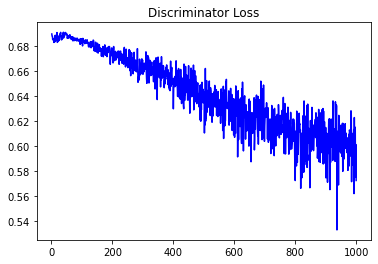

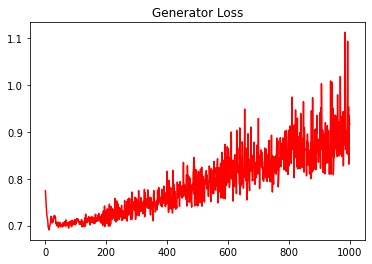

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.5957],
        [ 0.3902],
        [-3.4757],
        [ 0.5102],
        [-1.3089],
        [ 0.5103],
        [-1.0649],
        [ 0.4777],
        [ 0.5670],
        [ 0.0533],
        [ 0.7775],
        [ 0.7202],
        [ 0.0885],
        [-1.9017],
        [-0.1849],
        [ 0.2681],
        [ 0.3811],
        [ 0.6545],
        [ 0.5193],
        [ 0.5962]], grad_fn=<MmBackward>)
tensor([[ 0.6453],
        [ 0.4571],
        [-3.8706],
        [ 0.4002],
        [-1.4101],
        [ 0.1940],
        [-1.0231],
        [ 0.6328],
        [ 0.9033],
        [ 0.2013],
        [ 0.6727],
        [ 0.5622],
        [ 0.0621],
        [-2.0528],
        [ 0.2192],
        [ 0.2738],
        [ 0.4865],
        [ 0.4585],
        [ 0.4975],
        [ 0.6027]], grad_fn=<MmBackward>)
tensor([[ 0.4806],
        [ 0.5560],
        [-3.7740],
        [ 0.4930],
        [-1.6975],
        [ 0.0071],
        [-1.0626],
        [ 0.5181],
        [ 0.6152],
        [-0.1404],
    

tensor([[ 0.4426],
        [ 0.5039],
        [-3.6471],
        [ 0.5465],
        [-1.4216],
        [ 0.4531],
        [-1.0094],
        [ 0.4650],
        [ 0.8950],
        [ 0.0895],
        [ 0.7028],
        [ 0.8380],
        [ 0.0236],
        [-1.9116],
        [ 0.2422],
        [ 0.2337],
        [ 0.4663],
        [ 0.5881],
        [ 0.4920],
        [ 0.6742]], grad_fn=<MmBackward>)
tensor([[ 0.6093],
        [ 0.2678],
        [-3.3283],
        [ 0.5783],
        [-1.2057],
        [ 0.4731],
        [-1.0063],
        [ 0.6123],
        [ 0.6665],
        [-0.0623],
        [ 0.5671],
        [ 0.6796],
        [ 0.1530],
        [-1.7879],
        [-0.0508],
        [ 0.3223],
        [ 0.3079],
        [ 0.5443],
        [ 0.4023],
        [ 0.6279]], grad_fn=<MmBackward>)
tensor([[ 0.4988],
        [ 0.5230],
        [-3.5751],
        [ 0.5720],
        [-1.2789],
        [ 0.7557],
        [-0.9504],
        [ 0.3833],
        [ 0.9048],
        [ 0.0575],
    

tensor([[ 0.4372],
        [ 0.4719],
        [-3.8951],
        [ 0.4241],
        [-1.6475],
        [ 0.2264],
        [-1.0888],
        [ 0.5425],
        [ 0.8505],
        [ 0.2167],
        [ 0.5993],
        [ 0.5850],
        [-0.1548],
        [-1.8336],
        [ 0.1890],
        [ 0.2048],
        [ 0.4747],
        [ 0.6854],
        [ 0.4710],
        [ 0.6215]], grad_fn=<MmBackward>)
tensor([[ 0.6854],
        [ 0.5404],
        [-3.5458],
        [ 0.5905],
        [-1.2620],
        [ 0.5719],
        [-1.0163],
        [ 0.5537],
        [ 0.6629],
        [ 0.2557],
        [ 0.6602],
        [ 0.7250],
        [ 0.1932],
        [-1.8674],
        [-0.1905],
        [ 0.3312],
        [ 0.3855],
        [ 0.8793],
        [ 0.4327],
        [ 0.6396]], grad_fn=<MmBackward>)
tensor([[ 0.4784],
        [ 0.6042],
        [-3.5195],
        [ 0.5039],
        [-1.3312],
        [ 0.8379],
        [-1.0118],
        [ 0.5465],
        [ 0.7338],
        [ 0.0223],
    

tensor([[ 0.5203],
        [ 0.0644],
        [-3.2753],
        [ 0.4017],
        [-1.2085],
        [ 0.9265],
        [-1.0929],
        [ 0.4585],
        [ 0.5670],
        [ 0.0819],
        [ 0.6723],
        [ 0.6254],
        [ 0.0277],
        [-1.7556],
        [ 0.1142],
        [ 0.2295],
        [ 0.3206],
        [ 0.4858],
        [ 0.6033],
        [ 0.6345]], grad_fn=<MmBackward>)
tensor([[ 0.5535],
        [ 0.4837],
        [-3.7479],
        [ 0.4548],
        [-1.4728],
        [ 0.7153],
        [-1.0545],
        [ 0.4882],
        [ 0.6788],
        [ 0.0622],
        [ 0.6728],
        [ 0.6338],
        [-0.0126],
        [-1.6823],
        [ 0.0130],
        [ 0.2103],
        [ 0.4547],
        [ 0.3618],
        [ 0.4704],
        [ 0.6577]], grad_fn=<MmBackward>)
tensor([[ 0.6658],
        [ 0.0366],
        [-3.3178],
        [ 0.5730],
        [-1.1675],
        [ 0.5005],
        [-1.0510],
        [ 0.5435],
        [ 0.5497],
        [-0.0446],
    

tensor([[ 0.5941],
        [ 0.4077],
        [-3.4208],
        [ 0.6230],
        [-1.2912],
        [ 0.8487],
        [-0.9286],
        [ 0.5458],
        [ 0.6152],
        [ 0.0853],
        [ 0.5879],
        [ 0.8276],
        [ 0.1502],
        [-1.9543],
        [-0.1315],
        [ 0.2728],
        [ 0.3724],
        [ 0.5954],
        [ 0.5073],
        [ 0.5765]], grad_fn=<MmBackward>)
tensor([[ 0.6085],
        [ 0.5378],
        [-3.4440],
        [ 0.6195],
        [-1.2006],
        [ 0.6182],
        [-0.9508],
        [ 0.5655],
        [ 0.9298],
        [ 0.0187],
        [ 0.7048],
        [ 0.5504],
        [ 0.1420],
        [-1.8904],
        [-0.0987],
        [ 0.2908],
        [ 0.3832],
        [ 0.4547],
        [ 0.4796],
        [ 0.6025]], grad_fn=<MmBackward>)
tensor([[ 0.5254],
        [ 0.1297],
        [-3.2169],
        [ 0.3684],
        [-1.1297],
        [ 0.7578],
        [-1.0055],
        [ 0.3256],
        [ 0.4681],
        [-0.0070],
    

tensor([[ 0.5395],
        [ 0.5478],
        [-3.4755],
        [ 0.5750],
        [-1.3560],
        [ 0.8248],
        [-0.9962],
        [ 0.5367],
        [ 0.7114],
        [ 0.1167],
        [ 0.6467],
        [ 0.7685],
        [ 0.0808],
        [-2.1876],
        [-0.2079],
        [ 0.2502],
        [ 0.3733],
        [ 0.5187],
        [ 0.5581],
        [ 0.6231]], grad_fn=<MmBackward>)
tensor([[ 0.4793],
        [ 0.3883],
        [-3.6686],
        [ 0.3825],
        [-1.5231],
        [ 0.7982],
        [-0.9569],
        [ 0.5566],
        [ 0.7186],
        [ 0.0709],
        [ 0.6798],
        [ 0.6549],
        [-0.0116],
        [-1.7369],
        [ 0.1169],
        [ 0.1930],
        [ 0.4535],
        [ 0.3495],
        [ 0.5495],
        [ 0.5927]], grad_fn=<MmBackward>)
tensor([[ 0.6286],
        [ 0.2367],
        [-3.2996],
        [ 0.5056],
        [-1.1720],
        [ 0.6037],
        [-0.9931],
        [ 0.5493],
        [ 0.7583],
        [-0.0157],
    

tensor([[ 0.5578],
        [ 0.5158],
        [-3.4432],
        [ 0.4554],
        [-1.3484],
        [ 0.6549],
        [-1.0001],
        [ 0.5870],
        [ 0.7011],
        [ 0.0287],
        [ 0.7746],
        [ 0.4705],
        [ 0.0728],
        [-1.7181],
        [-0.2547],
        [ 0.2683],
        [ 0.5195],
        [ 0.5426],
        [ 0.5560],
        [ 0.6056]], grad_fn=<MmBackward>)
tensor([[ 0.5292],
        [ 0.1523],
        [-3.4493],
        [ 0.5047],
        [-1.2820],
        [ 0.5182],
        [-1.0359],
        [ 0.4870],
        [ 0.9198],
        [-0.0983],
        [ 0.6477],
        [ 0.7043],
        [ 0.0821],
        [-1.8128],
        [ 0.2303],
        [ 0.2734],
        [ 0.2152],
        [ 0.4560],
        [ 0.5009],
        [ 0.6393]], grad_fn=<MmBackward>)
tensor([[ 0.4975],
        [ 0.0573],
        [-3.4492],
        [ 0.4466],
        [-1.4542],
        [ 0.8977],
        [-1.0751],
        [ 0.4407],
        [ 0.7584],
        [-0.0351],
    

tensor([[ 0.4917],
        [ 0.5548],
        [-3.5387],
        [ 0.4596],
        [-1.2738],
        [ 0.2605],
        [-1.1868],
        [ 0.3781],
        [ 0.7065],
        [-0.0606],
        [ 0.5422],
        [ 0.4161],
        [-0.1395],
        [-1.7107],
        [ 0.4890],
        [ 0.2861],
        [ 0.4359],
        [ 0.5285],
        [ 0.6982],
        [ 0.7201]], grad_fn=<MmBackward>)
tensor([[ 0.5697],
        [ 0.4247],
        [-3.6168],
        [ 0.4647],
        [-1.5335],
        [ 0.6868],
        [-1.0027],
        [ 0.5202],
        [ 0.6471],
        [ 0.0197],
        [ 0.5431],
        [ 0.6808],
        [-0.2120],
        [-1.7997],
        [-0.4065],
        [ 0.2425],
        [ 0.4435],
        [ 0.4674],
        [ 0.4376],
        [ 0.6585]], grad_fn=<MmBackward>)
tensor([[ 0.6454],
        [ 0.1025],
        [-3.3118],
        [ 0.3961],
        [-1.2439],
        [ 0.9138],
        [-1.0308],
        [ 0.5069],
        [ 0.6288],
        [ 0.0908],
    

tensor([[ 0.5938],
        [ 0.4637],
        [-3.6009],
        [ 0.5795],
        [-1.3364],
        [ 0.4900],
        [-1.0376],
        [ 0.5881],
        [ 0.7589],
        [ 0.2563],
        [ 0.7947],
        [ 0.5422],
        [ 0.1241],
        [-1.7326],
        [ 0.0472],
        [ 0.2656],
        [ 0.3507],
        [ 0.3984],
        [ 0.4816],
        [ 0.7026]], grad_fn=<MmBackward>)
tensor([[ 0.5445],
        [ 0.2395],
        [-3.5265],
        [ 0.4450],
        [-1.5758],
        [ 0.6155],
        [-0.9946],
        [ 0.4242],
        [ 0.6315],
        [-0.0281],
        [ 0.6909],
        [ 0.7137],
        [-0.0815],
        [-1.8622],
        [-0.0588],
        [ 0.2179],
        [ 0.4495],
        [ 0.5230],
        [ 0.5838],
        [ 0.6458]], grad_fn=<MmBackward>)
tensor([[ 0.6164],
        [ 0.4992],
        [-3.4022],
        [ 0.5431],
        [-1.1568],
        [ 0.9445],
        [-0.9448],
        [ 0.6009],
        [ 0.7401],
        [-0.0261],
    

tensor([[ 0.5482],
        [ 0.1330],
        [-3.3970],
        [ 0.6073],
        [-1.2593],
        [ 0.5444],
        [-1.0426],
        [ 0.3567],
        [ 0.8897],
        [-0.0419],
        [ 0.7336],
        [ 0.7329],
        [ 0.0649],
        [-1.8700],
        [-0.1099],
        [ 0.2477],
        [ 0.3240],
        [ 0.6864],
        [ 0.5332],
        [ 0.6738]], grad_fn=<MmBackward>)
tensor([[ 0.4854],
        [ 0.3045],
        [-3.3702],
        [ 0.5000],
        [-1.1760],
        [ 0.8646],
        [-1.0109],
        [ 0.1983],
        [ 0.7406],
        [-0.0428],
        [ 0.6177],
        [ 0.7191],
        [ 0.0158],
        [-1.7779],
        [ 0.6041],
        [ 0.2300],
        [ 0.5859],
        [ 0.7453],
        [ 0.5258],
        [ 0.6740]], grad_fn=<MmBackward>)
tensor([[ 0.5562],
        [ 0.4538],
        [-3.4786],
        [ 0.4305],
        [-1.2669],
        [ 0.8790],
        [-1.0154],
        [ 0.3573],
        [ 0.7410],
        [ 0.0982],
    

tensor([[ 0.5667],
        [ 0.0126],
        [-3.3139],
        [ 0.4401],
        [-1.2508],
        [ 0.5379],
        [-0.9875],
        [ 0.4296],
        [ 0.4663],
        [ 0.0473],
        [ 0.7562],
        [ 0.5222],
        [ 0.1307],
        [-1.7967],
        [-0.1818],
        [ 0.2958],
        [ 0.3057],
        [ 0.4753],
        [ 0.5528],
        [ 0.6265]], grad_fn=<MmBackward>)
tensor([[ 0.5715],
        [ 0.6700],
        [-3.4480],
        [ 0.4092],
        [-1.1105],
        [ 0.9115],
        [-0.8778],
        [ 0.5985],
        [ 0.6605],
        [-0.0268],
        [ 0.8498],
        [ 0.6247],
        [-0.0210],
        [-2.0902],
        [-0.2671],
        [ 0.3121],
        [ 0.5120],
        [ 0.4718],
        [ 0.6090],
        [ 0.6321]], grad_fn=<MmBackward>)
tensor([[ 0.4613],
        [ 0.4938],
        [-3.8544],
        [ 0.4364],
        [-1.4244],
        [ 0.3818],
        [-1.0346],
        [ 0.5528],
        [ 0.8510],
        [ 0.0869],
    

tensor([[ 0.4793],
        [ 0.5469],
        [-3.8264],
        [ 0.4492],
        [-1.7828],
        [ 0.6636],
        [-1.0651],
        [ 0.6052],
        [ 0.7297],
        [-0.0426],
        [ 0.6926],
        [ 0.7041],
        [-0.4932],
        [-2.0106],
        [-0.1303],
        [ 0.1863],
        [ 0.4319],
        [ 0.5046],
        [ 0.2482],
        [ 0.6561]], grad_fn=<MmBackward>)
tensor([[ 0.5001],
        [ 0.6273],
        [-3.6398],
        [ 0.3276],
        [-1.3586],
        [ 0.5506],
        [-1.0319],
        [ 0.3814],
        [ 0.8237],
        [-0.0233],
        [ 0.6397],
        [ 0.5455],
        [-0.1792],
        [-1.7570],
        [-0.0639],
        [ 0.1961],
        [ 0.4611],
        [ 0.5333],
        [ 0.5116],
        [ 0.6894]], grad_fn=<MmBackward>)
tensor([[ 0.4961],
        [ 0.5238],
        [-3.4263],
        [ 0.3394],
        [-1.2455],
        [ 0.4918],
        [-0.9728],
        [ 0.5091],
        [ 0.6454],
        [ 0.1030],
    

tensor([[ 0.5456],
        [ 0.4690],
        [-3.4575],
        [ 0.4579],
        [-1.2287],
        [ 0.5456],
        [-0.9742],
        [ 0.4176],
        [ 0.9196],
        [ 0.0668],
        [ 0.6390],
        [ 0.7156],
        [-0.0859],
        [-1.7447],
        [ 0.1699],
        [ 0.2358],
        [ 0.5177],
        [ 0.3595],
        [ 0.5614],
        [ 0.6809]], grad_fn=<MmBackward>)
tensor([[ 0.6385],
        [ 0.4683],
        [-3.5536],
        [ 0.5982],
        [-1.2934],
        [ 0.3811],
        [-0.9829],
        [ 0.6671],
        [ 0.5694],
        [ 0.1175],
        [ 0.7537],
        [ 0.8379],
        [ 0.1363],
        [-1.8866],
        [-0.1014],
        [ 0.2977],
        [ 0.3151],
        [ 0.6751],
        [ 0.4744],
        [ 0.6719]], grad_fn=<MmBackward>)
tensor([[ 0.6684],
        [ 0.4753],
        [-3.5122],
        [ 0.5523],
        [-1.2386],
        [ 0.5723],
        [-0.9984],
        [ 0.6422],
        [ 0.6789],
        [-0.0462],
    

tensor([[ 0.5364],
        [ 0.4386],
        [-3.5745],
        [ 0.5468],
        [-1.2921],
        [ 0.5503],
        [-0.9580],
        [ 0.6743],
        [ 0.8448],
        [ 0.0380],
        [ 0.7852],
        [ 0.6672],
        [ 0.1353],
        [-1.7361],
        [-0.1721],
        [ 0.3387],
        [ 0.3270],
        [ 0.5333],
        [ 0.4947],
        [ 0.6659]], grad_fn=<MmBackward>)
tensor([[ 0.4639],
        [ 0.5220],
        [-3.6489],
        [ 0.3474],
        [-1.2451],
        [ 0.5136],
        [-1.0239],
        [ 0.3968],
        [ 0.8450],
        [ 0.0802],
        [ 0.7484],
        [ 0.4522],
        [ 0.0584],
        [-1.7908],
        [ 0.0288],
        [ 0.2737],
        [ 0.5246],
        [ 0.5106],
        [ 0.6500],
        [ 0.6743]], grad_fn=<MmBackward>)
tensor([[ 0.5366],
        [ 0.4929],
        [-3.3867],
        [ 0.4740],
        [-1.2039],
        [ 0.5920],
        [-0.9677],
        [ 0.7873],
        [ 0.6124],
        [ 0.0464],
    

tensor([[ 0.6162],
        [ 0.5550],
        [-3.6539],
        [ 0.5996],
        [-1.2617],
        [ 0.7202],
        [-0.9943],
        [ 0.5699],
        [ 0.8299],
        [ 0.2306],
        [ 0.6717],
        [ 0.7002],
        [ 0.1382],
        [-1.8777],
        [-0.5680],
        [ 0.3054],
        [ 0.4212],
        [ 0.6335],
        [ 0.5807],
        [ 0.6716]], grad_fn=<MmBackward>)
tensor([[ 0.5034],
        [ 0.4136],
        [-3.9546],
        [ 0.4411],
        [-1.6458],
        [ 0.5847],
        [-1.0417],
        [ 0.6318],
        [ 0.7899],
        [ 0.1533],
        [ 0.6343],
        [ 0.5882],
        [ 0.0504],
        [-1.9230],
        [ 0.3052],
        [ 0.2783],
        [ 0.3901],
        [ 0.7106],
        [ 0.5741],
        [ 0.5965]], grad_fn=<MmBackward>)
tensor([[ 0.6005],
        [ 0.1756],
        [-3.2124],
        [ 0.4285],
        [-1.1171],
        [ 0.7451],
        [-1.0214],
        [ 0.5698],
        [ 0.6030],
        [-0.0530],
    

tensor([[ 0.5452],
        [ 0.0077],
        [-3.1957],
        [ 0.5986],
        [-1.1419],
        [ 0.8070],
        [-1.0025],
        [ 0.4076],
        [ 0.5941],
        [-0.0375],
        [ 0.6834],
        [ 0.8065],
        [ 0.0663],
        [-1.9630],
        [ 0.5490],
        [ 0.2256],
        [ 0.3795],
        [ 0.7978],
        [ 0.6049],
        [ 0.6332]], grad_fn=<MmBackward>)
tensor([[ 0.5841],
        [ 0.2928],
        [-3.4962],
        [ 0.6717],
        [-1.2995],
        [ 0.5533],
        [-1.0671],
        [ 0.5244],
        [ 0.8010],
        [ 0.0214],
        [ 0.7524],
        [ 0.6684],
        [ 0.1059],
        [-1.7971],
        [ 0.0497],
        [ 0.2788],
        [ 0.2606],
        [ 0.5786],
        [ 0.5531],
        [ 0.7067]], grad_fn=<MmBackward>)
tensor([[ 0.4571],
        [ 0.1602],
        [-3.4479],
        [ 0.3283],
        [-1.3310],
        [ 0.6404],
        [-1.0879],
        [ 0.4390],
        [ 0.6973],
        [-0.0436],
    

tensor([[ 0.5547],
        [ 0.3859],
        [-3.5182],
        [ 0.4379],
        [-1.3881],
        [ 0.8028],
        [-1.1340],
        [ 0.6842],
        [ 0.6648],
        [ 0.0956],
        [ 0.7217],
        [ 0.6134],
        [ 0.0665],
        [-1.6941],
        [-0.2256],
        [ 0.3010],
        [ 0.3865],
        [ 0.4396],
        [ 0.7009],
        [ 0.6507]], grad_fn=<MmBackward>)
tensor([[ 0.5915],
        [ 0.2282],
        [-3.2872],
        [ 0.5015],
        [-1.1434],
        [ 0.4715],
        [-0.9506],
        [ 0.6242],
        [ 0.5638],
        [ 0.0050],
        [ 0.6703],
        [ 0.7602],
        [ 0.1774],
        [-1.7561],
        [-0.4811],
        [ 0.3064],
        [ 0.4270],
        [ 0.4872],
        [ 0.5723],
        [ 0.6300]], grad_fn=<MmBackward>)
tensor([[ 0.6292],
        [-0.0523],
        [-3.3163],
        [ 0.6112],
        [-1.1966],
        [ 0.4748],
        [-1.0099],
        [ 0.5461],
        [ 0.6114],
        [ 0.0386],
    

tensor([[ 0.5534],
        [ 0.3846],
        [-3.4692],
        [ 0.4952],
        [-1.3721],
        [ 0.8035],
        [-1.0117],
        [ 0.4839],
        [ 0.5682],
        [-0.0082],
        [ 0.6311],
        [ 0.7092],
        [-0.0345],
        [-1.7326],
        [-0.3667],
        [ 0.2635],
        [ 0.4617],
        [ 0.4354],
        [ 0.5219],
        [ 0.6774]], grad_fn=<MmBackward>)
tensor([[ 0.6430],
        [ 0.5914],
        [-3.3753],
        [ 0.5361],
        [-1.1511],
        [ 0.9804],
        [-0.9754],
        [ 0.3593],
        [ 0.5728],
        [ 0.0125],
        [ 0.6853],
        [ 0.6780],
        [ 0.1048],
        [-2.1220],
        [ 0.5471],
        [ 0.2386],
        [ 0.4754],
        [ 0.8308],
        [ 0.5160],
        [ 0.6366]], grad_fn=<MmBackward>)
tensor([[ 0.5021],
        [ 0.7309],
        [-3.8809],
        [ 0.4518],
        [-1.5427],
        [ 0.1479],
        [-0.9773],
        [ 0.4977],
        [ 0.6815],
        [ 0.0816],
    

tensor([[ 0.5343],
        [ 0.5071],
        [-3.7065],
        [ 0.4549],
        [-1.4475],
        [ 0.4939],
        [-1.0235],
        [ 0.5841],
        [ 0.9323],
        [ 0.1019],
        [ 0.6502],
        [ 0.7045],
        [ 0.0787],
        [-1.9739],
        [ 0.2247],
        [ 0.2203],
        [ 0.4321],
        [ 0.7971],
        [ 0.5155],
        [ 0.6723]], grad_fn=<MmBackward>)
tensor([[ 0.5176],
        [ 0.4997],
        [-3.4186],
        [ 0.4907],
        [-1.3090],
        [ 1.0702],
        [-1.1262],
        [ 0.4813],
        [ 0.8269],
        [ 0.0346],
        [ 0.6898],
        [ 0.2910],
        [ 0.0548],
        [-1.7820],
        [ 0.0741],
        [ 0.2321],
        [ 0.3082],
        [ 0.4374],
        [ 0.5585],
        [ 0.6230]], grad_fn=<MmBackward>)
tensor([[ 0.6615],
        [ 0.6099],
        [-3.5660],
        [ 0.5051],
        [-1.2566],
        [ 0.8305],
        [-0.9419],
        [ 0.5873],
        [ 0.6108],
        [ 0.2047],
    

tensor([[ 0.5644],
        [ 0.0208],
        [-3.1948],
        [ 0.6069],
        [-1.1313],
        [ 0.4368],
        [-1.0368],
        [ 0.5114],
        [ 0.7485],
        [-0.0081],
        [ 0.7097],
        [ 0.7568],
        [ 0.1370],
        [-1.7770],
        [-0.0284],
        [ 0.2806],
        [ 0.2262],
        [ 0.6770],
        [ 0.5762],
        [ 0.6279]], grad_fn=<MmBackward>)
tensor([[ 0.5319],
        [-0.2699],
        [-3.2395],
        [ 0.3806],
        [-1.3190],
        [ 0.2930],
        [-0.9978],
        [ 0.3524],
        [ 0.5470],
        [ 0.0415],
        [ 0.6414],
        [ 0.5407],
        [-0.2846],
        [-1.8242],
        [ 0.1444],
        [ 0.2351],
        [ 0.4665],
        [ 0.4416],
        [ 0.5274],
        [ 0.6618]], grad_fn=<MmBackward>)
tensor([[ 0.5153],
        [ 0.0980],
        [-3.3732],
        [ 0.4368],
        [-1.3517],
        [ 0.6832],
        [-1.0467],
        [ 0.3775],
        [ 0.5759],
        [ 0.0587],
    

tensor([[ 0.5250],
        [-0.1424],
        [-3.2837],
        [ 0.4321],
        [-1.2582],
        [ 0.8971],
        [-1.0684],
        [ 0.3859],
        [ 0.8534],
        [-0.0511],
        [ 0.6575],
        [ 0.6757],
        [ 0.0350],
        [-1.7540],
        [ 0.0310],
        [ 0.2185],
        [ 0.2837],
        [ 0.3967],
        [ 0.5359],
        [ 0.6042]], grad_fn=<MmBackward>)
tensor([[ 0.5719],
        [ 0.4183],
        [-3.5955],
        [ 0.4162],
        [-1.3494],
        [ 0.5552],
        [-1.0505],
        [ 0.5666],
        [ 0.8679],
        [ 0.1235],
        [ 0.6554],
        [ 0.6680],
        [ 0.0544],
        [-1.6565],
        [-0.3590],
        [ 0.2913],
        [ 0.4532],
        [ 0.6900],
        [ 0.5151],
        [ 0.6247]], grad_fn=<MmBackward>)
tensor([[ 0.4908],
        [ 0.5090],
        [-3.8520],
        [ 0.4521],
        [-1.4638],
        [ 0.7548],
        [-1.1422],
        [ 0.7042],
        [ 0.8284],
        [ 0.1047],
    

tensor([[ 0.5551],
        [ 0.4705],
        [-3.4669],
        [ 0.4514],
        [-1.2370],
        [ 0.7461],
        [-0.9872],
        [ 0.6817],
        [ 0.9566],
        [ 0.1486],
        [ 0.6527],
        [ 0.6742],
        [ 0.0836],
        [-1.9950],
        [-0.4151],
        [ 0.2855],
        [ 0.3820],
        [ 0.6533],
        [ 0.5087],
        [ 0.6259]], grad_fn=<MmBackward>)
tensor([[ 0.5848],
        [ 0.3705],
        [-3.5289],
        [ 0.3990],
        [-1.3118],
        [ 0.6837],
        [-0.9890],
        [ 0.5510],
        [ 0.8146],
        [ 0.0415],
        [ 0.6752],
        [ 0.6412],
        [ 0.0893],
        [-1.7093],
        [-0.5770],
        [ 0.3014],
        [ 0.4253],
        [ 0.4294],
        [ 0.5678],
        [ 0.6440]], grad_fn=<MmBackward>)
tensor([[ 0.5318],
        [ 0.3682],
        [-3.4496],
        [ 0.4298],
        [-1.2932],
        [ 0.8572],
        [-1.1429],
        [ 0.5490],
        [ 0.6561],
        [ 0.0087],
    

tensor([[ 0.4499],
        [ 0.3744],
        [-3.9167],
        [ 0.4613],
        [-1.5899],
        [ 0.2519],
        [-1.0063],
        [ 0.6606],
        [ 0.8223],
        [ 0.2069],
        [ 0.6575],
        [ 0.7056],
        [ 0.0553],
        [-1.9241],
        [ 0.1330],
        [ 0.2285],
        [ 0.5154],
        [ 0.7198],
        [ 0.5268],
        [ 0.5922]], grad_fn=<MmBackward>)
tensor([[ 0.5870],
        [ 0.4462],
        [-3.4502],
        [ 0.4684],
        [-1.3322],
        [ 0.5522],
        [-1.1440],
        [ 0.5242],
        [ 0.5956],
        [ 0.0181],
        [ 0.7137],
        [ 0.4657],
        [ 0.0101],
        [-1.6862],
        [-0.2142],
        [ 0.3243],
        [ 0.4175],
        [ 0.5835],
        [ 0.6431],
        [ 0.6978]], grad_fn=<MmBackward>)
tensor([[ 0.5194],
        [ 0.4830],
        [-3.6736],
        [ 0.4599],
        [-1.3969],
        [ 0.6718],
        [-1.0488],
        [ 0.4541],
        [ 0.8339],
        [ 0.1651],
    

tensor([[ 0.5715],
        [ 0.5058],
        [-3.5663],
        [ 0.6245],
        [-1.3311],
        [ 0.5589],
        [-1.0522],
        [ 0.4292],
        [ 0.8016],
        [ 0.0756],
        [ 0.5803],
        [ 0.5995],
        [-0.0328],
        [-1.8080],
        [ 0.0983],
        [ 0.2284],
        [ 0.4656],
        [ 0.6714],
        [ 0.4275],
        [ 0.6584]], grad_fn=<MmBackward>)
tensor([[ 0.7094],
        [ 0.4555],
        [-3.4812],
        [ 0.5811],
        [-1.3575],
        [ 0.5809],
        [-0.9529],
        [ 0.5163],
        [ 0.7037],
        [-0.0153],
        [ 0.5476],
        [ 0.8529],
        [ 0.1028],
        [-1.9243],
        [-0.0865],
        [ 0.2601],
        [ 0.4010],
        [ 0.5295],
        [ 0.5160],
        [ 0.6227]], grad_fn=<MmBackward>)
tensor([[ 0.6530],
        [ 0.4362],
        [-3.6198],
        [ 0.5127],
        [-1.4931],
        [ 0.3261],
        [-0.9799],
        [ 0.6268],
        [ 0.7662],
        [ 0.0389],
    

tensor([[ 0.6317],
        [ 0.6572],
        [-3.6826],
        [ 0.4221],
        [-1.5168],
        [ 0.2941],
        [-0.8100],
        [ 0.5764],
        [ 0.5517],
        [ 0.1061],
        [ 0.5075],
        [ 0.6750],
        [-0.1844],
        [-2.0165],
        [ 0.5925],
        [ 0.2447],
        [ 0.4303],
        [ 0.5876],
        [ 0.4021],
        [ 0.5659]], grad_fn=<MmBackward>)
tensor([[ 0.5892],
        [ 0.5888],
        [-3.7393],
        [ 0.5293],
        [-1.5461],
        [ 0.5709],
        [-0.9885],
        [ 0.5575],
        [ 0.7134],
        [ 0.0170],
        [ 0.7018],
        [ 0.7564],
        [ 0.0600],
        [-2.1300],
        [ 0.0811],
        [ 0.2688],
        [ 0.4903],
        [ 0.6120],
        [ 0.4938],
        [ 0.6107]], grad_fn=<MmBackward>)
tensor([[ 5.9157e-01],
        [ 1.9787e-01],
        [-3.3108e+00],
        [ 5.2019e-01],
        [-1.1657e+00],
        [ 7.4275e-01],
        [-9.8941e-01],
        [ 4.2842e-01],
        [ 

tensor([[ 0.4521],
        [ 0.6367],
        [-3.6644],
        [ 0.4478],
        [-1.1937],
        [ 0.2980],
        [-1.0756],
        [ 0.2933],
        [ 0.7220],
        [-0.0579],
        [ 0.6978],
        [ 0.4960],
        [ 0.0130],
        [-1.8217],
        [ 0.6020],
        [ 0.2910],
        [ 0.5226],
        [ 0.5702],
        [ 0.6954],
        [ 0.7152]], grad_fn=<MmBackward>)
tensor([[ 0.5624],
        [ 0.5165],
        [-3.5804],
        [ 0.3952],
        [-1.2996],
        [ 0.5887],
        [-0.9257],
        [ 0.5923],
        [ 0.8222],
        [-0.0245],
        [ 0.6879],
        [ 0.8133],
        [ 0.1425],
        [-1.8222],
        [ 0.1284],
        [ 0.2675],
        [ 0.3716],
        [ 0.4787],
        [ 0.4389],
        [ 0.6690]], grad_fn=<MmBackward>)
tensor([[ 0.6320],
        [ 0.5271],
        [-3.3160],
        [ 0.6066],
        [-1.1760],
        [ 0.7366],
        [-0.9680],
        [ 0.6799],
        [ 0.6018],
        [ 0.0198],
    

tensor([[ 0.6195],
        [ 0.5701],
        [-3.5821],
        [ 0.5218],
        [-1.1790],
        [ 0.7690],
        [-0.9672],
        [ 0.5301],
        [ 0.7954],
        [ 0.1248],
        [ 0.6714],
        [ 0.7676],
        [ 0.1719],
        [-1.8070],
        [-0.5162],
        [ 0.3070],
        [ 0.3065],
        [ 0.7549],
        [ 0.5574],
        [ 0.6635]], grad_fn=<MmBackward>)
tensor([[ 0.4705],
        [ 0.5261],
        [-3.5748],
        [ 0.3244],
        [-1.3629],
        [ 0.3150],
        [-1.0739],
        [ 0.4763],
        [ 0.6454],
        [ 0.1613],
        [ 0.7874],
        [ 0.5249],
        [-0.1032],
        [-1.7651],
        [-0.2400],
        [ 0.2481],
        [ 0.4643],
        [ 0.3801],
        [ 0.5988],
        [ 0.6579]], grad_fn=<MmBackward>)
tensor([[ 0.4890],
        [ 0.4861],
        [-3.5902],
        [ 0.4970],
        [-1.2994],
        [ 0.6330],
        [-1.0407],
        [ 0.5522],
        [ 0.8726],
        [-0.0284],
    

tensor([[ 4.5785e-01],
        [ 2.5439e-01],
        [-3.4847e+00],
        [ 3.2902e-01],
        [-1.3463e+00],
        [ 3.9370e-01],
        [-1.1517e+00],
        [ 3.9295e-01],
        [ 6.8624e-01],
        [-3.0013e-03],
        [ 6.9442e-01],
        [ 5.9772e-01],
        [-1.1721e-01],
        [-1.7321e+00],
        [-9.0138e-02],
        [ 2.3227e-01],
        [ 4.5180e-01],
        [ 2.7531e-01],
        [ 5.4988e-01],
        [ 6.6507e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4961],
        [ 0.5074],
        [-3.5672],
        [ 0.5012],
        [-1.2771],
        [ 0.9446],
        [-0.9826],
        [ 0.5337],
        [ 0.9443],
        [ 0.0504],
        [ 0.6573],
        [ 0.6588],
        [ 0.1307],
        [-1.9663],
        [-0.1265],
        [ 0.2831],
        [ 0.2879],
        [ 0.5319],
        [ 0.4973],
        [ 0.5982]], grad_fn=<MmBackward>)
tensor([[ 0.5902],
        [ 0.4026],
        [-3.5563],
        [ 0.5222],
        [-1.3885],
        [ 0.3711],


tensor([[ 0.6638],
        [-0.3994],
        [-3.0541],
        [ 0.5841],
        [-1.1039],
        [ 0.6329],
        [-0.9440],
        [ 0.4910],
        [ 0.6250],
        [ 0.0306],
        [ 0.7568],
        [ 0.8508],
        [ 0.1432],
        [-1.8098],
        [-0.2513],
        [ 0.2671],
        [ 0.3860],
        [ 0.6500],
        [ 0.4357],
        [ 0.5891]], grad_fn=<MmBackward>)
tensor([[ 0.4971],
        [ 0.4827],
        [-3.5917],
        [ 0.5370],
        [-1.3702],
        [ 0.9453],
        [-0.9840],
        [ 0.4023],
        [ 0.9613],
        [ 0.0644],
        [ 0.7340],
        [ 0.7058],
        [ 0.1033],
        [-2.0259],
        [-0.2117],
        [ 0.2653],
        [ 0.2931],
        [ 0.4973],
        [ 0.5122],
        [ 0.5232]], grad_fn=<MmBackward>)


tensor([[ 0.4585],
        [ 0.5293],
        [-3.5060],
        [ 0.3717],
        [-1.2535],
        [ 0.5155],
        [-1.0495],
        [ 0.4871],
        [ 0.7160],
        [ 0.0241],
        [ 0.6518],
        [ 0.4569],
        [-0.0972],
        [-1.7256],
        [ 0.0995],
        [ 0.2656],
        [ 0.4849],
        [ 0.3529],
        [ 0.6494],
        [ 0.5451]], grad_fn=<MmBackward>)
tensor([[ 0.5006],
        [ 0.6052],
        [-3.6351],
        [ 0.3987],
        [-1.4153],
        [ 0.7279],
        [-1.0658],
        [ 0.4420],
        [ 0.8827],
        [ 0.0268],
        [ 0.6453],
        [ 0.5944],
        [-0.1439],
        [-1.9242],
        [-0.2315],
        [ 0.1930],
        [ 0.4248],
        [ 0.4713],
        [ 0.4633],
        [ 0.6762]], grad_fn=<MmBackward>)
tensor([[ 0.4940],
        [ 0.5247],
        [-3.7339],
        [ 0.4802],
        [-1.4263],
        [ 0.4010],
        [-1.2518],
        [ 0.4740],
        [ 0.7345],
        [-0.0407],
    

tensor([[ 0.5741],
        [ 0.5134],
        [-3.6294],
        [ 0.4344],
        [-1.3484],
        [ 0.6326],
        [-1.0097],
        [ 0.6055],
        [ 0.6895],
        [ 0.0276],
        [ 0.6022],
        [ 0.7472],
        [-0.0597],
        [-1.8258],
        [-0.3795],
        [ 0.2215],
        [ 0.5051],
        [ 0.4327],
        [ 0.5031],
        [ 0.6363]], grad_fn=<MmBackward>)
tensor([[ 0.5697],
        [ 0.5426],
        [-3.5307],
        [ 0.4511],
        [-1.3087],
        [ 0.5977],
        [-0.9806],
        [ 0.5626],
        [ 0.9373],
        [ 0.1274],
        [ 0.7235],
        [ 0.7080],
        [ 0.0734],
        [-1.9799],
        [-0.2276],
        [ 0.2818],
        [ 0.4227],
        [ 0.6879],
        [ 0.5690],
        [ 0.6535]], grad_fn=<MmBackward>)
tensor([[ 0.5784],
        [ 0.4615],
        [-3.6587],
        [ 0.4280],
        [-1.4426],
        [ 0.6445],
        [-1.0192],
        [ 0.5251],
        [ 0.8064],
        [ 0.1059],
    

tensor([[ 0.5578],
        [ 0.4188],
        [-3.6008],
        [ 0.4207],
        [-1.2927],
        [ 0.8078],
        [-1.0571],
        [ 0.5455],
        [ 0.9084],
        [ 0.1974],
        [ 0.6859],
        [ 0.6135],
        [ 0.0695],
        [-1.6934],
        [-0.3446],
        [ 0.2989],
        [ 0.4061],
        [ 0.6627],
        [ 0.5280],
        [ 0.6837]], grad_fn=<MmBackward>)
tensor([[ 0.4825],
        [ 0.2424],
        [-3.4697],
        [ 0.3969],
        [-1.3469],
        [ 0.9827],
        [-1.0603],
        [ 0.4141],
        [ 0.7579],
        [ 0.0245],
        [ 0.7063],
        [ 0.6738],
        [-0.0339],
        [-1.6852],
        [-0.2394],
        [ 0.2402],
        [ 0.3778],
        [ 0.3833],
        [ 0.5669],
        [ 0.5777]], grad_fn=<MmBackward>)
tensor([[ 0.4578],
        [ 0.5090],
        [-3.5801],
        [ 0.4640],
        [-1.3252],
        [ 0.4128],
        [-1.1075],
        [ 0.4855],
        [ 0.7064],
        [-0.0630],
    

tensor([[ 0.6753],
        [ 0.2057],
        [-3.7281],
        [ 0.5077],
        [-1.2465],
        [ 0.6098],
        [-1.0060],
        [ 0.6255],
        [ 0.7874],
        [ 0.0302],
        [ 0.5823],
        [ 0.7745],
        [ 0.0948],
        [-1.9701],
        [-0.4083],
        [ 0.2744],
        [ 0.4412],
        [ 0.4936],
        [ 0.3630],
        [ 0.6224]], grad_fn=<MmBackward>)
tensor([[ 5.9158e-01],
        [ 4.6517e-01],
        [-3.5601e+00],
        [ 7.2002e-01],
        [-1.2798e+00],
        [ 5.7495e-01],
        [-9.5451e-01],
        [ 5.8893e-01],
        [ 6.6355e-01],
        [ 1.4676e-01],
        [ 7.3974e-01],
        [ 7.5010e-01],
        [ 1.5772e-01],
        [-1.8604e+00],
        [ 7.5585e-04],
        [ 2.9073e-01],
        [ 2.9367e-01],
        [ 5.8503e-01],
        [ 4.2886e-01],
        [ 6.5268e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5273],
        [ 0.1335],
        [-3.3543],
        [ 0.4045],
        [-1.2344],
        [ 0.5684],


tensor([[ 0.5915],
        [ 0.5355],
        [-3.4855],
        [ 0.4682],
        [-1.2351],
        [ 0.5241],
        [-1.0168],
        [ 0.5183],
        [ 0.8780],
        [ 0.0129],
        [ 0.7333],
        [ 0.6363],
        [-0.0296],
        [-1.9978],
        [-0.0396],
        [ 0.2595],
        [ 0.4356],
        [ 0.4618],
        [ 0.5778],
        [ 0.6642]], grad_fn=<MmBackward>)
tensor([[ 0.5420],
        [ 0.6372],
        [-3.7997],
        [ 0.4179],
        [-1.3213],
        [ 0.3783],
        [-0.9046],
        [ 0.5505],
        [ 0.7217],
        [ 0.1396],
        [ 0.6427],
        [ 0.4771],
        [ 0.0376],
        [-2.0218],
        [ 0.7133],
        [ 0.2596],
        [ 0.4940],
        [ 0.4148],
        [ 0.5545],
        [ 0.6199]], grad_fn=<MmBackward>)
tensor([[ 0.6452],
        [ 0.0789],
        [-3.2709],
        [ 0.6414],
        [-1.1442],
        [ 0.5492],
        [-1.0064],
        [ 0.6515],
        [ 0.6491],
        [ 0.0840],
    

tensor([[ 0.5187],
        [ 0.3062],
        [-3.3613],
        [ 0.3954],
        [-1.1960],
        [ 0.7116],
        [-1.0192],
        [ 0.3246],
        [ 0.7759],
        [ 0.0322],
        [ 0.6969],
        [ 0.5712],
        [-0.0617],
        [-1.7156],
        [ 0.2755],
        [ 0.2317],
        [ 0.5403],
        [ 0.4647],
        [ 0.5784],
        [ 0.7224]], grad_fn=<MmBackward>)
tensor([[ 0.4593],
        [ 0.4480],
        [-3.6354],
        [ 0.3776],
        [-1.4198],
        [ 0.4223],
        [-1.0770],
        [ 0.4798],
        [ 0.7467],
        [ 0.0397],
        [ 0.6987],
        [ 0.6034],
        [-0.2543],
        [-1.7262],
        [-0.2899],
        [ 0.2273],
        [ 0.4325],
        [ 0.2267],
        [ 0.6422],
        [ 0.6170]], grad_fn=<MmBackward>)
tensor([[ 0.5985],
        [ 0.6051],
        [-3.4495],
        [ 0.5226],
        [-1.2172],
        [ 0.9030],
        [-0.9906],
        [ 0.5649],
        [ 0.7250],
        [ 0.0875],
    

tensor([[ 0.5013],
        [ 0.7023],
        [-3.5089],
        [ 0.4830],
        [-1.0967],
        [ 0.7949],
        [-0.8671],
        [ 0.6157],
        [ 0.7931],
        [ 0.0194],
        [ 0.7838],
        [ 0.5599],
        [-0.0457],
        [-2.1076],
        [-0.0129],
        [ 0.2736],
        [ 0.6671],
        [ 0.3588],
        [ 0.4770],
        [ 0.6249]], grad_fn=<MmBackward>)
tensor([[ 0.4775],
        [ 0.6027],
        [-3.5327],
        [ 0.4212],
        [-1.2176],
        [ 0.9705],
        [-1.0115],
        [ 0.3373],
        [ 0.8238],
        [ 0.0546],
        [ 0.7404],
        [ 0.6216],
        [ 0.0827],
        [-1.7100],
        [ 0.4487],
        [ 0.2333],
        [ 0.5016],
        [ 0.5693],
        [ 0.5951],
        [ 0.6824]], grad_fn=<MmBackward>)
tensor([[ 0.5204],
        [ 0.3973],
        [-3.5225],
        [ 0.3582],
        [-1.3341],
        [ 0.8029],
        [-0.9879],
        [ 0.4695],
        [ 0.8753],
        [ 0.0840],
    

tensor([[ 5.0132e-01],
        [ 9.8025e-02],
        [-3.3342e+00],
        [ 4.7138e-01],
        [-1.2974e+00],
        [ 4.0139e-01],
        [-1.0970e+00],
        [ 6.2221e-01],
        [ 8.6281e-01],
        [-6.5101e-02],
        [ 6.4956e-01],
        [ 5.2976e-01],
        [ 4.7258e-04],
        [-1.7788e+00],
        [ 4.7765e-02],
        [ 2.5131e-01],
        [ 3.4599e-01],
        [ 5.7330e-01],
        [ 5.3333e-01],
        [ 6.6191e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4317],
        [ 0.5116],
        [-3.7323],
        [ 0.5061],
        [-1.4639],
        [ 0.8554],
        [-1.0387],
        [ 0.4998],
        [ 0.8911],
        [-0.0038],
        [ 0.6516],
        [ 0.7664],
        [ 0.0369],
        [-1.8890],
        [-0.1454],
        [ 0.2214],
        [ 0.3571],
        [ 0.5880],
        [ 0.4766],
        [ 0.6305]], grad_fn=<MmBackward>)
tensor([[ 0.4759],
        [ 0.3127],
        [-3.4848],
        [ 0.4990],
        [-1.2712],
        [ 0.7329],


tensor([[ 0.6369],
        [ 0.4464],
        [-3.8150],
        [ 0.3596],
        [-1.7080],
        [ 0.2203],
        [-1.0381],
        [ 0.5488],
        [ 0.7854],
        [ 0.0732],
        [ 0.5435],
        [ 0.6122],
        [-0.4261],
        [-1.8715],
        [ 0.1605],
        [ 0.1883],
        [ 0.4579],
        [ 0.3975],
        [ 0.4252],
        [ 0.7620]], grad_fn=<MmBackward>)
tensor([[ 0.5744],
        [ 0.5524],
        [-3.5252],
        [ 0.5786],
        [-1.2046],
        [ 0.5766],
        [-0.9863],
        [ 0.7803],
        [ 0.7944],
        [ 0.1252],
        [ 0.7521],
        [ 0.6692],
        [ 0.0578],
        [-1.9102],
        [-0.0295],
        [ 0.3468],
        [ 0.4954],
        [ 0.4398],
        [ 0.5800],
        [ 0.5963]], grad_fn=<MmBackward>)
tensor([[ 0.6201],
        [ 0.5080],
        [-3.5998],
        [ 0.5679],
        [-1.3347],
        [ 0.2595],
        [-1.0390],
        [ 0.6668],
        [ 0.7451],
        [ 0.0186],
    

tensor([[ 0.4766],
        [ 0.5616],
        [-3.5977],
        [ 0.2890],
        [-1.3217],
        [ 0.1048],
        [-1.0189],
        [ 0.3880],
        [ 0.7918],
        [ 0.0433],
        [ 0.6645],
        [ 0.4951],
        [-0.2270],
        [-1.6725],
        [-0.1690],
        [ 0.2240],
        [ 0.4925],
        [ 0.3495],
        [ 0.5382],
        [ 0.6834]], grad_fn=<MmBackward>)
tensor([[ 4.8447e-01],
        [ 2.6833e-01],
        [-3.6458e+00],
        [ 3.6432e-01],
        [-1.6131e+00],
        [ 4.7302e-01],
        [-9.9099e-01],
        [ 4.1375e-01],
        [ 5.9310e-01],
        [-1.4064e-03],
        [ 5.5849e-01],
        [ 6.7222e-01],
        [-3.9369e-01],
        [-2.1644e+00],
        [-2.1759e-01],
        [ 2.0586e-01],
        [ 4.2609e-01],
        [ 5.1636e-01],
        [ 4.4834e-01],
        [ 6.0185e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4862],
        [ 0.4301],
        [-3.6336],
        [ 0.4425],
        [-1.3783],
        [ 0.6485],


tensor([[ 0.5083],
        [ 0.4330],
        [-3.5344],
        [ 0.5547],
        [-1.3585],
        [ 0.3467],
        [-1.0203],
        [ 0.5726],
        [ 0.8178],
        [-0.0104],
        [ 0.6726],
        [ 0.7369],
        [ 0.0664],
        [-1.7923],
        [-0.2433],
        [ 0.2569],
        [ 0.4008],
        [ 0.5926],
        [ 0.6126],
        [ 0.6131]], grad_fn=<MmBackward>)
tensor([[ 0.7040],
        [ 0.3147],
        [-3.3303],
        [ 0.5363],
        [-1.1868],
        [ 0.4901],
        [-1.0166],
        [ 0.5485],
        [ 0.5113],
        [-0.0343],
        [ 0.6042],
        [ 0.7209],
        [ 0.1473],
        [-1.7696],
        [-0.3228],
        [ 0.3254],
        [ 0.3887],
        [ 0.4495],
        [ 0.5711],
        [ 0.6265]], grad_fn=<MmBackward>)


tensor([[ 0.5473],
        [ 0.5663],
        [-3.6309],
        [ 0.3978],
        [-1.3898],
        [ 0.5811],
        [-1.0262],
        [ 0.4016],
        [ 0.4738],
        [ 0.3656],
        [ 0.7604],
        [ 0.5857],
        [ 0.0659],
        [-1.9668],
        [-0.0264],
        [ 0.2147],
        [ 0.4361],
        [ 0.5445],
        [ 0.5658],
        [ 0.6595]], grad_fn=<MmBackward>)
tensor([[ 0.5250],
        [ 0.1408],
        [-3.4436],
        [ 0.4979],
        [-1.2702],
        [ 0.5723],
        [-1.0761],
        [ 0.4437],
        [ 0.8292],
        [ 0.0911],
        [ 0.7406],
        [ 0.5620],
        [ 0.0894],
        [-1.8164],
        [ 0.2093],
        [ 0.2479],
        [ 0.3358],
        [ 0.4767],
        [ 0.5341],
        [ 0.6938]], grad_fn=<MmBackward>)
tensor([[ 0.5134],
        [ 0.4959],
        [-3.5329],
        [ 0.5038],
        [-1.3172],
        [ 0.9837],
        [-1.0936],
        [ 0.3383],
        [ 0.7317],
        [-0.0990],
    


tensor([[ 0.4769],
        [ 0.0996],
        [-3.4187],
        [ 0.3735],
        [-1.3724],
        [ 0.9066],
        [-1.1244],
        [ 0.4651],
        [ 0.5130],
        [ 0.0294],
        [ 0.7657],
        [ 0.6523],
        [-0.0970],
        [-1.8399],
        [-0.1079],
        [ 0.2163],
        [ 0.3326],
        [ 0.5107],
        [ 0.5047],
        [ 0.6144]], grad_fn=<MmBackward>)
tensor([[ 0.5132],
        [ 0.4140],
        [-3.6651],
        [ 0.3559],
        [-1.3150],
        [ 0.8484],
        [-1.0455],
        [ 0.6282],
        [ 0.8312],
        [ 0.0396],
        [ 0.5999],
        [ 0.6477],
        [ 0.0527],
        [-1.7542],
        [-0.1128],
        [ 0.2605],
        [ 0.3477],
        [ 0.4876],
        [ 0.4231],
        [ 0.6314]], grad_fn=<MmBackward>)
tensor([[ 0.5393],
        [ 0.3646],
        [-3.5027],
        [ 0.4310],
        [-1.3098],
        [ 0.7727],
        [-1.0278],
        [ 0.5392],
        [ 0.7416],
        [ 0.0133],
   

tensor([[ 0.6362],
        [ 0.5879],
        [-3.4000],
        [ 0.5219],
        [-1.1041],
        [ 0.5594],
        [-0.8047],
        [ 0.8438],
        [ 0.6699],
        [-0.0229],
        [ 0.7623],
        [ 0.6559],
        [ 0.0147],
        [-1.8347],
        [ 0.3110],
        [ 0.3680],
        [ 0.4660],
        [ 0.3564],
        [ 0.5926],
        [ 0.5784]], grad_fn=<MmBackward>)
tensor([[ 0.6298],
        [ 0.3519],
        [-3.5027],
        [ 0.4786],
        [-1.1874],
        [ 0.5353],
        [-0.9864],
        [ 0.5449],
        [ 0.9576],
        [ 0.1635],
        [ 0.7477],
        [ 0.6330],
        [ 0.1134],
        [-1.7679],
        [-0.3644],
        [ 0.3225],
        [ 0.2866],
        [ 0.4592],
        [ 0.5407],
        [ 0.6915]], grad_fn=<MmBackward>)
tensor([[ 0.5583],
        [ 0.1352],
        [-3.3110],
        [ 0.5513],
        [-1.2670],
        [ 0.6187],
        [-1.0233],
        [ 0.5024],
        [ 0.6837],
        [-0.1165],
    

tensor([[ 0.5082],
        [ 0.0811],
        [-3.2234],
        [ 0.3959],
        [-1.1205],
        [ 1.1252],
        [-1.0409],
        [ 0.2993],
        [ 0.6373],
        [-0.0719],
        [ 0.6845],
        [ 0.5467],
        [ 0.0085],
        [-1.7509],
        [ 0.6045],
        [ 0.2246],
        [ 0.4715],
        [ 0.5975],
        [ 0.5701],
        [ 0.6261]], grad_fn=<MmBackward>)
tensor([[ 0.4858],
        [-0.0041],
        [-3.3325],
        [ 0.3866],
        [-1.3055],
        [ 0.8928],
        [-1.1202],
        [ 0.4004],
        [ 0.6049],
        [-0.0740],
        [ 0.7301],
        [ 0.5809],
        [-0.0252],
        [-1.7295],
        [ 0.1004],
        [ 0.2261],
        [ 0.3458],
        [ 0.5373],
        [ 0.6101],
        [ 0.6121]], grad_fn=<MmBackward>)
tensor([[ 0.4520],
        [ 0.5220],
        [-3.7531],
        [ 0.4110],
        [-1.3792],
        [ 0.1437],
        [-1.0256],
        [ 0.5093],
        [ 0.8233],
        [ 0.0911],
    

tensor([[ 0.6140],
        [ 0.5995],
        [-3.5862],
        [ 0.5020],
        [-1.3968],
        [ 0.4612],
        [-0.9194],
        [ 0.4278],
        [ 0.6844],
        [ 0.0052],
        [ 0.6414],
        [ 0.8012],
        [-0.0113],
        [-1.9419],
        [-0.0913],
        [ 0.2306],
        [ 0.5122],
        [ 0.4716],
        [ 0.5575],
        [ 0.6783]], grad_fn=<MmBackward>)
tensor([[ 0.6834],
        [ 0.5529],
        [-3.5138],
        [ 0.5602],
        [-1.2875],
        [ 0.6419],
        [-0.9665],
        [ 0.6025],
        [ 0.9085],
        [ 0.0347],
        [ 0.7016],
        [ 0.5737],
        [ 0.1509],
        [-1.9815],
        [-0.1449],
        [ 0.2995],
        [ 0.4205],
        [ 0.4695],
        [ 0.5303],
        [ 0.6392]], grad_fn=<MmBackward>)
tensor([[ 0.5794],
        [ 0.6663],
        [-3.5278],
        [ 0.4687],
        [-1.2111],
        [ 0.8809],
        [-0.9308],
        [ 0.5876],
        [ 0.7325],
        [ 0.1536],
    

tensor([[ 0.6182],
        [ 0.6288],
        [-3.6260],
        [ 0.5306],
        [-1.4022],
        [ 0.7165],
        [-0.9584],
        [ 0.6190],
        [ 0.6237],
        [ 0.0585],
        [ 0.5821],
        [ 0.7882],
        [ 0.1390],
        [-2.0701],
        [-0.2229],
        [ 0.2665],
        [ 0.4546],
        [ 0.6347],
        [ 0.5358],
        [ 0.6927]], grad_fn=<MmBackward>)
tensor([[ 0.5377],
        [ 0.4611],
        [-3.8330],
        [ 0.4288],
        [-1.4816],
        [ 0.4415],
        [-1.0345],
        [ 0.6094],
        [ 0.7692],
        [ 0.0195],
        [ 0.6519],
        [ 0.5710],
        [ 0.0447],
        [-1.7576],
        [ 0.1023],
        [ 0.2684],
        [ 0.4631],
        [ 0.5385],
        [ 0.5232],
        [ 0.6318]], grad_fn=<MmBackward>)
tensor([[ 0.6007],
        [-0.0504],
        [-3.2371],
        [ 0.7008],
        [-1.2396],
        [ 0.3880],
        [-1.0726],
        [ 0.6110],
        [ 0.5908],
        [ 0.0638],
    

tensor([[ 0.6078],
        [ 0.5741],
        [-3.4675],
        [ 0.4488],
        [-1.2266],
        [ 0.7845],
        [-1.0082],
        [ 0.7591],
        [ 0.6061],
        [ 0.1073],
        [ 0.7638],
        [ 0.6228],
        [-0.0193],
        [-2.0707],
        [ 0.0251],
        [ 0.2874],
        [ 0.4481],
        [ 0.4529],
        [ 0.6333],
        [ 0.5826]], grad_fn=<MmBackward>)
tensor([[ 0.5653],
        [ 0.4030],
        [-3.5507],
        [ 0.4362],
        [-1.5267],
        [ 0.6621],
        [-1.0693],
        [ 0.5775],
        [ 0.5456],
        [-0.0702],
        [ 0.5932],
        [ 0.6548],
        [-0.0064],
        [-1.7624],
        [-0.0891],
        [ 0.2553],
        [ 0.4173],
        [ 0.4576],
        [ 0.4920],
        [ 0.6516]], grad_fn=<MmBackward>)
tensor([[ 0.5340],
        [ 0.1146],
        [-3.4959],
        [ 0.4580],
        [-1.3057],
        [ 0.5262],
        [-1.0791],
        [ 0.4802],
        [ 0.9381],
        [ 0.2971],
    

tensor([[ 0.5794],
        [ 0.4522],
        [-3.6804],
        [ 0.4594],
        [-1.4242],
        [ 0.6879],
        [-1.0308],
        [ 0.5346],
        [ 0.6809],
        [ 0.2274],
        [ 0.7426],
        [ 0.6494],
        [ 0.1201],
        [-1.9667],
        [-0.4226],
        [ 0.2843],
        [ 0.4082],
        [ 0.4788],
        [ 0.4010],
        [ 0.5791]], grad_fn=<MmBackward>)
tensor([[ 0.5882],
        [ 0.4475],
        [-3.5551],
        [ 0.5801],
        [-1.4188],
        [ 0.8365],
        [-0.9886],
        [ 0.4578],
        [ 0.6388],
        [ 0.1300],
        [ 0.7358],
        [ 0.7872],
        [ 0.0999],
        [-2.0579],
        [-0.0094],
        [ 0.2383],
        [ 0.3094],
        [ 0.7051],
        [ 0.4694],
        [ 0.5718]], grad_fn=<MmBackward>)
tensor([[ 0.6858],
        [ 0.2149],
        [-3.3651],
        [ 0.4817],
        [-1.2788],
        [ 0.4577],
        [-1.0381],
        [ 0.5900],
        [ 0.5550],
        [-0.0212],
    

tensor([[ 0.5373],
        [ 0.3933],
        [-3.4399],
        [ 0.2901],
        [-1.2514],
        [ 0.5030],
        [-1.1210],
        [ 0.3971],
        [ 0.6914],
        [-0.0355],
        [ 0.7016],
        [ 0.5211],
        [-0.0210],
        [-1.7190],
        [-0.1523],
        [ 0.2714],
        [ 0.4335],
        [ 0.4353],
        [ 0.5525],
        [ 0.5600]], grad_fn=<MmBackward>)
tensor([[ 0.5583],
        [ 0.5276],
        [-3.6069],
        [ 0.5385],
        [-1.4228],
        [ 0.3551],
        [-0.9888],
        [ 0.6338],
        [ 0.7614],
        [ 0.0064],
        [ 0.7345],
        [ 0.8395],
        [-0.0145],
        [-1.9922],
        [-0.1836],
        [ 0.2550],
        [ 0.4735],
        [ 0.4001],
        [ 0.5978],
        [ 0.6321]], grad_fn=<MmBackward>)
tensor([[ 4.5728e-01],
        [ 4.0986e-01],
        [-3.6183e+00],
        [ 3.0217e-01],
        [-1.4017e+00],
        [ 1.7274e-01],
        [-1.1717e+00],
        [ 6.0359e-01],
        [ 

tensor([[ 0.5571],
        [ 0.3239],
        [-3.4379],
        [ 0.4402],
        [-1.3010],
        [ 0.7748],
        [-1.0934],
        [ 0.4267],
        [ 0.5477],
        [-0.0282],
        [ 0.7848],
        [ 0.6589],
        [ 0.0897],
        [-1.8195],
        [-0.0444],
        [ 0.2441],
        [ 0.3730],
        [ 0.5957],
        [ 0.6085],
        [ 0.5985]], grad_fn=<MmBackward>)
tensor([[ 0.5193],
        [ 0.5814],
        [-3.6067],
        [ 0.5537],
        [-1.3632],
        [ 0.5831],
        [-0.9974],
        [ 0.6273],
        [ 0.7333],
        [ 0.0497],
        [ 0.6213],
        [ 0.7065],
        [ 0.0259],
        [-2.0517],
        [ 0.1920],
        [ 0.2639],
        [ 0.4524],
        [ 0.7533],
        [ 0.5609],
        [ 0.6197]], grad_fn=<MmBackward>)
tensor([[ 0.5346],
        [ 0.5178],
        [-3.6539],
        [ 0.5419],
        [-1.3203],
        [ 0.5805],
        [-0.9950],
        [ 0.3664],
        [ 0.8739],
        [ 0.0819],
    

tensor([[ 0.5242],
        [ 0.5227],
        [-3.7094],
        [ 0.5117],
        [-1.5534],
        [ 0.7614],
        [-1.0193],
        [ 0.5368],
        [ 0.7066],
        [ 0.0722],
        [ 0.7146],
        [ 0.7218],
        [ 0.0330],
        [-1.7260],
        [ 0.0755],
        [ 0.2480],
        [ 0.4663],
        [ 0.5731],
        [ 0.6093],
        [ 0.7021]], grad_fn=<MmBackward>)
tensor([[ 0.6649],
        [ 0.3845],
        [-3.4557],
        [ 0.3999],
        [-1.2210],
        [ 0.4713],
        [-1.0410],
        [ 0.4935],
        [ 0.7986],
        [ 0.2416],
        [ 0.6549],
        [ 0.6553],
        [ 0.0692],
        [-1.8333],
        [-0.7095],
        [ 0.2919],
        [ 0.3617],
        [ 0.7182],
        [ 0.5374],
        [ 0.6408]], grad_fn=<MmBackward>)
tensor([[ 0.4483],
        [ 0.5221],
        [-3.7271],
        [ 0.5185],
        [-1.5166],
        [ 0.6691],
        [-1.0784],
        [ 0.6152],
        [ 0.7458],
        [-0.0040],
    

tensor([[ 0.5758],
        [ 0.2843],
        [-3.4063],
        [ 0.4021],
        [-1.2466],
        [ 0.8530],
        [-1.0587],
        [ 0.3288],
        [ 0.5509],
        [-0.0401],
        [ 0.7694],
        [ 0.6328],
        [ 0.0204],
        [-1.7966],
        [ 0.5393],
        [ 0.2533],
        [ 0.3904],
        [ 0.4802],
        [ 0.5437],
        [ 0.6105]], grad_fn=<MmBackward>)
tensor([[ 0.5730],
        [ 0.4953],
        [-3.5179],
        [ 0.4217],
        [-1.4055],
        [ 0.5846],
        [-0.9778],
        [ 0.4556],
        [ 0.5393],
        [ 0.0087],
        [ 0.5754],
        [ 0.5791],
        [-0.1738],
        [-1.7860],
        [-0.2648],
        [ 0.2469],
        [ 0.4508],
        [ 0.5820],
        [ 0.4760],
        [ 0.6958]], grad_fn=<MmBackward>)
tensor([[ 0.5723],
        [ 0.5436],
        [-3.4538],
        [ 0.4999],
        [-1.2886],
        [ 0.8500],
        [-0.9914],
        [ 0.6383],
        [ 0.7577],
        [ 0.0549],
    

tensor([[ 0.5166],
        [ 0.5597],
        [-3.5821],
        [ 0.5038],
        [-1.5351],
        [ 0.6973],
        [-1.0078],
        [ 0.5376],
        [ 0.5785],
        [ 0.0944],
        [ 0.6291],
        [ 0.7567],
        [-0.0387],
        [-1.7003],
        [-0.0362],
        [ 0.2137],
        [ 0.4563],
        [ 0.9773],
        [ 0.5573],
        [ 0.6549]], grad_fn=<MmBackward>)
tensor([[ 0.5130],
        [ 0.4991],
        [-3.5980],
        [ 0.5618],
        [-1.3102],
        [ 0.5550],
        [-0.9301],
        [ 0.5799],
        [ 0.8923],
        [ 0.1166],
        [ 0.6234],
        [ 0.8192],
        [ 0.0219],
        [-2.0686],
        [-0.3104],
        [ 0.2347],
        [ 0.4167],
        [ 0.6121],
        [ 0.4362],
        [ 0.6342]], grad_fn=<MmBackward>)
tensor([[ 0.4992],
        [ 0.4122],
        [-3.7246],
        [ 0.5004],
        [-1.5494],
        [ 0.4103],
        [-1.0920],
        [ 0.4290],
        [ 0.6645],
        [ 0.0989],
    

tensor([[ 0.6404],
        [ 0.3494],
        [-3.4442],
        [ 0.4602],
        [-1.2420],
        [ 1.0639],
        [-1.0505],
        [ 0.5128],
        [ 0.5526],
        [ 0.0801],
        [ 0.7183],
        [ 0.6995],
        [ 0.1361],
        [-2.0929],
        [-0.1927],
        [ 0.2587],
        [ 0.2825],
        [ 0.6704],
        [ 0.5676],
        [ 0.5684]], grad_fn=<MmBackward>)
tensor([[ 0.6205],
        [ 0.5429],
        [-3.5885],
        [ 0.5690],
        [-1.4438],
        [ 0.7347],
        [-0.9645],
        [ 0.6543],
        [ 0.6226],
        [ 0.1198],
        [ 0.7107],
        [ 0.8118],
        [ 0.1229],
        [-1.9843],
        [-0.1194],
        [ 0.2552],
        [ 0.4039],
        [ 0.6484],
        [ 0.5681],
        [ 0.5879]], grad_fn=<MmBackward>)
tensor([[ 0.5342],
        [ 0.2745],
        [-3.4807],
        [ 0.4330],
        [-1.3457],
        [ 0.7177],
        [-1.0639],
        [ 0.4909],
        [ 0.8609],
        [ 0.0087],
    

tensor([[ 0.5214],
        [ 0.5214],
        [-3.4552],
        [ 0.2821],
        [-1.2357],
        [ 0.2417],
        [-0.9767],
        [ 0.4000],
        [ 0.8628],
        [ 0.0598],
        [ 0.3622],
        [ 0.2393],
        [ 0.0762],
        [-1.7866],
        [ 0.3467],
        [ 0.3160],
        [ 0.3775],
        [ 0.5179],
        [ 1.0795],
        [ 0.6600]], grad_fn=<MmBackward>)
tensor([[ 0.4644],
        [-0.0110],
        [-3.1821],
        [ 0.3134],
        [-1.1140],
        [ 0.5867],
        [-1.0167],
        [ 0.3362],
        [ 0.7374],
        [-0.0323],
        [ 0.6744],
        [ 0.4836],
        [ 0.0082],
        [-1.7464],
        [ 0.4989],
        [ 0.2228],
        [ 0.4851],
        [ 0.3844],
        [ 0.6570],
        [ 0.6232]], grad_fn=<MmBackward>)
tensor([[ 0.5989],
        [ 0.6190],
        [-3.5072],
        [ 0.5439],
        [-1.2424],
        [ 0.6111],
        [-1.0393],
        [ 0.7195],
        [ 0.5455],
        [ 0.2207],
    


tensor([[ 0.5951],
        [ 0.5698],
        [-3.4884],
        [ 0.5466],
        [-1.2477],
        [ 0.5697],
        [-0.9798],
        [ 0.6171],
        [ 0.6261],
        [ 0.2698],
        [ 0.7101],
        [ 0.7107],
        [ 0.2327],
        [-1.9586],
        [-0.2782],
        [ 0.3495],
        [ 0.4480],
        [ 0.6509],
        [ 0.4671],
        [ 0.6198]], grad_fn=<MmBackward>)
tensor([[ 0.5164],
        [ 0.4831],
        [-3.6878],
        [ 0.4417],
        [-1.4399],
        [ 0.6503],
        [-1.0245],
        [ 0.5571],
        [ 0.9017],
        [-0.0177],
        [ 0.6348],
        [ 0.7224],
        [-0.0903],
        [-1.6929],
        [-0.2979],
        [ 0.2192],
        [ 0.4377],
        [ 0.4261],
        [ 0.3906],
        [ 0.6119]], grad_fn=<MmBackward>)
tensor([[ 0.5959],
        [ 0.4260],
        [-3.6555],
        [ 0.4152],
        [-1.3579],
        [ 0.8348],
        [-1.0568],
        [ 0.5112],
        [ 0.9909],
        [ 0.1873],
   

tensor([[ 0.5211],
        [ 0.4822],
        [-3.5706],
        [ 0.4554],
        [-1.3154],
        [ 0.6994],
        [-0.9977],
        [ 0.5784],
        [ 0.7429],
        [ 0.1344],
        [ 0.7228],
        [ 0.6008],
        [ 0.0753],
        [-1.7005],
        [-0.4165],
        [ 0.3110],
        [ 0.4525],
        [ 0.5116],
        [ 0.5775],
        [ 0.6695]], grad_fn=<MmBackward>)
tensor([[ 0.6469],
        [ 0.3980],
        [-3.5286],
        [ 0.5654],
        [-1.3219],
        [ 0.4961],
        [-0.9805],
        [ 0.5885],
        [ 0.7151],
        [ 0.0036],
        [ 0.6866],
        [ 0.7458],
        [ 0.1681],
        [-1.8687],
        [-0.3421],
        [ 0.3195],
        [ 0.3537],
        [ 0.5100],
        [ 0.5358],
        [ 0.6460]], grad_fn=<MmBackward>)
tensor([[ 0.6110],
        [ 0.3181],
        [-3.4152],
        [ 0.6468],
        [-1.1870],
        [ 0.3774],
        [-1.0091],
        [ 0.5801],
        [ 0.8870],
        [-0.0641],
    

tensor([[ 0.5504],
        [-0.0222],
        [-3.1835],
        [ 0.3954],
        [-1.2357],
        [ 0.6582],
        [-1.0509],
        [ 0.5729],
        [ 0.8085],
        [-0.0288],
        [ 0.6955],
        [ 0.5305],
        [ 0.0445],
        [-1.8999],
        [ 0.0432],
        [ 0.2432],
        [ 0.2917],
        [ 0.3481],
        [ 0.6443],
        [ 0.6373]], grad_fn=<MmBackward>)
tensor([[ 0.4511],
        [ 0.5470],
        [-3.8697],
        [ 0.3863],
        [-1.6215],
        [ 0.2675],
        [-1.0731],
        [ 0.4700],
        [ 0.6643],
        [ 0.0945],
        [ 0.6915],
        [ 0.4762],
        [ 0.0193],
        [-1.8551],
        [ 0.2142],
        [ 0.1840],
        [ 0.5205],
        [ 0.5445],
        [ 0.5500],
        [ 0.6609]], grad_fn=<MmBackward>)
tensor([[ 6.1315e-01],
        [-7.4992e-02],
        [-3.1241e+00],
        [ 3.3486e-01],
        [-1.1345e+00],
        [ 9.2475e-01],
        [-1.0909e+00],
        [ 4.1214e-01],
        [ 

tensor([[ 0.4650],
        [ 0.4886],
        [-3.6599],
        [ 0.4489],
        [-1.3960],
        [ 0.6660],
        [-1.0612],
        [ 0.4665],
        [ 0.8324],
        [-0.0149],
        [ 0.5911],
        [ 0.6756],
        [-0.1124],
        [-1.7393],
        [-0.2516],
        [ 0.1980],
        [ 0.4879],
        [ 0.6049],
        [ 0.4626],
        [ 0.6569]], grad_fn=<MmBackward>)
tensor([[ 0.5069],
        [ 0.4356],
        [-3.8426],
        [ 0.3939],
        [-1.5485],
        [ 0.9863],
        [-1.0916],
        [ 0.5151],
        [ 0.9103],
        [ 0.0717],
        [ 0.6558],
        [ 0.5461],
        [ 0.0039],
        [-1.6963],
        [ 0.1507],
        [ 0.2326],
        [ 0.3465],
        [ 0.3090],
        [ 0.4452],
        [ 0.6263]], grad_fn=<MmBackward>)
tensor([[ 0.5205],
        [ 0.5756],
        [-3.7232],
        [ 0.4859],
        [-1.4561],
        [ 0.8954],
        [-1.0447],
        [ 0.5513],
        [ 0.9763],
        [ 0.0705],
    

tensor([[ 0.6200],
        [ 0.4756],
        [-3.6056],
        [ 0.5793],
        [-1.2836],
        [ 0.5717],
        [-0.9571],
        [ 0.5823],
        [ 0.8440],
        [ 0.0799],
        [ 0.6210],
        [ 0.8057],
        [ 0.0784],
        [-1.8927],
        [-0.2345],
        [ 0.2608],
        [ 0.4035],
        [ 0.7251],
        [ 0.1760],
        [ 0.6104]], grad_fn=<MmBackward>)
tensor([[ 0.6510],
        [ 0.3212],
        [-3.4812],
        [ 0.4844],
        [-1.2914],
        [ 0.6691],
        [-1.0254],
        [ 0.6806],
        [ 0.5600],
        [ 0.0869],
        [ 0.7178],
        [ 0.7180],
        [-0.0469],
        [-1.7817],
        [-0.4037],
        [ 0.2730],
        [ 0.4302],
        [ 0.4400],
        [ 0.4823],
        [ 0.6348]], grad_fn=<MmBackward>)
tensor([[ 0.5247],
        [ 0.3132],
        [-3.5998],
        [ 0.4813],
        [-1.5085],
        [ 0.7303],
        [-1.0315],
        [ 0.3696],
        [ 0.6320],
        [ 0.1824],
    

tensor([[ 0.5038],
        [ 0.5334],
        [-3.9160],
        [ 0.5466],
        [-1.6417],
        [ 0.5996],
        [-1.1377],
        [ 0.6054],
        [ 0.8311],
        [ 0.0323],
        [ 0.5588],
        [ 0.8040],
        [ 0.0941],
        [-1.9959],
        [-0.3193],
        [ 0.2520],
        [ 0.4217],
        [ 0.5702],
        [ 0.4190],
        [ 0.5800]], grad_fn=<MmBackward>)
tensor([[ 0.6716],
        [ 0.4003],
        [-3.4318],
        [ 0.5722],
        [-1.1636],
        [ 0.5273],
        [-0.9928],
        [ 0.5676],
        [ 0.5789],
        [ 0.0917],
        [ 0.7413],
        [ 0.6695],
        [ 0.1247],
        [-1.8513],
        [-0.5025],
        [ 0.3098],
        [ 0.4460],
        [ 0.7189],
        [ 0.5148],
        [ 0.6532]], grad_fn=<MmBackward>)
tensor([[ 0.5593],
        [ 0.5276],
        [-3.5308],
        [ 0.3425],
        [-1.3267],
        [ 0.6507],
        [-1.1491],
        [ 0.3431],
        [ 0.6001],
        [ 0.0230],
    

tensor([[ 0.5051],
        [ 0.1875],
        [-3.4101],
        [ 0.5110],
        [-1.3039],
        [ 0.5969],
        [-1.0489],
        [ 0.3893],
        [ 0.8218],
        [-0.0265],
        [ 0.5842],
        [ 0.7123],
        [ 0.0301],
        [-1.8971],
        [-0.0405],
        [ 0.1947],
        [ 0.4077],
        [ 0.4137],
        [ 0.4848],
        [ 0.6211]], grad_fn=<MmBackward>)
tensor([[ 0.4551],
        [ 0.5046],
        [-3.4818],
        [ 0.4275],
        [-1.1966],
        [ 0.7108],
        [-1.0533],
        [ 0.3068],
        [ 0.8182],
        [ 0.0190],
        [ 0.7334],
        [ 0.5831],
        [-0.0267],
        [-1.7004],
        [ 0.5330],
        [ 0.2362],
        [ 0.5285],
        [ 0.7052],
        [ 0.5540],
        [ 0.6980]], grad_fn=<MmBackward>)
tensor([[ 0.5919],
        [ 0.4808],
        [-3.5089],
        [ 0.5139],
        [-1.3342],
        [ 0.5169],
        [-1.0809],
        [ 0.5166],
        [ 0.7201],
        [ 0.0108],
    

tensor([[ 5.5935e-01],
        [ 4.4453e-01],
        [-3.5880e+00],
        [ 3.9197e-01],
        [-1.3156e+00],
        [ 9.0069e-01],
        [-9.9572e-01],
        [ 5.1356e-01],
        [ 6.0650e-01],
        [ 8.6936e-02],
        [ 6.5695e-01],
        [ 5.9402e-01],
        [-1.0497e-03],
        [-1.8152e+00],
        [ 3.1079e-01],
        [ 1.6728e-01],
        [ 4.5485e-01],
        [ 4.4327e-01],
        [ 4.6357e-01],
        [ 6.0109e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5807],
        [ 0.0160],
        [-3.3283],
        [ 0.6015],
        [-1.2274],
        [ 0.4033],
        [-1.0293],
        [ 0.6568],
        [ 0.5850],
        [ 0.0982],
        [ 0.6430],
        [ 0.4239],
        [ 0.1198],
        [-1.8993],
        [ 0.2484],
        [ 0.2860],
        [ 0.2140],
        [ 0.5228],
        [ 0.4880],
        [ 0.5897]], grad_fn=<MmBackward>)
tensor([[ 0.4765],
        [ 0.5284],
        [-3.7899],
        [ 0.5323],
        [-1.6145],
        [ 0.4483],


tensor([[ 0.5175],
        [ 0.5452],
        [-3.6821],
        [ 0.4690],
        [-1.4663],
        [ 0.4661],
        [-1.0668],
        [ 0.6458],
        [ 0.9102],
        [-0.0899],
        [ 0.5830],
        [ 0.7354],
        [ 0.1038],
        [-1.9989],
        [ 0.2015],
        [ 0.1946],
        [ 0.2928],
        [ 0.4297],
        [ 0.4660],
        [ 0.6662]], grad_fn=<MmBackward>)
tensor([[ 0.7035],
        [ 0.6609],
        [-3.5663],
        [ 0.4431],
        [-1.2192],
        [ 1.1815],
        [-0.9361],
        [ 0.6213],
        [ 0.6365],
        [ 0.1884],
        [ 0.7307],
        [ 0.6871],
        [ 0.1182],
        [-2.0274],
        [-0.3431],
        [ 0.2928],
        [ 0.3231],
        [ 0.7842],
        [ 0.4392],
        [ 0.5696]], grad_fn=<MmBackward>)
tensor([[ 0.6083],
        [ 0.4899],
        [-3.5282],
        [ 0.4399],
        [-1.3512],
        [ 0.7950],
        [-1.0263],
        [ 0.5584],
        [ 0.5413],
        [ 0.0044],
    

tensor([[ 0.5539],
        [ 0.3283],
        [-3.5062],
        [ 0.4411],
        [-1.4053],
        [ 0.4651],
        [-1.0580],
        [ 0.4955],
        [ 0.8060],
        [-0.0261],
        [ 0.7344],
        [ 0.6548],
        [ 0.0430],
        [-1.8446],
        [-0.2315],
        [ 0.2211],
        [ 0.4242],
        [ 0.3676],
        [ 0.5216],
        [ 0.6146]], grad_fn=<MmBackward>)
tensor([[ 0.5227],
        [ 0.1065],
        [-3.2949],
        [ 0.4771],
        [-1.1993],
        [ 0.7010],
        [-1.0157],
        [ 0.4316],
        [ 0.9354],
        [-0.0305],
        [ 0.6626],
        [ 0.6821],
        [ 0.0812],
        [-1.9601],
        [-0.1102],
        [ 0.2369],
        [ 0.3091],
        [ 0.5855],
        [ 0.5404],
        [ 0.6621]], grad_fn=<MmBackward>)
tensor([[ 0.5208],
        [ 0.6556],
        [-3.5460],
        [ 0.3971],
        [-1.1388],
        [ 0.5147],
        [-0.7965],
        [ 0.7231],
        [ 0.7814],
        [ 0.2650],
    

tensor([[ 0.5552],
        [ 0.6224],
        [-3.5987],
        [ 0.4315],
        [-1.3327],
        [ 0.7938],
        [-1.0270],
        [ 0.4683],
        [ 0.5915],
        [ 0.1109],
        [ 0.6888],
        [ 0.6528],
        [-0.0656],
        [-1.8006],
        [-0.1308],
        [ 0.2550],
        [ 0.3764],
        [ 0.4811],
        [ 0.5138],
        [ 0.5973]], grad_fn=<MmBackward>)
tensor([[ 0.5524],
        [ 0.5936],
        [-3.7385],
        [ 0.4390],
        [-1.3499],
        [ 0.3253],
        [-0.9664],
        [ 0.5079],
        [ 0.7875],
        [ 0.1495],
        [ 0.7023],
        [ 0.4508],
        [-0.2068],
        [-1.7809],
        [ 0.3417],
        [ 0.2524],
        [ 0.5325],
        [ 0.3501],
        [ 0.5545],
        [ 0.6621]], grad_fn=<MmBackward>)
tensor([[ 0.6161],
        [ 0.5108],
        [-3.6868],
        [ 0.5845],
        [-1.3960],
        [ 0.3724],
        [-0.9531],
        [ 0.7381],
        [ 0.6660],
        [ 0.1652],
    

tensor([[ 0.5161],
        [ 0.5355],
        [-3.6004],
        [ 0.4485],
        [-1.3706],
        [ 0.6221],
        [-1.0046],
        [ 0.4800],
        [ 0.9239],
        [ 0.0252],
        [ 0.5826],
        [ 0.6469],
        [-0.0086],
        [-1.8708],
        [-0.0708],
        [ 0.2049],
        [ 0.4985],
        [ 0.4040],
        [ 0.5287],
        [ 0.6908]], grad_fn=<MmBackward>)
tensor([[ 0.5137],
        [ 0.3605],
        [-3.4773],
        [ 0.4553],
        [-1.3633],
        [ 0.8534],
        [-1.0718],
        [ 0.5090],
        [ 0.5694],
        [ 0.0390],
        [ 0.6644],
        [ 0.7021],
        [ 0.0827],
        [-1.7484],
        [-0.2187],
        [ 0.2702],
        [ 0.4465],
        [ 0.5124],
        [ 0.4199],
        [ 0.6360]], grad_fn=<MmBackward>)
tensor([[ 0.5506],
        [ 0.0734],
        [-3.3224],
        [ 0.4391],
        [-1.2772],
        [ 0.6744],
        [-1.0820],
        [ 0.6396],
        [ 0.5790],
        [-0.0150],
    

tensor([[ 0.5919],
        [ 0.4532],
        [-3.3974],
        [ 0.4191],
        [-1.1963],
        [ 0.9131],
        [-1.0078],
        [ 0.3714],
        [ 0.7471],
        [ 0.1186],
        [ 0.7046],
        [ 0.5606],
        [ 0.0467],
        [-1.7706],
        [ 0.3018],
        [ 0.2309],
        [ 0.5588],
        [ 0.5210],
        [ 0.5767],
        [ 0.6869]], grad_fn=<MmBackward>)
tensor([[ 0.5258],
        [ 0.4480],
        [-3.5708],
        [ 0.3974],
        [-1.3265],
        [ 0.8305],
        [-1.0764],
        [ 0.5226],
        [ 0.6141],
        [ 0.1750],
        [ 0.7493],
        [ 0.5845],
        [ 0.1011],
        [-1.6922],
        [-0.2501],
        [ 0.3100],
        [ 0.3685],
        [ 0.4643],
        [ 0.5429],
        [ 0.5974]], grad_fn=<MmBackward>)
tensor([[ 0.5299],
        [ 0.7335],
        [-3.8105],
        [ 0.4959],
        [-1.7798],
        [ 0.6706],
        [-0.8223],
        [ 0.4462],
        [ 0.5314],
        [ 0.0219],
    

tensor([[ 0.4393],
        [ 0.4553],
        [-3.7349],
        [ 0.4412],
        [-1.4426],
        [ 0.6771],
        [-1.0970],
        [ 0.5491],
        [ 0.8936],
        [ 0.2104],
        [ 0.6806],
        [ 0.6288],
        [ 0.0228],
        [-1.6150],
        [-0.1698],
        [ 0.2627],
        [ 0.4017],
        [ 0.7703],
        [ 0.5334],
        [ 0.6115]], grad_fn=<MmBackward>)
tensor([[ 0.6138],
        [ 0.5535],
        [-3.4330],
        [ 0.4164],
        [-1.1909],
        [ 0.9458],
        [-0.9776],
        [ 0.6124],
        [ 0.9909],
        [-0.0317],
        [ 0.5694],
        [ 0.6790],
        [ 0.1328],
        [-2.0405],
        [-0.3537],
        [ 0.2729],
        [ 0.3195],
        [ 0.5260],
        [ 0.5359],
        [ 0.6670]], grad_fn=<MmBackward>)
tensor([[ 0.5452],
        [ 0.5023],
        [-3.6435],
        [ 0.3898],
        [-1.3665],
        [ 0.7360],
        [-1.0141],
        [ 0.4742],
        [ 0.8133],
        [-0.0040],
    

tensor([[ 0.5191],
        [ 0.5885],
        [-3.5424],
        [ 0.4771],
        [-1.2855],
        [ 0.6578],
        [-1.0162],
        [ 0.5719],
        [ 0.8042],
        [-0.0213],
        [ 0.7191],
        [ 0.6622],
        [-0.0150],
        [-2.0149],
        [-0.1193],
        [ 0.2752],
        [ 0.4301],
        [ 0.5889],
        [ 0.5119],
        [ 0.6344]], grad_fn=<MmBackward>)
tensor([[ 0.6078],
        [ 0.5361],
        [-3.5900],
        [ 0.5372],
        [-1.3329],
        [ 0.2944],
        [-0.9846],
        [ 0.6397],
        [ 0.6285],
        [ 0.1875],
        [ 0.7267],
        [ 0.7598],
        [-0.0180],
        [-1.8549],
        [-0.0109],
        [ 0.2870],
        [ 0.5528],
        [ 0.4775],
        [ 0.6049],
        [ 0.6307]], grad_fn=<MmBackward>)
tensor([[ 0.6421],
        [ 0.4607],
        [-3.5100],
        [ 0.6565],
        [-1.2460],
        [ 0.5864],
        [-1.0455],
        [ 0.6189],
        [ 0.7970],
        [ 0.0418],
    

tensor([[ 0.5148],
        [ 0.4870],
        [-3.3421],
        [ 0.4983],
        [-1.2284],
        [ 0.6744],
        [-0.9716],
        [ 0.6063],
        [ 0.6182],
        [ 0.1376],
        [ 0.7696],
        [ 0.7884],
        [ 0.1187],
        [-2.0498],
        [-0.2241],
        [ 0.3055],
        [ 0.4255],
        [ 0.6392],
        [ 0.5219],
        [ 0.5901]], grad_fn=<MmBackward>)
tensor([[ 5.4218e-01],
        [ 1.4617e-01],
        [-3.3639e+00],
        [ 3.4287e-01],
        [-1.2659e+00],
        [ 3.4215e-01],
        [-1.0126e+00],
        [ 5.0309e-01],
        [ 5.6777e-01],
        [ 1.1714e-03],
        [ 7.4544e-01],
        [ 5.6704e-01],
        [ 4.4738e-02],
        [-1.7430e+00],
        [-2.4414e-01],
        [ 3.3077e-01],
        [ 3.6372e-01],
        [ 3.7867e-01],
        [ 6.6576e-01],
        [ 6.3974e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5234],
        [ 0.5714],
        [-3.7072],
        [ 0.4532],
        [-1.2248],
        [ 0.6315],


tensor([[ 0.5155],
        [ 0.3779],
        [-3.4650],
        [ 0.3513],
        [-1.3095],
        [ 0.9618],
        [-1.0542],
        [ 0.3914],
        [ 0.6389],
        [ 0.0783],
        [ 0.6613],
        [ 0.5388],
        [-0.0945],
        [-1.7682],
        [-0.0890],
        [ 0.2296],
        [ 0.4274],
        [ 0.5097],
        [ 0.5810],
        [ 0.5655]], grad_fn=<MmBackward>)
tensor([[ 5.1559e-01],
        [ 4.1906e-01],
        [-3.5381e+00],
        [ 4.5405e-01],
        [-1.4338e+00],
        [ 8.6460e-01],
        [-1.0654e+00],
        [ 4.2170e-01],
        [ 5.5770e-01],
        [-5.2940e-02],
        [ 7.4440e-01],
        [ 6.5268e-01],
        [-4.8938e-03],
        [-1.7272e+00],
        [ 2.4028e-03],
        [ 2.4349e-01],
        [ 4.3139e-01],
        [ 6.0305e-01],
        [ 4.7729e-01],
        [ 6.2429e-01]], grad_fn=<MmBackward>)
tensor([[ 4.7426e-01],
        [ 5.9978e-01],
        [-3.4761e+00],
        [ 5.6432e-01],
        [-1.1523e+00],

tensor([[ 0.4987],
        [ 0.6291],
        [-3.4917],
        [ 0.5201],
        [-1.3248],
        [ 0.6693],
        [-1.0200],
        [ 0.5091],
        [ 0.8158],
        [-0.1363],
        [ 0.6605],
        [ 0.5984],
        [ 0.0761],
        [-2.1433],
        [ 0.1843],
        [ 0.2483],
        [ 0.3345],
        [ 0.4395],
        [ 0.5151],
        [ 0.6525]], grad_fn=<MmBackward>)
tensor([[ 0.6281],
        [-0.2026],
        [-3.1769],
        [ 0.6514],
        [-1.1966],
        [ 0.6029],
        [-1.0333],
        [ 0.4439],
        [ 0.6483],
        [ 0.0763],
        [ 0.6752],
        [ 0.7078],
        [ 0.0995],
        [-1.7626],
        [-0.1309],
        [ 0.2622],
        [ 0.2930],
        [ 0.5392],
        [ 0.4325],
        [ 0.6368]], grad_fn=<MmBackward>)
tensor([[ 0.5817],
        [ 0.4870],
        [-3.4776],
        [ 0.6299],
        [-1.3473],
        [ 0.5938],
        [-1.0233],
        [ 0.6614],
        [ 0.7633],
        [ 0.0418],
    

tensor([[ 5.2916e-01],
        [ 5.8046e-01],
        [-3.6287e+00],
        [ 3.9509e-01],
        [-1.3522e+00],
        [ 8.8682e-01],
        [-1.0374e+00],
        [ 6.5763e-01],
        [ 9.1312e-01],
        [ 2.0809e-03],
        [ 6.5594e-01],
        [ 6.4217e-01],
        [-5.7779e-02],
        [-2.1147e+00],
        [-4.6532e-03],
        [ 2.0632e-01],
        [ 3.7376e-01],
        [ 5.4597e-01],
        [ 4.3245e-01],
        [ 6.5789e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5401],
        [ 0.4206],
        [-3.5170],
        [ 0.5991],
        [-1.2873],
        [ 0.4894],
        [-1.0663],
        [ 0.5702],
        [ 0.9132],
        [ 0.1864],
        [ 0.5916],
        [ 0.4501],
        [ 0.1314],
        [-1.7300],
        [-0.0050],
        [ 0.3209],
        [ 0.3397],
        [ 0.4368],
        [ 0.4756],
        [ 0.7104]], grad_fn=<MmBackward>)
tensor([[ 0.5556],
        [ 0.5819],
        [-3.5794],
        [ 0.5095],
        [-1.2380],
        [ 0.7597],


tensor([[ 0.5414],
        [ 0.6219],
        [-3.9951],
        [ 0.3932],
        [-1.4339],
        [ 0.5936],
        [-1.1651],
        [ 0.5185],
        [ 0.6649],
        [-0.0054],
        [ 0.4096],
        [ 0.3486],
        [ 0.1012],
        [-1.7285],
        [ 0.0437],
        [ 0.2656],
        [ 0.3400],
        [ 0.6148],
        [ 0.6061],
        [ 0.6144]], grad_fn=<MmBackward>)
tensor([[ 0.4974],
        [ 0.4315],
        [-3.5093],
        [ 0.4363],
        [-1.3026],
        [ 0.4271],
        [-1.0000],
        [ 0.4845],
        [ 0.9090],
        [ 0.1102],
        [ 0.6843],
        [ 0.6721],
        [ 0.0457],
        [-1.9574],
        [-0.4745],
        [ 0.2500],
        [ 0.4243],
        [ 0.6270],
        [ 0.5092],
        [ 0.6157]], grad_fn=<MmBackward>)
tensor([[ 0.4819],
        [ 0.5622],
        [-3.6972],
        [ 0.5150],
        [-1.6200],
        [ 0.6690],
        [-0.9895],
        [ 0.4974],
        [ 0.7418],
        [ 0.0565],
    

tensor([[ 0.5507],
        [ 0.2898],
        [-3.3720],
        [ 0.4827],
        [-1.2312],
        [ 0.5871],
        [-1.0483],
        [ 0.3400],
        [ 0.6287],
        [-0.0827],
        [ 0.7149],
        [ 0.6748],
        [ 0.0758],
        [-1.8515],
        [ 0.5438],
        [ 0.2340],
        [ 0.5006],
        [ 0.6969],
        [ 0.6041],
        [ 0.6431]], grad_fn=<MmBackward>)
tensor([[ 0.5821],
        [ 0.4892],
        [-3.6102],
        [ 0.6455],
        [-1.2671],
        [ 0.4752],
        [-0.9534],
        [ 0.6152],
        [ 0.8566],
        [ 0.0303],
        [ 0.7505],
        [ 0.7064],
        [ 0.1443],
        [-1.7660],
        [-0.3831],
        [ 0.3004],
        [ 0.3660],
        [ 0.7477],
        [ 0.5159],
        [ 0.6806]], grad_fn=<MmBackward>)
tensor([[ 0.5845],
        [ 0.2618],
        [-3.6110],
        [ 0.4170],
        [-1.4150],
        [ 0.9685],
        [-1.0161],
        [ 0.5320],
        [ 0.6584],
        [ 0.0835],
    

tensor([[ 0.5959],
        [ 0.4798],
        [-3.6522],
        [ 0.4649],
        [-1.3368],
        [ 0.7473],
        [-1.0178],
        [ 0.6671],
        [ 0.6128],
        [ 0.0793],
        [ 0.5169],
        [ 0.6059],
        [-0.0815],
        [-1.8643],
        [-0.1517],
        [ 0.2727],
        [ 0.3882],
        [ 0.5536],
        [ 0.3852],
        [ 0.6425]], grad_fn=<MmBackward>)
tensor([[ 0.5283],
        [ 0.5897],
        [-3.5121],
        [ 0.5599],
        [-1.1982],
        [ 0.6145],
        [-0.8806],
        [ 0.6779],
        [ 0.7837],
        [-0.0815],
        [ 0.8247],
        [ 0.5554],
        [-0.0780],
        [-1.9869],
        [ 0.2977],
        [ 0.2788],
        [ 0.5080],
        [ 0.4551],
        [ 0.4901],
        [ 0.5972]], grad_fn=<MmBackward>)
tensor([[ 0.5819],
        [ 0.6445],
        [-3.4899],
        [ 0.5116],
        [-1.2476],
        [ 0.9140],
        [-0.9229],
        [ 0.6981],
        [ 0.5408],
        [ 0.1519],
    

tensor([[ 0.4541],
        [ 0.5694],
        [-3.6881],
        [ 0.3388],
        [-1.2294],
        [ 0.3217],
        [-0.9100],
        [ 0.4421],
        [ 1.0183],
        [ 0.0648],
        [ 0.7149],
        [ 0.4209],
        [ 0.0447],
        [-1.8613],
        [ 0.1865],
        [ 0.2725],
        [ 0.5065],
        [ 0.5187],
        [ 0.6643],
        [ 0.6918]], grad_fn=<MmBackward>)
tensor([[ 0.4497],
        [ 0.5267],
        [-3.6186],
        [ 0.3747],
        [-1.4035],
        [ 0.3729],
        [-1.0349],
        [ 0.5445],
        [ 0.8306],
        [ 0.0458],
        [ 0.7711],
        [ 0.4403],
        [-0.0586],
        [-1.7424],
        [ 0.2526],
        [ 0.2722],
        [ 0.4455],
        [ 0.6943],
        [ 0.5981],
        [ 0.6405]], grad_fn=<MmBackward>)
tensor([[ 0.5235],
        [-0.1115],
        [-3.1552],
        [ 0.5351],
        [-1.1441],
        [ 0.4671],
        [-1.0276],
        [ 0.4472],
        [ 0.8994],
        [-0.0241],
    

tensor([[ 0.5516],
        [ 0.4854],
        [-3.4304],
        [ 0.6309],
        [-1.2564],
        [ 0.7666],
        [-0.9441],
        [ 0.6195],
        [ 0.6110],
        [ 0.1116],
        [ 0.7605],
        [ 0.8015],
        [ 0.1464],
        [-1.9053],
        [-0.2851],
        [ 0.2770],
        [ 0.3970],
        [ 0.7258],
        [ 0.5990],
        [ 0.6140]], grad_fn=<MmBackward>)
tensor([[ 0.5982],
        [ 0.0600],
        [-3.3450],
        [ 0.4839],
        [-1.2716],
        [ 0.7882],
        [-1.0251],
        [ 0.4117],
        [ 0.4764],
        [ 0.0176],
        [ 0.6650],
        [ 0.5433],
        [ 0.0805],
        [-1.9150],
        [-0.0240],
        [ 0.2230],
        [ 0.3895],
        [ 0.5495],
        [ 0.4811],
        [ 0.5836]], grad_fn=<MmBackward>)
tensor([[ 0.5060],
        [ 0.5731],
        [-3.5814],
        [ 0.4793],
        [-1.3444],
        [ 0.8103],
        [-1.0532],
        [ 0.3893],
        [ 0.7052],
        [ 0.1163],
    

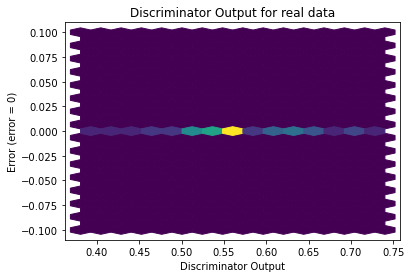

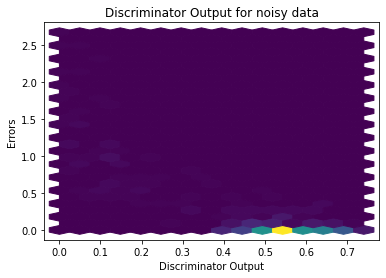

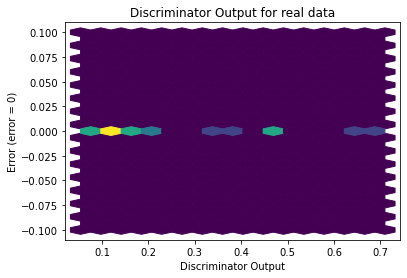

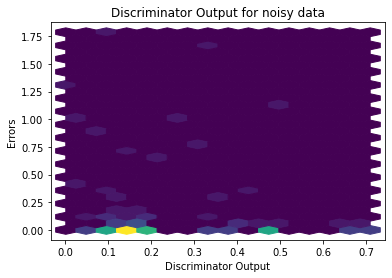

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)